In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import importlib
from pathlib import Path

MY_SRC = '../src/'
if MY_SRC not in sys.path:
    sys.path.append(MY_SRC)

import text_model
import data

In [3]:
importlib.reload(data)
features = {'tokens'}
DATA_DIR = Path('../data/tfrecord')
TRAIN_DATA_PATH = DATA_DIR / 'all_training_data.tfrecord'
VALIDATION_DATA_PATH = DATA_DIR / 'all_validation_data.tfrecord'
TEST_DATA_PATH = DATA_DIR / 'all_testing_data.tfrecord'

with tf.Session() as sess:
    training_data = data.preload_dataset(str(TRAIN_DATA_PATH), sess, features=features)
    validation_data = data.preload_dataset(str(VALIDATION_DATA_PATH), sess, features=features)

Cycle of Life
[0. 0. 1. 0.]


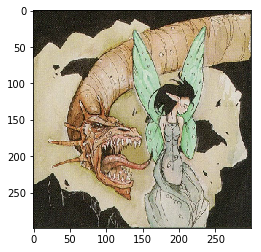

In [3]:
# Sanity check on the data

iterator = training_data.make_one_shot_iterator()
with tf.Session() as sess:
    batch = sess.run(iterator.get_next())

print("".join(chr(t) for t in batch[0]['tokens'][0] if t))
print(batch[1][0])
plt.imshow(batch[0]['image'][0])

In [9]:
training_names = data.extract_card_names_from_dataset(data.make_dataset(str(TRAIN_DATA_PATH), features=features), sess)
validation_names = data.extract_card_names_from_dataset(data.make_dataset(str(VALIDATION_DATA_PATH), features=features), sess)
test_names = data.extract_card_names_from_dataset(all_test_data, sess)

In [10]:
assert len(set(training_names)) == len(training_names)
assert len(set(validation_names)) == len(validation_names)
assert len(set(test_names)) == len(test_names)
assert len(set(training_names).union(set(validation_names))) == len(set(training_names)) + len(set(validation_names))
assert len(set(training_names).union(set(test_names))) == len(set(training_names)) + len(set(test_names))

In [33]:
legacy_names = data.extract_card_names_from_dataset(legacy_test_data, sess)
modern_names = data.extract_card_names_from_dataset(modern_test_data, sess)
all_names = data.extract_card_names_from_dataset(all_test_data, sess)

In [34]:
assert len(set(legacy_names)) == len(legacy_names)
assert len(set(legacy_names).union(set(modern_names))) == len(set(legacy_names)) + len(set(modern_names))

In [38]:
importlib.reload(text_model)

config = text_model.Config(lstm_layers=1,
                           lstm_size=256,
                           embedding_size=300,
                           attention_num_heads=3,
                           attention_head_size=64,
                           use_pretrained_embeddings=True,
                           # embedding_regularization_coef=1e-4,
                           # dense_regularization_coef=1e-4,
                           feature_params={'vocab_size': 255},)
model = text_model.Model(config)
model.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=5.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(x=training_data[0]['tokens'],
          y=training_data[1],
          validation_data=(validation_data[0]['tokens'], validation_data[1]),
          epochs=10)

Train on 14217 samples, validate on 1753 samples
Epoch 1/10


   32/14217 [..............................] - ETA: 22:25 - loss: 1.3523 - acc: 0.2500

   64/14217 [..............................] - ETA: 12:09 - loss: 1.2291 - acc: 0.4688

   96/14217 [..............................] - ETA: 8:44 - loss: 1.2572 - acc: 0.4792 

  128/14217 [..............................] - ETA: 7:07 - loss: 1.2698 - acc: 0.4609

  160/14217 [..............................] - ETA: 6:08 - loss: 1.1679 - acc: 0.5312

  192/14217 [..............................] - ETA: 5:26 - loss: 1.1391 - acc: 0.5469

  224/14217 [..............................] - ETA: 4:55 - loss: 1.1372 - acc: 0.5580

  256/14217 [..............................] - ETA: 4:32 - loss: 1.1588 - acc: 0.5430

  288/14217 [..............................] - ETA: 4:15 - loss: 1.1789 - acc: 0.5382

  320/14217 [..............................] - ETA: 4:01 - loss: 1.2124 - acc: 0.5219

  352/14217 [..............................] - ETA: 3:49 - loss: 1.2084 - acc: 0.5284

  384/14217 [..............................] - ETA: 3:39 - loss: 1.2001 - acc: 0.5365

  416/14217 [..............................] - ETA: 3:31 - loss: 1.2051 - acc: 0.5312

  448/14217 [..............................] - ETA: 3:23 - loss: 1.2083 - acc: 0.5290

  480/14217 [>.............................] - ETA: 3:18 - loss: 1.2059 - acc: 0.5312

  512/14217 [>.............................] - ETA: 3:12 - loss: 1.2095 - acc: 0.5254

  544/14217 [>.............................] - ETA: 3:07 - loss: 1.2068 - acc: 0.5257

  576/14217 [>.............................] - ETA: 3:02 - loss: 1.1999 - acc: 0.5330

  608/14217 [>.............................] - ETA: 2:58 - loss: 1.1960 - acc: 0.5362

  640/14217 [>.............................] - ETA: 2:55 - loss: 1.1994 - acc: 0.5344

  672/14217 [>.............................] - ETA: 2:52 - loss: 1.1952 - acc: 0.5357

  704/14217 [>.............................] - ETA: 2:49 - loss: 1.2018 - acc: 0.5298

  736/14217 [>.............................] - ETA: 2:46 - loss: 1.1943 - acc: 0.5340

  768/14217 [>.............................] - ETA: 2:43 - loss: 1.1928 - acc: 0.5365

  800/14217 [>.............................] - ETA: 2:42 - loss: 1.1926 - acc: 0.5363

  832/14217 [>.............................] - ETA: 2:40 - loss: 1.1824 - acc: 0.5421

  864/14217 [>.............................] - ETA: 2:38 - loss: 1.1792 - acc: 0.5428

  896/14217 [>.............................] - ETA: 2:36 - loss: 1.1798 - acc: 0.5435

  928/14217 [>.............................] - ETA: 2:34 - loss: 1.1857 - acc: 0.5388

  960/14217 [=>............................] - ETA: 2:32 - loss: 1.1844 - acc: 0.5385

  992/14217 [=>............................] - ETA: 2:31 - loss: 1.1833 - acc: 0.5373

 1024/14217 [=>............................] - ETA: 2:29 - loss: 1.1755 - acc: 0.5420

 1056/14217 [=>............................] - ETA: 2:27 - loss: 1.1724 - acc: 0.5436

 1088/14217 [=>............................] - ETA: 2:26 - loss: 1.1726 - acc: 0.5423

 1120/14217 [=>............................] - ETA: 2:24 - loss: 1.1732 - acc: 0.5429

 1152/14217 [=>............................] - ETA: 2:23 - loss: 1.1685 - acc: 0.5408

 1184/14217 [=>............................] - ETA: 2:23 - loss: 1.1760 - acc: 0.5372

 1216/14217 [=>............................] - ETA: 2:21 - loss: 1.1763 - acc: 0.5362

 1248/14217 [=>............................] - ETA: 2:20 - loss: 1.1728 - acc: 0.5377

 1280/14217 [=>............................] - ETA: 2:19 - loss: 1.1722 - acc: 0.5375

 1312/14217 [=>............................] - ETA: 2:18 - loss: 1.1723 - acc: 0.5389

 1344/14217 [=>............................] - ETA: 2:17 - loss: 1.1680 - acc: 0.5402

 1376/14217 [=>............................] - ETA: 2:16 - loss: 1.1641 - acc: 0.5422

 1408/14217 [=>............................] - ETA: 2:15 - loss: 1.1632 - acc: 0.5419

 1440/14217 [==>...........................] - ETA: 2:14 - loss: 1.1642 - acc: 0.5396

 1472/14217 [==>...........................] - ETA: 2:13 - loss: 1.1625 - acc: 0.5408

 1504/14217 [==>...........................] - ETA: 2:13 - loss: 1.1637 - acc: 0.5392

 1536/14217 [==>...........................] - ETA: 2:12 - loss: 1.1628 - acc: 0.5404

 1568/14217 [==>...........................] - ETA: 2:11 - loss: 1.1634 - acc: 0.5408

 1600/14217 [==>...........................] - ETA: 2:10 - loss: 1.1681 - acc: 0.5381

 1632/14217 [==>...........................] - ETA: 2:10 - loss: 1.1673 - acc: 0.5374

 1664/14217 [==>...........................] - ETA: 2:09 - loss: 1.1690 - acc: 0.5373

 1696/14217 [==>...........................] - ETA: 2:08 - loss: 1.1700 - acc: 0.5360

 1728/14217 [==>...........................] - ETA: 2:07 - loss: 1.1691 - acc: 0.5353

 1760/14217 [==>...........................] - ETA: 2:07 - loss: 1.1644 - acc: 0.5386

 1792/14217 [==>...........................] - ETA: 2:06 - loss: 1.1655 - acc: 0.5374

 1824/14217 [==>...........................] - ETA: 2:05 - loss: 1.1619 - acc: 0.5400

 1856/14217 [==>...........................] - ETA: 2:05 - loss: 1.1604 - acc: 0.5420

 1888/14217 [==>...........................] - ETA: 2:04 - loss: 1.1619 - acc: 0.5413

 1920/14217 [===>..........................] - ETA: 2:04 - loss: 1.1616 - acc: 0.5406

 1952/14217 [===>..........................] - ETA: 2:03 - loss: 1.1605 - acc: 0.5420

 1984/14217 [===>..........................] - ETA: 2:02 - loss: 1.1597 - acc: 0.5418

 2016/14217 [===>..........................] - ETA: 2:02 - loss: 1.1580 - acc: 0.5432

 2048/14217 [===>..........................] - ETA: 2:01 - loss: 1.1577 - acc: 0.5435

 2080/14217 [===>..........................] - ETA: 2:01 - loss: 1.1569 - acc: 0.5442

 2112/14217 [===>..........................] - ETA: 2:00 - loss: 1.1543 - acc: 0.5459

 2144/14217 [===>..........................] - ETA: 1:59 - loss: 1.1562 - acc: 0.5448

 2176/14217 [===>..........................] - ETA: 1:59 - loss: 1.1580 - acc: 0.5441

 2208/14217 [===>..........................] - ETA: 1:58 - loss: 1.1587 - acc: 0.5444

 2240/14217 [===>..........................] - ETA: 1:58 - loss: 1.1591 - acc: 0.5442

 2272/14217 [===>..........................] - ETA: 1:57 - loss: 1.1588 - acc: 0.5440

 2304/14217 [===>..........................] - ETA: 1:57 - loss: 1.1579 - acc: 0.5443

 2336/14217 [===>..........................] - ETA: 1:57 - loss: 1.1567 - acc: 0.5458

 2368/14217 [===>..........................] - ETA: 1:56 - loss: 1.1577 - acc: 0.5452

 2400/14217 [====>.........................] - ETA: 1:56 - loss: 1.1552 - acc: 0.5475

 2432/14217 [====>.........................] - ETA: 1:55 - loss: 1.1557 - acc: 0.5469

 2464/14217 [====>.........................] - ETA: 1:55 - loss: 1.1568 - acc: 0.5455

 2496/14217 [====>.........................] - ETA: 1:54 - loss: 1.1564 - acc: 0.5453

 2528/14217 [====>.........................] - ETA: 1:54 - loss: 1.1550 - acc: 0.5459

 2560/14217 [====>.........................] - ETA: 1:53 - loss: 1.1547 - acc: 0.5461

 2592/14217 [====>.........................] - ETA: 1:53 - loss: 1.1564 - acc: 0.5451

 2624/14217 [====>.........................] - ETA: 1:52 - loss: 1.1560 - acc: 0.5446

 2656/14217 [====>.........................] - ETA: 1:52 - loss: 1.1548 - acc: 0.5452

 2688/14217 [====>.........................] - ETA: 1:51 - loss: 1.1547 - acc: 0.5443

 2720/14217 [====>.........................] - ETA: 1:51 - loss: 1.1543 - acc: 0.5445

 2752/14217 [====>.........................] - ETA: 1:50 - loss: 1.1542 - acc: 0.5447

 2784/14217 [====>.........................] - ETA: 1:50 - loss: 1.1536 - acc: 0.5449

 2816/14217 [====>.........................] - ETA: 1:49 - loss: 1.1528 - acc: 0.5455

 2848/14217 [=====>........................] - ETA: 1:49 - loss: 1.1527 - acc: 0.5460

 2880/14217 [=====>........................] - ETA: 1:48 - loss: 1.1510 - acc: 0.5469

 2912/14217 [=====>........................] - ETA: 1:48 - loss: 1.1499 - acc: 0.5477

 2944/14217 [=====>........................] - ETA: 1:48 - loss: 1.1472 - acc: 0.5493

 2976/14217 [=====>........................] - ETA: 1:47 - loss: 1.1449 - acc: 0.5504

 3008/14217 [=====>........................] - ETA: 1:47 - loss: 1.1434 - acc: 0.5509

 3040/14217 [=====>........................] - ETA: 1:46 - loss: 1.1443 - acc: 0.5507

 3072/14217 [=====>........................] - ETA: 1:46 - loss: 1.1479 - acc: 0.5492

 3104/14217 [=====>........................] - ETA: 1:46 - loss: 1.1465 - acc: 0.5499

 3136/14217 [=====>........................] - ETA: 1:45 - loss: 1.1448 - acc: 0.5501

 3168/14217 [=====>........................] - ETA: 1:45 - loss: 1.1433 - acc: 0.5511

 3200/14217 [=====>........................] - ETA: 1:44 - loss: 1.1427 - acc: 0.5506

 3232/14217 [=====>........................] - ETA: 1:44 - loss: 1.1420 - acc: 0.5507

 3264/14217 [=====>........................] - ETA: 1:43 - loss: 1.1417 - acc: 0.5506

 3296/14217 [=====>........................] - ETA: 1:43 - loss: 1.1402 - acc: 0.5510

 3328/14217 [======>.......................] - ETA: 1:43 - loss: 1.1401 - acc: 0.5520

 3360/14217 [======>.......................] - ETA: 1:42 - loss: 1.1408 - acc: 0.5509

 3392/14217 [======>.......................] - ETA: 1:42 - loss: 1.1404 - acc: 0.5501

 3424/14217 [======>.......................] - ETA: 1:42 - loss: 1.1389 - acc: 0.5499

 3456/14217 [======>.......................] - ETA: 1:41 - loss: 1.1378 - acc: 0.5503

 3488/14217 [======>.......................] - ETA: 1:41 - loss: 1.1385 - acc: 0.5502

 3520/14217 [======>.......................] - ETA: 1:40 - loss: 1.1382 - acc: 0.5506

 3552/14217 [======>.......................] - ETA: 1:40 - loss: 1.1385 - acc: 0.5507

 3584/14217 [======>.......................] - ETA: 1:39 - loss: 1.1366 - acc: 0.5519

 3616/14217 [======>.......................] - ETA: 1:39 - loss: 1.1385 - acc: 0.5509

 3648/14217 [======>.......................] - ETA: 1:39 - loss: 1.1382 - acc: 0.5513

 3680/14217 [======>.......................] - ETA: 1:38 - loss: 1.1384 - acc: 0.5505

 3712/14217 [======>.......................] - ETA: 1:38 - loss: 1.1390 - acc: 0.5504

 3744/14217 [======>.......................] - ETA: 1:37 - loss: 1.1387 - acc: 0.5507

 3776/14217 [======>.......................] - ETA: 1:37 - loss: 1.1381 - acc: 0.5503

 3808/14217 [=======>......................] - ETA: 1:37 - loss: 1.1396 - acc: 0.5496

 3840/14217 [=======>......................] - ETA: 1:37 - loss: 1.1391 - acc: 0.5490

 3872/14217 [=======>......................] - ETA: 1:36 - loss: 1.1390 - acc: 0.5498

 3904/14217 [=======>......................] - ETA: 1:36 - loss: 1.1396 - acc: 0.5492

 3936/14217 [=======>......................] - ETA: 1:36 - loss: 1.1392 - acc: 0.5493

 3968/14217 [=======>......................] - ETA: 1:35 - loss: 1.1382 - acc: 0.5496

 4000/14217 [=======>......................] - ETA: 1:35 - loss: 1.1369 - acc: 0.5500

 4032/14217 [=======>......................] - ETA: 1:35 - loss: 1.1346 - acc: 0.5513

 4064/14217 [=======>......................] - ETA: 1:34 - loss: 1.1354 - acc: 0.5507

 4096/14217 [=======>......................] - ETA: 1:34 - loss: 1.1362 - acc: 0.5505

 4128/14217 [=======>......................] - ETA: 1:34 - loss: 1.1347 - acc: 0.5516

 4160/14217 [=======>......................] - ETA: 1:34 - loss: 1.1343 - acc: 0.5514

 4192/14217 [=======>......................] - ETA: 1:33 - loss: 1.1361 - acc: 0.5513

 4224/14217 [=======>......................] - ETA: 1:33 - loss: 1.1367 - acc: 0.5509

 4256/14217 [=======>......................] - ETA: 1:33 - loss: 1.1371 - acc: 0.5510

 4288/14217 [========>.....................] - ETA: 1:32 - loss: 1.1368 - acc: 0.5508

 4320/14217 [========>.....................] - ETA: 1:32 - loss: 1.1380 - acc: 0.5509

 4352/14217 [========>.....................] - ETA: 1:32 - loss: 1.1387 - acc: 0.5503

 4384/14217 [========>.....................] - ETA: 1:31 - loss: 1.1404 - acc: 0.5490

 4416/14217 [========>.....................] - ETA: 1:31 - loss: 1.1409 - acc: 0.5487

 4448/14217 [========>.....................] - ETA: 1:31 - loss: 1.1399 - acc: 0.5495

 4480/14217 [========>.....................] - ETA: 1:30 - loss: 1.1397 - acc: 0.5491

 4512/14217 [========>.....................] - ETA: 1:30 - loss: 1.1397 - acc: 0.5492

 4544/14217 [========>.....................] - ETA: 1:30 - loss: 1.1406 - acc: 0.5489

 4576/14217 [========>.....................] - ETA: 1:30 - loss: 1.1410 - acc: 0.5479

 4608/14217 [========>.....................] - ETA: 1:29 - loss: 1.1412 - acc: 0.5482

 4640/14217 [========>.....................] - ETA: 1:29 - loss: 1.1409 - acc: 0.5485

 4672/14217 [========>.....................] - ETA: 1:29 - loss: 1.1410 - acc: 0.5484

 4704/14217 [========>.....................] - ETA: 1:28 - loss: 1.1417 - acc: 0.5483

 4736/14217 [========>.....................] - ETA: 1:28 - loss: 1.1409 - acc: 0.5488

 4768/14217 [=========>....................] - ETA: 1:28 - loss: 1.1407 - acc: 0.5491

 4800/14217 [=========>....................] - ETA: 1:27 - loss: 1.1407 - acc: 0.5492

 4832/14217 [=========>....................] - ETA: 1:27 - loss: 1.1402 - acc: 0.5497

 4864/14217 [=========>....................] - ETA: 1:27 - loss: 1.1413 - acc: 0.5491

 4896/14217 [=========>....................] - ETA: 1:27 - loss: 1.1420 - acc: 0.5486

 4928/14217 [=========>....................] - ETA: 1:26 - loss: 1.1413 - acc: 0.5491

 4960/14217 [=========>....................] - ETA: 1:26 - loss: 1.1408 - acc: 0.5492

 4992/14217 [=========>....................] - ETA: 1:26 - loss: 1.1408 - acc: 0.5493

 5024/14217 [=========>....................] - ETA: 1:25 - loss: 1.1409 - acc: 0.5492

 5056/14217 [=========>....................] - ETA: 1:25 - loss: 1.1418 - acc: 0.5487

 5088/14217 [=========>....................] - ETA: 1:25 - loss: 1.1410 - acc: 0.5495

 5120/14217 [=========>....................] - ETA: 1:25 - loss: 1.1417 - acc: 0.5496

 5152/14217 [=========>....................] - ETA: 1:24 - loss: 1.1419 - acc: 0.5495

 5184/14217 [=========>....................] - ETA: 1:24 - loss: 1.1409 - acc: 0.5505

 5216/14217 [==========>...................] - ETA: 1:24 - loss: 1.1407 - acc: 0.5510

 5248/14217 [==========>...................] - ETA: 1:23 - loss: 1.1407 - acc: 0.5511

 5280/14217 [==========>...................] - ETA: 1:23 - loss: 1.1405 - acc: 0.5513

 5312/14217 [==========>...................] - ETA: 1:23 - loss: 1.1401 - acc: 0.5516

 5344/14217 [==========>...................] - ETA: 1:23 - loss: 1.1405 - acc: 0.5515

 5376/14217 [==========>...................] - ETA: 1:22 - loss: 1.1388 - acc: 0.5525

 5408/14217 [==========>...................] - ETA: 1:22 - loss: 1.1378 - acc: 0.5533

 5440/14217 [==========>...................] - ETA: 1:22 - loss: 1.1377 - acc: 0.5533

 5472/14217 [==========>...................] - ETA: 1:22 - loss: 1.1390 - acc: 0.5526

 5504/14217 [==========>...................] - ETA: 1:22 - loss: 1.1379 - acc: 0.5532

 5536/14217 [==========>...................] - ETA: 1:21 - loss: 1.1378 - acc: 0.5533

 5568/14217 [==========>...................] - ETA: 1:21 - loss: 1.1380 - acc: 0.5530

 5600/14217 [==========>...................] - ETA: 1:21 - loss: 1.1372 - acc: 0.5534

 5632/14217 [==========>...................] - ETA: 1:20 - loss: 1.1360 - acc: 0.5542

 5664/14217 [==========>...................] - ETA: 1:20 - loss: 1.1358 - acc: 0.5538

 5696/14217 [===========>..................] - ETA: 1:20 - loss: 1.1353 - acc: 0.5544

 5728/14217 [===========>..................] - ETA: 1:19 - loss: 1.1347 - acc: 0.5548

 5760/14217 [===========>..................] - ETA: 1:20 - loss: 1.1339 - acc: 0.5554

 5792/14217 [===========>..................] - ETA: 1:19 - loss: 1.1338 - acc: 0.5554

 5824/14217 [===========>..................] - ETA: 1:19 - loss: 1.1340 - acc: 0.5555

 5856/14217 [===========>..................] - ETA: 1:19 - loss: 1.1349 - acc: 0.5548

 5888/14217 [===========>..................] - ETA: 1:18 - loss: 1.1347 - acc: 0.5545

 5920/14217 [===========>..................] - ETA: 1:18 - loss: 1.1338 - acc: 0.5549

 5952/14217 [===========>..................] - ETA: 1:18 - loss: 1.1332 - acc: 0.5553

 5984/14217 [===========>..................] - ETA: 1:17 - loss: 1.1321 - acc: 0.5558

 6016/14217 [===========>..................] - ETA: 1:17 - loss: 1.1298 - acc: 0.5570

 6048/14217 [===========>..................] - ETA: 1:17 - loss: 1.1297 - acc: 0.5569

 6080/14217 [===========>..................] - ETA: 1:16 - loss: 1.1320 - acc: 0.5559

 6112/14217 [===========>..................] - ETA: 1:16 - loss: 1.1318 - acc: 0.5558

 6144/14217 [===========>..................] - ETA: 1:16 - loss: 1.1315 - acc: 0.5560

 6176/14217 [============>.................] - ETA: 1:15 - loss: 1.1315 - acc: 0.5560

 6208/14217 [============>.................] - ETA: 1:15 - loss: 1.1309 - acc: 0.5559

 6240/14217 [============>.................] - ETA: 1:15 - loss: 1.1319 - acc: 0.5554

 6272/14217 [============>.................] - ETA: 1:14 - loss: 1.1313 - acc: 0.5560

 6304/14217 [============>.................] - ETA: 1:14 - loss: 1.1321 - acc: 0.5554

 6336/14217 [============>.................] - ETA: 1:14 - loss: 1.1313 - acc: 0.5556

 6368/14217 [============>.................] - ETA: 1:13 - loss: 1.1314 - acc: 0.5553

 6400/14217 [============>.................] - ETA: 1:13 - loss: 1.1314 - acc: 0.5552

 6432/14217 [============>.................] - ETA: 1:13 - loss: 1.1304 - acc: 0.5561

 6464/14217 [============>.................] - ETA: 1:12 - loss: 1.1301 - acc: 0.5568

 6496/14217 [============>.................] - ETA: 1:12 - loss: 1.1299 - acc: 0.5568

 6528/14217 [============>.................] - ETA: 1:12 - loss: 1.1306 - acc: 0.5567

 6560/14217 [============>.................] - ETA: 1:12 - loss: 1.1300 - acc: 0.5572

 6592/14217 [============>.................] - ETA: 1:11 - loss: 1.1310 - acc: 0.5567

 6624/14217 [============>.................] - ETA: 1:11 - loss: 1.1302 - acc: 0.5572

 6656/14217 [=============>................] - ETA: 1:11 - loss: 1.1295 - acc: 0.5575

 6688/14217 [=============>................] - ETA: 1:10 - loss: 1.1285 - acc: 0.5579

 6720/14217 [=============>................] - ETA: 1:10 - loss: 1.1280 - acc: 0.5585

 6752/14217 [=============>................] - ETA: 1:10 - loss: 1.1293 - acc: 0.5576

 6784/14217 [=============>................] - ETA: 1:10 - loss: 1.1289 - acc: 0.5581

 6816/14217 [=============>................] - ETA: 1:10 - loss: 1.1290 - acc: 0.5582

 6848/14217 [=============>................] - ETA: 1:09 - loss: 1.1287 - acc: 0.5584

 6880/14217 [=============>................] - ETA: 1:09 - loss: 1.1282 - acc: 0.5587

 6912/14217 [=============>................] - ETA: 1:09 - loss: 1.1283 - acc: 0.5589

 6944/14217 [=============>................] - ETA: 1:09 - loss: 1.1276 - acc: 0.5592

 6976/14217 [=============>................] - ETA: 1:09 - loss: 1.1275 - acc: 0.5591

 7008/14217 [=============>................] - ETA: 1:08 - loss: 1.1273 - acc: 0.5591

 7040/14217 [=============>................] - ETA: 1:08 - loss: 1.1267 - acc: 0.5592

 7072/14217 [=============>................] - ETA: 1:08 - loss: 1.1272 - acc: 0.5588

 7104/14217 [=============>................] - ETA: 1:08 - loss: 1.1260 - acc: 0.5597

 7136/14217 [==============>...............] - ETA: 1:09 - loss: 1.1256 - acc: 0.5596

 7168/14217 [==============>...............] - ETA: 1:09 - loss: 1.1253 - acc: 0.5597

 7200/14217 [==============>...............] - ETA: 1:08 - loss: 1.1248 - acc: 0.5599

 7232/14217 [==============>...............] - ETA: 1:08 - loss: 1.1246 - acc: 0.5600

 7264/14217 [==============>...............] - ETA: 1:08 - loss: 1.1243 - acc: 0.5602

 7296/14217 [==============>...............] - ETA: 1:08 - loss: 1.1234 - acc: 0.5606

 7328/14217 [==============>...............] - ETA: 1:07 - loss: 1.1233 - acc: 0.5611

 7360/14217 [==============>...............] - ETA: 1:07 - loss: 1.1232 - acc: 0.5613

 7392/14217 [==============>...............] - ETA: 1:07 - loss: 1.1235 - acc: 0.5617

 7424/14217 [==============>...............] - ETA: 1:07 - loss: 1.1236 - acc: 0.5614

 7456/14217 [==============>...............] - ETA: 1:06 - loss: 1.1225 - acc: 0.5620

 7488/14217 [==============>...............] - ETA: 1:06 - loss: 1.1227 - acc: 0.5620

 7520/14217 [==============>...............] - ETA: 1:06 - loss: 1.1225 - acc: 0.5621

 7552/14217 [==============>...............] - ETA: 1:05 - loss: 1.1225 - acc: 0.5622

 7584/14217 [===============>..............] - ETA: 1:05 - loss: 1.1229 - acc: 0.5622

 7616/14217 [===============>..............] - ETA: 1:05 - loss: 1.1224 - acc: 0.5626

 7648/14217 [===============>..............] - ETA: 1:05 - loss: 1.1225 - acc: 0.5630

 7680/14217 [===============>..............] - ETA: 1:05 - loss: 1.1222 - acc: 0.5635

 7712/14217 [===============>..............] - ETA: 1:05 - loss: 1.1219 - acc: 0.5638

 7744/14217 [===============>..............] - ETA: 1:06 - loss: 1.1223 - acc: 0.5635

 7776/14217 [===============>..............] - ETA: 1:06 - loss: 1.1230 - acc: 0.5633

 7808/14217 [===============>..............] - ETA: 1:06 - loss: 1.1220 - acc: 0.5639

 7840/14217 [===============>..............] - ETA: 1:06 - loss: 1.1208 - acc: 0.5647

 7872/14217 [===============>..............] - ETA: 1:06 - loss: 1.1212 - acc: 0.5645

 7904/14217 [===============>..............] - ETA: 1:05 - loss: 1.1215 - acc: 0.5643

 7936/14217 [===============>..............] - ETA: 1:05 - loss: 1.1214 - acc: 0.5644

 7968/14217 [===============>..............] - ETA: 1:05 - loss: 1.1211 - acc: 0.5646

 8000/14217 [===============>..............] - ETA: 1:04 - loss: 1.1209 - acc: 0.5647

 8032/14217 [===============>..............] - ETA: 1:04 - loss: 1.1214 - acc: 0.5642

 8064/14217 [================>.............] - ETA: 1:04 - loss: 1.1213 - acc: 0.5641

 8096/14217 [================>.............] - ETA: 1:04 - loss: 1.1211 - acc: 0.5641

 8128/14217 [================>.............] - ETA: 1:03 - loss: 1.1216 - acc: 0.5637

 8160/14217 [================>.............] - ETA: 1:03 - loss: 1.1218 - acc: 0.5631

 8192/14217 [================>.............] - ETA: 1:03 - loss: 1.1216 - acc: 0.5634

 8224/14217 [================>.............] - ETA: 1:03 - loss: 1.1225 - acc: 0.5627

 8256/14217 [================>.............] - ETA: 1:02 - loss: 1.1232 - acc: 0.5625

 8288/14217 [================>.............] - ETA: 1:02 - loss: 1.1234 - acc: 0.5621

 8320/14217 [================>.............] - ETA: 1:02 - loss: 1.1240 - acc: 0.5617

 8352/14217 [================>.............] - ETA: 1:01 - loss: 1.1244 - acc: 0.5619

 8384/14217 [================>.............] - ETA: 1:01 - loss: 1.1248 - acc: 0.5615

 8416/14217 [================>.............] - ETA: 1:01 - loss: 1.1248 - acc: 0.5619

 8448/14217 [================>.............] - ETA: 1:00 - loss: 1.1243 - acc: 0.5625

 8480/14217 [================>.............] - ETA: 1:00 - loss: 1.1238 - acc: 0.5627

 8512/14217 [================>.............] - ETA: 59s - loss: 1.1237 - acc: 0.5627 

 8544/14217 [=================>............] - ETA: 59s - loss: 1.1237 - acc: 0.5629

 8576/14217 [=================>............] - ETA: 59s - loss: 1.1238 - acc: 0.5628

 8608/14217 [=================>............] - ETA: 58s - loss: 1.1226 - acc: 0.5635

 8640/14217 [=================>............] - ETA: 58s - loss: 1.1234 - acc: 0.5628

 8672/14217 [=================>............] - ETA: 58s - loss: 1.1237 - acc: 0.5628

 8704/14217 [=================>............] - ETA: 57s - loss: 1.1240 - acc: 0.5626

 8736/14217 [=================>............] - ETA: 57s - loss: 1.1250 - acc: 0.5624

 8768/14217 [=================>............] - ETA: 57s - loss: 1.1252 - acc: 0.5625

 8800/14217 [=================>............] - ETA: 56s - loss: 1.1261 - acc: 0.5619

 8832/14217 [=================>............] - ETA: 56s - loss: 1.1261 - acc: 0.5619

 8864/14217 [=================>............] - ETA: 55s - loss: 1.1253 - acc: 0.5624

 8896/14217 [=================>............] - ETA: 55s - loss: 1.1252 - acc: 0.5626

 8928/14217 [=================>............] - ETA: 55s - loss: 1.1253 - acc: 0.5626

 8960/14217 [=================>............] - ETA: 54s - loss: 1.1260 - acc: 0.5619

 8992/14217 [=================>............] - ETA: 54s - loss: 1.1255 - acc: 0.5625

 9024/14217 [==================>...........] - ETA: 54s - loss: 1.1255 - acc: 0.5627

 9056/14217 [==================>...........] - ETA: 53s - loss: 1.1258 - acc: 0.5623

 9088/14217 [==================>...........] - ETA: 53s - loss: 1.1258 - acc: 0.5624

 9120/14217 [==================>...........] - ETA: 53s - loss: 1.1258 - acc: 0.5624

 9152/14217 [==================>...........] - ETA: 52s - loss: 1.1258 - acc: 0.5624

 9184/14217 [==================>...........] - ETA: 52s - loss: 1.1255 - acc: 0.5628

 9216/14217 [==================>...........] - ETA: 51s - loss: 1.1252 - acc: 0.5630

 9248/14217 [==================>...........] - ETA: 51s - loss: 1.1248 - acc: 0.5630

 9280/14217 [==================>...........] - ETA: 51s - loss: 1.1239 - acc: 0.5636

 9312/14217 [==================>...........] - ETA: 50s - loss: 1.1235 - acc: 0.5637

 9344/14217 [==================>...........] - ETA: 50s - loss: 1.1230 - acc: 0.5640

 9376/14217 [==================>...........] - ETA: 50s - loss: 1.1224 - acc: 0.5642

 9408/14217 [==================>...........] - ETA: 49s - loss: 1.1228 - acc: 0.5638

 9440/14217 [==================>...........] - ETA: 49s - loss: 1.1224 - acc: 0.5642

 9472/14217 [==================>...........] - ETA: 49s - loss: 1.1229 - acc: 0.5641

 9504/14217 [===================>..........] - ETA: 48s - loss: 1.1235 - acc: 0.5639

 9536/14217 [===================>..........] - ETA: 48s - loss: 1.1234 - acc: 0.5640

 9568/14217 [===================>..........] - ETA: 48s - loss: 1.1230 - acc: 0.5642

 9600/14217 [===================>..........] - ETA: 47s - loss: 1.1225 - acc: 0.5647

 9632/14217 [===================>..........] - ETA: 47s - loss: 1.1217 - acc: 0.5651

 9664/14217 [===================>..........] - ETA: 47s - loss: 1.1213 - acc: 0.5656

 9696/14217 [===================>..........] - ETA: 46s - loss: 1.1211 - acc: 0.5656

 9728/14217 [===================>..........] - ETA: 46s - loss: 1.1204 - acc: 0.5660

 9760/14217 [===================>..........] - ETA: 45s - loss: 1.1206 - acc: 0.5658

 9792/14217 [===================>..........] - ETA: 45s - loss: 1.1215 - acc: 0.5655

 9824/14217 [===================>..........] - ETA: 45s - loss: 1.1212 - acc: 0.5656

 9856/14217 [===================>..........] - ETA: 44s - loss: 1.1206 - acc: 0.5658

 9888/14217 [===================>..........] - ETA: 44s - loss: 1.1212 - acc: 0.5654

 9920/14217 [===================>..........] - ETA: 44s - loss: 1.1215 - acc: 0.5654

 9952/14217 [====================>.........] - ETA: 43s - loss: 1.1216 - acc: 0.5652

 9984/14217 [====================>.........] - ETA: 43s - loss: 1.1218 - acc: 0.5649

10016/14217 [====================>.........] - ETA: 43s - loss: 1.1213 - acc: 0.5653

10048/14217 [====================>.........] - ETA: 42s - loss: 1.1218 - acc: 0.5651

10080/14217 [====================>.........] - ETA: 42s - loss: 1.1218 - acc: 0.5648

10112/14217 [====================>.........] - ETA: 42s - loss: 1.1221 - acc: 0.5645

10144/14217 [====================>.........] - ETA: 41s - loss: 1.1225 - acc: 0.5642

10176/14217 [====================>.........] - ETA: 41s - loss: 1.1226 - acc: 0.5643

10208/14217 [====================>.........] - ETA: 41s - loss: 1.1229 - acc: 0.5642

10240/14217 [====================>.........] - ETA: 40s - loss: 1.1227 - acc: 0.5642

10272/14217 [====================>.........] - ETA: 40s - loss: 1.1227 - acc: 0.5643

10304/14217 [====================>.........] - ETA: 40s - loss: 1.1227 - acc: 0.5644

10336/14217 [====================>.........] - ETA: 39s - loss: 1.1239 - acc: 0.5636

10368/14217 [====================>.........] - ETA: 39s - loss: 1.1237 - acc: 0.5638

10400/14217 [====================>.........] - ETA: 38s - loss: 1.1235 - acc: 0.5640

10432/14217 [=====================>........] - ETA: 38s - loss: 1.1237 - acc: 0.5639

10464/14217 [=====================>........] - ETA: 38s - loss: 1.1234 - acc: 0.5642

10496/14217 [=====================>........] - ETA: 37s - loss: 1.1232 - acc: 0.5644

10528/14217 [=====================>........] - ETA: 37s - loss: 1.1235 - acc: 0.5644

10560/14217 [=====================>........] - ETA: 37s - loss: 1.1235 - acc: 0.5643

10592/14217 [=====================>........] - ETA: 36s - loss: 1.1236 - acc: 0.5643

10624/14217 [=====================>........] - ETA: 36s - loss: 1.1236 - acc: 0.5644

10656/14217 [=====================>........] - ETA: 36s - loss: 1.1233 - acc: 0.5647

10688/14217 [=====================>........] - ETA: 35s - loss: 1.1229 - acc: 0.5650

10720/14217 [=====================>........] - ETA: 35s - loss: 1.1230 - acc: 0.5649

10752/14217 [=====================>........] - ETA: 35s - loss: 1.1232 - acc: 0.5648

10784/14217 [=====================>........] - ETA: 34s - loss: 1.1228 - acc: 0.5651

10816/14217 [=====================>........] - ETA: 34s - loss: 1.1225 - acc: 0.5652

10848/14217 [=====================>........] - ETA: 34s - loss: 1.1226 - acc: 0.5652

10880/14217 [=====================>........] - ETA: 33s - loss: 1.1227 - acc: 0.5651

10912/14217 [======================>.......] - ETA: 33s - loss: 1.1226 - acc: 0.5652

10944/14217 [======================>.......] - ETA: 33s - loss: 1.1219 - acc: 0.5657

10976/14217 [======================>.......] - ETA: 32s - loss: 1.1217 - acc: 0.5657

11008/14217 [======================>.......] - ETA: 32s - loss: 1.1223 - acc: 0.5655

11040/14217 [======================>.......] - ETA: 32s - loss: 1.1229 - acc: 0.5650

11072/14217 [======================>.......] - ETA: 31s - loss: 1.1226 - acc: 0.5651

11104/14217 [======================>.......] - ETA: 31s - loss: 1.1227 - acc: 0.5651

11136/14217 [======================>.......] - ETA: 31s - loss: 1.1229 - acc: 0.5651

11168/14217 [======================>.......] - ETA: 30s - loss: 1.1220 - acc: 0.5657

11200/14217 [======================>.......] - ETA: 30s - loss: 1.1220 - acc: 0.5659

11232/14217 [======================>.......] - ETA: 30s - loss: 1.1223 - acc: 0.5657

11264/14217 [======================>.......] - ETA: 29s - loss: 1.1222 - acc: 0.5655

11296/14217 [======================>.......] - ETA: 29s - loss: 1.1216 - acc: 0.5659

11328/14217 [======================>.......] - ETA: 29s - loss: 1.1211 - acc: 0.5663

11360/14217 [======================>.......] - ETA: 29s - loss: 1.1212 - acc: 0.5662

11392/14217 [=======================>......] - ETA: 28s - loss: 1.1211 - acc: 0.5662

11424/14217 [=======================>......] - ETA: 28s - loss: 1.1211 - acc: 0.5660

11456/14217 [=======================>......] - ETA: 28s - loss: 1.1205 - acc: 0.5663

11488/14217 [=======================>......] - ETA: 27s - loss: 1.1202 - acc: 0.5664

11520/14217 [=======================>......] - ETA: 27s - loss: 1.1196 - acc: 0.5668

11552/14217 [=======================>......] - ETA: 26s - loss: 1.1200 - acc: 0.5666

11584/14217 [=======================>......] - ETA: 26s - loss: 1.1194 - acc: 0.5669

11616/14217 [=======================>......] - ETA: 26s - loss: 1.1197 - acc: 0.5667

11648/14217 [=======================>......] - ETA: 26s - loss: 1.1194 - acc: 0.5666

11680/14217 [=======================>......] - ETA: 25s - loss: 1.1195 - acc: 0.5664

11712/14217 [=======================>......] - ETA: 25s - loss: 1.1200 - acc: 0.5660

11744/14217 [=======================>......] - ETA: 25s - loss: 1.1201 - acc: 0.5660

11776/14217 [=======================>......] - ETA: 24s - loss: 1.1201 - acc: 0.5658

11808/14217 [=======================>......] - ETA: 24s - loss: 1.1197 - acc: 0.5661

11840/14217 [=======================>......] - ETA: 24s - loss: 1.1199 - acc: 0.5660

11872/14217 [========================>.....] - ETA: 23s - loss: 1.1200 - acc: 0.5661

11904/14217 [========================>.....] - ETA: 23s - loss: 1.1197 - acc: 0.5661

11936/14217 [========================>.....] - ETA: 23s - loss: 1.1193 - acc: 0.5663

11968/14217 [========================>.....] - ETA: 22s - loss: 1.1189 - acc: 0.5665

12000/14217 [========================>.....] - ETA: 22s - loss: 1.1186 - acc: 0.5666

12032/14217 [========================>.....] - ETA: 22s - loss: 1.1182 - acc: 0.5667

12064/14217 [========================>.....] - ETA: 21s - loss: 1.1187 - acc: 0.5666

12096/14217 [========================>.....] - ETA: 21s - loss: 1.1179 - acc: 0.5669

12128/14217 [========================>.....] - ETA: 21s - loss: 1.1177 - acc: 0.5670

12160/14217 [========================>.....] - ETA: 20s - loss: 1.1174 - acc: 0.5670

12192/14217 [========================>.....] - ETA: 20s - loss: 1.1183 - acc: 0.5665

12224/14217 [========================>.....] - ETA: 20s - loss: 1.1184 - acc: 0.5666

12256/14217 [========================>.....] - ETA: 20s - loss: 1.1178 - acc: 0.5667

12288/14217 [========================>.....] - ETA: 19s - loss: 1.1176 - acc: 0.5670

12320/14217 [========================>.....] - ETA: 19s - loss: 1.1176 - acc: 0.5670

12352/14217 [=========================>....] - ETA: 19s - loss: 1.1175 - acc: 0.5672

12384/14217 [=========================>....] - ETA: 18s - loss: 1.1172 - acc: 0.5674

12416/14217 [=========================>....] - ETA: 18s - loss: 1.1175 - acc: 0.5672

12448/14217 [=========================>....] - ETA: 18s - loss: 1.1182 - acc: 0.5668

12480/14217 [=========================>....] - ETA: 17s - loss: 1.1183 - acc: 0.5667

12512/14217 [=========================>....] - ETA: 17s - loss: 1.1184 - acc: 0.5667

12544/14217 [=========================>....] - ETA: 17s - loss: 1.1186 - acc: 0.5668

12576/14217 [=========================>....] - ETA: 16s - loss: 1.1181 - acc: 0.5672

12608/14217 [=========================>....] - ETA: 16s - loss: 1.1178 - acc: 0.5675

12640/14217 [=========================>....] - ETA: 16s - loss: 1.1176 - acc: 0.5676

12672/14217 [=========================>....] - ETA: 15s - loss: 1.1178 - acc: 0.5675

12704/14217 [=========================>....] - ETA: 15s - loss: 1.1181 - acc: 0.5673

12736/14217 [=========================>....] - ETA: 15s - loss: 1.1180 - acc: 0.5673

12768/14217 [=========================>....] - ETA: 14s - loss: 1.1179 - acc: 0.5674

12800/14217 [==========================>...] - ETA: 14s - loss: 1.1176 - acc: 0.5676

12832/14217 [==========================>...] - ETA: 14s - loss: 1.1174 - acc: 0.5677

12864/14217 [==========================>...] - ETA: 13s - loss: 1.1174 - acc: 0.5676

12896/14217 [==========================>...] - ETA: 13s - loss: 1.1169 - acc: 0.5680

12928/14217 [==========================>...] - ETA: 13s - loss: 1.1171 - acc: 0.5678

12960/14217 [==========================>...] - ETA: 12s - loss: 1.1173 - acc: 0.5677

12992/14217 [==========================>...] - ETA: 12s - loss: 1.1172 - acc: 0.5678

13024/14217 [==========================>...] - ETA: 12s - loss: 1.1170 - acc: 0.5680

13056/14217 [==========================>...] - ETA: 11s - loss: 1.1170 - acc: 0.5679

13088/14217 [==========================>...] - ETA: 11s - loss: 1.1166 - acc: 0.5682

13120/14217 [==========================>...] - ETA: 11s - loss: 1.1165 - acc: 0.5684

13152/14217 [==========================>...] - ETA: 10s - loss: 1.1160 - acc: 0.5687

13184/14217 [==========================>...] - ETA: 10s - loss: 1.1158 - acc: 0.5689

13216/14217 [==========================>...] - ETA: 10s - loss: 1.1156 - acc: 0.5691

13248/14217 [==========================>...] - ETA: 9s - loss: 1.1157 - acc: 0.5690 

13280/14217 [===========================>..] - ETA: 9s - loss: 1.1158 - acc: 0.5688

13312/14217 [===========================>..] - ETA: 9s - loss: 1.1151 - acc: 0.5693

13344/14217 [===========================>..] - ETA: 8s - loss: 1.1151 - acc: 0.5692

13376/14217 [===========================>..] - ETA: 8s - loss: 1.1146 - acc: 0.5695

13408/14217 [===========================>..] - ETA: 8s - loss: 1.1146 - acc: 0.5694

13440/14217 [===========================>..] - ETA: 7s - loss: 1.1142 - acc: 0.5696

13472/14217 [===========================>..] - ETA: 7s - loss: 1.1141 - acc: 0.5696

13504/14217 [===========================>..] - ETA: 7s - loss: 1.1137 - acc: 0.5698

13536/14217 [===========================>..] - ETA: 6s - loss: 1.1135 - acc: 0.5698

13568/14217 [===========================>..] - ETA: 6s - loss: 1.1133 - acc: 0.5699

13600/14217 [===========================>..] - ETA: 6s - loss: 1.1136 - acc: 0.5696

13632/14217 [===========================>..] - ETA: 5s - loss: 1.1140 - acc: 0.5694

13664/14217 [===========================>..] - ETA: 5s - loss: 1.1145 - acc: 0.5691

13696/14217 [===========================>..] - ETA: 5s - loss: 1.1143 - acc: 0.5691

13728/14217 [===========================>..] - ETA: 4s - loss: 1.1146 - acc: 0.5689

13760/14217 [============================>.] - ETA: 4s - loss: 1.1150 - acc: 0.5687

13792/14217 [============================>.] - ETA: 4s - loss: 1.1151 - acc: 0.5685

13824/14217 [============================>.] - ETA: 3s - loss: 1.1153 - acc: 0.5684

13856/14217 [============================>.] - ETA: 3s - loss: 1.1155 - acc: 0.5683

13888/14217 [============================>.] - ETA: 3s - loss: 1.1156 - acc: 0.5684

13920/14217 [============================>.] - ETA: 3s - loss: 1.1160 - acc: 0.5681

13952/14217 [============================>.] - ETA: 2s - loss: 1.1161 - acc: 0.5680

13984/14217 [============================>.] - ETA: 2s - loss: 1.1162 - acc: 0.5679

14016/14217 [============================>.] - ETA: 2s - loss: 1.1161 - acc: 0.5679

14048/14217 [============================>.] - ETA: 1s - loss: 1.1159 - acc: 0.5681

14080/14217 [============================>.] - ETA: 1s - loss: 1.1159 - acc: 0.5680

14112/14217 [============================>.] - ETA: 1s - loss: 1.1156 - acc: 0.5682

14144/14217 [============================>.] - ETA: 0s - loss: 1.1162 - acc: 0.5677

14176/14217 [============================>.] - ETA: 0s - loss: 1.1163 - acc: 0.5677

14208/14217 [============================>.] - ETA: 0s - loss: 1.1165 - acc: 0.5676

14217/14217 [==============================] - 148s 10ms/step - loss: 1.1165 - acc: 0.5676 - val_loss: 1.1073 - val_acc: 0.5801


Epoch 2/10


   32/14217 [..............................] - ETA: 2:20 - loss: 0.9406 - acc: 0.6562

   64/14217 [..............................] - ETA: 2:11 - loss: 0.9797 - acc: 0.6250

   96/14217 [..............................] - ETA: 2:10 - loss: 1.0961 - acc: 0.5625

  128/14217 [..............................] - ETA: 2:08 - loss: 1.1119 - acc: 0.5312

  160/14217 [..............................] - ETA: 2:07 - loss: 1.1336 - acc: 0.5312

  192/14217 [..............................] - ETA: 2:09 - loss: 1.1233 - acc: 0.5573

  224/14217 [..............................] - ETA: 2:10 - loss: 1.1102 - acc: 0.5804

  256/14217 [..............................] - ETA: 2:09 - loss: 1.1167 - acc: 0.5742

  288/14217 [..............................] - ETA: 2:08 - loss: 1.1033 - acc: 0.5868

  320/14217 [..............................] - ETA: 2:08 - loss: 1.1065 - acc: 0.5813

  352/14217 [..............................] - ETA: 2:09 - loss: 1.1032 - acc: 0.5881

  384/14217 [..............................] - ETA: 2:09 - loss: 1.0986 - acc: 0.5911

  416/14217 [..............................] - ETA: 2:08 - loss: 1.0773 - acc: 0.6010

  448/14217 [..............................] - ETA: 2:07 - loss: 1.0653 - acc: 0.6071

  480/14217 [>.............................] - ETA: 2:07 - loss: 1.0499 - acc: 0.6146

  512/14217 [>.............................] - ETA: 2:07 - loss: 1.0433 - acc: 0.6152

  544/14217 [>.............................] - ETA: 2:06 - loss: 1.0636 - acc: 0.6048

  576/14217 [>.............................] - ETA: 2:06 - loss: 1.0733 - acc: 0.6007

  608/14217 [>.............................] - ETA: 2:05 - loss: 1.0740 - acc: 0.6020

  640/14217 [>.............................] - ETA: 2:04 - loss: 1.0812 - acc: 0.6000

  672/14217 [>.............................] - ETA: 2:05 - loss: 1.0941 - acc: 0.5923

  704/14217 [>.............................] - ETA: 2:04 - loss: 1.0965 - acc: 0.5895

  736/14217 [>.............................] - ETA: 2:04 - loss: 1.1040 - acc: 0.5842

  768/14217 [>.............................] - ETA: 2:03 - loss: 1.1045 - acc: 0.5820

  800/14217 [>.............................] - ETA: 2:03 - loss: 1.1005 - acc: 0.5850

  832/14217 [>.............................] - ETA: 2:03 - loss: 1.0984 - acc: 0.5865

  864/14217 [>.............................] - ETA: 2:03 - loss: 1.0924 - acc: 0.5938

  896/14217 [>.............................] - ETA: 2:02 - loss: 1.0932 - acc: 0.5926

  928/14217 [>.............................] - ETA: 2:02 - loss: 1.0917 - acc: 0.5948

  960/14217 [=>............................] - ETA: 2:02 - loss: 1.0942 - acc: 0.5927

  992/14217 [=>............................] - ETA: 2:02 - loss: 1.0911 - acc: 0.5927

 1024/14217 [=>............................] - ETA: 2:01 - loss: 1.0910 - acc: 0.5928

 1056/14217 [=>............................] - ETA: 2:02 - loss: 1.0927 - acc: 0.5909

 1088/14217 [=>............................] - ETA: 2:01 - loss: 1.0908 - acc: 0.5910

 1120/14217 [=>............................] - ETA: 2:01 - loss: 1.0851 - acc: 0.5946

 1152/14217 [=>............................] - ETA: 2:01 - loss: 1.0887 - acc: 0.5911

 1184/14217 [=>............................] - ETA: 2:01 - loss: 1.0865 - acc: 0.5929

 1216/14217 [=>............................] - ETA: 2:01 - loss: 1.0864 - acc: 0.5938

 1248/14217 [=>............................] - ETA: 2:00 - loss: 1.0879 - acc: 0.5929

 1280/14217 [=>............................] - ETA: 2:00 - loss: 1.0921 - acc: 0.5906

 1312/14217 [=>............................] - ETA: 2:00 - loss: 1.0887 - acc: 0.5938

 1344/14217 [=>............................] - ETA: 1:59 - loss: 1.0889 - acc: 0.5930

 1376/14217 [=>............................] - ETA: 1:59 - loss: 1.0893 - acc: 0.5938

 1408/14217 [=>............................] - ETA: 1:58 - loss: 1.0881 - acc: 0.5930

 1440/14217 [==>...........................] - ETA: 1:58 - loss: 1.0893 - acc: 0.5944

 1472/14217 [==>...........................] - ETA: 1:57 - loss: 1.0879 - acc: 0.5958

 1504/14217 [==>...........................] - ETA: 1:57 - loss: 1.0857 - acc: 0.5971

 1536/14217 [==>...........................] - ETA: 1:56 - loss: 1.0860 - acc: 0.5964

 1568/14217 [==>...........................] - ETA: 1:56 - loss: 1.0845 - acc: 0.5969

 1600/14217 [==>...........................] - ETA: 1:56 - loss: 1.0807 - acc: 0.5988

 1632/14217 [==>...........................] - ETA: 1:55 - loss: 1.0754 - acc: 0.6011

 1664/14217 [==>...........................] - ETA: 1:55 - loss: 1.0784 - acc: 0.5992

 1696/14217 [==>...........................] - ETA: 1:55 - loss: 1.0787 - acc: 0.5985

 1728/14217 [==>...........................] - ETA: 1:54 - loss: 1.0766 - acc: 0.5995

 1760/14217 [==>...........................] - ETA: 1:54 - loss: 1.0773 - acc: 0.5994

 1792/14217 [==>...........................] - ETA: 1:53 - loss: 1.0770 - acc: 0.5993

 1824/14217 [==>...........................] - ETA: 1:53 - loss: 1.0773 - acc: 0.5998

 1856/14217 [==>...........................] - ETA: 1:53 - loss: 1.0819 - acc: 0.5975

 1888/14217 [==>...........................] - ETA: 1:53 - loss: 1.0819 - acc: 0.5964

 1920/14217 [===>..........................] - ETA: 1:52 - loss: 1.0822 - acc: 0.5969

 1952/14217 [===>..........................] - ETA: 1:53 - loss: 1.0821 - acc: 0.5963

 1984/14217 [===>..........................] - ETA: 1:53 - loss: 1.0840 - acc: 0.5938

 2016/14217 [===>..........................] - ETA: 1:52 - loss: 1.0830 - acc: 0.5933

 2048/14217 [===>..........................] - ETA: 1:52 - loss: 1.0807 - acc: 0.5952

 2080/14217 [===>..........................] - ETA: 1:51 - loss: 1.0817 - acc: 0.5938

 2112/14217 [===>..........................] - ETA: 1:51 - loss: 1.0822 - acc: 0.5938

 2144/14217 [===>..........................] - ETA: 1:51 - loss: 1.0852 - acc: 0.5928

 2176/14217 [===>..........................] - ETA: 1:50 - loss: 1.0883 - acc: 0.5915

 2208/14217 [===>..........................] - ETA: 1:50 - loss: 1.0888 - acc: 0.5924

 2240/14217 [===>..........................] - ETA: 1:49 - loss: 1.0872 - acc: 0.5924

 2272/14217 [===>..........................] - ETA: 1:49 - loss: 1.0874 - acc: 0.5920

 2304/14217 [===>..........................] - ETA: 1:49 - loss: 1.0863 - acc: 0.5924

 2336/14217 [===>..........................] - ETA: 1:48 - loss: 1.0895 - acc: 0.5908

 2368/14217 [===>..........................] - ETA: 1:48 - loss: 1.0906 - acc: 0.5904

 2400/14217 [====>.........................] - ETA: 1:47 - loss: 1.0907 - acc: 0.5900

 2432/14217 [====>.........................] - ETA: 1:47 - loss: 1.0920 - acc: 0.5884

 2464/14217 [====>.........................] - ETA: 1:47 - loss: 1.0939 - acc: 0.5873

 2496/14217 [====>.........................] - ETA: 1:47 - loss: 1.0949 - acc: 0.5861

 2528/14217 [====>.........................] - ETA: 1:46 - loss: 1.0954 - acc: 0.5858

 2560/14217 [====>.........................] - ETA: 1:46 - loss: 1.0948 - acc: 0.5855

 2592/14217 [====>.........................] - ETA: 1:46 - loss: 1.0935 - acc: 0.5864

 2624/14217 [====>.........................] - ETA: 1:45 - loss: 1.0935 - acc: 0.5865

 2656/14217 [====>.........................] - ETA: 1:45 - loss: 1.0955 - acc: 0.5851

 2688/14217 [====>.........................] - ETA: 1:44 - loss: 1.0977 - acc: 0.5833

 2720/14217 [====>.........................] - ETA: 1:44 - loss: 1.0999 - acc: 0.5813

 2752/14217 [====>.........................] - ETA: 1:44 - loss: 1.0980 - acc: 0.5832

 2784/14217 [====>.........................] - ETA: 1:43 - loss: 1.0971 - acc: 0.5844

 2816/14217 [====>.........................] - ETA: 1:43 - loss: 1.0961 - acc: 0.5845

 2848/14217 [=====>........................] - ETA: 1:43 - loss: 1.0968 - acc: 0.5839

 2880/14217 [=====>........................] - ETA: 1:42 - loss: 1.0981 - acc: 0.5833

 2912/14217 [=====>........................] - ETA: 1:42 - loss: 1.0990 - acc: 0.5824

 2944/14217 [=====>........................] - ETA: 1:42 - loss: 1.0979 - acc: 0.5836

 2976/14217 [=====>........................] - ETA: 1:41 - loss: 1.0975 - acc: 0.5827

 3008/14217 [=====>........................] - ETA: 1:42 - loss: 1.0998 - acc: 0.5814

 3040/14217 [=====>........................] - ETA: 1:42 - loss: 1.0970 - acc: 0.5832

 3072/14217 [=====>........................] - ETA: 1:42 - loss: 1.0950 - acc: 0.5837

 3104/14217 [=====>........................] - ETA: 1:41 - loss: 1.0964 - acc: 0.5825

 3136/14217 [=====>........................] - ETA: 1:41 - loss: 1.0958 - acc: 0.5826

 3168/14217 [=====>........................] - ETA: 1:41 - loss: 1.0963 - acc: 0.5827

 3200/14217 [=====>........................] - ETA: 1:40 - loss: 1.0977 - acc: 0.5822

 3232/14217 [=====>........................] - ETA: 1:40 - loss: 1.0978 - acc: 0.5817

 3264/14217 [=====>........................] - ETA: 1:40 - loss: 1.0979 - acc: 0.5818

 3296/14217 [=====>........................] - ETA: 1:39 - loss: 1.0978 - acc: 0.5825

 3328/14217 [======>.......................] - ETA: 1:39 - loss: 1.0973 - acc: 0.5826

 3360/14217 [======>.......................] - ETA: 1:39 - loss: 1.0989 - acc: 0.5810

 3392/14217 [======>.......................] - ETA: 1:38 - loss: 1.1001 - acc: 0.5802

 3424/14217 [======>.......................] - ETA: 1:38 - loss: 1.0978 - acc: 0.5815

 3456/14217 [======>.......................] - ETA: 1:38 - loss: 1.0963 - acc: 0.5819

 3488/14217 [======>.......................] - ETA: 1:37 - loss: 1.0960 - acc: 0.5823

 3520/14217 [======>.......................] - ETA: 1:37 - loss: 1.0932 - acc: 0.5838

 3552/14217 [======>.......................] - ETA: 1:37 - loss: 1.0936 - acc: 0.5831

 3584/14217 [======>.......................] - ETA: 1:36 - loss: 1.0941 - acc: 0.5829

 3616/14217 [======>.......................] - ETA: 1:36 - loss: 1.0942 - acc: 0.5830

 3648/14217 [======>.......................] - ETA: 1:36 - loss: 1.0946 - acc: 0.5828

 3680/14217 [======>.......................] - ETA: 1:35 - loss: 1.0945 - acc: 0.5829

 3712/14217 [======>.......................] - ETA: 1:35 - loss: 1.0949 - acc: 0.5830

 3744/14217 [======>.......................] - ETA: 1:35 - loss: 1.0943 - acc: 0.5833

 3776/14217 [======>.......................] - ETA: 1:34 - loss: 1.0960 - acc: 0.5824

 3808/14217 [=======>......................] - ETA: 1:34 - loss: 1.0955 - acc: 0.5827

 3840/14217 [=======>......................] - ETA: 1:34 - loss: 1.0957 - acc: 0.5836

 3872/14217 [=======>......................] - ETA: 1:34 - loss: 1.0976 - acc: 0.5824

 3904/14217 [=======>......................] - ETA: 1:33 - loss: 1.0970 - acc: 0.5825

 3936/14217 [=======>......................] - ETA: 1:33 - loss: 1.0966 - acc: 0.5831

 3968/14217 [=======>......................] - ETA: 1:33 - loss: 1.0971 - acc: 0.5832

 4000/14217 [=======>......................] - ETA: 1:32 - loss: 1.0971 - acc: 0.5835

 4032/14217 [=======>......................] - ETA: 1:32 - loss: 1.0974 - acc: 0.5831

 4064/14217 [=======>......................] - ETA: 1:32 - loss: 1.0977 - acc: 0.5832

 4096/14217 [=======>......................] - ETA: 1:31 - loss: 1.0988 - acc: 0.5828

 4128/14217 [=======>......................] - ETA: 1:31 - loss: 1.0965 - acc: 0.5841

 4160/14217 [=======>......................] - ETA: 1:31 - loss: 1.0947 - acc: 0.5851

 4192/14217 [=======>......................] - ETA: 1:30 - loss: 1.0950 - acc: 0.5849

 4224/14217 [=======>......................] - ETA: 1:30 - loss: 1.0940 - acc: 0.5857

 4256/14217 [=======>......................] - ETA: 1:30 - loss: 1.0932 - acc: 0.5862

 4288/14217 [========>.....................] - ETA: 1:29 - loss: 1.0952 - acc: 0.5851

 4320/14217 [========>.....................] - ETA: 1:29 - loss: 1.0956 - acc: 0.5847

 4352/14217 [========>.....................] - ETA: 1:29 - loss: 1.0968 - acc: 0.5841

 4384/14217 [========>.....................] - ETA: 1:28 - loss: 1.0946 - acc: 0.5855

 4416/14217 [========>.....................] - ETA: 1:28 - loss: 1.0959 - acc: 0.5845

 4448/14217 [========>.....................] - ETA: 1:28 - loss: 1.0961 - acc: 0.5841

 4480/14217 [========>.....................] - ETA: 1:27 - loss: 1.0968 - acc: 0.5835

 4512/14217 [========>.....................] - ETA: 1:27 - loss: 1.0971 - acc: 0.5836

 4544/14217 [========>.....................] - ETA: 1:27 - loss: 1.0978 - acc: 0.5830

 4576/14217 [========>.....................] - ETA: 1:27 - loss: 1.0979 - acc: 0.5826

 4608/14217 [========>.....................] - ETA: 1:27 - loss: 1.0981 - acc: 0.5829

 4640/14217 [========>.....................] - ETA: 1:27 - loss: 1.0974 - acc: 0.5838

 4672/14217 [========>.....................] - ETA: 1:27 - loss: 1.0989 - acc: 0.5824

 4704/14217 [========>.....................] - ETA: 1:27 - loss: 1.0975 - acc: 0.5833

 4736/14217 [========>.....................] - ETA: 1:26 - loss: 1.0968 - acc: 0.5836

 4768/14217 [=========>....................] - ETA: 1:26 - loss: 1.0963 - acc: 0.5841

 4800/14217 [=========>....................] - ETA: 1:26 - loss: 1.0951 - acc: 0.5848

 4832/14217 [=========>....................] - ETA: 1:26 - loss: 1.0960 - acc: 0.5844

 4864/14217 [=========>....................] - ETA: 1:25 - loss: 1.0969 - acc: 0.5839

 4896/14217 [=========>....................] - ETA: 1:25 - loss: 1.0990 - acc: 0.5829

 4928/14217 [=========>....................] - ETA: 1:25 - loss: 1.0991 - acc: 0.5828

 4960/14217 [=========>....................] - ETA: 1:24 - loss: 1.0983 - acc: 0.5837

 4992/14217 [=========>....................] - ETA: 1:24 - loss: 1.0979 - acc: 0.5839

 5024/14217 [=========>....................] - ETA: 1:24 - loss: 1.0968 - acc: 0.5848

 5056/14217 [=========>....................] - ETA: 1:23 - loss: 1.0968 - acc: 0.5847

 5088/14217 [=========>....................] - ETA: 1:23 - loss: 1.0959 - acc: 0.5851

 5120/14217 [=========>....................] - ETA: 1:23 - loss: 1.0965 - acc: 0.5848

 5152/14217 [=========>....................] - ETA: 1:23 - loss: 1.0960 - acc: 0.5852

 5184/14217 [=========>....................] - ETA: 1:22 - loss: 1.0953 - acc: 0.5856

 5216/14217 [==========>...................] - ETA: 1:22 - loss: 1.0947 - acc: 0.5861

 5248/14217 [==========>...................] - ETA: 1:22 - loss: 1.0945 - acc: 0.5861

 5280/14217 [==========>...................] - ETA: 1:22 - loss: 1.0953 - acc: 0.5854

 5312/14217 [==========>...................] - ETA: 1:21 - loss: 1.0963 - acc: 0.5845

 5344/14217 [==========>...................] - ETA: 1:21 - loss: 1.0964 - acc: 0.5844

 5376/14217 [==========>...................] - ETA: 1:21 - loss: 1.0961 - acc: 0.5844

 5408/14217 [==========>...................] - ETA: 1:20 - loss: 1.0976 - acc: 0.5834

 5440/14217 [==========>...................] - ETA: 1:20 - loss: 1.0982 - acc: 0.5831

 5472/14217 [==========>...................] - ETA: 1:20 - loss: 1.0976 - acc: 0.5833

 5504/14217 [==========>...................] - ETA: 1:19 - loss: 1.0977 - acc: 0.5830

 5536/14217 [==========>...................] - ETA: 1:19 - loss: 1.0983 - acc: 0.5826

 5568/14217 [==========>...................] - ETA: 1:19 - loss: 1.0973 - acc: 0.5833

 5600/14217 [==========>...................] - ETA: 1:18 - loss: 1.0973 - acc: 0.5830

 5632/14217 [==========>...................] - ETA: 1:18 - loss: 1.0968 - acc: 0.5833

 5664/14217 [==========>...................] - ETA: 1:18 - loss: 1.0961 - acc: 0.5839

 5696/14217 [===========>..................] - ETA: 1:18 - loss: 1.0961 - acc: 0.5841

 5728/14217 [===========>..................] - ETA: 1:17 - loss: 1.0968 - acc: 0.5838

 5760/14217 [===========>..................] - ETA: 1:17 - loss: 1.0974 - acc: 0.5832

 5792/14217 [===========>..................] - ETA: 1:17 - loss: 1.0959 - acc: 0.5837

 5824/14217 [===========>..................] - ETA: 1:16 - loss: 1.0953 - acc: 0.5841

 5856/14217 [===========>..................] - ETA: 1:16 - loss: 1.0964 - acc: 0.5838

 5888/14217 [===========>..................] - ETA: 1:16 - loss: 1.0964 - acc: 0.5839

 5920/14217 [===========>..................] - ETA: 1:15 - loss: 1.0961 - acc: 0.5841

 5952/14217 [===========>..................] - ETA: 1:15 - loss: 1.0967 - acc: 0.5835

 5984/14217 [===========>..................] - ETA: 1:15 - loss: 1.0961 - acc: 0.5841

 6016/14217 [===========>..................] - ETA: 1:15 - loss: 1.0956 - acc: 0.5843

 6048/14217 [===========>..................] - ETA: 1:14 - loss: 1.0943 - acc: 0.5850

 6080/14217 [===========>..................] - ETA: 1:14 - loss: 1.0942 - acc: 0.5849

 6112/14217 [===========>..................] - ETA: 1:14 - loss: 1.0925 - acc: 0.5857

 6144/14217 [===========>..................] - ETA: 1:13 - loss: 1.0922 - acc: 0.5861

 6176/14217 [============>.................] - ETA: 1:13 - loss: 1.0925 - acc: 0.5858

 6208/14217 [============>.................] - ETA: 1:13 - loss: 1.0930 - acc: 0.5855

 6240/14217 [============>.................] - ETA: 1:13 - loss: 1.0931 - acc: 0.5854

 6272/14217 [============>.................] - ETA: 1:13 - loss: 1.0936 - acc: 0.5851

 6304/14217 [============>.................] - ETA: 1:12 - loss: 1.0941 - acc: 0.5847

 6336/14217 [============>.................] - ETA: 1:12 - loss: 1.0943 - acc: 0.5848

 6368/14217 [============>.................] - ETA: 1:12 - loss: 1.0944 - acc: 0.5845

 6400/14217 [============>.................] - ETA: 1:11 - loss: 1.0951 - acc: 0.5842

 6432/14217 [============>.................] - ETA: 1:11 - loss: 1.0956 - acc: 0.5840

 6464/14217 [============>.................] - ETA: 1:11 - loss: 1.0964 - acc: 0.5831

 6496/14217 [============>.................] - ETA: 1:11 - loss: 1.0965 - acc: 0.5830

 6528/14217 [============>.................] - ETA: 1:11 - loss: 1.0963 - acc: 0.5832

 6560/14217 [============>.................] - ETA: 1:11 - loss: 1.0963 - acc: 0.5831

 6592/14217 [============>.................] - ETA: 1:10 - loss: 1.0951 - acc: 0.5837

 6624/14217 [============>.................] - ETA: 1:10 - loss: 1.0948 - acc: 0.5839

 6656/14217 [=============>................] - ETA: 1:10 - loss: 1.0953 - acc: 0.5834

 6688/14217 [=============>................] - ETA: 1:09 - loss: 1.0950 - acc: 0.5834

 6720/14217 [=============>................] - ETA: 1:09 - loss: 1.0949 - acc: 0.5836

 6752/14217 [=============>................] - ETA: 1:09 - loss: 1.0948 - acc: 0.5837

 6784/14217 [=============>................] - ETA: 1:09 - loss: 1.0949 - acc: 0.5837

 6816/14217 [=============>................] - ETA: 1:08 - loss: 1.0955 - acc: 0.5833

 6848/14217 [=============>................] - ETA: 1:08 - loss: 1.0962 - acc: 0.5828

 6880/14217 [=============>................] - ETA: 1:08 - loss: 1.0958 - acc: 0.5828

 6912/14217 [=============>................] - ETA: 1:07 - loss: 1.0948 - acc: 0.5833

 6944/14217 [=============>................] - ETA: 1:07 - loss: 1.0951 - acc: 0.5832

 6976/14217 [=============>................] - ETA: 1:07 - loss: 1.0948 - acc: 0.5834

 7008/14217 [=============>................] - ETA: 1:07 - loss: 1.0947 - acc: 0.5833

 7040/14217 [=============>................] - ETA: 1:06 - loss: 1.0946 - acc: 0.5837

 7072/14217 [=============>................] - ETA: 1:06 - loss: 1.0940 - acc: 0.5843

 7104/14217 [=============>................] - ETA: 1:06 - loss: 1.0946 - acc: 0.5838

 7136/14217 [==============>...............] - ETA: 1:05 - loss: 1.0940 - acc: 0.5842

 7168/14217 [==============>...............] - ETA: 1:05 - loss: 1.0937 - acc: 0.5841

 7200/14217 [==============>...............] - ETA: 1:05 - loss: 1.0930 - acc: 0.5844

 7232/14217 [==============>...............] - ETA: 1:05 - loss: 1.0928 - acc: 0.5848

 7264/14217 [==============>...............] - ETA: 1:04 - loss: 1.0932 - acc: 0.5841

 7296/14217 [==============>...............] - ETA: 1:04 - loss: 1.0932 - acc: 0.5843

 7328/14217 [==============>...............] - ETA: 1:04 - loss: 1.0932 - acc: 0.5842

 7360/14217 [==============>...............] - ETA: 1:03 - loss: 1.0931 - acc: 0.5844

 7392/14217 [==============>...............] - ETA: 1:03 - loss: 1.0928 - acc: 0.5844

 7424/14217 [==============>...............] - ETA: 1:03 - loss: 1.0933 - acc: 0.5841

 7456/14217 [==============>...............] - ETA: 1:03 - loss: 1.0937 - acc: 0.5838

 7488/14217 [==============>...............] - ETA: 1:02 - loss: 1.0939 - acc: 0.5836

 7520/14217 [==============>...............] - ETA: 1:02 - loss: 1.0942 - acc: 0.5834

 7552/14217 [==============>...............] - ETA: 1:02 - loss: 1.0938 - acc: 0.5836

 7584/14217 [===============>..............] - ETA: 1:01 - loss: 1.0934 - acc: 0.5837

 7616/14217 [===============>..............] - ETA: 1:01 - loss: 1.0938 - acc: 0.5831

 7648/14217 [===============>..............] - ETA: 1:01 - loss: 1.0935 - acc: 0.5836

 7680/14217 [===============>..............] - ETA: 1:00 - loss: 1.0930 - acc: 0.5841

 7712/14217 [===============>..............] - ETA: 1:00 - loss: 1.0927 - acc: 0.5842

 7744/14217 [===============>..............] - ETA: 1:00 - loss: 1.0923 - acc: 0.5845

 7776/14217 [===============>..............] - ETA: 1:00 - loss: 1.0919 - acc: 0.5847

 7808/14217 [===============>..............] - ETA: 1:00 - loss: 1.0922 - acc: 0.5844

 7840/14217 [===============>..............] - ETA: 1:00 - loss: 1.0905 - acc: 0.5855

 7872/14217 [===============>..............] - ETA: 1:01 - loss: 1.0913 - acc: 0.5851

 7904/14217 [===============>..............] - ETA: 1:01 - loss: 1.0909 - acc: 0.5854

 7936/14217 [===============>..............] - ETA: 1:01 - loss: 1.0918 - acc: 0.5848

 7968/14217 [===============>..............] - ETA: 1:01 - loss: 1.0924 - acc: 0.5843

 8000/14217 [===============>..............] - ETA: 1:02 - loss: 1.0928 - acc: 0.5845

 8032/14217 [===============>..............] - ETA: 1:01 - loss: 1.0930 - acc: 0.5843

 8064/14217 [================>.............] - ETA: 1:01 - loss: 1.0926 - acc: 0.5846

 8096/14217 [================>.............] - ETA: 1:01 - loss: 1.0928 - acc: 0.5845

 8128/14217 [================>.............] - ETA: 1:01 - loss: 1.0929 - acc: 0.5843

 8160/14217 [================>.............] - ETA: 1:00 - loss: 1.0925 - acc: 0.5846

 8192/14217 [================>.............] - ETA: 1:00 - loss: 1.0929 - acc: 0.5841

 8224/14217 [================>.............] - ETA: 1:00 - loss: 1.0925 - acc: 0.5844

 8256/14217 [================>.............] - ETA: 59s - loss: 1.0931 - acc: 0.5842 

 8288/14217 [================>.............] - ETA: 59s - loss: 1.0934 - acc: 0.5840

 8320/14217 [================>.............] - ETA: 59s - loss: 1.0932 - acc: 0.5841

 8352/14217 [================>.............] - ETA: 58s - loss: 1.0932 - acc: 0.5842

 8384/14217 [================>.............] - ETA: 58s - loss: 1.0930 - acc: 0.5842

 8416/14217 [================>.............] - ETA: 58s - loss: 1.0925 - acc: 0.5845

 8448/14217 [================>.............] - ETA: 57s - loss: 1.0927 - acc: 0.5843

 8480/14217 [================>.............] - ETA: 57s - loss: 1.0928 - acc: 0.5842

 8512/14217 [================>.............] - ETA: 57s - loss: 1.0927 - acc: 0.5842

 8544/14217 [=================>............] - ETA: 56s - loss: 1.0928 - acc: 0.5842

 8576/14217 [=================>............] - ETA: 56s - loss: 1.0930 - acc: 0.5840

 8608/14217 [=================>............] - ETA: 56s - loss: 1.0927 - acc: 0.5842

 8640/14217 [=================>............] - ETA: 55s - loss: 1.0926 - acc: 0.5843

 8672/14217 [=================>............] - ETA: 55s - loss: 1.0924 - acc: 0.5843

 8704/14217 [=================>............] - ETA: 55s - loss: 1.0928 - acc: 0.5840

 8736/14217 [=================>............] - ETA: 55s - loss: 1.0926 - acc: 0.5840

 8768/14217 [=================>............] - ETA: 54s - loss: 1.0925 - acc: 0.5839

 8800/14217 [=================>............] - ETA: 54s - loss: 1.0928 - acc: 0.5837

 8832/14217 [=================>............] - ETA: 54s - loss: 1.0924 - acc: 0.5840

 8864/14217 [=================>............] - ETA: 53s - loss: 1.0924 - acc: 0.5838

 8896/14217 [=================>............] - ETA: 53s - loss: 1.0933 - acc: 0.5833

 8928/14217 [=================>............] - ETA: 53s - loss: 1.0932 - acc: 0.5831

 8960/14217 [=================>............] - ETA: 52s - loss: 1.0930 - acc: 0.5831

 8992/14217 [=================>............] - ETA: 52s - loss: 1.0929 - acc: 0.5833

 9024/14217 [==================>...........] - ETA: 52s - loss: 1.0924 - acc: 0.5836

 9056/14217 [==================>...........] - ETA: 52s - loss: 1.0936 - acc: 0.5830

 9088/14217 [==================>...........] - ETA: 51s - loss: 1.0934 - acc: 0.5832

 9120/14217 [==================>...........] - ETA: 51s - loss: 1.0935 - acc: 0.5830

 9152/14217 [==================>...........] - ETA: 51s - loss: 1.0936 - acc: 0.5828

 9184/14217 [==================>...........] - ETA: 51s - loss: 1.0934 - acc: 0.5830

 9216/14217 [==================>...........] - ETA: 50s - loss: 1.0934 - acc: 0.5828

 9248/14217 [==================>...........] - ETA: 50s - loss: 1.0924 - acc: 0.5834

 9280/14217 [==================>...........] - ETA: 50s - loss: 1.0922 - acc: 0.5833

 9312/14217 [==================>...........] - ETA: 49s - loss: 1.0926 - acc: 0.5830

 9344/14217 [==================>...........] - ETA: 49s - loss: 1.0929 - acc: 0.5829

 9376/14217 [==================>...........] - ETA: 49s - loss: 1.0928 - acc: 0.5829

 9408/14217 [==================>...........] - ETA: 49s - loss: 1.0931 - acc: 0.5827

 9440/14217 [==================>...........] - ETA: 48s - loss: 1.0930 - acc: 0.5824

 9472/14217 [==================>...........] - ETA: 48s - loss: 1.0927 - acc: 0.5827

 9504/14217 [===================>..........] - ETA: 48s - loss: 1.0933 - acc: 0.5822

 9536/14217 [===================>..........] - ETA: 48s - loss: 1.0933 - acc: 0.5823

 9568/14217 [===================>..........] - ETA: 47s - loss: 1.0934 - acc: 0.5824

 9600/14217 [===================>..........] - ETA: 47s - loss: 1.0934 - acc: 0.5823

 9632/14217 [===================>..........] - ETA: 47s - loss: 1.0939 - acc: 0.5819

 9664/14217 [===================>..........] - ETA: 46s - loss: 1.0939 - acc: 0.5820

 9696/14217 [===================>..........] - ETA: 46s - loss: 1.0928 - acc: 0.5826

 9728/14217 [===================>..........] - ETA: 46s - loss: 1.0938 - acc: 0.5820

 9760/14217 [===================>..........] - ETA: 46s - loss: 1.0931 - acc: 0.5824

 9792/14217 [===================>..........] - ETA: 46s - loss: 1.0935 - acc: 0.5819

 9824/14217 [===================>..........] - ETA: 46s - loss: 1.0936 - acc: 0.5818

 9856/14217 [===================>..........] - ETA: 45s - loss: 1.0935 - acc: 0.5818

 9888/14217 [===================>..........] - ETA: 45s - loss: 1.0932 - acc: 0.5820

 9920/14217 [===================>..........] - ETA: 45s - loss: 1.0934 - acc: 0.5817

 9952/14217 [====================>.........] - ETA: 44s - loss: 1.0927 - acc: 0.5824

 9984/14217 [====================>.........] - ETA: 44s - loss: 1.0923 - acc: 0.5826

10016/14217 [====================>.........] - ETA: 44s - loss: 1.0922 - acc: 0.5826

10048/14217 [====================>.........] - ETA: 43s - loss: 1.0921 - acc: 0.5827

10080/14217 [====================>.........] - ETA: 43s - loss: 1.0915 - acc: 0.5831

10112/14217 [====================>.........] - ETA: 43s - loss: 1.0922 - acc: 0.5827

10144/14217 [====================>.........] - ETA: 42s - loss: 1.0928 - acc: 0.5822

10176/14217 [====================>.........] - ETA: 42s - loss: 1.0934 - acc: 0.5818

10208/14217 [====================>.........] - ETA: 42s - loss: 1.0933 - acc: 0.5818

10240/14217 [====================>.........] - ETA: 41s - loss: 1.0931 - acc: 0.5821

10272/14217 [====================>.........] - ETA: 41s - loss: 1.0933 - acc: 0.5818

10304/14217 [====================>.........] - ETA: 41s - loss: 1.0929 - acc: 0.5819

10336/14217 [====================>.........] - ETA: 40s - loss: 1.0931 - acc: 0.5818

10368/14217 [====================>.........] - ETA: 40s - loss: 1.0931 - acc: 0.5818

10400/14217 [====================>.........] - ETA: 40s - loss: 1.0932 - acc: 0.5815

10432/14217 [=====================>........] - ETA: 39s - loss: 1.0929 - acc: 0.5817

10464/14217 [=====================>........] - ETA: 39s - loss: 1.0928 - acc: 0.5818

10496/14217 [=====================>........] - ETA: 39s - loss: 1.0925 - acc: 0.5818

10528/14217 [=====================>........] - ETA: 39s - loss: 1.0925 - acc: 0.5817

10560/14217 [=====================>........] - ETA: 38s - loss: 1.0932 - acc: 0.5814

10592/14217 [=====================>........] - ETA: 38s - loss: 1.0934 - acc: 0.5812

10624/14217 [=====================>........] - ETA: 38s - loss: 1.0935 - acc: 0.5812

10656/14217 [=====================>........] - ETA: 37s - loss: 1.0937 - acc: 0.5808

10688/14217 [=====================>........] - ETA: 37s - loss: 1.0933 - acc: 0.5810

10720/14217 [=====================>........] - ETA: 37s - loss: 1.0936 - acc: 0.5809

10752/14217 [=====================>........] - ETA: 37s - loss: 1.0934 - acc: 0.5810

10784/14217 [=====================>........] - ETA: 36s - loss: 1.0936 - acc: 0.5809

10816/14217 [=====================>........] - ETA: 36s - loss: 1.0937 - acc: 0.5807

10848/14217 [=====================>........] - ETA: 36s - loss: 1.0936 - acc: 0.5808

10880/14217 [=====================>........] - ETA: 35s - loss: 1.0936 - acc: 0.5807

10912/14217 [======================>.......] - ETA: 35s - loss: 1.0939 - acc: 0.5806

10944/14217 [======================>.......] - ETA: 35s - loss: 1.0938 - acc: 0.5804

10976/14217 [======================>.......] - ETA: 34s - loss: 1.0939 - acc: 0.5803

11008/14217 [======================>.......] - ETA: 34s - loss: 1.0939 - acc: 0.5802

11040/14217 [======================>.......] - ETA: 33s - loss: 1.0940 - acc: 0.5801

11072/14217 [======================>.......] - ETA: 33s - loss: 1.0937 - acc: 0.5803

11104/14217 [======================>.......] - ETA: 33s - loss: 1.0935 - acc: 0.5803

11136/14217 [======================>.......] - ETA: 32s - loss: 1.0931 - acc: 0.5805

11168/14217 [======================>.......] - ETA: 32s - loss: 1.0931 - acc: 0.5808

11200/14217 [======================>.......] - ETA: 32s - loss: 1.0931 - acc: 0.5808

11232/14217 [======================>.......] - ETA: 31s - loss: 1.0943 - acc: 0.5803

11264/14217 [======================>.......] - ETA: 31s - loss: 1.0941 - acc: 0.5804

11296/14217 [======================>.......] - ETA: 31s - loss: 1.0939 - acc: 0.5807

11328/14217 [======================>.......] - ETA: 30s - loss: 1.0940 - acc: 0.5807

11360/14217 [======================>.......] - ETA: 30s - loss: 1.0940 - acc: 0.5807

11392/14217 [=======================>......] - ETA: 30s - loss: 1.0936 - acc: 0.5808

11424/14217 [=======================>......] - ETA: 29s - loss: 1.0931 - acc: 0.5811

11456/14217 [=======================>......] - ETA: 29s - loss: 1.0931 - acc: 0.5810

11488/14217 [=======================>......] - ETA: 29s - loss: 1.0929 - acc: 0.5811

11520/14217 [=======================>......] - ETA: 28s - loss: 1.0930 - acc: 0.5810

11552/14217 [=======================>......] - ETA: 28s - loss: 1.0927 - acc: 0.5811

11584/14217 [=======================>......] - ETA: 28s - loss: 1.0925 - acc: 0.5812

11616/14217 [=======================>......] - ETA: 27s - loss: 1.0921 - acc: 0.5813

11648/14217 [=======================>......] - ETA: 27s - loss: 1.0917 - acc: 0.5813

11680/14217 [=======================>......] - ETA: 27s - loss: 1.0917 - acc: 0.5814

11712/14217 [=======================>......] - ETA: 26s - loss: 1.0914 - acc: 0.5815

11744/14217 [=======================>......] - ETA: 26s - loss: 1.0910 - acc: 0.5817

11776/14217 [=======================>......] - ETA: 26s - loss: 1.0910 - acc: 0.5816

11808/14217 [=======================>......] - ETA: 25s - loss: 1.0903 - acc: 0.5820

11840/14217 [=======================>......] - ETA: 25s - loss: 1.0899 - acc: 0.5822

11872/14217 [========================>.....] - ETA: 25s - loss: 1.0892 - acc: 0.5825

11904/14217 [========================>.....] - ETA: 24s - loss: 1.0883 - acc: 0.5831

11936/14217 [========================>.....] - ETA: 24s - loss: 1.0884 - acc: 0.5830

11968/14217 [========================>.....] - ETA: 24s - loss: 1.0882 - acc: 0.5832

12000/14217 [========================>.....] - ETA: 23s - loss: 1.0884 - acc: 0.5833

12032/14217 [========================>.....] - ETA: 23s - loss: 1.0881 - acc: 0.5834

12064/14217 [========================>.....] - ETA: 23s - loss: 1.0880 - acc: 0.5833

12096/14217 [========================>.....] - ETA: 22s - loss: 1.0876 - acc: 0.5833

12128/14217 [========================>.....] - ETA: 22s - loss: 1.0873 - acc: 0.5835

12160/14217 [========================>.....] - ETA: 22s - loss: 1.0873 - acc: 0.5836

12192/14217 [========================>.....] - ETA: 21s - loss: 1.0873 - acc: 0.5836

12224/14217 [========================>.....] - ETA: 21s - loss: 1.0875 - acc: 0.5834

12256/14217 [========================>.....] - ETA: 21s - loss: 1.0881 - acc: 0.5830

12288/14217 [========================>.....] - ETA: 20s - loss: 1.0882 - acc: 0.5829

12320/14217 [========================>.....] - ETA: 20s - loss: 1.0879 - acc: 0.5830

12352/14217 [=========================>....] - ETA: 20s - loss: 1.0877 - acc: 0.5832

12384/14217 [=========================>....] - ETA: 19s - loss: 1.0877 - acc: 0.5834

12416/14217 [=========================>....] - ETA: 19s - loss: 1.0881 - acc: 0.5832

12448/14217 [=========================>....] - ETA: 19s - loss: 1.0874 - acc: 0.5835

12480/14217 [=========================>....] - ETA: 18s - loss: 1.0879 - acc: 0.5833

12512/14217 [=========================>....] - ETA: 18s - loss: 1.0872 - acc: 0.5836

12544/14217 [=========================>....] - ETA: 18s - loss: 1.0869 - acc: 0.5837

12576/14217 [=========================>....] - ETA: 17s - loss: 1.0866 - acc: 0.5839

12608/14217 [=========================>....] - ETA: 17s - loss: 1.0864 - acc: 0.5839

12640/14217 [=========================>....] - ETA: 17s - loss: 1.0862 - acc: 0.5839

12672/14217 [=========================>....] - ETA: 16s - loss: 1.0864 - acc: 0.5839

12704/14217 [=========================>....] - ETA: 16s - loss: 1.0864 - acc: 0.5838

12736/14217 [=========================>....] - ETA: 15s - loss: 1.0865 - acc: 0.5839

12768/14217 [=========================>....] - ETA: 15s - loss: 1.0865 - acc: 0.5840

12800/14217 [==========================>...] - ETA: 15s - loss: 1.0866 - acc: 0.5838

12832/14217 [==========================>...] - ETA: 14s - loss: 1.0863 - acc: 0.5839

12864/14217 [==========================>...] - ETA: 14s - loss: 1.0857 - acc: 0.5843

12896/14217 [==========================>...] - ETA: 14s - loss: 1.0857 - acc: 0.5841

12928/14217 [==========================>...] - ETA: 13s - loss: 1.0852 - acc: 0.5845

12960/14217 [==========================>...] - ETA: 13s - loss: 1.0853 - acc: 0.5844

12992/14217 [==========================>...] - ETA: 13s - loss: 1.0853 - acc: 0.5844

13024/14217 [==========================>...] - ETA: 12s - loss: 1.0852 - acc: 0.5845

13056/14217 [==========================>...] - ETA: 12s - loss: 1.0847 - acc: 0.5846

13088/14217 [==========================>...] - ETA: 12s - loss: 1.0849 - acc: 0.5844

13120/14217 [==========================>...] - ETA: 11s - loss: 1.0847 - acc: 0.5842

13152/14217 [==========================>...] - ETA: 11s - loss: 1.0845 - acc: 0.5844

13184/14217 [==========================>...] - ETA: 11s - loss: 1.0848 - acc: 0.5841

13216/14217 [==========================>...] - ETA: 10s - loss: 1.0850 - acc: 0.5840

13248/14217 [==========================>...] - ETA: 10s - loss: 1.0853 - acc: 0.5839

13280/14217 [===========================>..] - ETA: 10s - loss: 1.0855 - acc: 0.5840

13312/14217 [===========================>..] - ETA: 9s - loss: 1.0851 - acc: 0.5844 

13344/14217 [===========================>..] - ETA: 9s - loss: 1.0845 - acc: 0.5848

13376/14217 [===========================>..] - ETA: 9s - loss: 1.0852 - acc: 0.5844

13408/14217 [===========================>..] - ETA: 8s - loss: 1.0853 - acc: 0.5844

13440/14217 [===========================>..] - ETA: 8s - loss: 1.0850 - acc: 0.5845

13472/14217 [===========================>..] - ETA: 8s - loss: 1.0853 - acc: 0.5845

13504/14217 [===========================>..] - ETA: 7s - loss: 1.0858 - acc: 0.5843

13536/14217 [===========================>..] - ETA: 7s - loss: 1.0858 - acc: 0.5841

13568/14217 [===========================>..] - ETA: 7s - loss: 1.0854 - acc: 0.5844

13600/14217 [===========================>..] - ETA: 6s - loss: 1.0855 - acc: 0.5845

13632/14217 [===========================>..] - ETA: 6s - loss: 1.0857 - acc: 0.5846

13664/14217 [===========================>..] - ETA: 6s - loss: 1.0857 - acc: 0.5845

13696/14217 [===========================>..] - ETA: 5s - loss: 1.0858 - acc: 0.5845

13728/14217 [===========================>..] - ETA: 5s - loss: 1.0860 - acc: 0.5844

13760/14217 [============================>.] - ETA: 5s - loss: 1.0861 - acc: 0.5842

13792/14217 [============================>.] - ETA: 4s - loss: 1.0859 - acc: 0.5845

13824/14217 [============================>.] - ETA: 4s - loss: 1.0859 - acc: 0.5843

13856/14217 [============================>.] - ETA: 3s - loss: 1.0859 - acc: 0.5842

13888/14217 [============================>.] - ETA: 3s - loss: 1.0859 - acc: 0.5842

13920/14217 [============================>.] - ETA: 3s - loss: 1.0861 - acc: 0.5841

13952/14217 [============================>.] - ETA: 2s - loss: 1.0864 - acc: 0.5839

13984/14217 [============================>.] - ETA: 2s - loss: 1.0864 - acc: 0.5839

14016/14217 [============================>.] - ETA: 2s - loss: 1.0869 - acc: 0.5836

14048/14217 [============================>.] - ETA: 1s - loss: 1.0868 - acc: 0.5839

14080/14217 [============================>.] - ETA: 1s - loss: 1.0870 - acc: 0.5838

14112/14217 [============================>.] - ETA: 1s - loss: 1.0871 - acc: 0.5838

14144/14217 [============================>.] - ETA: 0s - loss: 1.0873 - acc: 0.5834

14176/14217 [============================>.] - ETA: 0s - loss: 1.0874 - acc: 0.5832

14208/14217 [============================>.] - ETA: 0s - loss: 1.0873 - acc: 0.5833

14217/14217 [==============================] - 161s 11ms/step - loss: 1.0873 - acc: 0.5834 - val_loss: 1.1652 - val_acc: 0.5921


Epoch 3/10


   32/14217 [..............................] - ETA: 2:26 - loss: 1.0896 - acc: 0.5938

   64/14217 [..............................] - ETA: 2:20 - loss: 1.0574 - acc: 0.6406

   96/14217 [..............................] - ETA: 2:23 - loss: 1.0407 - acc: 0.6354

  128/14217 [..............................] - ETA: 2:40 - loss: 1.0084 - acc: 0.6406

  160/14217 [..............................] - ETA: 2:54 - loss: 1.0179 - acc: 0.6250

  192/14217 [..............................] - ETA: 3:14 - loss: 1.0158 - acc: 0.6302

  224/14217 [..............................] - ETA: 3:05 - loss: 1.0271 - acc: 0.6161

  256/14217 [..............................] - ETA: 2:58 - loss: 1.0425 - acc: 0.6055

  288/14217 [..............................] - ETA: 2:52 - loss: 1.0328 - acc: 0.6146

  320/14217 [..............................] - ETA: 2:48 - loss: 1.0150 - acc: 0.6219

  352/14217 [..............................] - ETA: 2:45 - loss: 1.0099 - acc: 0.6250

  384/14217 [..............................] - ETA: 2:41 - loss: 1.0175 - acc: 0.6198

  416/14217 [..............................] - ETA: 2:38 - loss: 1.0118 - acc: 0.6202

  448/14217 [..............................] - ETA: 2:36 - loss: 1.0248 - acc: 0.6116

  480/14217 [>.............................] - ETA: 2:35 - loss: 1.0391 - acc: 0.6042

  512/14217 [>.............................] - ETA: 2:32 - loss: 1.0435 - acc: 0.5996

  544/14217 [>.............................] - ETA: 2:31 - loss: 1.0530 - acc: 0.5901

  576/14217 [>.............................] - ETA: 2:29 - loss: 1.0500 - acc: 0.5920

  608/14217 [>.............................] - ETA: 2:28 - loss: 1.0655 - acc: 0.5806

  640/14217 [>.............................] - ETA: 2:27 - loss: 1.0673 - acc: 0.5797

  672/14217 [>.............................] - ETA: 2:26 - loss: 1.0714 - acc: 0.5818

  704/14217 [>.............................] - ETA: 2:25 - loss: 1.0684 - acc: 0.5838

  736/14217 [>.............................] - ETA: 2:23 - loss: 1.0696 - acc: 0.5856

  768/14217 [>.............................] - ETA: 2:23 - loss: 1.0682 - acc: 0.5872

  800/14217 [>.............................] - ETA: 2:23 - loss: 1.0626 - acc: 0.5938

  832/14217 [>.............................] - ETA: 2:22 - loss: 1.0536 - acc: 0.5998

  864/14217 [>.............................] - ETA: 2:21 - loss: 1.0478 - acc: 0.6019

  896/14217 [>.............................] - ETA: 2:20 - loss: 1.0541 - acc: 0.5982

  928/14217 [>.............................] - ETA: 2:19 - loss: 1.0598 - acc: 0.5959

  960/14217 [=>............................] - ETA: 2:18 - loss: 1.0559 - acc: 0.5969

  992/14217 [=>............................] - ETA: 2:17 - loss: 1.0535 - acc: 0.5978

 1024/14217 [=>............................] - ETA: 2:16 - loss: 1.0511 - acc: 0.6006

 1056/14217 [=>............................] - ETA: 2:17 - loss: 1.0486 - acc: 0.6004

 1088/14217 [=>............................] - ETA: 2:16 - loss: 1.0528 - acc: 0.5993

 1120/14217 [=>............................] - ETA: 2:16 - loss: 1.0494 - acc: 0.6000

 1152/14217 [=>............................] - ETA: 2:16 - loss: 1.0504 - acc: 0.6016

 1184/14217 [=>............................] - ETA: 2:16 - loss: 1.0522 - acc: 0.6014

 1216/14217 [=>............................] - ETA: 2:16 - loss: 1.0502 - acc: 0.6044

 1248/14217 [=>............................] - ETA: 2:16 - loss: 1.0566 - acc: 0.6010

 1280/14217 [=>............................] - ETA: 2:24 - loss: 1.0566 - acc: 0.6000

 1312/14217 [=>............................] - ETA: 2:25 - loss: 1.0564 - acc: 0.5991

 1344/14217 [=>............................] - ETA: 2:26 - loss: 1.0590 - acc: 0.5967

 1376/14217 [=>............................] - ETA: 2:25 - loss: 1.0556 - acc: 0.5974

 1408/14217 [=>............................] - ETA: 2:25 - loss: 1.0537 - acc: 0.5980

 1440/14217 [==>...........................] - ETA: 2:26 - loss: 1.0547 - acc: 0.5965

 1472/14217 [==>...........................] - ETA: 2:26 - loss: 1.0557 - acc: 0.5965

 1504/14217 [==>...........................] - ETA: 2:26 - loss: 1.0563 - acc: 0.5964

 1536/14217 [==>...........................] - ETA: 2:28 - loss: 1.0558 - acc: 0.5964

 1568/14217 [==>...........................] - ETA: 2:27 - loss: 1.0574 - acc: 0.5957

 1600/14217 [==>...........................] - ETA: 2:26 - loss: 1.0584 - acc: 0.5962

 1632/14217 [==>...........................] - ETA: 2:25 - loss: 1.0560 - acc: 0.5968

 1664/14217 [==>...........................] - ETA: 2:25 - loss: 1.0600 - acc: 0.5938

 1696/14217 [==>...........................] - ETA: 2:24 - loss: 1.0593 - acc: 0.5926

 1728/14217 [==>...........................] - ETA: 2:23 - loss: 1.0562 - acc: 0.5943

 1760/14217 [==>...........................] - ETA: 2:23 - loss: 1.0550 - acc: 0.5955

 1792/14217 [==>...........................] - ETA: 2:22 - loss: 1.0555 - acc: 0.5943

 1824/14217 [==>...........................] - ETA: 2:21 - loss: 1.0569 - acc: 0.5916

 1856/14217 [==>...........................] - ETA: 2:20 - loss: 1.0570 - acc: 0.5916

 1888/14217 [==>...........................] - ETA: 2:20 - loss: 1.0537 - acc: 0.5932

 1920/14217 [===>..........................] - ETA: 2:19 - loss: 1.0563 - acc: 0.5906

 1952/14217 [===>..........................] - ETA: 2:19 - loss: 1.0527 - acc: 0.5922

 1984/14217 [===>..........................] - ETA: 2:18 - loss: 1.0560 - acc: 0.5902

 2016/14217 [===>..........................] - ETA: 2:18 - loss: 1.0523 - acc: 0.5913

 2048/14217 [===>..........................] - ETA: 2:18 - loss: 1.0535 - acc: 0.5908

 2080/14217 [===>..........................] - ETA: 2:19 - loss: 1.0503 - acc: 0.5938

 2112/14217 [===>..........................] - ETA: 2:18 - loss: 1.0514 - acc: 0.5923

 2144/14217 [===>..........................] - ETA: 2:18 - loss: 1.0509 - acc: 0.5924

 2176/14217 [===>..........................] - ETA: 2:17 - loss: 1.0490 - acc: 0.5928

 2208/14217 [===>..........................] - ETA: 2:17 - loss: 1.0450 - acc: 0.5960

 2240/14217 [===>..........................] - ETA: 2:16 - loss: 1.0454 - acc: 0.5955

 2272/14217 [===>..........................] - ETA: 2:15 - loss: 1.0461 - acc: 0.5955

 2304/14217 [===>..........................] - ETA: 2:15 - loss: 1.0460 - acc: 0.5951

 2336/14217 [===>..........................] - ETA: 2:16 - loss: 1.0476 - acc: 0.5938

 2368/14217 [===>..........................] - ETA: 2:15 - loss: 1.0471 - acc: 0.5938

 2400/14217 [====>.........................] - ETA: 2:14 - loss: 1.0493 - acc: 0.5925

 2432/14217 [====>.........................] - ETA: 2:13 - loss: 1.0475 - acc: 0.5933

 2464/14217 [====>.........................] - ETA: 2:13 - loss: 1.0488 - acc: 0.5917

 2496/14217 [====>.........................] - ETA: 2:13 - loss: 1.0499 - acc: 0.5913

 2528/14217 [====>.........................] - ETA: 2:12 - loss: 1.0505 - acc: 0.5910

 2560/14217 [====>.........................] - ETA: 2:11 - loss: 1.0474 - acc: 0.5938

 2592/14217 [====>.........................] - ETA: 2:12 - loss: 1.0466 - acc: 0.5934

 2624/14217 [====>.........................] - ETA: 2:12 - loss: 1.0442 - acc: 0.5945

 2656/14217 [====>.........................] - ETA: 2:11 - loss: 1.0466 - acc: 0.5930

 2688/14217 [====>.........................] - ETA: 2:11 - loss: 1.0491 - acc: 0.5911

 2720/14217 [====>.........................] - ETA: 2:10 - loss: 1.0505 - acc: 0.5904

 2752/14217 [====>.........................] - ETA: 2:10 - loss: 1.0493 - acc: 0.5901

 2784/14217 [====>.........................] - ETA: 2:09 - loss: 1.0491 - acc: 0.5902

 2816/14217 [====>.........................] - ETA: 2:09 - loss: 1.0489 - acc: 0.5906

 2848/14217 [=====>........................] - ETA: 2:08 - loss: 1.0488 - acc: 0.5895

 2880/14217 [=====>........................] - ETA: 2:08 - loss: 1.0485 - acc: 0.5896

 2912/14217 [=====>........................] - ETA: 2:07 - loss: 1.0460 - acc: 0.5913

 2944/14217 [=====>........................] - ETA: 2:06 - loss: 1.0476 - acc: 0.5907

 2976/14217 [=====>........................] - ETA: 2:06 - loss: 1.0479 - acc: 0.5907

 3008/14217 [=====>........................] - ETA: 2:05 - loss: 1.0496 - acc: 0.5898

 3040/14217 [=====>........................] - ETA: 2:04 - loss: 1.0501 - acc: 0.5901

 3072/14217 [=====>........................] - ETA: 2:04 - loss: 1.0494 - acc: 0.5905

 3104/14217 [=====>........................] - ETA: 2:03 - loss: 1.0500 - acc: 0.5902

 3136/14217 [=====>........................] - ETA: 2:02 - loss: 1.0489 - acc: 0.5906

 3168/14217 [=====>........................] - ETA: 2:02 - loss: 1.0489 - acc: 0.5896

 3200/14217 [=====>........................] - ETA: 2:01 - loss: 1.0500 - acc: 0.5884

 3232/14217 [=====>........................] - ETA: 2:01 - loss: 1.0488 - acc: 0.5894

 3264/14217 [=====>........................] - ETA: 2:01 - loss: 1.0472 - acc: 0.5907

 3296/14217 [=====>........................] - ETA: 2:01 - loss: 1.0480 - acc: 0.5904

 3328/14217 [======>.......................] - ETA: 2:00 - loss: 1.0470 - acc: 0.5901

 3360/14217 [======>.......................] - ETA: 2:00 - loss: 1.0482 - acc: 0.5893

 3392/14217 [======>.......................] - ETA: 2:00 - loss: 1.0496 - acc: 0.5884

 3424/14217 [======>.......................] - ETA: 1:59 - loss: 1.0495 - acc: 0.5876

 3456/14217 [======>.......................] - ETA: 1:59 - loss: 1.0476 - acc: 0.5885

 3488/14217 [======>.......................] - ETA: 1:58 - loss: 1.0483 - acc: 0.5877

 3520/14217 [======>.......................] - ETA: 1:58 - loss: 1.0485 - acc: 0.5872

 3552/14217 [======>.......................] - ETA: 1:57 - loss: 1.0489 - acc: 0.5870

 3584/14217 [======>.......................] - ETA: 1:57 - loss: 1.0497 - acc: 0.5865

 3616/14217 [======>.......................] - ETA: 1:56 - loss: 1.0488 - acc: 0.5868

 3648/14217 [======>.......................] - ETA: 1:56 - loss: 1.0485 - acc: 0.5866

 3680/14217 [======>.......................] - ETA: 1:56 - loss: 1.0466 - acc: 0.5875

 3712/14217 [======>.......................] - ETA: 1:56 - loss: 1.0463 - acc: 0.5878

 3744/14217 [======>.......................] - ETA: 1:55 - loss: 1.0473 - acc: 0.5871

 3776/14217 [======>.......................] - ETA: 1:55 - loss: 1.0490 - acc: 0.5861

 3808/14217 [=======>......................] - ETA: 1:54 - loss: 1.0479 - acc: 0.5861

 3840/14217 [=======>......................] - ETA: 1:54 - loss: 1.0488 - acc: 0.5862

 3872/14217 [=======>......................] - ETA: 1:53 - loss: 1.0480 - acc: 0.5865

 3904/14217 [=======>......................] - ETA: 1:53 - loss: 1.0504 - acc: 0.5850

 3936/14217 [=======>......................] - ETA: 1:52 - loss: 1.0505 - acc: 0.5851

 3968/14217 [=======>......................] - ETA: 1:52 - loss: 1.0523 - acc: 0.5839

 4000/14217 [=======>......................] - ETA: 1:52 - loss: 1.0512 - acc: 0.5840

 4032/14217 [=======>......................] - ETA: 1:51 - loss: 1.0503 - acc: 0.5846

 4064/14217 [=======>......................] - ETA: 1:51 - loss: 1.0507 - acc: 0.5842

 4096/14217 [=======>......................] - ETA: 1:51 - loss: 1.0512 - acc: 0.5845

 4128/14217 [=======>......................] - ETA: 1:56 - loss: 1.0504 - acc: 0.5850

 4160/14217 [=======>......................] - ETA: 2:02 - loss: 1.0505 - acc: 0.5851

 4192/14217 [=======>......................] - ETA: 2:07 - loss: 1.0511 - acc: 0.5852

 4224/14217 [=======>......................] - ETA: 2:13 - loss: 1.0521 - acc: 0.5845

 4256/14217 [=======>......................] - ETA: 2:19 - loss: 1.0521 - acc: 0.5841

 4288/14217 [========>.....................] - ETA: 2:24 - loss: 1.0520 - acc: 0.5849

 4320/14217 [========>.....................] - ETA: 2:29 - loss: 1.0541 - acc: 0.5833

 4352/14217 [========>.....................] - ETA: 2:34 - loss: 1.0535 - acc: 0.5839

 4384/14217 [========>.....................] - ETA: 2:38 - loss: 1.0531 - acc: 0.5835

 4416/14217 [========>.....................] - ETA: 2:43 - loss: 1.0542 - acc: 0.5827

 4448/14217 [========>.....................] - ETA: 2:46 - loss: 1.0538 - acc: 0.5834

 4480/14217 [========>.....................] - ETA: 2:51 - loss: 1.0543 - acc: 0.5833

 4512/14217 [========>.....................] - ETA: 2:55 - loss: 1.0548 - acc: 0.5827

 4544/14217 [========>.....................] - ETA: 2:59 - loss: 1.0545 - acc: 0.5830

 4576/14217 [========>.....................] - ETA: 3:03 - loss: 1.0557 - acc: 0.5819

 4608/14217 [========>.....................] - ETA: 3:06 - loss: 1.0559 - acc: 0.5825

 4640/14217 [========>.....................] - ETA: 3:07 - loss: 1.0557 - acc: 0.5828

 4672/14217 [========>.....................] - ETA: 3:06 - loss: 1.0552 - acc: 0.5826

 4704/14217 [========>.....................] - ETA: 3:05 - loss: 1.0562 - acc: 0.5818

 4736/14217 [========>.....................] - ETA: 3:06 - loss: 1.0562 - acc: 0.5819

 4768/14217 [=========>....................] - ETA: 3:05 - loss: 1.0549 - acc: 0.5833

 4800/14217 [=========>....................] - ETA: 3:04 - loss: 1.0548 - acc: 0.5829

 4832/14217 [=========>....................] - ETA: 3:03 - loss: 1.0562 - acc: 0.5822

 4864/14217 [=========>....................] - ETA: 3:01 - loss: 1.0563 - acc: 0.5822

 4896/14217 [=========>....................] - ETA: 3:00 - loss: 1.0555 - acc: 0.5825

 4928/14217 [=========>....................] - ETA: 2:59 - loss: 1.0548 - acc: 0.5830

 4960/14217 [=========>....................] - ETA: 2:58 - loss: 1.0542 - acc: 0.5833

 4992/14217 [=========>....................] - ETA: 2:57 - loss: 1.0545 - acc: 0.5827

 5024/14217 [=========>....................] - ETA: 2:56 - loss: 1.0558 - acc: 0.5822

 5056/14217 [=========>....................] - ETA: 2:55 - loss: 1.0552 - acc: 0.5829

 5088/14217 [=========>....................] - ETA: 2:54 - loss: 1.0563 - acc: 0.5822

 5120/14217 [=========>....................] - ETA: 2:53 - loss: 1.0554 - acc: 0.5828

 5152/14217 [=========>....................] - ETA: 2:51 - loss: 1.0558 - acc: 0.5835

 5184/14217 [=========>....................] - ETA: 2:50 - loss: 1.0561 - acc: 0.5831

 5216/14217 [==========>...................] - ETA: 2:49 - loss: 1.0561 - acc: 0.5836

 5248/14217 [==========>...................] - ETA: 2:48 - loss: 1.0557 - acc: 0.5838

 5280/14217 [==========>...................] - ETA: 2:47 - loss: 1.0537 - acc: 0.5854

 5312/14217 [==========>...................] - ETA: 2:46 - loss: 1.0529 - acc: 0.5857

 5344/14217 [==========>...................] - ETA: 2:45 - loss: 1.0530 - acc: 0.5859

 5376/14217 [==========>...................] - ETA: 2:44 - loss: 1.0516 - acc: 0.5867

 5408/14217 [==========>...................] - ETA: 2:43 - loss: 1.0508 - acc: 0.5867

 5440/14217 [==========>...................] - ETA: 2:43 - loss: 1.0529 - acc: 0.5855

 5472/14217 [==========>...................] - ETA: 2:42 - loss: 1.0525 - acc: 0.5857

 5504/14217 [==========>...................] - ETA: 2:41 - loss: 1.0512 - acc: 0.5868

 5536/14217 [==========>...................] - ETA: 2:40 - loss: 1.0517 - acc: 0.5872

 5568/14217 [==========>...................] - ETA: 2:39 - loss: 1.0519 - acc: 0.5867

 5600/14217 [==========>...................] - ETA: 2:38 - loss: 1.0523 - acc: 0.5864

 5632/14217 [==========>...................] - ETA: 2:37 - loss: 1.0520 - acc: 0.5874

 5664/14217 [==========>...................] - ETA: 2:36 - loss: 1.0508 - acc: 0.5877

 5696/14217 [===========>..................] - ETA: 2:35 - loss: 1.0501 - acc: 0.5881

 5728/14217 [===========>..................] - ETA: 2:34 - loss: 1.0510 - acc: 0.5876

 5760/14217 [===========>..................] - ETA: 2:33 - loss: 1.0527 - acc: 0.5868

 5792/14217 [===========>..................] - ETA: 2:32 - loss: 1.0538 - acc: 0.5862

 5824/14217 [===========>..................] - ETA: 2:31 - loss: 1.0537 - acc: 0.5860

 5856/14217 [===========>..................] - ETA: 2:30 - loss: 1.0531 - acc: 0.5864

 5888/14217 [===========>..................] - ETA: 2:29 - loss: 1.0524 - acc: 0.5870

 5920/14217 [===========>..................] - ETA: 2:28 - loss: 1.0520 - acc: 0.5867

 5952/14217 [===========>..................] - ETA: 2:27 - loss: 1.0517 - acc: 0.5864

 5984/14217 [===========>..................] - ETA: 2:26 - loss: 1.0509 - acc: 0.5869

 6016/14217 [===========>..................] - ETA: 2:25 - loss: 1.0503 - acc: 0.5876

 6048/14217 [===========>..................] - ETA: 2:24 - loss: 1.0505 - acc: 0.5876

 6080/14217 [===========>..................] - ETA: 2:23 - loss: 1.0501 - acc: 0.5880

 6112/14217 [===========>..................] - ETA: 2:22 - loss: 1.0504 - acc: 0.5880

 6144/14217 [===========>..................] - ETA: 2:22 - loss: 1.0503 - acc: 0.5882

 6176/14217 [============>.................] - ETA: 2:21 - loss: 1.0505 - acc: 0.5878

 6208/14217 [============>.................] - ETA: 2:20 - loss: 1.0513 - acc: 0.5870

 6240/14217 [============>.................] - ETA: 2:19 - loss: 1.0518 - acc: 0.5867

 6272/14217 [============>.................] - ETA: 2:18 - loss: 1.0526 - acc: 0.5863

 6304/14217 [============>.................] - ETA: 2:17 - loss: 1.0514 - acc: 0.5866

 6336/14217 [============>.................] - ETA: 2:16 - loss: 1.0505 - acc: 0.5868

 6368/14217 [============>.................] - ETA: 2:15 - loss: 1.0513 - acc: 0.5868

 6400/14217 [============>.................] - ETA: 2:15 - loss: 1.0526 - acc: 0.5863

 6432/14217 [============>.................] - ETA: 2:14 - loss: 1.0532 - acc: 0.5858

 6464/14217 [============>.................] - ETA: 2:14 - loss: 1.0535 - acc: 0.5857

 6496/14217 [============>.................] - ETA: 2:14 - loss: 1.0535 - acc: 0.5859

 6528/14217 [============>.................] - ETA: 2:13 - loss: 1.0531 - acc: 0.5861

 6560/14217 [============>.................] - ETA: 2:13 - loss: 1.0528 - acc: 0.5864

 6592/14217 [============>.................] - ETA: 2:13 - loss: 1.0530 - acc: 0.5863

 6624/14217 [============>.................] - ETA: 2:12 - loss: 1.0522 - acc: 0.5868

 6656/14217 [=============>................] - ETA: 2:11 - loss: 1.0522 - acc: 0.5870

 6688/14217 [=============>................] - ETA: 2:10 - loss: 1.0523 - acc: 0.5866

 6720/14217 [=============>................] - ETA: 2:09 - loss: 1.0520 - acc: 0.5866

 6752/14217 [=============>................] - ETA: 2:09 - loss: 1.0530 - acc: 0.5858

 6784/14217 [=============>................] - ETA: 2:08 - loss: 1.0530 - acc: 0.5862

 6816/14217 [=============>................] - ETA: 2:07 - loss: 1.0524 - acc: 0.5869

 6848/14217 [=============>................] - ETA: 2:06 - loss: 1.0532 - acc: 0.5863

 6880/14217 [=============>................] - ETA: 2:05 - loss: 1.0529 - acc: 0.5865

 6912/14217 [=============>................] - ETA: 2:05 - loss: 1.0530 - acc: 0.5865

 6944/14217 [=============>................] - ETA: 2:04 - loss: 1.0530 - acc: 0.5865

 6976/14217 [=============>................] - ETA: 2:03 - loss: 1.0534 - acc: 0.5863

 7008/14217 [=============>................] - ETA: 2:02 - loss: 1.0542 - acc: 0.5858

 7040/14217 [=============>................] - ETA: 2:01 - loss: 1.0543 - acc: 0.5857

 7072/14217 [=============>................] - ETA: 2:01 - loss: 1.0546 - acc: 0.5854

 7104/14217 [=============>................] - ETA: 2:00 - loss: 1.0545 - acc: 0.5852

 7136/14217 [==============>...............] - ETA: 1:59 - loss: 1.0541 - acc: 0.5856

 7168/14217 [==============>...............] - ETA: 1:59 - loss: 1.0539 - acc: 0.5858

 7200/14217 [==============>...............] - ETA: 1:58 - loss: 1.0535 - acc: 0.5858

 7232/14217 [==============>...............] - ETA: 1:57 - loss: 1.0529 - acc: 0.5861

 7264/14217 [==============>...............] - ETA: 1:56 - loss: 1.0524 - acc: 0.5866

 7296/14217 [==============>...............] - ETA: 1:55 - loss: 1.0535 - acc: 0.5859

 7328/14217 [==============>...............] - ETA: 1:55 - loss: 1.0539 - acc: 0.5854

 7360/14217 [==============>...............] - ETA: 1:54 - loss: 1.0530 - acc: 0.5861

 7392/14217 [==============>...............] - ETA: 1:53 - loss: 1.0537 - acc: 0.5858

 7424/14217 [==============>...............] - ETA: 1:52 - loss: 1.0536 - acc: 0.5861

 7456/14217 [==============>...............] - ETA: 1:52 - loss: 1.0530 - acc: 0.5861

 7488/14217 [==============>...............] - ETA: 1:51 - loss: 1.0527 - acc: 0.5865

 7520/14217 [==============>...............] - ETA: 1:50 - loss: 1.0531 - acc: 0.5860

 7552/14217 [==============>...............] - ETA: 1:49 - loss: 1.0528 - acc: 0.5862

 7584/14217 [===============>..............] - ETA: 1:49 - loss: 1.0527 - acc: 0.5860

 7616/14217 [===============>..............] - ETA: 1:48 - loss: 1.0528 - acc: 0.5856

 7648/14217 [===============>..............] - ETA: 1:47 - loss: 1.0530 - acc: 0.5855

 7680/14217 [===============>..............] - ETA: 1:47 - loss: 1.0528 - acc: 0.5855

 7712/14217 [===============>..............] - ETA: 1:46 - loss: 1.0525 - acc: 0.5855

 7744/14217 [===============>..............] - ETA: 1:45 - loss: 1.0517 - acc: 0.5860

 7776/14217 [===============>..............] - ETA: 1:44 - loss: 1.0506 - acc: 0.5864

 7808/14217 [===============>..............] - ETA: 1:44 - loss: 1.0497 - acc: 0.5867

 7840/14217 [===============>..............] - ETA: 1:43 - loss: 1.0497 - acc: 0.5871

 7872/14217 [===============>..............] - ETA: 1:43 - loss: 1.0491 - acc: 0.5873

 7904/14217 [===============>..............] - ETA: 1:42 - loss: 1.0488 - acc: 0.5874

 7936/14217 [===============>..............] - ETA: 1:42 - loss: 1.0499 - acc: 0.5873

 7968/14217 [===============>..............] - ETA: 1:41 - loss: 1.0488 - acc: 0.5879

 8000/14217 [===============>..............] - ETA: 1:41 - loss: 1.0493 - acc: 0.5879

 8032/14217 [===============>..............] - ETA: 1:40 - loss: 1.0501 - acc: 0.5874

 8064/14217 [================>.............] - ETA: 1:39 - loss: 1.0501 - acc: 0.5873

 8096/14217 [================>.............] - ETA: 1:39 - loss: 1.0489 - acc: 0.5879

 8128/14217 [================>.............] - ETA: 1:38 - loss: 1.0487 - acc: 0.5880

 8160/14217 [================>.............] - ETA: 1:38 - loss: 1.0486 - acc: 0.5880

 8192/14217 [================>.............] - ETA: 1:37 - loss: 1.0481 - acc: 0.5881

 8224/14217 [================>.............] - ETA: 1:36 - loss: 1.0477 - acc: 0.5884

 8256/14217 [================>.............] - ETA: 1:36 - loss: 1.0472 - acc: 0.5888

 8288/14217 [================>.............] - ETA: 1:35 - loss: 1.0459 - acc: 0.5893

 8320/14217 [================>.............] - ETA: 1:34 - loss: 1.0455 - acc: 0.5895

 8352/14217 [================>.............] - ETA: 1:34 - loss: 1.0451 - acc: 0.5896

 8384/14217 [================>.............] - ETA: 1:33 - loss: 1.0450 - acc: 0.5892

 8416/14217 [================>.............] - ETA: 1:32 - loss: 1.0438 - acc: 0.5901

 8448/14217 [================>.............] - ETA: 1:32 - loss: 1.0433 - acc: 0.5903

 8480/14217 [================>.............] - ETA: 1:31 - loss: 1.0432 - acc: 0.5902

 8512/14217 [================>.............] - ETA: 1:30 - loss: 1.0429 - acc: 0.5903

 8544/14217 [=================>............] - ETA: 1:30 - loss: 1.0431 - acc: 0.5902

 8576/14217 [=================>............] - ETA: 1:29 - loss: 1.0429 - acc: 0.5904

 8608/14217 [=================>............] - ETA: 1:28 - loss: 1.0420 - acc: 0.5908

 8640/14217 [=================>............] - ETA: 1:28 - loss: 1.0421 - acc: 0.5909

 8672/14217 [=================>............] - ETA: 1:27 - loss: 1.0424 - acc: 0.5909

 8704/14217 [=================>............] - ETA: 1:26 - loss: 1.0419 - acc: 0.5910

 8736/14217 [=================>............] - ETA: 1:26 - loss: 1.0420 - acc: 0.5911

 8768/14217 [=================>............] - ETA: 1:25 - loss: 1.0417 - acc: 0.5912

 8800/14217 [=================>............] - ETA: 1:25 - loss: 1.0414 - acc: 0.5914

 8832/14217 [=================>............] - ETA: 1:24 - loss: 1.0412 - acc: 0.5917

 8864/14217 [=================>............] - ETA: 1:23 - loss: 1.0424 - acc: 0.5913

 8896/14217 [=================>............] - ETA: 1:23 - loss: 1.0416 - acc: 0.5920

 8928/14217 [=================>............] - ETA: 1:22 - loss: 1.0412 - acc: 0.5923

 8960/14217 [=================>............] - ETA: 1:21 - loss: 1.0410 - acc: 0.5922

 8992/14217 [=================>............] - ETA: 1:21 - loss: 1.0407 - acc: 0.5924

 9024/14217 [==================>...........] - ETA: 1:20 - loss: 1.0410 - acc: 0.5921

 9056/14217 [==================>...........] - ETA: 1:20 - loss: 1.0412 - acc: 0.5918

 9088/14217 [==================>...........] - ETA: 1:19 - loss: 1.0416 - acc: 0.5917

 9120/14217 [==================>...........] - ETA: 1:19 - loss: 1.0412 - acc: 0.5920

 9152/14217 [==================>...........] - ETA: 1:18 - loss: 1.0420 - acc: 0.5913

 9184/14217 [==================>...........] - ETA: 1:17 - loss: 1.0417 - acc: 0.5914

 9216/14217 [==================>...........] - ETA: 1:17 - loss: 1.0418 - acc: 0.5915

 9248/14217 [==================>...........] - ETA: 1:16 - loss: 1.0413 - acc: 0.5919

 9280/14217 [==================>...........] - ETA: 1:16 - loss: 1.0413 - acc: 0.5918

 9312/14217 [==================>...........] - ETA: 1:15 - loss: 1.0413 - acc: 0.5915

 9344/14217 [==================>...........] - ETA: 1:15 - loss: 1.0410 - acc: 0.5917

 9376/14217 [==================>...........] - ETA: 1:14 - loss: 1.0404 - acc: 0.5920

 9408/14217 [==================>...........] - ETA: 1:14 - loss: 1.0406 - acc: 0.5919

 9440/14217 [==================>...........] - ETA: 1:13 - loss: 1.0405 - acc: 0.5919

 9472/14217 [==================>...........] - ETA: 1:13 - loss: 1.0401 - acc: 0.5921

 9504/14217 [===================>..........] - ETA: 1:12 - loss: 1.0402 - acc: 0.5920

 9536/14217 [===================>..........] - ETA: 1:12 - loss: 1.0389 - acc: 0.5926

 9568/14217 [===================>..........] - ETA: 1:11 - loss: 1.0386 - acc: 0.5927

 9600/14217 [===================>..........] - ETA: 1:11 - loss: 1.0388 - acc: 0.5926

 9632/14217 [===================>..........] - ETA: 1:10 - loss: 1.0389 - acc: 0.5925

 9664/14217 [===================>..........] - ETA: 1:09 - loss: 1.0384 - acc: 0.5928

 9696/14217 [===================>..........] - ETA: 1:09 - loss: 1.0380 - acc: 0.5928

 9728/14217 [===================>..........] - ETA: 1:08 - loss: 1.0383 - acc: 0.5925

 9760/14217 [===================>..........] - ETA: 1:08 - loss: 1.0376 - acc: 0.5930

 9792/14217 [===================>..........] - ETA: 1:07 - loss: 1.0382 - acc: 0.5929

 9824/14217 [===================>..........] - ETA: 1:07 - loss: 1.0381 - acc: 0.5930

 9856/14217 [===================>..........] - ETA: 1:06 - loss: 1.0376 - acc: 0.5931

 9888/14217 [===================>..........] - ETA: 1:05 - loss: 1.0378 - acc: 0.5930

 9920/14217 [===================>..........] - ETA: 1:05 - loss: 1.0374 - acc: 0.5930

 9952/14217 [====================>.........] - ETA: 1:04 - loss: 1.0373 - acc: 0.5930

 9984/14217 [====================>.........] - ETA: 1:04 - loss: 1.0373 - acc: 0.5931

10016/14217 [====================>.........] - ETA: 1:03 - loss: 1.0370 - acc: 0.5932

10048/14217 [====================>.........] - ETA: 1:03 - loss: 1.0373 - acc: 0.5930

10080/14217 [====================>.........] - ETA: 1:02 - loss: 1.0370 - acc: 0.5931

10112/14217 [====================>.........] - ETA: 1:01 - loss: 1.0371 - acc: 0.5927

10144/14217 [====================>.........] - ETA: 1:01 - loss: 1.0373 - acc: 0.5926

10176/14217 [====================>.........] - ETA: 1:00 - loss: 1.0380 - acc: 0.5919

10208/14217 [====================>.........] - ETA: 1:00 - loss: 1.0381 - acc: 0.5921

10240/14217 [====================>.........] - ETA: 59s - loss: 1.0383 - acc: 0.5921 

10272/14217 [====================>.........] - ETA: 59s - loss: 1.0384 - acc: 0.5922

10304/14217 [====================>.........] - ETA: 58s - loss: 1.0386 - acc: 0.5923

10336/14217 [====================>.........] - ETA: 58s - loss: 1.0390 - acc: 0.5921

10368/14217 [====================>.........] - ETA: 57s - loss: 1.0387 - acc: 0.5923

10400/14217 [====================>.........] - ETA: 56s - loss: 1.0387 - acc: 0.5921

10432/14217 [=====================>........] - ETA: 56s - loss: 1.0385 - acc: 0.5923

10464/14217 [=====================>........] - ETA: 55s - loss: 1.0388 - acc: 0.5923

10496/14217 [=====================>........] - ETA: 55s - loss: 1.0380 - acc: 0.5926

10528/14217 [=====================>........] - ETA: 54s - loss: 1.0388 - acc: 0.5922

10560/14217 [=====================>........] - ETA: 54s - loss: 1.0394 - acc: 0.5917

10592/14217 [=====================>........] - ETA: 53s - loss: 1.0392 - acc: 0.5918

10624/14217 [=====================>........] - ETA: 53s - loss: 1.0397 - acc: 0.5917

10656/14217 [=====================>........] - ETA: 52s - loss: 1.0404 - acc: 0.5913

10688/14217 [=====================>........] - ETA: 52s - loss: 1.0401 - acc: 0.5915

10720/14217 [=====================>........] - ETA: 51s - loss: 1.0400 - acc: 0.5914

10752/14217 [=====================>........] - ETA: 51s - loss: 1.0400 - acc: 0.5915

10784/14217 [=====================>........] - ETA: 50s - loss: 1.0398 - acc: 0.5918

10816/14217 [=====================>........] - ETA: 50s - loss: 1.0396 - acc: 0.5920

10848/14217 [=====================>........] - ETA: 49s - loss: 1.0394 - acc: 0.5920

10880/14217 [=====================>........] - ETA: 49s - loss: 1.0395 - acc: 0.5917

10912/14217 [======================>.......] - ETA: 48s - loss: 1.0386 - acc: 0.5924

10944/14217 [======================>.......] - ETA: 48s - loss: 1.0382 - acc: 0.5925

10976/14217 [======================>.......] - ETA: 47s - loss: 1.0380 - acc: 0.5926

11008/14217 [======================>.......] - ETA: 46s - loss: 1.0383 - acc: 0.5925

11040/14217 [======================>.......] - ETA: 46s - loss: 1.0376 - acc: 0.5928

11072/14217 [======================>.......] - ETA: 45s - loss: 1.0380 - acc: 0.5925

11104/14217 [======================>.......] - ETA: 45s - loss: 1.0379 - acc: 0.5922

11136/14217 [======================>.......] - ETA: 44s - loss: 1.0379 - acc: 0.5924

11168/14217 [======================>.......] - ETA: 44s - loss: 1.0386 - acc: 0.5922

11200/14217 [======================>.......] - ETA: 43s - loss: 1.0384 - acc: 0.5921

11232/14217 [======================>.......] - ETA: 43s - loss: 1.0383 - acc: 0.5921

11264/14217 [======================>.......] - ETA: 42s - loss: 1.0381 - acc: 0.5922

11296/14217 [======================>.......] - ETA: 42s - loss: 1.0383 - acc: 0.5921

11328/14217 [======================>.......] - ETA: 41s - loss: 1.0384 - acc: 0.5918

11360/14217 [======================>.......] - ETA: 41s - loss: 1.0381 - acc: 0.5920

11392/14217 [=======================>......] - ETA: 40s - loss: 1.0386 - acc: 0.5916

11424/14217 [=======================>......] - ETA: 40s - loss: 1.0385 - acc: 0.5919

11456/14217 [=======================>......] - ETA: 39s - loss: 1.0387 - acc: 0.5918

11488/14217 [=======================>......] - ETA: 39s - loss: 1.0379 - acc: 0.5926

11520/14217 [=======================>......] - ETA: 38s - loss: 1.0376 - acc: 0.5927

11552/14217 [=======================>......] - ETA: 38s - loss: 1.0376 - acc: 0.5927

11584/14217 [=======================>......] - ETA: 37s - loss: 1.0372 - acc: 0.5928

11616/14217 [=======================>......] - ETA: 37s - loss: 1.0372 - acc: 0.5928

11648/14217 [=======================>......] - ETA: 36s - loss: 1.0372 - acc: 0.5928

11680/14217 [=======================>......] - ETA: 36s - loss: 1.0376 - acc: 0.5925

11712/14217 [=======================>......] - ETA: 36s - loss: 1.0379 - acc: 0.5924

11744/14217 [=======================>......] - ETA: 35s - loss: 1.0385 - acc: 0.5920

11776/14217 [=======================>......] - ETA: 35s - loss: 1.0383 - acc: 0.5921

11808/14217 [=======================>......] - ETA: 34s - loss: 1.0387 - acc: 0.5919

11840/14217 [=======================>......] - ETA: 34s - loss: 1.0387 - acc: 0.5919

11872/14217 [========================>.....] - ETA: 33s - loss: 1.0389 - acc: 0.5916

11904/14217 [========================>.....] - ETA: 33s - loss: 1.0387 - acc: 0.5917

11936/14217 [========================>.....] - ETA: 32s - loss: 1.0386 - acc: 0.5919

11968/14217 [========================>.....] - ETA: 32s - loss: 1.0383 - acc: 0.5922

12000/14217 [========================>.....] - ETA: 31s - loss: 1.0380 - acc: 0.5926

12032/14217 [========================>.....] - ETA: 31s - loss: 1.0377 - acc: 0.5925

12064/14217 [========================>.....] - ETA: 30s - loss: 1.0370 - acc: 0.5930

12096/14217 [========================>.....] - ETA: 30s - loss: 1.0373 - acc: 0.5928

12128/14217 [========================>.....] - ETA: 29s - loss: 1.0371 - acc: 0.5930

12160/14217 [========================>.....] - ETA: 29s - loss: 1.0370 - acc: 0.5929

12192/14217 [========================>.....] - ETA: 28s - loss: 1.0366 - acc: 0.5934

12224/14217 [========================>.....] - ETA: 28s - loss: 1.0363 - acc: 0.5933

12256/14217 [========================>.....] - ETA: 27s - loss: 1.0357 - acc: 0.5937

12288/14217 [========================>.....] - ETA: 27s - loss: 1.0350 - acc: 0.5941

12320/14217 [========================>.....] - ETA: 26s - loss: 1.0349 - acc: 0.5942

12352/14217 [=========================>....] - ETA: 26s - loss: 1.0341 - acc: 0.5946

12384/14217 [=========================>....] - ETA: 26s - loss: 1.0354 - acc: 0.5940

12416/14217 [=========================>....] - ETA: 25s - loss: 1.0355 - acc: 0.5940

12448/14217 [=========================>....] - ETA: 25s - loss: 1.0354 - acc: 0.5940

12480/14217 [=========================>....] - ETA: 24s - loss: 1.0357 - acc: 0.5938

12512/14217 [=========================>....] - ETA: 24s - loss: 1.0354 - acc: 0.5940

12544/14217 [=========================>....] - ETA: 23s - loss: 1.0353 - acc: 0.5941

12576/14217 [=========================>....] - ETA: 23s - loss: 1.0354 - acc: 0.5941

12608/14217 [=========================>....] - ETA: 22s - loss: 1.0356 - acc: 0.5939

12640/14217 [=========================>....] - ETA: 22s - loss: 1.0357 - acc: 0.5939

12672/14217 [=========================>....] - ETA: 21s - loss: 1.0353 - acc: 0.5941

12704/14217 [=========================>....] - ETA: 21s - loss: 1.0351 - acc: 0.5944

12736/14217 [=========================>....] - ETA: 20s - loss: 1.0347 - acc: 0.5945

12768/14217 [=========================>....] - ETA: 20s - loss: 1.0350 - acc: 0.5942

12800/14217 [==========================>...] - ETA: 19s - loss: 1.0354 - acc: 0.5943

12832/14217 [==========================>...] - ETA: 19s - loss: 1.0351 - acc: 0.5944

12864/14217 [==========================>...] - ETA: 18s - loss: 1.0355 - acc: 0.5941

12896/14217 [==========================>...] - ETA: 18s - loss: 1.0349 - acc: 0.5943

12928/14217 [==========================>...] - ETA: 18s - loss: 1.0352 - acc: 0.5941

12960/14217 [==========================>...] - ETA: 17s - loss: 1.0348 - acc: 0.5944

12992/14217 [==========================>...] - ETA: 17s - loss: 1.0358 - acc: 0.5938

13024/14217 [==========================>...] - ETA: 16s - loss: 1.0353 - acc: 0.5939

13056/14217 [==========================>...] - ETA: 16s - loss: 1.0354 - acc: 0.5939

13088/14217 [==========================>...] - ETA: 15s - loss: 1.0353 - acc: 0.5940

13120/14217 [==========================>...] - ETA: 15s - loss: 1.0358 - acc: 0.5936

13152/14217 [==========================>...] - ETA: 14s - loss: 1.0354 - acc: 0.5939

13184/14217 [==========================>...] - ETA: 14s - loss: 1.0355 - acc: 0.5937

13216/14217 [==========================>...] - ETA: 13s - loss: 1.0352 - acc: 0.5940

13248/14217 [==========================>...] - ETA: 13s - loss: 1.0348 - acc: 0.5944

13280/14217 [===========================>..] - ETA: 13s - loss: 1.0345 - acc: 0.5946

13312/14217 [===========================>..] - ETA: 12s - loss: 1.0340 - acc: 0.5950

13344/14217 [===========================>..] - ETA: 12s - loss: 1.0341 - acc: 0.5948

13376/14217 [===========================>..] - ETA: 11s - loss: 1.0340 - acc: 0.5948

13408/14217 [===========================>..] - ETA: 11s - loss: 1.0346 - acc: 0.5944

13440/14217 [===========================>..] - ETA: 10s - loss: 1.0345 - acc: 0.5946

13472/14217 [===========================>..] - ETA: 10s - loss: 1.0345 - acc: 0.5946

13504/14217 [===========================>..] - ETA: 9s - loss: 1.0349 - acc: 0.5943 

13536/14217 [===========================>..] - ETA: 9s - loss: 1.0356 - acc: 0.5940

13568/14217 [===========================>..] - ETA: 8s - loss: 1.0360 - acc: 0.5938

13600/14217 [===========================>..] - ETA: 8s - loss: 1.0362 - acc: 0.5937

13632/14217 [===========================>..] - ETA: 8s - loss: 1.0365 - acc: 0.5932

13664/14217 [===========================>..] - ETA: 7s - loss: 1.0366 - acc: 0.5931

13696/14217 [===========================>..] - ETA: 7s - loss: 1.0367 - acc: 0.5933

13728/14217 [===========================>..] - ETA: 6s - loss: 1.0369 - acc: 0.5932

13760/14217 [============================>.] - ETA: 6s - loss: 1.0370 - acc: 0.5931

13792/14217 [============================>.] - ETA: 5s - loss: 1.0370 - acc: 0.5930

13824/14217 [============================>.] - ETA: 5s - loss: 1.0371 - acc: 0.5929

13856/14217 [============================>.] - ETA: 4s - loss: 1.0369 - acc: 0.5931

13888/14217 [============================>.] - ETA: 4s - loss: 1.0371 - acc: 0.5930

13920/14217 [============================>.] - ETA: 4s - loss: 1.0368 - acc: 0.5932

13952/14217 [============================>.] - ETA: 3s - loss: 1.0367 - acc: 0.5933

13984/14217 [============================>.] - ETA: 3s - loss: 1.0365 - acc: 0.5934

14016/14217 [============================>.] - ETA: 2s - loss: 1.0366 - acc: 0.5934

14048/14217 [============================>.] - ETA: 2s - loss: 1.0367 - acc: 0.5933

14080/14217 [============================>.] - ETA: 1s - loss: 1.0367 - acc: 0.5933

14112/14217 [============================>.] - ETA: 1s - loss: 1.0364 - acc: 0.5933

14144/14217 [============================>.] - ETA: 0s - loss: 1.0365 - acc: 0.5933

14176/14217 [============================>.] - ETA: 0s - loss: 1.0365 - acc: 0.5933

14208/14217 [============================>.] - ETA: 0s - loss: 1.0363 - acc: 0.5932

14217/14217 [==============================] - 198s 14ms/step - loss: 1.0362 - acc: 0.5933 - val_loss: 1.0693 - val_acc: 0.6092


Epoch 4/10


   32/14217 [..............................] - ETA: 2:21 - loss: 1.1617 - acc: 0.4375

   64/14217 [..............................] - ETA: 2:12 - loss: 1.1264 - acc: 0.4688

   96/14217 [..............................] - ETA: 2:11 - loss: 1.0604 - acc: 0.5417

  128/14217 [..............................] - ETA: 2:29 - loss: 1.0960 - acc: 0.5312

  160/14217 [..............................] - ETA: 2:29 - loss: 1.0520 - acc: 0.5750

  192/14217 [..............................] - ETA: 2:28 - loss: 1.0547 - acc: 0.5677

  224/14217 [..............................] - ETA: 2:24 - loss: 1.0842 - acc: 0.5580

  256/14217 [..............................] - ETA: 2:22 - loss: 1.0996 - acc: 0.5508

  288/14217 [..............................] - ETA: 2:22 - loss: 1.0706 - acc: 0.5694

  320/14217 [..............................] - ETA: 2:22 - loss: 1.0514 - acc: 0.5781

  352/14217 [..............................] - ETA: 2:19 - loss: 1.0447 - acc: 0.5767

  384/14217 [..............................] - ETA: 2:19 - loss: 1.0514 - acc: 0.5755

  416/14217 [..............................] - ETA: 2:19 - loss: 1.0601 - acc: 0.5697

  448/14217 [..............................] - ETA: 2:22 - loss: 1.0466 - acc: 0.5804

  480/14217 [>.............................] - ETA: 2:20 - loss: 1.0501 - acc: 0.5771

  512/14217 [>.............................] - ETA: 2:22 - loss: 1.0536 - acc: 0.5742

  544/14217 [>.............................] - ETA: 2:20 - loss: 1.0406 - acc: 0.5790

  576/14217 [>.............................] - ETA: 2:19 - loss: 1.0409 - acc: 0.5781

  608/14217 [>.............................] - ETA: 2:18 - loss: 1.0315 - acc: 0.5855

  640/14217 [>.............................] - ETA: 2:16 - loss: 1.0236 - acc: 0.5859

  672/14217 [>.............................] - ETA: 2:15 - loss: 1.0253 - acc: 0.5818

  704/14217 [>.............................] - ETA: 2:15 - loss: 1.0349 - acc: 0.5767

  736/14217 [>.............................] - ETA: 2:14 - loss: 1.0293 - acc: 0.5774

  768/14217 [>.............................] - ETA: 2:13 - loss: 1.0278 - acc: 0.5794

  800/14217 [>.............................] - ETA: 2:12 - loss: 1.0210 - acc: 0.5850

  832/14217 [>.............................] - ETA: 2:12 - loss: 1.0325 - acc: 0.5805

  864/14217 [>.............................] - ETA: 2:11 - loss: 1.0326 - acc: 0.5799

  896/14217 [>.............................] - ETA: 2:11 - loss: 1.0289 - acc: 0.5826

  928/14217 [>.............................] - ETA: 2:10 - loss: 1.0241 - acc: 0.5851

  960/14217 [=>............................] - ETA: 2:09 - loss: 1.0214 - acc: 0.5875

  992/14217 [=>............................] - ETA: 2:09 - loss: 1.0254 - acc: 0.5857

 1024/14217 [=>............................] - ETA: 2:08 - loss: 1.0274 - acc: 0.5869

 1056/14217 [=>............................] - ETA: 2:08 - loss: 1.0279 - acc: 0.5843

 1088/14217 [=>............................] - ETA: 2:07 - loss: 1.0297 - acc: 0.5827

 1120/14217 [=>............................] - ETA: 2:06 - loss: 1.0292 - acc: 0.5830

 1152/14217 [=>............................] - ETA: 2:05 - loss: 1.0266 - acc: 0.5842

 1184/14217 [=>............................] - ETA: 2:05 - loss: 1.0256 - acc: 0.5861

 1216/14217 [=>............................] - ETA: 2:04 - loss: 1.0265 - acc: 0.5839

 1248/14217 [=>............................] - ETA: 2:04 - loss: 1.0263 - acc: 0.5817

 1280/14217 [=>............................] - ETA: 2:03 - loss: 1.0289 - acc: 0.5797

 1312/14217 [=>............................] - ETA: 2:02 - loss: 1.0320 - acc: 0.5777

 1344/14217 [=>............................] - ETA: 2:02 - loss: 1.0317 - acc: 0.5796

 1376/14217 [=>............................] - ETA: 2:01 - loss: 1.0324 - acc: 0.5807

 1408/14217 [=>............................] - ETA: 2:01 - loss: 1.0321 - acc: 0.5810

 1440/14217 [==>...........................] - ETA: 2:00 - loss: 1.0359 - acc: 0.5785

 1472/14217 [==>...........................] - ETA: 2:00 - loss: 1.0423 - acc: 0.5734

 1504/14217 [==>...........................] - ETA: 2:00 - loss: 1.0407 - acc: 0.5725

 1536/14217 [==>...........................] - ETA: 1:59 - loss: 1.0428 - acc: 0.5729

 1568/14217 [==>...........................] - ETA: 1:59 - loss: 1.0365 - acc: 0.5765

 1600/14217 [==>...........................] - ETA: 1:58 - loss: 1.0369 - acc: 0.5769

 1632/14217 [==>...........................] - ETA: 1:58 - loss: 1.0371 - acc: 0.5766

 1664/14217 [==>...........................] - ETA: 1:58 - loss: 1.0360 - acc: 0.5757

 1696/14217 [==>...........................] - ETA: 1:57 - loss: 1.0360 - acc: 0.5755

 1728/14217 [==>...........................] - ETA: 1:57 - loss: 1.0325 - acc: 0.5775

 1760/14217 [==>...........................] - ETA: 1:56 - loss: 1.0305 - acc: 0.5767

 1792/14217 [==>...........................] - ETA: 1:56 - loss: 1.0305 - acc: 0.5759

 1824/14217 [==>...........................] - ETA: 1:56 - loss: 1.0315 - acc: 0.5740

 1856/14217 [==>...........................] - ETA: 1:55 - loss: 1.0312 - acc: 0.5733

 1888/14217 [==>...........................] - ETA: 1:54 - loss: 1.0302 - acc: 0.5752

 1920/14217 [===>..........................] - ETA: 1:54 - loss: 1.0286 - acc: 0.5750

 1952/14217 [===>..........................] - ETA: 1:54 - loss: 1.0255 - acc: 0.5774

 1984/14217 [===>..........................] - ETA: 1:53 - loss: 1.0238 - acc: 0.5801

 2016/14217 [===>..........................] - ETA: 1:53 - loss: 1.0230 - acc: 0.5828

 2048/14217 [===>..........................] - ETA: 1:53 - loss: 1.0194 - acc: 0.5845

 2080/14217 [===>..........................] - ETA: 1:53 - loss: 1.0182 - acc: 0.5861

 2112/14217 [===>..........................] - ETA: 1:52 - loss: 1.0134 - acc: 0.5885

 2144/14217 [===>..........................] - ETA: 1:52 - loss: 1.0167 - acc: 0.5872

 2176/14217 [===>..........................] - ETA: 1:51 - loss: 1.0217 - acc: 0.5859

 2208/14217 [===>..........................] - ETA: 1:51 - loss: 1.0243 - acc: 0.5851

 2240/14217 [===>..........................] - ETA: 1:51 - loss: 1.0250 - acc: 0.5844

 2272/14217 [===>..........................] - ETA: 1:50 - loss: 1.0274 - acc: 0.5836

 2304/14217 [===>..........................] - ETA: 1:50 - loss: 1.0271 - acc: 0.5842

 2336/14217 [===>..........................] - ETA: 1:49 - loss: 1.0275 - acc: 0.5856

 2368/14217 [===>..........................] - ETA: 1:49 - loss: 1.0272 - acc: 0.5870

 2400/14217 [====>.........................] - ETA: 1:48 - loss: 1.0282 - acc: 0.5867

 2432/14217 [====>.........................] - ETA: 1:48 - loss: 1.0263 - acc: 0.5863

 2464/14217 [====>.........................] - ETA: 1:48 - loss: 1.0283 - acc: 0.5848

 2496/14217 [====>.........................] - ETA: 1:48 - loss: 1.0284 - acc: 0.5853

 2528/14217 [====>.........................] - ETA: 1:47 - loss: 1.0303 - acc: 0.5839

 2560/14217 [====>.........................] - ETA: 1:47 - loss: 1.0293 - acc: 0.5852

 2592/14217 [====>.........................] - ETA: 1:47 - loss: 1.0288 - acc: 0.5856

 2624/14217 [====>.........................] - ETA: 1:47 - loss: 1.0267 - acc: 0.5873

 2656/14217 [====>.........................] - ETA: 1:46 - loss: 1.0264 - acc: 0.5873

 2688/14217 [====>.........................] - ETA: 1:46 - loss: 1.0297 - acc: 0.5856

 2720/14217 [====>.........................] - ETA: 1:45 - loss: 1.0276 - acc: 0.5871

 2752/14217 [====>.........................] - ETA: 1:45 - loss: 1.0299 - acc: 0.5858

 2784/14217 [====>.........................] - ETA: 1:45 - loss: 1.0295 - acc: 0.5862

 2816/14217 [====>.........................] - ETA: 1:44 - loss: 1.0268 - acc: 0.5881

 2848/14217 [=====>........................] - ETA: 1:44 - loss: 1.0238 - acc: 0.5899

 2880/14217 [=====>........................] - ETA: 1:44 - loss: 1.0223 - acc: 0.5903

 2912/14217 [=====>........................] - ETA: 1:43 - loss: 1.0214 - acc: 0.5910

 2944/14217 [=====>........................] - ETA: 1:43 - loss: 1.0187 - acc: 0.5927

 2976/14217 [=====>........................] - ETA: 1:43 - loss: 1.0209 - acc: 0.5914

 3008/14217 [=====>........................] - ETA: 1:42 - loss: 1.0211 - acc: 0.5911

 3040/14217 [=====>........................] - ETA: 1:42 - loss: 1.0200 - acc: 0.5918

 3072/14217 [=====>........................] - ETA: 1:41 - loss: 1.0212 - acc: 0.5911

 3104/14217 [=====>........................] - ETA: 1:41 - loss: 1.0224 - acc: 0.5902

 3136/14217 [=====>........................] - ETA: 1:41 - loss: 1.0200 - acc: 0.5918

 3168/14217 [=====>........................] - ETA: 1:40 - loss: 1.0214 - acc: 0.5912

 3200/14217 [=====>........................] - ETA: 1:40 - loss: 1.0218 - acc: 0.5913

 3232/14217 [=====>........................] - ETA: 1:40 - loss: 1.0213 - acc: 0.5919

 3264/14217 [=====>........................] - ETA: 1:40 - loss: 1.0192 - acc: 0.5934

 3296/14217 [=====>........................] - ETA: 1:39 - loss: 1.0169 - acc: 0.5941

 3328/14217 [======>.......................] - ETA: 1:39 - loss: 1.0162 - acc: 0.5941

 3360/14217 [======>.......................] - ETA: 1:39 - loss: 1.0139 - acc: 0.5958

 3392/14217 [======>.......................] - ETA: 1:38 - loss: 1.0143 - acc: 0.5955

 3424/14217 [======>.......................] - ETA: 1:38 - loss: 1.0149 - acc: 0.5955

 3456/14217 [======>.......................] - ETA: 1:38 - loss: 1.0154 - acc: 0.5952

 3488/14217 [======>.......................] - ETA: 1:37 - loss: 1.0148 - acc: 0.5958

 3520/14217 [======>.......................] - ETA: 1:37 - loss: 1.0136 - acc: 0.5966

 3552/14217 [======>.......................] - ETA: 1:37 - loss: 1.0139 - acc: 0.5957

 3584/14217 [======>.......................] - ETA: 1:36 - loss: 1.0137 - acc: 0.5957

 3616/14217 [======>.......................] - ETA: 1:36 - loss: 1.0123 - acc: 0.5968

 3648/14217 [======>.......................] - ETA: 1:36 - loss: 1.0153 - acc: 0.5954

 3680/14217 [======>.......................] - ETA: 1:35 - loss: 1.0135 - acc: 0.5965

 3712/14217 [======>.......................] - ETA: 1:35 - loss: 1.0123 - acc: 0.5970

 3744/14217 [======>.......................] - ETA: 1:35 - loss: 1.0137 - acc: 0.5964

 3776/14217 [======>.......................] - ETA: 1:34 - loss: 1.0152 - acc: 0.5956

 3808/14217 [=======>......................] - ETA: 1:34 - loss: 1.0160 - acc: 0.5951

 3840/14217 [=======>......................] - ETA: 1:34 - loss: 1.0139 - acc: 0.5964

 3872/14217 [=======>......................] - ETA: 1:34 - loss: 1.0126 - acc: 0.5974

 3904/14217 [=======>......................] - ETA: 1:33 - loss: 1.0106 - acc: 0.5978

 3936/14217 [=======>......................] - ETA: 1:33 - loss: 1.0125 - acc: 0.5968

 3968/14217 [=======>......................] - ETA: 1:33 - loss: 1.0114 - acc: 0.5975

 4000/14217 [=======>......................] - ETA: 1:32 - loss: 1.0124 - acc: 0.5968

 4032/14217 [=======>......................] - ETA: 1:32 - loss: 1.0132 - acc: 0.5960

 4064/14217 [=======>......................] - ETA: 1:32 - loss: 1.0128 - acc: 0.5962

 4096/14217 [=======>......................] - ETA: 1:31 - loss: 1.0123 - acc: 0.5962

 4128/14217 [=======>......................] - ETA: 1:31 - loss: 1.0118 - acc: 0.5967

 4160/14217 [=======>......................] - ETA: 1:31 - loss: 1.0139 - acc: 0.5962

 4192/14217 [=======>......................] - ETA: 1:30 - loss: 1.0149 - acc: 0.5961

 4224/14217 [=======>......................] - ETA: 1:30 - loss: 1.0134 - acc: 0.5968

 4256/14217 [=======>......................] - ETA: 1:30 - loss: 1.0148 - acc: 0.5966

 4288/14217 [========>.....................] - ETA: 1:29 - loss: 1.0149 - acc: 0.5970

 4320/14217 [========>.....................] - ETA: 1:29 - loss: 1.0127 - acc: 0.5981

 4352/14217 [========>.....................] - ETA: 1:29 - loss: 1.0104 - acc: 0.5993

 4384/14217 [========>.....................] - ETA: 1:29 - loss: 1.0101 - acc: 0.5999

 4416/14217 [========>.....................] - ETA: 1:29 - loss: 1.0086 - acc: 0.6010

 4448/14217 [========>.....................] - ETA: 1:29 - loss: 1.0077 - acc: 0.6016

 4480/14217 [========>.....................] - ETA: 1:28 - loss: 1.0068 - acc: 0.6022

 4512/14217 [========>.....................] - ETA: 1:28 - loss: 1.0067 - acc: 0.6022

 4544/14217 [========>.....................] - ETA: 1:27 - loss: 1.0074 - acc: 0.6021

 4576/14217 [========>.....................] - ETA: 1:27 - loss: 1.0073 - acc: 0.6021

 4608/14217 [========>.....................] - ETA: 1:27 - loss: 1.0058 - acc: 0.6024

 4640/14217 [========>.....................] - ETA: 1:27 - loss: 1.0056 - acc: 0.6026

 4672/14217 [========>.....................] - ETA: 1:26 - loss: 1.0052 - acc: 0.6027

 4704/14217 [========>.....................] - ETA: 1:26 - loss: 1.0068 - acc: 0.6020

 4736/14217 [========>.....................] - ETA: 1:26 - loss: 1.0068 - acc: 0.6020

 4768/14217 [=========>....................] - ETA: 1:25 - loss: 1.0060 - acc: 0.6026

 4800/14217 [=========>....................] - ETA: 1:25 - loss: 1.0063 - acc: 0.6025

 4832/14217 [=========>....................] - ETA: 1:25 - loss: 1.0068 - acc: 0.6024

 4864/14217 [=========>....................] - ETA: 1:24 - loss: 1.0064 - acc: 0.6030

 4896/14217 [=========>....................] - ETA: 1:24 - loss: 1.0063 - acc: 0.6031

 4928/14217 [=========>....................] - ETA: 1:24 - loss: 1.0074 - acc: 0.6027

 4960/14217 [=========>....................] - ETA: 1:23 - loss: 1.0066 - acc: 0.6026

 4992/14217 [=========>....................] - ETA: 1:23 - loss: 1.0063 - acc: 0.6026

 5024/14217 [=========>....................] - ETA: 1:23 - loss: 1.0055 - acc: 0.6027

 5056/14217 [=========>....................] - ETA: 1:22 - loss: 1.0040 - acc: 0.6034

 5088/14217 [=========>....................] - ETA: 1:22 - loss: 1.0027 - acc: 0.6042

 5120/14217 [=========>....................] - ETA: 1:22 - loss: 1.0028 - acc: 0.6043

 5152/14217 [=========>....................] - ETA: 1:22 - loss: 1.0018 - acc: 0.6044

 5184/14217 [=========>....................] - ETA: 1:21 - loss: 1.0020 - acc: 0.6047

 5216/14217 [==========>...................] - ETA: 1:21 - loss: 1.0006 - acc: 0.6054

 5248/14217 [==========>...................] - ETA: 1:21 - loss: 1.0011 - acc: 0.6052

 5280/14217 [==========>...................] - ETA: 1:20 - loss: 0.9995 - acc: 0.6062

 5312/14217 [==========>...................] - ETA: 1:20 - loss: 0.9993 - acc: 0.6066

 5344/14217 [==========>...................] - ETA: 1:20 - loss: 0.9982 - acc: 0.6074

 5376/14217 [==========>...................] - ETA: 1:19 - loss: 0.9992 - acc: 0.6064

 5408/14217 [==========>...................] - ETA: 1:19 - loss: 0.9988 - acc: 0.6071

 5440/14217 [==========>...................] - ETA: 1:19 - loss: 1.0000 - acc: 0.6064

 5472/14217 [==========>...................] - ETA: 1:18 - loss: 0.9995 - acc: 0.6067

 5504/14217 [==========>...................] - ETA: 1:18 - loss: 1.0003 - acc: 0.6063

 5536/14217 [==========>...................] - ETA: 1:18 - loss: 1.0004 - acc: 0.6059

 5568/14217 [==========>...................] - ETA: 1:18 - loss: 1.0009 - acc: 0.6054

 5600/14217 [==========>...................] - ETA: 1:17 - loss: 1.0012 - acc: 0.6048

 5632/14217 [==========>...................] - ETA: 1:17 - loss: 1.0021 - acc: 0.6048

 5664/14217 [==========>...................] - ETA: 1:17 - loss: 1.0017 - acc: 0.6056

 5696/14217 [===========>..................] - ETA: 1:16 - loss: 1.0033 - acc: 0.6043

 5728/14217 [===========>..................] - ETA: 1:16 - loss: 1.0040 - acc: 0.6035

 5760/14217 [===========>..................] - ETA: 1:16 - loss: 1.0031 - acc: 0.6040

 5792/14217 [===========>..................] - ETA: 1:16 - loss: 1.0035 - acc: 0.6041

 5824/14217 [===========>..................] - ETA: 1:15 - loss: 1.0038 - acc: 0.6041

 5856/14217 [===========>..................] - ETA: 1:15 - loss: 1.0025 - acc: 0.6045

 5888/14217 [===========>..................] - ETA: 1:15 - loss: 1.0024 - acc: 0.6046

 5920/14217 [===========>..................] - ETA: 1:14 - loss: 1.0017 - acc: 0.6051

 5952/14217 [===========>..................] - ETA: 1:14 - loss: 1.0019 - acc: 0.6050

 5984/14217 [===========>..................] - ETA: 1:14 - loss: 1.0020 - acc: 0.6046

 6016/14217 [===========>..................] - ETA: 1:14 - loss: 1.0013 - acc: 0.6052

 6048/14217 [===========>..................] - ETA: 1:13 - loss: 0.9997 - acc: 0.6062

 6080/14217 [===========>..................] - ETA: 1:13 - loss: 0.9990 - acc: 0.6071

 6112/14217 [===========>..................] - ETA: 1:13 - loss: 0.9995 - acc: 0.6070

 6144/14217 [===========>..................] - ETA: 1:12 - loss: 0.9988 - acc: 0.6074

 6176/14217 [============>.................] - ETA: 1:12 - loss: 0.9983 - acc: 0.6075

 6208/14217 [============>.................] - ETA: 1:12 - loss: 0.9991 - acc: 0.6070

 6240/14217 [============>.................] - ETA: 1:11 - loss: 0.9986 - acc: 0.6072

 6272/14217 [============>.................] - ETA: 1:11 - loss: 1.0005 - acc: 0.6062

 6304/14217 [============>.................] - ETA: 1:11 - loss: 1.0001 - acc: 0.6061

 6336/14217 [============>.................] - ETA: 1:11 - loss: 0.9998 - acc: 0.6064

 6368/14217 [============>.................] - ETA: 1:10 - loss: 0.9998 - acc: 0.6063

 6400/14217 [============>.................] - ETA: 1:10 - loss: 1.0003 - acc: 0.6059

 6432/14217 [============>.................] - ETA: 1:10 - loss: 1.0008 - acc: 0.6056

 6464/14217 [============>.................] - ETA: 1:09 - loss: 1.0010 - acc: 0.6055

 6496/14217 [============>.................] - ETA: 1:09 - loss: 1.0019 - acc: 0.6050

 6528/14217 [============>.................] - ETA: 1:09 - loss: 1.0017 - acc: 0.6049

 6560/14217 [============>.................] - ETA: 1:08 - loss: 1.0021 - acc: 0.6047

 6592/14217 [============>.................] - ETA: 1:08 - loss: 1.0028 - acc: 0.6047

 6624/14217 [============>.................] - ETA: 1:08 - loss: 1.0041 - acc: 0.6037

 6656/14217 [=============>................] - ETA: 1:07 - loss: 1.0042 - acc: 0.6037

 6688/14217 [=============>................] - ETA: 1:07 - loss: 1.0039 - acc: 0.6036

 6720/14217 [=============>................] - ETA: 1:07 - loss: 1.0039 - acc: 0.6034

 6752/14217 [=============>................] - ETA: 1:07 - loss: 1.0031 - acc: 0.6037

 6784/14217 [=============>................] - ETA: 1:06 - loss: 1.0029 - acc: 0.6036

 6816/14217 [=============>................] - ETA: 1:06 - loss: 1.0027 - acc: 0.6037

 6848/14217 [=============>................] - ETA: 1:06 - loss: 1.0020 - acc: 0.6043

 6880/14217 [=============>................] - ETA: 1:05 - loss: 1.0023 - acc: 0.6042

 6912/14217 [=============>................] - ETA: 1:05 - loss: 1.0024 - acc: 0.6042

 6944/14217 [=============>................] - ETA: 1:05 - loss: 1.0025 - acc: 0.6038

 6976/14217 [=============>................] - ETA: 1:05 - loss: 1.0030 - acc: 0.6035

 7008/14217 [=============>................] - ETA: 1:04 - loss: 1.0031 - acc: 0.6036

 7040/14217 [=============>................] - ETA: 1:04 - loss: 1.0035 - acc: 0.6033

 7072/14217 [=============>................] - ETA: 1:04 - loss: 1.0040 - acc: 0.6034

 7104/14217 [=============>................] - ETA: 1:03 - loss: 1.0043 - acc: 0.6028

 7136/14217 [==============>...............] - ETA: 1:03 - loss: 1.0047 - acc: 0.6026

 7168/14217 [==============>...............] - ETA: 1:03 - loss: 1.0050 - acc: 0.6023

 7200/14217 [==============>...............] - ETA: 1:03 - loss: 1.0047 - acc: 0.6024

 7232/14217 [==============>...............] - ETA: 1:02 - loss: 1.0048 - acc: 0.6022

 7264/14217 [==============>...............] - ETA: 1:02 - loss: 1.0047 - acc: 0.6020

 7296/14217 [==============>...............] - ETA: 1:02 - loss: 1.0050 - acc: 0.6018

 7328/14217 [==============>...............] - ETA: 1:01 - loss: 1.0048 - acc: 0.6018

 7360/14217 [==============>...............] - ETA: 1:01 - loss: 1.0051 - acc: 0.6011

 7392/14217 [==============>...............] - ETA: 1:01 - loss: 1.0041 - acc: 0.6019

 7424/14217 [==============>...............] - ETA: 1:00 - loss: 1.0034 - acc: 0.6025

 7456/14217 [==============>...............] - ETA: 1:00 - loss: 1.0039 - acc: 0.6025

 7488/14217 [==============>...............] - ETA: 1:00 - loss: 1.0032 - acc: 0.6028

 7520/14217 [==============>...............] - ETA: 1:00 - loss: 1.0040 - acc: 0.6024

 7552/14217 [==============>...............] - ETA: 59s - loss: 1.0046 - acc: 0.6018 

 7584/14217 [===============>..............] - ETA: 59s - loss: 1.0039 - acc: 0.6026

 7616/14217 [===============>..............] - ETA: 59s - loss: 1.0045 - acc: 0.6023

 7648/14217 [===============>..............] - ETA: 58s - loss: 1.0046 - acc: 0.6025

 7680/14217 [===============>..............] - ETA: 58s - loss: 1.0044 - acc: 0.6027

 7712/14217 [===============>..............] - ETA: 58s - loss: 1.0048 - acc: 0.6023

 7744/14217 [===============>..............] - ETA: 57s - loss: 1.0044 - acc: 0.6025

 7776/14217 [===============>..............] - ETA: 57s - loss: 1.0042 - acc: 0.6026

 7808/14217 [===============>..............] - ETA: 57s - loss: 1.0043 - acc: 0.6030

 7840/14217 [===============>..............] - ETA: 57s - loss: 1.0049 - acc: 0.6027

 7872/14217 [===============>..............] - ETA: 56s - loss: 1.0052 - acc: 0.6024

 7904/14217 [===============>..............] - ETA: 56s - loss: 1.0047 - acc: 0.6026

 7936/14217 [===============>..............] - ETA: 56s - loss: 1.0056 - acc: 0.6023

 7968/14217 [===============>..............] - ETA: 55s - loss: 1.0051 - acc: 0.6025

 8000/14217 [===============>..............] - ETA: 55s - loss: 1.0050 - acc: 0.6026

 8032/14217 [===============>..............] - ETA: 55s - loss: 1.0046 - acc: 0.6031

 8064/14217 [================>.............] - ETA: 55s - loss: 1.0057 - acc: 0.6027

 8096/14217 [================>.............] - ETA: 54s - loss: 1.0063 - acc: 0.6023

 8128/14217 [================>.............] - ETA: 54s - loss: 1.0072 - acc: 0.6019

 8160/14217 [================>.............] - ETA: 54s - loss: 1.0070 - acc: 0.6022

 8192/14217 [================>.............] - ETA: 53s - loss: 1.0069 - acc: 0.6024

 8224/14217 [================>.............] - ETA: 53s - loss: 1.0073 - acc: 0.6024

 8256/14217 [================>.............] - ETA: 53s - loss: 1.0074 - acc: 0.6023

 8288/14217 [================>.............] - ETA: 53s - loss: 1.0074 - acc: 0.6027

 8320/14217 [================>.............] - ETA: 52s - loss: 1.0080 - acc: 0.6024

 8352/14217 [================>.............] - ETA: 52s - loss: 1.0089 - acc: 0.6023

 8384/14217 [================>.............] - ETA: 52s - loss: 1.0096 - acc: 0.6019

 8416/14217 [================>.............] - ETA: 51s - loss: 1.0105 - acc: 0.6016

 8448/14217 [================>.............] - ETA: 51s - loss: 1.0105 - acc: 0.6020

 8480/14217 [================>.............] - ETA: 51s - loss: 1.0103 - acc: 0.6021

 8512/14217 [================>.............] - ETA: 50s - loss: 1.0096 - acc: 0.6021

 8544/14217 [=================>............] - ETA: 50s - loss: 1.0083 - acc: 0.6029

 8576/14217 [=================>............] - ETA: 50s - loss: 1.0085 - acc: 0.6026

 8608/14217 [=================>............] - ETA: 50s - loss: 1.0081 - acc: 0.6029

 8640/14217 [=================>............] - ETA: 49s - loss: 1.0089 - acc: 0.6027

 8672/14217 [=================>............] - ETA: 49s - loss: 1.0092 - acc: 0.6026

 8704/14217 [=================>............] - ETA: 49s - loss: 1.0086 - acc: 0.6029

 8736/14217 [=================>............] - ETA: 48s - loss: 1.0091 - acc: 0.6026

 8768/14217 [=================>............] - ETA: 48s - loss: 1.0082 - acc: 0.6032

 8800/14217 [=================>............] - ETA: 48s - loss: 1.0079 - acc: 0.6031

 8832/14217 [=================>............] - ETA: 48s - loss: 1.0086 - acc: 0.6025

 8864/14217 [=================>............] - ETA: 47s - loss: 1.0079 - acc: 0.6030

 8896/14217 [=================>............] - ETA: 47s - loss: 1.0072 - acc: 0.6035

 8928/14217 [=================>............] - ETA: 47s - loss: 1.0076 - acc: 0.6033

 8960/14217 [=================>............] - ETA: 46s - loss: 1.0081 - acc: 0.6032

 8992/14217 [=================>............] - ETA: 46s - loss: 1.0078 - acc: 0.6033

 9024/14217 [==================>...........] - ETA: 46s - loss: 1.0082 - acc: 0.6028

 9056/14217 [==================>...........] - ETA: 46s - loss: 1.0081 - acc: 0.6027

 9088/14217 [==================>...........] - ETA: 45s - loss: 1.0083 - acc: 0.6024

 9120/14217 [==================>...........] - ETA: 45s - loss: 1.0087 - acc: 0.6021

 9152/14217 [==================>...........] - ETA: 45s - loss: 1.0081 - acc: 0.6025

 9184/14217 [==================>...........] - ETA: 44s - loss: 1.0077 - acc: 0.6027

 9216/14217 [==================>...........] - ETA: 44s - loss: 1.0076 - acc: 0.6030

 9248/14217 [==================>...........] - ETA: 44s - loss: 1.0070 - acc: 0.6032

 9280/14217 [==================>...........] - ETA: 44s - loss: 1.0073 - acc: 0.6031

 9312/14217 [==================>...........] - ETA: 43s - loss: 1.0074 - acc: 0.6030

 9344/14217 [==================>...........] - ETA: 43s - loss: 1.0082 - acc: 0.6024

 9376/14217 [==================>...........] - ETA: 43s - loss: 1.0085 - acc: 0.6023

 9408/14217 [==================>...........] - ETA: 42s - loss: 1.0074 - acc: 0.6028

 9440/14217 [==================>...........] - ETA: 42s - loss: 1.0073 - acc: 0.6026

 9472/14217 [==================>...........] - ETA: 42s - loss: 1.0074 - acc: 0.6028

 9504/14217 [===================>..........] - ETA: 42s - loss: 1.0069 - acc: 0.6031

 9536/14217 [===================>..........] - ETA: 41s - loss: 1.0067 - acc: 0.6033

 9568/14217 [===================>..........] - ETA: 41s - loss: 1.0064 - acc: 0.6032

 9600/14217 [===================>..........] - ETA: 41s - loss: 1.0057 - acc: 0.6036

 9632/14217 [===================>..........] - ETA: 40s - loss: 1.0057 - acc: 0.6038

 9664/14217 [===================>..........] - ETA: 40s - loss: 1.0060 - acc: 0.6039

 9696/14217 [===================>..........] - ETA: 40s - loss: 1.0066 - acc: 0.6037

 9728/14217 [===================>..........] - ETA: 40s - loss: 1.0061 - acc: 0.6040

 9760/14217 [===================>..........] - ETA: 39s - loss: 1.0065 - acc: 0.6037

 9792/14217 [===================>..........] - ETA: 39s - loss: 1.0060 - acc: 0.6040

 9824/14217 [===================>..........] - ETA: 39s - loss: 1.0055 - acc: 0.6042

 9856/14217 [===================>..........] - ETA: 38s - loss: 1.0049 - acc: 0.6048

 9888/14217 [===================>..........] - ETA: 38s - loss: 1.0044 - acc: 0.6051

 9920/14217 [===================>..........] - ETA: 38s - loss: 1.0053 - acc: 0.6044

 9952/14217 [====================>.........] - ETA: 38s - loss: 1.0054 - acc: 0.6043

 9984/14217 [====================>.........] - ETA: 37s - loss: 1.0058 - acc: 0.6040

10016/14217 [====================>.........] - ETA: 37s - loss: 1.0058 - acc: 0.6038

10048/14217 [====================>.........] - ETA: 37s - loss: 1.0051 - acc: 0.6042

10080/14217 [====================>.........] - ETA: 36s - loss: 1.0045 - acc: 0.6044

10112/14217 [====================>.........] - ETA: 36s - loss: 1.0044 - acc: 0.6043

10144/14217 [====================>.........] - ETA: 36s - loss: 1.0046 - acc: 0.6042

10176/14217 [====================>.........] - ETA: 36s - loss: 1.0046 - acc: 0.6043

10208/14217 [====================>.........] - ETA: 35s - loss: 1.0051 - acc: 0.6040

10240/14217 [====================>.........] - ETA: 35s - loss: 1.0044 - acc: 0.6044

10272/14217 [====================>.........] - ETA: 35s - loss: 1.0043 - acc: 0.6044

10304/14217 [====================>.........] - ETA: 34s - loss: 1.0037 - acc: 0.6048

10336/14217 [====================>.........] - ETA: 34s - loss: 1.0035 - acc: 0.6050

10368/14217 [====================>.........] - ETA: 34s - loss: 1.0035 - acc: 0.6052

10400/14217 [====================>.........] - ETA: 34s - loss: 1.0028 - acc: 0.6059

10432/14217 [=====================>........] - ETA: 33s - loss: 1.0027 - acc: 0.6059

10464/14217 [=====================>........] - ETA: 33s - loss: 1.0027 - acc: 0.6058

10496/14217 [=====================>........] - ETA: 33s - loss: 1.0036 - acc: 0.6052

10528/14217 [=====================>........] - ETA: 32s - loss: 1.0041 - acc: 0.6049

10560/14217 [=====================>........] - ETA: 32s - loss: 1.0047 - acc: 0.6047

10592/14217 [=====================>........] - ETA: 32s - loss: 1.0043 - acc: 0.6051

10624/14217 [=====================>........] - ETA: 31s - loss: 1.0033 - acc: 0.6056

10656/14217 [=====================>........] - ETA: 31s - loss: 1.0032 - acc: 0.6056

10688/14217 [=====================>........] - ETA: 31s - loss: 1.0034 - acc: 0.6054

10720/14217 [=====================>........] - ETA: 31s - loss: 1.0037 - acc: 0.6052

10752/14217 [=====================>........] - ETA: 30s - loss: 1.0034 - acc: 0.6053

10784/14217 [=====================>........] - ETA: 30s - loss: 1.0033 - acc: 0.6053

10816/14217 [=====================>........] - ETA: 30s - loss: 1.0027 - acc: 0.6057

10848/14217 [=====================>........] - ETA: 29s - loss: 1.0016 - acc: 0.6065

10880/14217 [=====================>........] - ETA: 29s - loss: 1.0019 - acc: 0.6062

10912/14217 [======================>.......] - ETA: 29s - loss: 1.0020 - acc: 0.6062

10944/14217 [======================>.......] - ETA: 29s - loss: 1.0022 - acc: 0.6062

10976/14217 [======================>.......] - ETA: 28s - loss: 1.0015 - acc: 0.6065

11008/14217 [======================>.......] - ETA: 28s - loss: 1.0015 - acc: 0.6066

11040/14217 [======================>.......] - ETA: 28s - loss: 1.0009 - acc: 0.6069

11072/14217 [======================>.......] - ETA: 27s - loss: 1.0017 - acc: 0.6065

11104/14217 [======================>.......] - ETA: 27s - loss: 1.0017 - acc: 0.6064

11136/14217 [======================>.......] - ETA: 27s - loss: 1.0023 - acc: 0.6061

11168/14217 [======================>.......] - ETA: 27s - loss: 1.0020 - acc: 0.6063

11200/14217 [======================>.......] - ETA: 26s - loss: 1.0020 - acc: 0.6062

11232/14217 [======================>.......] - ETA: 26s - loss: 1.0020 - acc: 0.6062

11264/14217 [======================>.......] - ETA: 26s - loss: 1.0017 - acc: 0.6065

11296/14217 [======================>.......] - ETA: 26s - loss: 1.0024 - acc: 0.6061

11328/14217 [======================>.......] - ETA: 25s - loss: 1.0027 - acc: 0.6061

11360/14217 [======================>.......] - ETA: 25s - loss: 1.0025 - acc: 0.6062

11392/14217 [=======================>......] - ETA: 25s - loss: 1.0022 - acc: 0.6064

11424/14217 [=======================>......] - ETA: 24s - loss: 1.0020 - acc: 0.6065

11456/14217 [=======================>......] - ETA: 24s - loss: 1.0022 - acc: 0.6065

11488/14217 [=======================>......] - ETA: 24s - loss: 1.0014 - acc: 0.6069

11520/14217 [=======================>......] - ETA: 24s - loss: 1.0014 - acc: 0.6069

11552/14217 [=======================>......] - ETA: 23s - loss: 1.0013 - acc: 0.6071

11584/14217 [=======================>......] - ETA: 23s - loss: 1.0007 - acc: 0.6076

11616/14217 [=======================>......] - ETA: 23s - loss: 1.0006 - acc: 0.6074

11648/14217 [=======================>......] - ETA: 22s - loss: 1.0003 - acc: 0.6077

11680/14217 [=======================>......] - ETA: 22s - loss: 1.0001 - acc: 0.6078

11712/14217 [=======================>......] - ETA: 22s - loss: 1.0004 - acc: 0.6077

11744/14217 [=======================>......] - ETA: 22s - loss: 1.0007 - acc: 0.6075

11776/14217 [=======================>......] - ETA: 21s - loss: 1.0008 - acc: 0.6073

11808/14217 [=======================>......] - ETA: 21s - loss: 1.0007 - acc: 0.6073

11840/14217 [=======================>......] - ETA: 21s - loss: 0.9999 - acc: 0.6076

11872/14217 [========================>.....] - ETA: 20s - loss: 1.0004 - acc: 0.6074

11904/14217 [========================>.....] - ETA: 20s - loss: 1.0005 - acc: 0.6072

11936/14217 [========================>.....] - ETA: 20s - loss: 1.0002 - acc: 0.6076

11968/14217 [========================>.....] - ETA: 20s - loss: 1.0005 - acc: 0.6073

12000/14217 [========================>.....] - ETA: 19s - loss: 1.0007 - acc: 0.6073

12032/14217 [========================>.....] - ETA: 19s - loss: 1.0010 - acc: 0.6070

12064/14217 [========================>.....] - ETA: 19s - loss: 1.0015 - acc: 0.6065

12096/14217 [========================>.....] - ETA: 18s - loss: 1.0013 - acc: 0.6067

12128/14217 [========================>.....] - ETA: 18s - loss: 1.0013 - acc: 0.6069

12160/14217 [========================>.....] - ETA: 18s - loss: 1.0013 - acc: 0.6067

12192/14217 [========================>.....] - ETA: 18s - loss: 1.0011 - acc: 0.6068

12224/14217 [========================>.....] - ETA: 17s - loss: 1.0015 - acc: 0.6066

12256/14217 [========================>.....] - ETA: 17s - loss: 1.0015 - acc: 0.6065

12288/14217 [========================>.....] - ETA: 17s - loss: 1.0017 - acc: 0.6064

12320/14217 [========================>.....] - ETA: 16s - loss: 1.0016 - acc: 0.6062

12352/14217 [=========================>....] - ETA: 16s - loss: 1.0018 - acc: 0.6061

12384/14217 [=========================>....] - ETA: 16s - loss: 1.0016 - acc: 0.6063

12416/14217 [=========================>....] - ETA: 16s - loss: 1.0011 - acc: 0.6064

12448/14217 [=========================>....] - ETA: 15s - loss: 1.0007 - acc: 0.6065

12480/14217 [=========================>....] - ETA: 15s - loss: 1.0006 - acc: 0.6067

12512/14217 [=========================>....] - ETA: 15s - loss: 1.0007 - acc: 0.6068

12544/14217 [=========================>....] - ETA: 14s - loss: 0.9998 - acc: 0.6071

12576/14217 [=========================>....] - ETA: 14s - loss: 1.0001 - acc: 0.6069

12608/14217 [=========================>....] - ETA: 14s - loss: 0.9997 - acc: 0.6070

12640/14217 [=========================>....] - ETA: 14s - loss: 0.9996 - acc: 0.6070

12672/14217 [=========================>....] - ETA: 13s - loss: 0.9993 - acc: 0.6072

12704/14217 [=========================>....] - ETA: 13s - loss: 0.9989 - acc: 0.6074

12736/14217 [=========================>....] - ETA: 13s - loss: 0.9987 - acc: 0.6075

12768/14217 [=========================>....] - ETA: 12s - loss: 0.9988 - acc: 0.6074

12800/14217 [==========================>...] - ETA: 12s - loss: 0.9984 - acc: 0.6077

12832/14217 [==========================>...] - ETA: 12s - loss: 0.9983 - acc: 0.6075

12864/14217 [==========================>...] - ETA: 12s - loss: 0.9979 - acc: 0.6078

12896/14217 [==========================>...] - ETA: 11s - loss: 0.9983 - acc: 0.6076

12928/14217 [==========================>...] - ETA: 11s - loss: 0.9978 - acc: 0.6080

12960/14217 [==========================>...] - ETA: 11s - loss: 0.9982 - acc: 0.6079

12992/14217 [==========================>...] - ETA: 10s - loss: 0.9983 - acc: 0.6077

13024/14217 [==========================>...] - ETA: 10s - loss: 0.9985 - acc: 0.6076

13056/14217 [==========================>...] - ETA: 10s - loss: 0.9982 - acc: 0.6077

13088/14217 [==========================>...] - ETA: 10s - loss: 0.9981 - acc: 0.6076

13120/14217 [==========================>...] - ETA: 9s - loss: 0.9984 - acc: 0.6075 

13152/14217 [==========================>...] - ETA: 9s - loss: 0.9989 - acc: 0.6073

13184/14217 [==========================>...] - ETA: 9s - loss: 0.9986 - acc: 0.6075

13216/14217 [==========================>...] - ETA: 8s - loss: 0.9991 - acc: 0.6074

13248/14217 [==========================>...] - ETA: 8s - loss: 0.9987 - acc: 0.6076

13280/14217 [===========================>..] - ETA: 8s - loss: 0.9986 - acc: 0.6078

13312/14217 [===========================>..] - ETA: 8s - loss: 0.9986 - acc: 0.6077

13344/14217 [===========================>..] - ETA: 7s - loss: 0.9992 - acc: 0.6075

13376/14217 [===========================>..] - ETA: 7s - loss: 0.9993 - acc: 0.6075

13408/14217 [===========================>..] - ETA: 7s - loss: 0.9991 - acc: 0.6077

13440/14217 [===========================>..] - ETA: 6s - loss: 0.9985 - acc: 0.6081

13472/14217 [===========================>..] - ETA: 6s - loss: 0.9985 - acc: 0.6082

13504/14217 [===========================>..] - ETA: 6s - loss: 0.9994 - acc: 0.6077

13536/14217 [===========================>..] - ETA: 6s - loss: 0.9993 - acc: 0.6076

13568/14217 [===========================>..] - ETA: 5s - loss: 0.9993 - acc: 0.6074

13600/14217 [===========================>..] - ETA: 5s - loss: 0.9999 - acc: 0.6069

13632/14217 [===========================>..] - ETA: 5s - loss: 0.9997 - acc: 0.6070

13664/14217 [===========================>..] - ETA: 4s - loss: 0.9996 - acc: 0.6069

13696/14217 [===========================>..] - ETA: 4s - loss: 0.9989 - acc: 0.6075

13728/14217 [===========================>..] - ETA: 4s - loss: 0.9990 - acc: 0.6074

13760/14217 [============================>.] - ETA: 4s - loss: 0.9987 - acc: 0.6077

13792/14217 [============================>.] - ETA: 3s - loss: 0.9988 - acc: 0.6075

13824/14217 [============================>.] - ETA: 3s - loss: 0.9993 - acc: 0.6073

13856/14217 [============================>.] - ETA: 3s - loss: 0.9990 - acc: 0.6074

13888/14217 [============================>.] - ETA: 2s - loss: 0.9989 - acc: 0.6074

13920/14217 [============================>.] - ETA: 2s - loss: 0.9989 - acc: 0.6074

13952/14217 [============================>.] - ETA: 2s - loss: 0.9982 - acc: 0.6077

13984/14217 [============================>.] - ETA: 2s - loss: 0.9989 - acc: 0.6072

14016/14217 [============================>.] - ETA: 1s - loss: 0.9987 - acc: 0.6074

14048/14217 [============================>.] - ETA: 1s - loss: 0.9989 - acc: 0.6074

14080/14217 [============================>.] - ETA: 1s - loss: 0.9993 - acc: 0.6070

14112/14217 [============================>.] - ETA: 0s - loss: 0.9993 - acc: 0.6071

14144/14217 [============================>.] - ETA: 0s - loss: 0.9995 - acc: 0.6069

14176/14217 [============================>.] - ETA: 0s - loss: 0.9993 - acc: 0.6069

14208/14217 [============================>.] - ETA: 0s - loss: 0.9997 - acc: 0.6067

14217/14217 [==============================] - 131s 9ms/step - loss: 0.9994 - acc: 0.6069 - val_loss: 0.9879 - val_acc: 0.6303


Epoch 5/10


   32/14217 [..............................] - ETA: 2:37 - loss: 1.0235 - acc: 0.6562

   64/14217 [..............................] - ETA: 2:31 - loss: 0.9958 - acc: 0.6406

   96/14217 [..............................] - ETA: 2:25 - loss: 1.0038 - acc: 0.6250

  128/14217 [..............................] - ETA: 2:24 - loss: 1.0298 - acc: 0.6094

  160/14217 [..............................] - ETA: 2:22 - loss: 0.9917 - acc: 0.6250

  192/14217 [..............................] - ETA: 2:21 - loss: 1.0011 - acc: 0.6250

  224/14217 [..............................] - ETA: 2:20 - loss: 0.9927 - acc: 0.6295

  256/14217 [..............................] - ETA: 2:18 - loss: 0.9891 - acc: 0.6289

  288/14217 [..............................] - ETA: 2:16 - loss: 0.9986 - acc: 0.6250

  320/14217 [..............................] - ETA: 2:15 - loss: 1.0078 - acc: 0.6094

  352/14217 [..............................] - ETA: 2:15 - loss: 0.9990 - acc: 0.6108

  384/14217 [..............................] - ETA: 2:14 - loss: 0.9938 - acc: 0.6172

  416/14217 [..............................] - ETA: 2:12 - loss: 1.0019 - acc: 0.6058

  448/14217 [..............................] - ETA: 2:15 - loss: 1.0077 - acc: 0.6004

  480/14217 [>.............................] - ETA: 2:13 - loss: 1.0127 - acc: 0.5958

  512/14217 [>.............................] - ETA: 2:13 - loss: 1.0055 - acc: 0.5996

  544/14217 [>.............................] - ETA: 2:13 - loss: 1.0042 - acc: 0.5993

  576/14217 [>.............................] - ETA: 2:12 - loss: 1.0082 - acc: 0.5955

  608/14217 [>.............................] - ETA: 2:12 - loss: 1.0090 - acc: 0.5970

  640/14217 [>.............................] - ETA: 2:11 - loss: 1.0007 - acc: 0.6016

  672/14217 [>.............................] - ETA: 2:10 - loss: 1.0042 - acc: 0.5997

  704/14217 [>.............................] - ETA: 2:09 - loss: 1.0026 - acc: 0.6009

  736/14217 [>.............................] - ETA: 2:08 - loss: 0.9947 - acc: 0.6019

  768/14217 [>.............................] - ETA: 2:07 - loss: 0.9918 - acc: 0.6029

  800/14217 [>.............................] - ETA: 2:07 - loss: 0.9865 - acc: 0.6038

  832/14217 [>.............................] - ETA: 2:07 - loss: 0.9946 - acc: 0.5986

  864/14217 [>.............................] - ETA: 2:06 - loss: 0.9938 - acc: 0.6007

  896/14217 [>.............................] - ETA: 2:05 - loss: 0.9867 - acc: 0.6027

  928/14217 [>.............................] - ETA: 2:05 - loss: 0.9792 - acc: 0.6078

  960/14217 [=>............................] - ETA: 2:04 - loss: 0.9799 - acc: 0.6083

  992/14217 [=>............................] - ETA: 2:04 - loss: 0.9795 - acc: 0.6089

 1024/14217 [=>............................] - ETA: 2:03 - loss: 0.9763 - acc: 0.6104

 1056/14217 [=>............................] - ETA: 2:03 - loss: 0.9852 - acc: 0.6042

 1088/14217 [=>............................] - ETA: 2:02 - loss: 0.9878 - acc: 0.6039

 1120/14217 [=>............................] - ETA: 2:02 - loss: 0.9938 - acc: 0.6045

 1152/14217 [=>............................] - ETA: 2:02 - loss: 0.9930 - acc: 0.6076

 1184/14217 [=>............................] - ETA: 2:02 - loss: 0.9940 - acc: 0.6081

 1216/14217 [=>............................] - ETA: 2:02 - loss: 0.9910 - acc: 0.6102

 1248/14217 [=>............................] - ETA: 2:01 - loss: 0.9915 - acc: 0.6098

 1280/14217 [=>............................] - ETA: 2:01 - loss: 0.9893 - acc: 0.6109

 1312/14217 [=>............................] - ETA: 2:01 - loss: 0.9935 - acc: 0.6090

 1344/14217 [=>............................] - ETA: 2:00 - loss: 0.9946 - acc: 0.6064

 1376/14217 [=>............................] - ETA: 2:00 - loss: 0.9931 - acc: 0.6076

 1408/14217 [=>............................] - ETA: 1:59 - loss: 0.9891 - acc: 0.6108

 1440/14217 [==>...........................] - ETA: 1:59 - loss: 0.9882 - acc: 0.6118

 1472/14217 [==>...........................] - ETA: 1:59 - loss: 0.9887 - acc: 0.6107

 1504/14217 [==>...........................] - ETA: 1:58 - loss: 0.9921 - acc: 0.6084

 1536/14217 [==>...........................] - ETA: 1:58 - loss: 0.9948 - acc: 0.6087

 1568/14217 [==>...........................] - ETA: 1:58 - loss: 0.9980 - acc: 0.6071

 1600/14217 [==>...........................] - ETA: 1:58 - loss: 0.9938 - acc: 0.6094

 1632/14217 [==>...........................] - ETA: 1:58 - loss: 0.9955 - acc: 0.6091

 1664/14217 [==>...........................] - ETA: 1:57 - loss: 0.9963 - acc: 0.6082

 1696/14217 [==>...........................] - ETA: 1:57 - loss: 1.0014 - acc: 0.6061

 1728/14217 [==>...........................] - ETA: 1:57 - loss: 1.0006 - acc: 0.6065

 1760/14217 [==>...........................] - ETA: 1:56 - loss: 0.9973 - acc: 0.6091

 1792/14217 [==>...........................] - ETA: 1:56 - loss: 0.9945 - acc: 0.6122

 1824/14217 [==>...........................] - ETA: 1:55 - loss: 0.9993 - acc: 0.6091

 1856/14217 [==>...........................] - ETA: 1:55 - loss: 1.0007 - acc: 0.6083

 1888/14217 [==>...........................] - ETA: 1:55 - loss: 0.9993 - acc: 0.6091

 1920/14217 [===>..........................] - ETA: 1:54 - loss: 1.0009 - acc: 0.6068

 1952/14217 [===>..........................] - ETA: 1:54 - loss: 1.0026 - acc: 0.6060

 1984/14217 [===>..........................] - ETA: 1:54 - loss: 1.0019 - acc: 0.6064

 2016/14217 [===>..........................] - ETA: 1:53 - loss: 1.0007 - acc: 0.6076

 2048/14217 [===>..........................] - ETA: 1:53 - loss: 1.0016 - acc: 0.6064

 2080/14217 [===>..........................] - ETA: 1:52 - loss: 1.0029 - acc: 0.6048

 2112/14217 [===>..........................] - ETA: 1:52 - loss: 1.0017 - acc: 0.6070

 2144/14217 [===>..........................] - ETA: 1:52 - loss: 0.9999 - acc: 0.6091

 2176/14217 [===>..........................] - ETA: 1:52 - loss: 0.9992 - acc: 0.6098

 2208/14217 [===>..........................] - ETA: 1:51 - loss: 0.9985 - acc: 0.6101

 2240/14217 [===>..........................] - ETA: 1:51 - loss: 0.9981 - acc: 0.6098

 2272/14217 [===>..........................] - ETA: 1:50 - loss: 0.9991 - acc: 0.6096

 2304/14217 [===>..........................] - ETA: 1:50 - loss: 0.9998 - acc: 0.6081

 2336/14217 [===>..........................] - ETA: 1:50 - loss: 0.9995 - acc: 0.6079

 2368/14217 [===>..........................] - ETA: 1:49 - loss: 0.9970 - acc: 0.6094

 2400/14217 [====>.........................] - ETA: 1:49 - loss: 0.9947 - acc: 0.6112

 2432/14217 [====>.........................] - ETA: 1:49 - loss: 0.9969 - acc: 0.6098

 2464/14217 [====>.........................] - ETA: 1:48 - loss: 0.9972 - acc: 0.6084

 2496/14217 [====>.........................] - ETA: 1:48 - loss: 0.9988 - acc: 0.6074

 2528/14217 [====>.........................] - ETA: 1:48 - loss: 1.0002 - acc: 0.6064

 2560/14217 [====>.........................] - ETA: 1:47 - loss: 1.0007 - acc: 0.6059

 2592/14217 [====>.........................] - ETA: 1:47 - loss: 1.0005 - acc: 0.6065

 2624/14217 [====>.........................] - ETA: 1:47 - loss: 0.9987 - acc: 0.6071

 2656/14217 [====>.........................] - ETA: 1:46 - loss: 0.9989 - acc: 0.6062

 2688/14217 [====>.........................] - ETA: 1:46 - loss: 0.9982 - acc: 0.6071

 2720/14217 [====>.........................] - ETA: 1:46 - loss: 0.9975 - acc: 0.6074

 2752/14217 [====>.........................] - ETA: 1:46 - loss: 1.0000 - acc: 0.6061

 2784/14217 [====>.........................] - ETA: 1:46 - loss: 0.9995 - acc: 0.6067

 2816/14217 [====>.........................] - ETA: 1:45 - loss: 0.9993 - acc: 0.6076

 2848/14217 [=====>........................] - ETA: 1:45 - loss: 0.9971 - acc: 0.6096

 2880/14217 [=====>........................] - ETA: 1:45 - loss: 0.9987 - acc: 0.6083

 2912/14217 [=====>........................] - ETA: 1:44 - loss: 0.9989 - acc: 0.6092

 2944/14217 [=====>........................] - ETA: 1:44 - loss: 0.9985 - acc: 0.6094

 2976/14217 [=====>........................] - ETA: 1:44 - loss: 0.9980 - acc: 0.6099

 3008/14217 [=====>........................] - ETA: 1:43 - loss: 0.9992 - acc: 0.6094

 3040/14217 [=====>........................] - ETA: 1:43 - loss: 1.0014 - acc: 0.6089

 3072/14217 [=====>........................] - ETA: 1:43 - loss: 1.0026 - acc: 0.6090

 3104/14217 [=====>........................] - ETA: 1:42 - loss: 1.0027 - acc: 0.6095

 3136/14217 [=====>........................] - ETA: 1:42 - loss: 1.0017 - acc: 0.6100

 3168/14217 [=====>........................] - ETA: 1:42 - loss: 0.9994 - acc: 0.6114

 3200/14217 [=====>........................] - ETA: 1:42 - loss: 0.9990 - acc: 0.6116

 3232/14217 [=====>........................] - ETA: 1:41 - loss: 0.9962 - acc: 0.6132

 3264/14217 [=====>........................] - ETA: 1:41 - loss: 0.9965 - acc: 0.6137

 3296/14217 [=====>........................] - ETA: 1:41 - loss: 0.9978 - acc: 0.6132

 3328/14217 [======>.......................] - ETA: 1:40 - loss: 0.9968 - acc: 0.6139

 3360/14217 [======>.......................] - ETA: 1:40 - loss: 0.9960 - acc: 0.6137

 3392/14217 [======>.......................] - ETA: 1:40 - loss: 0.9954 - acc: 0.6138

 3424/14217 [======>.......................] - ETA: 1:40 - loss: 0.9960 - acc: 0.6130

 3456/14217 [======>.......................] - ETA: 1:39 - loss: 0.9962 - acc: 0.6134

 3488/14217 [======>.......................] - ETA: 1:39 - loss: 0.9936 - acc: 0.6147

 3520/14217 [======>.......................] - ETA: 1:39 - loss: 0.9939 - acc: 0.6148

 3552/14217 [======>.......................] - ETA: 1:38 - loss: 0.9957 - acc: 0.6140

 3584/14217 [======>.......................] - ETA: 1:38 - loss: 0.9942 - acc: 0.6147

 3616/14217 [======>.......................] - ETA: 1:39 - loss: 0.9943 - acc: 0.6145

 3648/14217 [======>.......................] - ETA: 1:38 - loss: 0.9953 - acc: 0.6135

 3680/14217 [======>.......................] - ETA: 1:38 - loss: 0.9954 - acc: 0.6141

 3712/14217 [======>.......................] - ETA: 1:38 - loss: 0.9926 - acc: 0.6153

 3744/14217 [======>.......................] - ETA: 1:37 - loss: 0.9909 - acc: 0.6157

 3776/14217 [======>.......................] - ETA: 1:37 - loss: 0.9901 - acc: 0.6152

 3808/14217 [=======>......................] - ETA: 1:37 - loss: 0.9893 - acc: 0.6161

 3840/14217 [=======>......................] - ETA: 1:36 - loss: 0.9879 - acc: 0.6161

 3872/14217 [=======>......................] - ETA: 1:36 - loss: 0.9903 - acc: 0.6157

 3904/14217 [=======>......................] - ETA: 1:36 - loss: 0.9923 - acc: 0.6145

 3936/14217 [=======>......................] - ETA: 1:35 - loss: 0.9923 - acc: 0.6143

 3968/14217 [=======>......................] - ETA: 1:35 - loss: 0.9908 - acc: 0.6152

 4000/14217 [=======>......................] - ETA: 1:35 - loss: 0.9913 - acc: 0.6148

 4032/14217 [=======>......................] - ETA: 1:34 - loss: 0.9924 - acc: 0.6146

 4064/14217 [=======>......................] - ETA: 1:34 - loss: 0.9925 - acc: 0.6144

 4096/14217 [=======>......................] - ETA: 1:34 - loss: 0.9917 - acc: 0.6152

 4128/14217 [=======>......................] - ETA: 1:34 - loss: 0.9889 - acc: 0.6168

 4160/14217 [=======>......................] - ETA: 1:33 - loss: 0.9881 - acc: 0.6171

 4192/14217 [=======>......................] - ETA: 1:33 - loss: 0.9900 - acc: 0.6159

 4224/14217 [=======>......................] - ETA: 1:33 - loss: 0.9899 - acc: 0.6162

 4256/14217 [=======>......................] - ETA: 1:33 - loss: 0.9911 - acc: 0.6158

 4288/14217 [========>.....................] - ETA: 1:32 - loss: 0.9914 - acc: 0.6161

 4320/14217 [========>.....................] - ETA: 1:32 - loss: 0.9898 - acc: 0.6174

 4352/14217 [========>.....................] - ETA: 1:32 - loss: 0.9906 - acc: 0.6167

 4384/14217 [========>.....................] - ETA: 1:32 - loss: 0.9903 - acc: 0.6170

 4416/14217 [========>.....................] - ETA: 1:31 - loss: 0.9919 - acc: 0.6162

 4448/14217 [========>.....................] - ETA: 1:31 - loss: 0.9936 - acc: 0.6149

 4480/14217 [========>.....................] - ETA: 1:31 - loss: 0.9932 - acc: 0.6150

 4512/14217 [========>.....................] - ETA: 1:31 - loss: 0.9936 - acc: 0.6144

 4544/14217 [========>.....................] - ETA: 1:30 - loss: 0.9951 - acc: 0.6136

 4576/14217 [========>.....................] - ETA: 1:30 - loss: 0.9948 - acc: 0.6136

 4608/14217 [========>.....................] - ETA: 1:30 - loss: 0.9947 - acc: 0.6137

 4640/14217 [========>.....................] - ETA: 1:29 - loss: 0.9951 - acc: 0.6134

 4672/14217 [========>.....................] - ETA: 1:29 - loss: 0.9934 - acc: 0.6147

 4704/14217 [========>.....................] - ETA: 1:29 - loss: 0.9937 - acc: 0.6144

 4736/14217 [========>.....................] - ETA: 1:29 - loss: 0.9918 - acc: 0.6155

 4768/14217 [=========>....................] - ETA: 1:29 - loss: 0.9907 - acc: 0.6162

 4800/14217 [=========>....................] - ETA: 1:29 - loss: 0.9907 - acc: 0.6162

 4832/14217 [=========>....................] - ETA: 1:28 - loss: 0.9922 - acc: 0.6153

 4864/14217 [=========>....................] - ETA: 1:28 - loss: 0.9935 - acc: 0.6149

 4896/14217 [=========>....................] - ETA: 1:28 - loss: 0.9927 - acc: 0.6152

 4928/14217 [=========>....................] - ETA: 1:28 - loss: 0.9930 - acc: 0.6151

 4960/14217 [=========>....................] - ETA: 1:27 - loss: 0.9951 - acc: 0.6139

 4992/14217 [=========>....................] - ETA: 1:27 - loss: 0.9942 - acc: 0.6142

 5024/14217 [=========>....................] - ETA: 1:27 - loss: 0.9933 - acc: 0.6146

 5056/14217 [=========>....................] - ETA: 1:27 - loss: 0.9934 - acc: 0.6143

 5088/14217 [=========>....................] - ETA: 1:27 - loss: 0.9922 - acc: 0.6150

 5120/14217 [=========>....................] - ETA: 1:27 - loss: 0.9929 - acc: 0.6145

 5152/14217 [=========>....................] - ETA: 1:27 - loss: 0.9927 - acc: 0.6143

 5184/14217 [=========>....................] - ETA: 1:27 - loss: 0.9937 - acc: 0.6132

 5216/14217 [==========>...................] - ETA: 1:26 - loss: 0.9953 - acc: 0.6123

 5248/14217 [==========>...................] - ETA: 1:26 - loss: 0.9953 - acc: 0.6122

 5280/14217 [==========>...................] - ETA: 1:26 - loss: 0.9954 - acc: 0.6117

 5312/14217 [==========>...................] - ETA: 1:26 - loss: 0.9945 - acc: 0.6120

 5344/14217 [==========>...................] - ETA: 1:25 - loss: 0.9944 - acc: 0.6123

 5376/14217 [==========>...................] - ETA: 1:25 - loss: 0.9936 - acc: 0.6122

 5408/14217 [==========>...................] - ETA: 1:25 - loss: 0.9939 - acc: 0.6122

 5440/14217 [==========>...................] - ETA: 1:25 - loss: 0.9935 - acc: 0.6127

 5472/14217 [==========>...................] - ETA: 1:25 - loss: 0.9915 - acc: 0.6137

 5504/14217 [==========>...................] - ETA: 1:24 - loss: 0.9891 - acc: 0.6148

 5536/14217 [==========>...................] - ETA: 1:24 - loss: 0.9899 - acc: 0.6147

 5568/14217 [==========>...................] - ETA: 1:24 - loss: 0.9904 - acc: 0.6144

 5600/14217 [==========>...................] - ETA: 1:24 - loss: 0.9898 - acc: 0.6146

 5632/14217 [==========>...................] - ETA: 1:24 - loss: 0.9889 - acc: 0.6147

 5664/14217 [==========>...................] - ETA: 1:24 - loss: 0.9892 - acc: 0.6148

 5696/14217 [===========>..................] - ETA: 1:23 - loss: 0.9879 - acc: 0.6150

 5728/14217 [===========>..................] - ETA: 1:23 - loss: 0.9876 - acc: 0.6154

 5760/14217 [===========>..................] - ETA: 1:23 - loss: 0.9878 - acc: 0.6153

 5792/14217 [===========>..................] - ETA: 1:22 - loss: 0.9882 - acc: 0.6150

 5824/14217 [===========>..................] - ETA: 1:22 - loss: 0.9885 - acc: 0.6147

 5856/14217 [===========>..................] - ETA: 1:22 - loss: 0.9882 - acc: 0.6149

 5888/14217 [===========>..................] - ETA: 1:21 - loss: 0.9895 - acc: 0.6141

 5920/14217 [===========>..................] - ETA: 1:21 - loss: 0.9898 - acc: 0.6140

 5952/14217 [===========>..................] - ETA: 1:21 - loss: 0.9896 - acc: 0.6136

 5984/14217 [===========>..................] - ETA: 1:20 - loss: 0.9897 - acc: 0.6138

 6016/14217 [===========>..................] - ETA: 1:20 - loss: 0.9904 - acc: 0.6132

 6048/14217 [===========>..................] - ETA: 1:20 - loss: 0.9897 - acc: 0.6133

 6080/14217 [===========>..................] - ETA: 1:19 - loss: 0.9903 - acc: 0.6130

 6112/14217 [===========>..................] - ETA: 1:19 - loss: 0.9907 - acc: 0.6131

 6144/14217 [===========>..................] - ETA: 1:19 - loss: 0.9897 - acc: 0.6134

 6176/14217 [============>.................] - ETA: 1:18 - loss: 0.9893 - acc: 0.6138

 6208/14217 [============>.................] - ETA: 1:18 - loss: 0.9897 - acc: 0.6139

 6240/14217 [============>.................] - ETA: 1:18 - loss: 0.9896 - acc: 0.6138

 6272/14217 [============>.................] - ETA: 1:17 - loss: 0.9892 - acc: 0.6143

 6304/14217 [============>.................] - ETA: 1:17 - loss: 0.9898 - acc: 0.6142

 6336/14217 [============>.................] - ETA: 1:17 - loss: 0.9903 - acc: 0.6138

 6368/14217 [============>.................] - ETA: 1:16 - loss: 0.9894 - acc: 0.6143

 6400/14217 [============>.................] - ETA: 1:16 - loss: 0.9898 - acc: 0.6141

 6432/14217 [============>.................] - ETA: 1:16 - loss: 0.9890 - acc: 0.6144

 6464/14217 [============>.................] - ETA: 1:15 - loss: 0.9885 - acc: 0.6146

 6496/14217 [============>.................] - ETA: 1:15 - loss: 0.9881 - acc: 0.6148

 6528/14217 [============>.................] - ETA: 1:15 - loss: 0.9883 - acc: 0.6149

 6560/14217 [============>.................] - ETA: 1:14 - loss: 0.9877 - acc: 0.6149

 6592/14217 [============>.................] - ETA: 1:14 - loss: 0.9878 - acc: 0.6144

 6624/14217 [============>.................] - ETA: 1:14 - loss: 0.9877 - acc: 0.6147

 6656/14217 [=============>................] - ETA: 1:13 - loss: 0.9871 - acc: 0.6152

 6688/14217 [=============>................] - ETA: 1:13 - loss: 0.9866 - acc: 0.6156

 6720/14217 [=============>................] - ETA: 1:13 - loss: 0.9859 - acc: 0.6159

 6752/14217 [=============>................] - ETA: 1:12 - loss: 0.9864 - acc: 0.6157

 6784/14217 [=============>................] - ETA: 1:12 - loss: 0.9865 - acc: 0.6157

 6816/14217 [=============>................] - ETA: 1:12 - loss: 0.9861 - acc: 0.6159

 6848/14217 [=============>................] - ETA: 1:11 - loss: 0.9862 - acc: 0.6158

 6880/14217 [=============>................] - ETA: 1:11 - loss: 0.9844 - acc: 0.6167

 6912/14217 [=============>................] - ETA: 1:11 - loss: 0.9846 - acc: 0.6169

 6944/14217 [=============>................] - ETA: 1:10 - loss: 0.9856 - acc: 0.6164

 6976/14217 [=============>................] - ETA: 1:10 - loss: 0.9850 - acc: 0.6165

 7008/14217 [=============>................] - ETA: 1:10 - loss: 0.9851 - acc: 0.6162

 7040/14217 [=============>................] - ETA: 1:09 - loss: 0.9849 - acc: 0.6163

 7072/14217 [=============>................] - ETA: 1:09 - loss: 0.9850 - acc: 0.6162

 7104/14217 [=============>................] - ETA: 1:09 - loss: 0.9853 - acc: 0.6161

 7136/14217 [==============>...............] - ETA: 1:08 - loss: 0.9859 - acc: 0.6158

 7168/14217 [==============>...............] - ETA: 1:08 - loss: 0.9861 - acc: 0.6158

 7200/14217 [==============>...............] - ETA: 1:08 - loss: 0.9854 - acc: 0.6165

 7232/14217 [==============>...............] - ETA: 1:08 - loss: 0.9848 - acc: 0.6167

 7264/14217 [==============>...............] - ETA: 1:08 - loss: 0.9849 - acc: 0.6167

 7296/14217 [==============>...............] - ETA: 1:07 - loss: 0.9860 - acc: 0.6162

 7328/14217 [==============>...............] - ETA: 1:07 - loss: 0.9863 - acc: 0.6156

 7360/14217 [==============>...............] - ETA: 1:07 - loss: 0.9864 - acc: 0.6158

 7392/14217 [==============>...............] - ETA: 1:07 - loss: 0.9859 - acc: 0.6159

 7424/14217 [==============>...............] - ETA: 1:07 - loss: 0.9854 - acc: 0.6166

 7456/14217 [==============>...............] - ETA: 1:07 - loss: 0.9860 - acc: 0.6164

 7488/14217 [==============>...............] - ETA: 1:06 - loss: 0.9850 - acc: 0.6170

 7520/14217 [==============>...............] - ETA: 1:06 - loss: 0.9850 - acc: 0.6169

 7552/14217 [==============>...............] - ETA: 1:06 - loss: 0.9838 - acc: 0.6177

 7584/14217 [===============>..............] - ETA: 1:05 - loss: 0.9832 - acc: 0.6181

 7616/14217 [===============>..............] - ETA: 1:05 - loss: 0.9828 - acc: 0.6184

 7648/14217 [===============>..............] - ETA: 1:05 - loss: 0.9822 - acc: 0.6189

 7680/14217 [===============>..............] - ETA: 1:04 - loss: 0.9824 - acc: 0.6188

 7712/14217 [===============>..............] - ETA: 1:04 - loss: 0.9812 - acc: 0.6190

 7744/14217 [===============>..............] - ETA: 1:04 - loss: 0.9810 - acc: 0.6194

 7776/14217 [===============>..............] - ETA: 1:03 - loss: 0.9802 - acc: 0.6197

 7808/14217 [===============>..............] - ETA: 1:03 - loss: 0.9793 - acc: 0.6197

 7840/14217 [===============>..............] - ETA: 1:03 - loss: 0.9791 - acc: 0.6199

 7872/14217 [===============>..............] - ETA: 1:02 - loss: 0.9792 - acc: 0.6200

 7904/14217 [===============>..............] - ETA: 1:02 - loss: 0.9782 - acc: 0.6206

 7936/14217 [===============>..............] - ETA: 1:02 - loss: 0.9779 - acc: 0.6207

 7968/14217 [===============>..............] - ETA: 1:01 - loss: 0.9789 - acc: 0.6201

 8000/14217 [===============>..............] - ETA: 1:01 - loss: 0.9792 - acc: 0.6199

 8032/14217 [===============>..............] - ETA: 1:01 - loss: 0.9790 - acc: 0.6199

 8064/14217 [================>.............] - ETA: 1:00 - loss: 0.9797 - acc: 0.6197

 8096/14217 [================>.............] - ETA: 1:00 - loss: 0.9802 - acc: 0.6194

 8128/14217 [================>.............] - ETA: 1:00 - loss: 0.9800 - acc: 0.6197

 8160/14217 [================>.............] - ETA: 59s - loss: 0.9802 - acc: 0.6195 

 8192/14217 [================>.............] - ETA: 59s - loss: 0.9806 - acc: 0.6194

 8224/14217 [================>.............] - ETA: 59s - loss: 0.9810 - acc: 0.6192

 8256/14217 [================>.............] - ETA: 59s - loss: 0.9804 - acc: 0.6197

 8288/14217 [================>.............] - ETA: 58s - loss: 0.9797 - acc: 0.6202

 8320/14217 [================>.............] - ETA: 58s - loss: 0.9802 - acc: 0.6200

 8352/14217 [================>.............] - ETA: 58s - loss: 0.9799 - acc: 0.6201

 8384/14217 [================>.............] - ETA: 57s - loss: 0.9798 - acc: 0.6201

 8416/14217 [================>.............] - ETA: 57s - loss: 0.9797 - acc: 0.6204

 8448/14217 [================>.............] - ETA: 57s - loss: 0.9794 - acc: 0.6207

 8480/14217 [================>.............] - ETA: 56s - loss: 0.9787 - acc: 0.6212

 8512/14217 [================>.............] - ETA: 56s - loss: 0.9778 - acc: 0.6215

 8544/14217 [=================>............] - ETA: 56s - loss: 0.9781 - acc: 0.6210

 8576/14217 [=================>............] - ETA: 55s - loss: 0.9788 - acc: 0.6212

 8608/14217 [=================>............] - ETA: 55s - loss: 0.9789 - acc: 0.6207

 8640/14217 [=================>............] - ETA: 55s - loss: 0.9785 - acc: 0.6211

 8672/14217 [=================>............] - ETA: 54s - loss: 0.9786 - acc: 0.6207

 8704/14217 [=================>............] - ETA: 54s - loss: 0.9779 - acc: 0.6213

 8736/14217 [=================>............] - ETA: 54s - loss: 0.9774 - acc: 0.6215

 8768/14217 [=================>............] - ETA: 53s - loss: 0.9776 - acc: 0.6211

 8800/14217 [=================>............] - ETA: 53s - loss: 0.9770 - acc: 0.6216

 8832/14217 [=================>............] - ETA: 53s - loss: 0.9766 - acc: 0.6218

 8864/14217 [=================>............] - ETA: 53s - loss: 0.9766 - acc: 0.6216

 8896/14217 [=================>............] - ETA: 52s - loss: 0.9766 - acc: 0.6215

 8928/14217 [=================>............] - ETA: 52s - loss: 0.9768 - acc: 0.6215

 8960/14217 [=================>............] - ETA: 52s - loss: 0.9772 - acc: 0.6212

 8992/14217 [=================>............] - ETA: 51s - loss: 0.9774 - acc: 0.6210

 9024/14217 [==================>...........] - ETA: 51s - loss: 0.9777 - acc: 0.6210

 9056/14217 [==================>...........] - ETA: 51s - loss: 0.9779 - acc: 0.6207

 9088/14217 [==================>...........] - ETA: 50s - loss: 0.9779 - acc: 0.6206

 9120/14217 [==================>...........] - ETA: 50s - loss: 0.9779 - acc: 0.6205

 9152/14217 [==================>...........] - ETA: 50s - loss: 0.9777 - acc: 0.6207

 9184/14217 [==================>...........] - ETA: 49s - loss: 0.9779 - acc: 0.6209

 9216/14217 [==================>...........] - ETA: 49s - loss: 0.9780 - acc: 0.6210

 9248/14217 [==================>...........] - ETA: 49s - loss: 0.9772 - acc: 0.6211

 9280/14217 [==================>...........] - ETA: 48s - loss: 0.9766 - acc: 0.6216

 9312/14217 [==================>...........] - ETA: 48s - loss: 0.9763 - acc: 0.6219

 9344/14217 [==================>...........] - ETA: 48s - loss: 0.9763 - acc: 0.6218

 9376/14217 [==================>...........] - ETA: 48s - loss: 0.9773 - acc: 0.6212

 9408/14217 [==================>...........] - ETA: 47s - loss: 0.9779 - acc: 0.6210

 9440/14217 [==================>...........] - ETA: 47s - loss: 0.9780 - acc: 0.6209

 9472/14217 [==================>...........] - ETA: 47s - loss: 0.9783 - acc: 0.6206

 9504/14217 [===================>..........] - ETA: 46s - loss: 0.9785 - acc: 0.6203

 9536/14217 [===================>..........] - ETA: 46s - loss: 0.9784 - acc: 0.6203

 9568/14217 [===================>..........] - ETA: 46s - loss: 0.9783 - acc: 0.6202

 9600/14217 [===================>..........] - ETA: 45s - loss: 0.9782 - acc: 0.6203

 9632/14217 [===================>..........] - ETA: 45s - loss: 0.9783 - acc: 0.6201

 9664/14217 [===================>..........] - ETA: 45s - loss: 0.9785 - acc: 0.6200

 9696/14217 [===================>..........] - ETA: 45s - loss: 0.9783 - acc: 0.6199

 9728/14217 [===================>..........] - ETA: 44s - loss: 0.9784 - acc: 0.6197

 9760/14217 [===================>..........] - ETA: 44s - loss: 0.9788 - acc: 0.6195

 9792/14217 [===================>..........] - ETA: 44s - loss: 0.9786 - acc: 0.6198

 9824/14217 [===================>..........] - ETA: 43s - loss: 0.9786 - acc: 0.6198

 9856/14217 [===================>..........] - ETA: 43s - loss: 0.9781 - acc: 0.6201

 9888/14217 [===================>..........] - ETA: 43s - loss: 0.9782 - acc: 0.6201

 9920/14217 [===================>..........] - ETA: 42s - loss: 0.9782 - acc: 0.6199

 9952/14217 [====================>.........] - ETA: 42s - loss: 0.9777 - acc: 0.6202

 9984/14217 [====================>.........] - ETA: 42s - loss: 0.9772 - acc: 0.6204

10016/14217 [====================>.........] - ETA: 41s - loss: 0.9776 - acc: 0.6203

10048/14217 [====================>.........] - ETA: 41s - loss: 0.9776 - acc: 0.6201

10080/14217 [====================>.........] - ETA: 41s - loss: 0.9771 - acc: 0.6205

10112/14217 [====================>.........] - ETA: 40s - loss: 0.9771 - acc: 0.6205

10144/14217 [====================>.........] - ETA: 40s - loss: 0.9769 - acc: 0.6208

10176/14217 [====================>.........] - ETA: 40s - loss: 0.9765 - acc: 0.6207

10208/14217 [====================>.........] - ETA: 40s - loss: 0.9765 - acc: 0.6206

10240/14217 [====================>.........] - ETA: 39s - loss: 0.9769 - acc: 0.6202

10272/14217 [====================>.........] - ETA: 39s - loss: 0.9758 - acc: 0.6208

10304/14217 [====================>.........] - ETA: 39s - loss: 0.9761 - acc: 0.6207

10336/14217 [====================>.........] - ETA: 38s - loss: 0.9756 - acc: 0.6208

10368/14217 [====================>.........] - ETA: 38s - loss: 0.9750 - acc: 0.6212

10400/14217 [====================>.........] - ETA: 38s - loss: 0.9752 - acc: 0.6212

10432/14217 [=====================>........] - ETA: 37s - loss: 0.9746 - acc: 0.6214

10464/14217 [=====================>........] - ETA: 37s - loss: 0.9751 - acc: 0.6212

10496/14217 [=====================>........] - ETA: 37s - loss: 0.9754 - acc: 0.6211

10528/14217 [=====================>........] - ETA: 36s - loss: 0.9754 - acc: 0.6208

10560/14217 [=====================>........] - ETA: 36s - loss: 0.9753 - acc: 0.6209

10592/14217 [=====================>........] - ETA: 36s - loss: 0.9750 - acc: 0.6208

10624/14217 [=====================>........] - ETA: 35s - loss: 0.9752 - acc: 0.6206

10656/14217 [=====================>........] - ETA: 35s - loss: 0.9748 - acc: 0.6207

10688/14217 [=====================>........] - ETA: 35s - loss: 0.9751 - acc: 0.6208

10720/14217 [=====================>........] - ETA: 34s - loss: 0.9753 - acc: 0.6206

10752/14217 [=====================>........] - ETA: 34s - loss: 0.9770 - acc: 0.6204

10784/14217 [=====================>........] - ETA: 34s - loss: 0.9766 - acc: 0.6206

10816/14217 [=====================>........] - ETA: 33s - loss: 0.9765 - acc: 0.6208

10848/14217 [=====================>........] - ETA: 33s - loss: 0.9767 - acc: 0.6206

10880/14217 [=====================>........] - ETA: 33s - loss: 0.9761 - acc: 0.6209

10912/14217 [======================>.......] - ETA: 32s - loss: 0.9770 - acc: 0.6202

10944/14217 [======================>.......] - ETA: 32s - loss: 0.9767 - acc: 0.6202

10976/14217 [======================>.......] - ETA: 32s - loss: 0.9763 - acc: 0.6204

11008/14217 [======================>.......] - ETA: 32s - loss: 0.9760 - acc: 0.6203

11040/14217 [======================>.......] - ETA: 31s - loss: 0.9759 - acc: 0.6203

11072/14217 [======================>.......] - ETA: 31s - loss: 0.9769 - acc: 0.6198

11104/14217 [======================>.......] - ETA: 31s - loss: 0.9770 - acc: 0.6195

11136/14217 [======================>.......] - ETA: 30s - loss: 0.9770 - acc: 0.6194

11168/14217 [======================>.......] - ETA: 30s - loss: 0.9773 - acc: 0.6192

11200/14217 [======================>.......] - ETA: 30s - loss: 0.9767 - acc: 0.6196

11232/14217 [======================>.......] - ETA: 30s - loss: 0.9766 - acc: 0.6196

11264/14217 [======================>.......] - ETA: 30s - loss: 0.9763 - acc: 0.6197

11296/14217 [======================>.......] - ETA: 29s - loss: 0.9763 - acc: 0.6196

11328/14217 [======================>.......] - ETA: 29s - loss: 0.9762 - acc: 0.6196

11360/14217 [======================>.......] - ETA: 29s - loss: 0.9766 - acc: 0.6192

11392/14217 [=======================>......] - ETA: 28s - loss: 0.9764 - acc: 0.6194

11424/14217 [=======================>......] - ETA: 28s - loss: 0.9765 - acc: 0.6195

11456/14217 [=======================>......] - ETA: 28s - loss: 0.9773 - acc: 0.6189

11488/14217 [=======================>......] - ETA: 28s - loss: 0.9776 - acc: 0.6187

11520/14217 [=======================>......] - ETA: 27s - loss: 0.9781 - acc: 0.6181

11552/14217 [=======================>......] - ETA: 27s - loss: 0.9784 - acc: 0.6178

11584/14217 [=======================>......] - ETA: 27s - loss: 0.9781 - acc: 0.6180

11616/14217 [=======================>......] - ETA: 26s - loss: 0.9784 - acc: 0.6178

11648/14217 [=======================>......] - ETA: 26s - loss: 0.9794 - acc: 0.6173

11680/14217 [=======================>......] - ETA: 26s - loss: 0.9793 - acc: 0.6170

11712/14217 [=======================>......] - ETA: 25s - loss: 0.9794 - acc: 0.6167

11744/14217 [=======================>......] - ETA: 25s - loss: 0.9800 - acc: 0.6164

11776/14217 [=======================>......] - ETA: 25s - loss: 0.9798 - acc: 0.6165

11808/14217 [=======================>......] - ETA: 24s - loss: 0.9808 - acc: 0.6159

11840/14217 [=======================>......] - ETA: 24s - loss: 0.9810 - acc: 0.6156

11872/14217 [========================>.....] - ETA: 24s - loss: 0.9810 - acc: 0.6156

11904/14217 [========================>.....] - ETA: 23s - loss: 0.9806 - acc: 0.6159

11936/14217 [========================>.....] - ETA: 23s - loss: 0.9807 - acc: 0.6159

11968/14217 [========================>.....] - ETA: 23s - loss: 0.9808 - acc: 0.6159

12000/14217 [========================>.....] - ETA: 22s - loss: 0.9810 - acc: 0.6156

12032/14217 [========================>.....] - ETA: 22s - loss: 0.9807 - acc: 0.6157

12064/14217 [========================>.....] - ETA: 22s - loss: 0.9806 - acc: 0.6156

12096/14217 [========================>.....] - ETA: 21s - loss: 0.9799 - acc: 0.6161

12128/14217 [========================>.....] - ETA: 21s - loss: 0.9798 - acc: 0.6160

12160/14217 [========================>.....] - ETA: 21s - loss: 0.9800 - acc: 0.6158

12192/14217 [========================>.....] - ETA: 20s - loss: 0.9803 - acc: 0.6157

12224/14217 [========================>.....] - ETA: 20s - loss: 0.9795 - acc: 0.6161

12256/14217 [========================>.....] - ETA: 20s - loss: 0.9793 - acc: 0.6161

12288/14217 [========================>.....] - ETA: 19s - loss: 0.9796 - acc: 0.6159

12320/14217 [========================>.....] - ETA: 19s - loss: 0.9797 - acc: 0.6157

12352/14217 [=========================>....] - ETA: 19s - loss: 0.9799 - acc: 0.6155

12384/14217 [=========================>....] - ETA: 18s - loss: 0.9798 - acc: 0.6155

12416/14217 [=========================>....] - ETA: 18s - loss: 0.9801 - acc: 0.6154

12448/14217 [=========================>....] - ETA: 18s - loss: 0.9803 - acc: 0.6152

12480/14217 [=========================>....] - ETA: 17s - loss: 0.9803 - acc: 0.6151

12512/14217 [=========================>....] - ETA: 17s - loss: 0.9798 - acc: 0.6152

12544/14217 [=========================>....] - ETA: 17s - loss: 0.9796 - acc: 0.6156

12576/14217 [=========================>....] - ETA: 16s - loss: 0.9794 - acc: 0.6158

12608/14217 [=========================>....] - ETA: 16s - loss: 0.9799 - acc: 0.6156

12640/14217 [=========================>....] - ETA: 16s - loss: 0.9796 - acc: 0.6157

12672/14217 [=========================>....] - ETA: 15s - loss: 0.9795 - acc: 0.6157

12704/14217 [=========================>....] - ETA: 15s - loss: 0.9801 - acc: 0.6154

12736/14217 [=========================>....] - ETA: 15s - loss: 0.9801 - acc: 0.6154

12768/14217 [=========================>....] - ETA: 14s - loss: 0.9800 - acc: 0.6155

12800/14217 [==========================>...] - ETA: 14s - loss: 0.9800 - acc: 0.6153

12832/14217 [==========================>...] - ETA: 14s - loss: 0.9803 - acc: 0.6151

12864/14217 [==========================>...] - ETA: 13s - loss: 0.9804 - acc: 0.6151

12896/14217 [==========================>...] - ETA: 13s - loss: 0.9802 - acc: 0.6155

12928/14217 [==========================>...] - ETA: 13s - loss: 0.9806 - acc: 0.6152

12960/14217 [==========================>...] - ETA: 12s - loss: 0.9809 - acc: 0.6149

12992/14217 [==========================>...] - ETA: 12s - loss: 0.9810 - acc: 0.6147

13024/14217 [==========================>...] - ETA: 12s - loss: 0.9815 - acc: 0.6146

13056/14217 [==========================>...] - ETA: 11s - loss: 0.9815 - acc: 0.6144

13088/14217 [==========================>...] - ETA: 11s - loss: 0.9812 - acc: 0.6145

13120/14217 [==========================>...] - ETA: 11s - loss: 0.9812 - acc: 0.6145

13152/14217 [==========================>...] - ETA: 10s - loss: 0.9806 - acc: 0.6147

13184/14217 [==========================>...] - ETA: 10s - loss: 0.9806 - acc: 0.6146

13216/14217 [==========================>...] - ETA: 10s - loss: 0.9804 - acc: 0.6146

13248/14217 [==========================>...] - ETA: 9s - loss: 0.9796 - acc: 0.6151 

13280/14217 [===========================>..] - ETA: 9s - loss: 0.9793 - acc: 0.6152

13312/14217 [===========================>..] - ETA: 9s - loss: 0.9791 - acc: 0.6152

13344/14217 [===========================>..] - ETA: 8s - loss: 0.9787 - acc: 0.6152

13376/14217 [===========================>..] - ETA: 8s - loss: 0.9784 - acc: 0.6151

13408/14217 [===========================>..] - ETA: 8s - loss: 0.9786 - acc: 0.6151

13440/14217 [===========================>..] - ETA: 7s - loss: 0.9782 - acc: 0.6153

13472/14217 [===========================>..] - ETA: 7s - loss: 0.9777 - acc: 0.6155

13504/14217 [===========================>..] - ETA: 7s - loss: 0.9772 - acc: 0.6156

13536/14217 [===========================>..] - ETA: 6s - loss: 0.9767 - acc: 0.6158

13568/14217 [===========================>..] - ETA: 6s - loss: 0.9764 - acc: 0.6159

13600/14217 [===========================>..] - ETA: 6s - loss: 0.9770 - acc: 0.6157

13632/14217 [===========================>..] - ETA: 5s - loss: 0.9773 - acc: 0.6156

13664/14217 [===========================>..] - ETA: 5s - loss: 0.9768 - acc: 0.6159

13696/14217 [===========================>..] - ETA: 5s - loss: 0.9765 - acc: 0.6160

13728/14217 [===========================>..] - ETA: 4s - loss: 0.9765 - acc: 0.6159

13760/14217 [============================>.] - ETA: 4s - loss: 0.9761 - acc: 0.6161

13792/14217 [============================>.] - ETA: 4s - loss: 0.9764 - acc: 0.6158

13824/14217 [============================>.] - ETA: 3s - loss: 0.9762 - acc: 0.6158

13856/14217 [============================>.] - ETA: 3s - loss: 0.9757 - acc: 0.6161

13888/14217 [============================>.] - ETA: 3s - loss: 0.9756 - acc: 0.6161

13920/14217 [============================>.] - ETA: 3s - loss: 0.9763 - acc: 0.6158

13952/14217 [============================>.] - ETA: 2s - loss: 0.9762 - acc: 0.6156

13984/14217 [============================>.] - ETA: 2s - loss: 0.9764 - acc: 0.6155

14016/14217 [============================>.] - ETA: 2s - loss: 0.9761 - acc: 0.6157

14048/14217 [============================>.] - ETA: 1s - loss: 0.9758 - acc: 0.6159

14080/14217 [============================>.] - ETA: 1s - loss: 0.9754 - acc: 0.6160

14112/14217 [============================>.] - ETA: 1s - loss: 0.9752 - acc: 0.6161

14144/14217 [============================>.] - ETA: 0s - loss: 0.9752 - acc: 0.6161

14176/14217 [============================>.] - ETA: 0s - loss: 0.9753 - acc: 0.6161

14208/14217 [============================>.] - ETA: 0s - loss: 0.9752 - acc: 0.6162

14217/14217 [==============================] - 148s 10ms/step - loss: 0.9751 - acc: 0.6162 - val_loss: 0.9577 - val_acc: 0.6361


Epoch 6/10


   32/14217 [..............................] - ETA: 2:35 - loss: 0.8834 - acc: 0.7188

   64/14217 [..............................] - ETA: 2:29 - loss: 0.9218 - acc: 0.6562

   96/14217 [..............................] - ETA: 2:31 - loss: 0.9497 - acc: 0.6250

  128/14217 [..............................] - ETA: 2:27 - loss: 0.9744 - acc: 0.6094

  160/14217 [..............................] - ETA: 2:23 - loss: 1.0169 - acc: 0.5938

  192/14217 [..............................] - ETA: 2:20 - loss: 0.9997 - acc: 0.5990

  224/14217 [..............................] - ETA: 2:21 - loss: 0.9825 - acc: 0.6116

  256/14217 [..............................] - ETA: 2:22 - loss: 0.9610 - acc: 0.6172

  288/14217 [..............................] - ETA: 2:20 - loss: 0.9688 - acc: 0.6076

  320/14217 [..............................] - ETA: 2:19 - loss: 0.9546 - acc: 0.6219

  352/14217 [..............................] - ETA: 2:18 - loss: 0.9403 - acc: 0.6278

  384/14217 [..............................] - ETA: 2:17 - loss: 0.9312 - acc: 0.6328

  416/14217 [..............................] - ETA: 2:17 - loss: 0.9416 - acc: 0.6274

  448/14217 [..............................] - ETA: 2:17 - loss: 0.9480 - acc: 0.6272

  480/14217 [>.............................] - ETA: 2:16 - loss: 0.9480 - acc: 0.6292

  512/14217 [>.............................] - ETA: 2:15 - loss: 0.9602 - acc: 0.6211

  544/14217 [>.............................] - ETA: 2:15 - loss: 0.9628 - acc: 0.6213

  576/14217 [>.............................] - ETA: 2:15 - loss: 0.9542 - acc: 0.6250

  608/14217 [>.............................] - ETA: 2:14 - loss: 0.9652 - acc: 0.6201

  640/14217 [>.............................] - ETA: 2:13 - loss: 0.9753 - acc: 0.6172

  672/14217 [>.............................] - ETA: 2:12 - loss: 0.9835 - acc: 0.6116

  704/14217 [>.............................] - ETA: 2:14 - loss: 0.9781 - acc: 0.6151

  736/14217 [>.............................] - ETA: 2:13 - loss: 0.9761 - acc: 0.6155

  768/14217 [>.............................] - ETA: 2:12 - loss: 0.9806 - acc: 0.6094

  800/14217 [>.............................] - ETA: 2:11 - loss: 0.9887 - acc: 0.6025

  832/14217 [>.............................] - ETA: 2:11 - loss: 0.9914 - acc: 0.5998

  864/14217 [>.............................] - ETA: 2:11 - loss: 0.9910 - acc: 0.5995

  896/14217 [>.............................] - ETA: 2:10 - loss: 0.9994 - acc: 0.5949

  928/14217 [>.............................] - ETA: 2:09 - loss: 0.9959 - acc: 0.5981

  960/14217 [=>............................] - ETA: 2:09 - loss: 0.9970 - acc: 0.5969

  992/14217 [=>............................] - ETA: 2:08 - loss: 1.0034 - acc: 0.5938

 1024/14217 [=>............................] - ETA: 2:07 - loss: 1.0112 - acc: 0.5918

 1056/14217 [=>............................] - ETA: 2:07 - loss: 1.0115 - acc: 0.5909

 1088/14217 [=>............................] - ETA: 2:06 - loss: 1.0160 - acc: 0.5873

 1120/14217 [=>............................] - ETA: 2:10 - loss: 1.0158 - acc: 0.5902

 1152/14217 [=>............................] - ETA: 2:10 - loss: 1.0134 - acc: 0.5920

 1184/14217 [=>............................] - ETA: 2:09 - loss: 1.0158 - acc: 0.5912

 1216/14217 [=>............................] - ETA: 2:08 - loss: 1.0099 - acc: 0.5946

 1248/14217 [=>............................] - ETA: 2:08 - loss: 1.0082 - acc: 0.5954

 1280/14217 [=>............................] - ETA: 2:07 - loss: 1.0026 - acc: 0.6008

 1312/14217 [=>............................] - ETA: 2:07 - loss: 1.0054 - acc: 0.5998

 1344/14217 [=>............................] - ETA: 2:06 - loss: 1.0058 - acc: 0.5997

 1376/14217 [=>............................] - ETA: 2:06 - loss: 1.0058 - acc: 0.5996

 1408/14217 [=>............................] - ETA: 2:05 - loss: 1.0006 - acc: 0.6030

 1440/14217 [==>...........................] - ETA: 2:05 - loss: 1.0039 - acc: 0.5986

 1472/14217 [==>...........................] - ETA: 2:04 - loss: 1.0052 - acc: 0.5992

 1504/14217 [==>...........................] - ETA: 2:07 - loss: 1.0020 - acc: 0.6011

 1536/14217 [==>...........................] - ETA: 2:07 - loss: 1.0057 - acc: 0.5990

 1568/14217 [==>...........................] - ETA: 2:07 - loss: 1.0110 - acc: 0.5982

 1600/14217 [==>...........................] - ETA: 2:07 - loss: 1.0063 - acc: 0.6012

 1632/14217 [==>...........................] - ETA: 2:07 - loss: 1.0085 - acc: 0.5999

 1664/14217 [==>...........................] - ETA: 2:07 - loss: 1.0078 - acc: 0.5992

 1696/14217 [==>...........................] - ETA: 2:06 - loss: 1.0054 - acc: 0.6002

 1728/14217 [==>...........................] - ETA: 2:06 - loss: 1.0091 - acc: 0.5995

 1760/14217 [==>...........................] - ETA: 2:05 - loss: 1.0082 - acc: 0.5989

 1792/14217 [==>...........................] - ETA: 2:05 - loss: 1.0066 - acc: 0.6004

 1824/14217 [==>...........................] - ETA: 2:04 - loss: 1.0021 - acc: 0.6031

 1856/14217 [==>...........................] - ETA: 2:03 - loss: 0.9981 - acc: 0.6045

 1888/14217 [==>...........................] - ETA: 2:03 - loss: 0.9928 - acc: 0.6070

 1920/14217 [===>..........................] - ETA: 2:02 - loss: 0.9918 - acc: 0.6089

 1952/14217 [===>..........................] - ETA: 2:02 - loss: 0.9922 - acc: 0.6091

 1984/14217 [===>..........................] - ETA: 2:01 - loss: 0.9935 - acc: 0.6079

 2016/14217 [===>..........................] - ETA: 2:01 - loss: 0.9942 - acc: 0.6071

 2048/14217 [===>..........................] - ETA: 2:00 - loss: 0.9899 - acc: 0.6079

 2080/14217 [===>..........................] - ETA: 2:00 - loss: 0.9900 - acc: 0.6067

 2112/14217 [===>..........................] - ETA: 1:59 - loss: 0.9877 - acc: 0.6084

 2144/14217 [===>..........................] - ETA: 1:59 - loss: 0.9971 - acc: 0.6059

 2176/14217 [===>..........................] - ETA: 1:58 - loss: 0.9971 - acc: 0.6071

 2208/14217 [===>..........................] - ETA: 1:58 - loss: 0.9914 - acc: 0.6101

 2240/14217 [===>..........................] - ETA: 1:58 - loss: 0.9877 - acc: 0.6121

 2272/14217 [===>..........................] - ETA: 1:57 - loss: 0.9855 - acc: 0.6131

 2304/14217 [===>..........................] - ETA: 1:57 - loss: 0.9867 - acc: 0.6128

 2336/14217 [===>..........................] - ETA: 1:56 - loss: 0.9837 - acc: 0.6143

 2368/14217 [===>..........................] - ETA: 1:57 - loss: 0.9822 - acc: 0.6140

 2400/14217 [====>.........................] - ETA: 1:59 - loss: 0.9809 - acc: 0.6138

 2432/14217 [====>.........................] - ETA: 1:58 - loss: 0.9824 - acc: 0.6139

 2464/14217 [====>.........................] - ETA: 1:59 - loss: 0.9836 - acc: 0.6128

 2496/14217 [====>.........................] - ETA: 1:58 - loss: 0.9824 - acc: 0.6142

 2528/14217 [====>.........................] - ETA: 1:58 - loss: 0.9856 - acc: 0.6127

 2560/14217 [====>.........................] - ETA: 1:57 - loss: 0.9857 - acc: 0.6133

 2592/14217 [====>.........................] - ETA: 1:57 - loss: 0.9850 - acc: 0.6134

 2624/14217 [====>.........................] - ETA: 1:57 - loss: 0.9850 - acc: 0.6132

 2656/14217 [====>.........................] - ETA: 1:56 - loss: 0.9863 - acc: 0.6118

 2688/14217 [====>.........................] - ETA: 1:56 - loss: 0.9859 - acc: 0.6116

 2720/14217 [====>.........................] - ETA: 1:56 - loss: 0.9850 - acc: 0.6118

 2752/14217 [====>.........................] - ETA: 1:55 - loss: 0.9842 - acc: 0.6119

 2784/14217 [====>.........................] - ETA: 1:55 - loss: 0.9808 - acc: 0.6131

 2816/14217 [====>.........................] - ETA: 1:54 - loss: 0.9841 - acc: 0.6112

 2848/14217 [=====>........................] - ETA: 1:54 - loss: 0.9805 - acc: 0.6138

 2880/14217 [=====>........................] - ETA: 1:53 - loss: 0.9800 - acc: 0.6132

 2912/14217 [=====>........................] - ETA: 1:53 - loss: 0.9788 - acc: 0.6140

 2944/14217 [=====>........................] - ETA: 1:52 - loss: 0.9764 - acc: 0.6155

 2976/14217 [=====>........................] - ETA: 1:52 - loss: 0.9763 - acc: 0.6159

 3008/14217 [=====>........................] - ETA: 1:51 - loss: 0.9779 - acc: 0.6154

 3040/14217 [=====>........................] - ETA: 1:51 - loss: 0.9797 - acc: 0.6135

 3072/14217 [=====>........................] - ETA: 1:51 - loss: 0.9786 - acc: 0.6143

 3104/14217 [=====>........................] - ETA: 1:50 - loss: 0.9776 - acc: 0.6150

 3136/14217 [=====>........................] - ETA: 1:50 - loss: 0.9777 - acc: 0.6145

 3168/14217 [=====>........................] - ETA: 1:49 - loss: 0.9782 - acc: 0.6143

 3200/14217 [=====>........................] - ETA: 1:49 - loss: 0.9762 - acc: 0.6153

 3232/14217 [=====>........................] - ETA: 1:49 - loss: 0.9732 - acc: 0.6166

 3264/14217 [=====>........................] - ETA: 1:48 - loss: 0.9747 - acc: 0.6161

 3296/14217 [=====>........................] - ETA: 1:48 - loss: 0.9751 - acc: 0.6162

 3328/14217 [======>.......................] - ETA: 1:47 - loss: 0.9774 - acc: 0.6154

 3360/14217 [======>.......................] - ETA: 1:47 - loss: 0.9765 - acc: 0.6152

 3392/14217 [======>.......................] - ETA: 1:47 - loss: 0.9741 - acc: 0.6165

 3424/14217 [======>.......................] - ETA: 1:46 - loss: 0.9725 - acc: 0.6177

 3456/14217 [======>.......................] - ETA: 1:46 - loss: 0.9735 - acc: 0.6172

 3488/14217 [======>.......................] - ETA: 1:45 - loss: 0.9744 - acc: 0.6173

 3520/14217 [======>.......................] - ETA: 1:45 - loss: 0.9769 - acc: 0.6159

 3552/14217 [======>.......................] - ETA: 1:45 - loss: 0.9782 - acc: 0.6151

 3584/14217 [======>.......................] - ETA: 1:45 - loss: 0.9789 - acc: 0.6147

 3616/14217 [======>.......................] - ETA: 1:44 - loss: 0.9776 - acc: 0.6156

 3648/14217 [======>.......................] - ETA: 1:44 - loss: 0.9769 - acc: 0.6154

 3680/14217 [======>.......................] - ETA: 1:43 - loss: 0.9776 - acc: 0.6149

 3712/14217 [======>.......................] - ETA: 1:43 - loss: 0.9777 - acc: 0.6150

 3744/14217 [======>.......................] - ETA: 1:43 - loss: 0.9773 - acc: 0.6157

 3776/14217 [======>.......................] - ETA: 1:42 - loss: 0.9776 - acc: 0.6149

 3808/14217 [=======>......................] - ETA: 1:42 - loss: 0.9764 - acc: 0.6155

 3840/14217 [=======>......................] - ETA: 1:42 - loss: 0.9758 - acc: 0.6159

 3872/14217 [=======>......................] - ETA: 1:41 - loss: 0.9786 - acc: 0.6152

 3904/14217 [=======>......................] - ETA: 1:41 - loss: 0.9782 - acc: 0.6158

 3936/14217 [=======>......................] - ETA: 1:40 - loss: 0.9795 - acc: 0.6153

 3968/14217 [=======>......................] - ETA: 1:40 - loss: 0.9825 - acc: 0.6139

 4000/14217 [=======>......................] - ETA: 1:40 - loss: 0.9815 - acc: 0.6145

 4032/14217 [=======>......................] - ETA: 1:40 - loss: 0.9808 - acc: 0.6151

 4064/14217 [=======>......................] - ETA: 1:39 - loss: 0.9824 - acc: 0.6147

 4096/14217 [=======>......................] - ETA: 1:39 - loss: 0.9832 - acc: 0.6145

 4128/14217 [=======>......................] - ETA: 1:39 - loss: 0.9846 - acc: 0.6139

 4160/14217 [=======>......................] - ETA: 1:38 - loss: 0.9834 - acc: 0.6142

 4192/14217 [=======>......................] - ETA: 1:38 - loss: 0.9830 - acc: 0.6138

 4224/14217 [=======>......................] - ETA: 1:38 - loss: 0.9843 - acc: 0.6134

 4256/14217 [=======>......................] - ETA: 1:37 - loss: 0.9839 - acc: 0.6133

 4288/14217 [========>.....................] - ETA: 1:37 - loss: 0.9836 - acc: 0.6140

 4320/14217 [========>.....................] - ETA: 1:36 - loss: 0.9840 - acc: 0.6134

 4352/14217 [========>.....................] - ETA: 1:36 - loss: 0.9836 - acc: 0.6140

 4384/14217 [========>.....................] - ETA: 1:36 - loss: 0.9843 - acc: 0.6136

 4416/14217 [========>.....................] - ETA: 1:35 - loss: 0.9833 - acc: 0.6141

 4448/14217 [========>.....................] - ETA: 1:35 - loss: 0.9839 - acc: 0.6135

 4480/14217 [========>.....................] - ETA: 1:35 - loss: 0.9825 - acc: 0.6141

 4512/14217 [========>.....................] - ETA: 1:34 - loss: 0.9820 - acc: 0.6141

 4544/14217 [========>.....................] - ETA: 1:34 - loss: 0.9824 - acc: 0.6142

 4576/14217 [========>.....................] - ETA: 1:34 - loss: 0.9824 - acc: 0.6141

 4608/14217 [========>.....................] - ETA: 1:33 - loss: 0.9835 - acc: 0.6135

 4640/14217 [========>.....................] - ETA: 1:33 - loss: 0.9823 - acc: 0.6136

 4672/14217 [========>.....................] - ETA: 1:33 - loss: 0.9809 - acc: 0.6145

 4704/14217 [========>.....................] - ETA: 1:32 - loss: 0.9798 - acc: 0.6152

 4736/14217 [========>.....................] - ETA: 1:32 - loss: 0.9811 - acc: 0.6149

 4768/14217 [=========>....................] - ETA: 1:31 - loss: 0.9829 - acc: 0.6139

 4800/14217 [=========>....................] - ETA: 1:31 - loss: 0.9839 - acc: 0.6129

 4832/14217 [=========>....................] - ETA: 1:31 - loss: 0.9829 - acc: 0.6130

 4864/14217 [=========>....................] - ETA: 1:30 - loss: 0.9831 - acc: 0.6129

 4896/14217 [=========>....................] - ETA: 1:30 - loss: 0.9836 - acc: 0.6132

 4928/14217 [=========>....................] - ETA: 1:30 - loss: 0.9818 - acc: 0.6140

 4960/14217 [=========>....................] - ETA: 1:29 - loss: 0.9806 - acc: 0.6145

 4992/14217 [=========>....................] - ETA: 1:29 - loss: 0.9795 - acc: 0.6150

 5024/14217 [=========>....................] - ETA: 1:29 - loss: 0.9797 - acc: 0.6148

 5056/14217 [=========>....................] - ETA: 1:28 - loss: 0.9797 - acc: 0.6151

 5088/14217 [=========>....................] - ETA: 1:28 - loss: 0.9789 - acc: 0.6156

 5120/14217 [=========>....................] - ETA: 1:28 - loss: 0.9781 - acc: 0.6164

 5152/14217 [=========>....................] - ETA: 1:28 - loss: 0.9783 - acc: 0.6161

 5184/14217 [=========>....................] - ETA: 1:27 - loss: 0.9780 - acc: 0.6165

 5216/14217 [==========>...................] - ETA: 1:27 - loss: 0.9784 - acc: 0.6166

 5248/14217 [==========>...................] - ETA: 1:27 - loss: 0.9778 - acc: 0.6172

 5280/14217 [==========>...................] - ETA: 1:26 - loss: 0.9787 - acc: 0.6163

 5312/14217 [==========>...................] - ETA: 1:26 - loss: 0.9787 - acc: 0.6163

 5344/14217 [==========>...................] - ETA: 1:26 - loss: 0.9776 - acc: 0.6168

 5376/14217 [==========>...................] - ETA: 1:25 - loss: 0.9778 - acc: 0.6174

 5408/14217 [==========>...................] - ETA: 1:25 - loss: 0.9779 - acc: 0.6176

 5440/14217 [==========>...................] - ETA: 1:25 - loss: 0.9778 - acc: 0.6173

 5472/14217 [==========>...................] - ETA: 1:24 - loss: 0.9775 - acc: 0.6170

 5504/14217 [==========>...................] - ETA: 1:24 - loss: 0.9761 - acc: 0.6177

 5536/14217 [==========>...................] - ETA: 1:24 - loss: 0.9774 - acc: 0.6178

 5568/14217 [==========>...................] - ETA: 1:24 - loss: 0.9781 - acc: 0.6180

 5600/14217 [==========>...................] - ETA: 1:23 - loss: 0.9780 - acc: 0.6182

 5632/14217 [==========>...................] - ETA: 1:23 - loss: 0.9787 - acc: 0.6175

 5664/14217 [==========>...................] - ETA: 1:23 - loss: 0.9797 - acc: 0.6176

 5696/14217 [===========>..................] - ETA: 1:23 - loss: 0.9793 - acc: 0.6178

 5728/14217 [===========>..................] - ETA: 1:22 - loss: 0.9783 - acc: 0.6187

 5760/14217 [===========>..................] - ETA: 1:22 - loss: 0.9788 - acc: 0.6186

 5792/14217 [===========>..................] - ETA: 1:22 - loss: 0.9783 - acc: 0.6188

 5824/14217 [===========>..................] - ETA: 1:21 - loss: 0.9790 - acc: 0.6181

 5856/14217 [===========>..................] - ETA: 1:21 - loss: 0.9788 - acc: 0.6183

 5888/14217 [===========>..................] - ETA: 1:20 - loss: 0.9785 - acc: 0.6182

 5920/14217 [===========>..................] - ETA: 1:20 - loss: 0.9788 - acc: 0.6181

 5952/14217 [===========>..................] - ETA: 1:20 - loss: 0.9790 - acc: 0.6178

 5984/14217 [===========>..................] - ETA: 1:19 - loss: 0.9787 - acc: 0.6181

 6016/14217 [===========>..................] - ETA: 1:19 - loss: 0.9797 - acc: 0.6177

 6048/14217 [===========>..................] - ETA: 1:19 - loss: 0.9796 - acc: 0.6177

 6080/14217 [===========>..................] - ETA: 1:18 - loss: 0.9788 - acc: 0.6183

 6112/14217 [===========>..................] - ETA: 1:18 - loss: 0.9787 - acc: 0.6183

 6144/14217 [===========>..................] - ETA: 1:18 - loss: 0.9804 - acc: 0.6174

 6176/14217 [============>.................] - ETA: 1:17 - loss: 0.9804 - acc: 0.6172

 6208/14217 [============>.................] - ETA: 1:17 - loss: 0.9802 - acc: 0.6174

 6240/14217 [============>.................] - ETA: 1:17 - loss: 0.9791 - acc: 0.6181

 6272/14217 [============>.................] - ETA: 1:16 - loss: 0.9799 - acc: 0.6173

 6304/14217 [============>.................] - ETA: 1:16 - loss: 0.9803 - acc: 0.6169

 6336/14217 [============>.................] - ETA: 1:16 - loss: 0.9799 - acc: 0.6170

 6368/14217 [============>.................] - ETA: 1:16 - loss: 0.9793 - acc: 0.6171

 6400/14217 [============>.................] - ETA: 1:15 - loss: 0.9799 - acc: 0.6172

 6432/14217 [============>.................] - ETA: 1:15 - loss: 0.9807 - acc: 0.6169

 6464/14217 [============>.................] - ETA: 1:15 - loss: 0.9799 - acc: 0.6173

 6496/14217 [============>.................] - ETA: 1:14 - loss: 0.9808 - acc: 0.6171

 6528/14217 [============>.................] - ETA: 1:14 - loss: 0.9804 - acc: 0.6172

 6560/14217 [============>.................] - ETA: 1:14 - loss: 0.9794 - acc: 0.6175

 6592/14217 [============>.................] - ETA: 1:13 - loss: 0.9794 - acc: 0.6173

 6624/14217 [============>.................] - ETA: 1:13 - loss: 0.9785 - acc: 0.6178

 6656/14217 [=============>................] - ETA: 1:13 - loss: 0.9795 - acc: 0.6172

 6688/14217 [=============>................] - ETA: 1:12 - loss: 0.9788 - acc: 0.6174

 6720/14217 [=============>................] - ETA: 1:12 - loss: 0.9785 - acc: 0.6171

 6752/14217 [=============>................] - ETA: 1:12 - loss: 0.9795 - acc: 0.6169

 6784/14217 [=============>................] - ETA: 1:11 - loss: 0.9803 - acc: 0.6166

 6816/14217 [=============>................] - ETA: 1:11 - loss: 0.9806 - acc: 0.6162

 6848/14217 [=============>................] - ETA: 1:11 - loss: 0.9809 - acc: 0.6162

 6880/14217 [=============>................] - ETA: 1:10 - loss: 0.9806 - acc: 0.6169

 6912/14217 [=============>................] - ETA: 1:10 - loss: 0.9804 - acc: 0.6169

 6944/14217 [=============>................] - ETA: 1:10 - loss: 0.9798 - acc: 0.6171

 6976/14217 [=============>................] - ETA: 1:09 - loss: 0.9779 - acc: 0.6183

 7008/14217 [=============>................] - ETA: 1:09 - loss: 0.9790 - acc: 0.6176

 7040/14217 [=============>................] - ETA: 1:09 - loss: 0.9797 - acc: 0.6172

 7072/14217 [=============>................] - ETA: 1:08 - loss: 0.9802 - acc: 0.6169

 7104/14217 [=============>................] - ETA: 1:08 - loss: 0.9791 - acc: 0.6175

 7136/14217 [==============>...............] - ETA: 1:08 - loss: 0.9783 - acc: 0.6179

 7168/14217 [==============>...............] - ETA: 1:07 - loss: 0.9783 - acc: 0.6177

 7200/14217 [==============>...............] - ETA: 1:07 - loss: 0.9789 - acc: 0.6174

 7232/14217 [==============>...............] - ETA: 1:07 - loss: 0.9789 - acc: 0.6177

 7264/14217 [==============>...............] - ETA: 1:06 - loss: 0.9783 - acc: 0.6178

 7296/14217 [==============>...............] - ETA: 1:07 - loss: 0.9786 - acc: 0.6175

 7328/14217 [==============>...............] - ETA: 1:07 - loss: 0.9775 - acc: 0.6184

 7360/14217 [==============>...............] - ETA: 1:07 - loss: 0.9768 - acc: 0.6186

 7392/14217 [==============>...............] - ETA: 1:07 - loss: 0.9764 - acc: 0.6186

 7424/14217 [==============>...............] - ETA: 1:06 - loss: 0.9765 - acc: 0.6187

 7456/14217 [==============>...............] - ETA: 1:06 - loss: 0.9760 - acc: 0.6188

 7488/14217 [==============>...............] - ETA: 1:06 - loss: 0.9753 - acc: 0.6189

 7520/14217 [==============>...............] - ETA: 1:06 - loss: 0.9749 - acc: 0.6188

 7552/14217 [==============>...............] - ETA: 1:06 - loss: 0.9742 - acc: 0.6189

 7584/14217 [===============>..............] - ETA: 1:06 - loss: 0.9760 - acc: 0.6180

 7616/14217 [===============>..............] - ETA: 1:06 - loss: 0.9743 - acc: 0.6190

 7648/14217 [===============>..............] - ETA: 1:05 - loss: 0.9735 - acc: 0.6194

 7680/14217 [===============>..............] - ETA: 1:05 - loss: 0.9744 - acc: 0.6193

 7712/14217 [===============>..............] - ETA: 1:05 - loss: 0.9747 - acc: 0.6192

 7744/14217 [===============>..............] - ETA: 1:04 - loss: 0.9744 - acc: 0.6192

 7776/14217 [===============>..............] - ETA: 1:04 - loss: 0.9730 - acc: 0.6196

 7808/14217 [===============>..............] - ETA: 1:04 - loss: 0.9725 - acc: 0.6196

 7840/14217 [===============>..............] - ETA: 1:03 - loss: 0.9728 - acc: 0.6191

 7872/14217 [===============>..............] - ETA: 1:03 - loss: 0.9734 - acc: 0.6189

 7904/14217 [===============>..............] - ETA: 1:03 - loss: 0.9725 - acc: 0.6196

 7936/14217 [===============>..............] - ETA: 1:02 - loss: 0.9738 - acc: 0.6186

 7968/14217 [===============>..............] - ETA: 1:02 - loss: 0.9734 - acc: 0.6190

 8000/14217 [===============>..............] - ETA: 1:02 - loss: 0.9734 - acc: 0.6190

 8032/14217 [===============>..............] - ETA: 1:01 - loss: 0.9745 - acc: 0.6187

 8064/14217 [================>.............] - ETA: 1:01 - loss: 0.9747 - acc: 0.6186

 8096/14217 [================>.............] - ETA: 1:01 - loss: 0.9740 - acc: 0.6191

 8128/14217 [================>.............] - ETA: 1:00 - loss: 0.9730 - acc: 0.6197

 8160/14217 [================>.............] - ETA: 1:00 - loss: 0.9745 - acc: 0.6190

 8192/14217 [================>.............] - ETA: 1:00 - loss: 0.9748 - acc: 0.6189

 8224/14217 [================>.............] - ETA: 59s - loss: 0.9750 - acc: 0.6188 

 8256/14217 [================>.............] - ETA: 59s - loss: 0.9749 - acc: 0.6189

 8288/14217 [================>.............] - ETA: 59s - loss: 0.9740 - acc: 0.6194

 8320/14217 [================>.............] - ETA: 58s - loss: 0.9739 - acc: 0.6196

 8352/14217 [================>.............] - ETA: 58s - loss: 0.9736 - acc: 0.6195

 8384/14217 [================>.............] - ETA: 58s - loss: 0.9726 - acc: 0.6200

 8416/14217 [================>.............] - ETA: 57s - loss: 0.9722 - acc: 0.6202

 8448/14217 [================>.............] - ETA: 57s - loss: 0.9708 - acc: 0.6209

 8480/14217 [================>.............] - ETA: 57s - loss: 0.9706 - acc: 0.6210

 8512/14217 [================>.............] - ETA: 57s - loss: 0.9698 - acc: 0.6212

 8544/14217 [=================>............] - ETA: 57s - loss: 0.9701 - acc: 0.6209

 8576/14217 [=================>............] - ETA: 56s - loss: 0.9688 - acc: 0.6214

 8608/14217 [=================>............] - ETA: 56s - loss: 0.9686 - acc: 0.6214

 8640/14217 [=================>............] - ETA: 56s - loss: 0.9682 - acc: 0.6216

 8672/14217 [=================>............] - ETA: 55s - loss: 0.9685 - acc: 0.6213

 8704/14217 [=================>............] - ETA: 55s - loss: 0.9679 - acc: 0.6216

 8736/14217 [=================>............] - ETA: 54s - loss: 0.9678 - acc: 0.6213

 8768/14217 [=================>............] - ETA: 54s - loss: 0.9673 - acc: 0.6216

 8800/14217 [=================>............] - ETA: 54s - loss: 0.9671 - acc: 0.6218

 8832/14217 [=================>............] - ETA: 53s - loss: 0.9671 - acc: 0.6219

 8864/14217 [=================>............] - ETA: 53s - loss: 0.9670 - acc: 0.6218

 8896/14217 [=================>............] - ETA: 53s - loss: 0.9661 - acc: 0.6224

 8928/14217 [=================>............] - ETA: 52s - loss: 0.9661 - acc: 0.6221

 8960/14217 [=================>............] - ETA: 52s - loss: 0.9664 - acc: 0.6219

 8992/14217 [=================>............] - ETA: 52s - loss: 0.9654 - acc: 0.6224

 9024/14217 [==================>...........] - ETA: 51s - loss: 0.9655 - acc: 0.6222

 9056/14217 [==================>...........] - ETA: 51s - loss: 0.9655 - acc: 0.6223

 9088/14217 [==================>...........] - ETA: 51s - loss: 0.9653 - acc: 0.6224

 9120/14217 [==================>...........] - ETA: 50s - loss: 0.9654 - acc: 0.6226

 9152/14217 [==================>...........] - ETA: 50s - loss: 0.9654 - acc: 0.6225

 9184/14217 [==================>...........] - ETA: 50s - loss: 0.9654 - acc: 0.6227

 9216/14217 [==================>...........] - ETA: 50s - loss: 0.9655 - acc: 0.6227

 9248/14217 [==================>...........] - ETA: 49s - loss: 0.9662 - acc: 0.6226

 9280/14217 [==================>...........] - ETA: 49s - loss: 0.9659 - acc: 0.6227

 9312/14217 [==================>...........] - ETA: 49s - loss: 0.9655 - acc: 0.6229

 9344/14217 [==================>...........] - ETA: 48s - loss: 0.9655 - acc: 0.6228

 9376/14217 [==================>...........] - ETA: 48s - loss: 0.9648 - acc: 0.6232

 9408/14217 [==================>...........] - ETA: 48s - loss: 0.9652 - acc: 0.6232

 9440/14217 [==================>...........] - ETA: 47s - loss: 0.9647 - acc: 0.6234

 9472/14217 [==================>...........] - ETA: 47s - loss: 0.9641 - acc: 0.6237

 9504/14217 [===================>..........] - ETA: 47s - loss: 0.9630 - acc: 0.6244

 9536/14217 [===================>..........] - ETA: 47s - loss: 0.9626 - acc: 0.6245

 9568/14217 [===================>..........] - ETA: 46s - loss: 0.9635 - acc: 0.6240

 9600/14217 [===================>..........] - ETA: 46s - loss: 0.9643 - acc: 0.6235

 9632/14217 [===================>..........] - ETA: 46s - loss: 0.9632 - acc: 0.6240

 9664/14217 [===================>..........] - ETA: 45s - loss: 0.9632 - acc: 0.6240

 9696/14217 [===================>..........] - ETA: 45s - loss: 0.9623 - acc: 0.6244

 9728/14217 [===================>..........] - ETA: 45s - loss: 0.9626 - acc: 0.6243

 9760/14217 [===================>..........] - ETA: 44s - loss: 0.9627 - acc: 0.6243

 9792/14217 [===================>..........] - ETA: 44s - loss: 0.9625 - acc: 0.6244

 9824/14217 [===================>..........] - ETA: 44s - loss: 0.9624 - acc: 0.6245

 9856/14217 [===================>..........] - ETA: 43s - loss: 0.9630 - acc: 0.6240

 9888/14217 [===================>..........] - ETA: 43s - loss: 0.9629 - acc: 0.6243

 9920/14217 [===================>..........] - ETA: 43s - loss: 0.9625 - acc: 0.6244

 9952/14217 [====================>.........] - ETA: 42s - loss: 0.9626 - acc: 0.6245

 9984/14217 [====================>.........] - ETA: 42s - loss: 0.9626 - acc: 0.6244

10016/14217 [====================>.........] - ETA: 42s - loss: 0.9622 - acc: 0.6245

10048/14217 [====================>.........] - ETA: 41s - loss: 0.9624 - acc: 0.6245

10080/14217 [====================>.........] - ETA: 41s - loss: 0.9621 - acc: 0.6245

10112/14217 [====================>.........] - ETA: 41s - loss: 0.9613 - acc: 0.6249

10144/14217 [====================>.........] - ETA: 40s - loss: 0.9615 - acc: 0.6251

10176/14217 [====================>.........] - ETA: 40s - loss: 0.9614 - acc: 0.6252

10208/14217 [====================>.........] - ETA: 40s - loss: 0.9618 - acc: 0.6248

10240/14217 [====================>.........] - ETA: 39s - loss: 0.9612 - acc: 0.6253

10272/14217 [====================>.........] - ETA: 39s - loss: 0.9620 - acc: 0.6249

10304/14217 [====================>.........] - ETA: 39s - loss: 0.9622 - acc: 0.6249

10336/14217 [====================>.........] - ETA: 38s - loss: 0.9625 - acc: 0.6247

10368/14217 [====================>.........] - ETA: 38s - loss: 0.9631 - acc: 0.6244

10400/14217 [====================>.........] - ETA: 38s - loss: 0.9632 - acc: 0.6245

10432/14217 [=====================>........] - ETA: 37s - loss: 0.9627 - acc: 0.6247

10464/14217 [=====================>........] - ETA: 37s - loss: 0.9621 - acc: 0.6252

10496/14217 [=====================>........] - ETA: 37s - loss: 0.9615 - acc: 0.6257

10528/14217 [=====================>........] - ETA: 36s - loss: 0.9611 - acc: 0.6258

10560/14217 [=====================>........] - ETA: 36s - loss: 0.9608 - acc: 0.6259

10592/14217 [=====================>........] - ETA: 36s - loss: 0.9607 - acc: 0.6260

10624/14217 [=====================>........] - ETA: 35s - loss: 0.9602 - acc: 0.6262

10656/14217 [=====================>........] - ETA: 35s - loss: 0.9598 - acc: 0.6263

10688/14217 [=====================>........] - ETA: 35s - loss: 0.9595 - acc: 0.6264

10720/14217 [=====================>........] - ETA: 34s - loss: 0.9607 - acc: 0.6257

10752/14217 [=====================>........] - ETA: 34s - loss: 0.9610 - acc: 0.6257

10784/14217 [=====================>........] - ETA: 34s - loss: 0.9614 - acc: 0.6256

10816/14217 [=====================>........] - ETA: 33s - loss: 0.9617 - acc: 0.6253

10848/14217 [=====================>........] - ETA: 33s - loss: 0.9616 - acc: 0.6251

10880/14217 [=====================>........] - ETA: 33s - loss: 0.9618 - acc: 0.6249

10912/14217 [======================>.......] - ETA: 32s - loss: 0.9611 - acc: 0.6253

10944/14217 [======================>.......] - ETA: 32s - loss: 0.9613 - acc: 0.6252

10976/14217 [======================>.......] - ETA: 32s - loss: 0.9618 - acc: 0.6251

11008/14217 [======================>.......] - ETA: 31s - loss: 0.9613 - acc: 0.6253

11040/14217 [======================>.......] - ETA: 31s - loss: 0.9617 - acc: 0.6251

11072/14217 [======================>.......] - ETA: 31s - loss: 0.9616 - acc: 0.6252

11104/14217 [======================>.......] - ETA: 31s - loss: 0.9616 - acc: 0.6252

11136/14217 [======================>.......] - ETA: 30s - loss: 0.9616 - acc: 0.6252

11168/14217 [======================>.......] - ETA: 30s - loss: 0.9621 - acc: 0.6250

11200/14217 [======================>.......] - ETA: 30s - loss: 0.9624 - acc: 0.6249

11232/14217 [======================>.......] - ETA: 29s - loss: 0.9618 - acc: 0.6253

11264/14217 [======================>.......] - ETA: 29s - loss: 0.9614 - acc: 0.6254

11296/14217 [======================>.......] - ETA: 29s - loss: 0.9615 - acc: 0.6254

11328/14217 [======================>.......] - ETA: 28s - loss: 0.9616 - acc: 0.6250

11360/14217 [======================>.......] - ETA: 28s - loss: 0.9618 - acc: 0.6251

11392/14217 [=======================>......] - ETA: 28s - loss: 0.9620 - acc: 0.6250

11424/14217 [=======================>......] - ETA: 27s - loss: 0.9628 - acc: 0.6246

11456/14217 [=======================>......] - ETA: 27s - loss: 0.9628 - acc: 0.6243

11488/14217 [=======================>......] - ETA: 27s - loss: 0.9632 - acc: 0.6240

11520/14217 [=======================>......] - ETA: 26s - loss: 0.9631 - acc: 0.6239

11552/14217 [=======================>......] - ETA: 26s - loss: 0.9632 - acc: 0.6238

11584/14217 [=======================>......] - ETA: 26s - loss: 0.9637 - acc: 0.6238

11616/14217 [=======================>......] - ETA: 25s - loss: 0.9643 - acc: 0.6234

11648/14217 [=======================>......] - ETA: 25s - loss: 0.9641 - acc: 0.6235

11680/14217 [=======================>......] - ETA: 25s - loss: 0.9641 - acc: 0.6235

11712/14217 [=======================>......] - ETA: 24s - loss: 0.9641 - acc: 0.6238

11744/14217 [=======================>......] - ETA: 24s - loss: 0.9645 - acc: 0.6236

11776/14217 [=======================>......] - ETA: 24s - loss: 0.9647 - acc: 0.6231

11808/14217 [=======================>......] - ETA: 23s - loss: 0.9649 - acc: 0.6231

11840/14217 [=======================>......] - ETA: 23s - loss: 0.9648 - acc: 0.6232

11872/14217 [========================>.....] - ETA: 23s - loss: 0.9648 - acc: 0.6231

11904/14217 [========================>.....] - ETA: 22s - loss: 0.9641 - acc: 0.6235

11936/14217 [========================>.....] - ETA: 22s - loss: 0.9641 - acc: 0.6233

11968/14217 [========================>.....] - ETA: 22s - loss: 0.9643 - acc: 0.6231

12000/14217 [========================>.....] - ETA: 22s - loss: 0.9642 - acc: 0.6233

12032/14217 [========================>.....] - ETA: 21s - loss: 0.9642 - acc: 0.6233

12064/14217 [========================>.....] - ETA: 21s - loss: 0.9641 - acc: 0.6233

12096/14217 [========================>.....] - ETA: 21s - loss: 0.9640 - acc: 0.6233

12128/14217 [========================>.....] - ETA: 20s - loss: 0.9641 - acc: 0.6234

12160/14217 [========================>.....] - ETA: 20s - loss: 0.9636 - acc: 0.6237

12192/14217 [========================>.....] - ETA: 20s - loss: 0.9633 - acc: 0.6238

12224/14217 [========================>.....] - ETA: 19s - loss: 0.9629 - acc: 0.6239

12256/14217 [========================>.....] - ETA: 19s - loss: 0.9624 - acc: 0.6241

12288/14217 [========================>.....] - ETA: 19s - loss: 0.9618 - acc: 0.6243

12320/14217 [========================>.....] - ETA: 18s - loss: 0.9624 - acc: 0.6241

12352/14217 [=========================>....] - ETA: 18s - loss: 0.9621 - acc: 0.6243

12384/14217 [=========================>....] - ETA: 18s - loss: 0.9626 - acc: 0.6240

12416/14217 [=========================>....] - ETA: 17s - loss: 0.9622 - acc: 0.6242

12448/14217 [=========================>....] - ETA: 17s - loss: 0.9619 - acc: 0.6243

12480/14217 [=========================>....] - ETA: 17s - loss: 0.9621 - acc: 0.6243

12512/14217 [=========================>....] - ETA: 16s - loss: 0.9616 - acc: 0.6246

12544/14217 [=========================>....] - ETA: 16s - loss: 0.9611 - acc: 0.6249

12576/14217 [=========================>....] - ETA: 16s - loss: 0.9617 - acc: 0.6248

12608/14217 [=========================>....] - ETA: 15s - loss: 0.9618 - acc: 0.6247

12640/14217 [=========================>....] - ETA: 15s - loss: 0.9615 - acc: 0.6249

12672/14217 [=========================>....] - ETA: 15s - loss: 0.9617 - acc: 0.6249

12704/14217 [=========================>....] - ETA: 14s - loss: 0.9614 - acc: 0.6248

12736/14217 [=========================>....] - ETA: 14s - loss: 0.9610 - acc: 0.6252

12768/14217 [=========================>....] - ETA: 14s - loss: 0.9610 - acc: 0.6252

12800/14217 [==========================>...] - ETA: 13s - loss: 0.9613 - acc: 0.6252

12832/14217 [==========================>...] - ETA: 13s - loss: 0.9613 - acc: 0.6251

12864/14217 [==========================>...] - ETA: 13s - loss: 0.9612 - acc: 0.6252

12896/14217 [==========================>...] - ETA: 13s - loss: 0.9610 - acc: 0.6253

12928/14217 [==========================>...] - ETA: 12s - loss: 0.9606 - acc: 0.6253

12960/14217 [==========================>...] - ETA: 12s - loss: 0.9604 - acc: 0.6254

12992/14217 [==========================>...] - ETA: 12s - loss: 0.9608 - acc: 0.6252

13024/14217 [==========================>...] - ETA: 11s - loss: 0.9611 - acc: 0.6248

13056/14217 [==========================>...] - ETA: 11s - loss: 0.9611 - acc: 0.6247

13088/14217 [==========================>...] - ETA: 11s - loss: 0.9609 - acc: 0.6248

13120/14217 [==========================>...] - ETA: 10s - loss: 0.9608 - acc: 0.6251

13152/14217 [==========================>...] - ETA: 10s - loss: 0.9600 - acc: 0.6253

13184/14217 [==========================>...] - ETA: 10s - loss: 0.9605 - acc: 0.6252

13216/14217 [==========================>...] - ETA: 9s - loss: 0.9605 - acc: 0.6250 

13248/14217 [==========================>...] - ETA: 9s - loss: 0.9601 - acc: 0.6252

13280/14217 [===========================>..] - ETA: 9s - loss: 0.9604 - acc: 0.6252

13312/14217 [===========================>..] - ETA: 8s - loss: 0.9607 - acc: 0.6250

13344/14217 [===========================>..] - ETA: 8s - loss: 0.9608 - acc: 0.6252

13376/14217 [===========================>..] - ETA: 8s - loss: 0.9607 - acc: 0.6254

13408/14217 [===========================>..] - ETA: 7s - loss: 0.9615 - acc: 0.6250

13440/14217 [===========================>..] - ETA: 7s - loss: 0.9613 - acc: 0.6251

13472/14217 [===========================>..] - ETA: 7s - loss: 0.9609 - acc: 0.6253

13504/14217 [===========================>..] - ETA: 7s - loss: 0.9606 - acc: 0.6257

13536/14217 [===========================>..] - ETA: 6s - loss: 0.9603 - acc: 0.6258

13568/14217 [===========================>..] - ETA: 6s - loss: 0.9606 - acc: 0.6259

13600/14217 [===========================>..] - ETA: 6s - loss: 0.9602 - acc: 0.6260

13632/14217 [===========================>..] - ETA: 5s - loss: 0.9600 - acc: 0.6261

13664/14217 [===========================>..] - ETA: 5s - loss: 0.9597 - acc: 0.6262

13696/14217 [===========================>..] - ETA: 5s - loss: 0.9597 - acc: 0.6262

13728/14217 [===========================>..] - ETA: 4s - loss: 0.9599 - acc: 0.6262

13760/14217 [============================>.] - ETA: 4s - loss: 0.9597 - acc: 0.6262

13792/14217 [============================>.] - ETA: 4s - loss: 0.9602 - acc: 0.6261

13824/14217 [============================>.] - ETA: 3s - loss: 0.9602 - acc: 0.6262

13856/14217 [============================>.] - ETA: 3s - loss: 0.9599 - acc: 0.6263

13888/14217 [============================>.] - ETA: 3s - loss: 0.9607 - acc: 0.6260

13920/14217 [============================>.] - ETA: 2s - loss: 0.9603 - acc: 0.6261

13952/14217 [============================>.] - ETA: 2s - loss: 0.9607 - acc: 0.6259

13984/14217 [============================>.] - ETA: 2s - loss: 0.9603 - acc: 0.6259

14016/14217 [============================>.] - ETA: 1s - loss: 0.9602 - acc: 0.6260

14048/14217 [============================>.] - ETA: 1s - loss: 0.9601 - acc: 0.6259

14080/14217 [============================>.] - ETA: 1s - loss: 0.9595 - acc: 0.6263

14112/14217 [============================>.] - ETA: 1s - loss: 0.9592 - acc: 0.6266

14144/14217 [============================>.] - ETA: 0s - loss: 0.9592 - acc: 0.6267

14176/14217 [============================>.] - ETA: 0s - loss: 0.9595 - acc: 0.6265

14208/14217 [============================>.] - ETA: 0s - loss: 0.9595 - acc: 0.6264

14217/14217 [==============================] - 144s 10ms/step - loss: 0.9600 - acc: 0.6262 - val_loss: 0.9450 - val_acc: 0.6395


Epoch 7/10


   32/14217 [..............................] - ETA: 2:33 - loss: 0.8416 - acc: 0.6562

   64/14217 [..............................] - ETA: 2:24 - loss: 0.8214 - acc: 0.6875

   96/14217 [..............................] - ETA: 3:00 - loss: 0.9286 - acc: 0.6458

  128/14217 [..............................] - ETA: 2:47 - loss: 0.9568 - acc: 0.6328

  160/14217 [..............................] - ETA: 2:48 - loss: 0.9743 - acc: 0.6062

  192/14217 [..............................] - ETA: 2:43 - loss: 0.9465 - acc: 0.6250

  224/14217 [..............................] - ETA: 2:37 - loss: 0.9340 - acc: 0.6429

  256/14217 [..............................] - ETA: 2:35 - loss: 0.9296 - acc: 0.6484

  288/14217 [..............................] - ETA: 2:33 - loss: 0.9360 - acc: 0.6458

  320/14217 [..............................] - ETA: 2:31 - loss: 0.9583 - acc: 0.6312

  352/14217 [..............................] - ETA: 2:34 - loss: 0.9749 - acc: 0.6250

  384/14217 [..............................] - ETA: 2:37 - loss: 1.0021 - acc: 0.6068

  416/14217 [..............................] - ETA: 2:38 - loss: 0.9849 - acc: 0.6082

  448/14217 [..............................] - ETA: 2:35 - loss: 0.9980 - acc: 0.6049

  480/14217 [>.............................] - ETA: 2:33 - loss: 0.9928 - acc: 0.6062

  512/14217 [>.............................] - ETA: 2:32 - loss: 0.9832 - acc: 0.6094

  544/14217 [>.............................] - ETA: 2:30 - loss: 0.9774 - acc: 0.6103

  576/14217 [>.............................] - ETA: 2:28 - loss: 0.9810 - acc: 0.6076

  608/14217 [>.............................] - ETA: 2:26 - loss: 0.9752 - acc: 0.6102

  640/14217 [>.............................] - ETA: 2:25 - loss: 0.9735 - acc: 0.6094

  672/14217 [>.............................] - ETA: 2:24 - loss: 0.9804 - acc: 0.6027

  704/14217 [>.............................] - ETA: 2:22 - loss: 0.9714 - acc: 0.6108

  736/14217 [>.............................] - ETA: 2:21 - loss: 0.9734 - acc: 0.6087

  768/14217 [>.............................] - ETA: 2:20 - loss: 0.9630 - acc: 0.6159

  800/14217 [>.............................] - ETA: 2:19 - loss: 0.9643 - acc: 0.6162

  832/14217 [>.............................] - ETA: 2:18 - loss: 0.9656 - acc: 0.6178

  864/14217 [>.............................] - ETA: 2:17 - loss: 0.9583 - acc: 0.6227

  896/14217 [>.............................] - ETA: 2:16 - loss: 0.9592 - acc: 0.6250

  928/14217 [>.............................] - ETA: 2:15 - loss: 0.9527 - acc: 0.6304

  960/14217 [=>............................] - ETA: 2:14 - loss: 0.9473 - acc: 0.6323

  992/14217 [=>............................] - ETA: 2:13 - loss: 0.9409 - acc: 0.6361

 1024/14217 [=>............................] - ETA: 2:12 - loss: 0.9433 - acc: 0.6348

 1056/14217 [=>............................] - ETA: 2:11 - loss: 0.9439 - acc: 0.6335

 1088/14217 [=>............................] - ETA: 2:11 - loss: 0.9332 - acc: 0.6397

 1120/14217 [=>............................] - ETA: 2:10 - loss: 0.9369 - acc: 0.6357

 1152/14217 [=>............................] - ETA: 2:09 - loss: 0.9396 - acc: 0.6337

 1184/14217 [=>............................] - ETA: 2:09 - loss: 0.9462 - acc: 0.6318

 1216/14217 [=>............................] - ETA: 2:08 - loss: 0.9416 - acc: 0.6340

 1248/14217 [=>............................] - ETA: 2:09 - loss: 0.9397 - acc: 0.6354

 1280/14217 [=>............................] - ETA: 2:09 - loss: 0.9416 - acc: 0.6359

 1312/14217 [=>............................] - ETA: 2:10 - loss: 0.9411 - acc: 0.6341

 1344/14217 [=>............................] - ETA: 2:09 - loss: 0.9404 - acc: 0.6347

 1376/14217 [=>............................] - ETA: 2:09 - loss: 0.9418 - acc: 0.6323

 1408/14217 [=>............................] - ETA: 2:08 - loss: 0.9419 - acc: 0.6321

 1440/14217 [==>...........................] - ETA: 2:08 - loss: 0.9430 - acc: 0.6326

 1472/14217 [==>...........................] - ETA: 2:07 - loss: 0.9443 - acc: 0.6332

 1504/14217 [==>...........................] - ETA: 2:07 - loss: 0.9475 - acc: 0.6316

 1536/14217 [==>...........................] - ETA: 2:06 - loss: 0.9500 - acc: 0.6309

 1568/14217 [==>...........................] - ETA: 2:06 - loss: 0.9480 - acc: 0.6314

 1600/14217 [==>...........................] - ETA: 2:05 - loss: 0.9502 - acc: 0.6300

 1632/14217 [==>...........................] - ETA: 2:05 - loss: 0.9482 - acc: 0.6311

 1664/14217 [==>...........................] - ETA: 2:04 - loss: 0.9510 - acc: 0.6292

 1696/14217 [==>...........................] - ETA: 2:03 - loss: 0.9505 - acc: 0.6285

 1728/14217 [==>...........................] - ETA: 2:03 - loss: 0.9498 - acc: 0.6285

 1760/14217 [==>...........................] - ETA: 2:02 - loss: 0.9507 - acc: 0.6267

 1792/14217 [==>...........................] - ETA: 2:02 - loss: 0.9531 - acc: 0.6267

 1824/14217 [==>...........................] - ETA: 2:01 - loss: 0.9572 - acc: 0.6250

 1856/14217 [==>...........................] - ETA: 2:01 - loss: 0.9563 - acc: 0.6255

 1888/14217 [==>...........................] - ETA: 2:00 - loss: 0.9533 - acc: 0.6266

 1920/14217 [===>..........................] - ETA: 2:00 - loss: 0.9542 - acc: 0.6260

 1952/14217 [===>..........................] - ETA: 1:59 - loss: 0.9536 - acc: 0.6265

 1984/14217 [===>..........................] - ETA: 1:59 - loss: 0.9516 - acc: 0.6275

 2016/14217 [===>..........................] - ETA: 1:58 - loss: 0.9521 - acc: 0.6265

 2048/14217 [===>..........................] - ETA: 1:58 - loss: 0.9525 - acc: 0.6274

 2080/14217 [===>..........................] - ETA: 1:57 - loss: 0.9514 - acc: 0.6288

 2112/14217 [===>..........................] - ETA: 1:57 - loss: 0.9529 - acc: 0.6288

 2144/14217 [===>..........................] - ETA: 1:57 - loss: 0.9551 - acc: 0.6283

 2176/14217 [===>..........................] - ETA: 1:56 - loss: 0.9524 - acc: 0.6287

 2208/14217 [===>..........................] - ETA: 1:56 - loss: 0.9561 - acc: 0.6282

 2240/14217 [===>..........................] - ETA: 1:56 - loss: 0.9606 - acc: 0.6268

 2272/14217 [===>..........................] - ETA: 1:56 - loss: 0.9587 - acc: 0.6272

 2304/14217 [===>..........................] - ETA: 1:55 - loss: 0.9584 - acc: 0.6276

 2336/14217 [===>..........................] - ETA: 1:55 - loss: 0.9586 - acc: 0.6271

 2368/14217 [===>..........................] - ETA: 1:54 - loss: 0.9561 - acc: 0.6288

 2400/14217 [====>.........................] - ETA: 1:54 - loss: 0.9545 - acc: 0.6288

 2432/14217 [====>.........................] - ETA: 1:53 - loss: 0.9531 - acc: 0.6291

 2464/14217 [====>.........................] - ETA: 1:53 - loss: 0.9524 - acc: 0.6295

 2496/14217 [====>.........................] - ETA: 1:53 - loss: 0.9530 - acc: 0.6286

 2528/14217 [====>.........................] - ETA: 1:52 - loss: 0.9513 - acc: 0.6301

 2560/14217 [====>.........................] - ETA: 1:52 - loss: 0.9537 - acc: 0.6293

 2592/14217 [====>.........................] - ETA: 1:52 - loss: 0.9542 - acc: 0.6289

 2624/14217 [====>.........................] - ETA: 1:51 - loss: 0.9567 - acc: 0.6284

 2656/14217 [====>.........................] - ETA: 1:51 - loss: 0.9619 - acc: 0.6265

 2688/14217 [====>.........................] - ETA: 1:50 - loss: 0.9622 - acc: 0.6265

 2720/14217 [====>.........................] - ETA: 1:50 - loss: 0.9630 - acc: 0.6261

 2752/14217 [====>.........................] - ETA: 1:49 - loss: 0.9617 - acc: 0.6261

 2784/14217 [====>.........................] - ETA: 1:49 - loss: 0.9623 - acc: 0.6250

 2816/14217 [====>.........................] - ETA: 1:49 - loss: 0.9638 - acc: 0.6243

 2848/14217 [=====>........................] - ETA: 1:48 - loss: 0.9633 - acc: 0.6243

 2880/14217 [=====>........................] - ETA: 1:48 - loss: 0.9646 - acc: 0.6226

 2912/14217 [=====>........................] - ETA: 1:48 - loss: 0.9651 - acc: 0.6219

 2944/14217 [=====>........................] - ETA: 1:47 - loss: 0.9672 - acc: 0.6209

 2976/14217 [=====>........................] - ETA: 1:47 - loss: 0.9665 - acc: 0.6210

 3008/14217 [=====>........................] - ETA: 1:46 - loss: 0.9658 - acc: 0.6217

 3040/14217 [=====>........................] - ETA: 1:46 - loss: 0.9642 - acc: 0.6227

 3072/14217 [=====>........................] - ETA: 1:46 - loss: 0.9642 - acc: 0.6224

 3104/14217 [=====>........................] - ETA: 1:46 - loss: 0.9648 - acc: 0.6215

 3136/14217 [=====>........................] - ETA: 1:45 - loss: 0.9650 - acc: 0.6205

 3168/14217 [=====>........................] - ETA: 1:45 - loss: 0.9638 - acc: 0.6215

 3200/14217 [=====>........................] - ETA: 1:44 - loss: 0.9656 - acc: 0.6203

 3232/14217 [=====>........................] - ETA: 1:44 - loss: 0.9657 - acc: 0.6197

 3264/14217 [=====>........................] - ETA: 1:44 - loss: 0.9660 - acc: 0.6201

 3296/14217 [=====>........................] - ETA: 1:43 - loss: 0.9650 - acc: 0.6208

 3328/14217 [======>.......................] - ETA: 1:43 - loss: 0.9659 - acc: 0.6205

 3360/14217 [======>.......................] - ETA: 1:43 - loss: 0.9670 - acc: 0.6196

 3392/14217 [======>.......................] - ETA: 1:42 - loss: 0.9656 - acc: 0.6206

 3424/14217 [======>.......................] - ETA: 1:42 - loss: 0.9628 - acc: 0.6224

 3456/14217 [======>.......................] - ETA: 1:42 - loss: 0.9642 - acc: 0.6215

 3488/14217 [======>.......................] - ETA: 1:42 - loss: 0.9650 - acc: 0.6218

 3520/14217 [======>.......................] - ETA: 1:41 - loss: 0.9647 - acc: 0.6219

 3552/14217 [======>.......................] - ETA: 1:41 - loss: 0.9641 - acc: 0.6222

 3584/14217 [======>.......................] - ETA: 1:41 - loss: 0.9637 - acc: 0.6219

 3616/14217 [======>.......................] - ETA: 1:41 - loss: 0.9643 - acc: 0.6214

 3648/14217 [======>.......................] - ETA: 1:40 - loss: 0.9629 - acc: 0.6220

 3680/14217 [======>.......................] - ETA: 1:41 - loss: 0.9640 - acc: 0.6215

 3712/14217 [======>.......................] - ETA: 1:40 - loss: 0.9632 - acc: 0.6228

 3744/14217 [======>.......................] - ETA: 1:40 - loss: 0.9644 - acc: 0.6231

 3776/14217 [======>.......................] - ETA: 1:39 - loss: 0.9674 - acc: 0.6216

 3808/14217 [=======>......................] - ETA: 1:39 - loss: 0.9700 - acc: 0.6203

 3840/14217 [=======>......................] - ETA: 1:39 - loss: 0.9716 - acc: 0.6190

 3872/14217 [=======>......................] - ETA: 1:38 - loss: 0.9703 - acc: 0.6198

 3904/14217 [=======>......................] - ETA: 1:38 - loss: 0.9691 - acc: 0.6201

 3936/14217 [=======>......................] - ETA: 1:38 - loss: 0.9691 - acc: 0.6202

 3968/14217 [=======>......................] - ETA: 1:37 - loss: 0.9700 - acc: 0.6195

 4000/14217 [=======>......................] - ETA: 1:37 - loss: 0.9682 - acc: 0.6198

 4032/14217 [=======>......................] - ETA: 1:37 - loss: 0.9670 - acc: 0.6205

 4064/14217 [=======>......................] - ETA: 1:36 - loss: 0.9667 - acc: 0.6206

 4096/14217 [=======>......................] - ETA: 1:36 - loss: 0.9668 - acc: 0.6204

 4128/14217 [=======>......................] - ETA: 1:36 - loss: 0.9670 - acc: 0.6202

 4160/14217 [=======>......................] - ETA: 1:35 - loss: 0.9684 - acc: 0.6188

 4192/14217 [=======>......................] - ETA: 1:35 - loss: 0.9709 - acc: 0.6178

 4224/14217 [=======>......................] - ETA: 1:35 - loss: 0.9689 - acc: 0.6188

 4256/14217 [=======>......................] - ETA: 1:34 - loss: 0.9690 - acc: 0.6189

 4288/14217 [========>.....................] - ETA: 1:34 - loss: 0.9691 - acc: 0.6185

 4320/14217 [========>.....................] - ETA: 1:33 - loss: 0.9682 - acc: 0.6192

 4352/14217 [========>.....................] - ETA: 1:33 - loss: 0.9685 - acc: 0.6190

 4384/14217 [========>.....................] - ETA: 1:33 - loss: 0.9681 - acc: 0.6188

 4416/14217 [========>.....................] - ETA: 1:32 - loss: 0.9692 - acc: 0.6180

 4448/14217 [========>.....................] - ETA: 1:32 - loss: 0.9690 - acc: 0.6187

 4480/14217 [========>.....................] - ETA: 1:32 - loss: 0.9702 - acc: 0.6181

 4512/14217 [========>.....................] - ETA: 1:31 - loss: 0.9692 - acc: 0.6190

 4544/14217 [========>.....................] - ETA: 1:31 - loss: 0.9680 - acc: 0.6199

 4576/14217 [========>.....................] - ETA: 1:31 - loss: 0.9676 - acc: 0.6198

 4608/14217 [========>.....................] - ETA: 1:30 - loss: 0.9678 - acc: 0.6198

 4640/14217 [========>.....................] - ETA: 1:30 - loss: 0.9680 - acc: 0.6194

 4672/14217 [========>.....................] - ETA: 1:30 - loss: 0.9672 - acc: 0.6201

 4704/14217 [========>.....................] - ETA: 1:29 - loss: 0.9675 - acc: 0.6199

 4736/14217 [========>.....................] - ETA: 1:29 - loss: 0.9682 - acc: 0.6195

 4768/14217 [=========>....................] - ETA: 1:29 - loss: 0.9684 - acc: 0.6195

 4800/14217 [=========>....................] - ETA: 1:28 - loss: 0.9664 - acc: 0.6202

 4832/14217 [=========>....................] - ETA: 1:28 - loss: 0.9660 - acc: 0.6198

 4864/14217 [=========>....................] - ETA: 1:28 - loss: 0.9656 - acc: 0.6197

 4896/14217 [=========>....................] - ETA: 1:28 - loss: 0.9652 - acc: 0.6197

 4928/14217 [=========>....................] - ETA: 1:28 - loss: 0.9649 - acc: 0.6195

 4960/14217 [=========>....................] - ETA: 1:27 - loss: 0.9656 - acc: 0.6196

 4992/14217 [=========>....................] - ETA: 1:27 - loss: 0.9659 - acc: 0.6196

 5024/14217 [=========>....................] - ETA: 1:26 - loss: 0.9666 - acc: 0.6188

 5056/14217 [=========>....................] - ETA: 1:26 - loss: 0.9661 - acc: 0.6189

 5088/14217 [=========>....................] - ETA: 1:26 - loss: 0.9679 - acc: 0.6181

 5120/14217 [=========>....................] - ETA: 1:26 - loss: 0.9667 - acc: 0.6184

 5152/14217 [=========>....................] - ETA: 1:25 - loss: 0.9655 - acc: 0.6190

 5184/14217 [=========>....................] - ETA: 1:25 - loss: 0.9670 - acc: 0.6181

 5216/14217 [==========>...................] - ETA: 1:25 - loss: 0.9667 - acc: 0.6183

 5248/14217 [==========>...................] - ETA: 1:24 - loss: 0.9663 - acc: 0.6187

 5280/14217 [==========>...................] - ETA: 1:24 - loss: 0.9668 - acc: 0.6186

 5312/14217 [==========>...................] - ETA: 1:24 - loss: 0.9669 - acc: 0.6178

 5344/14217 [==========>...................] - ETA: 1:23 - loss: 0.9668 - acc: 0.6183

 5376/14217 [==========>...................] - ETA: 1:23 - loss: 0.9680 - acc: 0.6172

 5408/14217 [==========>...................] - ETA: 1:23 - loss: 0.9687 - acc: 0.6163

 5440/14217 [==========>...................] - ETA: 1:22 - loss: 0.9682 - acc: 0.6165

 5472/14217 [==========>...................] - ETA: 1:22 - loss: 0.9676 - acc: 0.6168

 5504/14217 [==========>...................] - ETA: 1:22 - loss: 0.9671 - acc: 0.6170

 5536/14217 [==========>...................] - ETA: 1:21 - loss: 0.9683 - acc: 0.6167

 5568/14217 [==========>...................] - ETA: 1:21 - loss: 0.9675 - acc: 0.6167

 5600/14217 [==========>...................] - ETA: 1:21 - loss: 0.9673 - acc: 0.6166

 5632/14217 [==========>...................] - ETA: 1:20 - loss: 0.9684 - acc: 0.6163

 5664/14217 [==========>...................] - ETA: 1:20 - loss: 0.9685 - acc: 0.6163

 5696/14217 [===========>..................] - ETA: 1:20 - loss: 0.9691 - acc: 0.6166

 5728/14217 [===========>..................] - ETA: 1:20 - loss: 0.9693 - acc: 0.6166

 5760/14217 [===========>..................] - ETA: 1:19 - loss: 0.9679 - acc: 0.6174

 5792/14217 [===========>..................] - ETA: 1:19 - loss: 0.9671 - acc: 0.6177

 5824/14217 [===========>..................] - ETA: 1:19 - loss: 0.9685 - acc: 0.6174

 5856/14217 [===========>..................] - ETA: 1:18 - loss: 0.9683 - acc: 0.6171

 5888/14217 [===========>..................] - ETA: 1:18 - loss: 0.9680 - acc: 0.6174

 5920/14217 [===========>..................] - ETA: 1:18 - loss: 0.9674 - acc: 0.6179

 5952/14217 [===========>..................] - ETA: 1:17 - loss: 0.9664 - acc: 0.6183

 5984/14217 [===========>..................] - ETA: 1:17 - loss: 0.9665 - acc: 0.6183

 6016/14217 [===========>..................] - ETA: 1:17 - loss: 0.9688 - acc: 0.6170

 6048/14217 [===========>..................] - ETA: 1:16 - loss: 0.9690 - acc: 0.6171

 6080/14217 [===========>..................] - ETA: 1:16 - loss: 0.9696 - acc: 0.6169

 6112/14217 [===========>..................] - ETA: 1:16 - loss: 0.9705 - acc: 0.6162

 6144/14217 [===========>..................] - ETA: 1:16 - loss: 0.9704 - acc: 0.6159

 6176/14217 [============>.................] - ETA: 1:16 - loss: 0.9716 - acc: 0.6154

 6208/14217 [============>.................] - ETA: 1:15 - loss: 0.9716 - acc: 0.6152

 6240/14217 [============>.................] - ETA: 1:15 - loss: 0.9710 - acc: 0.6154

 6272/14217 [============>.................] - ETA: 1:15 - loss: 0.9714 - acc: 0.6151

 6304/14217 [============>.................] - ETA: 1:14 - loss: 0.9702 - acc: 0.6156

 6336/14217 [============>.................] - ETA: 1:14 - loss: 0.9699 - acc: 0.6162

 6368/14217 [============>.................] - ETA: 1:14 - loss: 0.9696 - acc: 0.6167

 6400/14217 [============>.................] - ETA: 1:13 - loss: 0.9689 - acc: 0.6166

 6432/14217 [============>.................] - ETA: 1:13 - loss: 0.9685 - acc: 0.6164

 6464/14217 [============>.................] - ETA: 1:13 - loss: 0.9682 - acc: 0.6163

 6496/14217 [============>.................] - ETA: 1:12 - loss: 0.9678 - acc: 0.6161

 6528/14217 [============>.................] - ETA: 1:12 - loss: 0.9682 - acc: 0.6163

 6560/14217 [============>.................] - ETA: 1:12 - loss: 0.9691 - acc: 0.6160

 6592/14217 [============>.................] - ETA: 1:11 - loss: 0.9690 - acc: 0.6162

 6624/14217 [============>.................] - ETA: 1:11 - loss: 0.9694 - acc: 0.6161

 6656/14217 [=============>................] - ETA: 1:11 - loss: 0.9699 - acc: 0.6158

 6688/14217 [=============>................] - ETA: 1:11 - loss: 0.9708 - acc: 0.6156

 6720/14217 [=============>................] - ETA: 1:10 - loss: 0.9717 - acc: 0.6152

 6752/14217 [=============>................] - ETA: 1:10 - loss: 0.9706 - acc: 0.6160

 6784/14217 [=============>................] - ETA: 1:10 - loss: 0.9702 - acc: 0.6166

 6816/14217 [=============>................] - ETA: 1:09 - loss: 0.9704 - acc: 0.6162

 6848/14217 [=============>................] - ETA: 1:09 - loss: 0.9702 - acc: 0.6162

 6880/14217 [=============>................] - ETA: 1:09 - loss: 0.9697 - acc: 0.6164

 6912/14217 [=============>................] - ETA: 1:09 - loss: 0.9704 - acc: 0.6163

 6944/14217 [=============>................] - ETA: 1:08 - loss: 0.9701 - acc: 0.6165

 6976/14217 [=============>................] - ETA: 1:08 - loss: 0.9700 - acc: 0.6165

 7008/14217 [=============>................] - ETA: 1:08 - loss: 0.9708 - acc: 0.6159

 7040/14217 [=============>................] - ETA: 1:07 - loss: 0.9711 - acc: 0.6158

 7072/14217 [=============>................] - ETA: 1:07 - loss: 0.9711 - acc: 0.6158

 7104/14217 [=============>................] - ETA: 1:07 - loss: 0.9712 - acc: 0.6159

 7136/14217 [==============>...............] - ETA: 1:06 - loss: 0.9711 - acc: 0.6159

 7168/14217 [==============>...............] - ETA: 1:06 - loss: 0.9711 - acc: 0.6159

 7200/14217 [==============>...............] - ETA: 1:06 - loss: 0.9704 - acc: 0.6165

 7232/14217 [==============>...............] - ETA: 1:06 - loss: 0.9714 - acc: 0.6162

 7264/14217 [==============>...............] - ETA: 1:05 - loss: 0.9717 - acc: 0.6158

 7296/14217 [==============>...............] - ETA: 1:05 - loss: 0.9718 - acc: 0.6158

 7328/14217 [==============>...............] - ETA: 1:05 - loss: 0.9718 - acc: 0.6156

 7360/14217 [==============>...............] - ETA: 1:04 - loss: 0.9710 - acc: 0.6162

 7392/14217 [==============>...............] - ETA: 1:04 - loss: 0.9704 - acc: 0.6163

 7424/14217 [==============>...............] - ETA: 1:04 - loss: 0.9699 - acc: 0.6169

 7456/14217 [==============>...............] - ETA: 1:04 - loss: 0.9701 - acc: 0.6167

 7488/14217 [==============>...............] - ETA: 1:04 - loss: 0.9702 - acc: 0.6165

 7520/14217 [==============>...............] - ETA: 1:03 - loss: 0.9700 - acc: 0.6168

 7552/14217 [==============>...............] - ETA: 1:03 - loss: 0.9686 - acc: 0.6173

 7584/14217 [===============>..............] - ETA: 1:03 - loss: 0.9690 - acc: 0.6168

 7616/14217 [===============>..............] - ETA: 1:03 - loss: 0.9689 - acc: 0.6170

 7648/14217 [===============>..............] - ETA: 1:02 - loss: 0.9698 - acc: 0.6162

 7680/14217 [===============>..............] - ETA: 1:02 - loss: 0.9690 - acc: 0.6164

 7712/14217 [===============>..............] - ETA: 1:02 - loss: 0.9686 - acc: 0.6166

 7744/14217 [===============>..............] - ETA: 1:01 - loss: 0.9679 - acc: 0.6171

 7776/14217 [===============>..............] - ETA: 1:01 - loss: 0.9677 - acc: 0.6173

 7808/14217 [===============>..............] - ETA: 1:01 - loss: 0.9673 - acc: 0.6174

 7840/14217 [===============>..............] - ETA: 1:00 - loss: 0.9670 - acc: 0.6176

 7872/14217 [===============>..............] - ETA: 1:00 - loss: 0.9672 - acc: 0.6175

 7904/14217 [===============>..............] - ETA: 1:00 - loss: 0.9662 - acc: 0.6180

 7936/14217 [===============>..............] - ETA: 59s - loss: 0.9655 - acc: 0.6182 

 7968/14217 [===============>..............] - ETA: 59s - loss: 0.9654 - acc: 0.6183

 8000/14217 [===============>..............] - ETA: 59s - loss: 0.9647 - acc: 0.6188

 8032/14217 [===============>..............] - ETA: 59s - loss: 0.9642 - acc: 0.6190

 8064/14217 [================>.............] - ETA: 58s - loss: 0.9648 - acc: 0.6189

 8096/14217 [================>.............] - ETA: 58s - loss: 0.9633 - acc: 0.6196

 8128/14217 [================>.............] - ETA: 58s - loss: 0.9634 - acc: 0.6198

 8160/14217 [================>.............] - ETA: 57s - loss: 0.9640 - acc: 0.6195

 8192/14217 [================>.............] - ETA: 57s - loss: 0.9634 - acc: 0.6199

 8224/14217 [================>.............] - ETA: 57s - loss: 0.9631 - acc: 0.6204

 8256/14217 [================>.............] - ETA: 56s - loss: 0.9630 - acc: 0.6203

 8288/14217 [================>.............] - ETA: 56s - loss: 0.9633 - acc: 0.6199

 8320/14217 [================>.............] - ETA: 56s - loss: 0.9631 - acc: 0.6200

 8352/14217 [================>.............] - ETA: 55s - loss: 0.9638 - acc: 0.6199

 8384/14217 [================>.............] - ETA: 55s - loss: 0.9638 - acc: 0.6196

 8416/14217 [================>.............] - ETA: 55s - loss: 0.9634 - acc: 0.6198

 8448/14217 [================>.............] - ETA: 54s - loss: 0.9630 - acc: 0.6201

 8480/14217 [================>.............] - ETA: 54s - loss: 0.9624 - acc: 0.6205

 8512/14217 [================>.............] - ETA: 54s - loss: 0.9627 - acc: 0.6204

 8544/14217 [=================>............] - ETA: 54s - loss: 0.9625 - acc: 0.6208

 8576/14217 [=================>............] - ETA: 53s - loss: 0.9626 - acc: 0.6209

 8608/14217 [=================>............] - ETA: 53s - loss: 0.9624 - acc: 0.6212

 8640/14217 [=================>............] - ETA: 53s - loss: 0.9614 - acc: 0.6216

 8672/14217 [=================>............] - ETA: 52s - loss: 0.9614 - acc: 0.6215

 8704/14217 [=================>............] - ETA: 52s - loss: 0.9606 - acc: 0.6220

 8736/14217 [=================>............] - ETA: 52s - loss: 0.9601 - acc: 0.6223

 8768/14217 [=================>............] - ETA: 51s - loss: 0.9607 - acc: 0.6220

 8800/14217 [=================>............] - ETA: 51s - loss: 0.9607 - acc: 0.6222

 8832/14217 [=================>............] - ETA: 51s - loss: 0.9605 - acc: 0.6224

 8864/14217 [=================>............] - ETA: 50s - loss: 0.9606 - acc: 0.6224

 8896/14217 [=================>............] - ETA: 50s - loss: 0.9601 - acc: 0.6229

 8928/14217 [=================>............] - ETA: 50s - loss: 0.9602 - acc: 0.6228

 8960/14217 [=================>............] - ETA: 49s - loss: 0.9601 - acc: 0.6225

 8992/14217 [=================>............] - ETA: 49s - loss: 0.9601 - acc: 0.6224

 9024/14217 [==================>...........] - ETA: 49s - loss: 0.9601 - acc: 0.6226

 9056/14217 [==================>...........] - ETA: 49s - loss: 0.9602 - acc: 0.6225

 9088/14217 [==================>...........] - ETA: 48s - loss: 0.9602 - acc: 0.6224

 9120/14217 [==================>...........] - ETA: 48s - loss: 0.9594 - acc: 0.6227

 9152/14217 [==================>...........] - ETA: 48s - loss: 0.9595 - acc: 0.6226

 9184/14217 [==================>...........] - ETA: 47s - loss: 0.9579 - acc: 0.6235

 9216/14217 [==================>...........] - ETA: 47s - loss: 0.9587 - acc: 0.6230

 9248/14217 [==================>...........] - ETA: 47s - loss: 0.9587 - acc: 0.6231

 9280/14217 [==================>...........] - ETA: 46s - loss: 0.9589 - acc: 0.6232

 9312/14217 [==================>...........] - ETA: 46s - loss: 0.9588 - acc: 0.6236

 9344/14217 [==================>...........] - ETA: 46s - loss: 0.9576 - acc: 0.6243

 9376/14217 [==================>...........] - ETA: 45s - loss: 0.9574 - acc: 0.6246

 9408/14217 [==================>...........] - ETA: 45s - loss: 0.9576 - acc: 0.6245

 9440/14217 [==================>...........] - ETA: 45s - loss: 0.9590 - acc: 0.6238

 9472/14217 [==================>...........] - ETA: 45s - loss: 0.9591 - acc: 0.6242

 9504/14217 [===================>..........] - ETA: 44s - loss: 0.9595 - acc: 0.6236

 9536/14217 [===================>..........] - ETA: 44s - loss: 0.9596 - acc: 0.6234

 9568/14217 [===================>..........] - ETA: 44s - loss: 0.9592 - acc: 0.6239

 9600/14217 [===================>..........] - ETA: 43s - loss: 0.9590 - acc: 0.6238

 9632/14217 [===================>..........] - ETA: 43s - loss: 0.9592 - acc: 0.6237

 9664/14217 [===================>..........] - ETA: 43s - loss: 0.9593 - acc: 0.6238

 9696/14217 [===================>..........] - ETA: 42s - loss: 0.9592 - acc: 0.6238

 9728/14217 [===================>..........] - ETA: 42s - loss: 0.9589 - acc: 0.6236

 9760/14217 [===================>..........] - ETA: 42s - loss: 0.9585 - acc: 0.6239

 9792/14217 [===================>..........] - ETA: 41s - loss: 0.9580 - acc: 0.6240

 9824/14217 [===================>..........] - ETA: 41s - loss: 0.9578 - acc: 0.6242

 9856/14217 [===================>..........] - ETA: 41s - loss: 0.9572 - acc: 0.6243

 9888/14217 [===================>..........] - ETA: 41s - loss: 0.9570 - acc: 0.6242

 9920/14217 [===================>..........] - ETA: 40s - loss: 0.9579 - acc: 0.6240

 9952/14217 [====================>.........] - ETA: 40s - loss: 0.9569 - acc: 0.6244

 9984/14217 [====================>.........] - ETA: 40s - loss: 0.9560 - acc: 0.6248

10016/14217 [====================>.........] - ETA: 39s - loss: 0.9556 - acc: 0.6251

10048/14217 [====================>.........] - ETA: 39s - loss: 0.9562 - acc: 0.6248

10080/14217 [====================>.........] - ETA: 39s - loss: 0.9560 - acc: 0.6248

10112/14217 [====================>.........] - ETA: 38s - loss: 0.9566 - acc: 0.6245

10144/14217 [====================>.........] - ETA: 38s - loss: 0.9563 - acc: 0.6247

10176/14217 [====================>.........] - ETA: 38s - loss: 0.9562 - acc: 0.6245

10208/14217 [====================>.........] - ETA: 37s - loss: 0.9553 - acc: 0.6251

10240/14217 [====================>.........] - ETA: 37s - loss: 0.9545 - acc: 0.6255

10272/14217 [====================>.........] - ETA: 37s - loss: 0.9541 - acc: 0.6257

10304/14217 [====================>.........] - ETA: 37s - loss: 0.9550 - acc: 0.6253

10336/14217 [====================>.........] - ETA: 36s - loss: 0.9549 - acc: 0.6252

10368/14217 [====================>.........] - ETA: 36s - loss: 0.9550 - acc: 0.6252

10400/14217 [====================>.........] - ETA: 36s - loss: 0.9552 - acc: 0.6250

10432/14217 [=====================>........] - ETA: 35s - loss: 0.9545 - acc: 0.6255

10464/14217 [=====================>........] - ETA: 35s - loss: 0.9545 - acc: 0.6256

10496/14217 [=====================>........] - ETA: 35s - loss: 0.9539 - acc: 0.6260

10528/14217 [=====================>........] - ETA: 34s - loss: 0.9533 - acc: 0.6262

10560/14217 [=====================>........] - ETA: 34s - loss: 0.9535 - acc: 0.6259

10592/14217 [=====================>........] - ETA: 34s - loss: 0.9536 - acc: 0.6260

10624/14217 [=====================>........] - ETA: 34s - loss: 0.9540 - acc: 0.6258

10656/14217 [=====================>........] - ETA: 33s - loss: 0.9535 - acc: 0.6259

10688/14217 [=====================>........] - ETA: 33s - loss: 0.9534 - acc: 0.6262

10720/14217 [=====================>........] - ETA: 33s - loss: 0.9527 - acc: 0.6268

10752/14217 [=====================>........] - ETA: 32s - loss: 0.9523 - acc: 0.6269

10784/14217 [=====================>........] - ETA: 32s - loss: 0.9520 - acc: 0.6269

10816/14217 [=====================>........] - ETA: 32s - loss: 0.9519 - acc: 0.6270

10848/14217 [=====================>........] - ETA: 31s - loss: 0.9525 - acc: 0.6269

10880/14217 [=====================>........] - ETA: 31s - loss: 0.9522 - acc: 0.6271

10912/14217 [======================>.......] - ETA: 31s - loss: 0.9515 - acc: 0.6273

10944/14217 [======================>.......] - ETA: 30s - loss: 0.9510 - acc: 0.6275

10976/14217 [======================>.......] - ETA: 30s - loss: 0.9512 - acc: 0.6276

11008/14217 [======================>.......] - ETA: 30s - loss: 0.9515 - acc: 0.6275

11040/14217 [======================>.......] - ETA: 30s - loss: 0.9515 - acc: 0.6273

11072/14217 [======================>.......] - ETA: 29s - loss: 0.9517 - acc: 0.6272

11104/14217 [======================>.......] - ETA: 29s - loss: 0.9513 - acc: 0.6272

11136/14217 [======================>.......] - ETA: 29s - loss: 0.9516 - acc: 0.6272

11168/14217 [======================>.......] - ETA: 28s - loss: 0.9515 - acc: 0.6271

11200/14217 [======================>.......] - ETA: 28s - loss: 0.9518 - acc: 0.6270

11232/14217 [======================>.......] - ETA: 28s - loss: 0.9514 - acc: 0.6270

11264/14217 [======================>.......] - ETA: 27s - loss: 0.9509 - acc: 0.6275

11296/14217 [======================>.......] - ETA: 27s - loss: 0.9511 - acc: 0.6275

11328/14217 [======================>.......] - ETA: 27s - loss: 0.9521 - acc: 0.6269

11360/14217 [======================>.......] - ETA: 27s - loss: 0.9521 - acc: 0.6268

11392/14217 [=======================>......] - ETA: 26s - loss: 0.9522 - acc: 0.6268

11424/14217 [=======================>......] - ETA: 26s - loss: 0.9531 - acc: 0.6266

11456/14217 [=======================>......] - ETA: 26s - loss: 0.9530 - acc: 0.6266

11488/14217 [=======================>......] - ETA: 25s - loss: 0.9538 - acc: 0.6262

11520/14217 [=======================>......] - ETA: 25s - loss: 0.9534 - acc: 0.6263

11552/14217 [=======================>......] - ETA: 25s - loss: 0.9528 - acc: 0.6266

11584/14217 [=======================>......] - ETA: 24s - loss: 0.9535 - acc: 0.6262

11616/14217 [=======================>......] - ETA: 24s - loss: 0.9538 - acc: 0.6260

11648/14217 [=======================>......] - ETA: 24s - loss: 0.9541 - acc: 0.6260

11680/14217 [=======================>......] - ETA: 23s - loss: 0.9546 - acc: 0.6258

11712/14217 [=======================>......] - ETA: 23s - loss: 0.9547 - acc: 0.6257

11744/14217 [=======================>......] - ETA: 23s - loss: 0.9548 - acc: 0.6254

11776/14217 [=======================>......] - ETA: 23s - loss: 0.9549 - acc: 0.6255

11808/14217 [=======================>......] - ETA: 22s - loss: 0.9549 - acc: 0.6254

11840/14217 [=======================>......] - ETA: 22s - loss: 0.9548 - acc: 0.6255

11872/14217 [========================>.....] - ETA: 22s - loss: 0.9541 - acc: 0.6259

11904/14217 [========================>.....] - ETA: 21s - loss: 0.9545 - acc: 0.6258

11936/14217 [========================>.....] - ETA: 21s - loss: 0.9542 - acc: 0.6260

11968/14217 [========================>.....] - ETA: 21s - loss: 0.9543 - acc: 0.6261

12000/14217 [========================>.....] - ETA: 20s - loss: 0.9543 - acc: 0.6261

12032/14217 [========================>.....] - ETA: 20s - loss: 0.9539 - acc: 0.6262

12064/14217 [========================>.....] - ETA: 20s - loss: 0.9548 - acc: 0.6258

12096/14217 [========================>.....] - ETA: 19s - loss: 0.9546 - acc: 0.6258

12128/14217 [========================>.....] - ETA: 19s - loss: 0.9551 - acc: 0.6256

12160/14217 [========================>.....] - ETA: 19s - loss: 0.9551 - acc: 0.6257

12192/14217 [========================>.....] - ETA: 19s - loss: 0.9551 - acc: 0.6257

12224/14217 [========================>.....] - ETA: 18s - loss: 0.9549 - acc: 0.6257

12256/14217 [========================>.....] - ETA: 18s - loss: 0.9545 - acc: 0.6259

12288/14217 [========================>.....] - ETA: 18s - loss: 0.9547 - acc: 0.6258

12320/14217 [========================>.....] - ETA: 17s - loss: 0.9538 - acc: 0.6263

12352/14217 [=========================>....] - ETA: 17s - loss: 0.9542 - acc: 0.6263

12384/14217 [=========================>....] - ETA: 17s - loss: 0.9542 - acc: 0.6265

12416/14217 [=========================>....] - ETA: 16s - loss: 0.9544 - acc: 0.6262

12448/14217 [=========================>....] - ETA: 16s - loss: 0.9544 - acc: 0.6262

12480/14217 [=========================>....] - ETA: 16s - loss: 0.9539 - acc: 0.6265

12512/14217 [=========================>....] - ETA: 16s - loss: 0.9545 - acc: 0.6265

12544/14217 [=========================>....] - ETA: 15s - loss: 0.9547 - acc: 0.6265

12576/14217 [=========================>....] - ETA: 15s - loss: 0.9547 - acc: 0.6266

12608/14217 [=========================>....] - ETA: 15s - loss: 0.9546 - acc: 0.6266

12640/14217 [=========================>....] - ETA: 14s - loss: 0.9540 - acc: 0.6271

12672/14217 [=========================>....] - ETA: 14s - loss: 0.9538 - acc: 0.6273

12704/14217 [=========================>....] - ETA: 14s - loss: 0.9540 - acc: 0.6273

12736/14217 [=========================>....] - ETA: 13s - loss: 0.9538 - acc: 0.6273

12768/14217 [=========================>....] - ETA: 13s - loss: 0.9535 - acc: 0.6273

12800/14217 [==========================>...] - ETA: 13s - loss: 0.9536 - acc: 0.6274

12832/14217 [==========================>...] - ETA: 13s - loss: 0.9539 - acc: 0.6272

12864/14217 [==========================>...] - ETA: 12s - loss: 0.9539 - acc: 0.6272

12896/14217 [==========================>...] - ETA: 12s - loss: 0.9540 - acc: 0.6272

12928/14217 [==========================>...] - ETA: 12s - loss: 0.9541 - acc: 0.6271

12960/14217 [==========================>...] - ETA: 11s - loss: 0.9539 - acc: 0.6270

12992/14217 [==========================>...] - ETA: 11s - loss: 0.9544 - acc: 0.6268

13024/14217 [==========================>...] - ETA: 11s - loss: 0.9546 - acc: 0.6266

13056/14217 [==========================>...] - ETA: 10s - loss: 0.9546 - acc: 0.6263

13088/14217 [==========================>...] - ETA: 10s - loss: 0.9540 - acc: 0.6266

13120/14217 [==========================>...] - ETA: 10s - loss: 0.9536 - acc: 0.6268

13152/14217 [==========================>...] - ETA: 10s - loss: 0.9534 - acc: 0.6271

13184/14217 [==========================>...] - ETA: 9s - loss: 0.9536 - acc: 0.6270 

13216/14217 [==========================>...] - ETA: 9s - loss: 0.9537 - acc: 0.6270

13248/14217 [==========================>...] - ETA: 9s - loss: 0.9534 - acc: 0.6272

13280/14217 [===========================>..] - ETA: 8s - loss: 0.9530 - acc: 0.6273

13312/14217 [===========================>..] - ETA: 8s - loss: 0.9528 - acc: 0.6275

13344/14217 [===========================>..] - ETA: 8s - loss: 0.9532 - acc: 0.6272

13376/14217 [===========================>..] - ETA: 7s - loss: 0.9540 - acc: 0.6266

13408/14217 [===========================>..] - ETA: 7s - loss: 0.9536 - acc: 0.6269

13440/14217 [===========================>..] - ETA: 7s - loss: 0.9532 - acc: 0.6272

13472/14217 [===========================>..] - ETA: 7s - loss: 0.9528 - acc: 0.6273

13504/14217 [===========================>..] - ETA: 6s - loss: 0.9524 - acc: 0.6274

13536/14217 [===========================>..] - ETA: 6s - loss: 0.9526 - acc: 0.6273

13568/14217 [===========================>..] - ETA: 6s - loss: 0.9525 - acc: 0.6274

13600/14217 [===========================>..] - ETA: 5s - loss: 0.9520 - acc: 0.6274

13632/14217 [===========================>..] - ETA: 5s - loss: 0.9519 - acc: 0.6276

13664/14217 [===========================>..] - ETA: 5s - loss: 0.9523 - acc: 0.6275

13696/14217 [===========================>..] - ETA: 4s - loss: 0.9523 - acc: 0.6273

13728/14217 [===========================>..] - ETA: 4s - loss: 0.9527 - acc: 0.6273

13760/14217 [============================>.] - ETA: 4s - loss: 0.9522 - acc: 0.6275

13792/14217 [============================>.] - ETA: 4s - loss: 0.9521 - acc: 0.6276

13824/14217 [============================>.] - ETA: 3s - loss: 0.9518 - acc: 0.6277

13856/14217 [============================>.] - ETA: 3s - loss: 0.9519 - acc: 0.6275

13888/14217 [============================>.] - ETA: 3s - loss: 0.9516 - acc: 0.6277

13920/14217 [============================>.] - ETA: 2s - loss: 0.9512 - acc: 0.6276

13952/14217 [============================>.] - ETA: 2s - loss: 0.9509 - acc: 0.6277

13984/14217 [============================>.] - ETA: 2s - loss: 0.9508 - acc: 0.6279

14016/14217 [============================>.] - ETA: 1s - loss: 0.9506 - acc: 0.6280

14048/14217 [============================>.] - ETA: 1s - loss: 0.9507 - acc: 0.6278

14080/14217 [============================>.] - ETA: 1s - loss: 0.9507 - acc: 0.6281

14112/14217 [============================>.] - ETA: 0s - loss: 0.9504 - acc: 0.6282

14144/14217 [============================>.] - ETA: 0s - loss: 0.9503 - acc: 0.6281

14176/14217 [============================>.] - ETA: 0s - loss: 0.9499 - acc: 0.6282

14208/14217 [============================>.] - ETA: 0s - loss: 0.9502 - acc: 0.6282

14217/14217 [==============================] - 138s 10ms/step - loss: 0.9499 - acc: 0.6283 - val_loss: 0.9929 - val_acc: 0.6075


Epoch 8/10


   32/14217 [..............................] - ETA: 2:17 - loss: 0.9380 - acc: 0.6250

   64/14217 [..............................] - ETA: 2:12 - loss: 0.9793 - acc: 0.5938

   96/14217 [..............................] - ETA: 2:16 - loss: 1.0101 - acc: 0.5729

  128/14217 [..............................] - ETA: 2:17 - loss: 0.9728 - acc: 0.6094

  160/14217 [..............................] - ETA: 2:17 - loss: 0.9648 - acc: 0.5938

  192/14217 [..............................] - ETA: 2:15 - loss: 0.9343 - acc: 0.6146

  224/14217 [..............................] - ETA: 2:14 - loss: 0.9028 - acc: 0.6250

  256/14217 [..............................] - ETA: 2:13 - loss: 0.8685 - acc: 0.6484

  288/14217 [..............................] - ETA: 2:16 - loss: 0.8658 - acc: 0.6528

  320/14217 [..............................] - ETA: 2:14 - loss: 0.8884 - acc: 0.6469

  352/14217 [..............................] - ETA: 2:13 - loss: 0.8936 - acc: 0.6477

  384/14217 [..............................] - ETA: 2:11 - loss: 0.8826 - acc: 0.6484

  416/14217 [..............................] - ETA: 2:11 - loss: 0.8844 - acc: 0.6490

  448/14217 [..............................] - ETA: 2:10 - loss: 0.8850 - acc: 0.6473

  480/14217 [>.............................] - ETA: 2:09 - loss: 0.8937 - acc: 0.6417

  512/14217 [>.............................] - ETA: 2:08 - loss: 0.8785 - acc: 0.6543

  544/14217 [>.............................] - ETA: 2:07 - loss: 0.8767 - acc: 0.6581

  576/14217 [>.............................] - ETA: 2:08 - loss: 0.8797 - acc: 0.6597

  608/14217 [>.............................] - ETA: 2:07 - loss: 0.8746 - acc: 0.6612

  640/14217 [>.............................] - ETA: 2:10 - loss: 0.8756 - acc: 0.6625

  672/14217 [>.............................] - ETA: 2:11 - loss: 0.8786 - acc: 0.6607

  704/14217 [>.............................] - ETA: 2:11 - loss: 0.8792 - acc: 0.6577

  736/14217 [>.............................] - ETA: 2:10 - loss: 0.8853 - acc: 0.6535

  768/14217 [>.............................] - ETA: 2:09 - loss: 0.8858 - acc: 0.6523

  800/14217 [>.............................] - ETA: 2:09 - loss: 0.8873 - acc: 0.6550

  832/14217 [>.............................] - ETA: 2:08 - loss: 0.8827 - acc: 0.6587

  864/14217 [>.............................] - ETA: 2:08 - loss: 0.8939 - acc: 0.6539

  896/14217 [>.............................] - ETA: 2:08 - loss: 0.8864 - acc: 0.6574

  928/14217 [>.............................] - ETA: 2:07 - loss: 0.8902 - acc: 0.6552

  960/14217 [=>............................] - ETA: 2:07 - loss: 0.8982 - acc: 0.6521

  992/14217 [=>............................] - ETA: 2:06 - loss: 0.9115 - acc: 0.6452

 1024/14217 [=>............................] - ETA: 2:06 - loss: 0.9120 - acc: 0.6416

 1056/14217 [=>............................] - ETA: 2:05 - loss: 0.9158 - acc: 0.6373

 1088/14217 [=>............................] - ETA: 2:05 - loss: 0.9151 - acc: 0.6369

 1120/14217 [=>............................] - ETA: 2:05 - loss: 0.9169 - acc: 0.6366

 1152/14217 [=>............................] - ETA: 2:05 - loss: 0.9212 - acc: 0.6380

 1184/14217 [=>............................] - ETA: 2:05 - loss: 0.9248 - acc: 0.6360

 1216/14217 [=>............................] - ETA: 2:05 - loss: 0.9274 - acc: 0.6349

 1248/14217 [=>............................] - ETA: 2:04 - loss: 0.9264 - acc: 0.6330

 1280/14217 [=>............................] - ETA: 2:04 - loss: 0.9309 - acc: 0.6312

 1312/14217 [=>............................] - ETA: 2:03 - loss: 0.9307 - acc: 0.6326

 1344/14217 [=>............................] - ETA: 2:03 - loss: 0.9300 - acc: 0.6317

 1376/14217 [=>............................] - ETA: 2:02 - loss: 0.9253 - acc: 0.6344

 1408/14217 [=>............................] - ETA: 2:02 - loss: 0.9249 - acc: 0.6335

 1440/14217 [==>...........................] - ETA: 2:02 - loss: 0.9239 - acc: 0.6340

 1472/14217 [==>...........................] - ETA: 2:01 - loss: 0.9259 - acc: 0.6332

 1504/14217 [==>...........................] - ETA: 2:01 - loss: 0.9296 - acc: 0.6316

 1536/14217 [==>...........................] - ETA: 2:01 - loss: 0.9340 - acc: 0.6309

 1568/14217 [==>...........................] - ETA: 2:01 - loss: 0.9351 - acc: 0.6295

 1600/14217 [==>...........................] - ETA: 2:00 - loss: 0.9376 - acc: 0.6288

 1632/14217 [==>...........................] - ETA: 2:00 - loss: 0.9363 - acc: 0.6287

 1664/14217 [==>...........................] - ETA: 2:00 - loss: 0.9339 - acc: 0.6298

 1696/14217 [==>...........................] - ETA: 2:00 - loss: 0.9336 - acc: 0.6297

 1728/14217 [==>...........................] - ETA: 1:59 - loss: 0.9312 - acc: 0.6314

 1760/14217 [==>...........................] - ETA: 1:59 - loss: 0.9313 - acc: 0.6312

 1792/14217 [==>...........................] - ETA: 1:58 - loss: 0.9320 - acc: 0.6306

 1824/14217 [==>...........................] - ETA: 1:58 - loss: 0.9331 - acc: 0.6305

 1856/14217 [==>...........................] - ETA: 1:58 - loss: 0.9341 - acc: 0.6298

 1888/14217 [==>...........................] - ETA: 1:57 - loss: 0.9378 - acc: 0.6292

 1920/14217 [===>..........................] - ETA: 1:57 - loss: 0.9374 - acc: 0.6292

 1952/14217 [===>..........................] - ETA: 1:57 - loss: 0.9370 - acc: 0.6301

 1984/14217 [===>..........................] - ETA: 1:56 - loss: 0.9355 - acc: 0.6300

 2016/14217 [===>..........................] - ETA: 1:57 - loss: 0.9326 - acc: 0.6319

 2048/14217 [===>..........................] - ETA: 1:56 - loss: 0.9314 - acc: 0.6328

 2080/14217 [===>..........................] - ETA: 1:56 - loss: 0.9294 - acc: 0.6346

 2112/14217 [===>..........................] - ETA: 1:55 - loss: 0.9299 - acc: 0.6340

 2144/14217 [===>..........................] - ETA: 1:55 - loss: 0.9297 - acc: 0.6343

 2176/14217 [===>..........................] - ETA: 1:55 - loss: 0.9307 - acc: 0.6333

 2208/14217 [===>..........................] - ETA: 1:54 - loss: 0.9297 - acc: 0.6332

 2240/14217 [===>..........................] - ETA: 1:54 - loss: 0.9294 - acc: 0.6335

 2272/14217 [===>..........................] - ETA: 1:54 - loss: 0.9312 - acc: 0.6316

 2304/14217 [===>..........................] - ETA: 1:54 - loss: 0.9358 - acc: 0.6298

 2336/14217 [===>..........................] - ETA: 1:53 - loss: 0.9370 - acc: 0.6289

 2368/14217 [===>..........................] - ETA: 1:53 - loss: 0.9339 - acc: 0.6296

 2400/14217 [====>.........................] - ETA: 1:52 - loss: 0.9327 - acc: 0.6300

 2432/14217 [====>.........................] - ETA: 1:52 - loss: 0.9339 - acc: 0.6295

 2464/14217 [====>.........................] - ETA: 1:52 - loss: 0.9361 - acc: 0.6274

 2496/14217 [====>.........................] - ETA: 1:51 - loss: 0.9343 - acc: 0.6286

 2528/14217 [====>.........................] - ETA: 1:51 - loss: 0.9328 - acc: 0.6301

 2560/14217 [====>.........................] - ETA: 1:51 - loss: 0.9322 - acc: 0.6309

 2592/14217 [====>.........................] - ETA: 1:50 - loss: 0.9345 - acc: 0.6296

 2624/14217 [====>.........................] - ETA: 1:50 - loss: 0.9334 - acc: 0.6303

 2656/14217 [====>.........................] - ETA: 1:50 - loss: 0.9352 - acc: 0.6299

 2688/14217 [====>.........................] - ETA: 1:49 - loss: 0.9325 - acc: 0.6317

 2720/14217 [====>.........................] - ETA: 1:49 - loss: 0.9323 - acc: 0.6320

 2752/14217 [====>.........................] - ETA: 1:49 - loss: 0.9327 - acc: 0.6312

 2784/14217 [====>.........................] - ETA: 1:48 - loss: 0.9323 - acc: 0.6311

 2816/14217 [====>.........................] - ETA: 1:48 - loss: 0.9338 - acc: 0.6307

 2848/14217 [=====>........................] - ETA: 1:48 - loss: 0.9334 - acc: 0.6303

 2880/14217 [=====>........................] - ETA: 1:48 - loss: 0.9330 - acc: 0.6302

 2912/14217 [=====>........................] - ETA: 1:47 - loss: 0.9317 - acc: 0.6312

 2944/14217 [=====>........................] - ETA: 1:47 - loss: 0.9321 - acc: 0.6308

 2976/14217 [=====>........................] - ETA: 1:47 - loss: 0.9348 - acc: 0.6290

 3008/14217 [=====>........................] - ETA: 1:46 - loss: 0.9354 - acc: 0.6293

 3040/14217 [=====>........................] - ETA: 1:46 - loss: 0.9325 - acc: 0.6299

 3072/14217 [=====>........................] - ETA: 1:46 - loss: 0.9315 - acc: 0.6302

 3104/14217 [=====>........................] - ETA: 1:45 - loss: 0.9315 - acc: 0.6302

 3136/14217 [=====>........................] - ETA: 1:45 - loss: 0.9311 - acc: 0.6307

 3168/14217 [=====>........................] - ETA: 1:45 - loss: 0.9316 - acc: 0.6307

 3200/14217 [=====>........................] - ETA: 1:44 - loss: 0.9318 - acc: 0.6309

 3232/14217 [=====>........................] - ETA: 1:44 - loss: 0.9325 - acc: 0.6312

 3264/14217 [=====>........................] - ETA: 1:44 - loss: 0.9311 - acc: 0.6320

 3296/14217 [=====>........................] - ETA: 1:43 - loss: 0.9317 - acc: 0.6326

 3328/14217 [======>.......................] - ETA: 1:43 - loss: 0.9340 - acc: 0.6316

 3360/14217 [======>.......................] - ETA: 1:42 - loss: 0.9341 - acc: 0.6312

 3392/14217 [======>.......................] - ETA: 1:42 - loss: 0.9337 - acc: 0.6327

 3424/14217 [======>.......................] - ETA: 1:42 - loss: 0.9344 - acc: 0.6323

 3456/14217 [======>.......................] - ETA: 1:41 - loss: 0.9355 - acc: 0.6314

 3488/14217 [======>.......................] - ETA: 1:41 - loss: 0.9333 - acc: 0.6327

 3520/14217 [======>.......................] - ETA: 1:41 - loss: 0.9345 - acc: 0.6332

 3552/14217 [======>.......................] - ETA: 1:40 - loss: 0.9339 - acc: 0.6337

 3584/14217 [======>.......................] - ETA: 1:40 - loss: 0.9332 - acc: 0.6336

 3616/14217 [======>.......................] - ETA: 1:40 - loss: 0.9325 - acc: 0.6341

 3648/14217 [======>.......................] - ETA: 1:39 - loss: 0.9333 - acc: 0.6338

 3680/14217 [======>.......................] - ETA: 1:39 - loss: 0.9321 - acc: 0.6345

 3712/14217 [======>.......................] - ETA: 1:39 - loss: 0.9331 - acc: 0.6344

 3744/14217 [======>.......................] - ETA: 1:39 - loss: 0.9307 - acc: 0.6357

 3776/14217 [======>.......................] - ETA: 1:38 - loss: 0.9300 - acc: 0.6361

 3808/14217 [=======>......................] - ETA: 1:38 - loss: 0.9323 - acc: 0.6350

 3840/14217 [=======>......................] - ETA: 1:38 - loss: 0.9337 - acc: 0.6344

 3872/14217 [=======>......................] - ETA: 1:37 - loss: 0.9333 - acc: 0.6338

 3904/14217 [=======>......................] - ETA: 1:37 - loss: 0.9323 - acc: 0.6337

 3936/14217 [=======>......................] - ETA: 1:37 - loss: 0.9322 - acc: 0.6331

 3968/14217 [=======>......................] - ETA: 1:36 - loss: 0.9338 - acc: 0.6321

 4000/14217 [=======>......................] - ETA: 1:36 - loss: 0.9326 - acc: 0.6325

 4032/14217 [=======>......................] - ETA: 1:36 - loss: 0.9346 - acc: 0.6317

 4064/14217 [=======>......................] - ETA: 1:35 - loss: 0.9340 - acc: 0.6319

 4096/14217 [=======>......................] - ETA: 1:35 - loss: 0.9338 - acc: 0.6321

 4128/14217 [=======>......................] - ETA: 1:35 - loss: 0.9367 - acc: 0.6303

 4160/14217 [=======>......................] - ETA: 1:34 - loss: 0.9358 - acc: 0.6310

 4192/14217 [=======>......................] - ETA: 1:34 - loss: 0.9355 - acc: 0.6310

 4224/14217 [=======>......................] - ETA: 1:34 - loss: 0.9357 - acc: 0.6314

 4256/14217 [=======>......................] - ETA: 1:34 - loss: 0.9362 - acc: 0.6316

 4288/14217 [========>.....................] - ETA: 1:33 - loss: 0.9363 - acc: 0.6304

 4320/14217 [========>.....................] - ETA: 1:33 - loss: 0.9387 - acc: 0.6289

 4352/14217 [========>.....................] - ETA: 1:33 - loss: 0.9373 - acc: 0.6294

 4384/14217 [========>.....................] - ETA: 1:32 - loss: 0.9377 - acc: 0.6291

 4416/14217 [========>.....................] - ETA: 1:32 - loss: 0.9393 - acc: 0.6282

 4448/14217 [========>.....................] - ETA: 1:32 - loss: 0.9396 - acc: 0.6279

 4480/14217 [========>.....................] - ETA: 1:31 - loss: 0.9378 - acc: 0.6286

 4512/14217 [========>.....................] - ETA: 1:31 - loss: 0.9368 - acc: 0.6290

 4544/14217 [========>.....................] - ETA: 1:31 - loss: 0.9374 - acc: 0.6287

 4576/14217 [========>.....................] - ETA: 1:31 - loss: 0.9374 - acc: 0.6292

 4608/14217 [========>.....................] - ETA: 1:30 - loss: 0.9366 - acc: 0.6296

 4640/14217 [========>.....................] - ETA: 1:30 - loss: 0.9366 - acc: 0.6293

 4672/14217 [========>.....................] - ETA: 1:30 - loss: 0.9366 - acc: 0.6293

 4704/14217 [========>.....................] - ETA: 1:29 - loss: 0.9366 - acc: 0.6293

 4736/14217 [========>.....................] - ETA: 1:29 - loss: 0.9376 - acc: 0.6292

 4768/14217 [=========>....................] - ETA: 1:29 - loss: 0.9394 - acc: 0.6281

 4800/14217 [=========>....................] - ETA: 1:28 - loss: 0.9389 - acc: 0.6288

 4832/14217 [=========>....................] - ETA: 1:28 - loss: 0.9383 - acc: 0.6293

 4864/14217 [=========>....................] - ETA: 1:28 - loss: 0.9387 - acc: 0.6291

 4896/14217 [=========>....................] - ETA: 1:27 - loss: 0.9406 - acc: 0.6281

 4928/14217 [=========>....................] - ETA: 1:27 - loss: 0.9417 - acc: 0.6278

 4960/14217 [=========>....................] - ETA: 1:27 - loss: 0.9424 - acc: 0.6276

 4992/14217 [=========>....................] - ETA: 1:26 - loss: 0.9420 - acc: 0.6280

 5024/14217 [=========>....................] - ETA: 1:26 - loss: 0.9400 - acc: 0.6290

 5056/14217 [=========>....................] - ETA: 1:26 - loss: 0.9412 - acc: 0.6286

 5088/14217 [=========>....................] - ETA: 1:26 - loss: 0.9425 - acc: 0.6274

 5120/14217 [=========>....................] - ETA: 1:25 - loss: 0.9419 - acc: 0.6271

 5152/14217 [=========>....................] - ETA: 1:25 - loss: 0.9422 - acc: 0.6273

 5184/14217 [=========>....................] - ETA: 1:25 - loss: 0.9429 - acc: 0.6267

 5216/14217 [==========>...................] - ETA: 1:25 - loss: 0.9448 - acc: 0.6262

 5248/14217 [==========>...................] - ETA: 1:24 - loss: 0.9446 - acc: 0.6265

 5280/14217 [==========>...................] - ETA: 1:24 - loss: 0.9467 - acc: 0.6256

 5312/14217 [==========>...................] - ETA: 1:24 - loss: 0.9455 - acc: 0.6261

 5344/14217 [==========>...................] - ETA: 1:23 - loss: 0.9454 - acc: 0.6265

 5376/14217 [==========>...................] - ETA: 1:23 - loss: 0.9445 - acc: 0.6274

 5408/14217 [==========>...................] - ETA: 1:23 - loss: 0.9453 - acc: 0.6270

 5440/14217 [==========>...................] - ETA: 1:23 - loss: 0.9457 - acc: 0.6268

 5472/14217 [==========>...................] - ETA: 1:22 - loss: 0.9466 - acc: 0.6263

 5504/14217 [==========>...................] - ETA: 1:22 - loss: 0.9459 - acc: 0.6266

 5536/14217 [==========>...................] - ETA: 1:22 - loss: 0.9476 - acc: 0.6259

 5568/14217 [==========>...................] - ETA: 1:21 - loss: 0.9468 - acc: 0.6264

 5600/14217 [==========>...................] - ETA: 1:21 - loss: 0.9460 - acc: 0.6262

 5632/14217 [==========>...................] - ETA: 1:21 - loss: 0.9459 - acc: 0.6259

 5664/14217 [==========>...................] - ETA: 1:20 - loss: 0.9466 - acc: 0.6255

 5696/14217 [===========>..................] - ETA: 1:20 - loss: 0.9464 - acc: 0.6257

 5728/14217 [===========>..................] - ETA: 1:20 - loss: 0.9484 - acc: 0.6255

 5760/14217 [===========>..................] - ETA: 1:19 - loss: 0.9480 - acc: 0.6264

 5792/14217 [===========>..................] - ETA: 1:19 - loss: 0.9476 - acc: 0.6267

 5824/14217 [===========>..................] - ETA: 1:19 - loss: 0.9473 - acc: 0.6271

 5856/14217 [===========>..................] - ETA: 1:19 - loss: 0.9473 - acc: 0.6272

 5888/14217 [===========>..................] - ETA: 1:18 - loss: 0.9473 - acc: 0.6267

 5920/14217 [===========>..................] - ETA: 1:18 - loss: 0.9480 - acc: 0.6264

 5952/14217 [===========>..................] - ETA: 1:18 - loss: 0.9482 - acc: 0.6262

 5984/14217 [===========>..................] - ETA: 1:17 - loss: 0.9469 - acc: 0.6268

 6016/14217 [===========>..................] - ETA: 1:17 - loss: 0.9468 - acc: 0.6267

 6048/14217 [===========>..................] - ETA: 1:17 - loss: 0.9461 - acc: 0.6273

 6080/14217 [===========>..................] - ETA: 1:16 - loss: 0.9464 - acc: 0.6270

 6112/14217 [===========>..................] - ETA: 1:16 - loss: 0.9461 - acc: 0.6268

 6144/14217 [===========>..................] - ETA: 1:16 - loss: 0.9460 - acc: 0.6270

 6176/14217 [============>.................] - ETA: 1:15 - loss: 0.9468 - acc: 0.6265

 6208/14217 [============>.................] - ETA: 1:15 - loss: 0.9474 - acc: 0.6260

 6240/14217 [============>.................] - ETA: 1:15 - loss: 0.9477 - acc: 0.6255

 6272/14217 [============>.................] - ETA: 1:15 - loss: 0.9477 - acc: 0.6252

 6304/14217 [============>.................] - ETA: 1:14 - loss: 0.9462 - acc: 0.6258

 6336/14217 [============>.................] - ETA: 1:14 - loss: 0.9457 - acc: 0.6259

 6368/14217 [============>.................] - ETA: 1:14 - loss: 0.9447 - acc: 0.6267

 6400/14217 [============>.................] - ETA: 1:13 - loss: 0.9453 - acc: 0.6262

 6432/14217 [============>.................] - ETA: 1:13 - loss: 0.9457 - acc: 0.6261

 6464/14217 [============>.................] - ETA: 1:13 - loss: 0.9465 - acc: 0.6255

 6496/14217 [============>.................] - ETA: 1:13 - loss: 0.9451 - acc: 0.6265

 6528/14217 [============>.................] - ETA: 1:12 - loss: 0.9455 - acc: 0.6268

 6560/14217 [============>.................] - ETA: 1:12 - loss: 0.9458 - acc: 0.6265

 6592/14217 [============>.................] - ETA: 1:12 - loss: 0.9458 - acc: 0.6262

 6624/14217 [============>.................] - ETA: 1:11 - loss: 0.9457 - acc: 0.6267

 6656/14217 [=============>................] - ETA: 1:11 - loss: 0.9456 - acc: 0.6264

 6688/14217 [=============>................] - ETA: 1:11 - loss: 0.9448 - acc: 0.6265

 6720/14217 [=============>................] - ETA: 1:11 - loss: 0.9451 - acc: 0.6265

 6752/14217 [=============>................] - ETA: 1:10 - loss: 0.9444 - acc: 0.6265

 6784/14217 [=============>................] - ETA: 1:10 - loss: 0.9430 - acc: 0.6275

 6816/14217 [=============>................] - ETA: 1:10 - loss: 0.9425 - acc: 0.6278

 6848/14217 [=============>................] - ETA: 1:09 - loss: 0.9427 - acc: 0.6273

 6880/14217 [=============>................] - ETA: 1:09 - loss: 0.9429 - acc: 0.6270

 6912/14217 [=============>................] - ETA: 1:09 - loss: 0.9423 - acc: 0.6275

 6944/14217 [=============>................] - ETA: 1:09 - loss: 0.9417 - acc: 0.6276

 6976/14217 [=============>................] - ETA: 1:08 - loss: 0.9424 - acc: 0.6274

 7008/14217 [=============>................] - ETA: 1:08 - loss: 0.9429 - acc: 0.6270

 7040/14217 [=============>................] - ETA: 1:08 - loss: 0.9422 - acc: 0.6276

 7072/14217 [=============>................] - ETA: 1:07 - loss: 0.9414 - acc: 0.6280

 7104/14217 [=============>................] - ETA: 1:07 - loss: 0.9409 - acc: 0.6282

 7136/14217 [==============>...............] - ETA: 1:07 - loss: 0.9408 - acc: 0.6282

 7168/14217 [==============>...............] - ETA: 1:06 - loss: 0.9404 - acc: 0.6286

 7200/14217 [==============>...............] - ETA: 1:06 - loss: 0.9403 - acc: 0.6282

 7232/14217 [==============>...............] - ETA: 1:06 - loss: 0.9394 - acc: 0.6285

 7264/14217 [==============>...............] - ETA: 1:05 - loss: 0.9396 - acc: 0.6283

 7296/14217 [==============>...............] - ETA: 1:05 - loss: 0.9394 - acc: 0.6284

 7328/14217 [==============>...............] - ETA: 1:05 - loss: 0.9397 - acc: 0.6287

 7360/14217 [==============>...............] - ETA: 1:05 - loss: 0.9399 - acc: 0.6288

 7392/14217 [==============>...............] - ETA: 1:04 - loss: 0.9393 - acc: 0.6289

 7424/14217 [==============>...............] - ETA: 1:04 - loss: 0.9391 - acc: 0.6290

 7456/14217 [==============>...............] - ETA: 1:04 - loss: 0.9394 - acc: 0.6286

 7488/14217 [==============>...............] - ETA: 1:03 - loss: 0.9389 - acc: 0.6290

 7520/14217 [==============>...............] - ETA: 1:03 - loss: 0.9389 - acc: 0.6286

 7552/14217 [==============>...............] - ETA: 1:03 - loss: 0.9385 - acc: 0.6286

 7584/14217 [===============>..............] - ETA: 1:02 - loss: 0.9391 - acc: 0.6282

 7616/14217 [===============>..............] - ETA: 1:02 - loss: 0.9388 - acc: 0.6285

 7648/14217 [===============>..............] - ETA: 1:02 - loss: 0.9383 - acc: 0.6288

 7680/14217 [===============>..............] - ETA: 1:01 - loss: 0.9390 - acc: 0.6284

 7712/14217 [===============>..............] - ETA: 1:01 - loss: 0.9394 - acc: 0.6282

 7744/14217 [===============>..............] - ETA: 1:01 - loss: 0.9390 - acc: 0.6284

 7776/14217 [===============>..............] - ETA: 1:00 - loss: 0.9380 - acc: 0.6287

 7808/14217 [===============>..............] - ETA: 1:00 - loss: 0.9385 - acc: 0.6283

 7840/14217 [===============>..............] - ETA: 1:00 - loss: 0.9385 - acc: 0.6284

 7872/14217 [===============>..............] - ETA: 1:00 - loss: 0.9376 - acc: 0.6288

 7904/14217 [===============>..............] - ETA: 59s - loss: 0.9378 - acc: 0.6284 

 7936/14217 [===============>..............] - ETA: 59s - loss: 0.9370 - acc: 0.6287

 7968/14217 [===============>..............] - ETA: 59s - loss: 0.9381 - acc: 0.6284

 8000/14217 [===============>..............] - ETA: 58s - loss: 0.9385 - acc: 0.6282

 8032/14217 [===============>..............] - ETA: 58s - loss: 0.9388 - acc: 0.6281

 8064/14217 [================>.............] - ETA: 58s - loss: 0.9390 - acc: 0.6280

 8096/14217 [================>.............] - ETA: 57s - loss: 0.9389 - acc: 0.6281

 8128/14217 [================>.............] - ETA: 57s - loss: 0.9395 - acc: 0.6278

 8160/14217 [================>.............] - ETA: 57s - loss: 0.9389 - acc: 0.6283

 8192/14217 [================>.............] - ETA: 57s - loss: 0.9392 - acc: 0.6283

 8224/14217 [================>.............] - ETA: 56s - loss: 0.9403 - acc: 0.6278

 8256/14217 [================>.............] - ETA: 56s - loss: 0.9394 - acc: 0.6283

 8288/14217 [================>.............] - ETA: 56s - loss: 0.9396 - acc: 0.6281

 8320/14217 [================>.............] - ETA: 55s - loss: 0.9384 - acc: 0.6286

 8352/14217 [================>.............] - ETA: 55s - loss: 0.9380 - acc: 0.6288

 8384/14217 [================>.............] - ETA: 55s - loss: 0.9385 - acc: 0.6288

 8416/14217 [================>.............] - ETA: 54s - loss: 0.9381 - acc: 0.6293

 8448/14217 [================>.............] - ETA: 54s - loss: 0.9392 - acc: 0.6288

 8480/14217 [================>.............] - ETA: 54s - loss: 0.9385 - acc: 0.6290

 8512/14217 [================>.............] - ETA: 53s - loss: 0.9384 - acc: 0.6292

 8544/14217 [=================>............] - ETA: 53s - loss: 0.9383 - acc: 0.6292

 8576/14217 [=================>............] - ETA: 53s - loss: 0.9385 - acc: 0.6291

 8608/14217 [=================>............] - ETA: 53s - loss: 0.9389 - acc: 0.6291

 8640/14217 [=================>............] - ETA: 52s - loss: 0.9385 - acc: 0.6292

 8672/14217 [=================>............] - ETA: 52s - loss: 0.9381 - acc: 0.6295

 8704/14217 [=================>............] - ETA: 52s - loss: 0.9386 - acc: 0.6291

 8736/14217 [=================>............] - ETA: 51s - loss: 0.9384 - acc: 0.6290

 8768/14217 [=================>............] - ETA: 51s - loss: 0.9388 - acc: 0.6284

 8800/14217 [=================>............] - ETA: 51s - loss: 0.9388 - acc: 0.6285

 8832/14217 [=================>............] - ETA: 50s - loss: 0.9389 - acc: 0.6286

 8864/14217 [=================>............] - ETA: 50s - loss: 0.9396 - acc: 0.6283

 8896/14217 [=================>............] - ETA: 50s - loss: 0.9392 - acc: 0.6288

 8928/14217 [=================>............] - ETA: 50s - loss: 0.9397 - acc: 0.6285

 8960/14217 [=================>............] - ETA: 49s - loss: 0.9395 - acc: 0.6287

 8992/14217 [=================>............] - ETA: 49s - loss: 0.9393 - acc: 0.6290

 9024/14217 [==================>...........] - ETA: 49s - loss: 0.9389 - acc: 0.6292

 9056/14217 [==================>...........] - ETA: 48s - loss: 0.9391 - acc: 0.6292

 9088/14217 [==================>...........] - ETA: 48s - loss: 0.9399 - acc: 0.6290

 9120/14217 [==================>...........] - ETA: 48s - loss: 0.9395 - acc: 0.6292

 9152/14217 [==================>...........] - ETA: 47s - loss: 0.9395 - acc: 0.6292

 9184/14217 [==================>...........] - ETA: 47s - loss: 0.9398 - acc: 0.6291

 9216/14217 [==================>...........] - ETA: 47s - loss: 0.9398 - acc: 0.6292

 9248/14217 [==================>...........] - ETA: 46s - loss: 0.9403 - acc: 0.6291

 9280/14217 [==================>...........] - ETA: 46s - loss: 0.9408 - acc: 0.6286

 9312/14217 [==================>...........] - ETA: 46s - loss: 0.9415 - acc: 0.6282

 9344/14217 [==================>...........] - ETA: 46s - loss: 0.9419 - acc: 0.6284

 9376/14217 [==================>...........] - ETA: 45s - loss: 0.9421 - acc: 0.6284

 9408/14217 [==================>...........] - ETA: 45s - loss: 0.9422 - acc: 0.6284

 9440/14217 [==================>...........] - ETA: 45s - loss: 0.9424 - acc: 0.6283

 9472/14217 [==================>...........] - ETA: 44s - loss: 0.9424 - acc: 0.6281

 9504/14217 [===================>..........] - ETA: 44s - loss: 0.9430 - acc: 0.6283

 9536/14217 [===================>..........] - ETA: 44s - loss: 0.9433 - acc: 0.6285

 9568/14217 [===================>..........] - ETA: 43s - loss: 0.9431 - acc: 0.6288

 9600/14217 [===================>..........] - ETA: 43s - loss: 0.9427 - acc: 0.6289

 9632/14217 [===================>..........] - ETA: 43s - loss: 0.9433 - acc: 0.6285

 9664/14217 [===================>..........] - ETA: 43s - loss: 0.9433 - acc: 0.6286

 9696/14217 [===================>..........] - ETA: 42s - loss: 0.9439 - acc: 0.6284

 9728/14217 [===================>..........] - ETA: 42s - loss: 0.9437 - acc: 0.6285

 9760/14217 [===================>..........] - ETA: 42s - loss: 0.9438 - acc: 0.6284

 9792/14217 [===================>..........] - ETA: 41s - loss: 0.9426 - acc: 0.6288

 9824/14217 [===================>..........] - ETA: 41s - loss: 0.9428 - acc: 0.6287

 9856/14217 [===================>..........] - ETA: 41s - loss: 0.9424 - acc: 0.6291

 9888/14217 [===================>..........] - ETA: 40s - loss: 0.9423 - acc: 0.6288

 9920/14217 [===================>..........] - ETA: 40s - loss: 0.9415 - acc: 0.6291

 9952/14217 [====================>.........] - ETA: 40s - loss: 0.9424 - acc: 0.6285

 9984/14217 [====================>.........] - ETA: 39s - loss: 0.9428 - acc: 0.6285

10016/14217 [====================>.........] - ETA: 39s - loss: 0.9432 - acc: 0.6280

10048/14217 [====================>.........] - ETA: 39s - loss: 0.9430 - acc: 0.6280

10080/14217 [====================>.........] - ETA: 39s - loss: 0.9440 - acc: 0.6275

10112/14217 [====================>.........] - ETA: 38s - loss: 0.9438 - acc: 0.6277

10144/14217 [====================>.........] - ETA: 38s - loss: 0.9441 - acc: 0.6274

10176/14217 [====================>.........] - ETA: 38s - loss: 0.9447 - acc: 0.6267

10208/14217 [====================>.........] - ETA: 37s - loss: 0.9446 - acc: 0.6267

10240/14217 [====================>.........] - ETA: 37s - loss: 0.9450 - acc: 0.6262

10272/14217 [====================>.........] - ETA: 37s - loss: 0.9450 - acc: 0.6261

10304/14217 [====================>.........] - ETA: 36s - loss: 0.9449 - acc: 0.6262

10336/14217 [====================>.........] - ETA: 36s - loss: 0.9453 - acc: 0.6260

10368/14217 [====================>.........] - ETA: 36s - loss: 0.9444 - acc: 0.6264

10400/14217 [====================>.........] - ETA: 36s - loss: 0.9442 - acc: 0.6263

10432/14217 [=====================>........] - ETA: 35s - loss: 0.9434 - acc: 0.6267

10464/14217 [=====================>........] - ETA: 35s - loss: 0.9428 - acc: 0.6270

10496/14217 [=====================>........] - ETA: 35s - loss: 0.9422 - acc: 0.6273

10528/14217 [=====================>........] - ETA: 34s - loss: 0.9420 - acc: 0.6272

10560/14217 [=====================>........] - ETA: 34s - loss: 0.9414 - acc: 0.6276

10592/14217 [=====================>........] - ETA: 34s - loss: 0.9414 - acc: 0.6274

10624/14217 [=====================>........] - ETA: 33s - loss: 0.9402 - acc: 0.6277

10656/14217 [=====================>........] - ETA: 33s - loss: 0.9404 - acc: 0.6275

10688/14217 [=====================>........] - ETA: 33s - loss: 0.9399 - acc: 0.6276

10720/14217 [=====================>........] - ETA: 33s - loss: 0.9400 - acc: 0.6276

10752/14217 [=====================>........] - ETA: 32s - loss: 0.9397 - acc: 0.6279

10784/14217 [=====================>........] - ETA: 32s - loss: 0.9388 - acc: 0.6283

10816/14217 [=====================>........] - ETA: 32s - loss: 0.9396 - acc: 0.6282

10848/14217 [=====================>........] - ETA: 31s - loss: 0.9401 - acc: 0.6280

10880/14217 [=====================>........] - ETA: 31s - loss: 0.9400 - acc: 0.6279

10912/14217 [======================>.......] - ETA: 31s - loss: 0.9398 - acc: 0.6284

10944/14217 [======================>.......] - ETA: 30s - loss: 0.9397 - acc: 0.6283

10976/14217 [======================>.......] - ETA: 30s - loss: 0.9396 - acc: 0.6283

11008/14217 [======================>.......] - ETA: 30s - loss: 0.9397 - acc: 0.6284

11040/14217 [======================>.......] - ETA: 29s - loss: 0.9400 - acc: 0.6283

11072/14217 [======================>.......] - ETA: 29s - loss: 0.9400 - acc: 0.6283

11104/14217 [======================>.......] - ETA: 29s - loss: 0.9402 - acc: 0.6284

11136/14217 [======================>.......] - ETA: 29s - loss: 0.9406 - acc: 0.6281

11168/14217 [======================>.......] - ETA: 28s - loss: 0.9406 - acc: 0.6282

11200/14217 [======================>.......] - ETA: 28s - loss: 0.9401 - acc: 0.6285

11232/14217 [======================>.......] - ETA: 28s - loss: 0.9396 - acc: 0.6286

11264/14217 [======================>.......] - ETA: 27s - loss: 0.9397 - acc: 0.6286

11296/14217 [======================>.......] - ETA: 27s - loss: 0.9391 - acc: 0.6292

11328/14217 [======================>.......] - ETA: 27s - loss: 0.9393 - acc: 0.6291

11360/14217 [======================>.......] - ETA: 26s - loss: 0.9397 - acc: 0.6289

11392/14217 [=======================>......] - ETA: 26s - loss: 0.9388 - acc: 0.6293

11424/14217 [=======================>......] - ETA: 26s - loss: 0.9395 - acc: 0.6289

11456/14217 [=======================>......] - ETA: 26s - loss: 0.9397 - acc: 0.6288

11488/14217 [=======================>......] - ETA: 25s - loss: 0.9395 - acc: 0.6287

11520/14217 [=======================>......] - ETA: 25s - loss: 0.9397 - acc: 0.6283

11552/14217 [=======================>......] - ETA: 25s - loss: 0.9399 - acc: 0.6285

11584/14217 [=======================>......] - ETA: 24s - loss: 0.9397 - acc: 0.6287

11616/14217 [=======================>......] - ETA: 24s - loss: 0.9398 - acc: 0.6286

11648/14217 [=======================>......] - ETA: 24s - loss: 0.9396 - acc: 0.6288

11680/14217 [=======================>......] - ETA: 24s - loss: 0.9396 - acc: 0.6288

11712/14217 [=======================>......] - ETA: 23s - loss: 0.9390 - acc: 0.6293

11744/14217 [=======================>......] - ETA: 23s - loss: 0.9388 - acc: 0.6296

11776/14217 [=======================>......] - ETA: 23s - loss: 0.9392 - acc: 0.6295

11808/14217 [=======================>......] - ETA: 22s - loss: 0.9399 - acc: 0.6292

11840/14217 [=======================>......] - ETA: 22s - loss: 0.9395 - acc: 0.6296

11872/14217 [========================>.....] - ETA: 22s - loss: 0.9395 - acc: 0.6295

11904/14217 [========================>.....] - ETA: 21s - loss: 0.9397 - acc: 0.6295

11936/14217 [========================>.....] - ETA: 21s - loss: 0.9396 - acc: 0.6295

11968/14217 [========================>.....] - ETA: 21s - loss: 0.9395 - acc: 0.6297

12000/14217 [========================>.....] - ETA: 20s - loss: 0.9401 - acc: 0.6293

12032/14217 [========================>.....] - ETA: 20s - loss: 0.9402 - acc: 0.6296

12064/14217 [========================>.....] - ETA: 20s - loss: 0.9398 - acc: 0.6299

12096/14217 [========================>.....] - ETA: 20s - loss: 0.9404 - acc: 0.6295

12128/14217 [========================>.....] - ETA: 19s - loss: 0.9403 - acc: 0.6295

12160/14217 [========================>.....] - ETA: 19s - loss: 0.9398 - acc: 0.6298

12192/14217 [========================>.....] - ETA: 19s - loss: 0.9397 - acc: 0.6299

12224/14217 [========================>.....] - ETA: 18s - loss: 0.9397 - acc: 0.6299

12256/14217 [========================>.....] - ETA: 18s - loss: 0.9396 - acc: 0.6299

12288/14217 [========================>.....] - ETA: 18s - loss: 0.9401 - acc: 0.6298

12320/14217 [========================>.....] - ETA: 17s - loss: 0.9395 - acc: 0.6300

12352/14217 [=========================>....] - ETA: 17s - loss: 0.9400 - acc: 0.6299

12384/14217 [=========================>....] - ETA: 17s - loss: 0.9393 - acc: 0.6302

12416/14217 [=========================>....] - ETA: 17s - loss: 0.9392 - acc: 0.6302

12448/14217 [=========================>....] - ETA: 16s - loss: 0.9391 - acc: 0.6301

12480/14217 [=========================>....] - ETA: 16s - loss: 0.9385 - acc: 0.6306

12512/14217 [=========================>....] - ETA: 16s - loss: 0.9388 - acc: 0.6304

12544/14217 [=========================>....] - ETA: 15s - loss: 0.9391 - acc: 0.6303

12576/14217 [=========================>....] - ETA: 15s - loss: 0.9389 - acc: 0.6306

12608/14217 [=========================>....] - ETA: 15s - loss: 0.9386 - acc: 0.6307

12640/14217 [=========================>....] - ETA: 14s - loss: 0.9384 - acc: 0.6309

12672/14217 [=========================>....] - ETA: 14s - loss: 0.9381 - acc: 0.6311

12704/14217 [=========================>....] - ETA: 14s - loss: 0.9381 - acc: 0.6311

12736/14217 [=========================>....] - ETA: 13s - loss: 0.9383 - acc: 0.6311

12768/14217 [=========================>....] - ETA: 13s - loss: 0.9382 - acc: 0.6312

12800/14217 [==========================>...] - ETA: 13s - loss: 0.9384 - acc: 0.6309

12832/14217 [==========================>...] - ETA: 13s - loss: 0.9375 - acc: 0.6314

12864/14217 [==========================>...] - ETA: 12s - loss: 0.9387 - acc: 0.6306

12896/14217 [==========================>...] - ETA: 12s - loss: 0.9387 - acc: 0.6307

12928/14217 [==========================>...] - ETA: 12s - loss: 0.9393 - acc: 0.6303

12960/14217 [==========================>...] - ETA: 11s - loss: 0.9393 - acc: 0.6303

12992/14217 [==========================>...] - ETA: 11s - loss: 0.9394 - acc: 0.6302

13024/14217 [==========================>...] - ETA: 11s - loss: 0.9390 - acc: 0.6301

13056/14217 [==========================>...] - ETA: 10s - loss: 0.9390 - acc: 0.6302

13088/14217 [==========================>...] - ETA: 10s - loss: 0.9391 - acc: 0.6303

13120/14217 [==========================>...] - ETA: 10s - loss: 0.9384 - acc: 0.6306

13152/14217 [==========================>...] - ETA: 10s - loss: 0.9386 - acc: 0.6307

13184/14217 [==========================>...] - ETA: 9s - loss: 0.9386 - acc: 0.6307 

13216/14217 [==========================>...] - ETA: 9s - loss: 0.9393 - acc: 0.6305

13248/14217 [==========================>...] - ETA: 9s - loss: 0.9389 - acc: 0.6308

13280/14217 [===========================>..] - ETA: 8s - loss: 0.9393 - acc: 0.6306

13312/14217 [===========================>..] - ETA: 8s - loss: 0.9394 - acc: 0.6304

13344/14217 [===========================>..] - ETA: 8s - loss: 0.9394 - acc: 0.6304

13376/14217 [===========================>..] - ETA: 7s - loss: 0.9396 - acc: 0.6303

13408/14217 [===========================>..] - ETA: 7s - loss: 0.9386 - acc: 0.6308

13440/14217 [===========================>..] - ETA: 7s - loss: 0.9381 - acc: 0.6311

13472/14217 [===========================>..] - ETA: 7s - loss: 0.9376 - acc: 0.6312

13504/14217 [===========================>..] - ETA: 6s - loss: 0.9376 - acc: 0.6311

13536/14217 [===========================>..] - ETA: 6s - loss: 0.9371 - acc: 0.6313

13568/14217 [===========================>..] - ETA: 6s - loss: 0.9368 - acc: 0.6313

13600/14217 [===========================>..] - ETA: 5s - loss: 0.9364 - acc: 0.6316

13632/14217 [===========================>..] - ETA: 5s - loss: 0.9362 - acc: 0.6316

13664/14217 [===========================>..] - ETA: 5s - loss: 0.9369 - acc: 0.6313

13696/14217 [===========================>..] - ETA: 4s - loss: 0.9371 - acc: 0.6309

13728/14217 [===========================>..] - ETA: 4s - loss: 0.9372 - acc: 0.6307

13760/14217 [============================>.] - ETA: 4s - loss: 0.9367 - acc: 0.6309

13792/14217 [============================>.] - ETA: 4s - loss: 0.9369 - acc: 0.6306

13824/14217 [============================>.] - ETA: 3s - loss: 0.9370 - acc: 0.6306

13856/14217 [============================>.] - ETA: 3s - loss: 0.9371 - acc: 0.6305

13888/14217 [============================>.] - ETA: 3s - loss: 0.9371 - acc: 0.6305

13920/14217 [============================>.] - ETA: 2s - loss: 0.9369 - acc: 0.6305

13952/14217 [============================>.] - ETA: 2s - loss: 0.9366 - acc: 0.6307

13984/14217 [============================>.] - ETA: 2s - loss: 0.9364 - acc: 0.6311

14016/14217 [============================>.] - ETA: 1s - loss: 0.9372 - acc: 0.6306

14048/14217 [============================>.] - ETA: 1s - loss: 0.9366 - acc: 0.6311

14080/14217 [============================>.] - ETA: 1s - loss: 0.9366 - acc: 0.6310

14112/14217 [============================>.] - ETA: 0s - loss: 0.9368 - acc: 0.6309

14144/14217 [============================>.] - ETA: 0s - loss: 0.9370 - acc: 0.6307

14176/14217 [============================>.] - ETA: 0s - loss: 0.9371 - acc: 0.6308

14208/14217 [============================>.] - ETA: 0s - loss: 0.9369 - acc: 0.6308

14217/14217 [==============================] - 138s 10ms/step - loss: 0.9367 - acc: 0.6309 - val_loss: 0.9410 - val_acc: 0.6406


Epoch 9/10


   32/14217 [..............................] - ETA: 2:22 - loss: 0.9554 - acc: 0.6562

   64/14217 [..............................] - ETA: 2:10 - loss: 0.8772 - acc: 0.6719

   96/14217 [..............................] - ETA: 2:13 - loss: 0.8941 - acc: 0.6771

  128/14217 [..............................] - ETA: 2:10 - loss: 0.9309 - acc: 0.6562

  160/14217 [..............................] - ETA: 2:08 - loss: 0.8859 - acc: 0.6813

  192/14217 [..............................] - ETA: 2:07 - loss: 0.9045 - acc: 0.6667

  224/14217 [..............................] - ETA: 2:07 - loss: 0.8742 - acc: 0.6830

  256/14217 [..............................] - ETA: 2:09 - loss: 0.9030 - acc: 0.6719

  288/14217 [..............................] - ETA: 2:08 - loss: 0.9250 - acc: 0.6597

  320/14217 [..............................] - ETA: 2:07 - loss: 0.9379 - acc: 0.6531

  352/14217 [..............................] - ETA: 2:10 - loss: 0.9136 - acc: 0.6619

  384/14217 [..............................] - ETA: 2:09 - loss: 0.9382 - acc: 0.6484

  416/14217 [..............................] - ETA: 2:09 - loss: 0.9402 - acc: 0.6490

  448/14217 [..............................] - ETA: 2:08 - loss: 0.9225 - acc: 0.6607

  480/14217 [>.............................] - ETA: 2:07 - loss: 0.9198 - acc: 0.6625

  512/14217 [>.............................] - ETA: 2:07 - loss: 0.9047 - acc: 0.6699

  544/14217 [>.............................] - ETA: 2:06 - loss: 0.9080 - acc: 0.6691

  576/14217 [>.............................] - ETA: 2:06 - loss: 0.9079 - acc: 0.6667

  608/14217 [>.............................] - ETA: 2:06 - loss: 0.9005 - acc: 0.6694

  640/14217 [>.............................] - ETA: 2:05 - loss: 0.8909 - acc: 0.6703

  672/14217 [>.............................] - ETA: 2:05 - loss: 0.8857 - acc: 0.6756

  704/14217 [>.............................] - ETA: 2:04 - loss: 0.8894 - acc: 0.6761

  736/14217 [>.............................] - ETA: 2:04 - loss: 0.8911 - acc: 0.6780

  768/14217 [>.............................] - ETA: 2:04 - loss: 0.8889 - acc: 0.6784

  800/14217 [>.............................] - ETA: 2:03 - loss: 0.8985 - acc: 0.6737

  832/14217 [>.............................] - ETA: 2:03 - loss: 0.8918 - acc: 0.6743

  864/14217 [>.............................] - ETA: 2:02 - loss: 0.8863 - acc: 0.6748

  896/14217 [>.............................] - ETA: 2:02 - loss: 0.8812 - acc: 0.6752

  928/14217 [>.............................] - ETA: 2:01 - loss: 0.8822 - acc: 0.6756

  960/14217 [=>............................] - ETA: 2:01 - loss: 0.8872 - acc: 0.6708

  992/14217 [=>............................] - ETA: 2:01 - loss: 0.8924 - acc: 0.6643

 1024/14217 [=>............................] - ETA: 2:00 - loss: 0.8892 - acc: 0.6641

 1056/14217 [=>............................] - ETA: 2:00 - loss: 0.8899 - acc: 0.6638

 1088/14217 [=>............................] - ETA: 1:59 - loss: 0.8897 - acc: 0.6654

 1120/14217 [=>............................] - ETA: 1:59 - loss: 0.8909 - acc: 0.6652

 1152/14217 [=>............................] - ETA: 2:00 - loss: 0.8857 - acc: 0.6684

 1184/14217 [=>............................] - ETA: 1:59 - loss: 0.8861 - acc: 0.6681

 1216/14217 [=>............................] - ETA: 1:59 - loss: 0.8857 - acc: 0.6686

 1248/14217 [=>............................] - ETA: 1:59 - loss: 0.8873 - acc: 0.6667

 1280/14217 [=>............................] - ETA: 1:58 - loss: 0.8811 - acc: 0.6680

 1312/14217 [=>............................] - ETA: 1:58 - loss: 0.8824 - acc: 0.6677

 1344/14217 [=>............................] - ETA: 1:58 - loss: 0.8773 - acc: 0.6689

 1376/14217 [=>............................] - ETA: 1:57 - loss: 0.8804 - acc: 0.6672

 1408/14217 [=>............................] - ETA: 1:57 - loss: 0.8738 - acc: 0.6719

 1440/14217 [==>...........................] - ETA: 1:57 - loss: 0.8780 - acc: 0.6694

 1472/14217 [==>...........................] - ETA: 1:56 - loss: 0.8743 - acc: 0.6705

 1504/14217 [==>...........................] - ETA: 1:56 - loss: 0.8775 - acc: 0.6695

 1536/14217 [==>...........................] - ETA: 1:55 - loss: 0.8744 - acc: 0.6725

 1568/14217 [==>...........................] - ETA: 1:55 - loss: 0.8821 - acc: 0.6696

 1600/14217 [==>...........................] - ETA: 1:55 - loss: 0.8786 - acc: 0.6719

 1632/14217 [==>...........................] - ETA: 1:55 - loss: 0.8773 - acc: 0.6722

 1664/14217 [==>...........................] - ETA: 1:54 - loss: 0.8781 - acc: 0.6713

 1696/14217 [==>...........................] - ETA: 1:54 - loss: 0.8787 - acc: 0.6698

 1728/14217 [==>...........................] - ETA: 1:54 - loss: 0.8773 - acc: 0.6696

 1760/14217 [==>...........................] - ETA: 1:54 - loss: 0.8822 - acc: 0.6682

 1792/14217 [==>...........................] - ETA: 1:53 - loss: 0.8858 - acc: 0.6657

 1824/14217 [==>...........................] - ETA: 1:53 - loss: 0.8872 - acc: 0.6656

 1856/14217 [==>...........................] - ETA: 1:53 - loss: 0.8874 - acc: 0.6654

 1888/14217 [==>...........................] - ETA: 1:52 - loss: 0.8878 - acc: 0.6653

 1920/14217 [===>..........................] - ETA: 1:52 - loss: 0.8854 - acc: 0.6661

 1952/14217 [===>..........................] - ETA: 1:52 - loss: 0.8840 - acc: 0.6665

 1984/14217 [===>..........................] - ETA: 1:52 - loss: 0.8836 - acc: 0.6668

 2016/14217 [===>..........................] - ETA: 1:52 - loss: 0.8829 - acc: 0.6672

 2048/14217 [===>..........................] - ETA: 1:52 - loss: 0.8864 - acc: 0.6660

 2080/14217 [===>..........................] - ETA: 1:51 - loss: 0.8902 - acc: 0.6635

 2112/14217 [===>..........................] - ETA: 1:51 - loss: 0.8885 - acc: 0.6638

 2144/14217 [===>..........................] - ETA: 1:51 - loss: 0.8875 - acc: 0.6628

 2176/14217 [===>..........................] - ETA: 1:50 - loss: 0.8875 - acc: 0.6631

 2208/14217 [===>..........................] - ETA: 1:50 - loss: 0.8876 - acc: 0.6630

 2240/14217 [===>..........................] - ETA: 1:50 - loss: 0.8852 - acc: 0.6652

 2272/14217 [===>..........................] - ETA: 1:50 - loss: 0.8911 - acc: 0.6615

 2304/14217 [===>..........................] - ETA: 1:49 - loss: 0.8936 - acc: 0.6606

 2336/14217 [===>..........................] - ETA: 1:49 - loss: 0.8918 - acc: 0.6614

 2368/14217 [===>..........................] - ETA: 1:49 - loss: 0.8941 - acc: 0.6605

 2400/14217 [====>.........................] - ETA: 1:49 - loss: 0.8943 - acc: 0.6604

 2432/14217 [====>.........................] - ETA: 1:48 - loss: 0.8953 - acc: 0.6595

 2464/14217 [====>.........................] - ETA: 1:48 - loss: 0.8976 - acc: 0.6591

 2496/14217 [====>.........................] - ETA: 1:47 - loss: 0.8981 - acc: 0.6587

 2528/14217 [====>.........................] - ETA: 1:47 - loss: 0.8992 - acc: 0.6590

 2560/14217 [====>.........................] - ETA: 1:47 - loss: 0.8992 - acc: 0.6582

 2592/14217 [====>.........................] - ETA: 1:47 - loss: 0.8984 - acc: 0.6582

 2624/14217 [====>.........................] - ETA: 1:46 - loss: 0.8981 - acc: 0.6578

 2656/14217 [====>.........................] - ETA: 1:46 - loss: 0.8995 - acc: 0.6574

 2688/14217 [====>.........................] - ETA: 1:46 - loss: 0.8967 - acc: 0.6589

 2720/14217 [====>.........................] - ETA: 1:46 - loss: 0.8971 - acc: 0.6592

 2752/14217 [====>.........................] - ETA: 1:45 - loss: 0.8968 - acc: 0.6592

 2784/14217 [====>.........................] - ETA: 1:45 - loss: 0.8991 - acc: 0.6580

 2816/14217 [====>.........................] - ETA: 1:45 - loss: 0.9009 - acc: 0.6570

 2848/14217 [=====>........................] - ETA: 1:45 - loss: 0.9041 - acc: 0.6552

 2880/14217 [=====>........................] - ETA: 1:44 - loss: 0.9041 - acc: 0.6549

 2912/14217 [=====>........................] - ETA: 1:44 - loss: 0.9051 - acc: 0.6535

 2944/14217 [=====>........................] - ETA: 1:44 - loss: 0.9089 - acc: 0.6515

 2976/14217 [=====>........................] - ETA: 1:43 - loss: 0.9074 - acc: 0.6515

 3008/14217 [=====>........................] - ETA: 1:43 - loss: 0.9079 - acc: 0.6513

 3040/14217 [=====>........................] - ETA: 1:43 - loss: 0.9088 - acc: 0.6500

 3072/14217 [=====>........................] - ETA: 1:42 - loss: 0.9075 - acc: 0.6491

 3104/14217 [=====>........................] - ETA: 1:42 - loss: 0.9076 - acc: 0.6485

 3136/14217 [=====>........................] - ETA: 1:42 - loss: 0.9056 - acc: 0.6492

 3168/14217 [=====>........................] - ETA: 1:41 - loss: 0.9047 - acc: 0.6503

 3200/14217 [=====>........................] - ETA: 1:41 - loss: 0.9060 - acc: 0.6503

 3232/14217 [=====>........................] - ETA: 1:41 - loss: 0.9113 - acc: 0.6476

 3264/14217 [=====>........................] - ETA: 1:40 - loss: 0.9100 - acc: 0.6480

 3296/14217 [=====>........................] - ETA: 1:40 - loss: 0.9127 - acc: 0.6462

 3328/14217 [======>.......................] - ETA: 1:40 - loss: 0.9160 - acc: 0.6442

 3360/14217 [======>.......................] - ETA: 1:39 - loss: 0.9166 - acc: 0.6432

 3392/14217 [======>.......................] - ETA: 1:39 - loss: 0.9164 - acc: 0.6436

 3424/14217 [======>.......................] - ETA: 1:39 - loss: 0.9169 - acc: 0.6437

 3456/14217 [======>.......................] - ETA: 1:40 - loss: 0.9179 - acc: 0.6429

 3488/14217 [======>.......................] - ETA: 1:39 - loss: 0.9172 - acc: 0.6442

 3520/14217 [======>.......................] - ETA: 1:39 - loss: 0.9185 - acc: 0.6435

 3552/14217 [======>.......................] - ETA: 1:38 - loss: 0.9188 - acc: 0.6427

 3584/14217 [======>.......................] - ETA: 1:38 - loss: 0.9185 - acc: 0.6429

 3616/14217 [======>.......................] - ETA: 1:38 - loss: 0.9174 - acc: 0.6433

 3648/14217 [======>.......................] - ETA: 1:38 - loss: 0.9165 - acc: 0.6442

 3680/14217 [======>.......................] - ETA: 1:37 - loss: 0.9144 - acc: 0.6457

 3712/14217 [======>.......................] - ETA: 1:37 - loss: 0.9170 - acc: 0.6449

 3744/14217 [======>.......................] - ETA: 1:37 - loss: 0.9176 - acc: 0.6450

 3776/14217 [======>.......................] - ETA: 1:37 - loss: 0.9177 - acc: 0.6449

 3808/14217 [=======>......................] - ETA: 1:36 - loss: 0.9169 - acc: 0.6455

 3840/14217 [=======>......................] - ETA: 1:36 - loss: 0.9175 - acc: 0.6445

 3872/14217 [=======>......................] - ETA: 1:36 - loss: 0.9166 - acc: 0.6449

 3904/14217 [=======>......................] - ETA: 1:35 - loss: 0.9162 - acc: 0.6447

 3936/14217 [=======>......................] - ETA: 1:35 - loss: 0.9169 - acc: 0.6438

 3968/14217 [=======>......................] - ETA: 1:35 - loss: 0.9168 - acc: 0.6439

 4000/14217 [=======>......................] - ETA: 1:34 - loss: 0.9162 - acc: 0.6448

 4032/14217 [=======>......................] - ETA: 1:34 - loss: 0.9166 - acc: 0.6448

 4064/14217 [=======>......................] - ETA: 1:34 - loss: 0.9155 - acc: 0.6454

 4096/14217 [=======>......................] - ETA: 1:33 - loss: 0.9154 - acc: 0.6450

 4128/14217 [=======>......................] - ETA: 1:33 - loss: 0.9153 - acc: 0.6446

 4160/14217 [=======>......................] - ETA: 1:33 - loss: 0.9166 - acc: 0.6440

 4192/14217 [=======>......................] - ETA: 1:32 - loss: 0.9169 - acc: 0.6436

 4224/14217 [=======>......................] - ETA: 1:32 - loss: 0.9181 - acc: 0.6428

 4256/14217 [=======>......................] - ETA: 1:32 - loss: 0.9161 - acc: 0.6445

 4288/14217 [========>.....................] - ETA: 1:31 - loss: 0.9153 - acc: 0.6446

 4320/14217 [========>.....................] - ETA: 1:31 - loss: 0.9167 - acc: 0.6444

 4352/14217 [========>.....................] - ETA: 1:31 - loss: 0.9175 - acc: 0.6443

 4384/14217 [========>.....................] - ETA: 1:31 - loss: 0.9197 - acc: 0.6435

 4416/14217 [========>.....................] - ETA: 1:30 - loss: 0.9202 - acc: 0.6429

 4448/14217 [========>.....................] - ETA: 1:30 - loss: 0.9203 - acc: 0.6432

 4480/14217 [========>.....................] - ETA: 1:30 - loss: 0.9190 - acc: 0.6440

 4512/14217 [========>.....................] - ETA: 1:29 - loss: 0.9212 - acc: 0.6427

 4544/14217 [========>.....................] - ETA: 1:29 - loss: 0.9217 - acc: 0.6428

 4576/14217 [========>.....................] - ETA: 1:29 - loss: 0.9220 - acc: 0.6431

 4608/14217 [========>.....................] - ETA: 1:29 - loss: 0.9211 - acc: 0.6430

 4640/14217 [========>.....................] - ETA: 1:28 - loss: 0.9215 - acc: 0.6425

 4672/14217 [========>.....................] - ETA: 1:28 - loss: 0.9198 - acc: 0.6432

 4704/14217 [========>.....................] - ETA: 1:28 - loss: 0.9188 - acc: 0.6439

 4736/14217 [========>.....................] - ETA: 1:27 - loss: 0.9175 - acc: 0.6453

 4768/14217 [=========>....................] - ETA: 1:27 - loss: 0.9167 - acc: 0.6458

 4800/14217 [=========>....................] - ETA: 1:27 - loss: 0.9166 - acc: 0.6460

 4832/14217 [=========>....................] - ETA: 1:26 - loss: 0.9174 - acc: 0.6461

 4864/14217 [=========>....................] - ETA: 1:26 - loss: 0.9173 - acc: 0.6466

 4896/14217 [=========>....................] - ETA: 1:26 - loss: 0.9180 - acc: 0.6462

 4928/14217 [=========>....................] - ETA: 1:25 - loss: 0.9195 - acc: 0.6451

 4960/14217 [=========>....................] - ETA: 1:25 - loss: 0.9197 - acc: 0.6448

 4992/14217 [=========>....................] - ETA: 1:25 - loss: 0.9188 - acc: 0.6454

 5024/14217 [=========>....................] - ETA: 1:24 - loss: 0.9190 - acc: 0.6449

 5056/14217 [=========>....................] - ETA: 1:24 - loss: 0.9188 - acc: 0.6452

 5088/14217 [=========>....................] - ETA: 1:24 - loss: 0.9185 - acc: 0.6454

 5120/14217 [=========>....................] - ETA: 1:24 - loss: 0.9181 - acc: 0.6455

 5152/14217 [=========>....................] - ETA: 1:23 - loss: 0.9180 - acc: 0.6456

 5184/14217 [=========>....................] - ETA: 1:23 - loss: 0.9185 - acc: 0.6454

 5216/14217 [==========>...................] - ETA: 1:23 - loss: 0.9178 - acc: 0.6459

 5248/14217 [==========>...................] - ETA: 1:23 - loss: 0.9184 - acc: 0.6448

 5280/14217 [==========>...................] - ETA: 1:22 - loss: 0.9184 - acc: 0.6441

 5312/14217 [==========>...................] - ETA: 1:22 - loss: 0.9181 - acc: 0.6448

 5344/14217 [==========>...................] - ETA: 1:22 - loss: 0.9174 - acc: 0.6450

 5376/14217 [==========>...................] - ETA: 1:21 - loss: 0.9178 - acc: 0.6449

 5408/14217 [==========>...................] - ETA: 1:21 - loss: 0.9188 - acc: 0.6446

 5440/14217 [==========>...................] - ETA: 1:21 - loss: 0.9196 - acc: 0.6441

 5472/14217 [==========>...................] - ETA: 1:21 - loss: 0.9189 - acc: 0.6440

 5504/14217 [==========>...................] - ETA: 1:20 - loss: 0.9182 - acc: 0.6444

 5536/14217 [==========>...................] - ETA: 1:20 - loss: 0.9172 - acc: 0.6452

 5568/14217 [==========>...................] - ETA: 1:20 - loss: 0.9165 - acc: 0.6453

 5600/14217 [==========>...................] - ETA: 1:19 - loss: 0.9159 - acc: 0.6457

 5632/14217 [==========>...................] - ETA: 1:19 - loss: 0.9144 - acc: 0.6463

 5664/14217 [==========>...................] - ETA: 1:19 - loss: 0.9143 - acc: 0.6464

 5696/14217 [===========>..................] - ETA: 1:18 - loss: 0.9149 - acc: 0.6462

 5728/14217 [===========>..................] - ETA: 1:18 - loss: 0.9147 - acc: 0.6463

 5760/14217 [===========>..................] - ETA: 1:18 - loss: 0.9151 - acc: 0.6460

 5792/14217 [===========>..................] - ETA: 1:18 - loss: 0.9159 - acc: 0.6459

 5824/14217 [===========>..................] - ETA: 1:17 - loss: 0.9164 - acc: 0.6459

 5856/14217 [===========>..................] - ETA: 1:17 - loss: 0.9172 - acc: 0.6455

 5888/14217 [===========>..................] - ETA: 1:17 - loss: 0.9187 - acc: 0.6447

 5920/14217 [===========>..................] - ETA: 1:16 - loss: 0.9181 - acc: 0.6443

 5952/14217 [===========>..................] - ETA: 1:16 - loss: 0.9177 - acc: 0.6440

 5984/14217 [===========>..................] - ETA: 1:16 - loss: 0.9182 - acc: 0.6444

 6016/14217 [===========>..................] - ETA: 1:15 - loss: 0.9176 - acc: 0.6444

 6048/14217 [===========>..................] - ETA: 1:15 - loss: 0.9176 - acc: 0.6443

 6080/14217 [===========>..................] - ETA: 1:15 - loss: 0.9166 - acc: 0.6447

 6112/14217 [===========>..................] - ETA: 1:15 - loss: 0.9164 - acc: 0.6453

 6144/14217 [===========>..................] - ETA: 1:14 - loss: 0.9156 - acc: 0.6453

 6176/14217 [============>.................] - ETA: 1:14 - loss: 0.9155 - acc: 0.6451

 6208/14217 [============>.................] - ETA: 1:14 - loss: 0.9145 - acc: 0.6455

 6240/14217 [============>.................] - ETA: 1:14 - loss: 0.9155 - acc: 0.6447

 6272/14217 [============>.................] - ETA: 1:13 - loss: 0.9150 - acc: 0.6449

 6304/14217 [============>.................] - ETA: 1:13 - loss: 0.9146 - acc: 0.6453

 6336/14217 [============>.................] - ETA: 1:13 - loss: 0.9146 - acc: 0.6455

 6368/14217 [============>.................] - ETA: 1:13 - loss: 0.9165 - acc: 0.6449

 6400/14217 [============>.................] - ETA: 1:12 - loss: 0.9177 - acc: 0.6442

 6432/14217 [============>.................] - ETA: 1:12 - loss: 0.9180 - acc: 0.6441

 6464/14217 [============>.................] - ETA: 1:12 - loss: 0.9183 - acc: 0.6439

 6496/14217 [============>.................] - ETA: 1:11 - loss: 0.9175 - acc: 0.6441

 6528/14217 [============>.................] - ETA: 1:11 - loss: 0.9166 - acc: 0.6449

 6560/14217 [============>.................] - ETA: 1:11 - loss: 0.9156 - acc: 0.6456

 6592/14217 [============>.................] - ETA: 1:11 - loss: 0.9156 - acc: 0.6455

 6624/14217 [============>.................] - ETA: 1:10 - loss: 0.9161 - acc: 0.6449

 6656/14217 [=============>................] - ETA: 1:10 - loss: 0.9159 - acc: 0.6450

 6688/14217 [=============>................] - ETA: 1:10 - loss: 0.9156 - acc: 0.6449

 6720/14217 [=============>................] - ETA: 1:09 - loss: 0.9149 - acc: 0.6451

 6752/14217 [=============>................] - ETA: 1:09 - loss: 0.9146 - acc: 0.6453

 6784/14217 [=============>................] - ETA: 1:09 - loss: 0.9142 - acc: 0.6452

 6816/14217 [=============>................] - ETA: 1:09 - loss: 0.9142 - acc: 0.6451

 6848/14217 [=============>................] - ETA: 1:08 - loss: 0.9140 - acc: 0.6452

 6880/14217 [=============>................] - ETA: 1:08 - loss: 0.9138 - acc: 0.6452

 6912/14217 [=============>................] - ETA: 1:08 - loss: 0.9143 - acc: 0.6450

 6944/14217 [=============>................] - ETA: 1:07 - loss: 0.9152 - acc: 0.6449

 6976/14217 [=============>................] - ETA: 1:07 - loss: 0.9152 - acc: 0.6448

 7008/14217 [=============>................] - ETA: 1:07 - loss: 0.9155 - acc: 0.6447

 7040/14217 [=============>................] - ETA: 1:07 - loss: 0.9162 - acc: 0.6443

 7072/14217 [=============>................] - ETA: 1:06 - loss: 0.9160 - acc: 0.6442

 7104/14217 [=============>................] - ETA: 1:06 - loss: 0.9164 - acc: 0.6441

 7136/14217 [==============>...............] - ETA: 1:06 - loss: 0.9165 - acc: 0.6436

 7168/14217 [==============>...............] - ETA: 1:05 - loss: 0.9163 - acc: 0.6441

 7200/14217 [==============>...............] - ETA: 1:05 - loss: 0.9155 - acc: 0.6443

 7232/14217 [==============>...............] - ETA: 1:05 - loss: 0.9161 - acc: 0.6438

 7264/14217 [==============>...............] - ETA: 1:05 - loss: 0.9159 - acc: 0.6443

 7296/14217 [==============>...............] - ETA: 1:04 - loss: 0.9168 - acc: 0.6436

 7328/14217 [==============>...............] - ETA: 1:04 - loss: 0.9171 - acc: 0.6433

 7360/14217 [==============>...............] - ETA: 1:04 - loss: 0.9188 - acc: 0.6429

 7392/14217 [==============>...............] - ETA: 1:04 - loss: 0.9189 - acc: 0.6426

 7424/14217 [==============>...............] - ETA: 1:03 - loss: 0.9190 - acc: 0.6424

 7456/14217 [==============>...............] - ETA: 1:03 - loss: 0.9200 - acc: 0.6416

 7488/14217 [==============>...............] - ETA: 1:03 - loss: 0.9194 - acc: 0.6417

 7520/14217 [==============>...............] - ETA: 1:02 - loss: 0.9199 - acc: 0.6412

 7552/14217 [==============>...............] - ETA: 1:02 - loss: 0.9201 - acc: 0.6413

 7584/14217 [===============>..............] - ETA: 1:02 - loss: 0.9206 - acc: 0.6410

 7616/14217 [===============>..............] - ETA: 1:01 - loss: 0.9202 - acc: 0.6414

 7648/14217 [===============>..............] - ETA: 1:01 - loss: 0.9206 - acc: 0.6411

 7680/14217 [===============>..............] - ETA: 1:01 - loss: 0.9209 - acc: 0.6414

 7712/14217 [===============>..............] - ETA: 1:01 - loss: 0.9219 - acc: 0.6407

 7744/14217 [===============>..............] - ETA: 1:00 - loss: 0.9224 - acc: 0.6401

 7776/14217 [===============>..............] - ETA: 1:00 - loss: 0.9227 - acc: 0.6399

 7808/14217 [===============>..............] - ETA: 1:00 - loss: 0.9237 - acc: 0.6392

 7840/14217 [===============>..............] - ETA: 59s - loss: 0.9234 - acc: 0.6393 

 7872/14217 [===============>..............] - ETA: 59s - loss: 0.9235 - acc: 0.6392

 7904/14217 [===============>..............] - ETA: 59s - loss: 0.9244 - acc: 0.6390

 7936/14217 [===============>..............] - ETA: 58s - loss: 0.9241 - acc: 0.6395

 7968/14217 [===============>..............] - ETA: 58s - loss: 0.9249 - acc: 0.6394

 8000/14217 [===============>..............] - ETA: 58s - loss: 0.9250 - acc: 0.6392

 8032/14217 [===============>..............] - ETA: 58s - loss: 0.9246 - acc: 0.6398

 8064/14217 [================>.............] - ETA: 57s - loss: 0.9243 - acc: 0.6396

 8096/14217 [================>.............] - ETA: 57s - loss: 0.9247 - acc: 0.6391

 8128/14217 [================>.............] - ETA: 57s - loss: 0.9238 - acc: 0.6398

 8160/14217 [================>.............] - ETA: 56s - loss: 0.9236 - acc: 0.6398

 8192/14217 [================>.............] - ETA: 56s - loss: 0.9231 - acc: 0.6399

 8224/14217 [================>.............] - ETA: 56s - loss: 0.9230 - acc: 0.6402

 8256/14217 [================>.............] - ETA: 56s - loss: 0.9237 - acc: 0.6398

 8288/14217 [================>.............] - ETA: 55s - loss: 0.9239 - acc: 0.6396

 8320/14217 [================>.............] - ETA: 55s - loss: 0.9239 - acc: 0.6394

 8352/14217 [================>.............] - ETA: 55s - loss: 0.9237 - acc: 0.6396

 8384/14217 [================>.............] - ETA: 54s - loss: 0.9240 - acc: 0.6396

 8416/14217 [================>.............] - ETA: 54s - loss: 0.9243 - acc: 0.6396

 8448/14217 [================>.............] - ETA: 54s - loss: 0.9244 - acc: 0.6394

 8480/14217 [================>.............] - ETA: 53s - loss: 0.9241 - acc: 0.6397

 8512/14217 [================>.............] - ETA: 53s - loss: 0.9246 - acc: 0.6391

 8544/14217 [=================>............] - ETA: 53s - loss: 0.9252 - acc: 0.6386

 8576/14217 [=================>............] - ETA: 53s - loss: 0.9255 - acc: 0.6385

 8608/14217 [=================>............] - ETA: 52s - loss: 0.9259 - acc: 0.6386

 8640/14217 [=================>............] - ETA: 52s - loss: 0.9252 - acc: 0.6388

 8672/14217 [=================>............] - ETA: 52s - loss: 0.9239 - acc: 0.6398

 8704/14217 [=================>............] - ETA: 51s - loss: 0.9248 - acc: 0.6391

 8736/14217 [=================>............] - ETA: 51s - loss: 0.9250 - acc: 0.6390

 8768/14217 [=================>............] - ETA: 51s - loss: 0.9260 - acc: 0.6387

 8800/14217 [=================>............] - ETA: 50s - loss: 0.9266 - acc: 0.6384

 8832/14217 [=================>............] - ETA: 50s - loss: 0.9260 - acc: 0.6386

 8864/14217 [=================>............] - ETA: 50s - loss: 0.9258 - acc: 0.6388

 8896/14217 [=================>............] - ETA: 50s - loss: 0.9258 - acc: 0.6385

 8928/14217 [=================>............] - ETA: 49s - loss: 0.9262 - acc: 0.6382

 8960/14217 [=================>............] - ETA: 49s - loss: 0.9263 - acc: 0.6384

 8992/14217 [=================>............] - ETA: 49s - loss: 0.9260 - acc: 0.6389

 9024/14217 [==================>...........] - ETA: 48s - loss: 0.9262 - acc: 0.6387

 9056/14217 [==================>...........] - ETA: 48s - loss: 0.9269 - acc: 0.6385

 9088/14217 [==================>...........] - ETA: 48s - loss: 0.9273 - acc: 0.6384

 9120/14217 [==================>...........] - ETA: 47s - loss: 0.9273 - acc: 0.6384

 9152/14217 [==================>...........] - ETA: 47s - loss: 0.9275 - acc: 0.6382

 9184/14217 [==================>...........] - ETA: 47s - loss: 0.9280 - acc: 0.6383

 9216/14217 [==================>...........] - ETA: 46s - loss: 0.9273 - acc: 0.6390

 9248/14217 [==================>...........] - ETA: 46s - loss: 0.9272 - acc: 0.6389

 9280/14217 [==================>...........] - ETA: 46s - loss: 0.9272 - acc: 0.6389

 9312/14217 [==================>...........] - ETA: 46s - loss: 0.9277 - acc: 0.6386

 9344/14217 [==================>...........] - ETA: 45s - loss: 0.9272 - acc: 0.6389

 9376/14217 [==================>...........] - ETA: 45s - loss: 0.9270 - acc: 0.6391

 9408/14217 [==================>...........] - ETA: 45s - loss: 0.9275 - acc: 0.6390

 9440/14217 [==================>...........] - ETA: 44s - loss: 0.9273 - acc: 0.6392

 9472/14217 [==================>...........] - ETA: 44s - loss: 0.9266 - acc: 0.6394

 9504/14217 [===================>..........] - ETA: 44s - loss: 0.9270 - acc: 0.6390

 9536/14217 [===================>..........] - ETA: 43s - loss: 0.9271 - acc: 0.6391

 9568/14217 [===================>..........] - ETA: 43s - loss: 0.9266 - acc: 0.6393

 9600/14217 [===================>..........] - ETA: 43s - loss: 0.9272 - acc: 0.6389

 9632/14217 [===================>..........] - ETA: 43s - loss: 0.9272 - acc: 0.6389

 9664/14217 [===================>..........] - ETA: 42s - loss: 0.9274 - acc: 0.6387

 9696/14217 [===================>..........] - ETA: 42s - loss: 0.9273 - acc: 0.6386

 9728/14217 [===================>..........] - ETA: 42s - loss: 0.9281 - acc: 0.6383

 9760/14217 [===================>..........] - ETA: 41s - loss: 0.9290 - acc: 0.6380

 9792/14217 [===================>..........] - ETA: 41s - loss: 0.9281 - acc: 0.6385

 9824/14217 [===================>..........] - ETA: 41s - loss: 0.9281 - acc: 0.6384

 9856/14217 [===================>..........] - ETA: 41s - loss: 0.9286 - acc: 0.6383

 9888/14217 [===================>..........] - ETA: 40s - loss: 0.9281 - acc: 0.6388

 9920/14217 [===================>..........] - ETA: 40s - loss: 0.9281 - acc: 0.6388

 9952/14217 [====================>.........] - ETA: 40s - loss: 0.9278 - acc: 0.6388

 9984/14217 [====================>.........] - ETA: 39s - loss: 0.9276 - acc: 0.6390

10016/14217 [====================>.........] - ETA: 39s - loss: 0.9271 - acc: 0.6391

10048/14217 [====================>.........] - ETA: 39s - loss: 0.9272 - acc: 0.6391

10080/14217 [====================>.........] - ETA: 39s - loss: 0.9276 - acc: 0.6387

10112/14217 [====================>.........] - ETA: 38s - loss: 0.9272 - acc: 0.6389

10144/14217 [====================>.........] - ETA: 38s - loss: 0.9273 - acc: 0.6391

10176/14217 [====================>.........] - ETA: 38s - loss: 0.9273 - acc: 0.6390

10208/14217 [====================>.........] - ETA: 37s - loss: 0.9279 - acc: 0.6387

10240/14217 [====================>.........] - ETA: 37s - loss: 0.9271 - acc: 0.6391

10272/14217 [====================>.........] - ETA: 37s - loss: 0.9268 - acc: 0.6393

10304/14217 [====================>.........] - ETA: 36s - loss: 0.9270 - acc: 0.6392

10336/14217 [====================>.........] - ETA: 36s - loss: 0.9262 - acc: 0.6394

10368/14217 [====================>.........] - ETA: 36s - loss: 0.9264 - acc: 0.6391

10400/14217 [====================>.........] - ETA: 35s - loss: 0.9258 - acc: 0.6395

10432/14217 [=====================>........] - ETA: 35s - loss: 0.9259 - acc: 0.6396

10464/14217 [=====================>........] - ETA: 35s - loss: 0.9248 - acc: 0.6402

10496/14217 [=====================>........] - ETA: 35s - loss: 0.9250 - acc: 0.6401

10528/14217 [=====================>........] - ETA: 34s - loss: 0.9248 - acc: 0.6403

10560/14217 [=====================>........] - ETA: 34s - loss: 0.9250 - acc: 0.6402

10592/14217 [=====================>........] - ETA: 34s - loss: 0.9249 - acc: 0.6402

10624/14217 [=====================>........] - ETA: 33s - loss: 0.9257 - acc: 0.6397

10656/14217 [=====================>........] - ETA: 33s - loss: 0.9257 - acc: 0.6398

10688/14217 [=====================>........] - ETA: 33s - loss: 0.9255 - acc: 0.6396

10720/14217 [=====================>........] - ETA: 32s - loss: 0.9255 - acc: 0.6396

10752/14217 [=====================>........] - ETA: 32s - loss: 0.9260 - acc: 0.6397

10784/14217 [=====================>........] - ETA: 32s - loss: 0.9258 - acc: 0.6397

10816/14217 [=====================>........] - ETA: 32s - loss: 0.9258 - acc: 0.6396

10848/14217 [=====================>........] - ETA: 31s - loss: 0.9253 - acc: 0.6397

10880/14217 [=====================>........] - ETA: 31s - loss: 0.9256 - acc: 0.6393

10912/14217 [======================>.......] - ETA: 31s - loss: 0.9250 - acc: 0.6396

10944/14217 [======================>.......] - ETA: 30s - loss: 0.9247 - acc: 0.6395

10976/14217 [======================>.......] - ETA: 30s - loss: 0.9245 - acc: 0.6396

11008/14217 [======================>.......] - ETA: 30s - loss: 0.9245 - acc: 0.6394

11040/14217 [======================>.......] - ETA: 29s - loss: 0.9257 - acc: 0.6387

11072/14217 [======================>.......] - ETA: 29s - loss: 0.9257 - acc: 0.6388

11104/14217 [======================>.......] - ETA: 29s - loss: 0.9263 - acc: 0.6385

11136/14217 [======================>.......] - ETA: 29s - loss: 0.9260 - acc: 0.6386

11168/14217 [======================>.......] - ETA: 28s - loss: 0.9259 - acc: 0.6387

11200/14217 [======================>.......] - ETA: 28s - loss: 0.9257 - acc: 0.6386

11232/14217 [======================>.......] - ETA: 28s - loss: 0.9261 - acc: 0.6385

11264/14217 [======================>.......] - ETA: 27s - loss: 0.9267 - acc: 0.6381

11296/14217 [======================>.......] - ETA: 27s - loss: 0.9270 - acc: 0.6379

11328/14217 [======================>.......] - ETA: 27s - loss: 0.9266 - acc: 0.6382

11360/14217 [======================>.......] - ETA: 26s - loss: 0.9269 - acc: 0.6379

11392/14217 [=======================>......] - ETA: 26s - loss: 0.9273 - acc: 0.6378

11424/14217 [=======================>......] - ETA: 26s - loss: 0.9272 - acc: 0.6379

11456/14217 [=======================>......] - ETA: 25s - loss: 0.9274 - acc: 0.6380

11488/14217 [=======================>......] - ETA: 25s - loss: 0.9267 - acc: 0.6381

11520/14217 [=======================>......] - ETA: 25s - loss: 0.9266 - acc: 0.6383

11552/14217 [=======================>......] - ETA: 25s - loss: 0.9261 - acc: 0.6387

11584/14217 [=======================>......] - ETA: 24s - loss: 0.9257 - acc: 0.6389

11616/14217 [=======================>......] - ETA: 24s - loss: 0.9259 - acc: 0.6389

11648/14217 [=======================>......] - ETA: 24s - loss: 0.9258 - acc: 0.6391

11680/14217 [=======================>......] - ETA: 23s - loss: 0.9257 - acc: 0.6390

11712/14217 [=======================>......] - ETA: 23s - loss: 0.9252 - acc: 0.6393

11744/14217 [=======================>......] - ETA: 23s - loss: 0.9260 - acc: 0.6390

11776/14217 [=======================>......] - ETA: 22s - loss: 0.9265 - acc: 0.6388

11808/14217 [=======================>......] - ETA: 22s - loss: 0.9269 - acc: 0.6385

11840/14217 [=======================>......] - ETA: 22s - loss: 0.9267 - acc: 0.6385

11872/14217 [========================>.....] - ETA: 22s - loss: 0.9268 - acc: 0.6381

11904/14217 [========================>.....] - ETA: 21s - loss: 0.9266 - acc: 0.6383

11936/14217 [========================>.....] - ETA: 21s - loss: 0.9268 - acc: 0.6381

11968/14217 [========================>.....] - ETA: 21s - loss: 0.9271 - acc: 0.6380

12000/14217 [========================>.....] - ETA: 20s - loss: 0.9275 - acc: 0.6377

12032/14217 [========================>.....] - ETA: 20s - loss: 0.9277 - acc: 0.6375

12064/14217 [========================>.....] - ETA: 20s - loss: 0.9277 - acc: 0.6374

12096/14217 [========================>.....] - ETA: 19s - loss: 0.9279 - acc: 0.6374

12128/14217 [========================>.....] - ETA: 19s - loss: 0.9276 - acc: 0.6375

12160/14217 [========================>.....] - ETA: 19s - loss: 0.9276 - acc: 0.6374

12192/14217 [========================>.....] - ETA: 19s - loss: 0.9272 - acc: 0.6378

12224/14217 [========================>.....] - ETA: 18s - loss: 0.9276 - acc: 0.6378

12256/14217 [========================>.....] - ETA: 18s - loss: 0.9284 - acc: 0.6376

12288/14217 [========================>.....] - ETA: 18s - loss: 0.9287 - acc: 0.6375

12320/14217 [========================>.....] - ETA: 17s - loss: 0.9282 - acc: 0.6375

12352/14217 [=========================>....] - ETA: 17s - loss: 0.9288 - acc: 0.6371

12384/14217 [=========================>....] - ETA: 17s - loss: 0.9286 - acc: 0.6370

12416/14217 [=========================>....] - ETA: 16s - loss: 0.9284 - acc: 0.6372

12448/14217 [=========================>....] - ETA: 16s - loss: 0.9285 - acc: 0.6371

12480/14217 [=========================>....] - ETA: 16s - loss: 0.9285 - acc: 0.6370

12512/14217 [=========================>....] - ETA: 16s - loss: 0.9284 - acc: 0.6369

12544/14217 [=========================>....] - ETA: 15s - loss: 0.9283 - acc: 0.6367

12576/14217 [=========================>....] - ETA: 15s - loss: 0.9279 - acc: 0.6368

12608/14217 [=========================>....] - ETA: 15s - loss: 0.9276 - acc: 0.6370

12640/14217 [=========================>....] - ETA: 14s - loss: 0.9279 - acc: 0.6367

12672/14217 [=========================>....] - ETA: 14s - loss: 0.9280 - acc: 0.6364

12704/14217 [=========================>....] - ETA: 14s - loss: 0.9281 - acc: 0.6365

12736/14217 [=========================>....] - ETA: 13s - loss: 0.9285 - acc: 0.6361

12768/14217 [=========================>....] - ETA: 13s - loss: 0.9282 - acc: 0.6363

12800/14217 [==========================>...] - ETA: 13s - loss: 0.9287 - acc: 0.6359

12832/14217 [==========================>...] - ETA: 13s - loss: 0.9289 - acc: 0.6358

12864/14217 [==========================>...] - ETA: 12s - loss: 0.9291 - acc: 0.6356

12896/14217 [==========================>...] - ETA: 12s - loss: 0.9291 - acc: 0.6356

12928/14217 [==========================>...] - ETA: 12s - loss: 0.9289 - acc: 0.6357

12960/14217 [==========================>...] - ETA: 11s - loss: 0.9290 - acc: 0.6355

12992/14217 [==========================>...] - ETA: 11s - loss: 0.9291 - acc: 0.6355

13024/14217 [==========================>...] - ETA: 11s - loss: 0.9298 - acc: 0.6351

13056/14217 [==========================>...] - ETA: 10s - loss: 0.9302 - acc: 0.6349

13088/14217 [==========================>...] - ETA: 10s - loss: 0.9298 - acc: 0.6352

13120/14217 [==========================>...] - ETA: 10s - loss: 0.9298 - acc: 0.6352

13152/14217 [==========================>...] - ETA: 10s - loss: 0.9298 - acc: 0.6351

13184/14217 [==========================>...] - ETA: 9s - loss: 0.9295 - acc: 0.6352 

13216/14217 [==========================>...] - ETA: 9s - loss: 0.9292 - acc: 0.6354

13248/14217 [==========================>...] - ETA: 9s - loss: 0.9294 - acc: 0.6352

13280/14217 [===========================>..] - ETA: 8s - loss: 0.9295 - acc: 0.6351

13312/14217 [===========================>..] - ETA: 8s - loss: 0.9301 - acc: 0.6349

13344/14217 [===========================>..] - ETA: 8s - loss: 0.9300 - acc: 0.6351

13376/14217 [===========================>..] - ETA: 7s - loss: 0.9306 - acc: 0.6349

13408/14217 [===========================>..] - ETA: 7s - loss: 0.9309 - acc: 0.6348

13440/14217 [===========================>..] - ETA: 7s - loss: 0.9311 - acc: 0.6347

13472/14217 [===========================>..] - ETA: 7s - loss: 0.9311 - acc: 0.6347

13504/14217 [===========================>..] - ETA: 6s - loss: 0.9315 - acc: 0.6347

13536/14217 [===========================>..] - ETA: 6s - loss: 0.9313 - acc: 0.6349

13568/14217 [===========================>..] - ETA: 6s - loss: 0.9317 - acc: 0.6347

13600/14217 [===========================>..] - ETA: 5s - loss: 0.9317 - acc: 0.6348

13632/14217 [===========================>..] - ETA: 5s - loss: 0.9314 - acc: 0.6351

13664/14217 [===========================>..] - ETA: 5s - loss: 0.9310 - acc: 0.6355

13696/14217 [===========================>..] - ETA: 4s - loss: 0.9308 - acc: 0.6357

13728/14217 [===========================>..] - ETA: 4s - loss: 0.9309 - acc: 0.6357

13760/14217 [============================>.] - ETA: 4s - loss: 0.9306 - acc: 0.6358

13792/14217 [============================>.] - ETA: 3s - loss: 0.9308 - acc: 0.6354

13824/14217 [============================>.] - ETA: 3s - loss: 0.9306 - acc: 0.6355

13856/14217 [============================>.] - ETA: 3s - loss: 0.9307 - acc: 0.6354

13888/14217 [============================>.] - ETA: 3s - loss: 0.9304 - acc: 0.6355

13920/14217 [============================>.] - ETA: 2s - loss: 0.9301 - acc: 0.6357

13952/14217 [============================>.] - ETA: 2s - loss: 0.9297 - acc: 0.6360

13984/14217 [============================>.] - ETA: 2s - loss: 0.9296 - acc: 0.6361

14016/14217 [============================>.] - ETA: 1s - loss: 0.9298 - acc: 0.6358

14048/14217 [============================>.] - ETA: 1s - loss: 0.9301 - acc: 0.6357

14080/14217 [============================>.] - ETA: 1s - loss: 0.9302 - acc: 0.6358

14112/14217 [============================>.] - ETA: 0s - loss: 0.9304 - acc: 0.6357

14144/14217 [============================>.] - ETA: 0s - loss: 0.9301 - acc: 0.6357

14176/14217 [============================>.] - ETA: 0s - loss: 0.9301 - acc: 0.6356

14208/14217 [============================>.] - ETA: 0s - loss: 0.9300 - acc: 0.6358

14217/14217 [==============================] - 137s 10ms/step - loss: 0.9297 - acc: 0.6359 - val_loss: 0.9314 - val_acc: 0.6446


Epoch 10/10


   32/14217 [..............................] - ETA: 2:17 - loss: 0.7492 - acc: 0.7188

   64/14217 [..............................] - ETA: 2:07 - loss: 0.7845 - acc: 0.7031

   96/14217 [..............................] - ETA: 2:06 - loss: 0.7811 - acc: 0.7083

  128/14217 [..............................] - ETA: 2:07 - loss: 0.7939 - acc: 0.6797

  160/14217 [..............................] - ETA: 2:05 - loss: 0.7949 - acc: 0.6813

  192/14217 [..............................] - ETA: 2:06 - loss: 0.8141 - acc: 0.6667

  224/14217 [..............................] - ETA: 2:05 - loss: 0.8206 - acc: 0.6696

  256/14217 [..............................] - ETA: 2:04 - loss: 0.8319 - acc: 0.6641

  288/14217 [..............................] - ETA: 2:03 - loss: 0.8341 - acc: 0.6632

  320/14217 [..............................] - ETA: 2:03 - loss: 0.8686 - acc: 0.6531

  352/14217 [..............................] - ETA: 2:04 - loss: 0.8736 - acc: 0.6534

  384/14217 [..............................] - ETA: 2:03 - loss: 0.8577 - acc: 0.6615

  416/14217 [..............................] - ETA: 2:03 - loss: 0.8595 - acc: 0.6611

  448/14217 [..............................] - ETA: 2:02 - loss: 0.8658 - acc: 0.6540

  480/14217 [>.............................] - ETA: 2:01 - loss: 0.8714 - acc: 0.6521

  512/14217 [>.............................] - ETA: 2:01 - loss: 0.8794 - acc: 0.6523

  544/14217 [>.............................] - ETA: 2:00 - loss: 0.8736 - acc: 0.6581

  576/14217 [>.............................] - ETA: 2:02 - loss: 0.8741 - acc: 0.6632

  608/14217 [>.............................] - ETA: 2:01 - loss: 0.8729 - acc: 0.6628

  640/14217 [>.............................] - ETA: 2:05 - loss: 0.8757 - acc: 0.6656

  672/14217 [>.............................] - ETA: 2:06 - loss: 0.8688 - acc: 0.6696

  704/14217 [>.............................] - ETA: 2:06 - loss: 0.8751 - acc: 0.6662

  736/14217 [>.............................] - ETA: 2:05 - loss: 0.8771 - acc: 0.6671

  768/14217 [>.............................] - ETA: 2:06 - loss: 0.8734 - acc: 0.6693

  800/14217 [>.............................] - ETA: 2:05 - loss: 0.8749 - acc: 0.6687

  832/14217 [>.............................] - ETA: 2:06 - loss: 0.8744 - acc: 0.6695

  864/14217 [>.............................] - ETA: 2:05 - loss: 0.8734 - acc: 0.6690

  896/14217 [>.............................] - ETA: 2:05 - loss: 0.8765 - acc: 0.6674

  928/14217 [>.............................] - ETA: 2:04 - loss: 0.8729 - acc: 0.6670

  960/14217 [=>............................] - ETA: 2:04 - loss: 0.8681 - acc: 0.6687

  992/14217 [=>............................] - ETA: 2:04 - loss: 0.8779 - acc: 0.6593

 1024/14217 [=>............................] - ETA: 2:03 - loss: 0.8807 - acc: 0.6572

 1056/14217 [=>............................] - ETA: 2:03 - loss: 0.8839 - acc: 0.6553

 1088/14217 [=>............................] - ETA: 2:02 - loss: 0.8796 - acc: 0.6572

 1120/14217 [=>............................] - ETA: 2:02 - loss: 0.8799 - acc: 0.6589

 1152/14217 [=>............................] - ETA: 2:02 - loss: 0.8794 - acc: 0.6589

 1184/14217 [=>............................] - ETA: 2:01 - loss: 0.8763 - acc: 0.6605

 1216/14217 [=>............................] - ETA: 2:01 - loss: 0.8787 - acc: 0.6587

 1248/14217 [=>............................] - ETA: 2:01 - loss: 0.8746 - acc: 0.6603

 1280/14217 [=>............................] - ETA: 2:01 - loss: 0.8710 - acc: 0.6617

 1312/14217 [=>............................] - ETA: 2:01 - loss: 0.8710 - acc: 0.6616

 1344/14217 [=>............................] - ETA: 2:01 - loss: 0.8724 - acc: 0.6600

 1376/14217 [=>............................] - ETA: 2:00 - loss: 0.8728 - acc: 0.6592

 1408/14217 [=>............................] - ETA: 2:00 - loss: 0.8753 - acc: 0.6570

 1440/14217 [==>...........................] - ETA: 1:59 - loss: 0.8735 - acc: 0.6604

 1472/14217 [==>...........................] - ETA: 1:59 - loss: 0.8735 - acc: 0.6610

 1504/14217 [==>...........................] - ETA: 1:59 - loss: 0.8740 - acc: 0.6596

 1536/14217 [==>...........................] - ETA: 1:59 - loss: 0.8724 - acc: 0.6602

 1568/14217 [==>...........................] - ETA: 1:58 - loss: 0.8699 - acc: 0.6620

 1600/14217 [==>...........................] - ETA: 1:58 - loss: 0.8750 - acc: 0.6594

 1632/14217 [==>...........................] - ETA: 2:01 - loss: 0.8826 - acc: 0.6581

 1664/14217 [==>...........................] - ETA: 2:00 - loss: 0.8816 - acc: 0.6581

 1696/14217 [==>...........................] - ETA: 2:00 - loss: 0.8831 - acc: 0.6586

 1728/14217 [==>...........................] - ETA: 1:59 - loss: 0.8843 - acc: 0.6580

 1760/14217 [==>...........................] - ETA: 1:59 - loss: 0.8833 - acc: 0.6585

 1792/14217 [==>...........................] - ETA: 1:58 - loss: 0.8846 - acc: 0.6585

 1824/14217 [==>...........................] - ETA: 1:58 - loss: 0.8858 - acc: 0.6595

 1856/14217 [==>...........................] - ETA: 1:57 - loss: 0.8866 - acc: 0.6579

 1888/14217 [==>...........................] - ETA: 1:57 - loss: 0.8857 - acc: 0.6568

 1920/14217 [===>..........................] - ETA: 1:57 - loss: 0.8854 - acc: 0.6568

 1952/14217 [===>..........................] - ETA: 1:56 - loss: 0.8882 - acc: 0.6532

 1984/14217 [===>..........................] - ETA: 1:56 - loss: 0.8907 - acc: 0.6512

 2016/14217 [===>..........................] - ETA: 1:56 - loss: 0.8925 - acc: 0.6498

 2048/14217 [===>..........................] - ETA: 1:55 - loss: 0.8946 - acc: 0.6489

 2080/14217 [===>..........................] - ETA: 1:55 - loss: 0.8976 - acc: 0.6462

 2112/14217 [===>..........................] - ETA: 1:54 - loss: 0.8953 - acc: 0.6491

 2144/14217 [===>..........................] - ETA: 1:54 - loss: 0.9011 - acc: 0.6460

 2176/14217 [===>..........................] - ETA: 1:54 - loss: 0.9013 - acc: 0.6448

 2208/14217 [===>..........................] - ETA: 1:54 - loss: 0.9018 - acc: 0.6436

 2240/14217 [===>..........................] - ETA: 1:53 - loss: 0.9045 - acc: 0.6420

 2272/14217 [===>..........................] - ETA: 1:53 - loss: 0.9060 - acc: 0.6413

 2304/14217 [===>..........................] - ETA: 1:53 - loss: 0.9072 - acc: 0.6406

 2336/14217 [===>..........................] - ETA: 1:52 - loss: 0.9044 - acc: 0.6430

 2368/14217 [===>..........................] - ETA: 1:52 - loss: 0.9032 - acc: 0.6432

 2400/14217 [====>.........................] - ETA: 1:52 - loss: 0.9049 - acc: 0.6421

 2432/14217 [====>.........................] - ETA: 1:51 - loss: 0.9070 - acc: 0.6398

 2464/14217 [====>.........................] - ETA: 1:51 - loss: 0.9062 - acc: 0.6404

 2496/14217 [====>.........................] - ETA: 1:50 - loss: 0.9077 - acc: 0.6390

 2528/14217 [====>.........................] - ETA: 1:50 - loss: 0.9070 - acc: 0.6400

 2560/14217 [====>.........................] - ETA: 1:50 - loss: 0.9055 - acc: 0.6402

 2592/14217 [====>.........................] - ETA: 1:49 - loss: 0.9038 - acc: 0.6408

 2624/14217 [====>.........................] - ETA: 1:49 - loss: 0.9018 - acc: 0.6418

 2656/14217 [====>.........................] - ETA: 1:49 - loss: 0.9016 - acc: 0.6427

 2688/14217 [====>.........................] - ETA: 1:48 - loss: 0.9044 - acc: 0.6414

 2720/14217 [====>.........................] - ETA: 1:48 - loss: 0.9059 - acc: 0.6401

 2752/14217 [====>.........................] - ETA: 1:48 - loss: 0.9041 - acc: 0.6406

 2784/14217 [====>.........................] - ETA: 1:47 - loss: 0.9022 - acc: 0.6419

 2816/14217 [====>.........................] - ETA: 1:47 - loss: 0.9023 - acc: 0.6417

 2848/14217 [=====>........................] - ETA: 1:46 - loss: 0.9028 - acc: 0.6419

 2880/14217 [=====>........................] - ETA: 1:46 - loss: 0.9039 - acc: 0.6410

 2912/14217 [=====>........................] - ETA: 1:46 - loss: 0.9054 - acc: 0.6408

 2944/14217 [=====>........................] - ETA: 1:46 - loss: 0.9058 - acc: 0.6403

 2976/14217 [=====>........................] - ETA: 1:45 - loss: 0.9057 - acc: 0.6408

 3008/14217 [=====>........................] - ETA: 1:45 - loss: 0.9029 - acc: 0.6420

 3040/14217 [=====>........................] - ETA: 1:45 - loss: 0.9021 - acc: 0.6428

 3072/14217 [=====>........................] - ETA: 1:44 - loss: 0.9013 - acc: 0.6432

 3104/14217 [=====>........................] - ETA: 1:44 - loss: 0.8985 - acc: 0.6447

 3136/14217 [=====>........................] - ETA: 1:44 - loss: 0.8970 - acc: 0.6448

 3168/14217 [=====>........................] - ETA: 1:43 - loss: 0.8999 - acc: 0.6449

 3200/14217 [=====>........................] - ETA: 1:43 - loss: 0.9042 - acc: 0.6431

 3232/14217 [=====>........................] - ETA: 1:43 - loss: 0.9075 - acc: 0.6414

 3264/14217 [=====>........................] - ETA: 1:42 - loss: 0.9092 - acc: 0.6406

 3296/14217 [=====>........................] - ETA: 1:42 - loss: 0.9117 - acc: 0.6387

 3328/14217 [======>.......................] - ETA: 1:42 - loss: 0.9122 - acc: 0.6385

 3360/14217 [======>.......................] - ETA: 1:41 - loss: 0.9130 - acc: 0.6387

 3392/14217 [======>.......................] - ETA: 1:41 - loss: 0.9121 - acc: 0.6392

 3424/14217 [======>.......................] - ETA: 1:41 - loss: 0.9127 - acc: 0.6390

 3456/14217 [======>.......................] - ETA: 1:41 - loss: 0.9150 - acc: 0.6383

 3488/14217 [======>.......................] - ETA: 1:40 - loss: 0.9168 - acc: 0.6379

 3520/14217 [======>.......................] - ETA: 1:40 - loss: 0.9173 - acc: 0.6378

 3552/14217 [======>.......................] - ETA: 1:40 - loss: 0.9185 - acc: 0.6374

 3584/14217 [======>.......................] - ETA: 1:39 - loss: 0.9173 - acc: 0.6381

 3616/14217 [======>.......................] - ETA: 1:39 - loss: 0.9169 - acc: 0.6377

 3648/14217 [======>.......................] - ETA: 1:39 - loss: 0.9159 - acc: 0.6384

 3680/14217 [======>.......................] - ETA: 1:38 - loss: 0.9150 - acc: 0.6389

 3712/14217 [======>.......................] - ETA: 1:38 - loss: 0.9135 - acc: 0.6398

 3744/14217 [======>.......................] - ETA: 1:38 - loss: 0.9140 - acc: 0.6400

 3776/14217 [======>.......................] - ETA: 1:37 - loss: 0.9143 - acc: 0.6401

 3808/14217 [=======>......................] - ETA: 1:37 - loss: 0.9165 - acc: 0.6400

 3840/14217 [=======>......................] - ETA: 1:37 - loss: 0.9161 - acc: 0.6398

 3872/14217 [=======>......................] - ETA: 1:37 - loss: 0.9152 - acc: 0.6402

 3904/14217 [=======>......................] - ETA: 1:36 - loss: 0.9150 - acc: 0.6401

 3936/14217 [=======>......................] - ETA: 1:36 - loss: 0.9150 - acc: 0.6397

 3968/14217 [=======>......................] - ETA: 1:36 - loss: 0.9172 - acc: 0.6384

 4000/14217 [=======>......................] - ETA: 1:35 - loss: 0.9166 - acc: 0.6385

 4032/14217 [=======>......................] - ETA: 1:35 - loss: 0.9186 - acc: 0.6379

 4064/14217 [=======>......................] - ETA: 1:35 - loss: 0.9185 - acc: 0.6383

 4096/14217 [=======>......................] - ETA: 1:34 - loss: 0.9189 - acc: 0.6382

 4128/14217 [=======>......................] - ETA: 1:34 - loss: 0.9186 - acc: 0.6388

 4160/14217 [=======>......................] - ETA: 1:34 - loss: 0.9204 - acc: 0.6377

 4192/14217 [=======>......................] - ETA: 1:33 - loss: 0.9201 - acc: 0.6381

 4224/14217 [=======>......................] - ETA: 1:33 - loss: 0.9184 - acc: 0.6392

 4256/14217 [=======>......................] - ETA: 1:33 - loss: 0.9168 - acc: 0.6403

 4288/14217 [========>.....................] - ETA: 1:32 - loss: 0.9172 - acc: 0.6399

 4320/14217 [========>.....................] - ETA: 1:32 - loss: 0.9170 - acc: 0.6405

 4352/14217 [========>.....................] - ETA: 1:32 - loss: 0.9155 - acc: 0.6413

 4384/14217 [========>.....................] - ETA: 1:32 - loss: 0.9159 - acc: 0.6417

 4416/14217 [========>.....................] - ETA: 1:31 - loss: 0.9171 - acc: 0.6413

 4448/14217 [========>.....................] - ETA: 1:31 - loss: 0.9182 - acc: 0.6412

 4480/14217 [========>.....................] - ETA: 1:31 - loss: 0.9207 - acc: 0.6404

 4512/14217 [========>.....................] - ETA: 1:31 - loss: 0.9194 - acc: 0.6410

 4544/14217 [========>.....................] - ETA: 1:30 - loss: 0.9206 - acc: 0.6406

 4576/14217 [========>.....................] - ETA: 1:30 - loss: 0.9226 - acc: 0.6394

 4608/14217 [========>.....................] - ETA: 1:30 - loss: 0.9216 - acc: 0.6400

 4640/14217 [========>.....................] - ETA: 1:29 - loss: 0.9199 - acc: 0.6412

 4672/14217 [========>.....................] - ETA: 1:29 - loss: 0.9181 - acc: 0.6421

 4704/14217 [========>.....................] - ETA: 1:29 - loss: 0.9175 - acc: 0.6420

 4736/14217 [========>.....................] - ETA: 1:28 - loss: 0.9170 - acc: 0.6432

 4768/14217 [=========>....................] - ETA: 1:28 - loss: 0.9165 - acc: 0.6435

 4800/14217 [=========>....................] - ETA: 1:28 - loss: 0.9178 - acc: 0.6427

 4832/14217 [=========>....................] - ETA: 1:28 - loss: 0.9174 - acc: 0.6426

 4864/14217 [=========>....................] - ETA: 1:27 - loss: 0.9193 - acc: 0.6410

 4896/14217 [=========>....................] - ETA: 1:27 - loss: 0.9203 - acc: 0.6403

 4928/14217 [=========>....................] - ETA: 1:27 - loss: 0.9198 - acc: 0.6404

 4960/14217 [=========>....................] - ETA: 1:26 - loss: 0.9192 - acc: 0.6405

 4992/14217 [=========>....................] - ETA: 1:26 - loss: 0.9198 - acc: 0.6406

 5024/14217 [=========>....................] - ETA: 1:26 - loss: 0.9199 - acc: 0.6411

 5056/14217 [=========>....................] - ETA: 1:25 - loss: 0.9193 - acc: 0.6414

 5088/14217 [=========>....................] - ETA: 1:25 - loss: 0.9195 - acc: 0.6415

 5120/14217 [=========>....................] - ETA: 1:25 - loss: 0.9192 - acc: 0.6422

 5152/14217 [=========>....................] - ETA: 1:25 - loss: 0.9198 - acc: 0.6409

 5184/14217 [=========>....................] - ETA: 1:24 - loss: 0.9191 - acc: 0.6414

 5216/14217 [==========>...................] - ETA: 1:24 - loss: 0.9194 - acc: 0.6413

 5248/14217 [==========>...................] - ETA: 1:24 - loss: 0.9177 - acc: 0.6421

 5280/14217 [==========>...................] - ETA: 1:23 - loss: 0.9176 - acc: 0.6422

 5312/14217 [==========>...................] - ETA: 1:23 - loss: 0.9179 - acc: 0.6423

 5344/14217 [==========>...................] - ETA: 1:23 - loss: 0.9168 - acc: 0.6422

 5376/14217 [==========>...................] - ETA: 1:22 - loss: 0.9177 - acc: 0.6419

 5408/14217 [==========>...................] - ETA: 1:22 - loss: 0.9161 - acc: 0.6428

 5440/14217 [==========>...................] - ETA: 1:22 - loss: 0.9157 - acc: 0.6428

 5472/14217 [==========>...................] - ETA: 1:22 - loss: 0.9137 - acc: 0.6436

 5504/14217 [==========>...................] - ETA: 1:21 - loss: 0.9139 - acc: 0.6441

 5536/14217 [==========>...................] - ETA: 1:21 - loss: 0.9131 - acc: 0.6441

 5568/14217 [==========>...................] - ETA: 1:21 - loss: 0.9137 - acc: 0.6440

 5600/14217 [==========>...................] - ETA: 1:20 - loss: 0.9133 - acc: 0.6439

 5632/14217 [==========>...................] - ETA: 1:20 - loss: 0.9132 - acc: 0.6442

 5664/14217 [==========>...................] - ETA: 1:20 - loss: 0.9141 - acc: 0.6437

 5696/14217 [===========>..................] - ETA: 1:19 - loss: 0.9154 - acc: 0.6429

 5728/14217 [===========>..................] - ETA: 1:19 - loss: 0.9162 - acc: 0.6426

 5760/14217 [===========>..................] - ETA: 1:19 - loss: 0.9190 - acc: 0.6411

 5792/14217 [===========>..................] - ETA: 1:19 - loss: 0.9183 - acc: 0.6416

 5824/14217 [===========>..................] - ETA: 1:18 - loss: 0.9188 - acc: 0.6422

 5856/14217 [===========>..................] - ETA: 1:18 - loss: 0.9192 - acc: 0.6416

 5888/14217 [===========>..................] - ETA: 1:18 - loss: 0.9185 - acc: 0.6418

 5920/14217 [===========>..................] - ETA: 1:17 - loss: 0.9176 - acc: 0.6422

 5952/14217 [===========>..................] - ETA: 1:17 - loss: 0.9166 - acc: 0.6431

 5984/14217 [===========>..................] - ETA: 1:17 - loss: 0.9162 - acc: 0.6430

 6016/14217 [===========>..................] - ETA: 1:17 - loss: 0.9170 - acc: 0.6426

 6048/14217 [===========>..................] - ETA: 1:16 - loss: 0.9166 - acc: 0.6427

 6080/14217 [===========>..................] - ETA: 1:16 - loss: 0.9172 - acc: 0.6426

 6112/14217 [===========>..................] - ETA: 1:16 - loss: 0.9170 - acc: 0.6425

 6144/14217 [===========>..................] - ETA: 1:15 - loss: 0.9153 - acc: 0.6432

 6176/14217 [============>.................] - ETA: 1:15 - loss: 0.9152 - acc: 0.6435

 6208/14217 [============>.................] - ETA: 1:15 - loss: 0.9148 - acc: 0.6435

 6240/14217 [============>.................] - ETA: 1:14 - loss: 0.9151 - acc: 0.6436

 6272/14217 [============>.................] - ETA: 1:14 - loss: 0.9175 - acc: 0.6425

 6304/14217 [============>.................] - ETA: 1:14 - loss: 0.9174 - acc: 0.6428

 6336/14217 [============>.................] - ETA: 1:13 - loss: 0.9169 - acc: 0.6432

 6368/14217 [============>.................] - ETA: 1:13 - loss: 0.9179 - acc: 0.6431

 6400/14217 [============>.................] - ETA: 1:13 - loss: 0.9184 - acc: 0.6427

 6432/14217 [============>.................] - ETA: 1:13 - loss: 0.9196 - acc: 0.6419

 6464/14217 [============>.................] - ETA: 1:12 - loss: 0.9195 - acc: 0.6416

 6496/14217 [============>.................] - ETA: 1:12 - loss: 0.9194 - acc: 0.6413

 6528/14217 [============>.................] - ETA: 1:12 - loss: 0.9194 - acc: 0.6415

 6560/14217 [============>.................] - ETA: 1:11 - loss: 0.9191 - acc: 0.6421

 6592/14217 [============>.................] - ETA: 1:11 - loss: 0.9201 - acc: 0.6414

 6624/14217 [============>.................] - ETA: 1:11 - loss: 0.9204 - acc: 0.6413

 6656/14217 [=============>................] - ETA: 1:11 - loss: 0.9197 - acc: 0.6418

 6688/14217 [=============>................] - ETA: 1:10 - loss: 0.9198 - acc: 0.6420

 6720/14217 [=============>................] - ETA: 1:10 - loss: 0.9194 - acc: 0.6426

 6752/14217 [=============>................] - ETA: 1:10 - loss: 0.9190 - acc: 0.6429

 6784/14217 [=============>................] - ETA: 1:10 - loss: 0.9182 - acc: 0.6431

 6816/14217 [=============>................] - ETA: 1:09 - loss: 0.9180 - acc: 0.6435

 6848/14217 [=============>................] - ETA: 1:09 - loss: 0.9179 - acc: 0.6435

 6880/14217 [=============>................] - ETA: 1:09 - loss: 0.9185 - acc: 0.6435

 6912/14217 [=============>................] - ETA: 1:08 - loss: 0.9185 - acc: 0.6434

 6944/14217 [=============>................] - ETA: 1:08 - loss: 0.9191 - acc: 0.6430

 6976/14217 [=============>................] - ETA: 1:08 - loss: 0.9184 - acc: 0.6432

 7008/14217 [=============>................] - ETA: 1:07 - loss: 0.9201 - acc: 0.6426

 7040/14217 [=============>................] - ETA: 1:07 - loss: 0.9207 - acc: 0.6422

 7072/14217 [=============>................] - ETA: 1:07 - loss: 0.9214 - acc: 0.6420

 7104/14217 [=============>................] - ETA: 1:06 - loss: 0.9208 - acc: 0.6422

 7136/14217 [==============>...............] - ETA: 1:06 - loss: 0.9202 - acc: 0.6421

 7168/14217 [==============>...............] - ETA: 1:06 - loss: 0.9203 - acc: 0.6419

 7200/14217 [==============>...............] - ETA: 1:05 - loss: 0.9215 - acc: 0.6415

 7232/14217 [==============>...............] - ETA: 1:05 - loss: 0.9219 - acc: 0.6420

 7264/14217 [==============>...............] - ETA: 1:05 - loss: 0.9211 - acc: 0.6423

 7296/14217 [==============>...............] - ETA: 1:04 - loss: 0.9208 - acc: 0.6424

 7328/14217 [==============>...............] - ETA: 1:04 - loss: 0.9214 - acc: 0.6421

 7360/14217 [==============>...............] - ETA: 1:04 - loss: 0.9224 - acc: 0.6413

 7392/14217 [==============>...............] - ETA: 1:03 - loss: 0.9234 - acc: 0.6407

 7424/14217 [==============>...............] - ETA: 1:03 - loss: 0.9244 - acc: 0.6400

 7456/14217 [==============>...............] - ETA: 1:03 - loss: 0.9251 - acc: 0.6396

 7488/14217 [==============>...............] - ETA: 1:03 - loss: 0.9255 - acc: 0.6393

 7520/14217 [==============>...............] - ETA: 1:02 - loss: 0.9251 - acc: 0.6395

 7552/14217 [==============>...............] - ETA: 1:02 - loss: 0.9250 - acc: 0.6393

 7584/14217 [===============>..............] - ETA: 1:02 - loss: 0.9253 - acc: 0.6391

 7616/14217 [===============>..............] - ETA: 1:01 - loss: 0.9264 - acc: 0.6385

 7648/14217 [===============>..............] - ETA: 1:01 - loss: 0.9274 - acc: 0.6378

 7680/14217 [===============>..............] - ETA: 1:01 - loss: 0.9273 - acc: 0.6378

 7712/14217 [===============>..............] - ETA: 1:00 - loss: 0.9264 - acc: 0.6384

 7744/14217 [===============>..............] - ETA: 1:00 - loss: 0.9277 - acc: 0.6378

 7776/14217 [===============>..............] - ETA: 1:00 - loss: 0.9273 - acc: 0.6377

 7808/14217 [===============>..............] - ETA: 1:00 - loss: 0.9268 - acc: 0.6378

 7840/14217 [===============>..............] - ETA: 59s - loss: 0.9270 - acc: 0.6375 

 7872/14217 [===============>..............] - ETA: 59s - loss: 0.9275 - acc: 0.6369

 7904/14217 [===============>..............] - ETA: 59s - loss: 0.9272 - acc: 0.6373

 7936/14217 [===============>..............] - ETA: 58s - loss: 0.9261 - acc: 0.6381

 7968/14217 [===============>..............] - ETA: 58s - loss: 0.9267 - acc: 0.6379

 8000/14217 [===============>..............] - ETA: 58s - loss: 0.9264 - acc: 0.6381

 8032/14217 [===============>..............] - ETA: 57s - loss: 0.9263 - acc: 0.6381

 8064/14217 [================>.............] - ETA: 57s - loss: 0.9261 - acc: 0.6378

 8096/14217 [================>.............] - ETA: 57s - loss: 0.9267 - acc: 0.6374

 8128/14217 [================>.............] - ETA: 57s - loss: 0.9268 - acc: 0.6373

 8160/14217 [================>.............] - ETA: 56s - loss: 0.9255 - acc: 0.6379

 8192/14217 [================>.............] - ETA: 56s - loss: 0.9264 - acc: 0.6373

 8224/14217 [================>.............] - ETA: 56s - loss: 0.9267 - acc: 0.6373

 8256/14217 [================>.............] - ETA: 56s - loss: 0.9262 - acc: 0.6372

 8288/14217 [================>.............] - ETA: 55s - loss: 0.9269 - acc: 0.6372

 8320/14217 [================>.............] - ETA: 55s - loss: 0.9265 - acc: 0.6371

 8352/14217 [================>.............] - ETA: 55s - loss: 0.9266 - acc: 0.6370

 8384/14217 [================>.............] - ETA: 54s - loss: 0.9259 - acc: 0.6374

 8416/14217 [================>.............] - ETA: 54s - loss: 0.9261 - acc: 0.6371

 8448/14217 [================>.............] - ETA: 54s - loss: 0.9252 - acc: 0.6377

 8480/14217 [================>.............] - ETA: 54s - loss: 0.9242 - acc: 0.6384

 8512/14217 [================>.............] - ETA: 53s - loss: 0.9247 - acc: 0.6385

 8544/14217 [=================>............] - ETA: 53s - loss: 0.9238 - acc: 0.6390

 8576/14217 [=================>............] - ETA: 53s - loss: 0.9232 - acc: 0.6393

 8608/14217 [=================>............] - ETA: 52s - loss: 0.9232 - acc: 0.6394

 8640/14217 [=================>............] - ETA: 52s - loss: 0.9230 - acc: 0.6396

 8672/14217 [=================>............] - ETA: 52s - loss: 0.9230 - acc: 0.6394

 8704/14217 [=================>............] - ETA: 51s - loss: 0.9239 - acc: 0.6390

 8736/14217 [=================>............] - ETA: 51s - loss: 0.9241 - acc: 0.6389

 8768/14217 [=================>............] - ETA: 51s - loss: 0.9241 - acc: 0.6388

 8800/14217 [=================>............] - ETA: 50s - loss: 0.9239 - acc: 0.6389

 8832/14217 [=================>............] - ETA: 50s - loss: 0.9239 - acc: 0.6388

 8864/14217 [=================>............] - ETA: 50s - loss: 0.9243 - acc: 0.6385

 8896/14217 [=================>............] - ETA: 50s - loss: 0.9255 - acc: 0.6380

 8928/14217 [=================>............] - ETA: 49s - loss: 0.9256 - acc: 0.6381

 8960/14217 [=================>............] - ETA: 49s - loss: 0.9263 - acc: 0.6376

 8992/14217 [=================>............] - ETA: 49s - loss: 0.9266 - acc: 0.6376

 9024/14217 [==================>...........] - ETA: 48s - loss: 0.9269 - acc: 0.6372

 9056/14217 [==================>...........] - ETA: 48s - loss: 0.9271 - acc: 0.6370

 9088/14217 [==================>...........] - ETA: 48s - loss: 0.9270 - acc: 0.6369

 9120/14217 [==================>...........] - ETA: 47s - loss: 0.9268 - acc: 0.6371

 9152/14217 [==================>...........] - ETA: 47s - loss: 0.9271 - acc: 0.6371

 9184/14217 [==================>...........] - ETA: 47s - loss: 0.9273 - acc: 0.6371

 9216/14217 [==================>...........] - ETA: 47s - loss: 0.9270 - acc: 0.6372

 9248/14217 [==================>...........] - ETA: 46s - loss: 0.9278 - acc: 0.6368

 9280/14217 [==================>...........] - ETA: 46s - loss: 0.9281 - acc: 0.6367

 9312/14217 [==================>...........] - ETA: 46s - loss: 0.9276 - acc: 0.6369

 9344/14217 [==================>...........] - ETA: 45s - loss: 0.9273 - acc: 0.6369

 9376/14217 [==================>...........] - ETA: 45s - loss: 0.9268 - acc: 0.6373

 9408/14217 [==================>...........] - ETA: 45s - loss: 0.9271 - acc: 0.6372

 9440/14217 [==================>...........] - ETA: 44s - loss: 0.9268 - acc: 0.6374

 9472/14217 [==================>...........] - ETA: 44s - loss: 0.9265 - acc: 0.6374

 9504/14217 [===================>..........] - ETA: 44s - loss: 0.9260 - acc: 0.6376

 9536/14217 [===================>..........] - ETA: 44s - loss: 0.9264 - acc: 0.6374

 9568/14217 [===================>..........] - ETA: 43s - loss: 0.9262 - acc: 0.6375

 9600/14217 [===================>..........] - ETA: 43s - loss: 0.9259 - acc: 0.6378

 9632/14217 [===================>..........] - ETA: 43s - loss: 0.9251 - acc: 0.6384

 9664/14217 [===================>..........] - ETA: 42s - loss: 0.9248 - acc: 0.6383

 9696/14217 [===================>..........] - ETA: 42s - loss: 0.9244 - acc: 0.6384

 9728/14217 [===================>..........] - ETA: 42s - loss: 0.9251 - acc: 0.6378

 9760/14217 [===================>..........] - ETA: 41s - loss: 0.9254 - acc: 0.6376

 9792/14217 [===================>..........] - ETA: 41s - loss: 0.9251 - acc: 0.6376

 9824/14217 [===================>..........] - ETA: 41s - loss: 0.9248 - acc: 0.6378

 9856/14217 [===================>..........] - ETA: 41s - loss: 0.9252 - acc: 0.6378

 9888/14217 [===================>..........] - ETA: 40s - loss: 0.9248 - acc: 0.6379

 9920/14217 [===================>..........] - ETA: 40s - loss: 0.9242 - acc: 0.6381

 9952/14217 [====================>.........] - ETA: 40s - loss: 0.9240 - acc: 0.6382

 9984/14217 [====================>.........] - ETA: 39s - loss: 0.9240 - acc: 0.6383

10016/14217 [====================>.........] - ETA: 39s - loss: 0.9236 - acc: 0.6386

10048/14217 [====================>.........] - ETA: 39s - loss: 0.9224 - acc: 0.6391

10080/14217 [====================>.........] - ETA: 38s - loss: 0.9223 - acc: 0.6391

10112/14217 [====================>.........] - ETA: 38s - loss: 0.9225 - acc: 0.6387

10144/14217 [====================>.........] - ETA: 38s - loss: 0.9219 - acc: 0.6389

10176/14217 [====================>.........] - ETA: 38s - loss: 0.9212 - acc: 0.6393

10208/14217 [====================>.........] - ETA: 37s - loss: 0.9224 - acc: 0.6387

10240/14217 [====================>.........] - ETA: 37s - loss: 0.9226 - acc: 0.6387

10272/14217 [====================>.........] - ETA: 37s - loss: 0.9224 - acc: 0.6386

10304/14217 [====================>.........] - ETA: 36s - loss: 0.9221 - acc: 0.6390

10336/14217 [====================>.........] - ETA: 36s - loss: 0.9222 - acc: 0.6389

10368/14217 [====================>.........] - ETA: 36s - loss: 0.9224 - acc: 0.6389

10400/14217 [====================>.........] - ETA: 35s - loss: 0.9226 - acc: 0.6389

10432/14217 [=====================>........] - ETA: 35s - loss: 0.9223 - acc: 0.6391

10464/14217 [=====================>........] - ETA: 35s - loss: 0.9218 - acc: 0.6392

10496/14217 [=====================>........] - ETA: 35s - loss: 0.9219 - acc: 0.6393

10528/14217 [=====================>........] - ETA: 34s - loss: 0.9221 - acc: 0.6392

10560/14217 [=====================>........] - ETA: 34s - loss: 0.9220 - acc: 0.6389

10592/14217 [=====================>........] - ETA: 34s - loss: 0.9219 - acc: 0.6391

10624/14217 [=====================>........] - ETA: 33s - loss: 0.9215 - acc: 0.6391

10656/14217 [=====================>........] - ETA: 33s - loss: 0.9219 - acc: 0.6389

10688/14217 [=====================>........] - ETA: 33s - loss: 0.9217 - acc: 0.6391

10720/14217 [=====================>........] - ETA: 32s - loss: 0.9218 - acc: 0.6394

10752/14217 [=====================>........] - ETA: 32s - loss: 0.9214 - acc: 0.6397

10784/14217 [=====================>........] - ETA: 32s - loss: 0.9214 - acc: 0.6397

10816/14217 [=====================>........] - ETA: 32s - loss: 0.9208 - acc: 0.6400

10848/14217 [=====================>........] - ETA: 31s - loss: 0.9208 - acc: 0.6400

10880/14217 [=====================>........] - ETA: 31s - loss: 0.9216 - acc: 0.6397

10912/14217 [======================>.......] - ETA: 31s - loss: 0.9209 - acc: 0.6398

10944/14217 [======================>.......] - ETA: 30s - loss: 0.9210 - acc: 0.6396

10976/14217 [======================>.......] - ETA: 30s - loss: 0.9204 - acc: 0.6399

11008/14217 [======================>.......] - ETA: 30s - loss: 0.9202 - acc: 0.6401

11040/14217 [======================>.......] - ETA: 29s - loss: 0.9201 - acc: 0.6401

11072/14217 [======================>.......] - ETA: 29s - loss: 0.9199 - acc: 0.6404

11104/14217 [======================>.......] - ETA: 29s - loss: 0.9197 - acc: 0.6404

11136/14217 [======================>.......] - ETA: 28s - loss: 0.9199 - acc: 0.6404

11168/14217 [======================>.......] - ETA: 28s - loss: 0.9200 - acc: 0.6403

11200/14217 [======================>.......] - ETA: 28s - loss: 0.9193 - acc: 0.6407

11232/14217 [======================>.......] - ETA: 28s - loss: 0.9195 - acc: 0.6404

11264/14217 [======================>.......] - ETA: 27s - loss: 0.9196 - acc: 0.6405

11296/14217 [======================>.......] - ETA: 27s - loss: 0.9202 - acc: 0.6405

11328/14217 [======================>.......] - ETA: 27s - loss: 0.9199 - acc: 0.6406

11360/14217 [======================>.......] - ETA: 26s - loss: 0.9196 - acc: 0.6407

11392/14217 [=======================>......] - ETA: 26s - loss: 0.9189 - acc: 0.6411

11424/14217 [=======================>......] - ETA: 26s - loss: 0.9187 - acc: 0.6412

11456/14217 [=======================>......] - ETA: 25s - loss: 0.9188 - acc: 0.6413

11488/14217 [=======================>......] - ETA: 25s - loss: 0.9184 - acc: 0.6415

11520/14217 [=======================>......] - ETA: 25s - loss: 0.9181 - acc: 0.6417

11552/14217 [=======================>......] - ETA: 25s - loss: 0.9187 - acc: 0.6415

11584/14217 [=======================>......] - ETA: 24s - loss: 0.9188 - acc: 0.6415

11616/14217 [=======================>......] - ETA: 24s - loss: 0.9193 - acc: 0.6411

11648/14217 [=======================>......] - ETA: 24s - loss: 0.9195 - acc: 0.6409

11680/14217 [=======================>......] - ETA: 23s - loss: 0.9191 - acc: 0.6411

11712/14217 [=======================>......] - ETA: 23s - loss: 0.9192 - acc: 0.6406

11744/14217 [=======================>......] - ETA: 23s - loss: 0.9189 - acc: 0.6408

11776/14217 [=======================>......] - ETA: 22s - loss: 0.9187 - acc: 0.6409

11808/14217 [=======================>......] - ETA: 22s - loss: 0.9189 - acc: 0.6406

11840/14217 [=======================>......] - ETA: 22s - loss: 0.9191 - acc: 0.6405

11872/14217 [========================>.....] - ETA: 21s - loss: 0.9188 - acc: 0.6407

11904/14217 [========================>.....] - ETA: 21s - loss: 0.9188 - acc: 0.6406

11936/14217 [========================>.....] - ETA: 21s - loss: 0.9190 - acc: 0.6408

11968/14217 [========================>.....] - ETA: 21s - loss: 0.9186 - acc: 0.6408

12000/14217 [========================>.....] - ETA: 20s - loss: 0.9200 - acc: 0.6402

12032/14217 [========================>.....] - ETA: 20s - loss: 0.9199 - acc: 0.6402

12064/14217 [========================>.....] - ETA: 20s - loss: 0.9207 - acc: 0.6395

12096/14217 [========================>.....] - ETA: 19s - loss: 0.9205 - acc: 0.6395

12128/14217 [========================>.....] - ETA: 19s - loss: 0.9201 - acc: 0.6397

12160/14217 [========================>.....] - ETA: 19s - loss: 0.9194 - acc: 0.6401

12192/14217 [========================>.....] - ETA: 18s - loss: 0.9189 - acc: 0.6404

12224/14217 [========================>.....] - ETA: 18s - loss: 0.9189 - acc: 0.6405

12256/14217 [========================>.....] - ETA: 18s - loss: 0.9193 - acc: 0.6403

12288/14217 [========================>.....] - ETA: 18s - loss: 0.9200 - acc: 0.6401

12320/14217 [========================>.....] - ETA: 17s - loss: 0.9197 - acc: 0.6402

12352/14217 [=========================>....] - ETA: 17s - loss: 0.9196 - acc: 0.6402

12384/14217 [=========================>....] - ETA: 17s - loss: 0.9197 - acc: 0.6401

12416/14217 [=========================>....] - ETA: 16s - loss: 0.9201 - acc: 0.6398

12448/14217 [=========================>....] - ETA: 16s - loss: 0.9201 - acc: 0.6399

12480/14217 [=========================>....] - ETA: 16s - loss: 0.9195 - acc: 0.6401

12512/14217 [=========================>....] - ETA: 15s - loss: 0.9191 - acc: 0.6403

12544/14217 [=========================>....] - ETA: 15s - loss: 0.9187 - acc: 0.6405

12576/14217 [=========================>....] - ETA: 15s - loss: 0.9185 - acc: 0.6407

12608/14217 [=========================>....] - ETA: 15s - loss: 0.9178 - acc: 0.6412

12640/14217 [=========================>....] - ETA: 14s - loss: 0.9181 - acc: 0.6411

12672/14217 [=========================>....] - ETA: 14s - loss: 0.9180 - acc: 0.6411

12704/14217 [=========================>....] - ETA: 14s - loss: 0.9175 - acc: 0.6413

12736/14217 [=========================>....] - ETA: 13s - loss: 0.9168 - acc: 0.6417

12768/14217 [=========================>....] - ETA: 13s - loss: 0.9172 - acc: 0.6418

12800/14217 [==========================>...] - ETA: 13s - loss: 0.9169 - acc: 0.6420

12832/14217 [==========================>...] - ETA: 12s - loss: 0.9169 - acc: 0.6419

12864/14217 [==========================>...] - ETA: 12s - loss: 0.9168 - acc: 0.6418

12896/14217 [==========================>...] - ETA: 12s - loss: 0.9171 - acc: 0.6416

12928/14217 [==========================>...] - ETA: 12s - loss: 0.9176 - acc: 0.6414

12960/14217 [==========================>...] - ETA: 11s - loss: 0.9173 - acc: 0.6416

12992/14217 [==========================>...] - ETA: 11s - loss: 0.9166 - acc: 0.6418

13024/14217 [==========================>...] - ETA: 11s - loss: 0.9166 - acc: 0.6418

13056/14217 [==========================>...] - ETA: 10s - loss: 0.9167 - acc: 0.6419

13088/14217 [==========================>...] - ETA: 10s - loss: 0.9164 - acc: 0.6421

13120/14217 [==========================>...] - ETA: 10s - loss: 0.9165 - acc: 0.6421

13152/14217 [==========================>...] - ETA: 9s - loss: 0.9163 - acc: 0.6424 

13184/14217 [==========================>...] - ETA: 9s - loss: 0.9161 - acc: 0.6424

13216/14217 [==========================>...] - ETA: 9s - loss: 0.9161 - acc: 0.6424

13248/14217 [==========================>...] - ETA: 9s - loss: 0.9158 - acc: 0.6426

13280/14217 [===========================>..] - ETA: 8s - loss: 0.9159 - acc: 0.6425

13312/14217 [===========================>..] - ETA: 8s - loss: 0.9160 - acc: 0.6424

13344/14217 [===========================>..] - ETA: 8s - loss: 0.9156 - acc: 0.6425

13376/14217 [===========================>..] - ETA: 7s - loss: 0.9157 - acc: 0.6424

13408/14217 [===========================>..] - ETA: 7s - loss: 0.9161 - acc: 0.6422

13440/14217 [===========================>..] - ETA: 7s - loss: 0.9164 - acc: 0.6422

13472/14217 [===========================>..] - ETA: 6s - loss: 0.9161 - acc: 0.6424

13504/14217 [===========================>..] - ETA: 6s - loss: 0.9159 - acc: 0.6426

13536/14217 [===========================>..] - ETA: 6s - loss: 0.9159 - acc: 0.6424

13568/14217 [===========================>..] - ETA: 6s - loss: 0.9160 - acc: 0.6421

13600/14217 [===========================>..] - ETA: 5s - loss: 0.9166 - acc: 0.6417

13632/14217 [===========================>..] - ETA: 5s - loss: 0.9165 - acc: 0.6418

13664/14217 [===========================>..] - ETA: 5s - loss: 0.9159 - acc: 0.6421

13696/14217 [===========================>..] - ETA: 4s - loss: 0.9153 - acc: 0.6424

13728/14217 [===========================>..] - ETA: 4s - loss: 0.9154 - acc: 0.6423

13760/14217 [============================>.] - ETA: 4s - loss: 0.9159 - acc: 0.6422

13792/14217 [============================>.] - ETA: 3s - loss: 0.9160 - acc: 0.6421

13824/14217 [============================>.] - ETA: 3s - loss: 0.9161 - acc: 0.6421

13856/14217 [============================>.] - ETA: 3s - loss: 0.9162 - acc: 0.6422

13888/14217 [============================>.] - ETA: 3s - loss: 0.9159 - acc: 0.6424

13920/14217 [============================>.] - ETA: 2s - loss: 0.9156 - acc: 0.6425

13952/14217 [============================>.] - ETA: 2s - loss: 0.9156 - acc: 0.6424

13984/14217 [============================>.] - ETA: 2s - loss: 0.9154 - acc: 0.6426

14016/14217 [============================>.] - ETA: 1s - loss: 0.9152 - acc: 0.6426

14048/14217 [============================>.] - ETA: 1s - loss: 0.9153 - acc: 0.6427

14080/14217 [============================>.] - ETA: 1s - loss: 0.9155 - acc: 0.6424

14112/14217 [============================>.] - ETA: 0s - loss: 0.9150 - acc: 0.6427

14144/14217 [============================>.] - ETA: 0s - loss: 0.9150 - acc: 0.6429

14176/14217 [============================>.] - ETA: 0s - loss: 0.9150 - acc: 0.6428

14208/14217 [============================>.] - ETA: 0s - loss: 0.9149 - acc: 0.6429

14217/14217 [==============================] - 136s 10ms/step - loss: 0.9146 - acc: 0.6430 - val_loss: 0.9136 - val_acc: 0.6503


In [40]:
model.embedding_layer.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=5.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(x=training_data[0]['tokens'],
          y=training_data[1],
          validation_data=(validation_data[0]['tokens'], validation_data[1]),
          epochs=10)

Train on 14217 samples, validate on 1753 samples
Epoch 1/10


   32/14217 [..............................] - ETA: 2:04 - loss: 0.6384 - acc: 0.6875

   64/14217 [..............................] - ETA: 2:01 - loss: 0.5603 - acc: 0.7500

   96/14217 [..............................] - ETA: 2:02 - loss: 0.5535 - acc: 0.7708

  128/14217 [..............................] - ETA: 2:05 - loss: 0.5469 - acc: 0.7969

  160/14217 [..............................] - ETA: 2:06 - loss: 0.5557 - acc: 0.7812

  192/14217 [..............................] - ETA: 2:07 - loss: 0.5465 - acc: 0.7812

  224/14217 [..............................] - ETA: 2:07 - loss: 0.5256 - acc: 0.7946

  256/14217 [..............................] - ETA: 2:07 - loss: 0.5112 - acc: 0.8086

  288/14217 [..............................] - ETA: 2:09 - loss: 0.5205 - acc: 0.8090

  320/14217 [..............................] - ETA: 2:08 - loss: 0.5072 - acc: 0.8125

  352/14217 [..............................] - ETA: 2:07 - loss: 0.4959 - acc: 0.8153

  384/14217 [..............................] - ETA: 2:09 - loss: 0.4957 - acc: 0.8203

  416/14217 [..............................] - ETA: 2:09 - loss: 0.5101 - acc: 0.8077

  448/14217 [..............................] - ETA: 2:09 - loss: 0.5027 - acc: 0.8125

  480/14217 [>.............................] - ETA: 2:10 - loss: 0.5011 - acc: 0.8104

  512/14217 [>.............................] - ETA: 2:09 - loss: 0.5107 - acc: 0.8066

  544/14217 [>.............................] - ETA: 2:09 - loss: 0.5123 - acc: 0.8033

  576/14217 [>.............................] - ETA: 2:08 - loss: 0.5295 - acc: 0.7934

  608/14217 [>.............................] - ETA: 2:08 - loss: 0.5331 - acc: 0.7911

  640/14217 [>.............................] - ETA: 2:08 - loss: 0.5509 - acc: 0.7859

  672/14217 [>.............................] - ETA: 2:07 - loss: 0.5669 - acc: 0.7798

  704/14217 [>.............................] - ETA: 2:07 - loss: 0.5588 - acc: 0.7841

  736/14217 [>.............................] - ETA: 2:12 - loss: 0.5593 - acc: 0.7867

  768/14217 [>.............................] - ETA: 2:11 - loss: 0.5536 - acc: 0.7891

  800/14217 [>.............................] - ETA: 2:11 - loss: 0.5454 - acc: 0.7937

  832/14217 [>.............................] - ETA: 2:10 - loss: 0.5428 - acc: 0.7933

  864/14217 [>.............................] - ETA: 2:09 - loss: 0.5468 - acc: 0.7917

  896/14217 [>.............................] - ETA: 2:09 - loss: 0.5540 - acc: 0.7857

  928/14217 [>.............................] - ETA: 2:08 - loss: 0.5501 - acc: 0.7888

  960/14217 [=>............................] - ETA: 2:08 - loss: 0.5506 - acc: 0.7885

  992/14217 [=>............................] - ETA: 2:08 - loss: 0.5503 - acc: 0.7903

 1024/14217 [=>............................] - ETA: 2:07 - loss: 0.5511 - acc: 0.7910

 1056/14217 [=>............................] - ETA: 2:07 - loss: 0.5502 - acc: 0.7917

 1088/14217 [=>............................] - ETA: 2:07 - loss: 0.5504 - acc: 0.7904

 1120/14217 [=>............................] - ETA: 2:07 - loss: 0.5547 - acc: 0.7893

 1152/14217 [=>............................] - ETA: 2:06 - loss: 0.5583 - acc: 0.7847

 1184/14217 [=>............................] - ETA: 2:06 - loss: 0.5535 - acc: 0.7880

 1216/14217 [=>............................] - ETA: 2:05 - loss: 0.5597 - acc: 0.7862

 1248/14217 [=>............................] - ETA: 2:05 - loss: 0.5570 - acc: 0.7861

 1280/14217 [=>............................] - ETA: 2:05 - loss: 0.5592 - acc: 0.7844

 1312/14217 [=>............................] - ETA: 2:04 - loss: 0.5575 - acc: 0.7843

 1344/14217 [=>............................] - ETA: 2:04 - loss: 0.5602 - acc: 0.7827

 1376/14217 [=>............................] - ETA: 2:04 - loss: 0.5552 - acc: 0.7842

 1408/14217 [=>............................] - ETA: 2:04 - loss: 0.5556 - acc: 0.7798

 1440/14217 [==>...........................] - ETA: 2:03 - loss: 0.5577 - acc: 0.7785

 1472/14217 [==>...........................] - ETA: 2:03 - loss: 0.5629 - acc: 0.7758

 1504/14217 [==>...........................] - ETA: 2:03 - loss: 0.5585 - acc: 0.7779

 1536/14217 [==>...........................] - ETA: 2:03 - loss: 0.5550 - acc: 0.7799

 1568/14217 [==>...........................] - ETA: 2:02 - loss: 0.5519 - acc: 0.7819

 1600/14217 [==>...........................] - ETA: 2:02 - loss: 0.5475 - acc: 0.7831

 1632/14217 [==>...........................] - ETA: 2:01 - loss: 0.5496 - acc: 0.7819

 1664/14217 [==>...........................] - ETA: 2:01 - loss: 0.5515 - acc: 0.7831

 1696/14217 [==>...........................] - ETA: 2:01 - loss: 0.5495 - acc: 0.7848

 1728/14217 [==>...........................] - ETA: 2:00 - loss: 0.5469 - acc: 0.7847

 1760/14217 [==>...........................] - ETA: 2:00 - loss: 0.5460 - acc: 0.7847

 1792/14217 [==>...........................] - ETA: 2:00 - loss: 0.5431 - acc: 0.7852

 1824/14217 [==>...........................] - ETA: 1:59 - loss: 0.5406 - acc: 0.7856

 1856/14217 [==>...........................] - ETA: 1:59 - loss: 0.5390 - acc: 0.7866

 1888/14217 [==>...........................] - ETA: 1:58 - loss: 0.5414 - acc: 0.7855

 1920/14217 [===>..........................] - ETA: 1:58 - loss: 0.5404 - acc: 0.7865

 1952/14217 [===>..........................] - ETA: 1:58 - loss: 0.5392 - acc: 0.7874

 1984/14217 [===>..........................] - ETA: 1:57 - loss: 0.5419 - acc: 0.7868

 2016/14217 [===>..........................] - ETA: 1:57 - loss: 0.5459 - acc: 0.7857

 2048/14217 [===>..........................] - ETA: 1:57 - loss: 0.5463 - acc: 0.7856

 2080/14217 [===>..........................] - ETA: 1:57 - loss: 0.5500 - acc: 0.7846

 2112/14217 [===>..........................] - ETA: 1:56 - loss: 0.5511 - acc: 0.7836

 2144/14217 [===>..........................] - ETA: 1:56 - loss: 0.5497 - acc: 0.7831

 2176/14217 [===>..........................] - ETA: 1:56 - loss: 0.5495 - acc: 0.7831

 2208/14217 [===>..........................] - ETA: 1:55 - loss: 0.5507 - acc: 0.7822

 2240/14217 [===>..........................] - ETA: 1:55 - loss: 0.5523 - acc: 0.7821

 2272/14217 [===>..........................] - ETA: 1:55 - loss: 0.5547 - acc: 0.7821

 2304/14217 [===>..........................] - ETA: 1:55 - loss: 0.5522 - acc: 0.7830

 2336/14217 [===>..........................] - ETA: 1:54 - loss: 0.5522 - acc: 0.7838

 2368/14217 [===>..........................] - ETA: 1:54 - loss: 0.5530 - acc: 0.7838

 2400/14217 [====>.........................] - ETA: 1:53 - loss: 0.5524 - acc: 0.7833

 2432/14217 [====>.........................] - ETA: 1:53 - loss: 0.5485 - acc: 0.7854

 2464/14217 [====>.........................] - ETA: 1:53 - loss: 0.5475 - acc: 0.7865

 2496/14217 [====>.........................] - ETA: 1:53 - loss: 0.5490 - acc: 0.7857

 2528/14217 [====>.........................] - ETA: 1:52 - loss: 0.5511 - acc: 0.7856

 2560/14217 [====>.........................] - ETA: 1:52 - loss: 0.5526 - acc: 0.7855

 2592/14217 [====>.........................] - ETA: 1:52 - loss: 0.5552 - acc: 0.7840

 2624/14217 [====>.........................] - ETA: 1:51 - loss: 0.5533 - acc: 0.7847

 2656/14217 [====>.........................] - ETA: 1:51 - loss: 0.5540 - acc: 0.7843

 2688/14217 [====>.........................] - ETA: 1:51 - loss: 0.5548 - acc: 0.7842

 2720/14217 [====>.........................] - ETA: 1:50 - loss: 0.5554 - acc: 0.7835

 2752/14217 [====>.........................] - ETA: 1:50 - loss: 0.5553 - acc: 0.7834

 2784/14217 [====>.........................] - ETA: 1:50 - loss: 0.5569 - acc: 0.7827

 2816/14217 [====>.........................] - ETA: 1:49 - loss: 0.5551 - acc: 0.7834

 2848/14217 [=====>........................] - ETA: 1:49 - loss: 0.5566 - acc: 0.7830

 2880/14217 [=====>........................] - ETA: 1:49 - loss: 0.5558 - acc: 0.7837

 2912/14217 [=====>........................] - ETA: 1:48 - loss: 0.5552 - acc: 0.7840

 2944/14217 [=====>........................] - ETA: 1:48 - loss: 0.5549 - acc: 0.7840

 2976/14217 [=====>........................] - ETA: 1:48 - loss: 0.5570 - acc: 0.7826

 3008/14217 [=====>........................] - ETA: 1:47 - loss: 0.5567 - acc: 0.7832

 3040/14217 [=====>........................] - ETA: 1:47 - loss: 0.5587 - acc: 0.7826

 3072/14217 [=====>........................] - ETA: 1:47 - loss: 0.5622 - acc: 0.7809

 3104/14217 [=====>........................] - ETA: 1:46 - loss: 0.5633 - acc: 0.7806

 3136/14217 [=====>........................] - ETA: 1:46 - loss: 0.5619 - acc: 0.7806

 3168/14217 [=====>........................] - ETA: 1:46 - loss: 0.5631 - acc: 0.7803

 3200/14217 [=====>........................] - ETA: 1:45 - loss: 0.5627 - acc: 0.7803

 3232/14217 [=====>........................] - ETA: 1:45 - loss: 0.5627 - acc: 0.7794

 3264/14217 [=====>........................] - ETA: 1:45 - loss: 0.5647 - acc: 0.7779

 3296/14217 [=====>........................] - ETA: 1:45 - loss: 0.5646 - acc: 0.7779

 3328/14217 [======>.......................] - ETA: 1:44 - loss: 0.5643 - acc: 0.7779

 3360/14217 [======>.......................] - ETA: 1:44 - loss: 0.5646 - acc: 0.7780

 3392/14217 [======>.......................] - ETA: 1:44 - loss: 0.5656 - acc: 0.7777

 3424/14217 [======>.......................] - ETA: 1:43 - loss: 0.5640 - acc: 0.7786

 3456/14217 [======>.......................] - ETA: 1:43 - loss: 0.5650 - acc: 0.7781

 3488/14217 [======>.......................] - ETA: 1:43 - loss: 0.5634 - acc: 0.7792

 3520/14217 [======>.......................] - ETA: 1:42 - loss: 0.5633 - acc: 0.7790

 3552/14217 [======>.......................] - ETA: 1:42 - loss: 0.5642 - acc: 0.7787

 3584/14217 [======>.......................] - ETA: 1:42 - loss: 0.5655 - acc: 0.7785

 3616/14217 [======>.......................] - ETA: 1:41 - loss: 0.5671 - acc: 0.7779

 3648/14217 [======>.......................] - ETA: 1:41 - loss: 0.5690 - acc: 0.7771

 3680/14217 [======>.......................] - ETA: 1:41 - loss: 0.5681 - acc: 0.7780

 3712/14217 [======>.......................] - ETA: 1:40 - loss: 0.5669 - acc: 0.7780

 3744/14217 [======>.......................] - ETA: 1:40 - loss: 0.5679 - acc: 0.7775

 3776/14217 [======>.......................] - ETA: 1:40 - loss: 0.5676 - acc: 0.7773

 3808/14217 [=======>......................] - ETA: 1:40 - loss: 0.5696 - acc: 0.7765

 3840/14217 [=======>......................] - ETA: 1:40 - loss: 0.5681 - acc: 0.7776

 3872/14217 [=======>......................] - ETA: 1:39 - loss: 0.5678 - acc: 0.7771

 3904/14217 [=======>......................] - ETA: 1:39 - loss: 0.5666 - acc: 0.7772

 3936/14217 [=======>......................] - ETA: 1:39 - loss: 0.5672 - acc: 0.7772

 3968/14217 [=======>......................] - ETA: 1:38 - loss: 0.5680 - acc: 0.7770

 4000/14217 [=======>......................] - ETA: 1:38 - loss: 0.5689 - acc: 0.7768

 4032/14217 [=======>......................] - ETA: 1:38 - loss: 0.5697 - acc: 0.7768

 4064/14217 [=======>......................] - ETA: 1:37 - loss: 0.5699 - acc: 0.7766

 4096/14217 [=======>......................] - ETA: 1:37 - loss: 0.5704 - acc: 0.7766

 4128/14217 [=======>......................] - ETA: 1:37 - loss: 0.5709 - acc: 0.7764

 4160/14217 [=======>......................] - ETA: 1:37 - loss: 0.5707 - acc: 0.7764

 4192/14217 [=======>......................] - ETA: 1:36 - loss: 0.5718 - acc: 0.7755

 4224/14217 [=======>......................] - ETA: 1:36 - loss: 0.5728 - acc: 0.7756

 4256/14217 [=======>......................] - ETA: 1:36 - loss: 0.5726 - acc: 0.7756

 4288/14217 [========>.....................] - ETA: 1:35 - loss: 0.5726 - acc: 0.7754

 4320/14217 [========>.....................] - ETA: 1:35 - loss: 0.5717 - acc: 0.7757

 4352/14217 [========>.....................] - ETA: 1:35 - loss: 0.5700 - acc: 0.7762

 4384/14217 [========>.....................] - ETA: 1:34 - loss: 0.5693 - acc: 0.7765

 4416/14217 [========>.....................] - ETA: 1:34 - loss: 0.5700 - acc: 0.7758

 4448/14217 [========>.....................] - ETA: 1:34 - loss: 0.5705 - acc: 0.7754

 4480/14217 [========>.....................] - ETA: 1:33 - loss: 0.5691 - acc: 0.7761

 4512/14217 [========>.....................] - ETA: 1:33 - loss: 0.5712 - acc: 0.7753

 4544/14217 [========>.....................] - ETA: 1:33 - loss: 0.5699 - acc: 0.7757

 4576/14217 [========>.....................] - ETA: 1:33 - loss: 0.5701 - acc: 0.7758

 4608/14217 [========>.....................] - ETA: 1:32 - loss: 0.5685 - acc: 0.7767

 4640/14217 [========>.....................] - ETA: 1:32 - loss: 0.5690 - acc: 0.7761

 4672/14217 [========>.....................] - ETA: 1:32 - loss: 0.5688 - acc: 0.7761

 4704/14217 [========>.....................] - ETA: 1:31 - loss: 0.5690 - acc: 0.7766

 4736/14217 [========>.....................] - ETA: 1:31 - loss: 0.5702 - acc: 0.7762

 4768/14217 [=========>....................] - ETA: 1:31 - loss: 0.5686 - acc: 0.7773

 4800/14217 [=========>....................] - ETA: 1:30 - loss: 0.5666 - acc: 0.7783

 4832/14217 [=========>....................] - ETA: 1:30 - loss: 0.5664 - acc: 0.7781

 4864/14217 [=========>....................] - ETA: 1:30 - loss: 0.5674 - acc: 0.7778

 4896/14217 [=========>....................] - ETA: 1:29 - loss: 0.5673 - acc: 0.7780

 4928/14217 [=========>....................] - ETA: 1:29 - loss: 0.5689 - acc: 0.7770

 4960/14217 [=========>....................] - ETA: 1:29 - loss: 0.5685 - acc: 0.7768

 4992/14217 [=========>....................] - ETA: 1:29 - loss: 0.5682 - acc: 0.7770

 5024/14217 [=========>....................] - ETA: 1:28 - loss: 0.5705 - acc: 0.7755

 5056/14217 [=========>....................] - ETA: 1:28 - loss: 0.5698 - acc: 0.7757

 5088/14217 [=========>....................] - ETA: 1:28 - loss: 0.5689 - acc: 0.7756

 5120/14217 [=========>....................] - ETA: 1:28 - loss: 0.5681 - acc: 0.7762

 5152/14217 [=========>....................] - ETA: 1:28 - loss: 0.5688 - acc: 0.7760

 5184/14217 [=========>....................] - ETA: 1:27 - loss: 0.5705 - acc: 0.7755

 5216/14217 [==========>...................] - ETA: 1:27 - loss: 0.5708 - acc: 0.7751

 5248/14217 [==========>...................] - ETA: 1:27 - loss: 0.5724 - acc: 0.7750

 5280/14217 [==========>...................] - ETA: 1:26 - loss: 0.5718 - acc: 0.7750

 5312/14217 [==========>...................] - ETA: 1:26 - loss: 0.5730 - acc: 0.7748

 5344/14217 [==========>...................] - ETA: 1:26 - loss: 0.5715 - acc: 0.7756

 5376/14217 [==========>...................] - ETA: 1:25 - loss: 0.5708 - acc: 0.7759

 5408/14217 [==========>...................] - ETA: 1:25 - loss: 0.5701 - acc: 0.7763

 5440/14217 [==========>...................] - ETA: 1:25 - loss: 0.5700 - acc: 0.7756

 5472/14217 [==========>...................] - ETA: 1:24 - loss: 0.5700 - acc: 0.7758

 5504/14217 [==========>...................] - ETA: 1:24 - loss: 0.5696 - acc: 0.7760

 5536/14217 [==========>...................] - ETA: 1:24 - loss: 0.5698 - acc: 0.7753

 5568/14217 [==========>...................] - ETA: 1:23 - loss: 0.5710 - acc: 0.7746

 5600/14217 [==========>...................] - ETA: 1:23 - loss: 0.5720 - acc: 0.7738

 5632/14217 [==========>...................] - ETA: 1:23 - loss: 0.5722 - acc: 0.7734

 5664/14217 [==========>...................] - ETA: 1:22 - loss: 0.5725 - acc: 0.7735

 5696/14217 [===========>..................] - ETA: 1:22 - loss: 0.5725 - acc: 0.7733

 5728/14217 [===========>..................] - ETA: 1:22 - loss: 0.5716 - acc: 0.7737

 5760/14217 [===========>..................] - ETA: 1:21 - loss: 0.5726 - acc: 0.7734

 5792/14217 [===========>..................] - ETA: 1:21 - loss: 0.5738 - acc: 0.7726

 5824/14217 [===========>..................] - ETA: 1:21 - loss: 0.5729 - acc: 0.7728

 5856/14217 [===========>..................] - ETA: 1:21 - loss: 0.5733 - acc: 0.7732

 5888/14217 [===========>..................] - ETA: 1:20 - loss: 0.5733 - acc: 0.7729

 5920/14217 [===========>..................] - ETA: 1:20 - loss: 0.5730 - acc: 0.7730

 5952/14217 [===========>..................] - ETA: 1:20 - loss: 0.5733 - acc: 0.7728

 5984/14217 [===========>..................] - ETA: 1:19 - loss: 0.5721 - acc: 0.7736

 6016/14217 [===========>..................] - ETA: 1:19 - loss: 0.5707 - acc: 0.7744

 6048/14217 [===========>..................] - ETA: 1:19 - loss: 0.5726 - acc: 0.7736

 6080/14217 [===========>..................] - ETA: 1:18 - loss: 0.5738 - acc: 0.7734

 6112/14217 [===========>..................] - ETA: 1:18 - loss: 0.5758 - acc: 0.7723

 6144/14217 [===========>..................] - ETA: 1:18 - loss: 0.5765 - acc: 0.7716

 6176/14217 [============>.................] - ETA: 1:17 - loss: 0.5756 - acc: 0.7722

 6208/14217 [============>.................] - ETA: 1:17 - loss: 0.5748 - acc: 0.7726

 6240/14217 [============>.................] - ETA: 1:17 - loss: 0.5743 - acc: 0.7726

 6272/14217 [============>.................] - ETA: 1:16 - loss: 0.5753 - acc: 0.7717

 6304/14217 [============>.................] - ETA: 1:16 - loss: 0.5749 - acc: 0.7719

 6336/14217 [============>.................] - ETA: 1:16 - loss: 0.5741 - acc: 0.7724

 6368/14217 [============>.................] - ETA: 1:16 - loss: 0.5751 - acc: 0.7723

 6400/14217 [============>.................] - ETA: 1:15 - loss: 0.5746 - acc: 0.7727

 6432/14217 [============>.................] - ETA: 1:15 - loss: 0.5751 - acc: 0.7725

 6464/14217 [============>.................] - ETA: 1:14 - loss: 0.5766 - acc: 0.7718

 6496/14217 [============>.................] - ETA: 1:14 - loss: 0.5756 - acc: 0.7725

 6528/14217 [============>.................] - ETA: 1:14 - loss: 0.5755 - acc: 0.7728

 6560/14217 [============>.................] - ETA: 1:13 - loss: 0.5755 - acc: 0.7729

 6592/14217 [============>.................] - ETA: 1:13 - loss: 0.5744 - acc: 0.7737

 6624/14217 [============>.................] - ETA: 1:13 - loss: 0.5738 - acc: 0.7743

 6656/14217 [=============>................] - ETA: 1:13 - loss: 0.5738 - acc: 0.7743

 6688/14217 [=============>................] - ETA: 1:12 - loss: 0.5737 - acc: 0.7744

 6720/14217 [=============>................] - ETA: 1:12 - loss: 0.5733 - acc: 0.7744

 6752/14217 [=============>................] - ETA: 1:12 - loss: 0.5722 - acc: 0.7750

 6784/14217 [=============>................] - ETA: 1:11 - loss: 0.5725 - acc: 0.7754

 6816/14217 [=============>................] - ETA: 1:11 - loss: 0.5726 - acc: 0.7752

 6848/14217 [=============>................] - ETA: 1:11 - loss: 0.5725 - acc: 0.7754

 6880/14217 [=============>................] - ETA: 1:10 - loss: 0.5717 - acc: 0.7754

 6912/14217 [=============>................] - ETA: 1:10 - loss: 0.5703 - acc: 0.7760

 6944/14217 [=============>................] - ETA: 1:10 - loss: 0.5705 - acc: 0.7756

 6976/14217 [=============>................] - ETA: 1:10 - loss: 0.5704 - acc: 0.7755

 7008/14217 [=============>................] - ETA: 1:09 - loss: 0.5702 - acc: 0.7757

 7040/14217 [=============>................] - ETA: 1:09 - loss: 0.5705 - acc: 0.7756

 7072/14217 [=============>................] - ETA: 1:09 - loss: 0.5702 - acc: 0.7760

 7104/14217 [=============>................] - ETA: 1:08 - loss: 0.5708 - acc: 0.7760

 7136/14217 [==============>...............] - ETA: 1:08 - loss: 0.5707 - acc: 0.7758

 7168/14217 [==============>...............] - ETA: 1:08 - loss: 0.5700 - acc: 0.7761

 7200/14217 [==============>...............] - ETA: 1:07 - loss: 0.5707 - acc: 0.7758

 7232/14217 [==============>...............] - ETA: 1:07 - loss: 0.5710 - acc: 0.7752

 7264/14217 [==============>...............] - ETA: 1:07 - loss: 0.5707 - acc: 0.7753

 7296/14217 [==============>...............] - ETA: 1:06 - loss: 0.5703 - acc: 0.7755

 7328/14217 [==============>...............] - ETA: 1:06 - loss: 0.5696 - acc: 0.7759

 7360/14217 [==============>...............] - ETA: 1:06 - loss: 0.5703 - acc: 0.7757

 7392/14217 [==============>...............] - ETA: 1:05 - loss: 0.5702 - acc: 0.7757

 7424/14217 [==============>...............] - ETA: 1:05 - loss: 0.5706 - acc: 0.7755

 7456/14217 [==============>...............] - ETA: 1:05 - loss: 0.5698 - acc: 0.7760

 7488/14217 [==============>...............] - ETA: 1:05 - loss: 0.5699 - acc: 0.7759

 7520/14217 [==============>...............] - ETA: 1:04 - loss: 0.5696 - acc: 0.7759

 7552/14217 [==============>...............] - ETA: 1:04 - loss: 0.5705 - acc: 0.7758

 7584/14217 [===============>..............] - ETA: 1:04 - loss: 0.5704 - acc: 0.7758

 7616/14217 [===============>..............] - ETA: 1:03 - loss: 0.5704 - acc: 0.7760

 7648/14217 [===============>..............] - ETA: 1:03 - loss: 0.5712 - acc: 0.7756

 7680/14217 [===============>..............] - ETA: 1:03 - loss: 0.5715 - acc: 0.7755

 7712/14217 [===============>..............] - ETA: 1:03 - loss: 0.5715 - acc: 0.7753

 7744/14217 [===============>..............] - ETA: 1:02 - loss: 0.5714 - acc: 0.7749

 7776/14217 [===============>..............] - ETA: 1:02 - loss: 0.5725 - acc: 0.7743

 7808/14217 [===============>..............] - ETA: 1:02 - loss: 0.5713 - acc: 0.7747

 7840/14217 [===============>..............] - ETA: 1:01 - loss: 0.5723 - acc: 0.7746

 7872/14217 [===============>..............] - ETA: 1:01 - loss: 0.5720 - acc: 0.7748

 7904/14217 [===============>..............] - ETA: 1:01 - loss: 0.5724 - acc: 0.7745

 7936/14217 [===============>..............] - ETA: 1:00 - loss: 0.5740 - acc: 0.7738

 7968/14217 [===============>..............] - ETA: 1:00 - loss: 0.5727 - acc: 0.7745

 8000/14217 [===============>..............] - ETA: 1:00 - loss: 0.5725 - acc: 0.7746

 8032/14217 [===============>..............] - ETA: 1:00 - loss: 0.5720 - acc: 0.7749

 8064/14217 [================>.............] - ETA: 59s - loss: 0.5728 - acc: 0.7748 

 8096/14217 [================>.............] - ETA: 59s - loss: 0.5728 - acc: 0.7748

 8128/14217 [================>.............] - ETA: 59s - loss: 0.5729 - acc: 0.7749

 8160/14217 [================>.............] - ETA: 58s - loss: 0.5735 - acc: 0.7748

 8192/14217 [================>.............] - ETA: 58s - loss: 0.5738 - acc: 0.7747

 8224/14217 [================>.............] - ETA: 58s - loss: 0.5740 - acc: 0.7747

 8256/14217 [================>.............] - ETA: 57s - loss: 0.5738 - acc: 0.7748

 8288/14217 [================>.............] - ETA: 57s - loss: 0.5730 - acc: 0.7753

 8320/14217 [================>.............] - ETA: 57s - loss: 0.5733 - acc: 0.7752

 8352/14217 [================>.............] - ETA: 56s - loss: 0.5729 - acc: 0.7754

 8384/14217 [================>.............] - ETA: 56s - loss: 0.5726 - acc: 0.7753

 8416/14217 [================>.............] - ETA: 56s - loss: 0.5734 - acc: 0.7751

 8448/14217 [================>.............] - ETA: 56s - loss: 0.5738 - acc: 0.7749

 8480/14217 [================>.............] - ETA: 56s - loss: 0.5741 - acc: 0.7750

 8512/14217 [================>.............] - ETA: 56s - loss: 0.5738 - acc: 0.7748

 8544/14217 [=================>............] - ETA: 56s - loss: 0.5737 - acc: 0.7749

 8576/14217 [=================>............] - ETA: 56s - loss: 0.5731 - acc: 0.7753

 8608/14217 [=================>............] - ETA: 55s - loss: 0.5733 - acc: 0.7752

 8640/14217 [=================>............] - ETA: 55s - loss: 0.5743 - acc: 0.7743

 8672/14217 [=================>............] - ETA: 55s - loss: 0.5742 - acc: 0.7746

 8704/14217 [=================>............] - ETA: 55s - loss: 0.5742 - acc: 0.7746

 8736/14217 [=================>............] - ETA: 54s - loss: 0.5739 - acc: 0.7745

 8768/14217 [=================>............] - ETA: 54s - loss: 0.5730 - acc: 0.7747

 8800/14217 [=================>............] - ETA: 54s - loss: 0.5726 - acc: 0.7750

 8832/14217 [=================>............] - ETA: 53s - loss: 0.5728 - acc: 0.7750

 8864/14217 [=================>............] - ETA: 53s - loss: 0.5727 - acc: 0.7752

 8896/14217 [=================>............] - ETA: 53s - loss: 0.5725 - acc: 0.7754

 8928/14217 [=================>............] - ETA: 52s - loss: 0.5724 - acc: 0.7752

 8960/14217 [=================>............] - ETA: 52s - loss: 0.5726 - acc: 0.7753

 8992/14217 [=================>............] - ETA: 52s - loss: 0.5722 - acc: 0.7756

 9024/14217 [==================>...........] - ETA: 51s - loss: 0.5718 - acc: 0.7755

 9056/14217 [==================>...........] - ETA: 51s - loss: 0.5717 - acc: 0.7758

 9088/14217 [==================>...........] - ETA: 51s - loss: 0.5715 - acc: 0.7760

 9120/14217 [==================>...........] - ETA: 50s - loss: 0.5718 - acc: 0.7760

 9152/14217 [==================>...........] - ETA: 50s - loss: 0.5711 - acc: 0.7761

 9184/14217 [==================>...........] - ETA: 50s - loss: 0.5706 - acc: 0.7761

 9216/14217 [==================>...........] - ETA: 49s - loss: 0.5706 - acc: 0.7763

 9248/14217 [==================>...........] - ETA: 49s - loss: 0.5706 - acc: 0.7760

 9280/14217 [==================>...........] - ETA: 49s - loss: 0.5706 - acc: 0.7763

 9312/14217 [==================>...........] - ETA: 48s - loss: 0.5699 - acc: 0.7766

 9344/14217 [==================>...........] - ETA: 48s - loss: 0.5695 - acc: 0.7769

 9376/14217 [==================>...........] - ETA: 48s - loss: 0.5705 - acc: 0.7767

 9408/14217 [==================>...........] - ETA: 47s - loss: 0.5701 - acc: 0.7768

 9440/14217 [==================>...........] - ETA: 47s - loss: 0.5700 - acc: 0.7767

 9472/14217 [==================>...........] - ETA: 47s - loss: 0.5703 - acc: 0.7766

 9504/14217 [===================>..........] - ETA: 46s - loss: 0.5706 - acc: 0.7764

 9536/14217 [===================>..........] - ETA: 46s - loss: 0.5704 - acc: 0.7766

 9568/14217 [===================>..........] - ETA: 46s - loss: 0.5705 - acc: 0.7765

 9600/14217 [===================>..........] - ETA: 46s - loss: 0.5720 - acc: 0.7760

 9632/14217 [===================>..........] - ETA: 45s - loss: 0.5714 - acc: 0.7763

 9664/14217 [===================>..........] - ETA: 45s - loss: 0.5727 - acc: 0.7758

 9696/14217 [===================>..........] - ETA: 45s - loss: 0.5732 - acc: 0.7755

 9728/14217 [===================>..........] - ETA: 44s - loss: 0.5739 - acc: 0.7750

 9760/14217 [===================>..........] - ETA: 44s - loss: 0.5735 - acc: 0.7751

 9792/14217 [===================>..........] - ETA: 44s - loss: 0.5727 - acc: 0.7754

 9824/14217 [===================>..........] - ETA: 43s - loss: 0.5728 - acc: 0.7753

 9856/14217 [===================>..........] - ETA: 43s - loss: 0.5728 - acc: 0.7753

 9888/14217 [===================>..........] - ETA: 43s - loss: 0.5737 - acc: 0.7750

 9920/14217 [===================>..........] - ETA: 42s - loss: 0.5734 - acc: 0.7750

 9952/14217 [====================>.........] - ETA: 42s - loss: 0.5732 - acc: 0.7751

 9984/14217 [====================>.........] - ETA: 42s - loss: 0.5740 - acc: 0.7746

10016/14217 [====================>.........] - ETA: 41s - loss: 0.5743 - acc: 0.7746

10048/14217 [====================>.........] - ETA: 41s - loss: 0.5738 - acc: 0.7746

10080/14217 [====================>.........] - ETA: 41s - loss: 0.5738 - acc: 0.7745

10112/14217 [====================>.........] - ETA: 40s - loss: 0.5737 - acc: 0.7745

10144/14217 [====================>.........] - ETA: 40s - loss: 0.5745 - acc: 0.7746

10176/14217 [====================>.........] - ETA: 40s - loss: 0.5743 - acc: 0.7749

10208/14217 [====================>.........] - ETA: 40s - loss: 0.5735 - acc: 0.7753

10240/14217 [====================>.........] - ETA: 39s - loss: 0.5737 - acc: 0.7749

10272/14217 [====================>.........] - ETA: 39s - loss: 0.5743 - acc: 0.7746

10304/14217 [====================>.........] - ETA: 39s - loss: 0.5750 - acc: 0.7741

10336/14217 [====================>.........] - ETA: 38s - loss: 0.5756 - acc: 0.7736

10368/14217 [====================>.........] - ETA: 38s - loss: 0.5760 - acc: 0.7735

10400/14217 [====================>.........] - ETA: 38s - loss: 0.5759 - acc: 0.7737

10432/14217 [=====================>........] - ETA: 37s - loss: 0.5759 - acc: 0.7738

10464/14217 [=====================>........] - ETA: 37s - loss: 0.5762 - acc: 0.7737

10496/14217 [=====================>........] - ETA: 37s - loss: 0.5767 - acc: 0.7734

10528/14217 [=====================>........] - ETA: 36s - loss: 0.5763 - acc: 0.7736

10560/14217 [=====================>........] - ETA: 36s - loss: 0.5766 - acc: 0.7733

10592/14217 [=====================>........] - ETA: 36s - loss: 0.5780 - acc: 0.7728

10624/14217 [=====================>........] - ETA: 35s - loss: 0.5778 - acc: 0.7727

10656/14217 [=====================>........] - ETA: 35s - loss: 0.5781 - acc: 0.7727

10688/14217 [=====================>........] - ETA: 35s - loss: 0.5787 - acc: 0.7724

10720/14217 [=====================>........] - ETA: 34s - loss: 0.5786 - acc: 0.7724

10752/14217 [=====================>........] - ETA: 34s - loss: 0.5791 - acc: 0.7721

10784/14217 [=====================>........] - ETA: 34s - loss: 0.5788 - acc: 0.7723

10816/14217 [=====================>........] - ETA: 33s - loss: 0.5794 - acc: 0.7719

10848/14217 [=====================>........] - ETA: 33s - loss: 0.5792 - acc: 0.7718

10880/14217 [=====================>........] - ETA: 33s - loss: 0.5788 - acc: 0.7718

10912/14217 [======================>.......] - ETA: 32s - loss: 0.5790 - acc: 0.7716

10944/14217 [======================>.......] - ETA: 32s - loss: 0.5787 - acc: 0.7718

10976/14217 [======================>.......] - ETA: 32s - loss: 0.5785 - acc: 0.7721

11008/14217 [======================>.......] - ETA: 32s - loss: 0.5782 - acc: 0.7719

11040/14217 [======================>.......] - ETA: 31s - loss: 0.5779 - acc: 0.7722

11072/14217 [======================>.......] - ETA: 31s - loss: 0.5778 - acc: 0.7721

11104/14217 [======================>.......] - ETA: 31s - loss: 0.5780 - acc: 0.7720

11136/14217 [======================>.......] - ETA: 31s - loss: 0.5788 - acc: 0.7716

11168/14217 [======================>.......] - ETA: 31s - loss: 0.5786 - acc: 0.7718

11200/14217 [======================>.......] - ETA: 30s - loss: 0.5785 - acc: 0.7719

11232/14217 [======================>.......] - ETA: 30s - loss: 0.5790 - acc: 0.7713

11264/14217 [======================>.......] - ETA: 30s - loss: 0.5798 - acc: 0.7710

11296/14217 [======================>.......] - ETA: 29s - loss: 0.5799 - acc: 0.7710

11328/14217 [======================>.......] - ETA: 29s - loss: 0.5796 - acc: 0.7709

11360/14217 [======================>.......] - ETA: 29s - loss: 0.5796 - acc: 0.7708

11392/14217 [=======================>......] - ETA: 28s - loss: 0.5803 - acc: 0.7707

11424/14217 [=======================>......] - ETA: 28s - loss: 0.5801 - acc: 0.7707

11456/14217 [=======================>......] - ETA: 28s - loss: 0.5800 - acc: 0.7709

11488/14217 [=======================>......] - ETA: 27s - loss: 0.5808 - acc: 0.7705

11520/14217 [=======================>......] - ETA: 27s - loss: 0.5807 - acc: 0.7707

11552/14217 [=======================>......] - ETA: 27s - loss: 0.5813 - acc: 0.7704

11584/14217 [=======================>......] - ETA: 26s - loss: 0.5815 - acc: 0.7701

11616/14217 [=======================>......] - ETA: 26s - loss: 0.5806 - acc: 0.7707

11648/14217 [=======================>......] - ETA: 26s - loss: 0.5803 - acc: 0.7709

11680/14217 [=======================>......] - ETA: 25s - loss: 0.5806 - acc: 0.7707

11712/14217 [=======================>......] - ETA: 25s - loss: 0.5809 - acc: 0.7707

11744/14217 [=======================>......] - ETA: 25s - loss: 0.5811 - acc: 0.7707

11776/14217 [=======================>......] - ETA: 25s - loss: 0.5814 - acc: 0.7706

11808/14217 [=======================>......] - ETA: 24s - loss: 0.5816 - acc: 0.7703

11840/14217 [=======================>......] - ETA: 24s - loss: 0.5816 - acc: 0.7704

11872/14217 [========================>.....] - ETA: 24s - loss: 0.5810 - acc: 0.7706

11904/14217 [========================>.....] - ETA: 23s - loss: 0.5811 - acc: 0.7706

11936/14217 [========================>.....] - ETA: 23s - loss: 0.5806 - acc: 0.7708

11968/14217 [========================>.....] - ETA: 23s - loss: 0.5809 - acc: 0.7706

12000/14217 [========================>.....] - ETA: 22s - loss: 0.5812 - acc: 0.7704

12032/14217 [========================>.....] - ETA: 22s - loss: 0.5810 - acc: 0.7704

12064/14217 [========================>.....] - ETA: 22s - loss: 0.5809 - acc: 0.7706

12096/14217 [========================>.....] - ETA: 21s - loss: 0.5810 - acc: 0.7705

12128/14217 [========================>.....] - ETA: 21s - loss: 0.5806 - acc: 0.7707

12160/14217 [========================>.....] - ETA: 21s - loss: 0.5803 - acc: 0.7710

12192/14217 [========================>.....] - ETA: 21s - loss: 0.5803 - acc: 0.7710

12224/14217 [========================>.....] - ETA: 20s - loss: 0.5805 - acc: 0.7707

12256/14217 [========================>.....] - ETA: 20s - loss: 0.5804 - acc: 0.7707

12288/14217 [========================>.....] - ETA: 20s - loss: 0.5805 - acc: 0.7707

12320/14217 [========================>.....] - ETA: 19s - loss: 0.5802 - acc: 0.7708

12352/14217 [=========================>....] - ETA: 19s - loss: 0.5799 - acc: 0.7709

12384/14217 [=========================>....] - ETA: 19s - loss: 0.5795 - acc: 0.7708

12416/14217 [=========================>....] - ETA: 18s - loss: 0.5789 - acc: 0.7710

12448/14217 [=========================>....] - ETA: 18s - loss: 0.5789 - acc: 0.7712

12480/14217 [=========================>....] - ETA: 18s - loss: 0.5790 - acc: 0.7713

12512/14217 [=========================>....] - ETA: 17s - loss: 0.5796 - acc: 0.7710

12544/14217 [=========================>....] - ETA: 17s - loss: 0.5797 - acc: 0.7711

12576/14217 [=========================>....] - ETA: 17s - loss: 0.5806 - acc: 0.7708

12608/14217 [=========================>....] - ETA: 16s - loss: 0.5808 - acc: 0.7708

12640/14217 [=========================>....] - ETA: 16s - loss: 0.5808 - acc: 0.7708

12672/14217 [=========================>....] - ETA: 16s - loss: 0.5810 - acc: 0.7708

12704/14217 [=========================>....] - ETA: 15s - loss: 0.5813 - acc: 0.7709

12736/14217 [=========================>....] - ETA: 15s - loss: 0.5824 - acc: 0.7705

12768/14217 [=========================>....] - ETA: 15s - loss: 0.5833 - acc: 0.7702

12800/14217 [==========================>...] - ETA: 14s - loss: 0.5829 - acc: 0.7705

12832/14217 [==========================>...] - ETA: 14s - loss: 0.5829 - acc: 0.7704

12864/14217 [==========================>...] - ETA: 14s - loss: 0.5828 - acc: 0.7705

12896/14217 [==========================>...] - ETA: 13s - loss: 0.5828 - acc: 0.7705

12928/14217 [==========================>...] - ETA: 13s - loss: 0.5829 - acc: 0.7703

12960/14217 [==========================>...] - ETA: 13s - loss: 0.5833 - acc: 0.7704

12992/14217 [==========================>...] - ETA: 12s - loss: 0.5835 - acc: 0.7702

13024/14217 [==========================>...] - ETA: 12s - loss: 0.5843 - acc: 0.7698

13056/14217 [==========================>...] - ETA: 12s - loss: 0.5851 - acc: 0.7693

13088/14217 [==========================>...] - ETA: 11s - loss: 0.5851 - acc: 0.7693

13120/14217 [==========================>...] - ETA: 11s - loss: 0.5852 - acc: 0.7695

13152/14217 [==========================>...] - ETA: 11s - loss: 0.5852 - acc: 0.7694

13184/14217 [==========================>...] - ETA: 10s - loss: 0.5858 - acc: 0.7694

13216/14217 [==========================>...] - ETA: 10s - loss: 0.5858 - acc: 0.7694

13248/14217 [==========================>...] - ETA: 10s - loss: 0.5857 - acc: 0.7695

13280/14217 [===========================>..] - ETA: 9s - loss: 0.5858 - acc: 0.7693 

13312/14217 [===========================>..] - ETA: 9s - loss: 0.5858 - acc: 0.7692

13344/14217 [===========================>..] - ETA: 9s - loss: 0.5862 - acc: 0.7689

13376/14217 [===========================>..] - ETA: 8s - loss: 0.5861 - acc: 0.7688

13408/14217 [===========================>..] - ETA: 8s - loss: 0.5866 - acc: 0.7686

13440/14217 [===========================>..] - ETA: 8s - loss: 0.5872 - acc: 0.7683

13472/14217 [===========================>..] - ETA: 7s - loss: 0.5871 - acc: 0.7683

13504/14217 [===========================>..] - ETA: 7s - loss: 0.5873 - acc: 0.7681

13536/14217 [===========================>..] - ETA: 7s - loss: 0.5869 - acc: 0.7684

13568/14217 [===========================>..] - ETA: 6s - loss: 0.5869 - acc: 0.7684

13600/14217 [===========================>..] - ETA: 6s - loss: 0.5870 - acc: 0.7684

13632/14217 [===========================>..] - ETA: 6s - loss: 0.5873 - acc: 0.7683

13664/14217 [===========================>..] - ETA: 5s - loss: 0.5875 - acc: 0.7684

13696/14217 [===========================>..] - ETA: 5s - loss: 0.5869 - acc: 0.7687

13728/14217 [===========================>..] - ETA: 5s - loss: 0.5868 - acc: 0.7686

13760/14217 [============================>.] - ETA: 4s - loss: 0.5864 - acc: 0.7688

13792/14217 [============================>.] - ETA: 4s - loss: 0.5866 - acc: 0.7686

13824/14217 [============================>.] - ETA: 4s - loss: 0.5872 - acc: 0.7682

13856/14217 [============================>.] - ETA: 3s - loss: 0.5874 - acc: 0.7682

13888/14217 [============================>.] - ETA: 3s - loss: 0.5867 - acc: 0.7685

13920/14217 [============================>.] - ETA: 3s - loss: 0.5863 - acc: 0.7687

13952/14217 [============================>.] - ETA: 2s - loss: 0.5861 - acc: 0.7687

13984/14217 [============================>.] - ETA: 2s - loss: 0.5858 - acc: 0.7690

14016/14217 [============================>.] - ETA: 2s - loss: 0.5858 - acc: 0.7690

14048/14217 [============================>.] - ETA: 1s - loss: 0.5859 - acc: 0.7690

14080/14217 [============================>.] - ETA: 1s - loss: 0.5862 - acc: 0.7690

14112/14217 [============================>.] - ETA: 1s - loss: 0.5865 - acc: 0.7691

14144/14217 [============================>.] - ETA: 0s - loss: 0.5862 - acc: 0.7692

14176/14217 [============================>.] - ETA: 0s - loss: 0.5861 - acc: 0.7693

14208/14217 [============================>.] - ETA: 0s - loss: 0.5862 - acc: 0.7694

14217/14217 [==============================] - 154s 11ms/step - loss: 0.5861 - acc: 0.7694 - val_loss: 0.7799 - val_acc: 0.7056


Epoch 2/10


   32/14217 [..............................] - ETA: 2:33 - loss: 0.2399 - acc: 0.9375

   64/14217 [..............................] - ETA: 2:38 - loss: 0.4356 - acc: 0.8281

   96/14217 [..............................] - ETA: 2:37 - loss: 0.4444 - acc: 0.8542

  128/14217 [..............................] - ETA: 2:37 - loss: 0.4285 - acc: 0.8594

  160/14217 [..............................] - ETA: 2:34 - loss: 0.4558 - acc: 0.8313

  192/14217 [..............................] - ETA: 2:37 - loss: 0.4575 - acc: 0.8229

  224/14217 [..............................] - ETA: 2:34 - loss: 0.4774 - acc: 0.8125

  256/14217 [..............................] - ETA: 2:31 - loss: 0.4565 - acc: 0.8242

  288/14217 [..............................] - ETA: 2:33 - loss: 0.4601 - acc: 0.8194

  320/14217 [..............................] - ETA: 2:31 - loss: 0.4548 - acc: 0.8156

  352/14217 [..............................] - ETA: 2:31 - loss: 0.4497 - acc: 0.8210

  384/14217 [..............................] - ETA: 2:30 - loss: 0.4536 - acc: 0.8229

  416/14217 [..............................] - ETA: 2:28 - loss: 0.4545 - acc: 0.8245

  448/14217 [..............................] - ETA: 2:27 - loss: 0.4703 - acc: 0.8170

  480/14217 [>.............................] - ETA: 2:26 - loss: 0.4577 - acc: 0.8229

  512/14217 [>.............................] - ETA: 2:24 - loss: 0.4585 - acc: 0.8203

  544/14217 [>.............................] - ETA: 2:23 - loss: 0.4714 - acc: 0.8107

  576/14217 [>.............................] - ETA: 2:23 - loss: 0.4731 - acc: 0.8108

  608/14217 [>.............................] - ETA: 2:21 - loss: 0.4794 - acc: 0.8109

  640/14217 [>.............................] - ETA: 2:21 - loss: 0.4737 - acc: 0.8125

  672/14217 [>.............................] - ETA: 2:21 - loss: 0.4861 - acc: 0.8051

  704/14217 [>.............................] - ETA: 2:20 - loss: 0.4879 - acc: 0.8011

  736/14217 [>.............................] - ETA: 2:19 - loss: 0.4798 - acc: 0.8043

  768/14217 [>.............................] - ETA: 2:19 - loss: 0.4960 - acc: 0.8008

  800/14217 [>.............................] - ETA: 2:18 - loss: 0.4956 - acc: 0.8013

  832/14217 [>.............................] - ETA: 2:17 - loss: 0.5032 - acc: 0.7993

  864/14217 [>.............................] - ETA: 2:16 - loss: 0.5089 - acc: 0.7951

  896/14217 [>.............................] - ETA: 2:15 - loss: 0.5102 - acc: 0.7946

  928/14217 [>.............................] - ETA: 2:15 - loss: 0.5099 - acc: 0.7942

  960/14217 [=>............................] - ETA: 2:14 - loss: 0.5001 - acc: 0.8000

  992/14217 [=>............................] - ETA: 2:14 - loss: 0.4990 - acc: 0.8024

 1024/14217 [=>............................] - ETA: 2:13 - loss: 0.4956 - acc: 0.8047

 1056/14217 [=>............................] - ETA: 2:12 - loss: 0.4983 - acc: 0.8011

 1088/14217 [=>............................] - ETA: 2:12 - loss: 0.5037 - acc: 0.7987

 1120/14217 [=>............................] - ETA: 2:11 - loss: 0.5025 - acc: 0.7991

 1152/14217 [=>............................] - ETA: 2:11 - loss: 0.5022 - acc: 0.7995

 1184/14217 [=>............................] - ETA: 2:11 - loss: 0.5047 - acc: 0.7973

 1216/14217 [=>............................] - ETA: 2:10 - loss: 0.5017 - acc: 0.8002

 1248/14217 [=>............................] - ETA: 2:10 - loss: 0.5063 - acc: 0.8005

 1280/14217 [=>............................] - ETA: 2:09 - loss: 0.5087 - acc: 0.7984

 1312/14217 [=>............................] - ETA: 2:08 - loss: 0.5105 - acc: 0.7980

 1344/14217 [=>............................] - ETA: 2:08 - loss: 0.5093 - acc: 0.7999

 1376/14217 [=>............................] - ETA: 2:07 - loss: 0.5105 - acc: 0.7987

 1408/14217 [=>............................] - ETA: 2:08 - loss: 0.5078 - acc: 0.7990

 1440/14217 [==>...........................] - ETA: 2:07 - loss: 0.5077 - acc: 0.7986

 1472/14217 [==>...........................] - ETA: 2:07 - loss: 0.5088 - acc: 0.7976

 1504/14217 [==>...........................] - ETA: 2:06 - loss: 0.5061 - acc: 0.7992

 1536/14217 [==>...........................] - ETA: 2:06 - loss: 0.5085 - acc: 0.8001

 1568/14217 [==>...........................] - ETA: 2:05 - loss: 0.5101 - acc: 0.7991

 1600/14217 [==>...........................] - ETA: 2:05 - loss: 0.5078 - acc: 0.8000

 1632/14217 [==>...........................] - ETA: 2:07 - loss: 0.5055 - acc: 0.8009

 1664/14217 [==>...........................] - ETA: 2:07 - loss: 0.5057 - acc: 0.8011

 1696/14217 [==>...........................] - ETA: 2:07 - loss: 0.5039 - acc: 0.8025

 1728/14217 [==>...........................] - ETA: 2:06 - loss: 0.5029 - acc: 0.8032

 1760/14217 [==>...........................] - ETA: 2:05 - loss: 0.5014 - acc: 0.8051

 1792/14217 [==>...........................] - ETA: 2:05 - loss: 0.4964 - acc: 0.8069

 1824/14217 [==>...........................] - ETA: 2:04 - loss: 0.4937 - acc: 0.8081

 1856/14217 [==>...........................] - ETA: 2:04 - loss: 0.4927 - acc: 0.8098

 1888/14217 [==>...........................] - ETA: 2:03 - loss: 0.4937 - acc: 0.8077

 1920/14217 [===>..........................] - ETA: 2:03 - loss: 0.4947 - acc: 0.8073

 1952/14217 [===>..........................] - ETA: 2:02 - loss: 0.4940 - acc: 0.8079

 1984/14217 [===>..........................] - ETA: 2:02 - loss: 0.4936 - acc: 0.8080

 2016/14217 [===>..........................] - ETA: 2:02 - loss: 0.4926 - acc: 0.8080

 2048/14217 [===>..........................] - ETA: 2:01 - loss: 0.4940 - acc: 0.8071

 2080/14217 [===>..........................] - ETA: 2:00 - loss: 0.4915 - acc: 0.8091

 2112/14217 [===>..........................] - ETA: 2:00 - loss: 0.4962 - acc: 0.8059

 2144/14217 [===>..........................] - ETA: 2:00 - loss: 0.4953 - acc: 0.8060

 2176/14217 [===>..........................] - ETA: 1:59 - loss: 0.4952 - acc: 0.8061

 2208/14217 [===>..........................] - ETA: 1:59 - loss: 0.4969 - acc: 0.8057

 2240/14217 [===>..........................] - ETA: 1:58 - loss: 0.4990 - acc: 0.8040

 2272/14217 [===>..........................] - ETA: 1:58 - loss: 0.4995 - acc: 0.8037

 2304/14217 [===>..........................] - ETA: 1:58 - loss: 0.4988 - acc: 0.8034

 2336/14217 [===>..........................] - ETA: 1:57 - loss: 0.5014 - acc: 0.8014

 2368/14217 [===>..........................] - ETA: 1:57 - loss: 0.5003 - acc: 0.8007

 2400/14217 [====>.........................] - ETA: 1:57 - loss: 0.5015 - acc: 0.8000

 2432/14217 [====>.........................] - ETA: 1:56 - loss: 0.5010 - acc: 0.8006

 2464/14217 [====>.........................] - ETA: 1:56 - loss: 0.5023 - acc: 0.8003

 2496/14217 [====>.........................] - ETA: 1:55 - loss: 0.5032 - acc: 0.8001

 2528/14217 [====>.........................] - ETA: 1:55 - loss: 0.5030 - acc: 0.8006

 2560/14217 [====>.........................] - ETA: 1:54 - loss: 0.5031 - acc: 0.8000

 2592/14217 [====>.........................] - ETA: 1:54 - loss: 0.5016 - acc: 0.8009

 2624/14217 [====>.........................] - ETA: 1:54 - loss: 0.5018 - acc: 0.8011

 2656/14217 [====>.........................] - ETA: 1:53 - loss: 0.5016 - acc: 0.8012

 2688/14217 [====>.........................] - ETA: 1:53 - loss: 0.5039 - acc: 0.8006

 2720/14217 [====>.........................] - ETA: 1:52 - loss: 0.5022 - acc: 0.8007

 2752/14217 [====>.........................] - ETA: 1:52 - loss: 0.5024 - acc: 0.8005

 2784/14217 [====>.........................] - ETA: 1:52 - loss: 0.5056 - acc: 0.7999

 2816/14217 [====>.........................] - ETA: 1:51 - loss: 0.5049 - acc: 0.8004

 2848/14217 [=====>........................] - ETA: 1:51 - loss: 0.5046 - acc: 0.8002

 2880/14217 [=====>........................] - ETA: 1:51 - loss: 0.5043 - acc: 0.8003

 2912/14217 [=====>........................] - ETA: 1:50 - loss: 0.5053 - acc: 0.7991

 2944/14217 [=====>........................] - ETA: 1:50 - loss: 0.5052 - acc: 0.7993

 2976/14217 [=====>........................] - ETA: 1:50 - loss: 0.5049 - acc: 0.7994

 3008/14217 [=====>........................] - ETA: 1:50 - loss: 0.5059 - acc: 0.7999

 3040/14217 [=====>........................] - ETA: 1:49 - loss: 0.5061 - acc: 0.8003

 3072/14217 [=====>........................] - ETA: 1:49 - loss: 0.5075 - acc: 0.7988

 3104/14217 [=====>........................] - ETA: 1:49 - loss: 0.5066 - acc: 0.7993

 3136/14217 [=====>........................] - ETA: 1:48 - loss: 0.5076 - acc: 0.7988

 3168/14217 [=====>........................] - ETA: 1:48 - loss: 0.5060 - acc: 0.7989

 3200/14217 [=====>........................] - ETA: 1:48 - loss: 0.5043 - acc: 0.7997

 3232/14217 [=====>........................] - ETA: 1:47 - loss: 0.5044 - acc: 0.7998

 3264/14217 [=====>........................] - ETA: 1:47 - loss: 0.5040 - acc: 0.7996

 3296/14217 [=====>........................] - ETA: 1:47 - loss: 0.5043 - acc: 0.7992

 3328/14217 [======>.......................] - ETA: 1:46 - loss: 0.5033 - acc: 0.7996

 3360/14217 [======>.......................] - ETA: 1:46 - loss: 0.5025 - acc: 0.7997

 3392/14217 [======>.......................] - ETA: 1:46 - loss: 0.5023 - acc: 0.8001

 3424/14217 [======>.......................] - ETA: 1:45 - loss: 0.5016 - acc: 0.8011

 3456/14217 [======>.......................] - ETA: 1:45 - loss: 0.5020 - acc: 0.8012

 3488/14217 [======>.......................] - ETA: 1:45 - loss: 0.5019 - acc: 0.8010

 3520/14217 [======>.......................] - ETA: 1:44 - loss: 0.5016 - acc: 0.8020

 3552/14217 [======>.......................] - ETA: 1:44 - loss: 0.5007 - acc: 0.8024

 3584/14217 [======>.......................] - ETA: 1:44 - loss: 0.5013 - acc: 0.8016

 3616/14217 [======>.......................] - ETA: 1:43 - loss: 0.5017 - acc: 0.8009

 3648/14217 [======>.......................] - ETA: 1:43 - loss: 0.5023 - acc: 0.7999

 3680/14217 [======>.......................] - ETA: 1:43 - loss: 0.5013 - acc: 0.8005

 3712/14217 [======>.......................] - ETA: 1:42 - loss: 0.4997 - acc: 0.8015

 3744/14217 [======>.......................] - ETA: 1:42 - loss: 0.4994 - acc: 0.8024

 3776/14217 [======>.......................] - ETA: 1:42 - loss: 0.5019 - acc: 0.8019

 3808/14217 [=======>......................] - ETA: 1:41 - loss: 0.5021 - acc: 0.8017

 3840/14217 [=======>......................] - ETA: 1:41 - loss: 0.5021 - acc: 0.8013

 3872/14217 [=======>......................] - ETA: 1:40 - loss: 0.5049 - acc: 0.8006

 3904/14217 [=======>......................] - ETA: 1:40 - loss: 0.5052 - acc: 0.8005

 3936/14217 [=======>......................] - ETA: 1:40 - loss: 0.5030 - acc: 0.8013

 3968/14217 [=======>......................] - ETA: 1:40 - loss: 0.5036 - acc: 0.8009

 4000/14217 [=======>......................] - ETA: 1:39 - loss: 0.5056 - acc: 0.7995

 4032/14217 [=======>......................] - ETA: 1:39 - loss: 0.5051 - acc: 0.8003

 4064/14217 [=======>......................] - ETA: 1:39 - loss: 0.5032 - acc: 0.8009

 4096/14217 [=======>......................] - ETA: 1:38 - loss: 0.5020 - acc: 0.8015

 4128/14217 [=======>......................] - ETA: 1:38 - loss: 0.5022 - acc: 0.8011

 4160/14217 [=======>......................] - ETA: 1:37 - loss: 0.5022 - acc: 0.8014

 4192/14217 [=======>......................] - ETA: 1:37 - loss: 0.5020 - acc: 0.8020

 4224/14217 [=======>......................] - ETA: 1:37 - loss: 0.5004 - acc: 0.8028

 4256/14217 [=======>......................] - ETA: 1:36 - loss: 0.5000 - acc: 0.8029

 4288/14217 [========>.....................] - ETA: 1:36 - loss: 0.5010 - acc: 0.8025

 4320/14217 [========>.....................] - ETA: 1:36 - loss: 0.5020 - acc: 0.8019

 4352/14217 [========>.....................] - ETA: 1:35 - loss: 0.5013 - acc: 0.8022

 4384/14217 [========>.....................] - ETA: 1:35 - loss: 0.5021 - acc: 0.8022

 4416/14217 [========>.....................] - ETA: 1:35 - loss: 0.5015 - acc: 0.8028

 4448/14217 [========>.....................] - ETA: 1:34 - loss: 0.5005 - acc: 0.8033

 4480/14217 [========>.....................] - ETA: 1:34 - loss: 0.5001 - acc: 0.8031

 4512/14217 [========>.....................] - ETA: 1:34 - loss: 0.5015 - acc: 0.8030

 4544/14217 [========>.....................] - ETA: 1:33 - loss: 0.5022 - acc: 0.8022

 4576/14217 [========>.....................] - ETA: 1:33 - loss: 0.5017 - acc: 0.8024

 4608/14217 [========>.....................] - ETA: 1:33 - loss: 0.5031 - acc: 0.8016

 4640/14217 [========>.....................] - ETA: 1:32 - loss: 0.5019 - acc: 0.8019

 4672/14217 [========>.....................] - ETA: 1:32 - loss: 0.5009 - acc: 0.8029

 4704/14217 [========>.....................] - ETA: 1:32 - loss: 0.5017 - acc: 0.8017

 4736/14217 [========>.....................] - ETA: 1:31 - loss: 0.5020 - acc: 0.8013

 4768/14217 [=========>....................] - ETA: 1:31 - loss: 0.5015 - acc: 0.8016

 4800/14217 [=========>....................] - ETA: 1:31 - loss: 0.5035 - acc: 0.8002

 4832/14217 [=========>....................] - ETA: 1:30 - loss: 0.5046 - acc: 0.7999

 4864/14217 [=========>....................] - ETA: 1:30 - loss: 0.5055 - acc: 0.7995

 4896/14217 [=========>....................] - ETA: 1:30 - loss: 0.5051 - acc: 0.7994

 4928/14217 [=========>....................] - ETA: 1:29 - loss: 0.5039 - acc: 0.7999

 4960/14217 [=========>....................] - ETA: 1:29 - loss: 0.5033 - acc: 0.8004

 4992/14217 [=========>....................] - ETA: 1:29 - loss: 0.5032 - acc: 0.8003

 5024/14217 [=========>....................] - ETA: 1:28 - loss: 0.5016 - acc: 0.8010

 5056/14217 [=========>....................] - ETA: 1:28 - loss: 0.5033 - acc: 0.8002

 5088/14217 [=========>....................] - ETA: 1:28 - loss: 0.5034 - acc: 0.8003

 5120/14217 [=========>....................] - ETA: 1:27 - loss: 0.5046 - acc: 0.8000

 5152/14217 [=========>....................] - ETA: 1:27 - loss: 0.5055 - acc: 0.7995

 5184/14217 [=========>....................] - ETA: 1:27 - loss: 0.5050 - acc: 0.7994

 5216/14217 [==========>...................] - ETA: 1:26 - loss: 0.5049 - acc: 0.7998

 5248/14217 [==========>...................] - ETA: 1:26 - loss: 0.5046 - acc: 0.7997

 5280/14217 [==========>...................] - ETA: 1:26 - loss: 0.5064 - acc: 0.7987

 5312/14217 [==========>...................] - ETA: 1:26 - loss: 0.5053 - acc: 0.7993

 5344/14217 [==========>...................] - ETA: 1:25 - loss: 0.5057 - acc: 0.7992

 5376/14217 [==========>...................] - ETA: 1:25 - loss: 0.5068 - acc: 0.7991

 5408/14217 [==========>...................] - ETA: 1:25 - loss: 0.5075 - acc: 0.7986

 5440/14217 [==========>...................] - ETA: 1:24 - loss: 0.5071 - acc: 0.7989

 5472/14217 [==========>...................] - ETA: 1:24 - loss: 0.5076 - acc: 0.7984

 5504/14217 [==========>...................] - ETA: 1:24 - loss: 0.5070 - acc: 0.7987

 5536/14217 [==========>...................] - ETA: 1:23 - loss: 0.5069 - acc: 0.7986

 5568/14217 [==========>...................] - ETA: 1:23 - loss: 0.5074 - acc: 0.7987

 5600/14217 [==========>...................] - ETA: 1:23 - loss: 0.5071 - acc: 0.7991

 5632/14217 [==========>...................] - ETA: 1:22 - loss: 0.5078 - acc: 0.7988

 5664/14217 [==========>...................] - ETA: 1:22 - loss: 0.5077 - acc: 0.7987

 5696/14217 [===========>..................] - ETA: 1:22 - loss: 0.5078 - acc: 0.7986

 5728/14217 [===========>..................] - ETA: 1:21 - loss: 0.5096 - acc: 0.7980

 5760/14217 [===========>..................] - ETA: 1:21 - loss: 0.5105 - acc: 0.7974

 5792/14217 [===========>..................] - ETA: 1:21 - loss: 0.5125 - acc: 0.7963

 5824/14217 [===========>..................] - ETA: 1:20 - loss: 0.5127 - acc: 0.7962

 5856/14217 [===========>..................] - ETA: 1:20 - loss: 0.5127 - acc: 0.7961

 5888/14217 [===========>..................] - ETA: 1:20 - loss: 0.5134 - acc: 0.7957

 5920/14217 [===========>..................] - ETA: 1:19 - loss: 0.5138 - acc: 0.7954

 5952/14217 [===========>..................] - ETA: 1:19 - loss: 0.5136 - acc: 0.7957

 5984/14217 [===========>..................] - ETA: 1:19 - loss: 0.5134 - acc: 0.7958

 6016/14217 [===========>..................] - ETA: 1:19 - loss: 0.5130 - acc: 0.7962

 6048/14217 [===========>..................] - ETA: 1:18 - loss: 0.5139 - acc: 0.7960

 6080/14217 [===========>..................] - ETA: 1:18 - loss: 0.5143 - acc: 0.7959

 6112/14217 [===========>..................] - ETA: 1:18 - loss: 0.5153 - acc: 0.7953

 6144/14217 [===========>..................] - ETA: 1:17 - loss: 0.5151 - acc: 0.7956

 6176/14217 [============>.................] - ETA: 1:17 - loss: 0.5144 - acc: 0.7960

 6208/14217 [============>.................] - ETA: 1:17 - loss: 0.5154 - acc: 0.7956

 6240/14217 [============>.................] - ETA: 1:16 - loss: 0.5170 - acc: 0.7955

 6272/14217 [============>.................] - ETA: 1:18 - loss: 0.5176 - acc: 0.7951

 6304/14217 [============>.................] - ETA: 1:22 - loss: 0.5179 - acc: 0.7954

 6336/14217 [============>.................] - ETA: 1:25 - loss: 0.5181 - acc: 0.7950

 6368/14217 [============>.................] - ETA: 1:24 - loss: 0.5178 - acc: 0.7952

 6400/14217 [============>.................] - ETA: 1:24 - loss: 0.5179 - acc: 0.7952

 6432/14217 [============>.................] - ETA: 1:24 - loss: 0.5188 - acc: 0.7948

 6464/14217 [============>.................] - ETA: 1:23 - loss: 0.5200 - acc: 0.7942

 6496/14217 [============>.................] - ETA: 1:23 - loss: 0.5203 - acc: 0.7942

 6528/14217 [============>.................] - ETA: 1:23 - loss: 0.5209 - acc: 0.7940

 6560/14217 [============>.................] - ETA: 1:22 - loss: 0.5215 - acc: 0.7936

 6592/14217 [============>.................] - ETA: 1:22 - loss: 0.5222 - acc: 0.7935

 6624/14217 [============>.................] - ETA: 1:21 - loss: 0.5230 - acc: 0.7933

 6656/14217 [=============>................] - ETA: 1:21 - loss: 0.5220 - acc: 0.7936

 6688/14217 [=============>................] - ETA: 1:21 - loss: 0.5212 - acc: 0.7943

 6720/14217 [=============>................] - ETA: 1:20 - loss: 0.5217 - acc: 0.7937

 6752/14217 [=============>................] - ETA: 1:20 - loss: 0.5218 - acc: 0.7935

 6784/14217 [=============>................] - ETA: 1:19 - loss: 0.5220 - acc: 0.7935

 6816/14217 [=============>................] - ETA: 1:19 - loss: 0.5219 - acc: 0.7934

 6848/14217 [=============>................] - ETA: 1:19 - loss: 0.5222 - acc: 0.7934

 6880/14217 [=============>................] - ETA: 1:18 - loss: 0.5222 - acc: 0.7936

 6912/14217 [=============>................] - ETA: 1:18 - loss: 0.5221 - acc: 0.7935

 6944/14217 [=============>................] - ETA: 1:17 - loss: 0.5214 - acc: 0.7936

 6976/14217 [=============>................] - ETA: 1:17 - loss: 0.5213 - acc: 0.7937

 7008/14217 [=============>................] - ETA: 1:17 - loss: 0.5209 - acc: 0.7939

 7040/14217 [=============>................] - ETA: 1:16 - loss: 0.5206 - acc: 0.7937

 7072/14217 [=============>................] - ETA: 1:16 - loss: 0.5207 - acc: 0.7937

 7104/14217 [=============>................] - ETA: 1:16 - loss: 0.5210 - acc: 0.7935

 7136/14217 [==============>...............] - ETA: 1:15 - loss: 0.5210 - acc: 0.7936

 7168/14217 [==============>...............] - ETA: 1:15 - loss: 0.5216 - acc: 0.7932

 7200/14217 [==============>...............] - ETA: 1:14 - loss: 0.5228 - acc: 0.7933

 7232/14217 [==============>...............] - ETA: 1:14 - loss: 0.5237 - acc: 0.7930

 7264/14217 [==============>...............] - ETA: 1:14 - loss: 0.5242 - acc: 0.7923

 7296/14217 [==============>...............] - ETA: 1:13 - loss: 0.5246 - acc: 0.7921

 7328/14217 [==============>...............] - ETA: 1:13 - loss: 0.5241 - acc: 0.7922

 7360/14217 [==============>...............] - ETA: 1:12 - loss: 0.5246 - acc: 0.7921

 7392/14217 [==============>...............] - ETA: 1:12 - loss: 0.5237 - acc: 0.7926

 7424/14217 [==============>...............] - ETA: 1:12 - loss: 0.5228 - acc: 0.7932

 7456/14217 [==============>...............] - ETA: 1:11 - loss: 0.5224 - acc: 0.7933

 7488/14217 [==============>...............] - ETA: 1:11 - loss: 0.5234 - acc: 0.7930

 7520/14217 [==============>...............] - ETA: 1:11 - loss: 0.5233 - acc: 0.7931

 7552/14217 [==============>...............] - ETA: 1:10 - loss: 0.5227 - acc: 0.7932

 7584/14217 [===============>..............] - ETA: 1:10 - loss: 0.5237 - acc: 0.7922

 7616/14217 [===============>..............] - ETA: 1:10 - loss: 0.5249 - acc: 0.7919

 7648/14217 [===============>..............] - ETA: 1:09 - loss: 0.5244 - acc: 0.7921

 7680/14217 [===============>..............] - ETA: 1:09 - loss: 0.5242 - acc: 0.7921

 7712/14217 [===============>..............] - ETA: 1:09 - loss: 0.5250 - acc: 0.7914

 7744/14217 [===============>..............] - ETA: 1:08 - loss: 0.5256 - acc: 0.7913

 7776/14217 [===============>..............] - ETA: 1:08 - loss: 0.5261 - acc: 0.7910

 7808/14217 [===============>..............] - ETA: 1:08 - loss: 0.5264 - acc: 0.7909

 7840/14217 [===============>..............] - ETA: 1:07 - loss: 0.5266 - acc: 0.7909

 7872/14217 [===============>..............] - ETA: 1:07 - loss: 0.5266 - acc: 0.7908

 7904/14217 [===============>..............] - ETA: 1:07 - loss: 0.5264 - acc: 0.7910

 7936/14217 [===============>..............] - ETA: 1:06 - loss: 0.5272 - acc: 0.7907

 7968/14217 [===============>..............] - ETA: 1:06 - loss: 0.5271 - acc: 0.7909

 8000/14217 [===============>..............] - ETA: 1:05 - loss: 0.5279 - acc: 0.7907

 8032/14217 [===============>..............] - ETA: 1:05 - loss: 0.5286 - acc: 0.7907

 8064/14217 [================>.............] - ETA: 1:05 - loss: 0.5282 - acc: 0.7908

 8096/14217 [================>.............] - ETA: 1:04 - loss: 0.5278 - acc: 0.7909

 8128/14217 [================>.............] - ETA: 1:04 - loss: 0.5287 - acc: 0.7906

 8160/14217 [================>.............] - ETA: 1:04 - loss: 0.5291 - acc: 0.7902

 8192/14217 [================>.............] - ETA: 1:03 - loss: 0.5295 - acc: 0.7894

 8224/14217 [================>.............] - ETA: 1:03 - loss: 0.5296 - acc: 0.7895

 8256/14217 [================>.............] - ETA: 1:02 - loss: 0.5286 - acc: 0.7901

 8288/14217 [================>.............] - ETA: 1:02 - loss: 0.5295 - acc: 0.7901

 8320/14217 [================>.............] - ETA: 1:02 - loss: 0.5295 - acc: 0.7900

 8352/14217 [================>.............] - ETA: 1:01 - loss: 0.5298 - acc: 0.7899

 8384/14217 [================>.............] - ETA: 1:01 - loss: 0.5294 - acc: 0.7900

 8416/14217 [================>.............] - ETA: 1:01 - loss: 0.5297 - acc: 0.7899

 8448/14217 [================>.............] - ETA: 1:00 - loss: 0.5296 - acc: 0.7901

 8480/14217 [================>.............] - ETA: 1:00 - loss: 0.5293 - acc: 0.7902

 8512/14217 [================>.............] - ETA: 1:00 - loss: 0.5289 - acc: 0.7904

 8544/14217 [=================>............] - ETA: 59s - loss: 0.5293 - acc: 0.7901 

 8576/14217 [=================>............] - ETA: 59s - loss: 0.5291 - acc: 0.7903

 8608/14217 [=================>............] - ETA: 59s - loss: 0.5288 - acc: 0.7904

 8640/14217 [=================>............] - ETA: 58s - loss: 0.5304 - acc: 0.7897

 8672/14217 [=================>............] - ETA: 58s - loss: 0.5300 - acc: 0.7898

 8704/14217 [=================>............] - ETA: 57s - loss: 0.5296 - acc: 0.7899

 8736/14217 [=================>............] - ETA: 57s - loss: 0.5293 - acc: 0.7898

 8768/14217 [=================>............] - ETA: 57s - loss: 0.5293 - acc: 0.7900

 8800/14217 [=================>............] - ETA: 56s - loss: 0.5289 - acc: 0.7900

 8832/14217 [=================>............] - ETA: 56s - loss: 0.5293 - acc: 0.7897

 8864/14217 [=================>............] - ETA: 56s - loss: 0.5292 - acc: 0.7897

 8896/14217 [=================>............] - ETA: 55s - loss: 0.5295 - acc: 0.7893

 8928/14217 [=================>............] - ETA: 55s - loss: 0.5303 - acc: 0.7892

 8960/14217 [=================>............] - ETA: 55s - loss: 0.5300 - acc: 0.7896

 8992/14217 [=================>............] - ETA: 54s - loss: 0.5303 - acc: 0.7894

 9024/14217 [==================>...........] - ETA: 54s - loss: 0.5305 - acc: 0.7891

 9056/14217 [==================>...........] - ETA: 54s - loss: 0.5307 - acc: 0.7890

 9088/14217 [==================>...........] - ETA: 53s - loss: 0.5306 - acc: 0.7890

 9120/14217 [==================>...........] - ETA: 53s - loss: 0.5312 - acc: 0.7886

 9152/14217 [==================>...........] - ETA: 53s - loss: 0.5319 - acc: 0.7884

 9184/14217 [==================>...........] - ETA: 52s - loss: 0.5317 - acc: 0.7885

 9216/14217 [==================>...........] - ETA: 52s - loss: 0.5316 - acc: 0.7884

 9248/14217 [==================>...........] - ETA: 51s - loss: 0.5316 - acc: 0.7885

 9280/14217 [==================>...........] - ETA: 51s - loss: 0.5318 - acc: 0.7886

 9312/14217 [==================>...........] - ETA: 51s - loss: 0.5312 - acc: 0.7887

 9344/14217 [==================>...........] - ETA: 50s - loss: 0.5314 - acc: 0.7884

 9376/14217 [==================>...........] - ETA: 50s - loss: 0.5311 - acc: 0.7886

 9408/14217 [==================>...........] - ETA: 50s - loss: 0.5313 - acc: 0.7885

 9440/14217 [==================>...........] - ETA: 49s - loss: 0.5312 - acc: 0.7887

 9472/14217 [==================>...........] - ETA: 49s - loss: 0.5308 - acc: 0.7890

 9504/14217 [===================>..........] - ETA: 49s - loss: 0.5304 - acc: 0.7892

 9536/14217 [===================>..........] - ETA: 48s - loss: 0.5319 - acc: 0.7889

 9568/14217 [===================>..........] - ETA: 48s - loss: 0.5322 - acc: 0.7888

 9600/14217 [===================>..........] - ETA: 48s - loss: 0.5321 - acc: 0.7889

 9632/14217 [===================>..........] - ETA: 47s - loss: 0.5327 - acc: 0.7886

 9664/14217 [===================>..........] - ETA: 47s - loss: 0.5329 - acc: 0.7885

 9696/14217 [===================>..........] - ETA: 47s - loss: 0.5325 - acc: 0.7887

 9728/14217 [===================>..........] - ETA: 46s - loss: 0.5328 - acc: 0.7889

 9760/14217 [===================>..........] - ETA: 46s - loss: 0.5324 - acc: 0.7892

 9792/14217 [===================>..........] - ETA: 45s - loss: 0.5331 - acc: 0.7889

 9824/14217 [===================>..........] - ETA: 45s - loss: 0.5329 - acc: 0.7892

 9856/14217 [===================>..........] - ETA: 45s - loss: 0.5321 - acc: 0.7895

 9888/14217 [===================>..........] - ETA: 44s - loss: 0.5319 - acc: 0.7896

 9920/14217 [===================>..........] - ETA: 44s - loss: 0.5320 - acc: 0.7895

 9952/14217 [====================>.........] - ETA: 44s - loss: 0.5323 - acc: 0.7895

 9984/14217 [====================>.........] - ETA: 43s - loss: 0.5324 - acc: 0.7895

10016/14217 [====================>.........] - ETA: 43s - loss: 0.5332 - acc: 0.7890

10048/14217 [====================>.........] - ETA: 43s - loss: 0.5330 - acc: 0.7892

10080/14217 [====================>.........] - ETA: 42s - loss: 0.5340 - acc: 0.7891

10112/14217 [====================>.........] - ETA: 42s - loss: 0.5334 - acc: 0.7893

10144/14217 [====================>.........] - ETA: 42s - loss: 0.5337 - acc: 0.7888

10176/14217 [====================>.........] - ETA: 41s - loss: 0.5337 - acc: 0.7888

10208/14217 [====================>.........] - ETA: 41s - loss: 0.5335 - acc: 0.7888

10240/14217 [====================>.........] - ETA: 41s - loss: 0.5331 - acc: 0.7888

10272/14217 [====================>.........] - ETA: 40s - loss: 0.5337 - acc: 0.7886

10304/14217 [====================>.........] - ETA: 40s - loss: 0.5342 - acc: 0.7886

10336/14217 [====================>.........] - ETA: 40s - loss: 0.5349 - acc: 0.7883

10368/14217 [====================>.........] - ETA: 39s - loss: 0.5346 - acc: 0.7885

10400/14217 [====================>.........] - ETA: 39s - loss: 0.5353 - acc: 0.7885

10432/14217 [=====================>........] - ETA: 39s - loss: 0.5350 - acc: 0.7884

10464/14217 [=====================>........] - ETA: 38s - loss: 0.5346 - acc: 0.7885

10496/14217 [=====================>........] - ETA: 38s - loss: 0.5350 - acc: 0.7883

10528/14217 [=====================>........] - ETA: 38s - loss: 0.5363 - acc: 0.7879

10560/14217 [=====================>........] - ETA: 37s - loss: 0.5365 - acc: 0.7879

10592/14217 [=====================>........] - ETA: 37s - loss: 0.5366 - acc: 0.7878

10624/14217 [=====================>........] - ETA: 37s - loss: 0.5370 - acc: 0.7877

10656/14217 [=====================>........] - ETA: 36s - loss: 0.5363 - acc: 0.7880

10688/14217 [=====================>........] - ETA: 36s - loss: 0.5371 - acc: 0.7878

10720/14217 [=====================>........] - ETA: 36s - loss: 0.5373 - acc: 0.7877

10752/14217 [=====================>........] - ETA: 35s - loss: 0.5379 - acc: 0.7876

10784/14217 [=====================>........] - ETA: 35s - loss: 0.5377 - acc: 0.7876

10816/14217 [=====================>........] - ETA: 35s - loss: 0.5372 - acc: 0.7879

10848/14217 [=====================>........] - ETA: 34s - loss: 0.5367 - acc: 0.7880

10880/14217 [=====================>........] - ETA: 34s - loss: 0.5368 - acc: 0.7880

10912/14217 [======================>.......] - ETA: 34s - loss: 0.5377 - acc: 0.7879

10944/14217 [======================>.......] - ETA: 33s - loss: 0.5380 - acc: 0.7878

10976/14217 [======================>.......] - ETA: 33s - loss: 0.5381 - acc: 0.7880

11008/14217 [======================>.......] - ETA: 33s - loss: 0.5376 - acc: 0.7881

11040/14217 [======================>.......] - ETA: 32s - loss: 0.5373 - acc: 0.7881

11072/14217 [======================>.......] - ETA: 32s - loss: 0.5372 - acc: 0.7880

11104/14217 [======================>.......] - ETA: 32s - loss: 0.5380 - acc: 0.7879

11136/14217 [======================>.......] - ETA: 31s - loss: 0.5373 - acc: 0.7883

11168/14217 [======================>.......] - ETA: 31s - loss: 0.5371 - acc: 0.7883

11200/14217 [======================>.......] - ETA: 31s - loss: 0.5370 - acc: 0.7885

11232/14217 [======================>.......] - ETA: 30s - loss: 0.5371 - acc: 0.7886

11264/14217 [======================>.......] - ETA: 30s - loss: 0.5382 - acc: 0.7882

11296/14217 [======================>.......] - ETA: 30s - loss: 0.5381 - acc: 0.7882

11328/14217 [======================>.......] - ETA: 29s - loss: 0.5382 - acc: 0.7880

11360/14217 [======================>.......] - ETA: 29s - loss: 0.5391 - acc: 0.7877

11392/14217 [=======================>......] - ETA: 29s - loss: 0.5392 - acc: 0.7877

11424/14217 [=======================>......] - ETA: 29s - loss: 0.5389 - acc: 0.7877

11456/14217 [=======================>......] - ETA: 28s - loss: 0.5390 - acc: 0.7877

11488/14217 [=======================>......] - ETA: 28s - loss: 0.5394 - acc: 0.7876

11520/14217 [=======================>......] - ETA: 28s - loss: 0.5390 - acc: 0.7879

11552/14217 [=======================>......] - ETA: 27s - loss: 0.5391 - acc: 0.7879

11584/14217 [=======================>......] - ETA: 27s - loss: 0.5388 - acc: 0.7881

11616/14217 [=======================>......] - ETA: 27s - loss: 0.5386 - acc: 0.7881

11648/14217 [=======================>......] - ETA: 26s - loss: 0.5385 - acc: 0.7882

11680/14217 [=======================>......] - ETA: 26s - loss: 0.5386 - acc: 0.7879

11712/14217 [=======================>......] - ETA: 26s - loss: 0.5385 - acc: 0.7882

11744/14217 [=======================>......] - ETA: 25s - loss: 0.5381 - acc: 0.7882

11776/14217 [=======================>......] - ETA: 25s - loss: 0.5382 - acc: 0.7883

11808/14217 [=======================>......] - ETA: 25s - loss: 0.5385 - acc: 0.7882

11840/14217 [=======================>......] - ETA: 25s - loss: 0.5382 - acc: 0.7886

11872/14217 [========================>.....] - ETA: 25s - loss: 0.5377 - acc: 0.7888

11904/14217 [========================>.....] - ETA: 24s - loss: 0.5376 - acc: 0.7887

11936/14217 [========================>.....] - ETA: 24s - loss: 0.5373 - acc: 0.7889

11968/14217 [========================>.....] - ETA: 24s - loss: 0.5372 - acc: 0.7889

12000/14217 [========================>.....] - ETA: 23s - loss: 0.5379 - acc: 0.7886

12032/14217 [========================>.....] - ETA: 23s - loss: 0.5378 - acc: 0.7886

12064/14217 [========================>.....] - ETA: 23s - loss: 0.5376 - acc: 0.7886

12096/14217 [========================>.....] - ETA: 22s - loss: 0.5372 - acc: 0.7887

12128/14217 [========================>.....] - ETA: 22s - loss: 0.5366 - acc: 0.7889

12160/14217 [========================>.....] - ETA: 22s - loss: 0.5361 - acc: 0.7891

12192/14217 [========================>.....] - ETA: 21s - loss: 0.5362 - acc: 0.7889

12224/14217 [========================>.....] - ETA: 21s - loss: 0.5363 - acc: 0.7889

12256/14217 [========================>.....] - ETA: 21s - loss: 0.5371 - acc: 0.7888

12288/14217 [========================>.....] - ETA: 20s - loss: 0.5370 - acc: 0.7890

12320/14217 [========================>.....] - ETA: 20s - loss: 0.5367 - acc: 0.7891

12352/14217 [=========================>....] - ETA: 19s - loss: 0.5368 - acc: 0.7891

12384/14217 [=========================>....] - ETA: 19s - loss: 0.5369 - acc: 0.7890

12416/14217 [=========================>....] - ETA: 19s - loss: 0.5367 - acc: 0.7891

12448/14217 [=========================>....] - ETA: 18s - loss: 0.5364 - acc: 0.7890

12480/14217 [=========================>....] - ETA: 18s - loss: 0.5364 - acc: 0.7890

12512/14217 [=========================>....] - ETA: 18s - loss: 0.5362 - acc: 0.7890

12544/14217 [=========================>....] - ETA: 17s - loss: 0.5371 - acc: 0.7887

12576/14217 [=========================>....] - ETA: 17s - loss: 0.5371 - acc: 0.7888

12608/14217 [=========================>....] - ETA: 17s - loss: 0.5368 - acc: 0.7889

12640/14217 [=========================>....] - ETA: 16s - loss: 0.5371 - acc: 0.7888

12672/14217 [=========================>....] - ETA: 16s - loss: 0.5367 - acc: 0.7888

12704/14217 [=========================>....] - ETA: 16s - loss: 0.5367 - acc: 0.7889

12736/14217 [=========================>....] - ETA: 15s - loss: 0.5368 - acc: 0.7889

12768/14217 [=========================>....] - ETA: 15s - loss: 0.5365 - acc: 0.7891

12800/14217 [==========================>...] - ETA: 15s - loss: 0.5362 - acc: 0.7892

12832/14217 [==========================>...] - ETA: 14s - loss: 0.5365 - acc: 0.7890

12864/14217 [==========================>...] - ETA: 14s - loss: 0.5370 - acc: 0.7886

12896/14217 [==========================>...] - ETA: 14s - loss: 0.5370 - acc: 0.7886

12928/14217 [==========================>...] - ETA: 13s - loss: 0.5366 - acc: 0.7888

12960/14217 [==========================>...] - ETA: 13s - loss: 0.5363 - acc: 0.7890

12992/14217 [==========================>...] - ETA: 13s - loss: 0.5360 - acc: 0.7892

13024/14217 [==========================>...] - ETA: 12s - loss: 0.5360 - acc: 0.7892

13056/14217 [==========================>...] - ETA: 12s - loss: 0.5358 - acc: 0.7892

13088/14217 [==========================>...] - ETA: 12s - loss: 0.5355 - acc: 0.7894

13120/14217 [==========================>...] - ETA: 11s - loss: 0.5357 - acc: 0.7893

13152/14217 [==========================>...] - ETA: 11s - loss: 0.5357 - acc: 0.7894

13184/14217 [==========================>...] - ETA: 11s - loss: 0.5360 - acc: 0.7892

13216/14217 [==========================>...] - ETA: 10s - loss: 0.5376 - acc: 0.7886

13248/14217 [==========================>...] - ETA: 10s - loss: 0.5374 - acc: 0.7887

13280/14217 [===========================>..] - ETA: 10s - loss: 0.5375 - acc: 0.7884

13312/14217 [===========================>..] - ETA: 9s - loss: 0.5370 - acc: 0.7888 

13344/14217 [===========================>..] - ETA: 9s - loss: 0.5365 - acc: 0.7889

13376/14217 [===========================>..] - ETA: 9s - loss: 0.5365 - acc: 0.7888

13408/14217 [===========================>..] - ETA: 8s - loss: 0.5360 - acc: 0.7890

13440/14217 [===========================>..] - ETA: 8s - loss: 0.5362 - acc: 0.7888

13472/14217 [===========================>..] - ETA: 8s - loss: 0.5366 - acc: 0.7885

13504/14217 [===========================>..] - ETA: 7s - loss: 0.5363 - acc: 0.7889

13536/14217 [===========================>..] - ETA: 7s - loss: 0.5361 - acc: 0.7889

13568/14217 [===========================>..] - ETA: 7s - loss: 0.5354 - acc: 0.7894

13600/14217 [===========================>..] - ETA: 6s - loss: 0.5351 - acc: 0.7893

13632/14217 [===========================>..] - ETA: 6s - loss: 0.5349 - acc: 0.7896

13664/14217 [===========================>..] - ETA: 6s - loss: 0.5347 - acc: 0.7897

13696/14217 [===========================>..] - ETA: 5s - loss: 0.5350 - acc: 0.7896

13728/14217 [===========================>..] - ETA: 5s - loss: 0.5346 - acc: 0.7899

13760/14217 [============================>.] - ETA: 5s - loss: 0.5346 - acc: 0.7900

13792/14217 [============================>.] - ETA: 4s - loss: 0.5343 - acc: 0.7901

13824/14217 [============================>.] - ETA: 4s - loss: 0.5344 - acc: 0.7900

13856/14217 [============================>.] - ETA: 3s - loss: 0.5351 - acc: 0.7899

13888/14217 [============================>.] - ETA: 3s - loss: 0.5353 - acc: 0.7899

13920/14217 [============================>.] - ETA: 3s - loss: 0.5352 - acc: 0.7900

13952/14217 [============================>.] - ETA: 2s - loss: 0.5353 - acc: 0.7900

13984/14217 [============================>.] - ETA: 2s - loss: 0.5354 - acc: 0.7900

14016/14217 [============================>.] - ETA: 2s - loss: 0.5352 - acc: 0.7900

14048/14217 [============================>.] - ETA: 1s - loss: 0.5349 - acc: 0.7901

14080/14217 [============================>.] - ETA: 1s - loss: 0.5349 - acc: 0.7901

14112/14217 [============================>.] - ETA: 1s - loss: 0.5347 - acc: 0.7903

14144/14217 [============================>.] - ETA: 0s - loss: 0.5358 - acc: 0.7902

14176/14217 [============================>.] - ETA: 0s - loss: 0.5355 - acc: 0.7901

14208/14217 [============================>.] - ETA: 0s - loss: 0.5356 - acc: 0.7901

14217/14217 [==============================] - 163s 11ms/step - loss: 0.5356 - acc: 0.7900 - val_loss: 0.7937 - val_acc: 0.7222


Epoch 3/10


   32/14217 [..............................] - ETA: 3:17 - loss: 0.3607 - acc: 0.8750

   64/14217 [..............................] - ETA: 3:02 - loss: 0.4576 - acc: 0.8281

   96/14217 [..............................] - ETA: 3:34 - loss: 0.4434 - acc: 0.8021

  128/14217 [..............................] - ETA: 3:42 - loss: 0.4258 - acc: 0.8203

  160/14217 [..............................] - ETA: 3:31 - loss: 0.4068 - acc: 0.8438

  192/14217 [..............................] - ETA: 3:22 - loss: 0.4037 - acc: 0.8438

  224/14217 [..............................] - ETA: 3:32 - loss: 0.3908 - acc: 0.8482

  256/14217 [..............................] - ETA: 3:27 - loss: 0.4040 - acc: 0.8438

  288/14217 [..............................] - ETA: 3:38 - loss: 0.4053 - acc: 0.8438

  320/14217 [..............................] - ETA: 3:48 - loss: 0.3910 - acc: 0.8500

  352/14217 [..............................] - ETA: 4:07 - loss: 0.4034 - acc: 0.8466

  384/14217 [..............................] - ETA: 4:17 - loss: 0.4011 - acc: 0.8490

  416/14217 [..............................] - ETA: 4:08 - loss: 0.4247 - acc: 0.8389

  448/14217 [..............................] - ETA: 4:11 - loss: 0.4286 - acc: 0.8371

  480/14217 [>.............................] - ETA: 4:05 - loss: 0.4382 - acc: 0.8313

  512/14217 [>.............................] - ETA: 3:58 - loss: 0.4321 - acc: 0.8301

  544/14217 [>.............................] - ETA: 3:59 - loss: 0.4223 - acc: 0.8364

  576/14217 [>.............................] - ETA: 3:54 - loss: 0.4222 - acc: 0.8385

  608/14217 [>.............................] - ETA: 3:57 - loss: 0.4231 - acc: 0.8388

  640/14217 [>.............................] - ETA: 3:52 - loss: 0.4265 - acc: 0.8344

  672/14217 [>.............................] - ETA: 3:51 - loss: 0.4329 - acc: 0.8318

  704/14217 [>.............................] - ETA: 3:50 - loss: 0.4353 - acc: 0.8239

  736/14217 [>.............................] - ETA: 3:46 - loss: 0.4364 - acc: 0.8220

  768/14217 [>.............................] - ETA: 3:48 - loss: 0.4470 - acc: 0.8151

  800/14217 [>.............................] - ETA: 3:48 - loss: 0.4453 - acc: 0.8175

  832/14217 [>.............................] - ETA: 3:45 - loss: 0.4441 - acc: 0.8185

  864/14217 [>.............................] - ETA: 3:43 - loss: 0.4415 - acc: 0.8183

  896/14217 [>.............................] - ETA: 3:40 - loss: 0.4503 - acc: 0.8147

  928/14217 [>.............................] - ETA: 3:38 - loss: 0.4557 - acc: 0.8157

  960/14217 [=>............................] - ETA: 3:35 - loss: 0.4545 - acc: 0.8146

  992/14217 [=>............................] - ETA: 3:32 - loss: 0.4555 - acc: 0.8145

 1024/14217 [=>............................] - ETA: 3:29 - loss: 0.4568 - acc: 0.8154

 1056/14217 [=>............................] - ETA: 3:26 - loss: 0.4546 - acc: 0.8163

 1088/14217 [=>............................] - ETA: 3:23 - loss: 0.4613 - acc: 0.8134

 1120/14217 [=>............................] - ETA: 3:21 - loss: 0.4609 - acc: 0.8152

 1152/14217 [=>............................] - ETA: 3:18 - loss: 0.4635 - acc: 0.8125

 1184/14217 [=>............................] - ETA: 3:16 - loss: 0.4644 - acc: 0.8142

 1216/14217 [=>............................] - ETA: 3:14 - loss: 0.4663 - acc: 0.8141

 1248/14217 [=>............................] - ETA: 3:11 - loss: 0.4683 - acc: 0.8149

 1280/14217 [=>............................] - ETA: 3:09 - loss: 0.4732 - acc: 0.8133

 1312/14217 [=>............................] - ETA: 3:07 - loss: 0.4722 - acc: 0.8133

 1344/14217 [=>............................] - ETA: 3:05 - loss: 0.4730 - acc: 0.8118

 1376/14217 [=>............................] - ETA: 3:03 - loss: 0.4748 - acc: 0.8132

 1408/14217 [=>............................] - ETA: 3:01 - loss: 0.4757 - acc: 0.8118

 1440/14217 [==>...........................] - ETA: 2:59 - loss: 0.4775 - acc: 0.8111

 1472/14217 [==>...........................] - ETA: 2:58 - loss: 0.4788 - acc: 0.8111

 1504/14217 [==>...........................] - ETA: 2:56 - loss: 0.4804 - acc: 0.8092

 1536/14217 [==>...........................] - ETA: 2:54 - loss: 0.4839 - acc: 0.8073

 1568/14217 [==>...........................] - ETA: 2:53 - loss: 0.4832 - acc: 0.8074

 1600/14217 [==>...........................] - ETA: 2:51 - loss: 0.4803 - acc: 0.8087

 1632/14217 [==>...........................] - ETA: 2:51 - loss: 0.4779 - acc: 0.8094

 1664/14217 [==>...........................] - ETA: 2:50 - loss: 0.4734 - acc: 0.8119

 1696/14217 [==>...........................] - ETA: 2:48 - loss: 0.4704 - acc: 0.8143

 1728/14217 [==>...........................] - ETA: 2:47 - loss: 0.4693 - acc: 0.8137

 1760/14217 [==>...........................] - ETA: 2:46 - loss: 0.4682 - acc: 0.8142

 1792/14217 [==>...........................] - ETA: 2:45 - loss: 0.4707 - acc: 0.8119

 1824/14217 [==>...........................] - ETA: 2:44 - loss: 0.4669 - acc: 0.8141

 1856/14217 [==>...........................] - ETA: 2:42 - loss: 0.4717 - acc: 0.8130

 1888/14217 [==>...........................] - ETA: 2:41 - loss: 0.4715 - acc: 0.8130

 1920/14217 [===>..........................] - ETA: 2:40 - loss: 0.4697 - acc: 0.8141

 1952/14217 [===>..........................] - ETA: 2:39 - loss: 0.4733 - acc: 0.8125

 1984/14217 [===>..........................] - ETA: 2:38 - loss: 0.4730 - acc: 0.8130

 2016/14217 [===>..........................] - ETA: 2:37 - loss: 0.4749 - acc: 0.8110

 2048/14217 [===>..........................] - ETA: 2:36 - loss: 0.4707 - acc: 0.8135

 2080/14217 [===>..........................] - ETA: 2:35 - loss: 0.4677 - acc: 0.8154

 2112/14217 [===>..........................] - ETA: 2:34 - loss: 0.4691 - acc: 0.8139

 2144/14217 [===>..........................] - ETA: 2:34 - loss: 0.4662 - acc: 0.8148

 2176/14217 [===>..........................] - ETA: 2:33 - loss: 0.4661 - acc: 0.8148

 2208/14217 [===>..........................] - ETA: 2:32 - loss: 0.4675 - acc: 0.8139

 2240/14217 [===>..........................] - ETA: 2:31 - loss: 0.4694 - acc: 0.8125

 2272/14217 [===>..........................] - ETA: 2:30 - loss: 0.4708 - acc: 0.8125

 2304/14217 [===>..........................] - ETA: 2:29 - loss: 0.4736 - acc: 0.8112

 2336/14217 [===>..........................] - ETA: 2:29 - loss: 0.4733 - acc: 0.8108

 2368/14217 [===>..........................] - ETA: 2:28 - loss: 0.4801 - acc: 0.8091

 2400/14217 [====>.........................] - ETA: 2:27 - loss: 0.4779 - acc: 0.8104

 2432/14217 [====>.........................] - ETA: 2:26 - loss: 0.4764 - acc: 0.8117

 2464/14217 [====>.........................] - ETA: 2:25 - loss: 0.4761 - acc: 0.8113

 2496/14217 [====>.........................] - ETA: 2:25 - loss: 0.4736 - acc: 0.8121

 2528/14217 [====>.........................] - ETA: 2:24 - loss: 0.4734 - acc: 0.8117

 2560/14217 [====>.........................] - ETA: 2:23 - loss: 0.4772 - acc: 0.8098

 2592/14217 [====>.........................] - ETA: 2:23 - loss: 0.4755 - acc: 0.8102

 2624/14217 [====>.........................] - ETA: 2:22 - loss: 0.4752 - acc: 0.8091

 2656/14217 [====>.........................] - ETA: 2:21 - loss: 0.4743 - acc: 0.8091

 2688/14217 [====>.........................] - ETA: 2:20 - loss: 0.4734 - acc: 0.8095

 2720/14217 [====>.........................] - ETA: 2:20 - loss: 0.4734 - acc: 0.8103

 2752/14217 [====>.........................] - ETA: 2:19 - loss: 0.4715 - acc: 0.8118

 2784/14217 [====>.........................] - ETA: 2:18 - loss: 0.4703 - acc: 0.8118

 2816/14217 [====>.........................] - ETA: 2:18 - loss: 0.4687 - acc: 0.8125

 2848/14217 [=====>........................] - ETA: 2:17 - loss: 0.4699 - acc: 0.8118

 2880/14217 [=====>........................] - ETA: 2:16 - loss: 0.4672 - acc: 0.8132

 2912/14217 [=====>........................] - ETA: 2:16 - loss: 0.4653 - acc: 0.8139

 2944/14217 [=====>........................] - ETA: 2:15 - loss: 0.4668 - acc: 0.8135

 2976/14217 [=====>........................] - ETA: 2:14 - loss: 0.4657 - acc: 0.8142

 3008/14217 [=====>........................] - ETA: 2:14 - loss: 0.4656 - acc: 0.8135

 3040/14217 [=====>........................] - ETA: 2:13 - loss: 0.4652 - acc: 0.8141

 3072/14217 [=====>........................] - ETA: 2:13 - loss: 0.4657 - acc: 0.8141

 3104/14217 [=====>........................] - ETA: 2:13 - loss: 0.4637 - acc: 0.8154

 3136/14217 [=====>........................] - ETA: 2:12 - loss: 0.4646 - acc: 0.8151

 3168/14217 [=====>........................] - ETA: 2:11 - loss: 0.4634 - acc: 0.8153

 3200/14217 [=====>........................] - ETA: 2:11 - loss: 0.4635 - acc: 0.8147

 3232/14217 [=====>........................] - ETA: 2:10 - loss: 0.4656 - acc: 0.8134

 3264/14217 [=====>........................] - ETA: 2:10 - loss: 0.4658 - acc: 0.8137

 3296/14217 [=====>........................] - ETA: 2:09 - loss: 0.4668 - acc: 0.8131

 3328/14217 [======>.......................] - ETA: 2:08 - loss: 0.4663 - acc: 0.8134

 3360/14217 [======>.......................] - ETA: 2:08 - loss: 0.4660 - acc: 0.8137

 3392/14217 [======>.......................] - ETA: 2:08 - loss: 0.4651 - acc: 0.8146

 3424/14217 [======>.......................] - ETA: 2:07 - loss: 0.4651 - acc: 0.8145

 3456/14217 [======>.......................] - ETA: 2:06 - loss: 0.4651 - acc: 0.8148

 3488/14217 [======>.......................] - ETA: 2:06 - loss: 0.4658 - acc: 0.8136

 3520/14217 [======>.......................] - ETA: 2:05 - loss: 0.4662 - acc: 0.8136

 3552/14217 [======>.......................] - ETA: 2:05 - loss: 0.4651 - acc: 0.8145

 3584/14217 [======>.......................] - ETA: 2:04 - loss: 0.4656 - acc: 0.8150

 3616/14217 [======>.......................] - ETA: 2:04 - loss: 0.4644 - acc: 0.8153

 3648/14217 [======>.......................] - ETA: 2:03 - loss: 0.4636 - acc: 0.8152

 3680/14217 [======>.......................] - ETA: 2:03 - loss: 0.4634 - acc: 0.8158

 3712/14217 [======>.......................] - ETA: 2:02 - loss: 0.4644 - acc: 0.8144

 3744/14217 [======>.......................] - ETA: 2:02 - loss: 0.4656 - acc: 0.8138

 3776/14217 [======>.......................] - ETA: 2:01 - loss: 0.4661 - acc: 0.8138

 3808/14217 [=======>......................] - ETA: 2:00 - loss: 0.4679 - acc: 0.8130

 3840/14217 [=======>......................] - ETA: 2:00 - loss: 0.4684 - acc: 0.8133

 3872/14217 [=======>......................] - ETA: 1:59 - loss: 0.4676 - acc: 0.8138

 3904/14217 [=======>......................] - ETA: 1:59 - loss: 0.4683 - acc: 0.8135

 3936/14217 [=======>......................] - ETA: 1:58 - loss: 0.4688 - acc: 0.8130

 3968/14217 [=======>......................] - ETA: 1:58 - loss: 0.4696 - acc: 0.8125

 4000/14217 [=======>......................] - ETA: 1:57 - loss: 0.4685 - acc: 0.8133

 4032/14217 [=======>......................] - ETA: 1:57 - loss: 0.4679 - acc: 0.8130

 4064/14217 [=======>......................] - ETA: 1:56 - loss: 0.4695 - acc: 0.8115

 4096/14217 [=======>......................] - ETA: 1:56 - loss: 0.4712 - acc: 0.8108

 4128/14217 [=======>......................] - ETA: 1:55 - loss: 0.4717 - acc: 0.8101

 4160/14217 [=======>......................] - ETA: 1:55 - loss: 0.4721 - acc: 0.8096

 4192/14217 [=======>......................] - ETA: 1:55 - loss: 0.4714 - acc: 0.8099

 4224/14217 [=======>......................] - ETA: 1:55 - loss: 0.4709 - acc: 0.8099

 4256/14217 [=======>......................] - ETA: 1:54 - loss: 0.4716 - acc: 0.8097

 4288/14217 [========>.....................] - ETA: 1:54 - loss: 0.4723 - acc: 0.8099

 4320/14217 [========>.....................] - ETA: 1:53 - loss: 0.4724 - acc: 0.8100

 4352/14217 [========>.....................] - ETA: 1:52 - loss: 0.4713 - acc: 0.8104

 4384/14217 [========>.....................] - ETA: 1:52 - loss: 0.4714 - acc: 0.8102

 4416/14217 [========>.....................] - ETA: 1:52 - loss: 0.4729 - acc: 0.8093

 4448/14217 [========>.....................] - ETA: 1:51 - loss: 0.4735 - acc: 0.8091

 4480/14217 [========>.....................] - ETA: 1:50 - loss: 0.4731 - acc: 0.8094

 4512/14217 [========>.....................] - ETA: 1:50 - loss: 0.4756 - acc: 0.8085

 4544/14217 [========>.....................] - ETA: 1:50 - loss: 0.4746 - acc: 0.8090

 4576/14217 [========>.....................] - ETA: 1:49 - loss: 0.4737 - acc: 0.8092

 4608/14217 [========>.....................] - ETA: 1:49 - loss: 0.4733 - acc: 0.8099

 4640/14217 [========>.....................] - ETA: 1:48 - loss: 0.4740 - acc: 0.8097

 4672/14217 [========>.....................] - ETA: 1:48 - loss: 0.4736 - acc: 0.8093

 4704/14217 [========>.....................] - ETA: 1:47 - loss: 0.4735 - acc: 0.8095

 4736/14217 [========>.....................] - ETA: 1:47 - loss: 0.4724 - acc: 0.8100

 4768/14217 [=========>....................] - ETA: 1:46 - loss: 0.4718 - acc: 0.8102

 4800/14217 [=========>....................] - ETA: 1:46 - loss: 0.4722 - acc: 0.8100

 4832/14217 [=========>....................] - ETA: 1:46 - loss: 0.4716 - acc: 0.8100

 4864/14217 [=========>....................] - ETA: 1:46 - loss: 0.4708 - acc: 0.8104

 4896/14217 [=========>....................] - ETA: 1:45 - loss: 0.4705 - acc: 0.8105

 4928/14217 [=========>....................] - ETA: 1:45 - loss: 0.4716 - acc: 0.8097

 4960/14217 [=========>....................] - ETA: 1:44 - loss: 0.4715 - acc: 0.8099

 4992/14217 [=========>....................] - ETA: 1:44 - loss: 0.4726 - acc: 0.8097

 5024/14217 [=========>....................] - ETA: 1:43 - loss: 0.4716 - acc: 0.8101

 5056/14217 [=========>....................] - ETA: 1:43 - loss: 0.4722 - acc: 0.8095

 5088/14217 [=========>....................] - ETA: 1:43 - loss: 0.4710 - acc: 0.8099

 5120/14217 [=========>....................] - ETA: 1:42 - loss: 0.4712 - acc: 0.8094

 5152/14217 [=========>....................] - ETA: 1:42 - loss: 0.4727 - acc: 0.8090

 5184/14217 [=========>....................] - ETA: 1:41 - loss: 0.4736 - acc: 0.8084

 5216/14217 [==========>...................] - ETA: 1:41 - loss: 0.4736 - acc: 0.8087

 5248/14217 [==========>...................] - ETA: 1:40 - loss: 0.4736 - acc: 0.8083

 5280/14217 [==========>...................] - ETA: 1:40 - loss: 0.4742 - acc: 0.8080

 5312/14217 [==========>...................] - ETA: 1:39 - loss: 0.4737 - acc: 0.8082

 5344/14217 [==========>...................] - ETA: 1:39 - loss: 0.4737 - acc: 0.8082

 5376/14217 [==========>...................] - ETA: 1:39 - loss: 0.4742 - acc: 0.8082

 5408/14217 [==========>...................] - ETA: 1:38 - loss: 0.4733 - acc: 0.8084

 5440/14217 [==========>...................] - ETA: 1:38 - loss: 0.4740 - acc: 0.8074

 5472/14217 [==========>...................] - ETA: 1:38 - loss: 0.4741 - acc: 0.8070

 5504/14217 [==========>...................] - ETA: 1:37 - loss: 0.4742 - acc: 0.8065

 5536/14217 [==========>...................] - ETA: 1:37 - loss: 0.4732 - acc: 0.8067

 5568/14217 [==========>...................] - ETA: 1:36 - loss: 0.4723 - acc: 0.8073

 5600/14217 [==========>...................] - ETA: 1:36 - loss: 0.4717 - acc: 0.8077

 5632/14217 [==========>...................] - ETA: 1:35 - loss: 0.4712 - acc: 0.8084

 5664/14217 [==========>...................] - ETA: 1:35 - loss: 0.4717 - acc: 0.8084

 5696/14217 [===========>..................] - ETA: 1:35 - loss: 0.4705 - acc: 0.8090

 5728/14217 [===========>..................] - ETA: 1:34 - loss: 0.4696 - acc: 0.8090

 5760/14217 [===========>..................] - ETA: 1:34 - loss: 0.4700 - acc: 0.8089

 5792/14217 [===========>..................] - ETA: 1:33 - loss: 0.4698 - acc: 0.8090

 5824/14217 [===========>..................] - ETA: 1:33 - loss: 0.4699 - acc: 0.8089

 5856/14217 [===========>..................] - ETA: 1:32 - loss: 0.4704 - acc: 0.8086

 5888/14217 [===========>..................] - ETA: 1:32 - loss: 0.4711 - acc: 0.8086

 5920/14217 [===========>..................] - ETA: 1:32 - loss: 0.4711 - acc: 0.8086

 5952/14217 [===========>..................] - ETA: 1:31 - loss: 0.4710 - acc: 0.8090

 5984/14217 [===========>..................] - ETA: 1:31 - loss: 0.4709 - acc: 0.8090

 6016/14217 [===========>..................] - ETA: 1:30 - loss: 0.4700 - acc: 0.8095

 6048/14217 [===========>..................] - ETA: 1:30 - loss: 0.4702 - acc: 0.8090

 6080/14217 [===========>..................] - ETA: 1:29 - loss: 0.4701 - acc: 0.8092

 6112/14217 [===========>..................] - ETA: 1:29 - loss: 0.4699 - acc: 0.8091

 6144/14217 [===========>..................] - ETA: 1:29 - loss: 0.4702 - acc: 0.8092

 6176/14217 [============>.................] - ETA: 1:28 - loss: 0.4690 - acc: 0.8097

 6208/14217 [============>.................] - ETA: 1:28 - loss: 0.4697 - acc: 0.8093

 6240/14217 [============>.................] - ETA: 1:27 - loss: 0.4696 - acc: 0.8095

 6272/14217 [============>.................] - ETA: 1:27 - loss: 0.4706 - acc: 0.8092

 6304/14217 [============>.................] - ETA: 1:26 - loss: 0.4705 - acc: 0.8092

 6336/14217 [============>.................] - ETA: 1:26 - loss: 0.4704 - acc: 0.8095

 6368/14217 [============>.................] - ETA: 1:26 - loss: 0.4708 - acc: 0.8092

 6400/14217 [============>.................] - ETA: 1:25 - loss: 0.4711 - acc: 0.8092

 6432/14217 [============>.................] - ETA: 1:25 - loss: 0.4703 - acc: 0.8092

 6464/14217 [============>.................] - ETA: 1:24 - loss: 0.4703 - acc: 0.8093

 6496/14217 [============>.................] - ETA: 1:24 - loss: 0.4692 - acc: 0.8099

 6528/14217 [============>.................] - ETA: 1:24 - loss: 0.4696 - acc: 0.8096

 6560/14217 [============>.................] - ETA: 1:23 - loss: 0.4697 - acc: 0.8098

 6592/14217 [============>.................] - ETA: 1:23 - loss: 0.4698 - acc: 0.8099

 6624/14217 [============>.................] - ETA: 1:22 - loss: 0.4695 - acc: 0.8102

 6656/14217 [=============>................] - ETA: 1:22 - loss: 0.4693 - acc: 0.8105

 6688/14217 [=============>................] - ETA: 1:22 - loss: 0.4704 - acc: 0.8101

 6720/14217 [=============>................] - ETA: 1:21 - loss: 0.4707 - acc: 0.8097

 6752/14217 [=============>................] - ETA: 1:21 - loss: 0.4709 - acc: 0.8094

 6784/14217 [=============>................] - ETA: 1:21 - loss: 0.4703 - acc: 0.8096

 6816/14217 [=============>................] - ETA: 1:20 - loss: 0.4699 - acc: 0.8096

 6848/14217 [=============>................] - ETA: 1:20 - loss: 0.4713 - acc: 0.8094

 6880/14217 [=============>................] - ETA: 1:19 - loss: 0.4720 - acc: 0.8096

 6912/14217 [=============>................] - ETA: 1:19 - loss: 0.4726 - acc: 0.8092

 6944/14217 [=============>................] - ETA: 1:19 - loss: 0.4727 - acc: 0.8090

 6976/14217 [=============>................] - ETA: 1:18 - loss: 0.4726 - acc: 0.8092

 7008/14217 [=============>................] - ETA: 1:18 - loss: 0.4730 - acc: 0.8092

 7040/14217 [=============>................] - ETA: 1:17 - loss: 0.4734 - acc: 0.8095

 7072/14217 [=============>................] - ETA: 1:17 - loss: 0.4736 - acc: 0.8095

 7104/14217 [=============>................] - ETA: 1:17 - loss: 0.4740 - acc: 0.8094

 7136/14217 [==============>...............] - ETA: 1:16 - loss: 0.4738 - acc: 0.8093

 7168/14217 [==============>...............] - ETA: 1:16 - loss: 0.4736 - acc: 0.8094

 7200/14217 [==============>...............] - ETA: 1:15 - loss: 0.4738 - acc: 0.8096

 7232/14217 [==============>...............] - ETA: 1:15 - loss: 0.4746 - acc: 0.8093

 7264/14217 [==============>...............] - ETA: 1:15 - loss: 0.4747 - acc: 0.8095

 7296/14217 [==============>...............] - ETA: 1:14 - loss: 0.4753 - acc: 0.8092

 7328/14217 [==============>...............] - ETA: 1:14 - loss: 0.4763 - acc: 0.8088

 7360/14217 [==============>...............] - ETA: 1:14 - loss: 0.4756 - acc: 0.8092

 7392/14217 [==============>...............] - ETA: 1:13 - loss: 0.4761 - acc: 0.8088

 7424/14217 [==============>...............] - ETA: 1:13 - loss: 0.4755 - acc: 0.8093

 7456/14217 [==============>...............] - ETA: 1:12 - loss: 0.4753 - acc: 0.8091

 7488/14217 [==============>...............] - ETA: 1:12 - loss: 0.4756 - acc: 0.8089

 7520/14217 [==============>...............] - ETA: 1:12 - loss: 0.4758 - acc: 0.8088

 7552/14217 [==============>...............] - ETA: 1:11 - loss: 0.4765 - acc: 0.8085

 7584/14217 [===============>..............] - ETA: 1:11 - loss: 0.4755 - acc: 0.8088

 7616/14217 [===============>..............] - ETA: 1:10 - loss: 0.4755 - acc: 0.8087

 7648/14217 [===============>..............] - ETA: 1:10 - loss: 0.4761 - acc: 0.8083

 7680/14217 [===============>..............] - ETA: 1:10 - loss: 0.4761 - acc: 0.8086

 7712/14217 [===============>..............] - ETA: 1:09 - loss: 0.4752 - acc: 0.8090

 7744/14217 [===============>..............] - ETA: 1:09 - loss: 0.4753 - acc: 0.8093

 7776/14217 [===============>..............] - ETA: 1:09 - loss: 0.4750 - acc: 0.8093

 7808/14217 [===============>..............] - ETA: 1:08 - loss: 0.4747 - acc: 0.8096

 7840/14217 [===============>..............] - ETA: 1:08 - loss: 0.4748 - acc: 0.8094

 7872/14217 [===============>..............] - ETA: 1:07 - loss: 0.4747 - acc: 0.8097

 7904/14217 [===============>..............] - ETA: 1:07 - loss: 0.4748 - acc: 0.8097

 7936/14217 [===============>..............] - ETA: 1:07 - loss: 0.4752 - acc: 0.8093

 7968/14217 [===============>..............] - ETA: 1:06 - loss: 0.4750 - acc: 0.8094

 8000/14217 [===============>..............] - ETA: 1:06 - loss: 0.4748 - acc: 0.8095

 8032/14217 [===============>..............] - ETA: 1:06 - loss: 0.4746 - acc: 0.8096

 8064/14217 [================>.............] - ETA: 1:05 - loss: 0.4745 - acc: 0.8096

 8096/14217 [================>.............] - ETA: 1:05 - loss: 0.4745 - acc: 0.8097

 8128/14217 [================>.............] - ETA: 1:04 - loss: 0.4739 - acc: 0.8097

 8160/14217 [================>.............] - ETA: 1:04 - loss: 0.4740 - acc: 0.8098

 8192/14217 [================>.............] - ETA: 1:04 - loss: 0.4742 - acc: 0.8097

 8224/14217 [================>.............] - ETA: 1:03 - loss: 0.4753 - acc: 0.8095

 8256/14217 [================>.............] - ETA: 1:03 - loss: 0.4751 - acc: 0.8094

 8288/14217 [================>.............] - ETA: 1:03 - loss: 0.4749 - acc: 0.8095

 8320/14217 [================>.............] - ETA: 1:02 - loss: 0.4754 - acc: 0.8094

 8352/14217 [================>.............] - ETA: 1:02 - loss: 0.4751 - acc: 0.8096

 8384/14217 [================>.............] - ETA: 1:02 - loss: 0.4755 - acc: 0.8095

 8416/14217 [================>.............] - ETA: 1:01 - loss: 0.4753 - acc: 0.8098

 8448/14217 [================>.............] - ETA: 1:01 - loss: 0.4758 - acc: 0.8094

 8480/14217 [================>.............] - ETA: 1:00 - loss: 0.4753 - acc: 0.8097

 8512/14217 [================>.............] - ETA: 1:00 - loss: 0.4751 - acc: 0.8098

 8544/14217 [=================>............] - ETA: 1:00 - loss: 0.4766 - acc: 0.8091

 8576/14217 [=================>............] - ETA: 59s - loss: 0.4770 - acc: 0.8091 

 8608/14217 [=================>............] - ETA: 59s - loss: 0.4774 - acc: 0.8091

 8640/14217 [=================>............] - ETA: 59s - loss: 0.4777 - acc: 0.8088

 8672/14217 [=================>............] - ETA: 58s - loss: 0.4779 - acc: 0.8087

 8704/14217 [=================>............] - ETA: 58s - loss: 0.4777 - acc: 0.8086

 8736/14217 [=================>............] - ETA: 58s - loss: 0.4774 - acc: 0.8087

 8768/14217 [=================>............] - ETA: 57s - loss: 0.4782 - acc: 0.8085

 8800/14217 [=================>............] - ETA: 57s - loss: 0.4788 - acc: 0.8083

 8832/14217 [=================>............] - ETA: 56s - loss: 0.4784 - acc: 0.8085

 8864/14217 [=================>............] - ETA: 56s - loss: 0.4786 - acc: 0.8084

 8896/14217 [=================>............] - ETA: 56s - loss: 0.4781 - acc: 0.8085

 8928/14217 [=================>............] - ETA: 55s - loss: 0.4781 - acc: 0.8081

 8960/14217 [=================>............] - ETA: 55s - loss: 0.4784 - acc: 0.8079

 8992/14217 [=================>............] - ETA: 55s - loss: 0.4777 - acc: 0.8083

 9024/14217 [==================>...........] - ETA: 54s - loss: 0.4773 - acc: 0.8084

 9056/14217 [==================>...........] - ETA: 54s - loss: 0.4777 - acc: 0.8080

 9088/14217 [==================>...........] - ETA: 54s - loss: 0.4777 - acc: 0.8079

 9120/14217 [==================>...........] - ETA: 53s - loss: 0.4777 - acc: 0.8081

 9152/14217 [==================>...........] - ETA: 53s - loss: 0.4774 - acc: 0.8082

 9184/14217 [==================>...........] - ETA: 53s - loss: 0.4770 - acc: 0.8083

 9216/14217 [==================>...........] - ETA: 52s - loss: 0.4766 - acc: 0.8085

 9248/14217 [==================>...........] - ETA: 52s - loss: 0.4761 - acc: 0.8087

 9280/14217 [==================>...........] - ETA: 51s - loss: 0.4757 - acc: 0.8087

 9312/14217 [==================>...........] - ETA: 51s - loss: 0.4767 - acc: 0.8082

 9344/14217 [==================>...........] - ETA: 51s - loss: 0.4767 - acc: 0.8083

 9376/14217 [==================>...........] - ETA: 50s - loss: 0.4770 - acc: 0.8081

 9408/14217 [==================>...........] - ETA: 50s - loss: 0.4765 - acc: 0.8084

 9440/14217 [==================>...........] - ETA: 50s - loss: 0.4761 - acc: 0.8083

 9472/14217 [==================>...........] - ETA: 49s - loss: 0.4767 - acc: 0.8079

 9504/14217 [===================>..........] - ETA: 49s - loss: 0.4772 - acc: 0.8077

 9536/14217 [===================>..........] - ETA: 49s - loss: 0.4782 - acc: 0.8074

 9568/14217 [===================>..........] - ETA: 48s - loss: 0.4782 - acc: 0.8072

 9600/14217 [===================>..........] - ETA: 48s - loss: 0.4783 - acc: 0.8073

 9632/14217 [===================>..........] - ETA: 48s - loss: 0.4785 - acc: 0.8070

 9664/14217 [===================>..........] - ETA: 47s - loss: 0.4790 - acc: 0.8068

 9696/14217 [===================>..........] - ETA: 47s - loss: 0.4792 - acc: 0.8067

 9728/14217 [===================>..........] - ETA: 47s - loss: 0.4790 - acc: 0.8071

 9760/14217 [===================>..........] - ETA: 46s - loss: 0.4788 - acc: 0.8072

 9792/14217 [===================>..........] - ETA: 46s - loss: 0.4783 - acc: 0.8075

 9824/14217 [===================>..........] - ETA: 45s - loss: 0.4779 - acc: 0.8078

 9856/14217 [===================>..........] - ETA: 45s - loss: 0.4777 - acc: 0.8078

 9888/14217 [===================>..........] - ETA: 45s - loss: 0.4783 - acc: 0.8075

 9920/14217 [===================>..........] - ETA: 44s - loss: 0.4776 - acc: 0.8080

 9952/14217 [====================>.........] - ETA: 44s - loss: 0.4777 - acc: 0.8078

 9984/14217 [====================>.........] - ETA: 44s - loss: 0.4776 - acc: 0.8079

10016/14217 [====================>.........] - ETA: 43s - loss: 0.4775 - acc: 0.8080

10048/14217 [====================>.........] - ETA: 43s - loss: 0.4778 - acc: 0.8079

10080/14217 [====================>.........] - ETA: 43s - loss: 0.4782 - acc: 0.8080

10112/14217 [====================>.........] - ETA: 42s - loss: 0.4782 - acc: 0.8082

10144/14217 [====================>.........] - ETA: 42s - loss: 0.4784 - acc: 0.8082

10176/14217 [====================>.........] - ETA: 42s - loss: 0.4784 - acc: 0.8083

10208/14217 [====================>.........] - ETA: 41s - loss: 0.4784 - acc: 0.8083

10240/14217 [====================>.........] - ETA: 41s - loss: 0.4784 - acc: 0.8084

10272/14217 [====================>.........] - ETA: 41s - loss: 0.4783 - acc: 0.8084

10304/14217 [====================>.........] - ETA: 40s - loss: 0.4781 - acc: 0.8085

10336/14217 [====================>.........] - ETA: 40s - loss: 0.4783 - acc: 0.8084

10368/14217 [====================>.........] - ETA: 40s - loss: 0.4785 - acc: 0.8085

10400/14217 [====================>.........] - ETA: 39s - loss: 0.4784 - acc: 0.8085

10432/14217 [=====================>........] - ETA: 39s - loss: 0.4781 - acc: 0.8085

10464/14217 [=====================>........] - ETA: 39s - loss: 0.4775 - acc: 0.8088

10496/14217 [=====================>........] - ETA: 38s - loss: 0.4777 - acc: 0.8089

10528/14217 [=====================>........] - ETA: 38s - loss: 0.4784 - acc: 0.8084

10560/14217 [=====================>........] - ETA: 38s - loss: 0.4788 - acc: 0.8084

10592/14217 [=====================>........] - ETA: 37s - loss: 0.4792 - acc: 0.8082

10624/14217 [=====================>........] - ETA: 37s - loss: 0.4793 - acc: 0.8082

10656/14217 [=====================>........] - ETA: 36s - loss: 0.4794 - acc: 0.8083

10688/14217 [=====================>........] - ETA: 36s - loss: 0.4794 - acc: 0.8083

10720/14217 [=====================>........] - ETA: 36s - loss: 0.4792 - acc: 0.8082

10752/14217 [=====================>........] - ETA: 35s - loss: 0.4795 - acc: 0.8081

10784/14217 [=====================>........] - ETA: 35s - loss: 0.4791 - acc: 0.8082

10816/14217 [=====================>........] - ETA: 35s - loss: 0.4793 - acc: 0.8082

10848/14217 [=====================>........] - ETA: 34s - loss: 0.4792 - acc: 0.8083

10880/14217 [=====================>........] - ETA: 34s - loss: 0.4795 - acc: 0.8082

10912/14217 [======================>.......] - ETA: 34s - loss: 0.4795 - acc: 0.8082

10944/14217 [======================>.......] - ETA: 34s - loss: 0.4797 - acc: 0.8081

10976/14217 [======================>.......] - ETA: 33s - loss: 0.4798 - acc: 0.8079

11008/14217 [======================>.......] - ETA: 33s - loss: 0.4800 - acc: 0.8077

11040/14217 [======================>.......] - ETA: 32s - loss: 0.4800 - acc: 0.8079

11072/14217 [======================>.......] - ETA: 32s - loss: 0.4795 - acc: 0.8081

11104/14217 [======================>.......] - ETA: 32s - loss: 0.4793 - acc: 0.8081

11136/14217 [======================>.......] - ETA: 31s - loss: 0.4794 - acc: 0.8082

11168/14217 [======================>.......] - ETA: 31s - loss: 0.4792 - acc: 0.8082

11200/14217 [======================>.......] - ETA: 31s - loss: 0.4790 - acc: 0.8082

11232/14217 [======================>.......] - ETA: 30s - loss: 0.4788 - acc: 0.8081

11264/14217 [======================>.......] - ETA: 30s - loss: 0.4784 - acc: 0.8083

11296/14217 [======================>.......] - ETA: 30s - loss: 0.4780 - acc: 0.8085

11328/14217 [======================>.......] - ETA: 29s - loss: 0.4785 - acc: 0.8084

11360/14217 [======================>.......] - ETA: 29s - loss: 0.4782 - acc: 0.8086

11392/14217 [=======================>......] - ETA: 29s - loss: 0.4784 - acc: 0.8086

11424/14217 [=======================>......] - ETA: 28s - loss: 0.4783 - acc: 0.8086

11456/14217 [=======================>......] - ETA: 28s - loss: 0.4781 - acc: 0.8085

11488/14217 [=======================>......] - ETA: 28s - loss: 0.4783 - acc: 0.8086

11520/14217 [=======================>......] - ETA: 27s - loss: 0.4779 - acc: 0.8088

11552/14217 [=======================>......] - ETA: 27s - loss: 0.4781 - acc: 0.8085

11584/14217 [=======================>......] - ETA: 27s - loss: 0.4782 - acc: 0.8085

11616/14217 [=======================>......] - ETA: 26s - loss: 0.4779 - acc: 0.8086

11648/14217 [=======================>......] - ETA: 26s - loss: 0.4785 - acc: 0.8081

11680/14217 [=======================>......] - ETA: 26s - loss: 0.4790 - acc: 0.8080

11712/14217 [=======================>......] - ETA: 25s - loss: 0.4790 - acc: 0.8081

11744/14217 [=======================>......] - ETA: 25s - loss: 0.4789 - acc: 0.8080

11776/14217 [=======================>......] - ETA: 25s - loss: 0.4795 - acc: 0.8077

11808/14217 [=======================>......] - ETA: 24s - loss: 0.4798 - acc: 0.8073

11840/14217 [=======================>......] - ETA: 24s - loss: 0.4800 - acc: 0.8074

11872/14217 [========================>.....] - ETA: 24s - loss: 0.4799 - acc: 0.8076

11904/14217 [========================>.....] - ETA: 23s - loss: 0.4805 - acc: 0.8074

11936/14217 [========================>.....] - ETA: 23s - loss: 0.4809 - acc: 0.8072

11968/14217 [========================>.....] - ETA: 23s - loss: 0.4807 - acc: 0.8074

12000/14217 [========================>.....] - ETA: 22s - loss: 0.4816 - acc: 0.8068

12032/14217 [========================>.....] - ETA: 22s - loss: 0.4812 - acc: 0.8068

12064/14217 [========================>.....] - ETA: 22s - loss: 0.4812 - acc: 0.8069

12096/14217 [========================>.....] - ETA: 21s - loss: 0.4808 - acc: 0.8072

12128/14217 [========================>.....] - ETA: 21s - loss: 0.4811 - acc: 0.8071

12160/14217 [========================>.....] - ETA: 21s - loss: 0.4809 - acc: 0.8071

12192/14217 [========================>.....] - ETA: 20s - loss: 0.4808 - acc: 0.8070

12224/14217 [========================>.....] - ETA: 20s - loss: 0.4805 - acc: 0.8070

12256/14217 [========================>.....] - ETA: 20s - loss: 0.4808 - acc: 0.8070

12288/14217 [========================>.....] - ETA: 19s - loss: 0.4808 - acc: 0.8070

12320/14217 [========================>.....] - ETA: 19s - loss: 0.4809 - acc: 0.8068

12352/14217 [=========================>....] - ETA: 19s - loss: 0.4812 - acc: 0.8067

12384/14217 [=========================>....] - ETA: 18s - loss: 0.4815 - acc: 0.8066

12416/14217 [=========================>....] - ETA: 18s - loss: 0.4813 - acc: 0.8067

12448/14217 [=========================>....] - ETA: 18s - loss: 0.4818 - acc: 0.8065

12480/14217 [=========================>....] - ETA: 17s - loss: 0.4819 - acc: 0.8065

12512/14217 [=========================>....] - ETA: 17s - loss: 0.4821 - acc: 0.8063

12544/14217 [=========================>....] - ETA: 17s - loss: 0.4823 - acc: 0.8060

12576/14217 [=========================>....] - ETA: 16s - loss: 0.4821 - acc: 0.8061

12608/14217 [=========================>....] - ETA: 16s - loss: 0.4822 - acc: 0.8060

12640/14217 [=========================>....] - ETA: 16s - loss: 0.4822 - acc: 0.8059

12672/14217 [=========================>....] - ETA: 15s - loss: 0.4817 - acc: 0.8063

12704/14217 [=========================>....] - ETA: 15s - loss: 0.4814 - acc: 0.8063

12736/14217 [=========================>....] - ETA: 15s - loss: 0.4806 - acc: 0.8066

12768/14217 [=========================>....] - ETA: 14s - loss: 0.4813 - acc: 0.8063

12800/14217 [==========================>...] - ETA: 14s - loss: 0.4817 - acc: 0.8062

12832/14217 [==========================>...] - ETA: 14s - loss: 0.4814 - acc: 0.8063

12864/14217 [==========================>...] - ETA: 13s - loss: 0.4820 - acc: 0.8060

12896/14217 [==========================>...] - ETA: 13s - loss: 0.4817 - acc: 0.8061

12928/14217 [==========================>...] - ETA: 13s - loss: 0.4816 - acc: 0.8062

12960/14217 [==========================>...] - ETA: 12s - loss: 0.4818 - acc: 0.8063

12992/14217 [==========================>...] - ETA: 12s - loss: 0.4817 - acc: 0.8066

13024/14217 [==========================>...] - ETA: 12s - loss: 0.4820 - acc: 0.8064

13056/14217 [==========================>...] - ETA: 11s - loss: 0.4825 - acc: 0.8063

13088/14217 [==========================>...] - ETA: 11s - loss: 0.4825 - acc: 0.8063

13120/14217 [==========================>...] - ETA: 11s - loss: 0.4829 - acc: 0.8059

13152/14217 [==========================>...] - ETA: 10s - loss: 0.4831 - acc: 0.8060

13184/14217 [==========================>...] - ETA: 10s - loss: 0.4831 - acc: 0.8061

13216/14217 [==========================>...] - ETA: 10s - loss: 0.4827 - acc: 0.8062

13248/14217 [==========================>...] - ETA: 9s - loss: 0.4829 - acc: 0.8060 

13280/14217 [===========================>..] - ETA: 9s - loss: 0.4829 - acc: 0.8058

13312/14217 [===========================>..] - ETA: 9s - loss: 0.4825 - acc: 0.8059

13344/14217 [===========================>..] - ETA: 8s - loss: 0.4820 - acc: 0.8061

13376/14217 [===========================>..] - ETA: 8s - loss: 0.4823 - acc: 0.8061

13408/14217 [===========================>..] - ETA: 8s - loss: 0.4819 - acc: 0.8063

13440/14217 [===========================>..] - ETA: 7s - loss: 0.4825 - acc: 0.8063

13472/14217 [===========================>..] - ETA: 7s - loss: 0.4827 - acc: 0.8062

13504/14217 [===========================>..] - ETA: 7s - loss: 0.4829 - acc: 0.8061

13536/14217 [===========================>..] - ETA: 6s - loss: 0.4830 - acc: 0.8059

13568/14217 [===========================>..] - ETA: 6s - loss: 0.4828 - acc: 0.8059

13600/14217 [===========================>..] - ETA: 6s - loss: 0.4825 - acc: 0.8060

13632/14217 [===========================>..] - ETA: 5s - loss: 0.4827 - acc: 0.8060

13664/14217 [===========================>..] - ETA: 5s - loss: 0.4825 - acc: 0.8060

13696/14217 [===========================>..] - ETA: 5s - loss: 0.4826 - acc: 0.8059

13728/14217 [===========================>..] - ETA: 4s - loss: 0.4825 - acc: 0.8060

13760/14217 [============================>.] - ETA: 4s - loss: 0.4825 - acc: 0.8060

13792/14217 [============================>.] - ETA: 4s - loss: 0.4821 - acc: 0.8062

13824/14217 [============================>.] - ETA: 4s - loss: 0.4820 - acc: 0.8063

13856/14217 [============================>.] - ETA: 3s - loss: 0.4820 - acc: 0.8062

13888/14217 [============================>.] - ETA: 3s - loss: 0.4818 - acc: 0.8063

13920/14217 [============================>.] - ETA: 3s - loss: 0.4814 - acc: 0.8065

13952/14217 [============================>.] - ETA: 2s - loss: 0.4814 - acc: 0.8065

13984/14217 [============================>.] - ETA: 2s - loss: 0.4811 - acc: 0.8066

14016/14217 [============================>.] - ETA: 2s - loss: 0.4809 - acc: 0.8065

14048/14217 [============================>.] - ETA: 1s - loss: 0.4809 - acc: 0.8065

14080/14217 [============================>.] - ETA: 1s - loss: 0.4810 - acc: 0.8065

14112/14217 [============================>.] - ETA: 1s - loss: 0.4812 - acc: 0.8063

14144/14217 [============================>.] - ETA: 0s - loss: 0.4808 - acc: 0.8065

14176/14217 [============================>.] - ETA: 0s - loss: 0.4808 - acc: 0.8065

14208/14217 [============================>.] - ETA: 0s - loss: 0.4805 - acc: 0.8066

14217/14217 [==============================] - 149s 10ms/step - loss: 0.4803 - acc: 0.8067 - val_loss: 0.7981 - val_acc: 0.7290


Epoch 4/10


   32/14217 [..............................] - ETA: 2:39 - loss: 0.2357 - acc: 0.9375

   64/14217 [..............................] - ETA: 2:33 - loss: 0.3006 - acc: 0.9219

   96/14217 [..............................] - ETA: 2:28 - loss: 0.3309 - acc: 0.8958

  128/14217 [..............................] - ETA: 2:31 - loss: 0.3560 - acc: 0.8828

  160/14217 [..............................] - ETA: 2:29 - loss: 0.3668 - acc: 0.8750

  192/14217 [..............................] - ETA: 2:26 - loss: 0.3584 - acc: 0.8750

  224/14217 [..............................] - ETA: 2:26 - loss: 0.3617 - acc: 0.8661

  256/14217 [..............................] - ETA: 2:27 - loss: 0.3751 - acc: 0.8594

  288/14217 [..............................] - ETA: 2:24 - loss: 0.3744 - acc: 0.8542

  320/14217 [..............................] - ETA: 2:24 - loss: 0.3934 - acc: 0.8438

  352/14217 [..............................] - ETA: 2:27 - loss: 0.3982 - acc: 0.8438

  384/14217 [..............................] - ETA: 2:25 - loss: 0.4250 - acc: 0.8307

  416/14217 [..............................] - ETA: 2:24 - loss: 0.4158 - acc: 0.8365

  448/14217 [..............................] - ETA: 2:23 - loss: 0.4091 - acc: 0.8371

  480/14217 [>.............................] - ETA: 2:22 - loss: 0.4127 - acc: 0.8333

  512/14217 [>.............................] - ETA: 2:22 - loss: 0.3986 - acc: 0.8398

  544/14217 [>.............................] - ETA: 2:21 - loss: 0.3921 - acc: 0.8438

  576/14217 [>.............................] - ETA: 2:20 - loss: 0.3932 - acc: 0.8438

  608/14217 [>.............................] - ETA: 2:20 - loss: 0.3942 - acc: 0.8405

  640/14217 [>.............................] - ETA: 2:19 - loss: 0.4001 - acc: 0.8391

  672/14217 [>.............................] - ETA: 2:18 - loss: 0.3981 - acc: 0.8378

  704/14217 [>.............................] - ETA: 2:18 - loss: 0.4015 - acc: 0.8352

  736/14217 [>.............................] - ETA: 2:17 - loss: 0.4023 - acc: 0.8315

  768/14217 [>.............................] - ETA: 2:16 - loss: 0.4032 - acc: 0.8307

  800/14217 [>.............................] - ETA: 2:16 - loss: 0.4020 - acc: 0.8300

  832/14217 [>.............................] - ETA: 2:16 - loss: 0.4047 - acc: 0.8293

  864/14217 [>.............................] - ETA: 2:15 - loss: 0.4116 - acc: 0.8275

  896/14217 [>.............................] - ETA: 2:15 - loss: 0.4123 - acc: 0.8270

  928/14217 [>.............................] - ETA: 2:14 - loss: 0.4067 - acc: 0.8308

  960/14217 [=>............................] - ETA: 2:14 - loss: 0.4063 - acc: 0.8333

  992/14217 [=>............................] - ETA: 2:13 - loss: 0.4044 - acc: 0.8347

 1024/14217 [=>............................] - ETA: 2:16 - loss: 0.4002 - acc: 0.8369

 1056/14217 [=>............................] - ETA: 2:15 - loss: 0.3959 - acc: 0.8390

 1088/14217 [=>............................] - ETA: 2:15 - loss: 0.3917 - acc: 0.8419

 1120/14217 [=>............................] - ETA: 2:14 - loss: 0.3947 - acc: 0.8375

 1152/14217 [=>............................] - ETA: 2:14 - loss: 0.3954 - acc: 0.8368

 1184/14217 [=>............................] - ETA: 2:13 - loss: 0.4027 - acc: 0.8345

 1216/14217 [=>............................] - ETA: 2:13 - loss: 0.4094 - acc: 0.8347

 1248/14217 [=>............................] - ETA: 2:13 - loss: 0.4053 - acc: 0.8365

 1280/14217 [=>............................] - ETA: 2:12 - loss: 0.4076 - acc: 0.8359

 1312/14217 [=>............................] - ETA: 2:11 - loss: 0.4078 - acc: 0.8346

 1344/14217 [=>............................] - ETA: 2:11 - loss: 0.4068 - acc: 0.8356

 1376/14217 [=>............................] - ETA: 2:10 - loss: 0.4040 - acc: 0.8365

 1408/14217 [=>............................] - ETA: 2:10 - loss: 0.4019 - acc: 0.8381

 1440/14217 [==>...........................] - ETA: 2:09 - loss: 0.4006 - acc: 0.8389

 1472/14217 [==>...........................] - ETA: 2:08 - loss: 0.4030 - acc: 0.8376

 1504/14217 [==>...........................] - ETA: 2:08 - loss: 0.4071 - acc: 0.8351

 1536/14217 [==>...........................] - ETA: 2:07 - loss: 0.4083 - acc: 0.8346

 1568/14217 [==>...........................] - ETA: 2:07 - loss: 0.4093 - acc: 0.8329

 1600/14217 [==>...........................] - ETA: 2:07 - loss: 0.4072 - acc: 0.8331

 1632/14217 [==>...........................] - ETA: 2:06 - loss: 0.4097 - acc: 0.8321

 1664/14217 [==>...........................] - ETA: 2:06 - loss: 0.4107 - acc: 0.8317

 1696/14217 [==>...........................] - ETA: 2:06 - loss: 0.4104 - acc: 0.8320

 1728/14217 [==>...........................] - ETA: 2:05 - loss: 0.4140 - acc: 0.8310

 1760/14217 [==>...........................] - ETA: 2:05 - loss: 0.4145 - acc: 0.8313

 1792/14217 [==>...........................] - ETA: 2:04 - loss: 0.4167 - acc: 0.8315

 1824/14217 [==>...........................] - ETA: 2:04 - loss: 0.4177 - acc: 0.8306

 1856/14217 [==>...........................] - ETA: 2:03 - loss: 0.4187 - acc: 0.8308

 1888/14217 [==>...........................] - ETA: 2:03 - loss: 0.4185 - acc: 0.8300

 1920/14217 [===>..........................] - ETA: 2:03 - loss: 0.4212 - acc: 0.8281

 1952/14217 [===>..........................] - ETA: 2:02 - loss: 0.4272 - acc: 0.8258

 1984/14217 [===>..........................] - ETA: 2:01 - loss: 0.4264 - acc: 0.8271

 2016/14217 [===>..........................] - ETA: 2:01 - loss: 0.4257 - acc: 0.8274

 2048/14217 [===>..........................] - ETA: 2:01 - loss: 0.4288 - acc: 0.8267

 2080/14217 [===>..........................] - ETA: 2:00 - loss: 0.4276 - acc: 0.8274

 2112/14217 [===>..........................] - ETA: 2:00 - loss: 0.4288 - acc: 0.8272

 2144/14217 [===>..........................] - ETA: 1:59 - loss: 0.4286 - acc: 0.8274

 2176/14217 [===>..........................] - ETA: 1:59 - loss: 0.4325 - acc: 0.8267

 2208/14217 [===>..........................] - ETA: 1:59 - loss: 0.4337 - acc: 0.8261

 2240/14217 [===>..........................] - ETA: 1:58 - loss: 0.4353 - acc: 0.8250

 2272/14217 [===>..........................] - ETA: 1:58 - loss: 0.4335 - acc: 0.8248

 2304/14217 [===>..........................] - ETA: 1:58 - loss: 0.4336 - acc: 0.8251

 2336/14217 [===>..........................] - ETA: 1:58 - loss: 0.4321 - acc: 0.8262

 2368/14217 [===>..........................] - ETA: 1:57 - loss: 0.4316 - acc: 0.8264

 2400/14217 [====>.........................] - ETA: 1:57 - loss: 0.4329 - acc: 0.8258

 2432/14217 [====>.........................] - ETA: 1:56 - loss: 0.4341 - acc: 0.8257

 2464/14217 [====>.........................] - ETA: 1:56 - loss: 0.4343 - acc: 0.8247

 2496/14217 [====>.........................] - ETA: 1:58 - loss: 0.4339 - acc: 0.8241

 2528/14217 [====>.........................] - ETA: 1:57 - loss: 0.4331 - acc: 0.8244

 2560/14217 [====>.........................] - ETA: 1:57 - loss: 0.4333 - acc: 0.8246

 2592/14217 [====>.........................] - ETA: 1:56 - loss: 0.4336 - acc: 0.8237

 2624/14217 [====>.........................] - ETA: 1:56 - loss: 0.4320 - acc: 0.8243

 2656/14217 [====>.........................] - ETA: 1:55 - loss: 0.4316 - acc: 0.8249

 2688/14217 [====>.........................] - ETA: 1:55 - loss: 0.4305 - acc: 0.8251

 2720/14217 [====>.........................] - ETA: 1:55 - loss: 0.4308 - acc: 0.8254

 2752/14217 [====>.........................] - ETA: 1:54 - loss: 0.4297 - acc: 0.8256

 2784/14217 [====>.........................] - ETA: 1:54 - loss: 0.4317 - acc: 0.8254

 2816/14217 [====>.........................] - ETA: 1:54 - loss: 0.4325 - acc: 0.8253

 2848/14217 [=====>........................] - ETA: 1:53 - loss: 0.4313 - acc: 0.8255

 2880/14217 [=====>........................] - ETA: 1:53 - loss: 0.4322 - acc: 0.8247

 2912/14217 [=====>........................] - ETA: 1:52 - loss: 0.4312 - acc: 0.8252

 2944/14217 [=====>........................] - ETA: 1:52 - loss: 0.4318 - acc: 0.8254

 2976/14217 [=====>........................] - ETA: 1:51 - loss: 0.4366 - acc: 0.8233

 3008/14217 [=====>........................] - ETA: 1:51 - loss: 0.4352 - acc: 0.8228

 3040/14217 [=====>........................] - ETA: 1:51 - loss: 0.4346 - acc: 0.8230

 3072/14217 [=====>........................] - ETA: 1:50 - loss: 0.4344 - acc: 0.8226

 3104/14217 [=====>........................] - ETA: 1:50 - loss: 0.4340 - acc: 0.8231

 3136/14217 [=====>........................] - ETA: 1:50 - loss: 0.4353 - acc: 0.8227

 3168/14217 [=====>........................] - ETA: 1:49 - loss: 0.4344 - acc: 0.8232

 3200/14217 [=====>........................] - ETA: 1:49 - loss: 0.4338 - acc: 0.8234

 3232/14217 [=====>........................] - ETA: 1:49 - loss: 0.4339 - acc: 0.8236

 3264/14217 [=====>........................] - ETA: 1:48 - loss: 0.4333 - acc: 0.8238

 3296/14217 [=====>........................] - ETA: 1:48 - loss: 0.4344 - acc: 0.8225

 3328/14217 [======>.......................] - ETA: 1:48 - loss: 0.4327 - acc: 0.8233

 3360/14217 [======>.......................] - ETA: 1:47 - loss: 0.4314 - acc: 0.8244

 3392/14217 [======>.......................] - ETA: 1:47 - loss: 0.4301 - acc: 0.8252

 3424/14217 [======>.......................] - ETA: 1:47 - loss: 0.4316 - acc: 0.8251

 3456/14217 [======>.......................] - ETA: 1:46 - loss: 0.4305 - acc: 0.8258

 3488/14217 [======>.......................] - ETA: 1:46 - loss: 0.4287 - acc: 0.8265

 3520/14217 [======>.......................] - ETA: 1:46 - loss: 0.4275 - acc: 0.8267

 3552/14217 [======>.......................] - ETA: 1:45 - loss: 0.4272 - acc: 0.8274

 3584/14217 [======>.......................] - ETA: 1:45 - loss: 0.4265 - acc: 0.8278

 3616/14217 [======>.......................] - ETA: 1:45 - loss: 0.4264 - acc: 0.8272

 3648/14217 [======>.......................] - ETA: 1:44 - loss: 0.4267 - acc: 0.8268

 3680/14217 [======>.......................] - ETA: 1:44 - loss: 0.4249 - acc: 0.8277

 3712/14217 [======>.......................] - ETA: 1:44 - loss: 0.4238 - acc: 0.8287

 3744/14217 [======>.......................] - ETA: 1:43 - loss: 0.4228 - acc: 0.8288

 3776/14217 [======>.......................] - ETA: 1:43 - loss: 0.4218 - acc: 0.8294

 3808/14217 [=======>......................] - ETA: 1:42 - loss: 0.4227 - acc: 0.8296

 3840/14217 [=======>......................] - ETA: 1:42 - loss: 0.4229 - acc: 0.8294

 3872/14217 [=======>......................] - ETA: 1:42 - loss: 0.4233 - acc: 0.8290

 3904/14217 [=======>......................] - ETA: 1:42 - loss: 0.4227 - acc: 0.8291

 3936/14217 [=======>......................] - ETA: 1:41 - loss: 0.4230 - acc: 0.8283

 3968/14217 [=======>......................] - ETA: 1:41 - loss: 0.4239 - acc: 0.8281

 4000/14217 [=======>......................] - ETA: 1:41 - loss: 0.4227 - acc: 0.8285

 4032/14217 [=======>......................] - ETA: 1:40 - loss: 0.4247 - acc: 0.8279

 4064/14217 [=======>......................] - ETA: 1:40 - loss: 0.4243 - acc: 0.8280

 4096/14217 [=======>......................] - ETA: 1:40 - loss: 0.4237 - acc: 0.8286

 4128/14217 [=======>......................] - ETA: 1:39 - loss: 0.4239 - acc: 0.8280

 4160/14217 [=======>......................] - ETA: 1:39 - loss: 0.4249 - acc: 0.8279

 4192/14217 [=======>......................] - ETA: 1:39 - loss: 0.4256 - acc: 0.8280

 4224/14217 [=======>......................] - ETA: 1:38 - loss: 0.4253 - acc: 0.8277

 4256/14217 [=======>......................] - ETA: 1:38 - loss: 0.4259 - acc: 0.8271

 4288/14217 [========>.....................] - ETA: 1:38 - loss: 0.4277 - acc: 0.8263

 4320/14217 [========>.....................] - ETA: 1:37 - loss: 0.4282 - acc: 0.8257

 4352/14217 [========>.....................] - ETA: 1:37 - loss: 0.4299 - acc: 0.8249

 4384/14217 [========>.....................] - ETA: 1:37 - loss: 0.4289 - acc: 0.8253

 4416/14217 [========>.....................] - ETA: 1:36 - loss: 0.4290 - acc: 0.8252

 4448/14217 [========>.....................] - ETA: 1:36 - loss: 0.4289 - acc: 0.8251

 4480/14217 [========>.....................] - ETA: 1:36 - loss: 0.4289 - acc: 0.8252

 4512/14217 [========>.....................] - ETA: 1:35 - loss: 0.4281 - acc: 0.8258

 4544/14217 [========>.....................] - ETA: 1:35 - loss: 0.4283 - acc: 0.8257

 4576/14217 [========>.....................] - ETA: 1:35 - loss: 0.4297 - acc: 0.8250

 4608/14217 [========>.....................] - ETA: 1:34 - loss: 0.4299 - acc: 0.8253

 4640/14217 [========>.....................] - ETA: 1:34 - loss: 0.4294 - acc: 0.8254

 4672/14217 [========>.....................] - ETA: 1:34 - loss: 0.4297 - acc: 0.8256

 4704/14217 [========>.....................] - ETA: 1:33 - loss: 0.4304 - acc: 0.8255

 4736/14217 [========>.....................] - ETA: 1:33 - loss: 0.4310 - acc: 0.8247

 4768/14217 [=========>....................] - ETA: 1:33 - loss: 0.4311 - acc: 0.8245

 4800/14217 [=========>....................] - ETA: 1:32 - loss: 0.4311 - acc: 0.8246

 4832/14217 [=========>....................] - ETA: 1:32 - loss: 0.4298 - acc: 0.8251

 4864/14217 [=========>....................] - ETA: 1:32 - loss: 0.4287 - acc: 0.8255

 4896/14217 [=========>....................] - ETA: 1:32 - loss: 0.4281 - acc: 0.8260

 4928/14217 [=========>....................] - ETA: 1:35 - loss: 0.4283 - acc: 0.8257

 4960/14217 [=========>....................] - ETA: 1:40 - loss: 0.4273 - acc: 0.8258

 4992/14217 [=========>....................] - ETA: 1:44 - loss: 0.4271 - acc: 0.8259

 5024/14217 [=========>....................] - ETA: 1:46 - loss: 0.4275 - acc: 0.8258

 5056/14217 [=========>....................] - ETA: 1:45 - loss: 0.4293 - acc: 0.8250

 5088/14217 [=========>....................] - ETA: 1:45 - loss: 0.4287 - acc: 0.8257

 5120/14217 [=========>....................] - ETA: 1:44 - loss: 0.4303 - acc: 0.8258

 5152/14217 [=========>....................] - ETA: 1:44 - loss: 0.4297 - acc: 0.8263

 5184/14217 [=========>....................] - ETA: 1:43 - loss: 0.4288 - acc: 0.8268

 5216/14217 [==========>...................] - ETA: 1:43 - loss: 0.4287 - acc: 0.8267

 5248/14217 [==========>...................] - ETA: 1:42 - loss: 0.4288 - acc: 0.8266

 5280/14217 [==========>...................] - ETA: 1:42 - loss: 0.4285 - acc: 0.8267

 5312/14217 [==========>...................] - ETA: 1:41 - loss: 0.4286 - acc: 0.8261

 5344/14217 [==========>...................] - ETA: 1:41 - loss: 0.4283 - acc: 0.8258

 5376/14217 [==========>...................] - ETA: 1:40 - loss: 0.4279 - acc: 0.8257

 5408/14217 [==========>...................] - ETA: 1:40 - loss: 0.4289 - acc: 0.8249

 5440/14217 [==========>...................] - ETA: 1:40 - loss: 0.4290 - acc: 0.8250

 5472/14217 [==========>...................] - ETA: 1:39 - loss: 0.4297 - acc: 0.8251

 5504/14217 [==========>...................] - ETA: 1:39 - loss: 0.4295 - acc: 0.8254

 5536/14217 [==========>...................] - ETA: 1:38 - loss: 0.4301 - acc: 0.8244

 5568/14217 [==========>...................] - ETA: 1:38 - loss: 0.4300 - acc: 0.8242

 5600/14217 [==========>...................] - ETA: 1:37 - loss: 0.4298 - acc: 0.8243

 5632/14217 [==========>...................] - ETA: 1:37 - loss: 0.4291 - acc: 0.8251

 5664/14217 [==========>...................] - ETA: 1:36 - loss: 0.4305 - acc: 0.8245

 5696/14217 [===========>..................] - ETA: 1:36 - loss: 0.4300 - acc: 0.8248

 5728/14217 [===========>..................] - ETA: 1:36 - loss: 0.4315 - acc: 0.8245

 5760/14217 [===========>..................] - ETA: 1:35 - loss: 0.4320 - acc: 0.8241

 5792/14217 [===========>..................] - ETA: 1:35 - loss: 0.4321 - acc: 0.8242

 5824/14217 [===========>..................] - ETA: 1:34 - loss: 0.4317 - acc: 0.8245

 5856/14217 [===========>..................] - ETA: 1:34 - loss: 0.4308 - acc: 0.8251

 5888/14217 [===========>..................] - ETA: 1:33 - loss: 0.4302 - acc: 0.8254

 5920/14217 [===========>..................] - ETA: 1:33 - loss: 0.4300 - acc: 0.8253

 5952/14217 [===========>..................] - ETA: 1:32 - loss: 0.4305 - acc: 0.8256

 5984/14217 [===========>..................] - ETA: 1:32 - loss: 0.4314 - acc: 0.8257

 6016/14217 [===========>..................] - ETA: 1:32 - loss: 0.4316 - acc: 0.8255

 6048/14217 [===========>..................] - ETA: 1:31 - loss: 0.4318 - acc: 0.8256

 6080/14217 [===========>..................] - ETA: 1:31 - loss: 0.4306 - acc: 0.8260

 6112/14217 [===========>..................] - ETA: 1:31 - loss: 0.4313 - acc: 0.8256

 6144/14217 [===========>..................] - ETA: 1:30 - loss: 0.4320 - acc: 0.8257

 6176/14217 [============>.................] - ETA: 1:30 - loss: 0.4326 - acc: 0.8259

 6208/14217 [============>.................] - ETA: 1:29 - loss: 0.4330 - acc: 0.8257

 6240/14217 [============>.................] - ETA: 1:29 - loss: 0.4327 - acc: 0.8260

 6272/14217 [============>.................] - ETA: 1:29 - loss: 0.4318 - acc: 0.8262

 6304/14217 [============>.................] - ETA: 1:28 - loss: 0.4326 - acc: 0.8263

 6336/14217 [============>.................] - ETA: 1:28 - loss: 0.4327 - acc: 0.8261

 6368/14217 [============>.................] - ETA: 1:27 - loss: 0.4332 - acc: 0.8257

 6400/14217 [============>.................] - ETA: 1:27 - loss: 0.4343 - acc: 0.8256

 6432/14217 [============>.................] - ETA: 1:26 - loss: 0.4343 - acc: 0.8257

 6464/14217 [============>.................] - ETA: 1:26 - loss: 0.4343 - acc: 0.8256

 6496/14217 [============>.................] - ETA: 1:26 - loss: 0.4346 - acc: 0.8253

 6528/14217 [============>.................] - ETA: 1:25 - loss: 0.4348 - acc: 0.8252

 6560/14217 [============>.................] - ETA: 1:25 - loss: 0.4336 - acc: 0.8261

 6592/14217 [============>.................] - ETA: 1:24 - loss: 0.4336 - acc: 0.8258

 6624/14217 [============>.................] - ETA: 1:24 - loss: 0.4328 - acc: 0.8262

 6656/14217 [=============>................] - ETA: 1:24 - loss: 0.4324 - acc: 0.8263

 6688/14217 [=============>................] - ETA: 1:23 - loss: 0.4335 - acc: 0.8261

 6720/14217 [=============>................] - ETA: 1:23 - loss: 0.4342 - acc: 0.8257

 6752/14217 [=============>................] - ETA: 1:22 - loss: 0.4339 - acc: 0.8260

 6784/14217 [=============>................] - ETA: 1:22 - loss: 0.4339 - acc: 0.8261

 6816/14217 [=============>................] - ETA: 1:22 - loss: 0.4334 - acc: 0.8263

 6848/14217 [=============>................] - ETA: 1:21 - loss: 0.4332 - acc: 0.8265

 6880/14217 [=============>................] - ETA: 1:21 - loss: 0.4331 - acc: 0.8266

 6912/14217 [=============>................] - ETA: 1:20 - loss: 0.4338 - acc: 0.8261

 6944/14217 [=============>................] - ETA: 1:20 - loss: 0.4335 - acc: 0.8262

 6976/14217 [=============>................] - ETA: 1:20 - loss: 0.4334 - acc: 0.8263

 7008/14217 [=============>................] - ETA: 1:19 - loss: 0.4336 - acc: 0.8261

 7040/14217 [=============>................] - ETA: 1:19 - loss: 0.4335 - acc: 0.8261

 7072/14217 [=============>................] - ETA: 1:18 - loss: 0.4337 - acc: 0.8261

 7104/14217 [=============>................] - ETA: 1:18 - loss: 0.4343 - acc: 0.8256

 7136/14217 [==============>...............] - ETA: 1:18 - loss: 0.4345 - acc: 0.8253

 7168/14217 [==============>...............] - ETA: 1:17 - loss: 0.4345 - acc: 0.8253

 7200/14217 [==============>...............] - ETA: 1:17 - loss: 0.4356 - acc: 0.8249

 7232/14217 [==============>...............] - ETA: 1:16 - loss: 0.4349 - acc: 0.8251

 7264/14217 [==============>...............] - ETA: 1:16 - loss: 0.4346 - acc: 0.8250

 7296/14217 [==============>...............] - ETA: 1:16 - loss: 0.4341 - acc: 0.8252

 7328/14217 [==============>...............] - ETA: 1:15 - loss: 0.4336 - acc: 0.8255

 7360/14217 [==============>...............] - ETA: 1:15 - loss: 0.4338 - acc: 0.8257

 7392/14217 [==============>...............] - ETA: 1:14 - loss: 0.4348 - acc: 0.8252

 7424/14217 [==============>...............] - ETA: 1:14 - loss: 0.4351 - acc: 0.8249

 7456/14217 [==============>...............] - ETA: 1:14 - loss: 0.4356 - acc: 0.8247

 7488/14217 [==============>...............] - ETA: 1:14 - loss: 0.4359 - acc: 0.8245

 7520/14217 [==============>...............] - ETA: 1:13 - loss: 0.4362 - acc: 0.8241

 7552/14217 [==============>...............] - ETA: 1:13 - loss: 0.4358 - acc: 0.8242

 7584/14217 [===============>..............] - ETA: 1:12 - loss: 0.4346 - acc: 0.8248

 7616/14217 [===============>..............] - ETA: 1:12 - loss: 0.4342 - acc: 0.8247

 7648/14217 [===============>..............] - ETA: 1:12 - loss: 0.4344 - acc: 0.8248

 7680/14217 [===============>..............] - ETA: 1:11 - loss: 0.4347 - acc: 0.8245

 7712/14217 [===============>..............] - ETA: 1:11 - loss: 0.4350 - acc: 0.8243

 7744/14217 [===============>..............] - ETA: 1:11 - loss: 0.4350 - acc: 0.8245

 7776/14217 [===============>..............] - ETA: 1:11 - loss: 0.4344 - acc: 0.8247

 7808/14217 [===============>..............] - ETA: 1:10 - loss: 0.4343 - acc: 0.8249

 7840/14217 [===============>..............] - ETA: 1:10 - loss: 0.4341 - acc: 0.8249

 7872/14217 [===============>..............] - ETA: 1:10 - loss: 0.4340 - acc: 0.8248

 7904/14217 [===============>..............] - ETA: 1:09 - loss: 0.4347 - acc: 0.8243

 7936/14217 [===============>..............] - ETA: 1:09 - loss: 0.4349 - acc: 0.8242

 7968/14217 [===============>..............] - ETA: 1:08 - loss: 0.4347 - acc: 0.8244

 8000/14217 [===============>..............] - ETA: 1:08 - loss: 0.4343 - acc: 0.8250

 8032/14217 [===============>..............] - ETA: 1:08 - loss: 0.4343 - acc: 0.8251

 8064/14217 [================>.............] - ETA: 1:07 - loss: 0.4349 - acc: 0.8248

 8096/14217 [================>.............] - ETA: 1:07 - loss: 0.4339 - acc: 0.8252

 8128/14217 [================>.............] - ETA: 1:07 - loss: 0.4340 - acc: 0.8253

 8160/14217 [================>.............] - ETA: 1:07 - loss: 0.4337 - acc: 0.8251

 8192/14217 [================>.............] - ETA: 1:07 - loss: 0.4333 - acc: 0.8251

 8224/14217 [================>.............] - ETA: 1:06 - loss: 0.4334 - acc: 0.8251

 8256/14217 [================>.............] - ETA: 1:06 - loss: 0.4331 - acc: 0.8253

 8288/14217 [================>.............] - ETA: 1:06 - loss: 0.4326 - acc: 0.8254

 8320/14217 [================>.............] - ETA: 1:05 - loss: 0.4330 - acc: 0.8254

 8352/14217 [================>.............] - ETA: 1:05 - loss: 0.4333 - acc: 0.8252

 8384/14217 [================>.............] - ETA: 1:04 - loss: 0.4322 - acc: 0.8257

 8416/14217 [================>.............] - ETA: 1:04 - loss: 0.4324 - acc: 0.8256

 8448/14217 [================>.............] - ETA: 1:04 - loss: 0.4339 - acc: 0.8252

 8480/14217 [================>.............] - ETA: 1:04 - loss: 0.4335 - acc: 0.8255

 8512/14217 [================>.............] - ETA: 1:03 - loss: 0.4333 - acc: 0.8258

 8544/14217 [=================>............] - ETA: 1:03 - loss: 0.4337 - acc: 0.8255

 8576/14217 [=================>............] - ETA: 1:02 - loss: 0.4348 - acc: 0.8251

 8608/14217 [=================>............] - ETA: 1:02 - loss: 0.4351 - acc: 0.8249

 8640/14217 [=================>............] - ETA: 1:02 - loss: 0.4346 - acc: 0.8250

 8672/14217 [=================>............] - ETA: 1:01 - loss: 0.4348 - acc: 0.8247

 8704/14217 [=================>............] - ETA: 1:01 - loss: 0.4360 - acc: 0.8242

 8736/14217 [=================>............] - ETA: 1:01 - loss: 0.4355 - acc: 0.8244

 8768/14217 [=================>............] - ETA: 1:00 - loss: 0.4356 - acc: 0.8242

 8800/14217 [=================>............] - ETA: 1:00 - loss: 0.4355 - acc: 0.8243

 8832/14217 [=================>............] - ETA: 59s - loss: 0.4358 - acc: 0.8239 

 8864/14217 [=================>............] - ETA: 59s - loss: 0.4358 - acc: 0.8239

 8896/14217 [=================>............] - ETA: 59s - loss: 0.4353 - acc: 0.8240

 8928/14217 [=================>............] - ETA: 58s - loss: 0.4354 - acc: 0.8238

 8960/14217 [=================>............] - ETA: 58s - loss: 0.4351 - acc: 0.8238

 8992/14217 [=================>............] - ETA: 57s - loss: 0.4352 - acc: 0.8238

 9024/14217 [==================>...........] - ETA: 57s - loss: 0.4350 - acc: 0.8238

 9056/14217 [==================>...........] - ETA: 57s - loss: 0.4347 - acc: 0.8239

 9088/14217 [==================>...........] - ETA: 56s - loss: 0.4346 - acc: 0.8238

 9120/14217 [==================>...........] - ETA: 56s - loss: 0.4348 - acc: 0.8238

 9152/14217 [==================>...........] - ETA: 56s - loss: 0.4351 - acc: 0.8236

 9184/14217 [==================>...........] - ETA: 55s - loss: 0.4352 - acc: 0.8238

 9216/14217 [==================>...........] - ETA: 55s - loss: 0.4350 - acc: 0.8239

 9248/14217 [==================>...........] - ETA: 55s - loss: 0.4342 - acc: 0.8242

 9280/14217 [==================>...........] - ETA: 55s - loss: 0.4342 - acc: 0.8242

 9312/14217 [==================>...........] - ETA: 54s - loss: 0.4337 - acc: 0.8246

 9344/14217 [==================>...........] - ETA: 54s - loss: 0.4338 - acc: 0.8248

 9376/14217 [==================>...........] - ETA: 54s - loss: 0.4335 - acc: 0.8249

 9408/14217 [==================>...........] - ETA: 54s - loss: 0.4330 - acc: 0.8253

 9440/14217 [==================>...........] - ETA: 53s - loss: 0.4329 - acc: 0.8253

 9472/14217 [==================>...........] - ETA: 53s - loss: 0.4328 - acc: 0.8254

 9504/14217 [===================>..........] - ETA: 53s - loss: 0.4324 - acc: 0.8255

 9536/14217 [===================>..........] - ETA: 52s - loss: 0.4324 - acc: 0.8254

 9568/14217 [===================>..........] - ETA: 52s - loss: 0.4322 - acc: 0.8253

 9600/14217 [===================>..........] - ETA: 51s - loss: 0.4322 - acc: 0.8251

 9632/14217 [===================>..........] - ETA: 51s - loss: 0.4322 - acc: 0.8251

 9664/14217 [===================>..........] - ETA: 51s - loss: 0.4327 - acc: 0.8247

 9696/14217 [===================>..........] - ETA: 50s - loss: 0.4323 - acc: 0.8248

 9728/14217 [===================>..........] - ETA: 50s - loss: 0.4318 - acc: 0.8250

 9760/14217 [===================>..........] - ETA: 50s - loss: 0.4313 - acc: 0.8254

 9792/14217 [===================>..........] - ETA: 49s - loss: 0.4309 - acc: 0.8255

 9824/14217 [===================>..........] - ETA: 49s - loss: 0.4307 - acc: 0.8255

 9856/14217 [===================>..........] - ETA: 48s - loss: 0.4315 - acc: 0.8253

 9888/14217 [===================>..........] - ETA: 48s - loss: 0.4320 - acc: 0.8250

 9920/14217 [===================>..........] - ETA: 48s - loss: 0.4319 - acc: 0.8251

 9952/14217 [====================>.........] - ETA: 47s - loss: 0.4320 - acc: 0.8254

 9984/14217 [====================>.........] - ETA: 47s - loss: 0.4315 - acc: 0.8255

10016/14217 [====================>.........] - ETA: 46s - loss: 0.4311 - acc: 0.8257

10048/14217 [====================>.........] - ETA: 46s - loss: 0.4311 - acc: 0.8255

10080/14217 [====================>.........] - ETA: 46s - loss: 0.4308 - acc: 0.8258

10112/14217 [====================>.........] - ETA: 45s - loss: 0.4307 - acc: 0.8259

10144/14217 [====================>.........] - ETA: 45s - loss: 0.4305 - acc: 0.8261

10176/14217 [====================>.........] - ETA: 45s - loss: 0.4306 - acc: 0.8261

10208/14217 [====================>.........] - ETA: 44s - loss: 0.4303 - acc: 0.8263

10240/14217 [====================>.........] - ETA: 44s - loss: 0.4303 - acc: 0.8264

10272/14217 [====================>.........] - ETA: 44s - loss: 0.4296 - acc: 0.8267

10304/14217 [====================>.........] - ETA: 43s - loss: 0.4302 - acc: 0.8265

10336/14217 [====================>.........] - ETA: 43s - loss: 0.4302 - acc: 0.8264

10368/14217 [====================>.........] - ETA: 42s - loss: 0.4301 - acc: 0.8265

10400/14217 [====================>.........] - ETA: 42s - loss: 0.4296 - acc: 0.8264

10432/14217 [=====================>........] - ETA: 42s - loss: 0.4294 - acc: 0.8264

10464/14217 [=====================>........] - ETA: 41s - loss: 0.4292 - acc: 0.8265

10496/14217 [=====================>........] - ETA: 41s - loss: 0.4287 - acc: 0.8265

10528/14217 [=====================>........] - ETA: 41s - loss: 0.4284 - acc: 0.8267

10560/14217 [=====================>........] - ETA: 40s - loss: 0.4284 - acc: 0.8267

10592/14217 [=====================>........] - ETA: 40s - loss: 0.4293 - acc: 0.8264

10624/14217 [=====================>........] - ETA: 40s - loss: 0.4294 - acc: 0.8264

10656/14217 [=====================>........] - ETA: 39s - loss: 0.4289 - acc: 0.8267

10688/14217 [=====================>........] - ETA: 39s - loss: 0.4293 - acc: 0.8263

10720/14217 [=====================>........] - ETA: 38s - loss: 0.4293 - acc: 0.8266

10752/14217 [=====================>........] - ETA: 38s - loss: 0.4301 - acc: 0.8263

10784/14217 [=====================>........] - ETA: 38s - loss: 0.4305 - acc: 0.8262

10816/14217 [=====================>........] - ETA: 37s - loss: 0.4313 - acc: 0.8260

10848/14217 [=====================>........] - ETA: 37s - loss: 0.4321 - acc: 0.8256

10880/14217 [=====================>........] - ETA: 37s - loss: 0.4318 - acc: 0.8257

10912/14217 [======================>.......] - ETA: 36s - loss: 0.4318 - acc: 0.8258

10944/14217 [======================>.......] - ETA: 36s - loss: 0.4321 - acc: 0.8256

10976/14217 [======================>.......] - ETA: 36s - loss: 0.4326 - acc: 0.8253

11008/14217 [======================>.......] - ETA: 35s - loss: 0.4330 - acc: 0.8251

11040/14217 [======================>.......] - ETA: 35s - loss: 0.4324 - acc: 0.8255

11072/14217 [======================>.......] - ETA: 35s - loss: 0.4328 - acc: 0.8254

11104/14217 [======================>.......] - ETA: 34s - loss: 0.4327 - acc: 0.8255

11136/14217 [======================>.......] - ETA: 34s - loss: 0.4323 - acc: 0.8255

11168/14217 [======================>.......] - ETA: 34s - loss: 0.4326 - acc: 0.8254

11200/14217 [======================>.......] - ETA: 33s - loss: 0.4323 - acc: 0.8255

11232/14217 [======================>.......] - ETA: 33s - loss: 0.4320 - acc: 0.8258

11264/14217 [======================>.......] - ETA: 33s - loss: 0.4323 - acc: 0.8256

11296/14217 [======================>.......] - ETA: 33s - loss: 0.4319 - acc: 0.8259

11328/14217 [======================>.......] - ETA: 32s - loss: 0.4316 - acc: 0.8258

11360/14217 [======================>.......] - ETA: 32s - loss: 0.4322 - acc: 0.8257

11392/14217 [=======================>......] - ETA: 32s - loss: 0.4325 - acc: 0.8257

11424/14217 [=======================>......] - ETA: 31s - loss: 0.4322 - acc: 0.8256

11456/14217 [=======================>......] - ETA: 31s - loss: 0.4319 - acc: 0.8259

11488/14217 [=======================>......] - ETA: 31s - loss: 0.4316 - acc: 0.8260

11520/14217 [=======================>......] - ETA: 30s - loss: 0.4311 - acc: 0.8262

11552/14217 [=======================>......] - ETA: 30s - loss: 0.4318 - acc: 0.8259

11584/14217 [=======================>......] - ETA: 30s - loss: 0.4322 - acc: 0.8256

11616/14217 [=======================>......] - ETA: 29s - loss: 0.4324 - acc: 0.8256

11648/14217 [=======================>......] - ETA: 29s - loss: 0.4328 - acc: 0.8253

11680/14217 [=======================>......] - ETA: 29s - loss: 0.4334 - acc: 0.8250

11712/14217 [=======================>......] - ETA: 28s - loss: 0.4329 - acc: 0.8252

11744/14217 [=======================>......] - ETA: 28s - loss: 0.4330 - acc: 0.8252

11776/14217 [=======================>......] - ETA: 28s - loss: 0.4332 - acc: 0.8252

11808/14217 [=======================>......] - ETA: 27s - loss: 0.4330 - acc: 0.8251

11840/14217 [=======================>......] - ETA: 27s - loss: 0.4330 - acc: 0.8251

11872/14217 [========================>.....] - ETA: 26s - loss: 0.4333 - acc: 0.8250

11904/14217 [========================>.....] - ETA: 26s - loss: 0.4337 - acc: 0.8248

11936/14217 [========================>.....] - ETA: 26s - loss: 0.4341 - acc: 0.8245

11968/14217 [========================>.....] - ETA: 25s - loss: 0.4342 - acc: 0.8244

12000/14217 [========================>.....] - ETA: 25s - loss: 0.4345 - acc: 0.8244

12032/14217 [========================>.....] - ETA: 25s - loss: 0.4345 - acc: 0.8244

12064/14217 [========================>.....] - ETA: 25s - loss: 0.4355 - acc: 0.8241

12096/14217 [========================>.....] - ETA: 24s - loss: 0.4352 - acc: 0.8243

12128/14217 [========================>.....] - ETA: 24s - loss: 0.4348 - acc: 0.8245

12160/14217 [========================>.....] - ETA: 23s - loss: 0.4350 - acc: 0.8246

12192/14217 [========================>.....] - ETA: 23s - loss: 0.4347 - acc: 0.8246

12224/14217 [========================>.....] - ETA: 23s - loss: 0.4352 - acc: 0.8244

12256/14217 [========================>.....] - ETA: 22s - loss: 0.4346 - acc: 0.8247

12288/14217 [========================>.....] - ETA: 22s - loss: 0.4342 - acc: 0.8248

12320/14217 [========================>.....] - ETA: 22s - loss: 0.4338 - acc: 0.8249

12352/14217 [=========================>....] - ETA: 21s - loss: 0.4341 - acc: 0.8246

12384/14217 [=========================>....] - ETA: 21s - loss: 0.4341 - acc: 0.8246

12416/14217 [=========================>....] - ETA: 21s - loss: 0.4340 - acc: 0.8247

12448/14217 [=========================>....] - ETA: 20s - loss: 0.4332 - acc: 0.8250

12480/14217 [=========================>....] - ETA: 20s - loss: 0.4343 - acc: 0.8248

12512/14217 [=========================>....] - ETA: 20s - loss: 0.4339 - acc: 0.8251

12544/14217 [=========================>....] - ETA: 19s - loss: 0.4339 - acc: 0.8249

12576/14217 [=========================>....] - ETA: 19s - loss: 0.4334 - acc: 0.8252

12608/14217 [=========================>....] - ETA: 18s - loss: 0.4338 - acc: 0.8250

12640/14217 [=========================>....] - ETA: 18s - loss: 0.4336 - acc: 0.8252

12672/14217 [=========================>....] - ETA: 18s - loss: 0.4336 - acc: 0.8252

12704/14217 [=========================>....] - ETA: 17s - loss: 0.4332 - acc: 0.8253

12736/14217 [=========================>....] - ETA: 17s - loss: 0.4328 - acc: 0.8255

12768/14217 [=========================>....] - ETA: 16s - loss: 0.4332 - acc: 0.8253

12800/14217 [==========================>...] - ETA: 16s - loss: 0.4332 - acc: 0.8254

12832/14217 [==========================>...] - ETA: 16s - loss: 0.4335 - acc: 0.8254

12864/14217 [==========================>...] - ETA: 15s - loss: 0.4338 - acc: 0.8252

12896/14217 [==========================>...] - ETA: 15s - loss: 0.4340 - acc: 0.8254

12928/14217 [==========================>...] - ETA: 15s - loss: 0.4340 - acc: 0.8255

12960/14217 [==========================>...] - ETA: 14s - loss: 0.4335 - acc: 0.8256

12992/14217 [==========================>...] - ETA: 14s - loss: 0.4335 - acc: 0.8255

13024/14217 [==========================>...] - ETA: 13s - loss: 0.4335 - acc: 0.8254

13056/14217 [==========================>...] - ETA: 13s - loss: 0.4335 - acc: 0.8254

13088/14217 [==========================>...] - ETA: 13s - loss: 0.4331 - acc: 0.8256

13120/14217 [==========================>...] - ETA: 12s - loss: 0.4334 - acc: 0.8255

13152/14217 [==========================>...] - ETA: 12s - loss: 0.4333 - acc: 0.8256

13184/14217 [==========================>...] - ETA: 12s - loss: 0.4334 - acc: 0.8254

13216/14217 [==========================>...] - ETA: 11s - loss: 0.4331 - acc: 0.8255

13248/14217 [==========================>...] - ETA: 11s - loss: 0.4330 - acc: 0.8256

13280/14217 [===========================>..] - ETA: 10s - loss: 0.4332 - acc: 0.8255

13312/14217 [===========================>..] - ETA: 10s - loss: 0.4330 - acc: 0.8256

13344/14217 [===========================>..] - ETA: 10s - loss: 0.4329 - acc: 0.8255

13376/14217 [===========================>..] - ETA: 9s - loss: 0.4332 - acc: 0.8254 

13408/14217 [===========================>..] - ETA: 9s - loss: 0.4331 - acc: 0.8253

13440/14217 [===========================>..] - ETA: 9s - loss: 0.4334 - acc: 0.8252

13472/14217 [===========================>..] - ETA: 8s - loss: 0.4332 - acc: 0.8253

13504/14217 [===========================>..] - ETA: 8s - loss: 0.4332 - acc: 0.8253

13536/14217 [===========================>..] - ETA: 7s - loss: 0.4337 - acc: 0.8250

13568/14217 [===========================>..] - ETA: 7s - loss: 0.4332 - acc: 0.8253

13600/14217 [===========================>..] - ETA: 7s - loss: 0.4333 - acc: 0.8251

13632/14217 [===========================>..] - ETA: 6s - loss: 0.4333 - acc: 0.8250

13664/14217 [===========================>..] - ETA: 6s - loss: 0.4333 - acc: 0.8249

13696/14217 [===========================>..] - ETA: 6s - loss: 0.4337 - acc: 0.8248

13728/14217 [===========================>..] - ETA: 5s - loss: 0.4342 - acc: 0.8246

13760/14217 [============================>.] - ETA: 5s - loss: 0.4345 - acc: 0.8246

13792/14217 [============================>.] - ETA: 4s - loss: 0.4345 - acc: 0.8245

13824/14217 [============================>.] - ETA: 4s - loss: 0.4342 - acc: 0.8245

13856/14217 [============================>.] - ETA: 4s - loss: 0.4343 - acc: 0.8243

13888/14217 [============================>.] - ETA: 3s - loss: 0.4346 - acc: 0.8243

13920/14217 [============================>.] - ETA: 3s - loss: 0.4345 - acc: 0.8242

13952/14217 [============================>.] - ETA: 3s - loss: 0.4344 - acc: 0.8241

13984/14217 [============================>.] - ETA: 2s - loss: 0.4341 - acc: 0.8243

14016/14217 [============================>.] - ETA: 2s - loss: 0.4343 - acc: 0.8242

14048/14217 [============================>.] - ETA: 1s - loss: 0.4345 - acc: 0.8240

14080/14217 [============================>.] - ETA: 1s - loss: 0.4346 - acc: 0.8241

14112/14217 [============================>.] - ETA: 1s - loss: 0.4344 - acc: 0.8242

14144/14217 [============================>.] - ETA: 0s - loss: 0.4345 - acc: 0.8240

14176/14217 [============================>.] - ETA: 0s - loss: 0.4340 - acc: 0.8242

14208/14217 [============================>.] - ETA: 0s - loss: 0.4344 - acc: 0.8241

14217/14217 [==============================] - 170s 12ms/step - loss: 0.4342 - acc: 0.8242 - val_loss: 0.8480 - val_acc: 0.7171


Epoch 5/10


   32/14217 [..............................] - ETA: 2:58 - loss: 0.4075 - acc: 0.8750

   64/14217 [..............................] - ETA: 2:41 - loss: 0.3654 - acc: 0.8906

   96/14217 [..............................] - ETA: 2:37 - loss: 0.3549 - acc: 0.8750

  128/14217 [..............................] - ETA: 2:47 - loss: 0.3823 - acc: 0.8828

  160/14217 [..............................] - ETA: 2:43 - loss: 0.3624 - acc: 0.8938

  192/14217 [..............................] - ETA: 3:46 - loss: 0.3686 - acc: 0.8854

  224/14217 [..............................] - ETA: 3:42 - loss: 0.3665 - acc: 0.8839

  256/14217 [..............................] - ETA: 3:39 - loss: 0.3592 - acc: 0.8828

  288/14217 [..............................] - ETA: 3:30 - loss: 0.3466 - acc: 0.8854

  320/14217 [..............................] - ETA: 3:24 - loss: 0.3463 - acc: 0.8812

  352/14217 [..............................] - ETA: 3:18 - loss: 0.3480 - acc: 0.8807

  384/14217 [..............................] - ETA: 3:15 - loss: 0.3629 - acc: 0.8750

  416/14217 [..............................] - ETA: 3:11 - loss: 0.3725 - acc: 0.8654

  448/14217 [..............................] - ETA: 3:12 - loss: 0.3647 - acc: 0.8683

  480/14217 [>.............................] - ETA: 3:09 - loss: 0.3664 - acc: 0.8688

  512/14217 [>.............................] - ETA: 3:04 - loss: 0.3679 - acc: 0.8691

  544/14217 [>.............................] - ETA: 3:04 - loss: 0.3680 - acc: 0.8676

  576/14217 [>.............................] - ETA: 3:03 - loss: 0.3634 - acc: 0.8681

  608/14217 [>.............................] - ETA: 3:02 - loss: 0.3654 - acc: 0.8668

  640/14217 [>.............................] - ETA: 2:59 - loss: 0.3595 - acc: 0.8688

  672/14217 [>.............................] - ETA: 2:57 - loss: 0.3628 - acc: 0.8690

  704/14217 [>.............................] - ETA: 2:55 - loss: 0.3589 - acc: 0.8693

  736/14217 [>.............................] - ETA: 2:53 - loss: 0.3548 - acc: 0.8723

  768/14217 [>.............................] - ETA: 2:52 - loss: 0.3495 - acc: 0.8750

  800/14217 [>.............................] - ETA: 2:50 - loss: 0.3477 - acc: 0.8750

  832/14217 [>.............................] - ETA: 2:48 - loss: 0.3528 - acc: 0.8738

  864/14217 [>.............................] - ETA: 2:46 - loss: 0.3494 - acc: 0.8762

  896/14217 [>.............................] - ETA: 2:44 - loss: 0.3496 - acc: 0.8739

  928/14217 [>.............................] - ETA: 2:44 - loss: 0.3481 - acc: 0.8718

  960/14217 [=>............................] - ETA: 2:42 - loss: 0.3452 - acc: 0.8729

  992/14217 [=>............................] - ETA: 2:41 - loss: 0.3467 - acc: 0.8730

 1024/14217 [=>............................] - ETA: 2:39 - loss: 0.3487 - acc: 0.8730

 1056/14217 [=>............................] - ETA: 2:42 - loss: 0.3467 - acc: 0.8741

 1088/14217 [=>............................] - ETA: 2:43 - loss: 0.3478 - acc: 0.8722

 1120/14217 [=>............................] - ETA: 2:42 - loss: 0.3460 - acc: 0.8732

 1152/14217 [=>............................] - ETA: 2:40 - loss: 0.3463 - acc: 0.8733

 1184/14217 [=>............................] - ETA: 2:39 - loss: 0.3471 - acc: 0.8716

 1216/14217 [=>............................] - ETA: 2:37 - loss: 0.3507 - acc: 0.8701

 1248/14217 [=>............................] - ETA: 2:36 - loss: 0.3531 - acc: 0.8686

 1280/14217 [=>............................] - ETA: 2:35 - loss: 0.3490 - acc: 0.8711

 1312/14217 [=>............................] - ETA: 2:34 - loss: 0.3502 - acc: 0.8697

 1344/14217 [=>............................] - ETA: 2:33 - loss: 0.3518 - acc: 0.8676

 1376/14217 [=>............................] - ETA: 2:32 - loss: 0.3524 - acc: 0.8670

 1408/14217 [=>............................] - ETA: 2:31 - loss: 0.3519 - acc: 0.8665

 1440/14217 [==>...........................] - ETA: 2:30 - loss: 0.3515 - acc: 0.8660

 1472/14217 [==>...........................] - ETA: 2:30 - loss: 0.3494 - acc: 0.8668

 1504/14217 [==>...........................] - ETA: 2:29 - loss: 0.3498 - acc: 0.8657

 1536/14217 [==>...........................] - ETA: 2:28 - loss: 0.3473 - acc: 0.8672

 1568/14217 [==>...........................] - ETA: 2:27 - loss: 0.3474 - acc: 0.8667

 1600/14217 [==>...........................] - ETA: 2:26 - loss: 0.3469 - acc: 0.8675

 1632/14217 [==>...........................] - ETA: 2:25 - loss: 0.3455 - acc: 0.8676

 1664/14217 [==>...........................] - ETA: 2:25 - loss: 0.3445 - acc: 0.8690

 1696/14217 [==>...........................] - ETA: 2:24 - loss: 0.3473 - acc: 0.8679

 1728/14217 [==>...........................] - ETA: 2:23 - loss: 0.3519 - acc: 0.8663

 1760/14217 [==>...........................] - ETA: 2:22 - loss: 0.3512 - acc: 0.8670

 1792/14217 [==>...........................] - ETA: 2:21 - loss: 0.3522 - acc: 0.8666

 1824/14217 [==>...........................] - ETA: 2:20 - loss: 0.3515 - acc: 0.8679

 1856/14217 [==>...........................] - ETA: 2:20 - loss: 0.3501 - acc: 0.8691

 1888/14217 [==>...........................] - ETA: 2:19 - loss: 0.3482 - acc: 0.8692

 1920/14217 [===>..........................] - ETA: 2:18 - loss: 0.3455 - acc: 0.8698

 1952/14217 [===>..........................] - ETA: 2:18 - loss: 0.3447 - acc: 0.8704

 1984/14217 [===>..........................] - ETA: 2:17 - loss: 0.3470 - acc: 0.8684

 2016/14217 [===>..........................] - ETA: 2:16 - loss: 0.3481 - acc: 0.8676

 2048/14217 [===>..........................] - ETA: 2:16 - loss: 0.3476 - acc: 0.8682

 2080/14217 [===>..........................] - ETA: 2:15 - loss: 0.3465 - acc: 0.8692

 2112/14217 [===>..........................] - ETA: 2:15 - loss: 0.3455 - acc: 0.8693

 2144/14217 [===>..........................] - ETA: 2:14 - loss: 0.3440 - acc: 0.8703

 2176/14217 [===>..........................] - ETA: 2:13 - loss: 0.3463 - acc: 0.8699

 2208/14217 [===>..........................] - ETA: 2:14 - loss: 0.3456 - acc: 0.8700

 2240/14217 [===>..........................] - ETA: 2:14 - loss: 0.3491 - acc: 0.8696

 2272/14217 [===>..........................] - ETA: 2:13 - loss: 0.3505 - acc: 0.8688

 2304/14217 [===>..........................] - ETA: 2:13 - loss: 0.3498 - acc: 0.8694

 2336/14217 [===>..........................] - ETA: 2:12 - loss: 0.3501 - acc: 0.8686

 2368/14217 [===>..........................] - ETA: 2:11 - loss: 0.3503 - acc: 0.8678

 2400/14217 [====>.........................] - ETA: 2:11 - loss: 0.3513 - acc: 0.8675

 2432/14217 [====>.........................] - ETA: 2:10 - loss: 0.3526 - acc: 0.8660

 2464/14217 [====>.........................] - ETA: 2:12 - loss: 0.3532 - acc: 0.8661

 2496/14217 [====>.........................] - ETA: 2:11 - loss: 0.3523 - acc: 0.8662

 2528/14217 [====>.........................] - ETA: 2:12 - loss: 0.3500 - acc: 0.8671

 2560/14217 [====>.........................] - ETA: 2:11 - loss: 0.3495 - acc: 0.8672

 2592/14217 [====>.........................] - ETA: 2:11 - loss: 0.3502 - acc: 0.8665

 2624/14217 [====>.........................] - ETA: 2:10 - loss: 0.3516 - acc: 0.8670

 2656/14217 [====>.........................] - ETA: 2:10 - loss: 0.3517 - acc: 0.8671

 2688/14217 [====>.........................] - ETA: 2:09 - loss: 0.3506 - acc: 0.8676

 2720/14217 [====>.........................] - ETA: 2:08 - loss: 0.3506 - acc: 0.8673

 2752/14217 [====>.........................] - ETA: 2:08 - loss: 0.3505 - acc: 0.8677

 2784/14217 [====>.........................] - ETA: 2:07 - loss: 0.3494 - acc: 0.8682

 2816/14217 [====>.........................] - ETA: 2:07 - loss: 0.3483 - acc: 0.8686

 2848/14217 [=====>........................] - ETA: 2:06 - loss: 0.3512 - acc: 0.8669

 2880/14217 [=====>........................] - ETA: 2:06 - loss: 0.3532 - acc: 0.8656

 2912/14217 [=====>........................] - ETA: 2:05 - loss: 0.3520 - acc: 0.8661

 2944/14217 [=====>........................] - ETA: 2:05 - loss: 0.3524 - acc: 0.8662

 2976/14217 [=====>........................] - ETA: 2:05 - loss: 0.3525 - acc: 0.8663

 3008/14217 [=====>........................] - ETA: 2:05 - loss: 0.3536 - acc: 0.8657

 3040/14217 [=====>........................] - ETA: 2:05 - loss: 0.3527 - acc: 0.8658

 3072/14217 [=====>........................] - ETA: 2:04 - loss: 0.3521 - acc: 0.8662

 3104/14217 [=====>........................] - ETA: 2:05 - loss: 0.3520 - acc: 0.8657

 3136/14217 [=====>........................] - ETA: 2:04 - loss: 0.3511 - acc: 0.8658

 3168/14217 [=====>........................] - ETA: 2:04 - loss: 0.3494 - acc: 0.8668

 3200/14217 [=====>........................] - ETA: 2:03 - loss: 0.3498 - acc: 0.8656

 3232/14217 [=====>........................] - ETA: 2:03 - loss: 0.3495 - acc: 0.8657

 3264/14217 [=====>........................] - ETA: 2:02 - loss: 0.3496 - acc: 0.8658

 3296/14217 [=====>........................] - ETA: 2:02 - loss: 0.3493 - acc: 0.8656

 3328/14217 [======>.......................] - ETA: 2:03 - loss: 0.3482 - acc: 0.8663

 3360/14217 [======>.......................] - ETA: 2:03 - loss: 0.3488 - acc: 0.8655

 3392/14217 [======>.......................] - ETA: 2:02 - loss: 0.3484 - acc: 0.8656

 3424/14217 [======>.......................] - ETA: 2:02 - loss: 0.3482 - acc: 0.8654

 3456/14217 [======>.......................] - ETA: 2:01 - loss: 0.3478 - acc: 0.8657

 3488/14217 [======>.......................] - ETA: 2:01 - loss: 0.3476 - acc: 0.8655

 3520/14217 [======>.......................] - ETA: 2:00 - loss: 0.3463 - acc: 0.8665

 3552/14217 [======>.......................] - ETA: 2:00 - loss: 0.3479 - acc: 0.8651

 3584/14217 [======>.......................] - ETA: 1:59 - loss: 0.3473 - acc: 0.8652

 3616/14217 [======>.......................] - ETA: 1:59 - loss: 0.3475 - acc: 0.8648

 3648/14217 [======>.......................] - ETA: 1:58 - loss: 0.3477 - acc: 0.8640

 3680/14217 [======>.......................] - ETA: 1:58 - loss: 0.3468 - acc: 0.8644

 3712/14217 [======>.......................] - ETA: 1:57 - loss: 0.3475 - acc: 0.8642

 3744/14217 [======>.......................] - ETA: 1:57 - loss: 0.3468 - acc: 0.8643

 3776/14217 [======>.......................] - ETA: 1:56 - loss: 0.3464 - acc: 0.8649

 3808/14217 [=======>......................] - ETA: 1:56 - loss: 0.3457 - acc: 0.8655

 3840/14217 [=======>......................] - ETA: 1:55 - loss: 0.3447 - acc: 0.8661

 3872/14217 [=======>......................] - ETA: 1:55 - loss: 0.3450 - acc: 0.8660

 3904/14217 [=======>......................] - ETA: 1:54 - loss: 0.3449 - acc: 0.8660

 3936/14217 [=======>......................] - ETA: 1:54 - loss: 0.3452 - acc: 0.8661

 3968/14217 [=======>......................] - ETA: 1:53 - loss: 0.3473 - acc: 0.8654

 4000/14217 [=======>......................] - ETA: 1:53 - loss: 0.3506 - acc: 0.8642

 4032/14217 [=======>......................] - ETA: 1:52 - loss: 0.3497 - acc: 0.8648

 4064/14217 [=======>......................] - ETA: 1:52 - loss: 0.3492 - acc: 0.8654

 4096/14217 [=======>......................] - ETA: 1:51 - loss: 0.3491 - acc: 0.8655

 4128/14217 [=======>......................] - ETA: 1:51 - loss: 0.3502 - acc: 0.8651

 4160/14217 [=======>......................] - ETA: 1:50 - loss: 0.3512 - acc: 0.8644

 4192/14217 [=======>......................] - ETA: 1:50 - loss: 0.3509 - acc: 0.8652

 4224/14217 [=======>......................] - ETA: 1:49 - loss: 0.3496 - acc: 0.8660

 4256/14217 [=======>......................] - ETA: 1:49 - loss: 0.3494 - acc: 0.8661

 4288/14217 [========>.....................] - ETA: 1:49 - loss: 0.3504 - acc: 0.8650

 4320/14217 [========>.....................] - ETA: 1:48 - loss: 0.3500 - acc: 0.8650

 4352/14217 [========>.....................] - ETA: 1:48 - loss: 0.3497 - acc: 0.8656

 4384/14217 [========>.....................] - ETA: 1:47 - loss: 0.3501 - acc: 0.8654

 4416/14217 [========>.....................] - ETA: 1:47 - loss: 0.3493 - acc: 0.8657

 4448/14217 [========>.....................] - ETA: 1:46 - loss: 0.3494 - acc: 0.8658

 4480/14217 [========>.....................] - ETA: 1:46 - loss: 0.3490 - acc: 0.8661

 4512/14217 [========>.....................] - ETA: 1:45 - loss: 0.3483 - acc: 0.8661

 4544/14217 [========>.....................] - ETA: 1:45 - loss: 0.3481 - acc: 0.8664

 4576/14217 [========>.....................] - ETA: 1:44 - loss: 0.3475 - acc: 0.8669

 4608/14217 [========>.....................] - ETA: 1:44 - loss: 0.3476 - acc: 0.8663

 4640/14217 [========>.....................] - ETA: 1:44 - loss: 0.3481 - acc: 0.8662

 4672/14217 [========>.....................] - ETA: 1:43 - loss: 0.3487 - acc: 0.8664

 4704/14217 [========>.....................] - ETA: 1:43 - loss: 0.3482 - acc: 0.8669

 4736/14217 [========>.....................] - ETA: 1:42 - loss: 0.3474 - acc: 0.8672

 4768/14217 [=========>....................] - ETA: 1:42 - loss: 0.3473 - acc: 0.8672

 4800/14217 [=========>....................] - ETA: 1:41 - loss: 0.3466 - acc: 0.8675

 4832/14217 [=========>....................] - ETA: 1:41 - loss: 0.3463 - acc: 0.8675

 4864/14217 [=========>....................] - ETA: 1:41 - loss: 0.3460 - acc: 0.8676

 4896/14217 [=========>....................] - ETA: 1:40 - loss: 0.3463 - acc: 0.8674

 4928/14217 [=========>....................] - ETA: 1:40 - loss: 0.3466 - acc: 0.8679

 4960/14217 [=========>....................] - ETA: 1:39 - loss: 0.3473 - acc: 0.8673

 4992/14217 [=========>....................] - ETA: 1:39 - loss: 0.3486 - acc: 0.8668

 5024/14217 [=========>....................] - ETA: 1:39 - loss: 0.3490 - acc: 0.8662

 5056/14217 [=========>....................] - ETA: 1:38 - loss: 0.3480 - acc: 0.8667

 5088/14217 [=========>....................] - ETA: 1:38 - loss: 0.3478 - acc: 0.8669

 5120/14217 [=========>....................] - ETA: 1:37 - loss: 0.3476 - acc: 0.8670

 5152/14217 [=========>....................] - ETA: 1:37 - loss: 0.3482 - acc: 0.8665

 5184/14217 [=========>....................] - ETA: 1:37 - loss: 0.3493 - acc: 0.8661

 5216/14217 [==========>...................] - ETA: 1:36 - loss: 0.3489 - acc: 0.8666

 5248/14217 [==========>...................] - ETA: 1:36 - loss: 0.3484 - acc: 0.8668

 5280/14217 [==========>...................] - ETA: 1:35 - loss: 0.3479 - acc: 0.8672

 5312/14217 [==========>...................] - ETA: 1:35 - loss: 0.3477 - acc: 0.8671

 5344/14217 [==========>...................] - ETA: 1:35 - loss: 0.3479 - acc: 0.8670

 5376/14217 [==========>...................] - ETA: 1:34 - loss: 0.3484 - acc: 0.8668

 5408/14217 [==========>...................] - ETA: 1:34 - loss: 0.3489 - acc: 0.8665

 5440/14217 [==========>...................] - ETA: 1:33 - loss: 0.3490 - acc: 0.8660

 5472/14217 [==========>...................] - ETA: 1:33 - loss: 0.3495 - acc: 0.8657

 5504/14217 [==========>...................] - ETA: 1:33 - loss: 0.3499 - acc: 0.8657

 5536/14217 [==========>...................] - ETA: 1:32 - loss: 0.3504 - acc: 0.8652

 5568/14217 [==========>...................] - ETA: 1:32 - loss: 0.3518 - acc: 0.8644

 5600/14217 [==========>...................] - ETA: 1:31 - loss: 0.3521 - acc: 0.8638

 5632/14217 [==========>...................] - ETA: 1:31 - loss: 0.3526 - acc: 0.8636

 5664/14217 [==========>...................] - ETA: 1:31 - loss: 0.3519 - acc: 0.8639

 5696/14217 [===========>..................] - ETA: 1:30 - loss: 0.3517 - acc: 0.8641

 5728/14217 [===========>..................] - ETA: 1:30 - loss: 0.3523 - acc: 0.8637

 5760/14217 [===========>..................] - ETA: 1:30 - loss: 0.3524 - acc: 0.8639

 5792/14217 [===========>..................] - ETA: 1:29 - loss: 0.3521 - acc: 0.8636

 5824/14217 [===========>..................] - ETA: 1:29 - loss: 0.3522 - acc: 0.8638

 5856/14217 [===========>..................] - ETA: 1:28 - loss: 0.3517 - acc: 0.8642

 5888/14217 [===========>..................] - ETA: 1:28 - loss: 0.3526 - acc: 0.8645

 5920/14217 [===========>..................] - ETA: 1:28 - loss: 0.3532 - acc: 0.8642

 5952/14217 [===========>..................] - ETA: 1:27 - loss: 0.3533 - acc: 0.8641

 5984/14217 [===========>..................] - ETA: 1:27 - loss: 0.3542 - acc: 0.8636

 6016/14217 [===========>..................] - ETA: 1:26 - loss: 0.3534 - acc: 0.8644

 6048/14217 [===========>..................] - ETA: 1:26 - loss: 0.3537 - acc: 0.8643

 6080/14217 [===========>..................] - ETA: 1:26 - loss: 0.3542 - acc: 0.8641

 6112/14217 [===========>..................] - ETA: 1:25 - loss: 0.3545 - acc: 0.8642

 6144/14217 [===========>..................] - ETA: 1:25 - loss: 0.3541 - acc: 0.8643

 6176/14217 [============>.................] - ETA: 1:24 - loss: 0.3536 - acc: 0.8643

 6208/14217 [============>.................] - ETA: 1:24 - loss: 0.3544 - acc: 0.8644

 6240/14217 [============>.................] - ETA: 1:24 - loss: 0.3539 - acc: 0.8647

 6272/14217 [============>.................] - ETA: 1:23 - loss: 0.3540 - acc: 0.8646

 6304/14217 [============>.................] - ETA: 1:23 - loss: 0.3555 - acc: 0.8637

 6336/14217 [============>.................] - ETA: 1:23 - loss: 0.3552 - acc: 0.8638

 6368/14217 [============>.................] - ETA: 1:22 - loss: 0.3546 - acc: 0.8643

 6400/14217 [============>.................] - ETA: 1:22 - loss: 0.3537 - acc: 0.8647

 6432/14217 [============>.................] - ETA: 1:22 - loss: 0.3551 - acc: 0.8643

 6464/14217 [============>.................] - ETA: 1:21 - loss: 0.3547 - acc: 0.8645

 6496/14217 [============>.................] - ETA: 1:21 - loss: 0.3556 - acc: 0.8642

 6528/14217 [============>.................] - ETA: 1:20 - loss: 0.3558 - acc: 0.8640

 6560/14217 [============>.................] - ETA: 1:20 - loss: 0.3568 - acc: 0.8636

 6592/14217 [============>.................] - ETA: 1:20 - loss: 0.3562 - acc: 0.8638

 6624/14217 [============>.................] - ETA: 1:19 - loss: 0.3556 - acc: 0.8643

 6656/14217 [=============>................] - ETA: 1:19 - loss: 0.3552 - acc: 0.8646

 6688/14217 [=============>................] - ETA: 1:19 - loss: 0.3546 - acc: 0.8650

 6720/14217 [=============>................] - ETA: 1:18 - loss: 0.3546 - acc: 0.8652

 6752/14217 [=============>................] - ETA: 1:18 - loss: 0.3543 - acc: 0.8649

 6784/14217 [=============>................] - ETA: 1:17 - loss: 0.3549 - acc: 0.8647

 6816/14217 [=============>................] - ETA: 1:17 - loss: 0.3549 - acc: 0.8644

 6848/14217 [=============>................] - ETA: 1:17 - loss: 0.3550 - acc: 0.8645

 6880/14217 [=============>................] - ETA: 1:16 - loss: 0.3553 - acc: 0.8644

 6912/14217 [=============>................] - ETA: 1:16 - loss: 0.3551 - acc: 0.8641

 6944/14217 [=============>................] - ETA: 1:16 - loss: 0.3558 - acc: 0.8638

 6976/14217 [=============>................] - ETA: 1:15 - loss: 0.3558 - acc: 0.8637

 7008/14217 [=============>................] - ETA: 1:15 - loss: 0.3558 - acc: 0.8634

 7040/14217 [=============>................] - ETA: 1:14 - loss: 0.3559 - acc: 0.8634

 7072/14217 [=============>................] - ETA: 1:14 - loss: 0.3560 - acc: 0.8633

 7104/14217 [=============>................] - ETA: 1:14 - loss: 0.3561 - acc: 0.8632

 7136/14217 [==============>...............] - ETA: 1:13 - loss: 0.3560 - acc: 0.8635

 7168/14217 [==============>...............] - ETA: 1:13 - loss: 0.3558 - acc: 0.8636

 7200/14217 [==============>...............] - ETA: 1:13 - loss: 0.3552 - acc: 0.8638

 7232/14217 [==============>...............] - ETA: 1:12 - loss: 0.3549 - acc: 0.8638

 7264/14217 [==============>...............] - ETA: 1:12 - loss: 0.3551 - acc: 0.8637

 7296/14217 [==============>...............] - ETA: 1:12 - loss: 0.3548 - acc: 0.8640

 7328/14217 [==============>...............] - ETA: 1:11 - loss: 0.3552 - acc: 0.8638

 7360/14217 [==============>...............] - ETA: 1:11 - loss: 0.3558 - acc: 0.8639

 7392/14217 [==============>...............] - ETA: 1:11 - loss: 0.3552 - acc: 0.8640

 7424/14217 [==============>...............] - ETA: 1:10 - loss: 0.3561 - acc: 0.8638

 7456/14217 [==============>...............] - ETA: 1:10 - loss: 0.3561 - acc: 0.8637

 7488/14217 [==============>...............] - ETA: 1:09 - loss: 0.3553 - acc: 0.8639

 7520/14217 [==============>...............] - ETA: 1:09 - loss: 0.3550 - acc: 0.8641

 7552/14217 [==============>...............] - ETA: 1:09 - loss: 0.3553 - acc: 0.8636

 7584/14217 [===============>..............] - ETA: 1:08 - loss: 0.3553 - acc: 0.8638

 7616/14217 [===============>..............] - ETA: 1:08 - loss: 0.3567 - acc: 0.8632

 7648/14217 [===============>..............] - ETA: 1:08 - loss: 0.3577 - acc: 0.8630

 7680/14217 [===============>..............] - ETA: 1:07 - loss: 0.3573 - acc: 0.8632

 7712/14217 [===============>..............] - ETA: 1:07 - loss: 0.3565 - acc: 0.8636

 7744/14217 [===============>..............] - ETA: 1:07 - loss: 0.3560 - acc: 0.8636

 7776/14217 [===============>..............] - ETA: 1:06 - loss: 0.3560 - acc: 0.8634

 7808/14217 [===============>..............] - ETA: 1:06 - loss: 0.3559 - acc: 0.8636

 7840/14217 [===============>..............] - ETA: 1:06 - loss: 0.3562 - acc: 0.8636

 7872/14217 [===============>..............] - ETA: 1:05 - loss: 0.3559 - acc: 0.8638

 7904/14217 [===============>..............] - ETA: 1:05 - loss: 0.3568 - acc: 0.8635

 7936/14217 [===============>..............] - ETA: 1:05 - loss: 0.3565 - acc: 0.8637

 7968/14217 [===============>..............] - ETA: 1:05 - loss: 0.3566 - acc: 0.8638

 8000/14217 [===============>..............] - ETA: 1:04 - loss: 0.3563 - acc: 0.8638

 8032/14217 [===============>..............] - ETA: 1:04 - loss: 0.3562 - acc: 0.8637

 8064/14217 [================>.............] - ETA: 1:04 - loss: 0.3566 - acc: 0.8635

 8096/14217 [================>.............] - ETA: 1:03 - loss: 0.3562 - acc: 0.8636

 8128/14217 [================>.............] - ETA: 1:03 - loss: 0.3566 - acc: 0.8636

 8160/14217 [================>.............] - ETA: 1:02 - loss: 0.3562 - acc: 0.8635

 8192/14217 [================>.............] - ETA: 1:02 - loss: 0.3571 - acc: 0.8633

 8224/14217 [================>.............] - ETA: 1:02 - loss: 0.3572 - acc: 0.8631

 8256/14217 [================>.............] - ETA: 1:01 - loss: 0.3574 - acc: 0.8630

 8288/14217 [================>.............] - ETA: 1:01 - loss: 0.3570 - acc: 0.8632

 8320/14217 [================>.............] - ETA: 1:01 - loss: 0.3564 - acc: 0.8633

 8352/14217 [================>.............] - ETA: 1:00 - loss: 0.3560 - acc: 0.8634

 8384/14217 [================>.............] - ETA: 1:00 - loss: 0.3554 - acc: 0.8637

 8416/14217 [================>.............] - ETA: 1:00 - loss: 0.3559 - acc: 0.8632

 8448/14217 [================>.............] - ETA: 59s - loss: 0.3557 - acc: 0.8632 

 8480/14217 [================>.............] - ETA: 59s - loss: 0.3559 - acc: 0.8631

 8512/14217 [================>.............] - ETA: 59s - loss: 0.3560 - acc: 0.8631

 8544/14217 [=================>............] - ETA: 58s - loss: 0.3558 - acc: 0.8633

 8576/14217 [=================>............] - ETA: 58s - loss: 0.3560 - acc: 0.8632

 8608/14217 [=================>............] - ETA: 58s - loss: 0.3563 - acc: 0.8630

 8640/14217 [=================>............] - ETA: 57s - loss: 0.3573 - acc: 0.8625

 8672/14217 [=================>............] - ETA: 57s - loss: 0.3574 - acc: 0.8624

 8704/14217 [=================>............] - ETA: 57s - loss: 0.3581 - acc: 0.8621

 8736/14217 [=================>............] - ETA: 56s - loss: 0.3585 - acc: 0.8620

 8768/14217 [=================>............] - ETA: 56s - loss: 0.3583 - acc: 0.8618

 8800/14217 [=================>............] - ETA: 56s - loss: 0.3581 - acc: 0.8619

 8832/14217 [=================>............] - ETA: 55s - loss: 0.3580 - acc: 0.8621

 8864/14217 [=================>............] - ETA: 55s - loss: 0.3587 - acc: 0.8617

 8896/14217 [=================>............] - ETA: 54s - loss: 0.3588 - acc: 0.8617

 8928/14217 [=================>............] - ETA: 54s - loss: 0.3594 - acc: 0.8614

 8960/14217 [=================>............] - ETA: 54s - loss: 0.3597 - acc: 0.8614

 8992/14217 [=================>............] - ETA: 54s - loss: 0.3602 - acc: 0.8609

 9024/14217 [==================>...........] - ETA: 53s - loss: 0.3600 - acc: 0.8607

 9056/14217 [==================>...........] - ETA: 53s - loss: 0.3603 - acc: 0.8605

 9088/14217 [==================>...........] - ETA: 53s - loss: 0.3603 - acc: 0.8606

 9120/14217 [==================>...........] - ETA: 52s - loss: 0.3598 - acc: 0.8609

 9152/14217 [==================>...........] - ETA: 52s - loss: 0.3602 - acc: 0.8607

 9184/14217 [==================>...........] - ETA: 52s - loss: 0.3608 - acc: 0.8604

 9216/14217 [==================>...........] - ETA: 51s - loss: 0.3608 - acc: 0.8606

 9248/14217 [==================>...........] - ETA: 51s - loss: 0.3615 - acc: 0.8604

 9280/14217 [==================>...........] - ETA: 51s - loss: 0.3618 - acc: 0.8600

 9312/14217 [==================>...........] - ETA: 51s - loss: 0.3617 - acc: 0.8600

 9344/14217 [==================>...........] - ETA: 50s - loss: 0.3615 - acc: 0.8601

 9376/14217 [==================>...........] - ETA: 50s - loss: 0.3615 - acc: 0.8600

 9408/14217 [==================>...........] - ETA: 50s - loss: 0.3616 - acc: 0.8601

 9440/14217 [==================>...........] - ETA: 50s - loss: 0.3608 - acc: 0.8603

 9472/14217 [==================>...........] - ETA: 50s - loss: 0.3617 - acc: 0.8597

 9504/14217 [===================>..........] - ETA: 50s - loss: 0.3625 - acc: 0.8595

 9536/14217 [===================>..........] - ETA: 50s - loss: 0.3625 - acc: 0.8595

 9568/14217 [===================>..........] - ETA: 50s - loss: 0.3628 - acc: 0.8591

 9600/14217 [===================>..........] - ETA: 49s - loss: 0.3631 - acc: 0.8591

 9632/14217 [===================>..........] - ETA: 49s - loss: 0.3632 - acc: 0.8588

 9664/14217 [===================>..........] - ETA: 49s - loss: 0.3630 - acc: 0.8589

 9696/14217 [===================>..........] - ETA: 48s - loss: 0.3629 - acc: 0.8588

 9728/14217 [===================>..........] - ETA: 48s - loss: 0.3633 - acc: 0.8588

 9760/14217 [===================>..........] - ETA: 48s - loss: 0.3630 - acc: 0.8590

 9792/14217 [===================>..........] - ETA: 47s - loss: 0.3629 - acc: 0.8591

 9824/14217 [===================>..........] - ETA: 47s - loss: 0.3624 - acc: 0.8593

 9856/14217 [===================>..........] - ETA: 47s - loss: 0.3629 - acc: 0.8591

 9888/14217 [===================>..........] - ETA: 46s - loss: 0.3632 - acc: 0.8589

 9920/14217 [===================>..........] - ETA: 46s - loss: 0.3633 - acc: 0.8587

 9952/14217 [====================>.........] - ETA: 46s - loss: 0.3631 - acc: 0.8585

 9984/14217 [====================>.........] - ETA: 46s - loss: 0.3632 - acc: 0.8586

10016/14217 [====================>.........] - ETA: 46s - loss: 0.3636 - acc: 0.8585

10048/14217 [====================>.........] - ETA: 45s - loss: 0.3635 - acc: 0.8583

10080/14217 [====================>.........] - ETA: 45s - loss: 0.3642 - acc: 0.8579

10112/14217 [====================>.........] - ETA: 45s - loss: 0.3644 - acc: 0.8578

10144/14217 [====================>.........] - ETA: 44s - loss: 0.3642 - acc: 0.8580

10176/14217 [====================>.........] - ETA: 44s - loss: 0.3644 - acc: 0.8580

10208/14217 [====================>.........] - ETA: 44s - loss: 0.3647 - acc: 0.8578

10240/14217 [====================>.........] - ETA: 43s - loss: 0.3647 - acc: 0.8577

10272/14217 [====================>.........] - ETA: 43s - loss: 0.3648 - acc: 0.8575

10304/14217 [====================>.........] - ETA: 42s - loss: 0.3653 - acc: 0.8571

10336/14217 [====================>.........] - ETA: 42s - loss: 0.3649 - acc: 0.8574

10368/14217 [====================>.........] - ETA: 42s - loss: 0.3647 - acc: 0.8574

10400/14217 [====================>.........] - ETA: 41s - loss: 0.3647 - acc: 0.8574

10432/14217 [=====================>........] - ETA: 41s - loss: 0.3647 - acc: 0.8576

10464/14217 [=====================>........] - ETA: 41s - loss: 0.3647 - acc: 0.8576

10496/14217 [=====================>........] - ETA: 40s - loss: 0.3652 - acc: 0.8575

10528/14217 [=====================>........] - ETA: 40s - loss: 0.3659 - acc: 0.8572

10560/14217 [=====================>........] - ETA: 40s - loss: 0.3656 - acc: 0.8576

10592/14217 [=====================>........] - ETA: 39s - loss: 0.3656 - acc: 0.8576

10624/14217 [=====================>........] - ETA: 39s - loss: 0.3660 - acc: 0.8574

10656/14217 [=====================>........] - ETA: 39s - loss: 0.3658 - acc: 0.8575

10688/14217 [=====================>........] - ETA: 38s - loss: 0.3659 - acc: 0.8574

10720/14217 [=====================>........] - ETA: 38s - loss: 0.3660 - acc: 0.8574

10752/14217 [=====================>........] - ETA: 38s - loss: 0.3658 - acc: 0.8574

10784/14217 [=====================>........] - ETA: 37s - loss: 0.3657 - acc: 0.8575

10816/14217 [=====================>........] - ETA: 37s - loss: 0.3654 - acc: 0.8575

10848/14217 [=====================>........] - ETA: 36s - loss: 0.3656 - acc: 0.8576

10880/14217 [=====================>........] - ETA: 36s - loss: 0.3655 - acc: 0.8576

10912/14217 [======================>.......] - ETA: 36s - loss: 0.3657 - acc: 0.8576

10944/14217 [======================>.......] - ETA: 36s - loss: 0.3660 - acc: 0.8575

10976/14217 [======================>.......] - ETA: 35s - loss: 0.3662 - acc: 0.8573

11008/14217 [======================>.......] - ETA: 35s - loss: 0.3662 - acc: 0.8572

11040/14217 [======================>.......] - ETA: 35s - loss: 0.3667 - acc: 0.8570

11072/14217 [======================>.......] - ETA: 34s - loss: 0.3664 - acc: 0.8572

11104/14217 [======================>.......] - ETA: 34s - loss: 0.3668 - acc: 0.8571

11136/14217 [======================>.......] - ETA: 33s - loss: 0.3671 - acc: 0.8570

11168/14217 [======================>.......] - ETA: 33s - loss: 0.3674 - acc: 0.8568

11200/14217 [======================>.......] - ETA: 33s - loss: 0.3674 - acc: 0.8569

11232/14217 [======================>.......] - ETA: 32s - loss: 0.3667 - acc: 0.8571

11264/14217 [======================>.......] - ETA: 32s - loss: 0.3669 - acc: 0.8571

11296/14217 [======================>.......] - ETA: 32s - loss: 0.3671 - acc: 0.8570

11328/14217 [======================>.......] - ETA: 31s - loss: 0.3674 - acc: 0.8569

11360/14217 [======================>.......] - ETA: 31s - loss: 0.3679 - acc: 0.8569

11392/14217 [=======================>......] - ETA: 31s - loss: 0.3680 - acc: 0.8568

11424/14217 [=======================>......] - ETA: 30s - loss: 0.3688 - acc: 0.8564

11456/14217 [=======================>......] - ETA: 30s - loss: 0.3690 - acc: 0.8562

11488/14217 [=======================>......] - ETA: 30s - loss: 0.3693 - acc: 0.8561

11520/14217 [=======================>......] - ETA: 29s - loss: 0.3693 - acc: 0.8559

11552/14217 [=======================>......] - ETA: 29s - loss: 0.3691 - acc: 0.8560

11584/14217 [=======================>......] - ETA: 29s - loss: 0.3699 - acc: 0.8557

11616/14217 [=======================>......] - ETA: 28s - loss: 0.3699 - acc: 0.8557

11648/14217 [=======================>......] - ETA: 28s - loss: 0.3695 - acc: 0.8559

11680/14217 [=======================>......] - ETA: 28s - loss: 0.3698 - acc: 0.8557

11712/14217 [=======================>......] - ETA: 27s - loss: 0.3702 - acc: 0.8554

11744/14217 [=======================>......] - ETA: 27s - loss: 0.3701 - acc: 0.8555

11776/14217 [=======================>......] - ETA: 26s - loss: 0.3699 - acc: 0.8558

11808/14217 [=======================>......] - ETA: 26s - loss: 0.3703 - acc: 0.8557

11840/14217 [=======================>......] - ETA: 26s - loss: 0.3704 - acc: 0.8557

11872/14217 [========================>.....] - ETA: 25s - loss: 0.3702 - acc: 0.8557

11904/14217 [========================>.....] - ETA: 25s - loss: 0.3709 - acc: 0.8555

11936/14217 [========================>.....] - ETA: 25s - loss: 0.3708 - acc: 0.8556

11968/14217 [========================>.....] - ETA: 24s - loss: 0.3710 - acc: 0.8554

12000/14217 [========================>.....] - ETA: 24s - loss: 0.3711 - acc: 0.8552

12032/14217 [========================>.....] - ETA: 24s - loss: 0.3710 - acc: 0.8555

12064/14217 [========================>.....] - ETA: 23s - loss: 0.3712 - acc: 0.8554

12096/14217 [========================>.....] - ETA: 23s - loss: 0.3717 - acc: 0.8552

12128/14217 [========================>.....] - ETA: 23s - loss: 0.3722 - acc: 0.8550

12160/14217 [========================>.....] - ETA: 22s - loss: 0.3721 - acc: 0.8550

12192/14217 [========================>.....] - ETA: 22s - loss: 0.3717 - acc: 0.8552

12224/14217 [========================>.....] - ETA: 21s - loss: 0.3713 - acc: 0.8554

12256/14217 [========================>.....] - ETA: 21s - loss: 0.3713 - acc: 0.8555

12288/14217 [========================>.....] - ETA: 21s - loss: 0.3716 - acc: 0.8554

12320/14217 [========================>.....] - ETA: 20s - loss: 0.3722 - acc: 0.8551

12352/14217 [=========================>....] - ETA: 20s - loss: 0.3721 - acc: 0.8551

12384/14217 [=========================>....] - ETA: 20s - loss: 0.3718 - acc: 0.8552

12416/14217 [=========================>....] - ETA: 19s - loss: 0.3723 - acc: 0.8551

12448/14217 [=========================>....] - ETA: 19s - loss: 0.3732 - acc: 0.8549

12480/14217 [=========================>....] - ETA: 19s - loss: 0.3733 - acc: 0.8550

12512/14217 [=========================>....] - ETA: 18s - loss: 0.3738 - acc: 0.8547

12544/14217 [=========================>....] - ETA: 18s - loss: 0.3737 - acc: 0.8544

12576/14217 [=========================>....] - ETA: 18s - loss: 0.3737 - acc: 0.8543

12608/14217 [=========================>....] - ETA: 17s - loss: 0.3741 - acc: 0.8540

12640/14217 [=========================>....] - ETA: 17s - loss: 0.3743 - acc: 0.8538

12672/14217 [=========================>....] - ETA: 16s - loss: 0.3740 - acc: 0.8539

12704/14217 [=========================>....] - ETA: 16s - loss: 0.3740 - acc: 0.8537

12736/14217 [=========================>....] - ETA: 16s - loss: 0.3739 - acc: 0.8538

12768/14217 [=========================>....] - ETA: 15s - loss: 0.3737 - acc: 0.8540

12800/14217 [==========================>...] - ETA: 15s - loss: 0.3734 - acc: 0.8541

12832/14217 [==========================>...] - ETA: 15s - loss: 0.3732 - acc: 0.8543

12864/14217 [==========================>...] - ETA: 14s - loss: 0.3730 - acc: 0.8544

12896/14217 [==========================>...] - ETA: 14s - loss: 0.3731 - acc: 0.8545

12928/14217 [==========================>...] - ETA: 14s - loss: 0.3731 - acc: 0.8544

12960/14217 [==========================>...] - ETA: 13s - loss: 0.3733 - acc: 0.8545

12992/14217 [==========================>...] - ETA: 13s - loss: 0.3734 - acc: 0.8544

13024/14217 [==========================>...] - ETA: 13s - loss: 0.3738 - acc: 0.8543

13056/14217 [==========================>...] - ETA: 12s - loss: 0.3741 - acc: 0.8542

13088/14217 [==========================>...] - ETA: 12s - loss: 0.3740 - acc: 0.8543

13120/14217 [==========================>...] - ETA: 11s - loss: 0.3739 - acc: 0.8544

13152/14217 [==========================>...] - ETA: 11s - loss: 0.3741 - acc: 0.8545

13184/14217 [==========================>...] - ETA: 11s - loss: 0.3738 - acc: 0.8547

13216/14217 [==========================>...] - ETA: 10s - loss: 0.3736 - acc: 0.8547

13248/14217 [==========================>...] - ETA: 10s - loss: 0.3738 - acc: 0.8548

13280/14217 [===========================>..] - ETA: 10s - loss: 0.3735 - acc: 0.8550

13312/14217 [===========================>..] - ETA: 9s - loss: 0.3738 - acc: 0.8547 

13344/14217 [===========================>..] - ETA: 9s - loss: 0.3734 - acc: 0.8549

13376/14217 [===========================>..] - ETA: 9s - loss: 0.3734 - acc: 0.8549

13408/14217 [===========================>..] - ETA: 8s - loss: 0.3736 - acc: 0.8548

13440/14217 [===========================>..] - ETA: 8s - loss: 0.3741 - acc: 0.8546

13472/14217 [===========================>..] - ETA: 8s - loss: 0.3747 - acc: 0.8544

13504/14217 [===========================>..] - ETA: 7s - loss: 0.3748 - acc: 0.8543

13536/14217 [===========================>..] - ETA: 7s - loss: 0.3750 - acc: 0.8542

13568/14217 [===========================>..] - ETA: 7s - loss: 0.3751 - acc: 0.8540

13600/14217 [===========================>..] - ETA: 6s - loss: 0.3749 - acc: 0.8542

13632/14217 [===========================>..] - ETA: 6s - loss: 0.3750 - acc: 0.8542

13664/14217 [===========================>..] - ETA: 6s - loss: 0.3751 - acc: 0.8541

13696/14217 [===========================>..] - ETA: 5s - loss: 0.3751 - acc: 0.8540

13728/14217 [===========================>..] - ETA: 5s - loss: 0.3755 - acc: 0.8539

13760/14217 [============================>.] - ETA: 4s - loss: 0.3754 - acc: 0.8539

13792/14217 [============================>.] - ETA: 4s - loss: 0.3760 - acc: 0.8537

13824/14217 [============================>.] - ETA: 4s - loss: 0.3759 - acc: 0.8538

13856/14217 [============================>.] - ETA: 3s - loss: 0.3757 - acc: 0.8539

13888/14217 [============================>.] - ETA: 3s - loss: 0.3759 - acc: 0.8539

13920/14217 [============================>.] - ETA: 3s - loss: 0.3764 - acc: 0.8537

13952/14217 [============================>.] - ETA: 2s - loss: 0.3762 - acc: 0.8539

13984/14217 [============================>.] - ETA: 2s - loss: 0.3761 - acc: 0.8538

14016/14217 [============================>.] - ETA: 2s - loss: 0.3764 - acc: 0.8535

14048/14217 [============================>.] - ETA: 1s - loss: 0.3764 - acc: 0.8535

14080/14217 [============================>.] - ETA: 1s - loss: 0.3769 - acc: 0.8533

14112/14217 [============================>.] - ETA: 1s - loss: 0.3772 - acc: 0.8532

14144/14217 [============================>.] - ETA: 0s - loss: 0.3773 - acc: 0.8532

14176/14217 [============================>.] - ETA: 0s - loss: 0.3772 - acc: 0.8531

14208/14217 [============================>.] - ETA: 0s - loss: 0.3773 - acc: 0.8530

14217/14217 [==============================] - 158s 11ms/step - loss: 0.3773 - acc: 0.8530 - val_loss: 0.8498 - val_acc: 0.7313


Epoch 6/10


   32/14217 [..............................] - ETA: 2:30 - loss: 0.3671 - acc: 0.8438

   64/14217 [..............................] - ETA: 2:29 - loss: 0.3658 - acc: 0.8594

   96/14217 [..............................] - ETA: 2:27 - loss: 0.3542 - acc: 0.8542

  128/14217 [..............................] - ETA: 2:26 - loss: 0.3524 - acc: 0.8594

  160/14217 [..............................] - ETA: 2:24 - loss: 0.3728 - acc: 0.8438

  192/14217 [..............................] - ETA: 2:23 - loss: 0.3613 - acc: 0.8490

  224/14217 [..............................] - ETA: 2:29 - loss: 0.3757 - acc: 0.8482

  256/14217 [..............................] - ETA: 2:42 - loss: 0.3576 - acc: 0.8594

  288/14217 [..............................] - ETA: 2:40 - loss: 0.3814 - acc: 0.8507

  320/14217 [..............................] - ETA: 2:36 - loss: 0.3672 - acc: 0.8625

  352/14217 [..............................] - ETA: 2:36 - loss: 0.3692 - acc: 0.8608

  384/14217 [..............................] - ETA: 2:34 - loss: 0.3736 - acc: 0.8594

  416/14217 [..............................] - ETA: 2:31 - loss: 0.3590 - acc: 0.8678

  448/14217 [..............................] - ETA: 2:30 - loss: 0.3646 - acc: 0.8683

  480/14217 [>.............................] - ETA: 2:29 - loss: 0.3557 - acc: 0.8750

  512/14217 [>.............................] - ETA: 2:28 - loss: 0.3646 - acc: 0.8770

  544/14217 [>.............................] - ETA: 2:27 - loss: 0.3513 - acc: 0.8805

  576/14217 [>.............................] - ETA: 2:26 - loss: 0.3593 - acc: 0.8750

  608/14217 [>.............................] - ETA: 2:25 - loss: 0.3548 - acc: 0.8766

  640/14217 [>.............................] - ETA: 2:24 - loss: 0.3647 - acc: 0.8703

  672/14217 [>.............................] - ETA: 2:23 - loss: 0.3598 - acc: 0.8735

  704/14217 [>.............................] - ETA: 2:22 - loss: 0.3573 - acc: 0.8736

  736/14217 [>.............................] - ETA: 2:22 - loss: 0.3658 - acc: 0.8696

  768/14217 [>.............................] - ETA: 2:21 - loss: 0.3720 - acc: 0.8659

  800/14217 [>.............................] - ETA: 2:21 - loss: 0.3687 - acc: 0.8662

  832/14217 [>.............................] - ETA: 2:21 - loss: 0.3663 - acc: 0.8666

  864/14217 [>.............................] - ETA: 2:25 - loss: 0.3655 - acc: 0.8669

  896/14217 [>.............................] - ETA: 2:24 - loss: 0.3653 - acc: 0.8672

  928/14217 [>.............................] - ETA: 2:23 - loss: 0.3605 - acc: 0.8685

  960/14217 [=>............................] - ETA: 2:22 - loss: 0.3565 - acc: 0.8708

  992/14217 [=>............................] - ETA: 2:21 - loss: 0.3533 - acc: 0.8730

 1024/14217 [=>............................] - ETA: 2:20 - loss: 0.3487 - acc: 0.8760

 1056/14217 [=>............................] - ETA: 2:20 - loss: 0.3527 - acc: 0.8750

 1088/14217 [=>............................] - ETA: 2:22 - loss: 0.3550 - acc: 0.8732

 1120/14217 [=>............................] - ETA: 2:21 - loss: 0.3525 - acc: 0.8750

 1152/14217 [=>............................] - ETA: 2:20 - loss: 0.3503 - acc: 0.8759

 1184/14217 [=>............................] - ETA: 2:20 - loss: 0.3503 - acc: 0.8767

 1216/14217 [=>............................] - ETA: 2:19 - loss: 0.3488 - acc: 0.8783

 1248/14217 [=>............................] - ETA: 2:18 - loss: 0.3492 - acc: 0.8774

 1280/14217 [=>............................] - ETA: 2:18 - loss: 0.3471 - acc: 0.8773

 1312/14217 [=>............................] - ETA: 2:17 - loss: 0.3426 - acc: 0.8788

 1344/14217 [=>............................] - ETA: 2:17 - loss: 0.3397 - acc: 0.8802

 1376/14217 [=>............................] - ETA: 2:17 - loss: 0.3384 - acc: 0.8794

 1408/14217 [=>............................] - ETA: 2:16 - loss: 0.3381 - acc: 0.8800

 1440/14217 [==>...........................] - ETA: 2:15 - loss: 0.3349 - acc: 0.8819

 1472/14217 [==>...........................] - ETA: 2:15 - loss: 0.3336 - acc: 0.8825

 1504/14217 [==>...........................] - ETA: 2:15 - loss: 0.3304 - acc: 0.8843

 1536/14217 [==>...........................] - ETA: 2:18 - loss: 0.3266 - acc: 0.8854

 1568/14217 [==>...........................] - ETA: 2:17 - loss: 0.3256 - acc: 0.8846

 1600/14217 [==>...........................] - ETA: 2:17 - loss: 0.3239 - acc: 0.8862

 1632/14217 [==>...........................] - ETA: 2:16 - loss: 0.3226 - acc: 0.8873

 1664/14217 [==>...........................] - ETA: 2:15 - loss: 0.3239 - acc: 0.8852

 1696/14217 [==>...........................] - ETA: 2:14 - loss: 0.3222 - acc: 0.8844

 1728/14217 [==>...........................] - ETA: 2:14 - loss: 0.3220 - acc: 0.8837

 1760/14217 [==>...........................] - ETA: 2:13 - loss: 0.3215 - acc: 0.8830

 1792/14217 [==>...........................] - ETA: 2:13 - loss: 0.3194 - acc: 0.8839

 1824/14217 [==>...........................] - ETA: 2:12 - loss: 0.3196 - acc: 0.8827

 1856/14217 [==>...........................] - ETA: 2:11 - loss: 0.3177 - acc: 0.8831

 1888/14217 [==>...........................] - ETA: 2:13 - loss: 0.3153 - acc: 0.8840

 1920/14217 [===>..........................] - ETA: 2:32 - loss: 0.3126 - acc: 0.8849

 1952/14217 [===>..........................] - ETA: 2:52 - loss: 0.3121 - acc: 0.8847

 1984/14217 [===>..........................] - ETA: 3:07 - loss: 0.3117 - acc: 0.8851

 2016/14217 [===>..........................] - ETA: 3:06 - loss: 0.3115 - acc: 0.8854

 2048/14217 [===>..........................] - ETA: 3:05 - loss: 0.3096 - acc: 0.8867

 2080/14217 [===>..........................] - ETA: 3:04 - loss: 0.3101 - acc: 0.8856

 2112/14217 [===>..........................] - ETA: 3:02 - loss: 0.3089 - acc: 0.8864

 2144/14217 [===>..........................] - ETA: 3:02 - loss: 0.3109 - acc: 0.8857

 2176/14217 [===>..........................] - ETA: 3:01 - loss: 0.3081 - acc: 0.8874

 2208/14217 [===>..........................] - ETA: 3:00 - loss: 0.3080 - acc: 0.8877

 2240/14217 [===>..........................] - ETA: 2:59 - loss: 0.3085 - acc: 0.8884

 2272/14217 [===>..........................] - ETA: 2:58 - loss: 0.3095 - acc: 0.8873

 2304/14217 [===>..........................] - ETA: 2:57 - loss: 0.3111 - acc: 0.8854

 2336/14217 [===>..........................] - ETA: 2:56 - loss: 0.3110 - acc: 0.8857

 2368/14217 [===>..........................] - ETA: 2:56 - loss: 0.3110 - acc: 0.8856

 2400/14217 [====>.........................] - ETA: 2:55 - loss: 0.3083 - acc: 0.8867

 2432/14217 [====>.........................] - ETA: 2:53 - loss: 0.3090 - acc: 0.8865

 2464/14217 [====>.........................] - ETA: 2:52 - loss: 0.3075 - acc: 0.8876

 2496/14217 [====>.........................] - ETA: 2:51 - loss: 0.3078 - acc: 0.8878

 2528/14217 [====>.........................] - ETA: 2:51 - loss: 0.3096 - acc: 0.8869

 2560/14217 [====>.........................] - ETA: 2:49 - loss: 0.3107 - acc: 0.8859

 2592/14217 [====>.........................] - ETA: 2:49 - loss: 0.3109 - acc: 0.8858

 2624/14217 [====>.........................] - ETA: 2:48 - loss: 0.3095 - acc: 0.8861

 2656/14217 [====>.........................] - ETA: 2:46 - loss: 0.3082 - acc: 0.8867

 2688/14217 [====>.........................] - ETA: 2:45 - loss: 0.3087 - acc: 0.8865

 2720/14217 [====>.........................] - ETA: 2:46 - loss: 0.3073 - acc: 0.8871

 2752/14217 [====>.........................] - ETA: 2:44 - loss: 0.3086 - acc: 0.8870

 2784/14217 [====>.........................] - ETA: 2:44 - loss: 0.3078 - acc: 0.8876

 2816/14217 [====>.........................] - ETA: 2:43 - loss: 0.3079 - acc: 0.8871

 2848/14217 [=====>........................] - ETA: 2:42 - loss: 0.3074 - acc: 0.8866

 2880/14217 [=====>........................] - ETA: 2:41 - loss: 0.3062 - acc: 0.8868

 2912/14217 [=====>........................] - ETA: 2:40 - loss: 0.3100 - acc: 0.8853

 2944/14217 [=====>........................] - ETA: 2:39 - loss: 0.3111 - acc: 0.8849

 2976/14217 [=====>........................] - ETA: 2:38 - loss: 0.3097 - acc: 0.8854

 3008/14217 [=====>........................] - ETA: 2:38 - loss: 0.3118 - acc: 0.8850

 3040/14217 [=====>........................] - ETA: 2:38 - loss: 0.3109 - acc: 0.8855

 3072/14217 [=====>........................] - ETA: 2:37 - loss: 0.3108 - acc: 0.8854

 3104/14217 [=====>........................] - ETA: 2:36 - loss: 0.3111 - acc: 0.8856

 3136/14217 [=====>........................] - ETA: 2:35 - loss: 0.3099 - acc: 0.8865

 3168/14217 [=====>........................] - ETA: 2:34 - loss: 0.3097 - acc: 0.8860

 3200/14217 [=====>........................] - ETA: 2:33 - loss: 0.3087 - acc: 0.8862

 3232/14217 [=====>........................] - ETA: 2:32 - loss: 0.3083 - acc: 0.8864

 3264/14217 [=====>........................] - ETA: 2:31 - loss: 0.3086 - acc: 0.8860

 3296/14217 [=====>........................] - ETA: 2:30 - loss: 0.3097 - acc: 0.8856

 3328/14217 [======>.......................] - ETA: 2:29 - loss: 0.3103 - acc: 0.8858

 3360/14217 [======>.......................] - ETA: 2:29 - loss: 0.3097 - acc: 0.8863

 3392/14217 [======>.......................] - ETA: 2:28 - loss: 0.3098 - acc: 0.8862

 3424/14217 [======>.......................] - ETA: 2:27 - loss: 0.3091 - acc: 0.8867

 3456/14217 [======>.......................] - ETA: 2:26 - loss: 0.3095 - acc: 0.8872

 3488/14217 [======>.......................] - ETA: 2:26 - loss: 0.3097 - acc: 0.8870

 3520/14217 [======>.......................] - ETA: 2:25 - loss: 0.3105 - acc: 0.8866

 3552/14217 [======>.......................] - ETA: 2:24 - loss: 0.3096 - acc: 0.8868

 3584/14217 [======>.......................] - ETA: 2:24 - loss: 0.3094 - acc: 0.8873

 3616/14217 [======>.......................] - ETA: 2:23 - loss: 0.3091 - acc: 0.8874

 3648/14217 [======>.......................] - ETA: 2:22 - loss: 0.3089 - acc: 0.8876

 3680/14217 [======>.......................] - ETA: 2:21 - loss: 0.3089 - acc: 0.8878

 3712/14217 [======>.......................] - ETA: 2:21 - loss: 0.3121 - acc: 0.8869

 3744/14217 [======>.......................] - ETA: 2:20 - loss: 0.3131 - acc: 0.8865

 3776/14217 [======>.......................] - ETA: 2:19 - loss: 0.3121 - acc: 0.8867

 3808/14217 [=======>......................] - ETA: 2:19 - loss: 0.3142 - acc: 0.8860

 3840/14217 [=======>......................] - ETA: 2:18 - loss: 0.3144 - acc: 0.8857

 3872/14217 [=======>......................] - ETA: 2:17 - loss: 0.3154 - acc: 0.8853

 3904/14217 [=======>......................] - ETA: 2:17 - loss: 0.3160 - acc: 0.8845

 3936/14217 [=======>......................] - ETA: 2:16 - loss: 0.3156 - acc: 0.8847

 3968/14217 [=======>......................] - ETA: 2:15 - loss: 0.3158 - acc: 0.8846

 4000/14217 [=======>......................] - ETA: 2:15 - loss: 0.3154 - acc: 0.8850

 4032/14217 [=======>......................] - ETA: 2:14 - loss: 0.3153 - acc: 0.8847

 4064/14217 [=======>......................] - ETA: 2:14 - loss: 0.3145 - acc: 0.8851

 4096/14217 [=======>......................] - ETA: 2:13 - loss: 0.3148 - acc: 0.8850

 4128/14217 [=======>......................] - ETA: 2:12 - loss: 0.3151 - acc: 0.8852

 4160/14217 [=======>......................] - ETA: 2:11 - loss: 0.3151 - acc: 0.8851

 4192/14217 [=======>......................] - ETA: 2:11 - loss: 0.3149 - acc: 0.8853

 4224/14217 [=======>......................] - ETA: 2:10 - loss: 0.3154 - acc: 0.8845

 4256/14217 [=======>......................] - ETA: 2:09 - loss: 0.3153 - acc: 0.8842

 4288/14217 [========>.....................] - ETA: 2:09 - loss: 0.3166 - acc: 0.8832

 4320/14217 [========>.....................] - ETA: 2:08 - loss: 0.3169 - acc: 0.8829

 4352/14217 [========>.....................] - ETA: 2:07 - loss: 0.3161 - acc: 0.8835

 4384/14217 [========>.....................] - ETA: 2:07 - loss: 0.3160 - acc: 0.8834

 4416/14217 [========>.....................] - ETA: 2:06 - loss: 0.3149 - acc: 0.8838

 4448/14217 [========>.....................] - ETA: 2:06 - loss: 0.3140 - acc: 0.8847

 4480/14217 [========>.....................] - ETA: 2:05 - loss: 0.3135 - acc: 0.8848

 4512/14217 [========>.....................] - ETA: 2:05 - loss: 0.3138 - acc: 0.8848

 4544/14217 [========>.....................] - ETA: 2:04 - loss: 0.3152 - acc: 0.8838

 4576/14217 [========>.....................] - ETA: 2:04 - loss: 0.3156 - acc: 0.8833

 4608/14217 [========>.....................] - ETA: 2:03 - loss: 0.3147 - acc: 0.8839

 4640/14217 [========>.....................] - ETA: 2:03 - loss: 0.3149 - acc: 0.8838

 4672/14217 [========>.....................] - ETA: 2:02 - loss: 0.3147 - acc: 0.8836

 4704/14217 [========>.....................] - ETA: 2:02 - loss: 0.3154 - acc: 0.8831

 4736/14217 [========>.....................] - ETA: 2:01 - loss: 0.3167 - acc: 0.8820

 4768/14217 [=========>....................] - ETA: 2:03 - loss: 0.3161 - acc: 0.8819

 4800/14217 [=========>....................] - ETA: 2:03 - loss: 0.3167 - acc: 0.8819

 4832/14217 [=========>....................] - ETA: 2:05 - loss: 0.3179 - acc: 0.8818

 4864/14217 [=========>....................] - ETA: 2:07 - loss: 0.3176 - acc: 0.8820

 4896/14217 [=========>....................] - ETA: 2:06 - loss: 0.3168 - acc: 0.8824

 4928/14217 [=========>....................] - ETA: 2:06 - loss: 0.3169 - acc: 0.8825

 4960/14217 [=========>....................] - ETA: 2:05 - loss: 0.3169 - acc: 0.8825

 4992/14217 [=========>....................] - ETA: 2:05 - loss: 0.3164 - acc: 0.8824

 5024/14217 [=========>....................] - ETA: 2:04 - loss: 0.3154 - acc: 0.8830

 5056/14217 [=========>....................] - ETA: 2:04 - loss: 0.3149 - acc: 0.8833

 5088/14217 [=========>....................] - ETA: 2:03 - loss: 0.3150 - acc: 0.8831

 5120/14217 [=========>....................] - ETA: 2:02 - loss: 0.3166 - acc: 0.8822

 5152/14217 [=========>....................] - ETA: 2:02 - loss: 0.3179 - acc: 0.8812

 5184/14217 [=========>....................] - ETA: 2:01 - loss: 0.3184 - acc: 0.8810

 5216/14217 [==========>...................] - ETA: 2:01 - loss: 0.3208 - acc: 0.8806

 5248/14217 [==========>...................] - ETA: 2:00 - loss: 0.3207 - acc: 0.8805

 5280/14217 [==========>...................] - ETA: 1:59 - loss: 0.3205 - acc: 0.8803

 5312/14217 [==========>...................] - ETA: 1:59 - loss: 0.3194 - acc: 0.8810

 5344/14217 [==========>...................] - ETA: 1:58 - loss: 0.3195 - acc: 0.8812

 5376/14217 [==========>...................] - ETA: 1:57 - loss: 0.3199 - acc: 0.8811

 5408/14217 [==========>...................] - ETA: 1:57 - loss: 0.3200 - acc: 0.8809

 5440/14217 [==========>...................] - ETA: 1:56 - loss: 0.3202 - acc: 0.8807

 5472/14217 [==========>...................] - ETA: 1:56 - loss: 0.3200 - acc: 0.8808

 5504/14217 [==========>...................] - ETA: 1:55 - loss: 0.3202 - acc: 0.8806

 5536/14217 [==========>...................] - ETA: 1:54 - loss: 0.3195 - acc: 0.8810

 5568/14217 [==========>...................] - ETA: 1:54 - loss: 0.3184 - acc: 0.8815

 5600/14217 [==========>...................] - ETA: 1:54 - loss: 0.3178 - acc: 0.8818

 5632/14217 [==========>...................] - ETA: 1:53 - loss: 0.3167 - acc: 0.8823

 5664/14217 [==========>...................] - ETA: 1:53 - loss: 0.3170 - acc: 0.8821

 5696/14217 [===========>..................] - ETA: 1:52 - loss: 0.3167 - acc: 0.8824

 5728/14217 [===========>..................] - ETA: 1:51 - loss: 0.3166 - acc: 0.8825

 5760/14217 [===========>..................] - ETA: 1:51 - loss: 0.3173 - acc: 0.8825

 5792/14217 [===========>..................] - ETA: 1:50 - loss: 0.3184 - acc: 0.8823

 5824/14217 [===========>..................] - ETA: 1:50 - loss: 0.3191 - acc: 0.8819

 5856/14217 [===========>..................] - ETA: 1:49 - loss: 0.3191 - acc: 0.8817

 5888/14217 [===========>..................] - ETA: 1:49 - loss: 0.3191 - acc: 0.8818

 5920/14217 [===========>..................] - ETA: 1:48 - loss: 0.3192 - acc: 0.8819

 5952/14217 [===========>..................] - ETA: 1:48 - loss: 0.3204 - acc: 0.8821

 5984/14217 [===========>..................] - ETA: 1:47 - loss: 0.3201 - acc: 0.8819

 6016/14217 [===========>..................] - ETA: 1:47 - loss: 0.3210 - acc: 0.8816

 6048/14217 [===========>..................] - ETA: 1:46 - loss: 0.3215 - acc: 0.8813

 6080/14217 [===========>..................] - ETA: 1:46 - loss: 0.3213 - acc: 0.8812

 6112/14217 [===========>..................] - ETA: 1:45 - loss: 0.3215 - acc: 0.8812

 6144/14217 [===========>..................] - ETA: 1:45 - loss: 0.3210 - acc: 0.8815

 6176/14217 [============>.................] - ETA: 1:44 - loss: 0.3209 - acc: 0.8813

 6208/14217 [============>.................] - ETA: 1:45 - loss: 0.3221 - acc: 0.8813

 6240/14217 [============>.................] - ETA: 1:44 - loss: 0.3225 - acc: 0.8806

 6272/14217 [============>.................] - ETA: 1:44 - loss: 0.3233 - acc: 0.8804

 6304/14217 [============>.................] - ETA: 1:43 - loss: 0.3234 - acc: 0.8806

 6336/14217 [============>.................] - ETA: 1:43 - loss: 0.3231 - acc: 0.8808

 6368/14217 [============>.................] - ETA: 1:42 - loss: 0.3225 - acc: 0.8810

 6400/14217 [============>.................] - ETA: 1:41 - loss: 0.3235 - acc: 0.8808

 6432/14217 [============>.................] - ETA: 1:41 - loss: 0.3245 - acc: 0.8804

 6464/14217 [============>.................] - ETA: 1:41 - loss: 0.3240 - acc: 0.8807

 6496/14217 [============>.................] - ETA: 1:40 - loss: 0.3244 - acc: 0.8805

 6528/14217 [============>.................] - ETA: 1:40 - loss: 0.3247 - acc: 0.8804

 6560/14217 [============>.................] - ETA: 1:40 - loss: 0.3242 - acc: 0.8805

 6592/14217 [============>.................] - ETA: 1:40 - loss: 0.3246 - acc: 0.8805

 6624/14217 [============>.................] - ETA: 1:39 - loss: 0.3246 - acc: 0.8806

 6656/14217 [=============>................] - ETA: 1:39 - loss: 0.3241 - acc: 0.8809

 6688/14217 [=============>................] - ETA: 1:38 - loss: 0.3246 - acc: 0.8807

 6720/14217 [=============>................] - ETA: 1:38 - loss: 0.3247 - acc: 0.8808

 6752/14217 [=============>................] - ETA: 1:38 - loss: 0.3243 - acc: 0.8809

 6784/14217 [=============>................] - ETA: 1:37 - loss: 0.3247 - acc: 0.8805

 6816/14217 [=============>................] - ETA: 1:37 - loss: 0.3243 - acc: 0.8807

 6848/14217 [=============>................] - ETA: 1:37 - loss: 0.3239 - acc: 0.8808

 6880/14217 [=============>................] - ETA: 1:36 - loss: 0.3237 - acc: 0.8808

 6912/14217 [=============>................] - ETA: 1:36 - loss: 0.3240 - acc: 0.8806

 6944/14217 [=============>................] - ETA: 1:36 - loss: 0.3236 - acc: 0.8809

 6976/14217 [=============>................] - ETA: 1:36 - loss: 0.3232 - acc: 0.8812

 7008/14217 [=============>................] - ETA: 1:35 - loss: 0.3232 - acc: 0.8809

 7040/14217 [=============>................] - ETA: 1:35 - loss: 0.3236 - acc: 0.8807

 7072/14217 [=============>................] - ETA: 1:35 - loss: 0.3233 - acc: 0.8807

 7104/14217 [=============>................] - ETA: 1:35 - loss: 0.3227 - acc: 0.8809

 7136/14217 [==============>...............] - ETA: 1:35 - loss: 0.3226 - acc: 0.8810

 7168/14217 [==============>...............] - ETA: 1:34 - loss: 0.3227 - acc: 0.8810

 7200/14217 [==============>...............] - ETA: 1:34 - loss: 0.3228 - acc: 0.8810

 7232/14217 [==============>...............] - ETA: 1:33 - loss: 0.3226 - acc: 0.8809

 7264/14217 [==============>...............] - ETA: 1:33 - loss: 0.3226 - acc: 0.8811

 7296/14217 [==============>...............] - ETA: 1:32 - loss: 0.3235 - acc: 0.8806

 7328/14217 [==============>...............] - ETA: 1:32 - loss: 0.3235 - acc: 0.8807

 7360/14217 [==============>...............] - ETA: 1:31 - loss: 0.3234 - acc: 0.8806

 7392/14217 [==============>...............] - ETA: 1:31 - loss: 0.3237 - acc: 0.8805

 7424/14217 [==============>...............] - ETA: 1:30 - loss: 0.3241 - acc: 0.8804

 7456/14217 [==============>...............] - ETA: 1:30 - loss: 0.3245 - acc: 0.8802

 7488/14217 [==============>...............] - ETA: 1:29 - loss: 0.3252 - acc: 0.8801

 7520/14217 [==============>...............] - ETA: 1:29 - loss: 0.3245 - acc: 0.8805

 7552/14217 [==============>...............] - ETA: 1:29 - loss: 0.3241 - acc: 0.8808

 7584/14217 [===============>..............] - ETA: 1:28 - loss: 0.3237 - acc: 0.8807

 7616/14217 [===============>..............] - ETA: 1:28 - loss: 0.3240 - acc: 0.8804

 7648/14217 [===============>..............] - ETA: 1:27 - loss: 0.3249 - acc: 0.8800

 7680/14217 [===============>..............] - ETA: 1:27 - loss: 0.3246 - acc: 0.8799

 7712/14217 [===============>..............] - ETA: 1:26 - loss: 0.3250 - acc: 0.8797

 7744/14217 [===============>..............] - ETA: 1:26 - loss: 0.3263 - acc: 0.8794

 7776/14217 [===============>..............] - ETA: 1:25 - loss: 0.3260 - acc: 0.8796

 7808/14217 [===============>..............] - ETA: 1:24 - loss: 0.3255 - acc: 0.8799

 7840/14217 [===============>..............] - ETA: 1:24 - loss: 0.3260 - acc: 0.8796

 7872/14217 [===============>..............] - ETA: 1:24 - loss: 0.3258 - acc: 0.8797

 7904/14217 [===============>..............] - ETA: 1:23 - loss: 0.3258 - acc: 0.8797

 7936/14217 [===============>..............] - ETA: 1:23 - loss: 0.3255 - acc: 0.8798

 7968/14217 [===============>..............] - ETA: 1:22 - loss: 0.3252 - acc: 0.8798

 8000/14217 [===============>..............] - ETA: 1:22 - loss: 0.3251 - acc: 0.8799

 8032/14217 [===============>..............] - ETA: 1:21 - loss: 0.3251 - acc: 0.8796

 8064/14217 [================>.............] - ETA: 1:21 - loss: 0.3246 - acc: 0.8798

 8096/14217 [================>.............] - ETA: 1:20 - loss: 0.3245 - acc: 0.8798

 8128/14217 [================>.............] - ETA: 1:20 - loss: 0.3239 - acc: 0.8800

 8160/14217 [================>.............] - ETA: 1:19 - loss: 0.3246 - acc: 0.8797

 8192/14217 [================>.............] - ETA: 1:19 - loss: 0.3253 - acc: 0.8796

 8224/14217 [================>.............] - ETA: 1:18 - loss: 0.3247 - acc: 0.8799

 8256/14217 [================>.............] - ETA: 1:18 - loss: 0.3248 - acc: 0.8797

 8288/14217 [================>.............] - ETA: 1:17 - loss: 0.3243 - acc: 0.8798

 8320/14217 [================>.............] - ETA: 1:17 - loss: 0.3243 - acc: 0.8798

 8352/14217 [================>.............] - ETA: 1:16 - loss: 0.3239 - acc: 0.8800

 8384/14217 [================>.............] - ETA: 1:16 - loss: 0.3233 - acc: 0.8802

 8416/14217 [================>.............] - ETA: 1:16 - loss: 0.3230 - acc: 0.8805

 8448/14217 [================>.............] - ETA: 1:15 - loss: 0.3227 - acc: 0.8807

 8480/14217 [================>.............] - ETA: 1:15 - loss: 0.3228 - acc: 0.8807

 8512/14217 [================>.............] - ETA: 1:14 - loss: 0.3236 - acc: 0.8805

 8544/14217 [=================>............] - ETA: 1:14 - loss: 0.3244 - acc: 0.8804

 8576/14217 [=================>............] - ETA: 1:13 - loss: 0.3252 - acc: 0.8802

 8608/14217 [=================>............] - ETA: 1:13 - loss: 0.3257 - acc: 0.8803

 8640/14217 [=================>............] - ETA: 1:12 - loss: 0.3254 - acc: 0.8804

 8672/14217 [=================>............] - ETA: 1:12 - loss: 0.3262 - acc: 0.8801

 8704/14217 [=================>............] - ETA: 1:11 - loss: 0.3268 - acc: 0.8798

 8736/14217 [=================>............] - ETA: 1:11 - loss: 0.3278 - acc: 0.8792

 8768/14217 [=================>............] - ETA: 1:10 - loss: 0.3278 - acc: 0.8792

 8800/14217 [=================>............] - ETA: 1:10 - loss: 0.3277 - acc: 0.8793

 8832/14217 [=================>............] - ETA: 1:09 - loss: 0.3276 - acc: 0.8793

 8864/14217 [=================>............] - ETA: 1:09 - loss: 0.3274 - acc: 0.8794

 8896/14217 [=================>............] - ETA: 1:08 - loss: 0.3275 - acc: 0.8794

 8928/14217 [=================>............] - ETA: 1:08 - loss: 0.3283 - acc: 0.8789

 8960/14217 [=================>............] - ETA: 1:07 - loss: 0.3283 - acc: 0.8789

 8992/14217 [=================>............] - ETA: 1:07 - loss: 0.3284 - acc: 0.8789

 9024/14217 [==================>...........] - ETA: 1:06 - loss: 0.3283 - acc: 0.8787

 9056/14217 [==================>...........] - ETA: 1:06 - loss: 0.3288 - acc: 0.8783

 9088/14217 [==================>...........] - ETA: 1:06 - loss: 0.3286 - acc: 0.8783

 9120/14217 [==================>...........] - ETA: 1:05 - loss: 0.3287 - acc: 0.8782

 9152/14217 [==================>...........] - ETA: 1:05 - loss: 0.3290 - acc: 0.8780

 9184/14217 [==================>...........] - ETA: 1:04 - loss: 0.3292 - acc: 0.8779

 9216/14217 [==================>...........] - ETA: 1:04 - loss: 0.3291 - acc: 0.8778

 9248/14217 [==================>...........] - ETA: 1:03 - loss: 0.3296 - acc: 0.8774

 9280/14217 [==================>...........] - ETA: 1:03 - loss: 0.3293 - acc: 0.8774

 9312/14217 [==================>...........] - ETA: 1:02 - loss: 0.3292 - acc: 0.8775

 9344/14217 [==================>...........] - ETA: 1:02 - loss: 0.3292 - acc: 0.8776

 9376/14217 [==================>...........] - ETA: 1:01 - loss: 0.3290 - acc: 0.8776

 9408/14217 [==================>...........] - ETA: 1:01 - loss: 0.3293 - acc: 0.8774

 9440/14217 [==================>...........] - ETA: 1:01 - loss: 0.3290 - acc: 0.8775

 9472/14217 [==================>...........] - ETA: 1:00 - loss: 0.3289 - acc: 0.8774

 9504/14217 [===================>..........] - ETA: 1:00 - loss: 0.3297 - acc: 0.8770

 9536/14217 [===================>..........] - ETA: 59s - loss: 0.3305 - acc: 0.8766 

 9568/14217 [===================>..........] - ETA: 59s - loss: 0.3311 - acc: 0.8761

 9600/14217 [===================>..........] - ETA: 58s - loss: 0.3314 - acc: 0.8762

 9632/14217 [===================>..........] - ETA: 58s - loss: 0.3312 - acc: 0.8763

 9664/14217 [===================>..........] - ETA: 58s - loss: 0.3322 - acc: 0.8759

 9696/14217 [===================>..........] - ETA: 57s - loss: 0.3320 - acc: 0.8760

 9728/14217 [===================>..........] - ETA: 57s - loss: 0.3333 - acc: 0.8753

 9760/14217 [===================>..........] - ETA: 56s - loss: 0.3330 - acc: 0.8754

 9792/14217 [===================>..........] - ETA: 56s - loss: 0.3338 - acc: 0.8750

 9824/14217 [===================>..........] - ETA: 55s - loss: 0.3336 - acc: 0.8751

 9856/14217 [===================>..........] - ETA: 55s - loss: 0.3340 - acc: 0.8748

 9888/14217 [===================>..........] - ETA: 54s - loss: 0.3356 - acc: 0.8741

 9920/14217 [===================>..........] - ETA: 54s - loss: 0.3358 - acc: 0.8739

 9952/14217 [====================>.........] - ETA: 53s - loss: 0.3361 - acc: 0.8736

 9984/14217 [====================>.........] - ETA: 53s - loss: 0.3360 - acc: 0.8737

10016/14217 [====================>.........] - ETA: 53s - loss: 0.3359 - acc: 0.8736

10048/14217 [====================>.........] - ETA: 52s - loss: 0.3361 - acc: 0.8736

10080/14217 [====================>.........] - ETA: 52s - loss: 0.3360 - acc: 0.8736

10112/14217 [====================>.........] - ETA: 51s - loss: 0.3361 - acc: 0.8736

10144/14217 [====================>.........] - ETA: 51s - loss: 0.3360 - acc: 0.8738

10176/14217 [====================>.........] - ETA: 50s - loss: 0.3359 - acc: 0.8738

10208/14217 [====================>.........] - ETA: 50s - loss: 0.3362 - acc: 0.8738

10240/14217 [====================>.........] - ETA: 50s - loss: 0.3360 - acc: 0.8738

10272/14217 [====================>.........] - ETA: 49s - loss: 0.3360 - acc: 0.8736

10304/14217 [====================>.........] - ETA: 49s - loss: 0.3357 - acc: 0.8738

10336/14217 [====================>.........] - ETA: 48s - loss: 0.3356 - acc: 0.8737

10368/14217 [====================>.........] - ETA: 48s - loss: 0.3356 - acc: 0.8738

10400/14217 [====================>.........] - ETA: 47s - loss: 0.3353 - acc: 0.8739

10432/14217 [=====================>........] - ETA: 47s - loss: 0.3353 - acc: 0.8739

10464/14217 [=====================>........] - ETA: 47s - loss: 0.3354 - acc: 0.8740

10496/14217 [=====================>........] - ETA: 46s - loss: 0.3353 - acc: 0.8741

10528/14217 [=====================>........] - ETA: 46s - loss: 0.3352 - acc: 0.8740

10560/14217 [=====================>........] - ETA: 45s - loss: 0.3348 - acc: 0.8741

10592/14217 [=====================>........] - ETA: 45s - loss: 0.3348 - acc: 0.8742

10624/14217 [=====================>........] - ETA: 45s - loss: 0.3355 - acc: 0.8740

10656/14217 [=====================>........] - ETA: 44s - loss: 0.3354 - acc: 0.8741

10688/14217 [=====================>........] - ETA: 44s - loss: 0.3353 - acc: 0.8741

10720/14217 [=====================>........] - ETA: 43s - loss: 0.3356 - acc: 0.8741

10752/14217 [=====================>........] - ETA: 43s - loss: 0.3353 - acc: 0.8743

10784/14217 [=====================>........] - ETA: 42s - loss: 0.3350 - acc: 0.8745

10816/14217 [=====================>........] - ETA: 42s - loss: 0.3351 - acc: 0.8743

10848/14217 [=====================>........] - ETA: 42s - loss: 0.3346 - acc: 0.8744

10880/14217 [=====================>........] - ETA: 41s - loss: 0.3346 - acc: 0.8743

10912/14217 [======================>.......] - ETA: 41s - loss: 0.3347 - acc: 0.8743

10944/14217 [======================>.......] - ETA: 40s - loss: 0.3348 - acc: 0.8743

10976/14217 [======================>.......] - ETA: 40s - loss: 0.3348 - acc: 0.8740

11008/14217 [======================>.......] - ETA: 40s - loss: 0.3346 - acc: 0.8739

11040/14217 [======================>.......] - ETA: 39s - loss: 0.3347 - acc: 0.8739

11072/14217 [======================>.......] - ETA: 39s - loss: 0.3347 - acc: 0.8738

11104/14217 [======================>.......] - ETA: 38s - loss: 0.3349 - acc: 0.8736

11136/14217 [======================>.......] - ETA: 38s - loss: 0.3349 - acc: 0.8735

11168/14217 [======================>.......] - ETA: 38s - loss: 0.3351 - acc: 0.8734

11200/14217 [======================>.......] - ETA: 37s - loss: 0.3352 - acc: 0.8734

11232/14217 [======================>.......] - ETA: 37s - loss: 0.3355 - acc: 0.8731

11264/14217 [======================>.......] - ETA: 36s - loss: 0.3352 - acc: 0.8732

11296/14217 [======================>.......] - ETA: 36s - loss: 0.3352 - acc: 0.8733

11328/14217 [======================>.......] - ETA: 36s - loss: 0.3355 - acc: 0.8732

11360/14217 [======================>.......] - ETA: 35s - loss: 0.3353 - acc: 0.8732

11392/14217 [=======================>......] - ETA: 35s - loss: 0.3351 - acc: 0.8732

11424/14217 [=======================>......] - ETA: 34s - loss: 0.3355 - acc: 0.8732

11456/14217 [=======================>......] - ETA: 34s - loss: 0.3356 - acc: 0.8732

11488/14217 [=======================>......] - ETA: 34s - loss: 0.3353 - acc: 0.8733

11520/14217 [=======================>......] - ETA: 33s - loss: 0.3350 - acc: 0.8734

11552/14217 [=======================>......] - ETA: 33s - loss: 0.3349 - acc: 0.8734

11584/14217 [=======================>......] - ETA: 32s - loss: 0.3353 - acc: 0.8734

11616/14217 [=======================>......] - ETA: 32s - loss: 0.3352 - acc: 0.8733

11648/14217 [=======================>......] - ETA: 32s - loss: 0.3350 - acc: 0.8735

11680/14217 [=======================>......] - ETA: 31s - loss: 0.3348 - acc: 0.8735

11712/14217 [=======================>......] - ETA: 31s - loss: 0.3349 - acc: 0.8735

11744/14217 [=======================>......] - ETA: 30s - loss: 0.3352 - acc: 0.8732

11776/14217 [=======================>......] - ETA: 30s - loss: 0.3356 - acc: 0.8730

11808/14217 [=======================>......] - ETA: 29s - loss: 0.3356 - acc: 0.8729

11840/14217 [=======================>......] - ETA: 29s - loss: 0.3354 - acc: 0.8731

11872/14217 [========================>.....] - ETA: 29s - loss: 0.3356 - acc: 0.8729

11904/14217 [========================>.....] - ETA: 28s - loss: 0.3354 - acc: 0.8730

11936/14217 [========================>.....] - ETA: 28s - loss: 0.3357 - acc: 0.8728

11968/14217 [========================>.....] - ETA: 27s - loss: 0.3355 - acc: 0.8728

12000/14217 [========================>.....] - ETA: 27s - loss: 0.3359 - acc: 0.8727

12032/14217 [========================>.....] - ETA: 27s - loss: 0.3366 - acc: 0.8723

12064/14217 [========================>.....] - ETA: 26s - loss: 0.3366 - acc: 0.8723

12096/14217 [========================>.....] - ETA: 26s - loss: 0.3364 - acc: 0.8723

12128/14217 [========================>.....] - ETA: 25s - loss: 0.3363 - acc: 0.8724

12160/14217 [========================>.....] - ETA: 25s - loss: 0.3370 - acc: 0.8720

12192/14217 [========================>.....] - ETA: 24s - loss: 0.3374 - acc: 0.8720

12224/14217 [========================>.....] - ETA: 24s - loss: 0.3374 - acc: 0.8720

12256/14217 [========================>.....] - ETA: 24s - loss: 0.3370 - acc: 0.8721

12288/14217 [========================>.....] - ETA: 23s - loss: 0.3368 - acc: 0.8723

12320/14217 [========================>.....] - ETA: 23s - loss: 0.3369 - acc: 0.8722

12352/14217 [=========================>....] - ETA: 22s - loss: 0.3367 - acc: 0.8723

12384/14217 [=========================>....] - ETA: 22s - loss: 0.3368 - acc: 0.8723

12416/14217 [=========================>....] - ETA: 22s - loss: 0.3370 - acc: 0.8721

12448/14217 [=========================>....] - ETA: 21s - loss: 0.3369 - acc: 0.8720

12480/14217 [=========================>....] - ETA: 21s - loss: 0.3372 - acc: 0.8720

12512/14217 [=========================>....] - ETA: 20s - loss: 0.3367 - acc: 0.8723

12544/14217 [=========================>....] - ETA: 20s - loss: 0.3365 - acc: 0.8721

12576/14217 [=========================>....] - ETA: 20s - loss: 0.3361 - acc: 0.8722

12608/14217 [=========================>....] - ETA: 19s - loss: 0.3359 - acc: 0.8722

12640/14217 [=========================>....] - ETA: 19s - loss: 0.3358 - acc: 0.8724

12672/14217 [=========================>....] - ETA: 18s - loss: 0.3360 - acc: 0.8724

12704/14217 [=========================>....] - ETA: 18s - loss: 0.3368 - acc: 0.8722

12736/14217 [=========================>....] - ETA: 18s - loss: 0.3367 - acc: 0.8721

12768/14217 [=========================>....] - ETA: 17s - loss: 0.3370 - acc: 0.8719

12800/14217 [==========================>...] - ETA: 17s - loss: 0.3377 - acc: 0.8719

12832/14217 [==========================>...] - ETA: 16s - loss: 0.3381 - acc: 0.8716

12864/14217 [==========================>...] - ETA: 16s - loss: 0.3382 - acc: 0.8715

12896/14217 [==========================>...] - ETA: 16s - loss: 0.3381 - acc: 0.8716

12928/14217 [==========================>...] - ETA: 15s - loss: 0.3384 - acc: 0.8714

12960/14217 [==========================>...] - ETA: 15s - loss: 0.3384 - acc: 0.8715

12992/14217 [==========================>...] - ETA: 14s - loss: 0.3385 - acc: 0.8714

13024/14217 [==========================>...] - ETA: 14s - loss: 0.3385 - acc: 0.8712

13056/14217 [==========================>...] - ETA: 14s - loss: 0.3386 - acc: 0.8710

13088/14217 [==========================>...] - ETA: 13s - loss: 0.3390 - acc: 0.8708

13120/14217 [==========================>...] - ETA: 13s - loss: 0.3390 - acc: 0.8709

13152/14217 [==========================>...] - ETA: 12s - loss: 0.3387 - acc: 0.8709

13184/14217 [==========================>...] - ETA: 12s - loss: 0.3386 - acc: 0.8710

13216/14217 [==========================>...] - ETA: 12s - loss: 0.3390 - acc: 0.8707

13248/14217 [==========================>...] - ETA: 11s - loss: 0.3387 - acc: 0.8709

13280/14217 [===========================>..] - ETA: 11s - loss: 0.3386 - acc: 0.8711

13312/14217 [===========================>..] - ETA: 10s - loss: 0.3382 - acc: 0.8714

13344/14217 [===========================>..] - ETA: 10s - loss: 0.3383 - acc: 0.8713

13376/14217 [===========================>..] - ETA: 10s - loss: 0.3386 - acc: 0.8712

13408/14217 [===========================>..] - ETA: 9s - loss: 0.3385 - acc: 0.8711 

13440/14217 [===========================>..] - ETA: 9s - loss: 0.3382 - acc: 0.8713

13472/14217 [===========================>..] - ETA: 9s - loss: 0.3384 - acc: 0.8713

13504/14217 [===========================>..] - ETA: 8s - loss: 0.3382 - acc: 0.8714

13536/14217 [===========================>..] - ETA: 8s - loss: 0.3378 - acc: 0.8716

13568/14217 [===========================>..] - ETA: 7s - loss: 0.3380 - acc: 0.8714

13600/14217 [===========================>..] - ETA: 7s - loss: 0.3378 - acc: 0.8714

13632/14217 [===========================>..] - ETA: 7s - loss: 0.3376 - acc: 0.8715

13664/14217 [===========================>..] - ETA: 6s - loss: 0.3378 - acc: 0.8714

13696/14217 [===========================>..] - ETA: 6s - loss: 0.3375 - acc: 0.8715

13728/14217 [===========================>..] - ETA: 5s - loss: 0.3371 - acc: 0.8717

13760/14217 [============================>.] - ETA: 5s - loss: 0.3373 - acc: 0.8716

13792/14217 [============================>.] - ETA: 5s - loss: 0.3372 - acc: 0.8714

13824/14217 [============================>.] - ETA: 4s - loss: 0.3369 - acc: 0.8715

13856/14217 [============================>.] - ETA: 4s - loss: 0.3367 - acc: 0.8715

13888/14217 [============================>.] - ETA: 3s - loss: 0.3368 - acc: 0.8714

13920/14217 [============================>.] - ETA: 3s - loss: 0.3370 - acc: 0.8713

13952/14217 [============================>.] - ETA: 3s - loss: 0.3365 - acc: 0.8715

13984/14217 [============================>.] - ETA: 2s - loss: 0.3362 - acc: 0.8716

14016/14217 [============================>.] - ETA: 2s - loss: 0.3361 - acc: 0.8716

14048/14217 [============================>.] - ETA: 2s - loss: 0.3362 - acc: 0.8717

14080/14217 [============================>.] - ETA: 1s - loss: 0.3364 - acc: 0.8715

14112/14217 [============================>.] - ETA: 1s - loss: 0.3363 - acc: 0.8716

14144/14217 [============================>.] - ETA: 0s - loss: 0.3368 - acc: 0.8715

14176/14217 [============================>.] - ETA: 0s - loss: 0.3374 - acc: 0.8712

14208/14217 [============================>.] - ETA: 0s - loss: 0.3373 - acc: 0.8709

14217/14217 [==============================] - 175s 12ms/step - loss: 0.3372 - acc: 0.8710 - val_loss: 0.9230 - val_acc: 0.7142


Epoch 7/10


   32/14217 [..............................] - ETA: 3:14 - loss: 0.1628 - acc: 0.9688

   64/14217 [..............................] - ETA: 2:53 - loss: 0.1925 - acc: 0.9688

   96/14217 [..............................] - ETA: 3:00 - loss: 0.3019 - acc: 0.9062

  128/14217 [..............................] - ETA: 2:52 - loss: 0.2460 - acc: 0.9297

  160/14217 [..............................] - ETA: 2:51 - loss: 0.2470 - acc: 0.9187

  192/14217 [..............................] - ETA: 2:55 - loss: 0.2485 - acc: 0.9219

  224/14217 [..............................] - ETA: 2:57 - loss: 0.2852 - acc: 0.9152

  256/14217 [..............................] - ETA: 2:56 - loss: 0.2927 - acc: 0.9023

  288/14217 [..............................] - ETA: 2:53 - loss: 0.2992 - acc: 0.8958

  320/14217 [..............................] - ETA: 2:51 - loss: 0.2984 - acc: 0.8906

  352/14217 [..............................] - ETA: 2:49 - loss: 0.2870 - acc: 0.8977

  384/14217 [..............................] - ETA: 2:47 - loss: 0.2888 - acc: 0.8906

  416/14217 [..............................] - ETA: 2:48 - loss: 0.2895 - acc: 0.8894

  448/14217 [..............................] - ETA: 2:46 - loss: 0.2753 - acc: 0.8973

  480/14217 [>.............................] - ETA: 2:45 - loss: 0.2825 - acc: 0.8917

  512/14217 [>.............................] - ETA: 2:45 - loss: 0.2912 - acc: 0.8906

  544/14217 [>.............................] - ETA: 2:42 - loss: 0.2862 - acc: 0.8934

  576/14217 [>.............................] - ETA: 2:41 - loss: 0.2860 - acc: 0.8924

  608/14217 [>.............................] - ETA: 2:40 - loss: 0.2865 - acc: 0.8931

  640/14217 [>.............................] - ETA: 2:38 - loss: 0.2850 - acc: 0.8938

  672/14217 [>.............................] - ETA: 2:38 - loss: 0.2808 - acc: 0.8958

  704/14217 [>.............................] - ETA: 2:37 - loss: 0.2823 - acc: 0.8935

  736/14217 [>.............................] - ETA: 2:35 - loss: 0.2834 - acc: 0.8913

  768/14217 [>.............................] - ETA: 2:34 - loss: 0.2834 - acc: 0.8932

  800/14217 [>.............................] - ETA: 2:34 - loss: 0.2839 - acc: 0.8938

  832/14217 [>.............................] - ETA: 2:32 - loss: 0.2827 - acc: 0.8930

  864/14217 [>.............................] - ETA: 2:31 - loss: 0.2838 - acc: 0.8924

  896/14217 [>.............................] - ETA: 2:31 - loss: 0.2819 - acc: 0.8940

  928/14217 [>.............................] - ETA: 2:29 - loss: 0.2820 - acc: 0.8933

  960/14217 [=>............................] - ETA: 2:29 - loss: 0.2793 - acc: 0.8948

  992/14217 [=>............................] - ETA: 2:29 - loss: 0.2850 - acc: 0.8931

 1024/14217 [=>............................] - ETA: 2:28 - loss: 0.2807 - acc: 0.8955

 1056/14217 [=>............................] - ETA: 2:27 - loss: 0.2774 - acc: 0.8968

 1088/14217 [=>............................] - ETA: 2:27 - loss: 0.2760 - acc: 0.8980

 1120/14217 [=>............................] - ETA: 2:26 - loss: 0.2747 - acc: 0.8991

 1152/14217 [=>............................] - ETA: 2:25 - loss: 0.2727 - acc: 0.9002

 1184/14217 [=>............................] - ETA: 2:24 - loss: 0.2753 - acc: 0.8995

 1216/14217 [=>............................] - ETA: 2:23 - loss: 0.2737 - acc: 0.9005

 1248/14217 [=>............................] - ETA: 2:23 - loss: 0.2747 - acc: 0.8998

 1280/14217 [=>............................] - ETA: 2:22 - loss: 0.2740 - acc: 0.9008

 1312/14217 [=>............................] - ETA: 2:21 - loss: 0.2745 - acc: 0.8994

 1344/14217 [=>............................] - ETA: 2:21 - loss: 0.2712 - acc: 0.9010

 1376/14217 [=>............................] - ETA: 2:20 - loss: 0.2706 - acc: 0.9019

 1408/14217 [=>............................] - ETA: 2:20 - loss: 0.2690 - acc: 0.9013

 1440/14217 [==>...........................] - ETA: 2:19 - loss: 0.2698 - acc: 0.9000

 1472/14217 [==>...........................] - ETA: 2:18 - loss: 0.2686 - acc: 0.9015

 1504/14217 [==>...........................] - ETA: 2:18 - loss: 0.2706 - acc: 0.9003

 1536/14217 [==>...........................] - ETA: 2:18 - loss: 0.2693 - acc: 0.9017

 1568/14217 [==>...........................] - ETA: 2:17 - loss: 0.2718 - acc: 0.8999

 1600/14217 [==>...........................] - ETA: 2:17 - loss: 0.2691 - acc: 0.9012

 1632/14217 [==>...........................] - ETA: 2:17 - loss: 0.2684 - acc: 0.9020

 1664/14217 [==>...........................] - ETA: 2:16 - loss: 0.2677 - acc: 0.9020

 1696/14217 [==>...........................] - ETA: 2:16 - loss: 0.2686 - acc: 0.9015

 1728/14217 [==>...........................] - ETA: 2:15 - loss: 0.2692 - acc: 0.9016

 1760/14217 [==>...........................] - ETA: 2:15 - loss: 0.2689 - acc: 0.9011

 1792/14217 [==>...........................] - ETA: 2:14 - loss: 0.2681 - acc: 0.9018

 1824/14217 [==>...........................] - ETA: 2:14 - loss: 0.2686 - acc: 0.9019

 1856/14217 [==>...........................] - ETA: 2:13 - loss: 0.2691 - acc: 0.9019

 1888/14217 [==>...........................] - ETA: 2:13 - loss: 0.2688 - acc: 0.9020

 1920/14217 [===>..........................] - ETA: 2:12 - loss: 0.2686 - acc: 0.9021

 1952/14217 [===>..........................] - ETA: 2:12 - loss: 0.2679 - acc: 0.9027

 1984/14217 [===>..........................] - ETA: 2:11 - loss: 0.2673 - acc: 0.9032

 2016/14217 [===>..........................] - ETA: 2:11 - loss: 0.2670 - acc: 0.9033

 2048/14217 [===>..........................] - ETA: 2:10 - loss: 0.2658 - acc: 0.9038

 2080/14217 [===>..........................] - ETA: 2:10 - loss: 0.2653 - acc: 0.9034

 2112/14217 [===>..........................] - ETA: 2:10 - loss: 0.2646 - acc: 0.9044

 2144/14217 [===>..........................] - ETA: 2:10 - loss: 0.2635 - acc: 0.9049

 2176/14217 [===>..........................] - ETA: 2:09 - loss: 0.2652 - acc: 0.9044

 2208/14217 [===>..........................] - ETA: 2:09 - loss: 0.2646 - acc: 0.9049

 2240/14217 [===>..........................] - ETA: 2:09 - loss: 0.2658 - acc: 0.9036

 2272/14217 [===>..........................] - ETA: 2:08 - loss: 0.2682 - acc: 0.9040

 2304/14217 [===>..........................] - ETA: 2:08 - loss: 0.2690 - acc: 0.9032

 2336/14217 [===>..........................] - ETA: 2:07 - loss: 0.2691 - acc: 0.9033

 2368/14217 [===>..........................] - ETA: 2:07 - loss: 0.2680 - acc: 0.9041

 2400/14217 [====>.........................] - ETA: 2:07 - loss: 0.2691 - acc: 0.9038

 2432/14217 [====>.........................] - ETA: 2:06 - loss: 0.2706 - acc: 0.9025

 2464/14217 [====>.........................] - ETA: 2:06 - loss: 0.2690 - acc: 0.9030

 2496/14217 [====>.........................] - ETA: 2:05 - loss: 0.2678 - acc: 0.9030

 2528/14217 [====>.........................] - ETA: 2:05 - loss: 0.2688 - acc: 0.9023

 2560/14217 [====>.........................] - ETA: 2:04 - loss: 0.2669 - acc: 0.9031

 2592/14217 [====>.........................] - ETA: 2:04 - loss: 0.2680 - acc: 0.9016

 2624/14217 [====>.........................] - ETA: 2:04 - loss: 0.2671 - acc: 0.9021

 2656/14217 [====>.........................] - ETA: 2:03 - loss: 0.2670 - acc: 0.9021

 2688/14217 [====>.........................] - ETA: 2:03 - loss: 0.2676 - acc: 0.9022

 2720/14217 [====>.........................] - ETA: 2:02 - loss: 0.2677 - acc: 0.9018

 2752/14217 [====>.........................] - ETA: 2:04 - loss: 0.2678 - acc: 0.9015

 2784/14217 [====>.........................] - ETA: 2:03 - loss: 0.2669 - acc: 0.9016

 2816/14217 [====>.........................] - ETA: 2:03 - loss: 0.2660 - acc: 0.9020

 2848/14217 [=====>........................] - ETA: 2:02 - loss: 0.2670 - acc: 0.9017

 2880/14217 [=====>........................] - ETA: 2:02 - loss: 0.2662 - acc: 0.9021

 2912/14217 [=====>........................] - ETA: 2:01 - loss: 0.2691 - acc: 0.9014

 2944/14217 [=====>........................] - ETA: 2:01 - loss: 0.2713 - acc: 0.9001

 2976/14217 [=====>........................] - ETA: 2:01 - loss: 0.2715 - acc: 0.8999

 3008/14217 [=====>........................] - ETA: 2:00 - loss: 0.2718 - acc: 0.8996

 3040/14217 [=====>........................] - ETA: 2:00 - loss: 0.2740 - acc: 0.8987

 3072/14217 [=====>........................] - ETA: 1:59 - loss: 0.2743 - acc: 0.8988

 3104/14217 [=====>........................] - ETA: 1:59 - loss: 0.2735 - acc: 0.8992

 3136/14217 [=====>........................] - ETA: 1:58 - loss: 0.2721 - acc: 0.8999

 3168/14217 [=====>........................] - ETA: 1:58 - loss: 0.2723 - acc: 0.8993

 3200/14217 [=====>........................] - ETA: 1:57 - loss: 0.2714 - acc: 0.8994

 3232/14217 [=====>........................] - ETA: 1:57 - loss: 0.2721 - acc: 0.8988

 3264/14217 [=====>........................] - ETA: 1:57 - loss: 0.2706 - acc: 0.8995

 3296/14217 [=====>........................] - ETA: 1:56 - loss: 0.2698 - acc: 0.8999

 3328/14217 [======>.......................] - ETA: 1:56 - loss: 0.2681 - acc: 0.9005

 3360/14217 [======>.......................] - ETA: 1:55 - loss: 0.2673 - acc: 0.9009

 3392/14217 [======>.......................] - ETA: 1:55 - loss: 0.2671 - acc: 0.9012

 3424/14217 [======>.......................] - ETA: 1:54 - loss: 0.2671 - acc: 0.9013

 3456/14217 [======>.......................] - ETA: 1:54 - loss: 0.2674 - acc: 0.9005

 3488/14217 [======>.......................] - ETA: 1:54 - loss: 0.2672 - acc: 0.9005

 3520/14217 [======>.......................] - ETA: 1:53 - loss: 0.2671 - acc: 0.9006

 3552/14217 [======>.......................] - ETA: 1:53 - loss: 0.2665 - acc: 0.9003

 3584/14217 [======>.......................] - ETA: 1:53 - loss: 0.2672 - acc: 0.8993

 3616/14217 [======>.......................] - ETA: 1:52 - loss: 0.2678 - acc: 0.8988

 3648/14217 [======>.......................] - ETA: 1:52 - loss: 0.2666 - acc: 0.8997

 3680/14217 [======>.......................] - ETA: 1:51 - loss: 0.2675 - acc: 0.8995

 3712/14217 [======>.......................] - ETA: 1:51 - loss: 0.2679 - acc: 0.8992

 3744/14217 [======>.......................] - ETA: 1:51 - loss: 0.2670 - acc: 0.8996

 3776/14217 [======>.......................] - ETA: 1:50 - loss: 0.2662 - acc: 0.8999

 3808/14217 [=======>......................] - ETA: 1:50 - loss: 0.2652 - acc: 0.9005

 3840/14217 [=======>......................] - ETA: 1:50 - loss: 0.2641 - acc: 0.9010

 3872/14217 [=======>......................] - ETA: 1:49 - loss: 0.2634 - acc: 0.9013

 3904/14217 [=======>......................] - ETA: 1:49 - loss: 0.2625 - acc: 0.9016

 3936/14217 [=======>......................] - ETA: 1:48 - loss: 0.2618 - acc: 0.9019

 3968/14217 [=======>......................] - ETA: 1:48 - loss: 0.2610 - acc: 0.9025

 4000/14217 [=======>......................] - ETA: 1:48 - loss: 0.2620 - acc: 0.9018

 4032/14217 [=======>......................] - ETA: 1:48 - loss: 0.2615 - acc: 0.9020

 4064/14217 [=======>......................] - ETA: 1:47 - loss: 0.2621 - acc: 0.9021

 4096/14217 [=======>......................] - ETA: 1:47 - loss: 0.2613 - acc: 0.9026

 4128/14217 [=======>......................] - ETA: 1:47 - loss: 0.2603 - acc: 0.9031

 4160/14217 [=======>......................] - ETA: 1:46 - loss: 0.2596 - acc: 0.9031

 4192/14217 [=======>......................] - ETA: 1:46 - loss: 0.2598 - acc: 0.9031

 4224/14217 [=======>......................] - ETA: 1:46 - loss: 0.2599 - acc: 0.9032

 4256/14217 [=======>......................] - ETA: 1:45 - loss: 0.2607 - acc: 0.9025

 4288/14217 [========>.....................] - ETA: 1:45 - loss: 0.2604 - acc: 0.9023

 4320/14217 [========>.....................] - ETA: 1:44 - loss: 0.2609 - acc: 0.9021

 4352/14217 [========>.....................] - ETA: 1:45 - loss: 0.2601 - acc: 0.9026

 4384/14217 [========>.....................] - ETA: 1:45 - loss: 0.2603 - acc: 0.9024

 4416/14217 [========>.....................] - ETA: 1:45 - loss: 0.2601 - acc: 0.9024

 4448/14217 [========>.....................] - ETA: 1:45 - loss: 0.2604 - acc: 0.9024

 4480/14217 [========>.....................] - ETA: 1:44 - loss: 0.2604 - acc: 0.9027

 4512/14217 [========>.....................] - ETA: 1:44 - loss: 0.2595 - acc: 0.9029

 4544/14217 [========>.....................] - ETA: 1:43 - loss: 0.2594 - acc: 0.9027

 4576/14217 [========>.....................] - ETA: 1:43 - loss: 0.2602 - acc: 0.9021

 4608/14217 [========>.....................] - ETA: 1:43 - loss: 0.2595 - acc: 0.9026

 4640/14217 [========>.....................] - ETA: 1:42 - loss: 0.2597 - acc: 0.9026

 4672/14217 [========>.....................] - ETA: 1:42 - loss: 0.2608 - acc: 0.9022

 4704/14217 [========>.....................] - ETA: 1:41 - loss: 0.2615 - acc: 0.9020

 4736/14217 [========>.....................] - ETA: 1:41 - loss: 0.2627 - acc: 0.9012

 4768/14217 [=========>....................] - ETA: 1:41 - loss: 0.2624 - acc: 0.9014

 4800/14217 [=========>....................] - ETA: 1:40 - loss: 0.2635 - acc: 0.9010

 4832/14217 [=========>....................] - ETA: 1:40 - loss: 0.2633 - acc: 0.9009

 4864/14217 [=========>....................] - ETA: 1:40 - loss: 0.2632 - acc: 0.9009

 4896/14217 [=========>....................] - ETA: 1:39 - loss: 0.2625 - acc: 0.9009

 4928/14217 [=========>....................] - ETA: 1:39 - loss: 0.2630 - acc: 0.9006

 4960/14217 [=========>....................] - ETA: 1:38 - loss: 0.2628 - acc: 0.9006

 4992/14217 [=========>....................] - ETA: 1:38 - loss: 0.2628 - acc: 0.9008

 5024/14217 [=========>....................] - ETA: 1:38 - loss: 0.2631 - acc: 0.9007

 5056/14217 [=========>....................] - ETA: 1:37 - loss: 0.2640 - acc: 0.9001

 5088/14217 [=========>....................] - ETA: 1:37 - loss: 0.2646 - acc: 0.9000

 5120/14217 [=========>....................] - ETA: 1:37 - loss: 0.2647 - acc: 0.8998

 5152/14217 [=========>....................] - ETA: 1:36 - loss: 0.2643 - acc: 0.8998

 5184/14217 [=========>....................] - ETA: 1:36 - loss: 0.2642 - acc: 0.8997

 5216/14217 [==========>...................] - ETA: 1:35 - loss: 0.2644 - acc: 0.8993

 5248/14217 [==========>...................] - ETA: 1:35 - loss: 0.2646 - acc: 0.8992

 5280/14217 [==========>...................] - ETA: 1:35 - loss: 0.2654 - acc: 0.8987

 5312/14217 [==========>...................] - ETA: 1:34 - loss: 0.2656 - acc: 0.8983

 5344/14217 [==========>...................] - ETA: 1:34 - loss: 0.2657 - acc: 0.8984

 5376/14217 [==========>...................] - ETA: 1:34 - loss: 0.2666 - acc: 0.8981

 5408/14217 [==========>...................] - ETA: 1:33 - loss: 0.2665 - acc: 0.8981

 5440/14217 [==========>...................] - ETA: 1:33 - loss: 0.2658 - acc: 0.8983

 5472/14217 [==========>...................] - ETA: 1:32 - loss: 0.2664 - acc: 0.8980

 5504/14217 [==========>...................] - ETA: 1:32 - loss: 0.2660 - acc: 0.8983

 5536/14217 [==========>...................] - ETA: 1:32 - loss: 0.2654 - acc: 0.8987

 5568/14217 [==========>...................] - ETA: 1:31 - loss: 0.2653 - acc: 0.8983

 5600/14217 [==========>...................] - ETA: 1:31 - loss: 0.2650 - acc: 0.8982

 5632/14217 [==========>...................] - ETA: 1:31 - loss: 0.2654 - acc: 0.8981

 5664/14217 [==========>...................] - ETA: 1:30 - loss: 0.2651 - acc: 0.8981

 5696/14217 [===========>..................] - ETA: 1:30 - loss: 0.2667 - acc: 0.8976

 5728/14217 [===========>..................] - ETA: 1:30 - loss: 0.2665 - acc: 0.8977

 5760/14217 [===========>..................] - ETA: 1:29 - loss: 0.2675 - acc: 0.8977

 5792/14217 [===========>..................] - ETA: 1:29 - loss: 0.2670 - acc: 0.8980

 5824/14217 [===========>..................] - ETA: 1:28 - loss: 0.2671 - acc: 0.8982

 5856/14217 [===========>..................] - ETA: 1:28 - loss: 0.2683 - acc: 0.8974

 5888/14217 [===========>..................] - ETA: 1:28 - loss: 0.2683 - acc: 0.8972

 5920/14217 [===========>..................] - ETA: 1:27 - loss: 0.2691 - acc: 0.8966

 5952/14217 [===========>..................] - ETA: 1:27 - loss: 0.2683 - acc: 0.8970

 5984/14217 [===========>..................] - ETA: 1:27 - loss: 0.2689 - acc: 0.8969

 6016/14217 [===========>..................] - ETA: 1:26 - loss: 0.2697 - acc: 0.8966

 6048/14217 [===========>..................] - ETA: 1:26 - loss: 0.2697 - acc: 0.8967

 6080/14217 [===========>..................] - ETA: 1:26 - loss: 0.2699 - acc: 0.8965

 6112/14217 [===========>..................] - ETA: 1:25 - loss: 0.2698 - acc: 0.8966

 6144/14217 [===========>..................] - ETA: 1:25 - loss: 0.2695 - acc: 0.8963

 6176/14217 [============>.................] - ETA: 1:24 - loss: 0.2698 - acc: 0.8959

 6208/14217 [============>.................] - ETA: 1:24 - loss: 0.2697 - acc: 0.8958

 6240/14217 [============>.................] - ETA: 1:24 - loss: 0.2692 - acc: 0.8958

 6272/14217 [============>.................] - ETA: 1:23 - loss: 0.2694 - acc: 0.8959

 6304/14217 [============>.................] - ETA: 1:23 - loss: 0.2694 - acc: 0.8956

 6336/14217 [============>.................] - ETA: 1:23 - loss: 0.2687 - acc: 0.8961

 6368/14217 [============>.................] - ETA: 1:22 - loss: 0.2687 - acc: 0.8960

 6400/14217 [============>.................] - ETA: 1:22 - loss: 0.2696 - acc: 0.8959

 6432/14217 [============>.................] - ETA: 1:22 - loss: 0.2699 - acc: 0.8955

 6464/14217 [============>.................] - ETA: 1:21 - loss: 0.2698 - acc: 0.8956

 6496/14217 [============>.................] - ETA: 1:21 - loss: 0.2690 - acc: 0.8961

 6528/14217 [============>.................] - ETA: 1:20 - loss: 0.2694 - acc: 0.8955

 6560/14217 [============>.................] - ETA: 1:20 - loss: 0.2687 - acc: 0.8959

 6592/14217 [============>.................] - ETA: 1:20 - loss: 0.2685 - acc: 0.8961

 6624/14217 [============>.................] - ETA: 1:19 - loss: 0.2684 - acc: 0.8960

 6656/14217 [=============>................] - ETA: 1:19 - loss: 0.2679 - acc: 0.8962

 6688/14217 [=============>................] - ETA: 1:19 - loss: 0.2681 - acc: 0.8961

 6720/14217 [=============>................] - ETA: 1:18 - loss: 0.2676 - acc: 0.8966

 6752/14217 [=============>................] - ETA: 1:18 - loss: 0.2684 - acc: 0.8963

 6784/14217 [=============>................] - ETA: 1:18 - loss: 0.2689 - acc: 0.8964

 6816/14217 [=============>................] - ETA: 1:18 - loss: 0.2689 - acc: 0.8961

 6848/14217 [=============>................] - ETA: 1:17 - loss: 0.2699 - acc: 0.8959

 6880/14217 [=============>................] - ETA: 1:17 - loss: 0.2715 - acc: 0.8952

 6912/14217 [=============>................] - ETA: 1:17 - loss: 0.2715 - acc: 0.8954

 6944/14217 [=============>................] - ETA: 1:16 - loss: 0.2715 - acc: 0.8954

 6976/14217 [=============>................] - ETA: 1:16 - loss: 0.2718 - acc: 0.8954

 7008/14217 [=============>................] - ETA: 1:15 - loss: 0.2720 - acc: 0.8953

 7040/14217 [=============>................] - ETA: 1:15 - loss: 0.2718 - acc: 0.8955

 7072/14217 [=============>................] - ETA: 1:15 - loss: 0.2713 - acc: 0.8956

 7104/14217 [=============>................] - ETA: 1:14 - loss: 0.2712 - acc: 0.8957

 7136/14217 [==============>...............] - ETA: 1:15 - loss: 0.2715 - acc: 0.8956

 7168/14217 [==============>...............] - ETA: 1:15 - loss: 0.2722 - acc: 0.8951

 7200/14217 [==============>...............] - ETA: 1:15 - loss: 0.2722 - acc: 0.8950

 7232/14217 [==============>...............] - ETA: 1:15 - loss: 0.2726 - acc: 0.8949

 7264/14217 [==============>...............] - ETA: 1:14 - loss: 0.2727 - acc: 0.8947

 7296/14217 [==============>...............] - ETA: 1:14 - loss: 0.2746 - acc: 0.8941

 7328/14217 [==============>...............] - ETA: 1:14 - loss: 0.2742 - acc: 0.8944

 7360/14217 [==============>...............] - ETA: 1:13 - loss: 0.2744 - acc: 0.8942

 7392/14217 [==============>...............] - ETA: 1:13 - loss: 0.2746 - acc: 0.8938

 7424/14217 [==============>...............] - ETA: 1:13 - loss: 0.2746 - acc: 0.8936

 7456/14217 [==============>...............] - ETA: 1:12 - loss: 0.2759 - acc: 0.8934

 7488/14217 [==============>...............] - ETA: 1:12 - loss: 0.2756 - acc: 0.8936

 7520/14217 [==============>...............] - ETA: 1:13 - loss: 0.2758 - acc: 0.8934

 7552/14217 [==============>...............] - ETA: 1:13 - loss: 0.2757 - acc: 0.8935

 7584/14217 [===============>..............] - ETA: 1:12 - loss: 0.2753 - acc: 0.8937

 7616/14217 [===============>..............] - ETA: 1:12 - loss: 0.2756 - acc: 0.8933

 7648/14217 [===============>..............] - ETA: 1:12 - loss: 0.2758 - acc: 0.8930

 7680/14217 [===============>..............] - ETA: 1:11 - loss: 0.2758 - acc: 0.8928

 7712/14217 [===============>..............] - ETA: 1:12 - loss: 0.2765 - acc: 0.8926

 7744/14217 [===============>..............] - ETA: 1:12 - loss: 0.2765 - acc: 0.8927

 7776/14217 [===============>..............] - ETA: 1:12 - loss: 0.2761 - acc: 0.8930

 7808/14217 [===============>..............] - ETA: 1:12 - loss: 0.2760 - acc: 0.8931

 7840/14217 [===============>..............] - ETA: 1:11 - loss: 0.2764 - acc: 0.8930

 7872/14217 [===============>..............] - ETA: 1:11 - loss: 0.2762 - acc: 0.8929

 7904/14217 [===============>..............] - ETA: 1:11 - loss: 0.2754 - acc: 0.8933

 7936/14217 [===============>..............] - ETA: 1:10 - loss: 0.2760 - acc: 0.8928

 7968/14217 [===============>..............] - ETA: 1:10 - loss: 0.2767 - acc: 0.8927

 8000/14217 [===============>..............] - ETA: 1:10 - loss: 0.2775 - acc: 0.8921

 8032/14217 [===============>..............] - ETA: 1:09 - loss: 0.2783 - acc: 0.8916

 8064/14217 [================>.............] - ETA: 1:09 - loss: 0.2782 - acc: 0.8916

 8096/14217 [================>.............] - ETA: 1:10 - loss: 0.2783 - acc: 0.8914

 8128/14217 [================>.............] - ETA: 1:10 - loss: 0.2785 - acc: 0.8914

 8160/14217 [================>.............] - ETA: 1:10 - loss: 0.2786 - acc: 0.8912

 8192/14217 [================>.............] - ETA: 1:10 - loss: 0.2780 - acc: 0.8914

 8224/14217 [================>.............] - ETA: 1:10 - loss: 0.2781 - acc: 0.8913

 8256/14217 [================>.............] - ETA: 1:09 - loss: 0.2780 - acc: 0.8916

 8288/14217 [================>.............] - ETA: 1:10 - loss: 0.2780 - acc: 0.8919

 8320/14217 [================>.............] - ETA: 1:10 - loss: 0.2774 - acc: 0.8922

 8352/14217 [================>.............] - ETA: 1:09 - loss: 0.2771 - acc: 0.8921

 8384/14217 [================>.............] - ETA: 1:09 - loss: 0.2769 - acc: 0.8922

 8416/14217 [================>.............] - ETA: 1:08 - loss: 0.2769 - acc: 0.8921

 8448/14217 [================>.............] - ETA: 1:08 - loss: 0.2766 - acc: 0.8924

 8480/14217 [================>.............] - ETA: 1:08 - loss: 0.2762 - acc: 0.8926

 8512/14217 [================>.............] - ETA: 1:07 - loss: 0.2759 - acc: 0.8926

 8544/14217 [=================>............] - ETA: 1:07 - loss: 0.2764 - acc: 0.8923

 8576/14217 [=================>............] - ETA: 1:06 - loss: 0.2760 - acc: 0.8924

 8608/14217 [=================>............] - ETA: 1:06 - loss: 0.2758 - acc: 0.8923

 8640/14217 [=================>............] - ETA: 1:06 - loss: 0.2759 - acc: 0.8925

 8672/14217 [=================>............] - ETA: 1:05 - loss: 0.2755 - acc: 0.8928

 8704/14217 [=================>............] - ETA: 1:05 - loss: 0.2756 - acc: 0.8927

 8736/14217 [=================>............] - ETA: 1:04 - loss: 0.2749 - acc: 0.8931

 8768/14217 [=================>............] - ETA: 1:04 - loss: 0.2751 - acc: 0.8930

 8800/14217 [=================>............] - ETA: 1:04 - loss: 0.2749 - acc: 0.8931

 8832/14217 [=================>............] - ETA: 1:03 - loss: 0.2751 - acc: 0.8930

 8864/14217 [=================>............] - ETA: 1:03 - loss: 0.2748 - acc: 0.8931

 8896/14217 [=================>............] - ETA: 1:02 - loss: 0.2750 - acc: 0.8929

 8928/14217 [=================>............] - ETA: 1:02 - loss: 0.2754 - acc: 0.8927

 8960/14217 [=================>............] - ETA: 1:01 - loss: 0.2759 - acc: 0.8926

 8992/14217 [=================>............] - ETA: 1:01 - loss: 0.2755 - acc: 0.8929

 9024/14217 [==================>...........] - ETA: 1:01 - loss: 0.2752 - acc: 0.8931

 9056/14217 [==================>...........] - ETA: 1:00 - loss: 0.2751 - acc: 0.8932

 9088/14217 [==================>...........] - ETA: 1:00 - loss: 0.2754 - acc: 0.8930

 9120/14217 [==================>...........] - ETA: 59s - loss: 0.2761 - acc: 0.8927 

 9152/14217 [==================>...........] - ETA: 59s - loss: 0.2769 - acc: 0.8920

 9184/14217 [==================>...........] - ETA: 59s - loss: 0.2772 - acc: 0.8918

 9216/14217 [==================>...........] - ETA: 58s - loss: 0.2777 - acc: 0.8916

 9248/14217 [==================>...........] - ETA: 58s - loss: 0.2776 - acc: 0.8915

 9280/14217 [==================>...........] - ETA: 57s - loss: 0.2774 - acc: 0.8915

 9312/14217 [==================>...........] - ETA: 57s - loss: 0.2773 - acc: 0.8914

 9344/14217 [==================>...........] - ETA: 57s - loss: 0.2770 - acc: 0.8916

 9376/14217 [==================>...........] - ETA: 56s - loss: 0.2774 - acc: 0.8913

 9408/14217 [==================>...........] - ETA: 56s - loss: 0.2790 - acc: 0.8909

 9440/14217 [==================>...........] - ETA: 55s - loss: 0.2797 - acc: 0.8907

 9472/14217 [==================>...........] - ETA: 55s - loss: 0.2801 - acc: 0.8903

 9504/14217 [===================>..........] - ETA: 55s - loss: 0.2806 - acc: 0.8899

 9536/14217 [===================>..........] - ETA: 54s - loss: 0.2805 - acc: 0.8901

 9568/14217 [===================>..........] - ETA: 54s - loss: 0.2806 - acc: 0.8901

 9600/14217 [===================>..........] - ETA: 53s - loss: 0.2803 - acc: 0.8901

 9632/14217 [===================>..........] - ETA: 53s - loss: 0.2799 - acc: 0.8903

 9664/14217 [===================>..........] - ETA: 53s - loss: 0.2803 - acc: 0.8903

 9696/14217 [===================>..........] - ETA: 52s - loss: 0.2803 - acc: 0.8902

 9728/14217 [===================>..........] - ETA: 52s - loss: 0.2803 - acc: 0.8901

 9760/14217 [===================>..........] - ETA: 51s - loss: 0.2809 - acc: 0.8898

 9792/14217 [===================>..........] - ETA: 51s - loss: 0.2807 - acc: 0.8898

 9824/14217 [===================>..........] - ETA: 50s - loss: 0.2805 - acc: 0.8901

 9856/14217 [===================>..........] - ETA: 50s - loss: 0.2805 - acc: 0.8899

 9888/14217 [===================>..........] - ETA: 50s - loss: 0.2810 - acc: 0.8898

 9920/14217 [===================>..........] - ETA: 49s - loss: 0.2813 - acc: 0.8896

 9952/14217 [====================>.........] - ETA: 49s - loss: 0.2815 - acc: 0.8894

 9984/14217 [====================>.........] - ETA: 49s - loss: 0.2820 - acc: 0.8890

10016/14217 [====================>.........] - ETA: 48s - loss: 0.2818 - acc: 0.8891

10048/14217 [====================>.........] - ETA: 48s - loss: 0.2817 - acc: 0.8891

10080/14217 [====================>.........] - ETA: 47s - loss: 0.2814 - acc: 0.8892

10112/14217 [====================>.........] - ETA: 47s - loss: 0.2819 - acc: 0.8890

10144/14217 [====================>.........] - ETA: 47s - loss: 0.2818 - acc: 0.8890

10176/14217 [====================>.........] - ETA: 46s - loss: 0.2814 - acc: 0.8892

10208/14217 [====================>.........] - ETA: 46s - loss: 0.2824 - acc: 0.8890

10240/14217 [====================>.........] - ETA: 45s - loss: 0.2820 - acc: 0.8892

10272/14217 [====================>.........] - ETA: 45s - loss: 0.2820 - acc: 0.8892

10304/14217 [====================>.........] - ETA: 45s - loss: 0.2827 - acc: 0.8890

10336/14217 [====================>.........] - ETA: 44s - loss: 0.2825 - acc: 0.8890

10368/14217 [====================>.........] - ETA: 44s - loss: 0.2822 - acc: 0.8893

10400/14217 [====================>.........] - ETA: 43s - loss: 0.2825 - acc: 0.8893

10432/14217 [=====================>........] - ETA: 43s - loss: 0.2825 - acc: 0.8892

10464/14217 [=====================>........] - ETA: 43s - loss: 0.2827 - acc: 0.8891

10496/14217 [=====================>........] - ETA: 42s - loss: 0.2829 - acc: 0.8889

10528/14217 [=====================>........] - ETA: 42s - loss: 0.2831 - acc: 0.8889

10560/14217 [=====================>........] - ETA: 42s - loss: 0.2830 - acc: 0.8889

10592/14217 [=====================>........] - ETA: 41s - loss: 0.2829 - acc: 0.8889

10624/14217 [=====================>........] - ETA: 41s - loss: 0.2830 - acc: 0.8888

10656/14217 [=====================>........] - ETA: 41s - loss: 0.2834 - acc: 0.8885

10688/14217 [=====================>........] - ETA: 40s - loss: 0.2837 - acc: 0.8883

10720/14217 [=====================>........] - ETA: 40s - loss: 0.2839 - acc: 0.8882

10752/14217 [=====================>........] - ETA: 40s - loss: 0.2835 - acc: 0.8884

10784/14217 [=====================>........] - ETA: 39s - loss: 0.2836 - acc: 0.8884

10816/14217 [=====================>........] - ETA: 39s - loss: 0.2849 - acc: 0.8878

10848/14217 [=====================>........] - ETA: 39s - loss: 0.2849 - acc: 0.8878

10880/14217 [=====================>........] - ETA: 38s - loss: 0.2847 - acc: 0.8881

10912/14217 [======================>.......] - ETA: 38s - loss: 0.2847 - acc: 0.8881

10944/14217 [======================>.......] - ETA: 37s - loss: 0.2850 - acc: 0.8881

10976/14217 [======================>.......] - ETA: 37s - loss: 0.2859 - acc: 0.8878

11008/14217 [======================>.......] - ETA: 37s - loss: 0.2860 - acc: 0.8876

11040/14217 [======================>.......] - ETA: 36s - loss: 0.2857 - acc: 0.8877

11072/14217 [======================>.......] - ETA: 36s - loss: 0.2857 - acc: 0.8877

11104/14217 [======================>.......] - ETA: 36s - loss: 0.2854 - acc: 0.8879

11136/14217 [======================>.......] - ETA: 35s - loss: 0.2854 - acc: 0.8878

11168/14217 [======================>.......] - ETA: 35s - loss: 0.2856 - acc: 0.8880

11200/14217 [======================>.......] - ETA: 35s - loss: 0.2855 - acc: 0.8880

11232/14217 [======================>.......] - ETA: 34s - loss: 0.2854 - acc: 0.8882

11264/14217 [======================>.......] - ETA: 34s - loss: 0.2859 - acc: 0.8879

11296/14217 [======================>.......] - ETA: 34s - loss: 0.2859 - acc: 0.8878

11328/14217 [======================>.......] - ETA: 33s - loss: 0.2870 - acc: 0.8875

11360/14217 [======================>.......] - ETA: 33s - loss: 0.2869 - acc: 0.8875

11392/14217 [=======================>......] - ETA: 32s - loss: 0.2868 - acc: 0.8876

11424/14217 [=======================>......] - ETA: 32s - loss: 0.2869 - acc: 0.8873

11456/14217 [=======================>......] - ETA: 32s - loss: 0.2868 - acc: 0.8874

11488/14217 [=======================>......] - ETA: 31s - loss: 0.2870 - acc: 0.8874

11520/14217 [=======================>......] - ETA: 31s - loss: 0.2868 - acc: 0.8874

11552/14217 [=======================>......] - ETA: 30s - loss: 0.2871 - acc: 0.8874

11584/14217 [=======================>......] - ETA: 30s - loss: 0.2871 - acc: 0.8874

11616/14217 [=======================>......] - ETA: 30s - loss: 0.2871 - acc: 0.8875

11648/14217 [=======================>......] - ETA: 29s - loss: 0.2881 - acc: 0.8872

11680/14217 [=======================>......] - ETA: 29s - loss: 0.2886 - acc: 0.8868

11712/14217 [=======================>......] - ETA: 29s - loss: 0.2885 - acc: 0.8868

11744/14217 [=======================>......] - ETA: 28s - loss: 0.2886 - acc: 0.8868

11776/14217 [=======================>......] - ETA: 28s - loss: 0.2886 - acc: 0.8867

11808/14217 [=======================>......] - ETA: 27s - loss: 0.2888 - acc: 0.8865

11840/14217 [=======================>......] - ETA: 27s - loss: 0.2889 - acc: 0.8863

11872/14217 [========================>.....] - ETA: 27s - loss: 0.2890 - acc: 0.8863

11904/14217 [========================>.....] - ETA: 26s - loss: 0.2888 - acc: 0.8863

11936/14217 [========================>.....] - ETA: 26s - loss: 0.2891 - acc: 0.8861

11968/14217 [========================>.....] - ETA: 26s - loss: 0.2894 - acc: 0.8860

12000/14217 [========================>.....] - ETA: 25s - loss: 0.2890 - acc: 0.8863

12032/14217 [========================>.....] - ETA: 25s - loss: 0.2896 - acc: 0.8861

12064/14217 [========================>.....] - ETA: 24s - loss: 0.2901 - acc: 0.8857

12096/14217 [========================>.....] - ETA: 24s - loss: 0.2901 - acc: 0.8856

12128/14217 [========================>.....] - ETA: 24s - loss: 0.2901 - acc: 0.8856

12160/14217 [========================>.....] - ETA: 23s - loss: 0.2898 - acc: 0.8858

12192/14217 [========================>.....] - ETA: 23s - loss: 0.2896 - acc: 0.8858

12224/14217 [========================>.....] - ETA: 23s - loss: 0.2896 - acc: 0.8858

12256/14217 [========================>.....] - ETA: 22s - loss: 0.2892 - acc: 0.8861

12288/14217 [========================>.....] - ETA: 22s - loss: 0.2890 - acc: 0.8861

12320/14217 [========================>.....] - ETA: 21s - loss: 0.2887 - acc: 0.8864

12352/14217 [=========================>....] - ETA: 21s - loss: 0.2890 - acc: 0.8863

12384/14217 [=========================>....] - ETA: 21s - loss: 0.2894 - acc: 0.8861

12416/14217 [=========================>....] - ETA: 20s - loss: 0.2890 - acc: 0.8864

12448/14217 [=========================>....] - ETA: 20s - loss: 0.2889 - acc: 0.8863

12480/14217 [=========================>....] - ETA: 20s - loss: 0.2887 - acc: 0.8865

12512/14217 [=========================>....] - ETA: 19s - loss: 0.2890 - acc: 0.8861

12544/14217 [=========================>....] - ETA: 19s - loss: 0.2893 - acc: 0.8860

12576/14217 [=========================>....] - ETA: 18s - loss: 0.2897 - acc: 0.8858

12608/14217 [=========================>....] - ETA: 18s - loss: 0.2901 - acc: 0.8855

12640/14217 [=========================>....] - ETA: 19s - loss: 0.2899 - acc: 0.8856

12672/14217 [=========================>....] - ETA: 19s - loss: 0.2902 - acc: 0.8856

12704/14217 [=========================>....] - ETA: 18s - loss: 0.2901 - acc: 0.8855

12736/14217 [=========================>....] - ETA: 18s - loss: 0.2899 - acc: 0.8856

12768/14217 [=========================>....] - ETA: 17s - loss: 0.2901 - acc: 0.8856

12800/14217 [==========================>...] - ETA: 17s - loss: 0.2903 - acc: 0.8854

12832/14217 [==========================>...] - ETA: 17s - loss: 0.2899 - acc: 0.8856

12864/14217 [==========================>...] - ETA: 16s - loss: 0.2901 - acc: 0.8856

12896/14217 [==========================>...] - ETA: 16s - loss: 0.2899 - acc: 0.8858

12928/14217 [==========================>...] - ETA: 16s - loss: 0.2901 - acc: 0.8857

12960/14217 [==========================>...] - ETA: 15s - loss: 0.2902 - acc: 0.8857

12992/14217 [==========================>...] - ETA: 15s - loss: 0.2900 - acc: 0.8859

13024/14217 [==========================>...] - ETA: 14s - loss: 0.2907 - acc: 0.8854

13056/14217 [==========================>...] - ETA: 14s - loss: 0.2904 - acc: 0.8856

13088/14217 [==========================>...] - ETA: 14s - loss: 0.2907 - acc: 0.8854

13120/14217 [==========================>...] - ETA: 13s - loss: 0.2907 - acc: 0.8854

13152/14217 [==========================>...] - ETA: 13s - loss: 0.2906 - acc: 0.8855

13184/14217 [==========================>...] - ETA: 12s - loss: 0.2908 - acc: 0.8855

13216/14217 [==========================>...] - ETA: 12s - loss: 0.2907 - acc: 0.8856

13248/14217 [==========================>...] - ETA: 12s - loss: 0.2912 - acc: 0.8855

13280/14217 [===========================>..] - ETA: 11s - loss: 0.2913 - acc: 0.8855

13312/14217 [===========================>..] - ETA: 11s - loss: 0.2911 - acc: 0.8855

13344/14217 [===========================>..] - ETA: 11s - loss: 0.2912 - acc: 0.8855

13376/14217 [===========================>..] - ETA: 10s - loss: 0.2910 - acc: 0.8855

13408/14217 [===========================>..] - ETA: 10s - loss: 0.2910 - acc: 0.8854

13440/14217 [===========================>..] - ETA: 9s - loss: 0.2908 - acc: 0.8854 

13472/14217 [===========================>..] - ETA: 9s - loss: 0.2906 - acc: 0.8855

13504/14217 [===========================>..] - ETA: 9s - loss: 0.2901 - acc: 0.8857

13536/14217 [===========================>..] - ETA: 8s - loss: 0.2901 - acc: 0.8856

13568/14217 [===========================>..] - ETA: 8s - loss: 0.2902 - acc: 0.8856

13600/14217 [===========================>..] - ETA: 7s - loss: 0.2904 - acc: 0.8856

13632/14217 [===========================>..] - ETA: 7s - loss: 0.2905 - acc: 0.8855

13664/14217 [===========================>..] - ETA: 7s - loss: 0.2902 - acc: 0.8857

13696/14217 [===========================>..] - ETA: 6s - loss: 0.2900 - acc: 0.8858

13728/14217 [===========================>..] - ETA: 6s - loss: 0.2901 - acc: 0.8857

13760/14217 [============================>.] - ETA: 5s - loss: 0.2899 - acc: 0.8859

13792/14217 [============================>.] - ETA: 5s - loss: 0.2897 - acc: 0.8860

13824/14217 [============================>.] - ETA: 4s - loss: 0.2898 - acc: 0.8859

13856/14217 [============================>.] - ETA: 4s - loss: 0.2900 - acc: 0.8857

13888/14217 [============================>.] - ETA: 4s - loss: 0.2900 - acc: 0.8857

13920/14217 [============================>.] - ETA: 3s - loss: 0.2899 - acc: 0.8857

13952/14217 [============================>.] - ETA: 3s - loss: 0.2899 - acc: 0.8857

13984/14217 [============================>.] - ETA: 2s - loss: 0.2897 - acc: 0.8857

14016/14217 [============================>.] - ETA: 2s - loss: 0.2893 - acc: 0.8858

14048/14217 [============================>.] - ETA: 2s - loss: 0.2889 - acc: 0.8860

14080/14217 [============================>.] - ETA: 1s - loss: 0.2887 - acc: 0.8862

14112/14217 [============================>.] - ETA: 1s - loss: 0.2886 - acc: 0.8861

14144/14217 [============================>.] - ETA: 0s - loss: 0.2886 - acc: 0.8861

14176/14217 [============================>.] - ETA: 0s - loss: 0.2886 - acc: 0.8861

14208/14217 [============================>.] - ETA: 0s - loss: 0.2893 - acc: 0.8859

14217/14217 [==============================] - 188s 13ms/step - loss: 0.2893 - acc: 0.8859 - val_loss: 0.9652 - val_acc: 0.7256


Epoch 8/10


   32/14217 [..............................] - ETA: 2:39 - loss: 0.2443 - acc: 0.9062

   64/14217 [..............................] - ETA: 2:53 - loss: 0.2377 - acc: 0.9062

   96/14217 [..............................] - ETA: 2:59 - loss: 0.2069 - acc: 0.9271

  128/14217 [..............................] - ETA: 2:53 - loss: 0.2006 - acc: 0.9219

  160/14217 [..............................] - ETA: 2:50 - loss: 0.2178 - acc: 0.9250

  192/14217 [..............................] - ETA: 3:02 - loss: 0.2137 - acc: 0.9271

  224/14217 [..............................] - ETA: 2:58 - loss: 0.2046 - acc: 0.9330

  256/14217 [..............................] - ETA: 2:54 - loss: 0.1939 - acc: 0.9336

  288/14217 [..............................] - ETA: 2:50 - loss: 0.2035 - acc: 0.9236

  320/14217 [..............................] - ETA: 2:48 - loss: 0.1965 - acc: 0.9250

  352/14217 [..............................] - ETA: 2:47 - loss: 0.2023 - acc: 0.9205

  384/14217 [..............................] - ETA: 2:45 - loss: 0.2036 - acc: 0.9219

  416/14217 [..............................] - ETA: 2:42 - loss: 0.2133 - acc: 0.9159

  448/14217 [..............................] - ETA: 2:42 - loss: 0.2173 - acc: 0.9152

  480/14217 [>.............................] - ETA: 2:41 - loss: 0.2260 - acc: 0.9083

  512/14217 [>.............................] - ETA: 2:39 - loss: 0.2210 - acc: 0.9121

  544/14217 [>.............................] - ETA: 2:36 - loss: 0.2264 - acc: 0.9099

  576/14217 [>.............................] - ETA: 2:35 - loss: 0.2268 - acc: 0.9115

  608/14217 [>.............................] - ETA: 2:33 - loss: 0.2213 - acc: 0.9161

  640/14217 [>.............................] - ETA: 2:32 - loss: 0.2179 - acc: 0.9172

  672/14217 [>.............................] - ETA: 2:31 - loss: 0.2222 - acc: 0.9167

  704/14217 [>.............................] - ETA: 2:30 - loss: 0.2249 - acc: 0.9176

  736/14217 [>.............................] - ETA: 2:29 - loss: 0.2215 - acc: 0.9185

  768/14217 [>.............................] - ETA: 2:28 - loss: 0.2223 - acc: 0.9180

  800/14217 [>.............................] - ETA: 2:27 - loss: 0.2196 - acc: 0.9187

  832/14217 [>.............................] - ETA: 2:27 - loss: 0.2163 - acc: 0.9207

  864/14217 [>.............................] - ETA: 2:26 - loss: 0.2167 - acc: 0.9201

  896/14217 [>.............................] - ETA: 2:34 - loss: 0.2171 - acc: 0.9196

  928/14217 [>.............................] - ETA: 2:41 - loss: 0.2186 - acc: 0.9203

  960/14217 [=>............................] - ETA: 2:41 - loss: 0.2177 - acc: 0.9208

  992/14217 [=>............................] - ETA: 2:43 - loss: 0.2201 - acc: 0.9194

 1024/14217 [=>............................] - ETA: 2:41 - loss: 0.2228 - acc: 0.9189

 1056/14217 [=>............................] - ETA: 2:40 - loss: 0.2257 - acc: 0.9176

 1088/14217 [=>............................] - ETA: 2:39 - loss: 0.2269 - acc: 0.9182

 1120/14217 [=>............................] - ETA: 2:38 - loss: 0.2275 - acc: 0.9170

 1152/14217 [=>............................] - ETA: 2:37 - loss: 0.2247 - acc: 0.9193

 1184/14217 [=>............................] - ETA: 2:36 - loss: 0.2270 - acc: 0.9181

 1216/14217 [=>............................] - ETA: 2:35 - loss: 0.2297 - acc: 0.9186

 1248/14217 [=>............................] - ETA: 2:34 - loss: 0.2331 - acc: 0.9175

 1280/14217 [=>............................] - ETA: 2:33 - loss: 0.2396 - acc: 0.9148

 1312/14217 [=>............................] - ETA: 2:32 - loss: 0.2380 - acc: 0.9162

 1344/14217 [=>............................] - ETA: 2:31 - loss: 0.2365 - acc: 0.9167

 1376/14217 [=>............................] - ETA: 2:30 - loss: 0.2338 - acc: 0.9186

 1408/14217 [=>............................] - ETA: 2:29 - loss: 0.2340 - acc: 0.9176

 1440/14217 [==>...........................] - ETA: 2:28 - loss: 0.2365 - acc: 0.9160

 1472/14217 [==>...........................] - ETA: 2:27 - loss: 0.2363 - acc: 0.9164

 1504/14217 [==>...........................] - ETA: 2:26 - loss: 0.2386 - acc: 0.9156

 1536/14217 [==>...........................] - ETA: 2:27 - loss: 0.2364 - acc: 0.9167

 1568/14217 [==>...........................] - ETA: 2:26 - loss: 0.2404 - acc: 0.9145

 1600/14217 [==>...........................] - ETA: 2:26 - loss: 0.2380 - acc: 0.9156

 1632/14217 [==>...........................] - ETA: 2:25 - loss: 0.2364 - acc: 0.9161

 1664/14217 [==>...........................] - ETA: 2:24 - loss: 0.2368 - acc: 0.9165

 1696/14217 [==>...........................] - ETA: 2:23 - loss: 0.2371 - acc: 0.9163

 1728/14217 [==>...........................] - ETA: 2:22 - loss: 0.2360 - acc: 0.9161

 1760/14217 [==>...........................] - ETA: 2:22 - loss: 0.2365 - acc: 0.9159

 1792/14217 [==>...........................] - ETA: 2:21 - loss: 0.2353 - acc: 0.9169

 1824/14217 [==>...........................] - ETA: 2:20 - loss: 0.2363 - acc: 0.9156

 1856/14217 [==>...........................] - ETA: 2:20 - loss: 0.2382 - acc: 0.9138

 1888/14217 [==>...........................] - ETA: 2:19 - loss: 0.2378 - acc: 0.9147

 1920/14217 [===>..........................] - ETA: 2:18 - loss: 0.2389 - acc: 0.9146

 1952/14217 [===>..........................] - ETA: 2:18 - loss: 0.2376 - acc: 0.9144

 1984/14217 [===>..........................] - ETA: 2:17 - loss: 0.2366 - acc: 0.9148

 2016/14217 [===>..........................] - ETA: 2:17 - loss: 0.2356 - acc: 0.9152

 2048/14217 [===>..........................] - ETA: 2:16 - loss: 0.2376 - acc: 0.9131

 2080/14217 [===>..........................] - ETA: 2:15 - loss: 0.2398 - acc: 0.9115

 2112/14217 [===>..........................] - ETA: 2:15 - loss: 0.2393 - acc: 0.9115

 2144/14217 [===>..........................] - ETA: 2:14 - loss: 0.2417 - acc: 0.9109

 2176/14217 [===>..........................] - ETA: 2:14 - loss: 0.2400 - acc: 0.9118

 2208/14217 [===>..........................] - ETA: 2:14 - loss: 0.2449 - acc: 0.9094

 2240/14217 [===>..........................] - ETA: 2:13 - loss: 0.2468 - acc: 0.9080

 2272/14217 [===>..........................] - ETA: 2:12 - loss: 0.2469 - acc: 0.9071

 2304/14217 [===>..........................] - ETA: 2:12 - loss: 0.2449 - acc: 0.9084

 2336/14217 [===>..........................] - ETA: 2:11 - loss: 0.2428 - acc: 0.9097

 2368/14217 [===>..........................] - ETA: 2:11 - loss: 0.2423 - acc: 0.9096

 2400/14217 [====>.........................] - ETA: 2:10 - loss: 0.2437 - acc: 0.9096

 2432/14217 [====>.........................] - ETA: 2:10 - loss: 0.2428 - acc: 0.9095

 2464/14217 [====>.........................] - ETA: 2:09 - loss: 0.2423 - acc: 0.9099

 2496/14217 [====>.........................] - ETA: 2:09 - loss: 0.2414 - acc: 0.9107

 2528/14217 [====>.........................] - ETA: 2:08 - loss: 0.2399 - acc: 0.9114

 2560/14217 [====>.........................] - ETA: 2:08 - loss: 0.2391 - acc: 0.9117

 2592/14217 [====>.........................] - ETA: 2:08 - loss: 0.2404 - acc: 0.9105

 2624/14217 [====>.........................] - ETA: 2:08 - loss: 0.2410 - acc: 0.9108

 2656/14217 [====>.........................] - ETA: 2:07 - loss: 0.2411 - acc: 0.9111

 2688/14217 [====>.........................] - ETA: 2:07 - loss: 0.2423 - acc: 0.9111

 2720/14217 [====>.........................] - ETA: 2:07 - loss: 0.2425 - acc: 0.9107

 2752/14217 [====>.........................] - ETA: 2:06 - loss: 0.2423 - acc: 0.9113

 2784/14217 [====>.........................] - ETA: 2:06 - loss: 0.2460 - acc: 0.9095

 2816/14217 [====>.........................] - ETA: 2:06 - loss: 0.2476 - acc: 0.9087

 2848/14217 [=====>........................] - ETA: 2:05 - loss: 0.2466 - acc: 0.9091

 2880/14217 [=====>........................] - ETA: 2:05 - loss: 0.2454 - acc: 0.9097

 2912/14217 [=====>........................] - ETA: 2:04 - loss: 0.2460 - acc: 0.9087

 2944/14217 [=====>........................] - ETA: 2:04 - loss: 0.2449 - acc: 0.9090

 2976/14217 [=====>........................] - ETA: 2:03 - loss: 0.2456 - acc: 0.9086

 3008/14217 [=====>........................] - ETA: 2:03 - loss: 0.2466 - acc: 0.9079

 3040/14217 [=====>........................] - ETA: 2:02 - loss: 0.2463 - acc: 0.9082

 3072/14217 [=====>........................] - ETA: 2:02 - loss: 0.2447 - acc: 0.9092

 3104/14217 [=====>........................] - ETA: 2:02 - loss: 0.2440 - acc: 0.9095

 3136/14217 [=====>........................] - ETA: 2:02 - loss: 0.2455 - acc: 0.9085

 3168/14217 [=====>........................] - ETA: 2:01 - loss: 0.2449 - acc: 0.9091

 3200/14217 [=====>........................] - ETA: 2:01 - loss: 0.2448 - acc: 0.9091

 3232/14217 [=====>........................] - ETA: 2:00 - loss: 0.2434 - acc: 0.9100

 3264/14217 [=====>........................] - ETA: 2:00 - loss: 0.2434 - acc: 0.9099

 3296/14217 [=====>........................] - ETA: 2:01 - loss: 0.2429 - acc: 0.9099

 3328/14217 [======>.......................] - ETA: 2:00 - loss: 0.2416 - acc: 0.9105

 3360/14217 [======>.......................] - ETA: 2:00 - loss: 0.2427 - acc: 0.9104

 3392/14217 [======>.......................] - ETA: 1:59 - loss: 0.2426 - acc: 0.9104

 3424/14217 [======>.......................] - ETA: 1:59 - loss: 0.2432 - acc: 0.9103

 3456/14217 [======>.......................] - ETA: 1:59 - loss: 0.2439 - acc: 0.9097

 3488/14217 [======>.......................] - ETA: 1:59 - loss: 0.2435 - acc: 0.9097

 3520/14217 [======>.......................] - ETA: 1:59 - loss: 0.2443 - acc: 0.9097

 3552/14217 [======>.......................] - ETA: 1:59 - loss: 0.2431 - acc: 0.9102

 3584/14217 [======>.......................] - ETA: 1:59 - loss: 0.2427 - acc: 0.9107

 3616/14217 [======>.......................] - ETA: 1:59 - loss: 0.2429 - acc: 0.9104

 3648/14217 [======>.......................] - ETA: 1:59 - loss: 0.2421 - acc: 0.9109

 3680/14217 [======>.......................] - ETA: 1:59 - loss: 0.2419 - acc: 0.9111

 3712/14217 [======>.......................] - ETA: 1:59 - loss: 0.2408 - acc: 0.9116

 3744/14217 [======>.......................] - ETA: 1:59 - loss: 0.2410 - acc: 0.9119

 3776/14217 [======>.......................] - ETA: 1:59 - loss: 0.2408 - acc: 0.9115

 3808/14217 [=======>......................] - ETA: 1:59 - loss: 0.2426 - acc: 0.9105

 3840/14217 [=======>......................] - ETA: 1:59 - loss: 0.2423 - acc: 0.9104

 3872/14217 [=======>......................] - ETA: 1:59 - loss: 0.2432 - acc: 0.9106

 3904/14217 [=======>......................] - ETA: 1:59 - loss: 0.2438 - acc: 0.9101

 3936/14217 [=======>......................] - ETA: 2:00 - loss: 0.2430 - acc: 0.9103

 3968/14217 [=======>......................] - ETA: 2:02 - loss: 0.2418 - acc: 0.9105

 4000/14217 [=======>......................] - ETA: 2:03 - loss: 0.2427 - acc: 0.9105

 4032/14217 [=======>......................] - ETA: 2:03 - loss: 0.2432 - acc: 0.9102

 4064/14217 [=======>......................] - ETA: 2:02 - loss: 0.2428 - acc: 0.9104

 4096/14217 [=======>......................] - ETA: 2:03 - loss: 0.2427 - acc: 0.9106

 4128/14217 [=======>......................] - ETA: 2:02 - loss: 0.2430 - acc: 0.9109

 4160/14217 [=======>......................] - ETA: 2:02 - loss: 0.2434 - acc: 0.9108

 4192/14217 [=======>......................] - ETA: 2:01 - loss: 0.2433 - acc: 0.9108

 4224/14217 [=======>......................] - ETA: 2:01 - loss: 0.2423 - acc: 0.9115

 4256/14217 [=======>......................] - ETA: 2:00 - loss: 0.2439 - acc: 0.9112

 4288/14217 [========>.....................] - ETA: 2:00 - loss: 0.2431 - acc: 0.9116

 4320/14217 [========>.....................] - ETA: 1:59 - loss: 0.2422 - acc: 0.9118

 4352/14217 [========>.....................] - ETA: 1:59 - loss: 0.2414 - acc: 0.9122

 4384/14217 [========>.....................] - ETA: 1:58 - loss: 0.2410 - acc: 0.9126

 4416/14217 [========>.....................] - ETA: 1:58 - loss: 0.2418 - acc: 0.9121

 4448/14217 [========>.....................] - ETA: 1:57 - loss: 0.2413 - acc: 0.9123

 4480/14217 [========>.....................] - ETA: 1:57 - loss: 0.2402 - acc: 0.9129

 4512/14217 [========>.....................] - ETA: 1:56 - loss: 0.2398 - acc: 0.9129

 4544/14217 [========>.....................] - ETA: 1:56 - loss: 0.2400 - acc: 0.9129

 4576/14217 [========>.....................] - ETA: 1:55 - loss: 0.2415 - acc: 0.9126

 4608/14217 [========>.....................] - ETA: 1:55 - loss: 0.2410 - acc: 0.9128

 4640/14217 [========>.....................] - ETA: 1:54 - loss: 0.2403 - acc: 0.9134

 4672/14217 [========>.....................] - ETA: 1:54 - loss: 0.2422 - acc: 0.9131

 4704/14217 [========>.....................] - ETA: 1:53 - loss: 0.2418 - acc: 0.9133

 4736/14217 [========>.....................] - ETA: 1:53 - loss: 0.2421 - acc: 0.9136

 4768/14217 [=========>....................] - ETA: 1:52 - loss: 0.2424 - acc: 0.9130

 4800/14217 [=========>....................] - ETA: 1:52 - loss: 0.2422 - acc: 0.9129

 4832/14217 [=========>....................] - ETA: 1:51 - loss: 0.2423 - acc: 0.9125

 4864/14217 [=========>....................] - ETA: 1:51 - loss: 0.2423 - acc: 0.9122

 4896/14217 [=========>....................] - ETA: 1:50 - loss: 0.2422 - acc: 0.9122

 4928/14217 [=========>....................] - ETA: 1:50 - loss: 0.2426 - acc: 0.9117

 4960/14217 [=========>....................] - ETA: 1:49 - loss: 0.2427 - acc: 0.9113

 4992/14217 [=========>....................] - ETA: 1:49 - loss: 0.2423 - acc: 0.9117

 5024/14217 [=========>....................] - ETA: 1:48 - loss: 0.2421 - acc: 0.9116

 5056/14217 [=========>....................] - ETA: 1:48 - loss: 0.2424 - acc: 0.9116

 5088/14217 [=========>....................] - ETA: 1:47 - loss: 0.2419 - acc: 0.9119

 5120/14217 [=========>....................] - ETA: 1:47 - loss: 0.2424 - acc: 0.9115

 5152/14217 [=========>....................] - ETA: 1:47 - loss: 0.2429 - acc: 0.9115

 5184/14217 [=========>....................] - ETA: 1:46 - loss: 0.2438 - acc: 0.9111

 5216/14217 [==========>...................] - ETA: 1:46 - loss: 0.2432 - acc: 0.9114

 5248/14217 [==========>...................] - ETA: 1:46 - loss: 0.2424 - acc: 0.9118

 5280/14217 [==========>...................] - ETA: 1:45 - loss: 0.2426 - acc: 0.9116

 5312/14217 [==========>...................] - ETA: 1:45 - loss: 0.2425 - acc: 0.9115

 5344/14217 [==========>...................] - ETA: 1:44 - loss: 0.2421 - acc: 0.9119

 5376/14217 [==========>...................] - ETA: 1:44 - loss: 0.2419 - acc: 0.9120

 5408/14217 [==========>...................] - ETA: 1:44 - loss: 0.2420 - acc: 0.9118

 5440/14217 [==========>...................] - ETA: 1:44 - loss: 0.2419 - acc: 0.9119

 5472/14217 [==========>...................] - ETA: 1:43 - loss: 0.2415 - acc: 0.9119

 5504/14217 [==========>...................] - ETA: 1:43 - loss: 0.2411 - acc: 0.9119

 5536/14217 [==========>...................] - ETA: 1:43 - loss: 0.2415 - acc: 0.9113

 5568/14217 [==========>...................] - ETA: 1:42 - loss: 0.2408 - acc: 0.9118

 5600/14217 [==========>...................] - ETA: 1:42 - loss: 0.2415 - acc: 0.9113

 5632/14217 [==========>...................] - ETA: 1:42 - loss: 0.2415 - acc: 0.9110

 5664/14217 [==========>...................] - ETA: 1:42 - loss: 0.2421 - acc: 0.9108

 5696/14217 [===========>..................] - ETA: 1:42 - loss: 0.2417 - acc: 0.9112

 5728/14217 [===========>..................] - ETA: 1:41 - loss: 0.2413 - acc: 0.9115

 5760/14217 [===========>..................] - ETA: 1:41 - loss: 0.2413 - acc: 0.9115

 5792/14217 [===========>..................] - ETA: 1:41 - loss: 0.2407 - acc: 0.9116

 5824/14217 [===========>..................] - ETA: 1:40 - loss: 0.2404 - acc: 0.9117

 5856/14217 [===========>..................] - ETA: 1:41 - loss: 0.2413 - acc: 0.9114

 5888/14217 [===========>..................] - ETA: 1:41 - loss: 0.2413 - acc: 0.9113

 5920/14217 [===========>..................] - ETA: 1:40 - loss: 0.2407 - acc: 0.9115

 5952/14217 [===========>..................] - ETA: 1:40 - loss: 0.2409 - acc: 0.9113

 5984/14217 [===========>..................] - ETA: 1:40 - loss: 0.2411 - acc: 0.9114

 6016/14217 [===========>..................] - ETA: 1:41 - loss: 0.2413 - acc: 0.9112

 6048/14217 [===========>..................] - ETA: 1:42 - loss: 0.2417 - acc: 0.9112

 6080/14217 [===========>..................] - ETA: 1:42 - loss: 0.2412 - acc: 0.9115

 6112/14217 [===========>..................] - ETA: 1:42 - loss: 0.2418 - acc: 0.9112

 6144/14217 [===========>..................] - ETA: 1:41 - loss: 0.2423 - acc: 0.9110

 6176/14217 [============>.................] - ETA: 1:41 - loss: 0.2421 - acc: 0.9114

 6208/14217 [============>.................] - ETA: 1:40 - loss: 0.2430 - acc: 0.9112

 6240/14217 [============>.................] - ETA: 1:40 - loss: 0.2433 - acc: 0.9111

 6272/14217 [============>.................] - ETA: 1:40 - loss: 0.2444 - acc: 0.9104

 6304/14217 [============>.................] - ETA: 1:40 - loss: 0.2442 - acc: 0.9104

 6336/14217 [============>.................] - ETA: 1:39 - loss: 0.2440 - acc: 0.9105

 6368/14217 [============>.................] - ETA: 1:39 - loss: 0.2439 - acc: 0.9103

 6400/14217 [============>.................] - ETA: 1:40 - loss: 0.2439 - acc: 0.9103

 6432/14217 [============>.................] - ETA: 1:40 - loss: 0.2440 - acc: 0.9104

 6464/14217 [============>.................] - ETA: 1:41 - loss: 0.2441 - acc: 0.9104

 6496/14217 [============>.................] - ETA: 1:42 - loss: 0.2442 - acc: 0.9104

 6528/14217 [============>.................] - ETA: 1:41 - loss: 0.2436 - acc: 0.9107

 6560/14217 [============>.................] - ETA: 1:41 - loss: 0.2430 - acc: 0.9110

 6592/14217 [============>.................] - ETA: 1:40 - loss: 0.2426 - acc: 0.9111

 6624/14217 [============>.................] - ETA: 1:40 - loss: 0.2423 - acc: 0.9111

 6656/14217 [=============>................] - ETA: 1:39 - loss: 0.2428 - acc: 0.9111

 6688/14217 [=============>................] - ETA: 1:39 - loss: 0.2422 - acc: 0.9115

 6720/14217 [=============>................] - ETA: 1:38 - loss: 0.2418 - acc: 0.9118

 6752/14217 [=============>................] - ETA: 1:38 - loss: 0.2422 - acc: 0.9114

 6784/14217 [=============>................] - ETA: 1:37 - loss: 0.2420 - acc: 0.9117

 6816/14217 [=============>................] - ETA: 1:37 - loss: 0.2421 - acc: 0.9117

 6848/14217 [=============>................] - ETA: 1:36 - loss: 0.2422 - acc: 0.9117

 6880/14217 [=============>................] - ETA: 1:36 - loss: 0.2421 - acc: 0.9118

 6912/14217 [=============>................] - ETA: 1:35 - loss: 0.2416 - acc: 0.9122

 6944/14217 [=============>................] - ETA: 1:35 - loss: 0.2420 - acc: 0.9122

 6976/14217 [=============>................] - ETA: 1:34 - loss: 0.2418 - acc: 0.9123

 7008/14217 [=============>................] - ETA: 1:34 - loss: 0.2416 - acc: 0.9122

 7040/14217 [=============>................] - ETA: 1:33 - loss: 0.2409 - acc: 0.9125

 7072/14217 [=============>................] - ETA: 1:33 - loss: 0.2415 - acc: 0.9126

 7104/14217 [=============>................] - ETA: 1:33 - loss: 0.2419 - acc: 0.9123

 7136/14217 [==============>...............] - ETA: 1:32 - loss: 0.2416 - acc: 0.9124

 7168/14217 [==============>...............] - ETA: 1:32 - loss: 0.2414 - acc: 0.9124

 7200/14217 [==============>...............] - ETA: 1:32 - loss: 0.2410 - acc: 0.9125

 7232/14217 [==============>...............] - ETA: 1:32 - loss: 0.2413 - acc: 0.9123

 7264/14217 [==============>...............] - ETA: 1:31 - loss: 0.2413 - acc: 0.9123

 7296/14217 [==============>...............] - ETA: 1:31 - loss: 0.2415 - acc: 0.9120

 7328/14217 [==============>...............] - ETA: 1:31 - loss: 0.2407 - acc: 0.9124

 7360/14217 [==============>...............] - ETA: 1:30 - loss: 0.2403 - acc: 0.9126

 7392/14217 [==============>...............] - ETA: 1:30 - loss: 0.2405 - acc: 0.9125

 7424/14217 [==============>...............] - ETA: 1:29 - loss: 0.2400 - acc: 0.9127

 7456/14217 [==============>...............] - ETA: 1:29 - loss: 0.2403 - acc: 0.9128

 7488/14217 [==============>...............] - ETA: 1:28 - loss: 0.2405 - acc: 0.9128

 7520/14217 [==============>...............] - ETA: 1:28 - loss: 0.2414 - acc: 0.9124

 7552/14217 [==============>...............] - ETA: 1:27 - loss: 0.2414 - acc: 0.9122

 7584/14217 [===============>..............] - ETA: 1:27 - loss: 0.2412 - acc: 0.9123

 7616/14217 [===============>..............] - ETA: 1:26 - loss: 0.2412 - acc: 0.9123

 7648/14217 [===============>..............] - ETA: 1:26 - loss: 0.2414 - acc: 0.9120

 7680/14217 [===============>..............] - ETA: 1:25 - loss: 0.2416 - acc: 0.9120

 7712/14217 [===============>..............] - ETA: 1:25 - loss: 0.2415 - acc: 0.9121

 7744/14217 [===============>..............] - ETA: 1:24 - loss: 0.2412 - acc: 0.9123

 7776/14217 [===============>..............] - ETA: 1:24 - loss: 0.2409 - acc: 0.9124

 7808/14217 [===============>..............] - ETA: 1:24 - loss: 0.2407 - acc: 0.9123

 7840/14217 [===============>..............] - ETA: 1:23 - loss: 0.2414 - acc: 0.9122

 7872/14217 [===============>..............] - ETA: 1:23 - loss: 0.2413 - acc: 0.9123

 7904/14217 [===============>..............] - ETA: 1:22 - loss: 0.2418 - acc: 0.9121

 7936/14217 [===============>..............] - ETA: 1:22 - loss: 0.2421 - acc: 0.9119

 7968/14217 [===============>..............] - ETA: 1:21 - loss: 0.2419 - acc: 0.9120

 8000/14217 [===============>..............] - ETA: 1:21 - loss: 0.2416 - acc: 0.9123

 8032/14217 [===============>..............] - ETA: 1:20 - loss: 0.2421 - acc: 0.9119

 8064/14217 [================>.............] - ETA: 1:20 - loss: 0.2419 - acc: 0.9117

 8096/14217 [================>.............] - ETA: 1:19 - loss: 0.2427 - acc: 0.9113

 8128/14217 [================>.............] - ETA: 1:19 - loss: 0.2435 - acc: 0.9112

 8160/14217 [================>.............] - ETA: 1:18 - loss: 0.2436 - acc: 0.9110

 8192/14217 [================>.............] - ETA: 1:18 - loss: 0.2434 - acc: 0.9110

 8224/14217 [================>.............] - ETA: 1:17 - loss: 0.2436 - acc: 0.9110

 8256/14217 [================>.............] - ETA: 1:17 - loss: 0.2433 - acc: 0.9110

 8288/14217 [================>.............] - ETA: 1:16 - loss: 0.2434 - acc: 0.9110

 8320/14217 [================>.............] - ETA: 1:16 - loss: 0.2433 - acc: 0.9109

 8352/14217 [================>.............] - ETA: 1:15 - loss: 0.2442 - acc: 0.9106

 8384/14217 [================>.............] - ETA: 1:15 - loss: 0.2438 - acc: 0.9107

 8416/14217 [================>.............] - ETA: 1:14 - loss: 0.2439 - acc: 0.9105

 8448/14217 [================>.............] - ETA: 1:14 - loss: 0.2437 - acc: 0.9106

 8480/14217 [================>.............] - ETA: 1:13 - loss: 0.2431 - acc: 0.9108

 8512/14217 [================>.............] - ETA: 1:13 - loss: 0.2430 - acc: 0.9107

 8544/14217 [=================>............] - ETA: 1:12 - loss: 0.2428 - acc: 0.9108

 8576/14217 [=================>............] - ETA: 1:12 - loss: 0.2426 - acc: 0.9109

 8608/14217 [=================>............] - ETA: 1:11 - loss: 0.2425 - acc: 0.9109

 8640/14217 [=================>............] - ETA: 1:11 - loss: 0.2422 - acc: 0.9110

 8672/14217 [=================>............] - ETA: 1:10 - loss: 0.2429 - acc: 0.9106

 8704/14217 [=================>............] - ETA: 1:10 - loss: 0.2427 - acc: 0.9107

 8736/14217 [=================>............] - ETA: 1:10 - loss: 0.2422 - acc: 0.9111

 8768/14217 [=================>............] - ETA: 1:09 - loss: 0.2420 - acc: 0.9110

 8800/14217 [=================>............] - ETA: 1:09 - loss: 0.2416 - acc: 0.9114

 8832/14217 [=================>............] - ETA: 1:08 - loss: 0.2419 - acc: 0.9111

 8864/14217 [=================>............] - ETA: 1:08 - loss: 0.2418 - acc: 0.9113

 8896/14217 [=================>............] - ETA: 1:07 - loss: 0.2417 - acc: 0.9113

 8928/14217 [=================>............] - ETA: 1:07 - loss: 0.2414 - acc: 0.9113

 8960/14217 [=================>............] - ETA: 1:06 - loss: 0.2414 - acc: 0.9110

 8992/14217 [=================>............] - ETA: 1:06 - loss: 0.2415 - acc: 0.9109

 9024/14217 [==================>...........] - ETA: 1:06 - loss: 0.2420 - acc: 0.9107

 9056/14217 [==================>...........] - ETA: 1:05 - loss: 0.2421 - acc: 0.9104

 9088/14217 [==================>...........] - ETA: 1:05 - loss: 0.2417 - acc: 0.9107

 9120/14217 [==================>...........] - ETA: 1:04 - loss: 0.2421 - acc: 0.9104

 9152/14217 [==================>...........] - ETA: 1:04 - loss: 0.2424 - acc: 0.9101

 9184/14217 [==================>...........] - ETA: 1:03 - loss: 0.2424 - acc: 0.9101

 9216/14217 [==================>...........] - ETA: 1:03 - loss: 0.2423 - acc: 0.9102

 9248/14217 [==================>...........] - ETA: 1:03 - loss: 0.2421 - acc: 0.9101

 9280/14217 [==================>...........] - ETA: 1:02 - loss: 0.2425 - acc: 0.9101

 9312/14217 [==================>...........] - ETA: 1:03 - loss: 0.2429 - acc: 0.9098

 9344/14217 [==================>...........] - ETA: 1:03 - loss: 0.2431 - acc: 0.9098

 9376/14217 [==================>...........] - ETA: 1:02 - loss: 0.2425 - acc: 0.9101

 9408/14217 [==================>...........] - ETA: 1:02 - loss: 0.2427 - acc: 0.9101

 9440/14217 [==================>...........] - ETA: 1:02 - loss: 0.2429 - acc: 0.9099

 9472/14217 [==================>...........] - ETA: 1:01 - loss: 0.2430 - acc: 0.9097

 9504/14217 [===================>..........] - ETA: 1:01 - loss: 0.2439 - acc: 0.9093

 9536/14217 [===================>..........] - ETA: 1:00 - loss: 0.2442 - acc: 0.9093

 9568/14217 [===================>..........] - ETA: 1:00 - loss: 0.2443 - acc: 0.9094

 9600/14217 [===================>..........] - ETA: 59s - loss: 0.2445 - acc: 0.9091 

 9632/14217 [===================>..........] - ETA: 59s - loss: 0.2444 - acc: 0.9091

 9664/14217 [===================>..........] - ETA: 58s - loss: 0.2442 - acc: 0.9090

 9696/14217 [===================>..........] - ETA: 58s - loss: 0.2440 - acc: 0.9090

 9728/14217 [===================>..........] - ETA: 57s - loss: 0.2440 - acc: 0.9088

 9760/14217 [===================>..........] - ETA: 57s - loss: 0.2438 - acc: 0.9087

 9792/14217 [===================>..........] - ETA: 57s - loss: 0.2437 - acc: 0.9088

 9824/14217 [===================>..........] - ETA: 56s - loss: 0.2437 - acc: 0.9087

 9856/14217 [===================>..........] - ETA: 56s - loss: 0.2433 - acc: 0.9090

 9888/14217 [===================>..........] - ETA: 55s - loss: 0.2434 - acc: 0.9089

 9920/14217 [===================>..........] - ETA: 55s - loss: 0.2436 - acc: 0.9089

 9952/14217 [====================>.........] - ETA: 54s - loss: 0.2434 - acc: 0.9091

 9984/14217 [====================>.........] - ETA: 54s - loss: 0.2433 - acc: 0.9091

10016/14217 [====================>.........] - ETA: 53s - loss: 0.2433 - acc: 0.9090

10048/14217 [====================>.........] - ETA: 53s - loss: 0.2433 - acc: 0.9090

10080/14217 [====================>.........] - ETA: 52s - loss: 0.2436 - acc: 0.9087

10112/14217 [====================>.........] - ETA: 52s - loss: 0.2432 - acc: 0.9089

10144/14217 [====================>.........] - ETA: 52s - loss: 0.2428 - acc: 0.9090

10176/14217 [====================>.........] - ETA: 51s - loss: 0.2429 - acc: 0.9090

10208/14217 [====================>.........] - ETA: 51s - loss: 0.2435 - acc: 0.9086

10240/14217 [====================>.........] - ETA: 50s - loss: 0.2436 - acc: 0.9085

10272/14217 [====================>.........] - ETA: 50s - loss: 0.2443 - acc: 0.9083

10304/14217 [====================>.........] - ETA: 49s - loss: 0.2446 - acc: 0.9081

10336/14217 [====================>.........] - ETA: 49s - loss: 0.2444 - acc: 0.9084

10368/14217 [====================>.........] - ETA: 48s - loss: 0.2443 - acc: 0.9085

10400/14217 [====================>.........] - ETA: 48s - loss: 0.2444 - acc: 0.9085

10432/14217 [=====================>........] - ETA: 48s - loss: 0.2440 - acc: 0.9087

10464/14217 [=====================>........] - ETA: 47s - loss: 0.2436 - acc: 0.9089

10496/14217 [=====================>........] - ETA: 47s - loss: 0.2433 - acc: 0.9091

10528/14217 [=====================>........] - ETA: 46s - loss: 0.2434 - acc: 0.9091

10560/14217 [=====================>........] - ETA: 46s - loss: 0.2432 - acc: 0.9092

10592/14217 [=====================>........] - ETA: 45s - loss: 0.2434 - acc: 0.9091

10624/14217 [=====================>........] - ETA: 45s - loss: 0.2430 - acc: 0.9094

10656/14217 [=====================>........] - ETA: 45s - loss: 0.2433 - acc: 0.9093

10688/14217 [=====================>........] - ETA: 44s - loss: 0.2432 - acc: 0.9092

10720/14217 [=====================>........] - ETA: 44s - loss: 0.2428 - acc: 0.9094

10752/14217 [=====================>........] - ETA: 43s - loss: 0.2425 - acc: 0.9096

10784/14217 [=====================>........] - ETA: 43s - loss: 0.2425 - acc: 0.9095

10816/14217 [=====================>........] - ETA: 42s - loss: 0.2422 - acc: 0.9097

10848/14217 [=====================>........] - ETA: 42s - loss: 0.2420 - acc: 0.9098

10880/14217 [=====================>........] - ETA: 42s - loss: 0.2418 - acc: 0.9098

10912/14217 [======================>.......] - ETA: 41s - loss: 0.2419 - acc: 0.9098

10944/14217 [======================>.......] - ETA: 41s - loss: 0.2421 - acc: 0.9097

10976/14217 [======================>.......] - ETA: 40s - loss: 0.2420 - acc: 0.9097

11008/14217 [======================>.......] - ETA: 40s - loss: 0.2418 - acc: 0.9098

11040/14217 [======================>.......] - ETA: 39s - loss: 0.2419 - acc: 0.9097

11072/14217 [======================>.......] - ETA: 39s - loss: 0.2418 - acc: 0.9097

11104/14217 [======================>.......] - ETA: 39s - loss: 0.2415 - acc: 0.9097

11136/14217 [======================>.......] - ETA: 38s - loss: 0.2414 - acc: 0.9096

11168/14217 [======================>.......] - ETA: 38s - loss: 0.2413 - acc: 0.9097

11200/14217 [======================>.......] - ETA: 37s - loss: 0.2413 - acc: 0.9097

11232/14217 [======================>.......] - ETA: 37s - loss: 0.2411 - acc: 0.9097

11264/14217 [======================>.......] - ETA: 37s - loss: 0.2411 - acc: 0.9097

11296/14217 [======================>.......] - ETA: 36s - loss: 0.2409 - acc: 0.9098

11328/14217 [======================>.......] - ETA: 36s - loss: 0.2407 - acc: 0.9099

11360/14217 [======================>.......] - ETA: 35s - loss: 0.2404 - acc: 0.9099

11392/14217 [=======================>......] - ETA: 35s - loss: 0.2405 - acc: 0.9100

11424/14217 [=======================>......] - ETA: 35s - loss: 0.2408 - acc: 0.9098

11456/14217 [=======================>......] - ETA: 34s - loss: 0.2403 - acc: 0.9101

11488/14217 [=======================>......] - ETA: 34s - loss: 0.2407 - acc: 0.9098

11520/14217 [=======================>......] - ETA: 33s - loss: 0.2406 - acc: 0.9099

11552/14217 [=======================>......] - ETA: 33s - loss: 0.2408 - acc: 0.9097

11584/14217 [=======================>......] - ETA: 33s - loss: 0.2413 - acc: 0.9094

11616/14217 [=======================>......] - ETA: 32s - loss: 0.2413 - acc: 0.9092

11648/14217 [=======================>......] - ETA: 32s - loss: 0.2415 - acc: 0.9091

11680/14217 [=======================>......] - ETA: 31s - loss: 0.2416 - acc: 0.9092

11712/14217 [=======================>......] - ETA: 31s - loss: 0.2416 - acc: 0.9092

11744/14217 [=======================>......] - ETA: 30s - loss: 0.2412 - acc: 0.9095

11776/14217 [=======================>......] - ETA: 30s - loss: 0.2419 - acc: 0.9093

11808/14217 [=======================>......] - ETA: 30s - loss: 0.2416 - acc: 0.9095

11840/14217 [=======================>......] - ETA: 29s - loss: 0.2417 - acc: 0.9095

11872/14217 [========================>.....] - ETA: 29s - loss: 0.2414 - acc: 0.9097

11904/14217 [========================>.....] - ETA: 28s - loss: 0.2414 - acc: 0.9097

11936/14217 [========================>.....] - ETA: 28s - loss: 0.2415 - acc: 0.9097

11968/14217 [========================>.....] - ETA: 28s - loss: 0.2412 - acc: 0.9098

12000/14217 [========================>.....] - ETA: 27s - loss: 0.2410 - acc: 0.9098

12032/14217 [========================>.....] - ETA: 27s - loss: 0.2413 - acc: 0.9096

12064/14217 [========================>.....] - ETA: 26s - loss: 0.2414 - acc: 0.9095

12096/14217 [========================>.....] - ETA: 26s - loss: 0.2417 - acc: 0.9092

12128/14217 [========================>.....] - ETA: 26s - loss: 0.2417 - acc: 0.9091

12160/14217 [========================>.....] - ETA: 25s - loss: 0.2418 - acc: 0.9091

12192/14217 [========================>.....] - ETA: 25s - loss: 0.2416 - acc: 0.9092

12224/14217 [========================>.....] - ETA: 24s - loss: 0.2415 - acc: 0.9092

12256/14217 [========================>.....] - ETA: 24s - loss: 0.2414 - acc: 0.9091

12288/14217 [========================>.....] - ETA: 23s - loss: 0.2411 - acc: 0.9093

12320/14217 [========================>.....] - ETA: 23s - loss: 0.2415 - acc: 0.9093

12352/14217 [=========================>....] - ETA: 23s - loss: 0.2415 - acc: 0.9092

12384/14217 [=========================>....] - ETA: 22s - loss: 0.2422 - acc: 0.9088

12416/14217 [=========================>....] - ETA: 22s - loss: 0.2421 - acc: 0.9088

12448/14217 [=========================>....] - ETA: 21s - loss: 0.2425 - acc: 0.9087

12480/14217 [=========================>....] - ETA: 21s - loss: 0.2422 - acc: 0.9088

12512/14217 [=========================>....] - ETA: 21s - loss: 0.2423 - acc: 0.9088

12544/14217 [=========================>....] - ETA: 20s - loss: 0.2422 - acc: 0.9090

12576/14217 [=========================>....] - ETA: 20s - loss: 0.2423 - acc: 0.9088

12608/14217 [=========================>....] - ETA: 19s - loss: 0.2422 - acc: 0.9089

12640/14217 [=========================>....] - ETA: 19s - loss: 0.2419 - acc: 0.9092

12672/14217 [=========================>....] - ETA: 19s - loss: 0.2417 - acc: 0.9092

12704/14217 [=========================>....] - ETA: 18s - loss: 0.2415 - acc: 0.9092

12736/14217 [=========================>....] - ETA: 18s - loss: 0.2415 - acc: 0.9092

12768/14217 [=========================>....] - ETA: 17s - loss: 0.2414 - acc: 0.9091

12800/14217 [==========================>...] - ETA: 17s - loss: 0.2414 - acc: 0.9091

12832/14217 [==========================>...] - ETA: 17s - loss: 0.2415 - acc: 0.9091

12864/14217 [==========================>...] - ETA: 16s - loss: 0.2417 - acc: 0.9090

12896/14217 [==========================>...] - ETA: 16s - loss: 0.2420 - acc: 0.9088

12928/14217 [==========================>...] - ETA: 15s - loss: 0.2425 - acc: 0.9089

12960/14217 [==========================>...] - ETA: 15s - loss: 0.2423 - acc: 0.9090

12992/14217 [==========================>...] - ETA: 15s - loss: 0.2422 - acc: 0.9090

13024/14217 [==========================>...] - ETA: 14s - loss: 0.2424 - acc: 0.9087

13056/14217 [==========================>...] - ETA: 14s - loss: 0.2427 - acc: 0.9086

13088/14217 [==========================>...] - ETA: 13s - loss: 0.2425 - acc: 0.9088

13120/14217 [==========================>...] - ETA: 13s - loss: 0.2426 - acc: 0.9088

13152/14217 [==========================>...] - ETA: 13s - loss: 0.2426 - acc: 0.9090

13184/14217 [==========================>...] - ETA: 12s - loss: 0.2427 - acc: 0.9088

13216/14217 [==========================>...] - ETA: 12s - loss: 0.2431 - acc: 0.9085

13248/14217 [==========================>...] - ETA: 11s - loss: 0.2429 - acc: 0.9086

13280/14217 [===========================>..] - ETA: 11s - loss: 0.2434 - acc: 0.9083

13312/14217 [===========================>..] - ETA: 11s - loss: 0.2438 - acc: 0.9081

13344/14217 [===========================>..] - ETA: 10s - loss: 0.2438 - acc: 0.9082

13376/14217 [===========================>..] - ETA: 10s - loss: 0.2437 - acc: 0.9083

13408/14217 [===========================>..] - ETA: 9s - loss: 0.2434 - acc: 0.9085 

13440/14217 [===========================>..] - ETA: 9s - loss: 0.2434 - acc: 0.9085

13472/14217 [===========================>..] - ETA: 9s - loss: 0.2434 - acc: 0.9083

13504/14217 [===========================>..] - ETA: 8s - loss: 0.2432 - acc: 0.9084

13536/14217 [===========================>..] - ETA: 8s - loss: 0.2432 - acc: 0.9084

13568/14217 [===========================>..] - ETA: 7s - loss: 0.2432 - acc: 0.9084

13600/14217 [===========================>..] - ETA: 7s - loss: 0.2431 - acc: 0.9084

13632/14217 [===========================>..] - ETA: 7s - loss: 0.2433 - acc: 0.9082

13664/14217 [===========================>..] - ETA: 6s - loss: 0.2437 - acc: 0.9080

13696/14217 [===========================>..] - ETA: 6s - loss: 0.2437 - acc: 0.9081

13728/14217 [===========================>..] - ETA: 6s - loss: 0.2437 - acc: 0.9080

13760/14217 [============================>.] - ETA: 5s - loss: 0.2437 - acc: 0.9079

13792/14217 [============================>.] - ETA: 5s - loss: 0.2440 - acc: 0.9078

13824/14217 [============================>.] - ETA: 4s - loss: 0.2441 - acc: 0.9076

13856/14217 [============================>.] - ETA: 4s - loss: 0.2438 - acc: 0.9078

13888/14217 [============================>.] - ETA: 4s - loss: 0.2438 - acc: 0.9078

13920/14217 [============================>.] - ETA: 3s - loss: 0.2437 - acc: 0.9078

13952/14217 [============================>.] - ETA: 3s - loss: 0.2435 - acc: 0.9078

13984/14217 [============================>.] - ETA: 2s - loss: 0.2436 - acc: 0.9077

14016/14217 [============================>.] - ETA: 2s - loss: 0.2438 - acc: 0.9076

14048/14217 [============================>.] - ETA: 2s - loss: 0.2438 - acc: 0.9075

14080/14217 [============================>.] - ETA: 1s - loss: 0.2438 - acc: 0.9077

14112/14217 [============================>.] - ETA: 1s - loss: 0.2437 - acc: 0.9077

14144/14217 [============================>.] - ETA: 0s - loss: 0.2438 - acc: 0.9077

14176/14217 [============================>.] - ETA: 0s - loss: 0.2438 - acc: 0.9077

14208/14217 [============================>.] - ETA: 0s - loss: 0.2437 - acc: 0.9077

14217/14217 [==============================] - 177s 12ms/step - loss: 0.2436 - acc: 0.9078 - val_loss: 1.0085 - val_acc: 0.7171


Epoch 9/10


   32/14217 [..............................] - ETA: 2:38 - loss: 0.2111 - acc: 0.9375

   64/14217 [..............................] - ETA: 2:25 - loss: 0.1757 - acc: 0.9375

   96/14217 [..............................] - ETA: 2:34 - loss: 0.2050 - acc: 0.9062

  128/14217 [..............................] - ETA: 2:34 - loss: 0.1922 - acc: 0.9062

  160/14217 [..............................] - ETA: 2:33 - loss: 0.2182 - acc: 0.8938

  192/14217 [..............................] - ETA: 2:35 - loss: 0.2025 - acc: 0.9115

  224/14217 [..............................] - ETA: 2:36 - loss: 0.1967 - acc: 0.9152

  256/14217 [..............................] - ETA: 2:34 - loss: 0.1960 - acc: 0.9219

  288/14217 [..............................] - ETA: 2:30 - loss: 0.1908 - acc: 0.9236

  320/14217 [..............................] - ETA: 2:29 - loss: 0.2008 - acc: 0.9187

  352/14217 [..............................] - ETA: 2:28 - loss: 0.1941 - acc: 0.9233

  384/14217 [..............................] - ETA: 2:27 - loss: 0.1994 - acc: 0.9167

  416/14217 [..............................] - ETA: 2:26 - loss: 0.2002 - acc: 0.9159

  448/14217 [..............................] - ETA: 2:40 - loss: 0.2060 - acc: 0.9129

  480/14217 [>.............................] - ETA: 2:39 - loss: 0.2134 - acc: 0.9083

  512/14217 [>.............................] - ETA: 2:37 - loss: 0.2122 - acc: 0.9082

  544/14217 [>.............................] - ETA: 2:35 - loss: 0.2084 - acc: 0.9118

  576/14217 [>.............................] - ETA: 2:34 - loss: 0.2160 - acc: 0.9115

  608/14217 [>.............................] - ETA: 2:32 - loss: 0.2107 - acc: 0.9161

  640/14217 [>.............................] - ETA: 2:32 - loss: 0.2218 - acc: 0.9109

  672/14217 [>.............................] - ETA: 2:30 - loss: 0.2179 - acc: 0.9122

  704/14217 [>.............................] - ETA: 2:30 - loss: 0.2223 - acc: 0.9134

  736/14217 [>.............................] - ETA: 2:28 - loss: 0.2226 - acc: 0.9130

  768/14217 [>.............................] - ETA: 2:27 - loss: 0.2217 - acc: 0.9128

  800/14217 [>.............................] - ETA: 2:26 - loss: 0.2212 - acc: 0.9125

  832/14217 [>.............................] - ETA: 2:25 - loss: 0.2203 - acc: 0.9135

  864/14217 [>.............................] - ETA: 2:24 - loss: 0.2186 - acc: 0.9155

  896/14217 [>.............................] - ETA: 2:23 - loss: 0.2168 - acc: 0.9174

  928/14217 [>.............................] - ETA: 2:22 - loss: 0.2121 - acc: 0.9203

  960/14217 [=>............................] - ETA: 2:21 - loss: 0.2097 - acc: 0.9219

  992/14217 [=>............................] - ETA: 2:20 - loss: 0.2059 - acc: 0.9234

 1024/14217 [=>............................] - ETA: 2:19 - loss: 0.2057 - acc: 0.9238

 1056/14217 [=>............................] - ETA: 2:18 - loss: 0.2034 - acc: 0.9261

 1088/14217 [=>............................] - ETA: 2:18 - loss: 0.2015 - acc: 0.9265

 1120/14217 [=>............................] - ETA: 2:17 - loss: 0.2001 - acc: 0.9277

 1152/14217 [=>............................] - ETA: 2:17 - loss: 0.1967 - acc: 0.9288

 1184/14217 [=>............................] - ETA: 2:17 - loss: 0.1947 - acc: 0.9291

 1216/14217 [=>............................] - ETA: 2:17 - loss: 0.1948 - acc: 0.9285

 1248/14217 [=>............................] - ETA: 2:19 - loss: 0.1924 - acc: 0.9303

 1280/14217 [=>............................] - ETA: 2:18 - loss: 0.1939 - acc: 0.9289

 1312/14217 [=>............................] - ETA: 2:19 - loss: 0.1935 - acc: 0.9291

 1344/14217 [=>............................] - ETA: 2:19 - loss: 0.1910 - acc: 0.9308

 1376/14217 [=>............................] - ETA: 2:19 - loss: 0.1882 - acc: 0.9324

 1408/14217 [=>............................] - ETA: 2:18 - loss: 0.1874 - acc: 0.9325

 1440/14217 [==>...........................] - ETA: 2:17 - loss: 0.1880 - acc: 0.9326

 1472/14217 [==>...........................] - ETA: 2:17 - loss: 0.1882 - acc: 0.9314

 1504/14217 [==>...........................] - ETA: 2:19 - loss: 0.1907 - acc: 0.9315

 1536/14217 [==>...........................] - ETA: 2:19 - loss: 0.1908 - acc: 0.9310

 1568/14217 [==>...........................] - ETA: 2:20 - loss: 0.1901 - acc: 0.9311

 1600/14217 [==>...........................] - ETA: 2:19 - loss: 0.1885 - acc: 0.9319

 1632/14217 [==>...........................] - ETA: 2:19 - loss: 0.1877 - acc: 0.9320

 1664/14217 [==>...........................] - ETA: 2:18 - loss: 0.1864 - acc: 0.9333

 1696/14217 [==>...........................] - ETA: 2:17 - loss: 0.1893 - acc: 0.9316

 1728/14217 [==>...........................] - ETA: 2:16 - loss: 0.1913 - acc: 0.9306

 1760/14217 [==>...........................] - ETA: 2:16 - loss: 0.1912 - acc: 0.9301

 1792/14217 [==>...........................] - ETA: 2:15 - loss: 0.1906 - acc: 0.9302

 1824/14217 [==>...........................] - ETA: 2:14 - loss: 0.1917 - acc: 0.9293

 1856/14217 [==>...........................] - ETA: 2:14 - loss: 0.1926 - acc: 0.9300

 1888/14217 [==>...........................] - ETA: 2:13 - loss: 0.1909 - acc: 0.9311

 1920/14217 [===>..........................] - ETA: 2:12 - loss: 0.1898 - acc: 0.9318

 1952/14217 [===>..........................] - ETA: 2:12 - loss: 0.1910 - acc: 0.9314

 1984/14217 [===>..........................] - ETA: 2:11 - loss: 0.1914 - acc: 0.9304

 2016/14217 [===>..........................] - ETA: 2:11 - loss: 0.1905 - acc: 0.9306

 2048/14217 [===>..........................] - ETA: 2:10 - loss: 0.1892 - acc: 0.9312

 2080/14217 [===>..........................] - ETA: 2:10 - loss: 0.1907 - acc: 0.9298

 2112/14217 [===>..........................] - ETA: 2:09 - loss: 0.1891 - acc: 0.9309

 2144/14217 [===>..........................] - ETA: 2:09 - loss: 0.1892 - acc: 0.9310

 2176/14217 [===>..........................] - ETA: 2:08 - loss: 0.1889 - acc: 0.9306

 2208/14217 [===>..........................] - ETA: 2:08 - loss: 0.1884 - acc: 0.9312

 2240/14217 [===>..........................] - ETA: 2:08 - loss: 0.1881 - acc: 0.9313

 2272/14217 [===>..........................] - ETA: 2:08 - loss: 0.1870 - acc: 0.9318

 2304/14217 [===>..........................] - ETA: 2:09 - loss: 0.1892 - acc: 0.9314

 2336/14217 [===>..........................] - ETA: 2:09 - loss: 0.1901 - acc: 0.9311

 2368/14217 [===>..........................] - ETA: 2:08 - loss: 0.1902 - acc: 0.9307

 2400/14217 [====>.........................] - ETA: 2:08 - loss: 0.1902 - acc: 0.9304

 2432/14217 [====>.........................] - ETA: 2:07 - loss: 0.1888 - acc: 0.9309

 2464/14217 [====>.........................] - ETA: 2:07 - loss: 0.1891 - acc: 0.9306

 2496/14217 [====>.........................] - ETA: 2:07 - loss: 0.1897 - acc: 0.9307

 2528/14217 [====>.........................] - ETA: 2:06 - loss: 0.1879 - acc: 0.9316

 2560/14217 [====>.........................] - ETA: 2:08 - loss: 0.1889 - acc: 0.9320

 2592/14217 [====>.........................] - ETA: 2:07 - loss: 0.1894 - acc: 0.9325

 2624/14217 [====>.........................] - ETA: 2:12 - loss: 0.1883 - acc: 0.9333

 2656/14217 [====>.........................] - ETA: 2:11 - loss: 0.1881 - acc: 0.9326

 2688/14217 [====>.........................] - ETA: 2:13 - loss: 0.1869 - acc: 0.9330

 2720/14217 [====>.........................] - ETA: 2:16 - loss: 0.1875 - acc: 0.9324

 2752/14217 [====>.........................] - ETA: 2:18 - loss: 0.1877 - acc: 0.9324

 2784/14217 [====>.........................] - ETA: 2:18 - loss: 0.1880 - acc: 0.9325

 2816/14217 [====>.........................] - ETA: 2:21 - loss: 0.1877 - acc: 0.9325

 2848/14217 [=====>........................] - ETA: 2:23 - loss: 0.1876 - acc: 0.9322

 2880/14217 [=====>........................] - ETA: 2:22 - loss: 0.1863 - acc: 0.9330

 2912/14217 [=====>........................] - ETA: 2:21 - loss: 0.1861 - acc: 0.9334

 2944/14217 [=====>........................] - ETA: 2:21 - loss: 0.1870 - acc: 0.9331

 2976/14217 [=====>........................] - ETA: 2:20 - loss: 0.1895 - acc: 0.9318

 3008/14217 [=====>........................] - ETA: 2:20 - loss: 0.1887 - acc: 0.9325

 3040/14217 [=====>........................] - ETA: 2:19 - loss: 0.1883 - acc: 0.9326

 3072/14217 [=====>........................] - ETA: 2:19 - loss: 0.1884 - acc: 0.9329

 3104/14217 [=====>........................] - ETA: 2:18 - loss: 0.1886 - acc: 0.9327

 3136/14217 [=====>........................] - ETA: 2:18 - loss: 0.1883 - acc: 0.9327

 3168/14217 [=====>........................] - ETA: 2:18 - loss: 0.1880 - acc: 0.9324

 3200/14217 [=====>........................] - ETA: 2:18 - loss: 0.1871 - acc: 0.9331

 3232/14217 [=====>........................] - ETA: 2:17 - loss: 0.1864 - acc: 0.9335

 3264/14217 [=====>........................] - ETA: 2:17 - loss: 0.1867 - acc: 0.9335

 3296/14217 [=====>........................] - ETA: 2:16 - loss: 0.1866 - acc: 0.9333

 3328/14217 [======>.......................] - ETA: 2:16 - loss: 0.1867 - acc: 0.9330

 3360/14217 [======>.......................] - ETA: 2:16 - loss: 0.1869 - acc: 0.9321

 3392/14217 [======>.......................] - ETA: 2:16 - loss: 0.1865 - acc: 0.9322

 3424/14217 [======>.......................] - ETA: 2:16 - loss: 0.1863 - acc: 0.9322

 3456/14217 [======>.......................] - ETA: 2:15 - loss: 0.1862 - acc: 0.9323

 3488/14217 [======>.......................] - ETA: 2:15 - loss: 0.1854 - acc: 0.9326

 3520/14217 [======>.......................] - ETA: 2:15 - loss: 0.1859 - acc: 0.9318

 3552/14217 [======>.......................] - ETA: 2:14 - loss: 0.1854 - acc: 0.9319

 3584/14217 [======>.......................] - ETA: 2:15 - loss: 0.1856 - acc: 0.9316

 3616/14217 [======>.......................] - ETA: 2:15 - loss: 0.1851 - acc: 0.9317

 3648/14217 [======>.......................] - ETA: 2:14 - loss: 0.1845 - acc: 0.9323

 3680/14217 [======>.......................] - ETA: 2:13 - loss: 0.1835 - acc: 0.9326

 3712/14217 [======>.......................] - ETA: 2:12 - loss: 0.1831 - acc: 0.9327

 3744/14217 [======>.......................] - ETA: 2:13 - loss: 0.1851 - acc: 0.9324

 3776/14217 [======>.......................] - ETA: 2:12 - loss: 0.1850 - acc: 0.9327

 3808/14217 [=======>......................] - ETA: 2:11 - loss: 0.1857 - acc: 0.9320

 3840/14217 [=======>......................] - ETA: 2:10 - loss: 0.1864 - acc: 0.9318

 3872/14217 [=======>......................] - ETA: 2:11 - loss: 0.1872 - acc: 0.9318

 3904/14217 [=======>......................] - ETA: 2:10 - loss: 0.1876 - acc: 0.9319

 3936/14217 [=======>......................] - ETA: 2:10 - loss: 0.1877 - acc: 0.9317

 3968/14217 [=======>......................] - ETA: 2:10 - loss: 0.1871 - acc: 0.9320

 4000/14217 [=======>......................] - ETA: 2:09 - loss: 0.1867 - acc: 0.9323

 4032/14217 [=======>......................] - ETA: 2:08 - loss: 0.1860 - acc: 0.9328

 4064/14217 [=======>......................] - ETA: 2:08 - loss: 0.1861 - acc: 0.9328

 4096/14217 [=======>......................] - ETA: 2:07 - loss: 0.1857 - acc: 0.9329

 4128/14217 [=======>......................] - ETA: 2:07 - loss: 0.1864 - acc: 0.9329

 4160/14217 [=======>......................] - ETA: 2:06 - loss: 0.1874 - acc: 0.9322

 4192/14217 [=======>......................] - ETA: 2:07 - loss: 0.1867 - acc: 0.9327

 4224/14217 [=======>......................] - ETA: 2:07 - loss: 0.1869 - acc: 0.9323

 4256/14217 [=======>......................] - ETA: 2:06 - loss: 0.1866 - acc: 0.9328

 4288/14217 [========>.....................] - ETA: 2:07 - loss: 0.1877 - acc: 0.9324

 4320/14217 [========>.....................] - ETA: 2:07 - loss: 0.1881 - acc: 0.9319

 4352/14217 [========>.....................] - ETA: 2:07 - loss: 0.1883 - acc: 0.9318

 4384/14217 [========>.....................] - ETA: 2:06 - loss: 0.1878 - acc: 0.9323

 4416/14217 [========>.....................] - ETA: 2:06 - loss: 0.1873 - acc: 0.9323

 4448/14217 [========>.....................] - ETA: 2:06 - loss: 0.1876 - acc: 0.9323

 4480/14217 [========>.....................] - ETA: 2:08 - loss: 0.1874 - acc: 0.9324

 4512/14217 [========>.....................] - ETA: 2:09 - loss: 0.1878 - acc: 0.9324

 4544/14217 [========>.....................] - ETA: 2:08 - loss: 0.1876 - acc: 0.9327

 4576/14217 [========>.....................] - ETA: 2:07 - loss: 0.1881 - acc: 0.9323

 4608/14217 [========>.....................] - ETA: 2:07 - loss: 0.1879 - acc: 0.9323

 4640/14217 [========>.....................] - ETA: 2:06 - loss: 0.1881 - acc: 0.9321

 4672/14217 [========>.....................] - ETA: 2:05 - loss: 0.1879 - acc: 0.9321

 4704/14217 [========>.....................] - ETA: 2:05 - loss: 0.1879 - acc: 0.9322

 4736/14217 [========>.....................] - ETA: 2:05 - loss: 0.1878 - acc: 0.9322

 4768/14217 [=========>....................] - ETA: 2:05 - loss: 0.1879 - acc: 0.9323

 4800/14217 [=========>....................] - ETA: 2:04 - loss: 0.1881 - acc: 0.9323

 4832/14217 [=========>....................] - ETA: 2:03 - loss: 0.1885 - acc: 0.9319

 4864/14217 [=========>....................] - ETA: 2:03 - loss: 0.1893 - acc: 0.9311

 4896/14217 [=========>....................] - ETA: 2:02 - loss: 0.1887 - acc: 0.9316

 4928/14217 [=========>....................] - ETA: 2:01 - loss: 0.1890 - acc: 0.9314

 4960/14217 [=========>....................] - ETA: 2:01 - loss: 0.1884 - acc: 0.9317

 4992/14217 [=========>....................] - ETA: 2:00 - loss: 0.1880 - acc: 0.9319

 5024/14217 [=========>....................] - ETA: 2:00 - loss: 0.1879 - acc: 0.9319

 5056/14217 [=========>....................] - ETA: 1:59 - loss: 0.1884 - acc: 0.9316

 5088/14217 [=========>....................] - ETA: 1:59 - loss: 0.1879 - acc: 0.9318

 5120/14217 [=========>....................] - ETA: 1:59 - loss: 0.1882 - acc: 0.9314

 5152/14217 [=========>....................] - ETA: 1:58 - loss: 0.1883 - acc: 0.9315

 5184/14217 [=========>....................] - ETA: 1:58 - loss: 0.1882 - acc: 0.9317

 5216/14217 [==========>...................] - ETA: 1:57 - loss: 0.1886 - acc: 0.9316

 5248/14217 [==========>...................] - ETA: 1:56 - loss: 0.1886 - acc: 0.9318

 5280/14217 [==========>...................] - ETA: 1:56 - loss: 0.1878 - acc: 0.9320

 5312/14217 [==========>...................] - ETA: 1:56 - loss: 0.1875 - acc: 0.9322

 5344/14217 [==========>...................] - ETA: 1:55 - loss: 0.1872 - acc: 0.9324

 5376/14217 [==========>...................] - ETA: 1:55 - loss: 0.1866 - acc: 0.9327

 5408/14217 [==========>...................] - ETA: 1:54 - loss: 0.1863 - acc: 0.9327

 5440/14217 [==========>...................] - ETA: 1:54 - loss: 0.1862 - acc: 0.9325

 5472/14217 [==========>...................] - ETA: 1:53 - loss: 0.1864 - acc: 0.9326

 5504/14217 [==========>...................] - ETA: 1:52 - loss: 0.1866 - acc: 0.9324

 5536/14217 [==========>...................] - ETA: 1:52 - loss: 0.1866 - acc: 0.9323

 5568/14217 [==========>...................] - ETA: 1:51 - loss: 0.1866 - acc: 0.9323

 5600/14217 [==========>...................] - ETA: 1:53 - loss: 0.1862 - acc: 0.9325

 5632/14217 [==========>...................] - ETA: 1:52 - loss: 0.1858 - acc: 0.9325

 5664/14217 [==========>...................] - ETA: 1:52 - loss: 0.1862 - acc: 0.9324

 5696/14217 [===========>..................] - ETA: 1:52 - loss: 0.1870 - acc: 0.9321

 5728/14217 [===========>..................] - ETA: 1:51 - loss: 0.1865 - acc: 0.9323

 5760/14217 [===========>..................] - ETA: 1:51 - loss: 0.1858 - acc: 0.9326

 5792/14217 [===========>..................] - ETA: 1:51 - loss: 0.1858 - acc: 0.9327

 5824/14217 [===========>..................] - ETA: 1:50 - loss: 0.1861 - acc: 0.9323

 5856/14217 [===========>..................] - ETA: 1:50 - loss: 0.1858 - acc: 0.9325

 5888/14217 [===========>..................] - ETA: 1:49 - loss: 0.1860 - acc: 0.9324

 5920/14217 [===========>..................] - ETA: 1:48 - loss: 0.1858 - acc: 0.9323

 5952/14217 [===========>..................] - ETA: 1:48 - loss: 0.1856 - acc: 0.9321

 5984/14217 [===========>..................] - ETA: 1:48 - loss: 0.1853 - acc: 0.9325

 6016/14217 [===========>..................] - ETA: 1:47 - loss: 0.1849 - acc: 0.9327

 6048/14217 [===========>..................] - ETA: 1:47 - loss: 0.1849 - acc: 0.9325

 6080/14217 [===========>..................] - ETA: 1:46 - loss: 0.1848 - acc: 0.9324

 6112/14217 [===========>..................] - ETA: 1:45 - loss: 0.1848 - acc: 0.9324

 6144/14217 [===========>..................] - ETA: 1:45 - loss: 0.1849 - acc: 0.9323

 6176/14217 [============>.................] - ETA: 1:46 - loss: 0.1850 - acc: 0.9323

 6208/14217 [============>.................] - ETA: 1:49 - loss: 0.1856 - acc: 0.9322

 6240/14217 [============>.................] - ETA: 1:53 - loss: 0.1850 - acc: 0.9324

 6272/14217 [============>.................] - ETA: 1:52 - loss: 0.1850 - acc: 0.9324

 6304/14217 [============>.................] - ETA: 1:52 - loss: 0.1856 - acc: 0.9324

 6336/14217 [============>.................] - ETA: 1:51 - loss: 0.1854 - acc: 0.9326

 6368/14217 [============>.................] - ETA: 1:50 - loss: 0.1849 - acc: 0.9329

 6400/14217 [============>.................] - ETA: 1:50 - loss: 0.1848 - acc: 0.9328

 6432/14217 [============>.................] - ETA: 1:49 - loss: 0.1849 - acc: 0.9327

 6464/14217 [============>.................] - ETA: 1:48 - loss: 0.1851 - acc: 0.9329

 6496/14217 [============>.................] - ETA: 1:48 - loss: 0.1852 - acc: 0.9327

 6528/14217 [============>.................] - ETA: 1:47 - loss: 0.1846 - acc: 0.9329

 6560/14217 [============>.................] - ETA: 1:47 - loss: 0.1844 - acc: 0.9329

 6592/14217 [============>.................] - ETA: 1:46 - loss: 0.1849 - acc: 0.9325

 6624/14217 [============>.................] - ETA: 1:45 - loss: 0.1850 - acc: 0.9325

 6656/14217 [=============>................] - ETA: 1:45 - loss: 0.1855 - acc: 0.9324

 6688/14217 [=============>................] - ETA: 1:44 - loss: 0.1857 - acc: 0.9323

 6720/14217 [=============>................] - ETA: 1:44 - loss: 0.1854 - acc: 0.9324

 6752/14217 [=============>................] - ETA: 1:43 - loss: 0.1855 - acc: 0.9323

 6784/14217 [=============>................] - ETA: 1:43 - loss: 0.1854 - acc: 0.9325

 6816/14217 [=============>................] - ETA: 1:42 - loss: 0.1857 - acc: 0.9321

 6848/14217 [=============>................] - ETA: 1:42 - loss: 0.1855 - acc: 0.9321

 6880/14217 [=============>................] - ETA: 1:41 - loss: 0.1852 - acc: 0.9323

 6912/14217 [=============>................] - ETA: 1:41 - loss: 0.1847 - acc: 0.9326

 6944/14217 [=============>................] - ETA: 1:40 - loss: 0.1845 - acc: 0.9327

 6976/14217 [=============>................] - ETA: 1:39 - loss: 0.1845 - acc: 0.9328

 7008/14217 [=============>................] - ETA: 1:39 - loss: 0.1850 - acc: 0.9322

 7040/14217 [=============>................] - ETA: 1:38 - loss: 0.1851 - acc: 0.9322

 7072/14217 [=============>................] - ETA: 1:38 - loss: 0.1854 - acc: 0.9320

 7104/14217 [=============>................] - ETA: 1:37 - loss: 0.1857 - acc: 0.9319

 7136/14217 [==============>...............] - ETA: 1:37 - loss: 0.1859 - acc: 0.9316

 7168/14217 [==============>...............] - ETA: 1:36 - loss: 0.1865 - acc: 0.9315

 7200/14217 [==============>...............] - ETA: 1:36 - loss: 0.1866 - acc: 0.9315

 7232/14217 [==============>...............] - ETA: 1:35 - loss: 0.1864 - acc: 0.9316

 7264/14217 [==============>...............] - ETA: 1:35 - loss: 0.1861 - acc: 0.9317

 7296/14217 [==============>...............] - ETA: 1:34 - loss: 0.1859 - acc: 0.9317

 7328/14217 [==============>...............] - ETA: 1:34 - loss: 0.1858 - acc: 0.9318

 7360/14217 [==============>...............] - ETA: 1:33 - loss: 0.1862 - acc: 0.9315

 7392/14217 [==============>...............] - ETA: 1:33 - loss: 0.1861 - acc: 0.9314

 7424/14217 [==============>...............] - ETA: 1:32 - loss: 0.1864 - acc: 0.9313

 7456/14217 [==============>...............] - ETA: 1:32 - loss: 0.1859 - acc: 0.9316

 7488/14217 [==============>...............] - ETA: 1:31 - loss: 0.1864 - acc: 0.9315

 7520/14217 [==============>...............] - ETA: 1:31 - loss: 0.1873 - acc: 0.9315

 7552/14217 [==============>...............] - ETA: 1:30 - loss: 0.1879 - acc: 0.9313

 7584/14217 [===============>..............] - ETA: 1:30 - loss: 0.1878 - acc: 0.9313

 7616/14217 [===============>..............] - ETA: 1:29 - loss: 0.1879 - acc: 0.9312

 7648/14217 [===============>..............] - ETA: 1:29 - loss: 0.1873 - acc: 0.9315

 7680/14217 [===============>..............] - ETA: 1:28 - loss: 0.1877 - acc: 0.9314

 7712/14217 [===============>..............] - ETA: 1:27 - loss: 0.1880 - acc: 0.9313

 7744/14217 [===============>..............] - ETA: 1:27 - loss: 0.1880 - acc: 0.9313

 7776/14217 [===============>..............] - ETA: 1:26 - loss: 0.1884 - acc: 0.9311

 7808/14217 [===============>..............] - ETA: 1:26 - loss: 0.1882 - acc: 0.9312

 7840/14217 [===============>..............] - ETA: 1:26 - loss: 0.1879 - acc: 0.9313

 7872/14217 [===============>..............] - ETA: 1:25 - loss: 0.1881 - acc: 0.9310

 7904/14217 [===============>..............] - ETA: 1:24 - loss: 0.1880 - acc: 0.9312

 7936/14217 [===============>..............] - ETA: 1:24 - loss: 0.1882 - acc: 0.9308

 7968/14217 [===============>..............] - ETA: 1:24 - loss: 0.1887 - acc: 0.9306

 8000/14217 [===============>..............] - ETA: 1:23 - loss: 0.1886 - acc: 0.9305

 8032/14217 [===============>..............] - ETA: 1:23 - loss: 0.1888 - acc: 0.9303

 8064/14217 [================>.............] - ETA: 1:23 - loss: 0.1889 - acc: 0.9303

 8096/14217 [================>.............] - ETA: 1:22 - loss: 0.1890 - acc: 0.9300

 8128/14217 [================>.............] - ETA: 1:22 - loss: 0.1888 - acc: 0.9302

 8160/14217 [================>.............] - ETA: 1:21 - loss: 0.1887 - acc: 0.9301

 8192/14217 [================>.............] - ETA: 1:21 - loss: 0.1885 - acc: 0.9302

 8224/14217 [================>.............] - ETA: 1:20 - loss: 0.1881 - acc: 0.9304

 8256/14217 [================>.............] - ETA: 1:20 - loss: 0.1883 - acc: 0.9302

 8288/14217 [================>.............] - ETA: 1:19 - loss: 0.1887 - acc: 0.9300

 8320/14217 [================>.............] - ETA: 1:19 - loss: 0.1885 - acc: 0.9302

 8352/14217 [================>.............] - ETA: 1:18 - loss: 0.1886 - acc: 0.9302

 8384/14217 [================>.............] - ETA: 1:18 - loss: 0.1883 - acc: 0.9302

 8416/14217 [================>.............] - ETA: 1:17 - loss: 0.1885 - acc: 0.9303

 8448/14217 [================>.............] - ETA: 1:17 - loss: 0.1885 - acc: 0.9303

 8480/14217 [================>.............] - ETA: 1:16 - loss: 0.1884 - acc: 0.9302

 8512/14217 [================>.............] - ETA: 1:16 - loss: 0.1883 - acc: 0.9303

 8544/14217 [=================>............] - ETA: 1:16 - loss: 0.1881 - acc: 0.9304

 8576/14217 [=================>............] - ETA: 1:16 - loss: 0.1878 - acc: 0.9306

 8608/14217 [=================>............] - ETA: 1:15 - loss: 0.1880 - acc: 0.9306

 8640/14217 [=================>............] - ETA: 1:15 - loss: 0.1885 - acc: 0.9306

 8672/14217 [=================>............] - ETA: 1:14 - loss: 0.1889 - acc: 0.9304

 8704/14217 [=================>............] - ETA: 1:14 - loss: 0.1891 - acc: 0.9301

 8736/14217 [=================>............] - ETA: 1:13 - loss: 0.1891 - acc: 0.9302

 8768/14217 [=================>............] - ETA: 1:13 - loss: 0.1892 - acc: 0.9301

 8800/14217 [=================>............] - ETA: 1:12 - loss: 0.1890 - acc: 0.9303

 8832/14217 [=================>............] - ETA: 1:12 - loss: 0.1886 - acc: 0.9305

 8864/14217 [=================>............] - ETA: 1:11 - loss: 0.1886 - acc: 0.9304

 8896/14217 [=================>............] - ETA: 1:11 - loss: 0.1889 - acc: 0.9302

 8928/14217 [=================>............] - ETA: 1:11 - loss: 0.1887 - acc: 0.9303

 8960/14217 [=================>............] - ETA: 1:10 - loss: 0.1886 - acc: 0.9305

 8992/14217 [=================>............] - ETA: 1:10 - loss: 0.1885 - acc: 0.9304

 9024/14217 [==================>...........] - ETA: 1:09 - loss: 0.1884 - acc: 0.9303

 9056/14217 [==================>...........] - ETA: 1:09 - loss: 0.1884 - acc: 0.9301

 9088/14217 [==================>...........] - ETA: 1:09 - loss: 0.1886 - acc: 0.9300

 9120/14217 [==================>...........] - ETA: 1:08 - loss: 0.1885 - acc: 0.9303

 9152/14217 [==================>...........] - ETA: 1:08 - loss: 0.1886 - acc: 0.9303

 9184/14217 [==================>...........] - ETA: 1:07 - loss: 0.1888 - acc: 0.9301

 9216/14217 [==================>...........] - ETA: 1:07 - loss: 0.1897 - acc: 0.9297

 9248/14217 [==================>...........] - ETA: 1:06 - loss: 0.1899 - acc: 0.9297

 9280/14217 [==================>...........] - ETA: 1:06 - loss: 0.1899 - acc: 0.9296

 9312/14217 [==================>...........] - ETA: 1:05 - loss: 0.1895 - acc: 0.9298

 9344/14217 [==================>...........] - ETA: 1:05 - loss: 0.1896 - acc: 0.9296

 9376/14217 [==================>...........] - ETA: 1:04 - loss: 0.1894 - acc: 0.9297

 9408/14217 [==================>...........] - ETA: 1:04 - loss: 0.1894 - acc: 0.9297

 9440/14217 [==================>...........] - ETA: 1:03 - loss: 0.1897 - acc: 0.9297

 9472/14217 [==================>...........] - ETA: 1:03 - loss: 0.1898 - acc: 0.9296

 9504/14217 [===================>..........] - ETA: 1:03 - loss: 0.1908 - acc: 0.9294

 9536/14217 [===================>..........] - ETA: 1:02 - loss: 0.1904 - acc: 0.9295

 9568/14217 [===================>..........] - ETA: 1:02 - loss: 0.1908 - acc: 0.9293

 9600/14217 [===================>..........] - ETA: 1:01 - loss: 0.1910 - acc: 0.9291

 9632/14217 [===================>..........] - ETA: 1:01 - loss: 0.1908 - acc: 0.9291

 9664/14217 [===================>..........] - ETA: 1:00 - loss: 0.1906 - acc: 0.9293

 9696/14217 [===================>..........] - ETA: 1:00 - loss: 0.1907 - acc: 0.9294

 9728/14217 [===================>..........] - ETA: 1:00 - loss: 0.1909 - acc: 0.9293

 9760/14217 [===================>..........] - ETA: 59s - loss: 0.1911 - acc: 0.9292 

 9792/14217 [===================>..........] - ETA: 59s - loss: 0.1910 - acc: 0.9292

 9824/14217 [===================>..........] - ETA: 58s - loss: 0.1915 - acc: 0.9292

 9856/14217 [===================>..........] - ETA: 58s - loss: 0.1914 - acc: 0.9293

 9888/14217 [===================>..........] - ETA: 57s - loss: 0.1913 - acc: 0.9293

 9920/14217 [===================>..........] - ETA: 57s - loss: 0.1912 - acc: 0.9292

 9952/14217 [====================>.........] - ETA: 56s - loss: 0.1912 - acc: 0.9294

 9984/14217 [====================>.........] - ETA: 56s - loss: 0.1913 - acc: 0.9293

10016/14217 [====================>.........] - ETA: 56s - loss: 0.1914 - acc: 0.9293

10048/14217 [====================>.........] - ETA: 55s - loss: 0.1915 - acc: 0.9294

10080/14217 [====================>.........] - ETA: 55s - loss: 0.1921 - acc: 0.9293

10112/14217 [====================>.........] - ETA: 54s - loss: 0.1921 - acc: 0.9293

10144/14217 [====================>.........] - ETA: 54s - loss: 0.1925 - acc: 0.9290

10176/14217 [====================>.........] - ETA: 53s - loss: 0.1927 - acc: 0.9290

10208/14217 [====================>.........] - ETA: 53s - loss: 0.1924 - acc: 0.9292

10240/14217 [====================>.........] - ETA: 52s - loss: 0.1928 - acc: 0.9290

10272/14217 [====================>.........] - ETA: 52s - loss: 0.1930 - acc: 0.9288

10304/14217 [====================>.........] - ETA: 51s - loss: 0.1934 - acc: 0.9288

10336/14217 [====================>.........] - ETA: 51s - loss: 0.1939 - acc: 0.9285

10368/14217 [====================>.........] - ETA: 51s - loss: 0.1939 - acc: 0.9286

10400/14217 [====================>.........] - ETA: 50s - loss: 0.1942 - acc: 0.9285

10432/14217 [=====================>........] - ETA: 50s - loss: 0.1939 - acc: 0.9286

10464/14217 [=====================>........] - ETA: 49s - loss: 0.1940 - acc: 0.9285

10496/14217 [=====================>........] - ETA: 49s - loss: 0.1939 - acc: 0.9284

10528/14217 [=====================>........] - ETA: 48s - loss: 0.1941 - acc: 0.9284

10560/14217 [=====================>........] - ETA: 48s - loss: 0.1947 - acc: 0.9279

10592/14217 [=====================>........] - ETA: 47s - loss: 0.1950 - acc: 0.9277

10624/14217 [=====================>........] - ETA: 47s - loss: 0.1952 - acc: 0.9275

10656/14217 [=====================>........] - ETA: 46s - loss: 0.1953 - acc: 0.9274

10688/14217 [=====================>........] - ETA: 46s - loss: 0.1955 - acc: 0.9272

10720/14217 [=====================>........] - ETA: 46s - loss: 0.1953 - acc: 0.9272

10752/14217 [=====================>........] - ETA: 45s - loss: 0.1951 - acc: 0.9274

10784/14217 [=====================>........] - ETA: 45s - loss: 0.1949 - acc: 0.9273

10816/14217 [=====================>........] - ETA: 44s - loss: 0.1954 - acc: 0.9272

10848/14217 [=====================>........] - ETA: 44s - loss: 0.1960 - acc: 0.9270

10880/14217 [=====================>........] - ETA: 43s - loss: 0.1967 - acc: 0.9267

10912/14217 [======================>.......] - ETA: 43s - loss: 0.1967 - acc: 0.9267

10944/14217 [======================>.......] - ETA: 43s - loss: 0.1974 - acc: 0.9266

10976/14217 [======================>.......] - ETA: 42s - loss: 0.1975 - acc: 0.9265

11008/14217 [======================>.......] - ETA: 42s - loss: 0.1977 - acc: 0.9261

11040/14217 [======================>.......] - ETA: 42s - loss: 0.1980 - acc: 0.9259

11072/14217 [======================>.......] - ETA: 41s - loss: 0.1991 - acc: 0.9257

11104/14217 [======================>.......] - ETA: 41s - loss: 0.1999 - acc: 0.9254

11136/14217 [======================>.......] - ETA: 41s - loss: 0.2005 - acc: 0.9251

11168/14217 [======================>.......] - ETA: 40s - loss: 0.2006 - acc: 0.9250

11200/14217 [======================>.......] - ETA: 40s - loss: 0.2008 - acc: 0.9247

11232/14217 [======================>.......] - ETA: 40s - loss: 0.2011 - acc: 0.9246

11264/14217 [======================>.......] - ETA: 39s - loss: 0.2008 - acc: 0.9248

11296/14217 [======================>.......] - ETA: 39s - loss: 0.2009 - acc: 0.9248

11328/14217 [======================>.......] - ETA: 38s - loss: 0.2006 - acc: 0.9249

11360/14217 [======================>.......] - ETA: 38s - loss: 0.2005 - acc: 0.9249

11392/14217 [=======================>......] - ETA: 38s - loss: 0.2006 - acc: 0.9248

11424/14217 [=======================>......] - ETA: 37s - loss: 0.2005 - acc: 0.9249

11456/14217 [=======================>......] - ETA: 37s - loss: 0.2011 - acc: 0.9245

11488/14217 [=======================>......] - ETA: 36s - loss: 0.2010 - acc: 0.9245

11520/14217 [=======================>......] - ETA: 36s - loss: 0.2016 - acc: 0.9243

11552/14217 [=======================>......] - ETA: 35s - loss: 0.2018 - acc: 0.9240

11584/14217 [=======================>......] - ETA: 35s - loss: 0.2018 - acc: 0.9240

11616/14217 [=======================>......] - ETA: 34s - loss: 0.2025 - acc: 0.9239

11648/14217 [=======================>......] - ETA: 34s - loss: 0.2030 - acc: 0.9238

11680/14217 [=======================>......] - ETA: 34s - loss: 0.2030 - acc: 0.9237

11712/14217 [=======================>......] - ETA: 33s - loss: 0.2029 - acc: 0.9238

11744/14217 [=======================>......] - ETA: 33s - loss: 0.2035 - acc: 0.9235

11776/14217 [=======================>......] - ETA: 32s - loss: 0.2032 - acc: 0.9236

11808/14217 [=======================>......] - ETA: 32s - loss: 0.2031 - acc: 0.9236

11840/14217 [=======================>......] - ETA: 31s - loss: 0.2031 - acc: 0.9236

11872/14217 [========================>.....] - ETA: 31s - loss: 0.2031 - acc: 0.9235

11904/14217 [========================>.....] - ETA: 31s - loss: 0.2029 - acc: 0.9236

11936/14217 [========================>.....] - ETA: 30s - loss: 0.2030 - acc: 0.9235

11968/14217 [========================>.....] - ETA: 30s - loss: 0.2031 - acc: 0.9234

12000/14217 [========================>.....] - ETA: 29s - loss: 0.2028 - acc: 0.9235

12032/14217 [========================>.....] - ETA: 29s - loss: 0.2029 - acc: 0.9235

12064/14217 [========================>.....] - ETA: 28s - loss: 0.2034 - acc: 0.9232

12096/14217 [========================>.....] - ETA: 28s - loss: 0.2033 - acc: 0.9233

12128/14217 [========================>.....] - ETA: 28s - loss: 0.2029 - acc: 0.9235

12160/14217 [========================>.....] - ETA: 27s - loss: 0.2030 - acc: 0.9234

12192/14217 [========================>.....] - ETA: 27s - loss: 0.2032 - acc: 0.9233

12224/14217 [========================>.....] - ETA: 26s - loss: 0.2034 - acc: 0.9232

12256/14217 [========================>.....] - ETA: 26s - loss: 0.2037 - acc: 0.9230

12288/14217 [========================>.....] - ETA: 26s - loss: 0.2038 - acc: 0.9229

12320/14217 [========================>.....] - ETA: 25s - loss: 0.2035 - acc: 0.9231

12352/14217 [=========================>....] - ETA: 25s - loss: 0.2032 - acc: 0.9231

12384/14217 [=========================>....] - ETA: 25s - loss: 0.2036 - acc: 0.9230

12416/14217 [=========================>....] - ETA: 24s - loss: 0.2039 - acc: 0.9230

12448/14217 [=========================>....] - ETA: 24s - loss: 0.2039 - acc: 0.9229

12480/14217 [=========================>....] - ETA: 23s - loss: 0.2041 - acc: 0.9228

12512/14217 [=========================>....] - ETA: 23s - loss: 0.2041 - acc: 0.9229

12544/14217 [=========================>....] - ETA: 22s - loss: 0.2040 - acc: 0.9230

12576/14217 [=========================>....] - ETA: 22s - loss: 0.2044 - acc: 0.9228

12608/14217 [=========================>....] - ETA: 22s - loss: 0.2048 - acc: 0.9229

12640/14217 [=========================>....] - ETA: 21s - loss: 0.2047 - acc: 0.9230

12672/14217 [=========================>....] - ETA: 21s - loss: 0.2046 - acc: 0.9231

12704/14217 [=========================>....] - ETA: 20s - loss: 0.2047 - acc: 0.9233

12736/14217 [=========================>....] - ETA: 20s - loss: 0.2053 - acc: 0.9230

12768/14217 [=========================>....] - ETA: 19s - loss: 0.2051 - acc: 0.9232

12800/14217 [==========================>...] - ETA: 19s - loss: 0.2055 - acc: 0.9230

12832/14217 [==========================>...] - ETA: 18s - loss: 0.2056 - acc: 0.9230

12864/14217 [==========================>...] - ETA: 18s - loss: 0.2055 - acc: 0.9231

12896/14217 [==========================>...] - ETA: 18s - loss: 0.2056 - acc: 0.9231

12928/14217 [==========================>...] - ETA: 17s - loss: 0.2059 - acc: 0.9230

12960/14217 [==========================>...] - ETA: 17s - loss: 0.2060 - acc: 0.9228

12992/14217 [==========================>...] - ETA: 16s - loss: 0.2059 - acc: 0.9229

13024/14217 [==========================>...] - ETA: 16s - loss: 0.2059 - acc: 0.9228

13056/14217 [==========================>...] - ETA: 15s - loss: 0.2062 - acc: 0.9226

13088/14217 [==========================>...] - ETA: 15s - loss: 0.2064 - acc: 0.9226

13120/14217 [==========================>...] - ETA: 14s - loss: 0.2063 - acc: 0.9226

13152/14217 [==========================>...] - ETA: 14s - loss: 0.2062 - acc: 0.9227

13184/14217 [==========================>...] - ETA: 14s - loss: 0.2063 - acc: 0.9228

13216/14217 [==========================>...] - ETA: 13s - loss: 0.2063 - acc: 0.9228

13248/14217 [==========================>...] - ETA: 13s - loss: 0.2064 - acc: 0.9228

13280/14217 [===========================>..] - ETA: 12s - loss: 0.2065 - acc: 0.9228

13312/14217 [===========================>..] - ETA: 12s - loss: 0.2067 - acc: 0.9229

13344/14217 [===========================>..] - ETA: 11s - loss: 0.2065 - acc: 0.9229

13376/14217 [===========================>..] - ETA: 11s - loss: 0.2067 - acc: 0.9228

13408/14217 [===========================>..] - ETA: 11s - loss: 0.2065 - acc: 0.9230

13440/14217 [===========================>..] - ETA: 10s - loss: 0.2070 - acc: 0.9228

13472/14217 [===========================>..] - ETA: 10s - loss: 0.2076 - acc: 0.9227

13504/14217 [===========================>..] - ETA: 9s - loss: 0.2079 - acc: 0.9225 

13536/14217 [===========================>..] - ETA: 9s - loss: 0.2077 - acc: 0.9226

13568/14217 [===========================>..] - ETA: 8s - loss: 0.2076 - acc: 0.9225

13600/14217 [===========================>..] - ETA: 8s - loss: 0.2074 - acc: 0.9226

13632/14217 [===========================>..] - ETA: 7s - loss: 0.2073 - acc: 0.9227

13664/14217 [===========================>..] - ETA: 7s - loss: 0.2072 - acc: 0.9227

13696/14217 [===========================>..] - ETA: 7s - loss: 0.2073 - acc: 0.9227

13728/14217 [===========================>..] - ETA: 6s - loss: 0.2077 - acc: 0.9225

13760/14217 [============================>.] - ETA: 6s - loss: 0.2082 - acc: 0.9222

13792/14217 [============================>.] - ETA: 5s - loss: 0.2084 - acc: 0.9221

13824/14217 [============================>.] - ETA: 5s - loss: 0.2081 - acc: 0.9223

13856/14217 [============================>.] - ETA: 4s - loss: 0.2083 - acc: 0.9221

13888/14217 [============================>.] - ETA: 4s - loss: 0.2081 - acc: 0.9222

13920/14217 [============================>.] - ETA: 4s - loss: 0.2090 - acc: 0.9221

13952/14217 [============================>.] - ETA: 3s - loss: 0.2092 - acc: 0.9219

13984/14217 [============================>.] - ETA: 3s - loss: 0.2093 - acc: 0.9218

14016/14217 [============================>.] - ETA: 2s - loss: 0.2092 - acc: 0.9219

14048/14217 [============================>.] - ETA: 2s - loss: 0.2097 - acc: 0.9218

14080/14217 [============================>.] - ETA: 1s - loss: 0.2097 - acc: 0.9217

14112/14217 [============================>.] - ETA: 1s - loss: 0.2097 - acc: 0.9216

14144/14217 [============================>.] - ETA: 0s - loss: 0.2100 - acc: 0.9217

14176/14217 [============================>.] - ETA: 0s - loss: 0.2098 - acc: 0.9218

14208/14217 [============================>.] - ETA: 0s - loss: 0.2100 - acc: 0.9217

14217/14217 [==============================] - 199s 14ms/step - loss: 0.2100 - acc: 0.9218 - val_loss: 1.0833 - val_acc: 0.7245


Epoch 10/10


   32/14217 [..............................] - ETA: 4:38 - loss: 0.4564 - acc: 0.7812

   64/14217 [..............................] - ETA: 4:30 - loss: 0.3487 - acc: 0.8438

   96/14217 [..............................] - ETA: 3:57 - loss: 0.3353 - acc: 0.8646

  128/14217 [..............................] - ETA: 3:37 - loss: 0.2851 - acc: 0.8906

  160/14217 [..............................] - ETA: 3:26 - loss: 0.2487 - acc: 0.9062

  192/14217 [..............................] - ETA: 3:16 - loss: 0.2494 - acc: 0.9062

  224/14217 [..............................] - ETA: 3:33 - loss: 0.2335 - acc: 0.9152

  256/14217 [..............................] - ETA: 3:26 - loss: 0.2239 - acc: 0.9180

  288/14217 [..............................] - ETA: 3:20 - loss: 0.2175 - acc: 0.9167

  320/14217 [..............................] - ETA: 3:15 - loss: 0.2205 - acc: 0.9187

  352/14217 [..............................] - ETA: 3:12 - loss: 0.2240 - acc: 0.9119

  384/14217 [..............................] - ETA: 3:09 - loss: 0.2138 - acc: 0.9167

  416/14217 [..............................] - ETA: 3:05 - loss: 0.2048 - acc: 0.9231

  448/14217 [..............................] - ETA: 3:11 - loss: 0.2049 - acc: 0.9263

  480/14217 [>.............................] - ETA: 3:06 - loss: 0.2223 - acc: 0.9229

  512/14217 [>.............................] - ETA: 3:02 - loss: 0.2302 - acc: 0.9219

  544/14217 [>.............................] - ETA: 3:01 - loss: 0.2281 - acc: 0.9228

  576/14217 [>.............................] - ETA: 2:58 - loss: 0.2248 - acc: 0.9236

  608/14217 [>.............................] - ETA: 3:04 - loss: 0.2184 - acc: 0.9260

  640/14217 [>.............................] - ETA: 3:02 - loss: 0.2223 - acc: 0.9219

  672/14217 [>.............................] - ETA: 3:26 - loss: 0.2186 - acc: 0.9226

  704/14217 [>.............................] - ETA: 3:23 - loss: 0.2196 - acc: 0.9219

  736/14217 [>.............................] - ETA: 3:19 - loss: 0.2157 - acc: 0.9226

  768/14217 [>.............................] - ETA: 3:19 - loss: 0.2217 - acc: 0.9180

  800/14217 [>.............................] - ETA: 3:16 - loss: 0.2246 - acc: 0.9163

  832/14217 [>.............................] - ETA: 3:19 - loss: 0.2213 - acc: 0.9183

  864/14217 [>.............................] - ETA: 3:15 - loss: 0.2165 - acc: 0.9213

  896/14217 [>.............................] - ETA: 3:14 - loss: 0.2160 - acc: 0.9219

  928/14217 [>.............................] - ETA: 3:16 - loss: 0.2136 - acc: 0.9235

  960/14217 [=>............................] - ETA: 3:14 - loss: 0.2121 - acc: 0.9240

  992/14217 [=>............................] - ETA: 3:12 - loss: 0.2099 - acc: 0.9244

 1024/14217 [=>............................] - ETA: 3:09 - loss: 0.2081 - acc: 0.9248

 1056/14217 [=>............................] - ETA: 3:11 - loss: 0.2067 - acc: 0.9261

 1088/14217 [=>............................] - ETA: 3:09 - loss: 0.2051 - acc: 0.9265

 1120/14217 [=>............................] - ETA: 3:07 - loss: 0.2030 - acc: 0.9268

 1152/14217 [=>............................] - ETA: 3:05 - loss: 0.2012 - acc: 0.9288

 1184/14217 [=>............................] - ETA: 3:04 - loss: 0.1998 - acc: 0.9299

 1216/14217 [=>............................] - ETA: 3:02 - loss: 0.1986 - acc: 0.9309

 1248/14217 [=>............................] - ETA: 3:01 - loss: 0.1975 - acc: 0.9311

 1280/14217 [=>............................] - ETA: 2:59 - loss: 0.1954 - acc: 0.9320

 1312/14217 [=>............................] - ETA: 2:57 - loss: 0.1928 - acc: 0.9329

 1344/14217 [=>............................] - ETA: 2:56 - loss: 0.1932 - acc: 0.9338

 1376/14217 [=>............................] - ETA: 2:54 - loss: 0.1932 - acc: 0.9346

 1408/14217 [=>............................] - ETA: 2:53 - loss: 0.1933 - acc: 0.9347

 1440/14217 [==>...........................] - ETA: 2:51 - loss: 0.1905 - acc: 0.9361

 1472/14217 [==>...........................] - ETA: 2:50 - loss: 0.1889 - acc: 0.9368

 1504/14217 [==>...........................] - ETA: 2:49 - loss: 0.1866 - acc: 0.9375

 1536/14217 [==>...........................] - ETA: 2:48 - loss: 0.1851 - acc: 0.9388

 1568/14217 [==>...........................] - ETA: 2:52 - loss: 0.1866 - acc: 0.9369

 1600/14217 [==>...........................] - ETA: 3:04 - loss: 0.1867 - acc: 0.9369

 1632/14217 [==>...........................] - ETA: 3:07 - loss: 0.1851 - acc: 0.9375

 1664/14217 [==>...........................] - ETA: 3:05 - loss: 0.1874 - acc: 0.9363

 1696/14217 [==>...........................] - ETA: 3:04 - loss: 0.1862 - acc: 0.9363

 1728/14217 [==>...........................] - ETA: 3:02 - loss: 0.1855 - acc: 0.9363

 1760/14217 [==>...........................] - ETA: 3:01 - loss: 0.1863 - acc: 0.9364

 1792/14217 [==>...........................] - ETA: 2:59 - loss: 0.1842 - acc: 0.9369

 1824/14217 [==>...........................] - ETA: 2:58 - loss: 0.1836 - acc: 0.9375

 1856/14217 [==>...........................] - ETA: 2:56 - loss: 0.1828 - acc: 0.9380

 1888/14217 [==>...........................] - ETA: 2:55 - loss: 0.1836 - acc: 0.9375

 1920/14217 [===>..........................] - ETA: 2:54 - loss: 0.1825 - acc: 0.9375

 1952/14217 [===>..........................] - ETA: 2:53 - loss: 0.1814 - acc: 0.9375

 1984/14217 [===>..........................] - ETA: 2:51 - loss: 0.1812 - acc: 0.9375

 2016/14217 [===>..........................] - ETA: 2:52 - loss: 0.1808 - acc: 0.9375

 2048/14217 [===>..........................] - ETA: 2:51 - loss: 0.1797 - acc: 0.9380

 2080/14217 [===>..........................] - ETA: 2:50 - loss: 0.1813 - acc: 0.9370

 2112/14217 [===>..........................] - ETA: 2:49 - loss: 0.1799 - acc: 0.9375

 2144/14217 [===>..........................] - ETA: 2:47 - loss: 0.1792 - acc: 0.9380

 2176/14217 [===>..........................] - ETA: 2:48 - loss: 0.1791 - acc: 0.9375

 2208/14217 [===>..........................] - ETA: 2:47 - loss: 0.1815 - acc: 0.9361

 2240/14217 [===>..........................] - ETA: 2:46 - loss: 0.1810 - acc: 0.9362

 2272/14217 [===>..........................] - ETA: 2:45 - loss: 0.1840 - acc: 0.9349

 2304/14217 [===>..........................] - ETA: 2:46 - loss: 0.1841 - acc: 0.9336

 2336/14217 [===>..........................] - ETA: 2:45 - loss: 0.1833 - acc: 0.9341

 2368/14217 [===>..........................] - ETA: 2:44 - loss: 0.1825 - acc: 0.9345

 2400/14217 [====>.........................] - ETA: 2:43 - loss: 0.1834 - acc: 0.9342

 2432/14217 [====>.........................] - ETA: 2:43 - loss: 0.1838 - acc: 0.9338

 2464/14217 [====>.........................] - ETA: 2:44 - loss: 0.1827 - acc: 0.9338

 2496/14217 [====>.........................] - ETA: 2:43 - loss: 0.1822 - acc: 0.9339

 2528/14217 [====>.........................] - ETA: 2:43 - loss: 0.1807 - acc: 0.9347

 2560/14217 [====>.........................] - ETA: 2:42 - loss: 0.1797 - acc: 0.9355

 2592/14217 [====>.........................] - ETA: 2:41 - loss: 0.1792 - acc: 0.9360

 2624/14217 [====>.........................] - ETA: 2:40 - loss: 0.1803 - acc: 0.9356

 2656/14217 [====>.........................] - ETA: 2:41 - loss: 0.1799 - acc: 0.9356

 2688/14217 [====>.........................] - ETA: 2:40 - loss: 0.1794 - acc: 0.9360

 2720/14217 [====>.........................] - ETA: 2:39 - loss: 0.1805 - acc: 0.9353

 2752/14217 [====>.........................] - ETA: 2:38 - loss: 0.1815 - acc: 0.9350

 2784/14217 [====>.........................] - ETA: 2:37 - loss: 0.1829 - acc: 0.9335

 2816/14217 [====>.........................] - ETA: 2:36 - loss: 0.1831 - acc: 0.9332

 2848/14217 [=====>........................] - ETA: 2:35 - loss: 0.1832 - acc: 0.9329

 2880/14217 [=====>........................] - ETA: 2:34 - loss: 0.1836 - acc: 0.9330

 2912/14217 [=====>........................] - ETA: 2:35 - loss: 0.1843 - acc: 0.9330

 2944/14217 [=====>........................] - ETA: 2:34 - loss: 0.1833 - acc: 0.9334

 2976/14217 [=====>........................] - ETA: 2:33 - loss: 0.1826 - acc: 0.9338

 3008/14217 [=====>........................] - ETA: 2:32 - loss: 0.1819 - acc: 0.9342

 3040/14217 [=====>........................] - ETA: 2:31 - loss: 0.1815 - acc: 0.9339

 3072/14217 [=====>........................] - ETA: 2:31 - loss: 0.1803 - acc: 0.9342

 3104/14217 [=====>........................] - ETA: 2:30 - loss: 0.1814 - acc: 0.9340

 3136/14217 [=====>........................] - ETA: 2:29 - loss: 0.1817 - acc: 0.9334

 3168/14217 [=====>........................] - ETA: 2:29 - loss: 0.1826 - acc: 0.9334

 3200/14217 [=====>........................] - ETA: 2:28 - loss: 0.1836 - acc: 0.9328

 3232/14217 [=====>........................] - ETA: 2:28 - loss: 0.1837 - acc: 0.9329

 3264/14217 [=====>........................] - ETA: 2:27 - loss: 0.1838 - acc: 0.9326

 3296/14217 [=====>........................] - ETA: 2:26 - loss: 0.1829 - acc: 0.9333

 3328/14217 [======>.......................] - ETA: 2:25 - loss: 0.1827 - acc: 0.9330

 3360/14217 [======>.......................] - ETA: 2:24 - loss: 0.1825 - acc: 0.9333

 3392/14217 [======>.......................] - ETA: 2:24 - loss: 0.1824 - acc: 0.9334

 3424/14217 [======>.......................] - ETA: 2:23 - loss: 0.1821 - acc: 0.9337

 3456/14217 [======>.......................] - ETA: 2:22 - loss: 0.1826 - acc: 0.9337

 3488/14217 [======>.......................] - ETA: 2:22 - loss: 0.1825 - acc: 0.9341

 3520/14217 [======>.......................] - ETA: 2:21 - loss: 0.1821 - acc: 0.9341

 3552/14217 [======>.......................] - ETA: 2:21 - loss: 0.1815 - acc: 0.9344

 3584/14217 [======>.......................] - ETA: 2:20 - loss: 0.1812 - acc: 0.9347

 3616/14217 [======>.......................] - ETA: 2:19 - loss: 0.1807 - acc: 0.9353

 3648/14217 [======>.......................] - ETA: 2:19 - loss: 0.1808 - acc: 0.9353

 3680/14217 [======>.......................] - ETA: 2:18 - loss: 0.1805 - acc: 0.9356

 3712/14217 [======>.......................] - ETA: 2:17 - loss: 0.1805 - acc: 0.9353

 3744/14217 [======>.......................] - ETA: 2:18 - loss: 0.1801 - acc: 0.9359

 3776/14217 [======>.......................] - ETA: 2:17 - loss: 0.1807 - acc: 0.9354

 3808/14217 [=======>......................] - ETA: 2:17 - loss: 0.1802 - acc: 0.9357

 3840/14217 [=======>......................] - ETA: 2:16 - loss: 0.1808 - acc: 0.9352

 3872/14217 [=======>......................] - ETA: 2:16 - loss: 0.1815 - acc: 0.9347

 3904/14217 [=======>......................] - ETA: 2:15 - loss: 0.1810 - acc: 0.9352

 3936/14217 [=======>......................] - ETA: 2:15 - loss: 0.1811 - acc: 0.9355

 3968/14217 [=======>......................] - ETA: 2:14 - loss: 0.1812 - acc: 0.9352

 4000/14217 [=======>......................] - ETA: 2:13 - loss: 0.1825 - acc: 0.9343

 4032/14217 [=======>......................] - ETA: 2:13 - loss: 0.1824 - acc: 0.9343

 4064/14217 [=======>......................] - ETA: 2:12 - loss: 0.1827 - acc: 0.9341

 4096/14217 [=======>......................] - ETA: 2:12 - loss: 0.1834 - acc: 0.9333

 4128/14217 [=======>......................] - ETA: 2:13 - loss: 0.1824 - acc: 0.9339

 4160/14217 [=======>......................] - ETA: 2:13 - loss: 0.1822 - acc: 0.9337

 4192/14217 [=======>......................] - ETA: 2:12 - loss: 0.1822 - acc: 0.9337

 4224/14217 [=======>......................] - ETA: 2:11 - loss: 0.1828 - acc: 0.9332

 4256/14217 [=======>......................] - ETA: 2:11 - loss: 0.1827 - acc: 0.9335

 4288/14217 [========>.....................] - ETA: 2:11 - loss: 0.1824 - acc: 0.9335

 4320/14217 [========>.....................] - ETA: 2:10 - loss: 0.1818 - acc: 0.9336

 4352/14217 [========>.....................] - ETA: 2:09 - loss: 0.1823 - acc: 0.9334

 4384/14217 [========>.....................] - ETA: 2:09 - loss: 0.1820 - acc: 0.9336

 4416/14217 [========>.....................] - ETA: 2:08 - loss: 0.1824 - acc: 0.9332

 4448/14217 [========>.....................] - ETA: 2:08 - loss: 0.1828 - acc: 0.9330

 4480/14217 [========>.....................] - ETA: 2:08 - loss: 0.1827 - acc: 0.9330

 4512/14217 [========>.....................] - ETA: 2:07 - loss: 0.1819 - acc: 0.9335

 4544/14217 [========>.....................] - ETA: 2:06 - loss: 0.1817 - acc: 0.9335

 4576/14217 [========>.....................] - ETA: 2:06 - loss: 0.1811 - acc: 0.9338

 4608/14217 [========>.....................] - ETA: 2:05 - loss: 0.1818 - acc: 0.9334

 4640/14217 [========>.....................] - ETA: 2:05 - loss: 0.1830 - acc: 0.9325

 4672/14217 [========>.....................] - ETA: 2:04 - loss: 0.1835 - acc: 0.9326

 4704/14217 [========>.....................] - ETA: 2:03 - loss: 0.1840 - acc: 0.9322

 4736/14217 [========>.....................] - ETA: 2:03 - loss: 0.1840 - acc: 0.9322

 4768/14217 [=========>....................] - ETA: 2:02 - loss: 0.1843 - acc: 0.9323

 4800/14217 [=========>....................] - ETA: 2:02 - loss: 0.1840 - acc: 0.9325

 4832/14217 [=========>....................] - ETA: 2:01 - loss: 0.1846 - acc: 0.9321

 4864/14217 [=========>....................] - ETA: 2:01 - loss: 0.1842 - acc: 0.9324

 4896/14217 [=========>....................] - ETA: 2:00 - loss: 0.1842 - acc: 0.9324

 4928/14217 [=========>....................] - ETA: 2:00 - loss: 0.1849 - acc: 0.9320

 4960/14217 [=========>....................] - ETA: 1:59 - loss: 0.1840 - acc: 0.9325

 4992/14217 [=========>....................] - ETA: 1:59 - loss: 0.1840 - acc: 0.9325

 5024/14217 [=========>....................] - ETA: 1:58 - loss: 0.1836 - acc: 0.9327

 5056/14217 [=========>....................] - ETA: 1:57 - loss: 0.1837 - acc: 0.9326

 5088/14217 [=========>....................] - ETA: 1:57 - loss: 0.1849 - acc: 0.9324

 5120/14217 [=========>....................] - ETA: 1:56 - loss: 0.1848 - acc: 0.9324

 5152/14217 [=========>....................] - ETA: 1:56 - loss: 0.1840 - acc: 0.9328

 5184/14217 [=========>....................] - ETA: 1:55 - loss: 0.1834 - acc: 0.9331

 5216/14217 [==========>...................] - ETA: 1:55 - loss: 0.1842 - acc: 0.9325

 5248/14217 [==========>...................] - ETA: 1:54 - loss: 0.1843 - acc: 0.9324

 5280/14217 [==========>...................] - ETA: 1:54 - loss: 0.1839 - acc: 0.9326

 5312/14217 [==========>...................] - ETA: 1:53 - loss: 0.1838 - acc: 0.9324

 5344/14217 [==========>...................] - ETA: 1:52 - loss: 0.1836 - acc: 0.9326

 5376/14217 [==========>...................] - ETA: 1:52 - loss: 0.1830 - acc: 0.9328

 5408/14217 [==========>...................] - ETA: 1:51 - loss: 0.1825 - acc: 0.9329

 5440/14217 [==========>...................] - ETA: 1:51 - loss: 0.1829 - acc: 0.9329

 5472/14217 [==========>...................] - ETA: 1:50 - loss: 0.1838 - acc: 0.9324

 5504/14217 [==========>...................] - ETA: 1:50 - loss: 0.1834 - acc: 0.9326

 5536/14217 [==========>...................] - ETA: 1:49 - loss: 0.1836 - acc: 0.9324

 5568/14217 [==========>...................] - ETA: 1:49 - loss: 0.1838 - acc: 0.9323

 5600/14217 [==========>...................] - ETA: 1:48 - loss: 0.1837 - acc: 0.9325

 5632/14217 [==========>...................] - ETA: 1:48 - loss: 0.1837 - acc: 0.9324

 5664/14217 [==========>...................] - ETA: 1:47 - loss: 0.1845 - acc: 0.9319

 5696/14217 [===========>..................] - ETA: 1:47 - loss: 0.1849 - acc: 0.9319

 5728/14217 [===========>..................] - ETA: 1:46 - loss: 0.1844 - acc: 0.9321

 5760/14217 [===========>..................] - ETA: 1:46 - loss: 0.1841 - acc: 0.9319

 5792/14217 [===========>..................] - ETA: 1:45 - loss: 0.1839 - acc: 0.9320

 5824/14217 [===========>..................] - ETA: 1:44 - loss: 0.1841 - acc: 0.9320

 5856/14217 [===========>..................] - ETA: 1:44 - loss: 0.1838 - acc: 0.9320

 5888/14217 [===========>..................] - ETA: 1:44 - loss: 0.1838 - acc: 0.9319

 5920/14217 [===========>..................] - ETA: 1:44 - loss: 0.1844 - acc: 0.9316

 5952/14217 [===========>..................] - ETA: 1:43 - loss: 0.1838 - acc: 0.9320

 5984/14217 [===========>..................] - ETA: 1:43 - loss: 0.1839 - acc: 0.9318

 6016/14217 [===========>..................] - ETA: 1:42 - loss: 0.1851 - acc: 0.9318

 6048/14217 [===========>..................] - ETA: 1:41 - loss: 0.1852 - acc: 0.9317

 6080/14217 [===========>..................] - ETA: 1:41 - loss: 0.1856 - acc: 0.9316

 6112/14217 [===========>..................] - ETA: 1:40 - loss: 0.1853 - acc: 0.9316

 6144/14217 [===========>..................] - ETA: 1:40 - loss: 0.1871 - acc: 0.9312

 6176/14217 [============>.................] - ETA: 1:39 - loss: 0.1870 - acc: 0.9310

 6208/14217 [============>.................] - ETA: 1:39 - loss: 0.1875 - acc: 0.9309

 6240/14217 [============>.................] - ETA: 1:38 - loss: 0.1890 - acc: 0.9304

 6272/14217 [============>.................] - ETA: 1:38 - loss: 0.1897 - acc: 0.9300

 6304/14217 [============>.................] - ETA: 1:37 - loss: 0.1896 - acc: 0.9300

 6336/14217 [============>.................] - ETA: 1:37 - loss: 0.1895 - acc: 0.9302

 6368/14217 [============>.................] - ETA: 1:37 - loss: 0.1891 - acc: 0.9304

 6400/14217 [============>.................] - ETA: 1:36 - loss: 0.1895 - acc: 0.9305

 6432/14217 [============>.................] - ETA: 1:36 - loss: 0.1895 - acc: 0.9305

 6464/14217 [============>.................] - ETA: 1:35 - loss: 0.1891 - acc: 0.9307

 6496/14217 [============>.................] - ETA: 1:35 - loss: 0.1887 - acc: 0.9309

 6528/14217 [============>.................] - ETA: 1:34 - loss: 0.1882 - acc: 0.9312

 6560/14217 [============>.................] - ETA: 1:34 - loss: 0.1887 - acc: 0.9313

 6592/14217 [============>.................] - ETA: 1:33 - loss: 0.1893 - acc: 0.9310

 6624/14217 [============>.................] - ETA: 1:33 - loss: 0.1896 - acc: 0.9309

 6656/14217 [=============>................] - ETA: 1:32 - loss: 0.1892 - acc: 0.9310

 6688/14217 [=============>................] - ETA: 1:32 - loss: 0.1892 - acc: 0.9309

 6720/14217 [=============>................] - ETA: 1:31 - loss: 0.1890 - acc: 0.9311

 6752/14217 [=============>................] - ETA: 1:31 - loss: 0.1893 - acc: 0.9310

 6784/14217 [=============>................] - ETA: 1:30 - loss: 0.1889 - acc: 0.9313

 6816/14217 [=============>................] - ETA: 1:30 - loss: 0.1889 - acc: 0.9313

 6848/14217 [=============>................] - ETA: 1:29 - loss: 0.1890 - acc: 0.9312

KeyboardInterrupt: 

In [13]:
model.save_weights('./checkpoints/first-good-attention')


Consider using a TensorFlow optimizer from `tf.train`.


In [23]:
importlib.reload(text_model)

config = text_model.Config(lstm_layers=1,
                           lstm_size=256,
                           embedding_size=64,
                           attention_num_heads=3,
                           attention_head_size=64,
                           # embedding_regularization_coef=1e-4,
                           # dense_regularization_coef=1e-4,
                           feature_params={'vocab_size': 255},)
model = text_model.SimpleModel(config)
model.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=5.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(x=training_data[0]['tokens'],
          y=training_data[1],
          validation_data=(validation_data[0]['tokens'], validation_data[1]),
          epochs=40)

Train on 14217 samples, validate on 1753 samples
Epoch 1/40


   32/14217 [..............................] - ETA: 11:56 - loss: 1.3897 - acc: 0.1562

   64/14217 [..............................] - ETA: 6:46 - loss: 1.3848 - acc: 0.3906 

   96/14217 [..............................] - ETA: 5:10 - loss: 1.3808 - acc: 0.4167

  128/14217 [..............................] - ETA: 4:19 - loss: 1.3739 - acc: 0.4688

  160/14217 [..............................] - ETA: 3:52 - loss: 1.3677 - acc: 0.4875

  192/14217 [..............................] - ETA: 3:41 - loss: 1.3550 - acc: 0.5052

  224/14217 [..............................] - ETA: 3:24 - loss: 1.3424 - acc: 0.5089

  256/14217 [..............................] - ETA: 3:12 - loss: 1.3263 - acc: 0.5156

  288/14217 [..............................] - ETA: 3:02 - loss: 1.2945 - acc: 0.5347

  320/14217 [..............................] - ETA: 2:55 - loss: 1.2890 - acc: 0.5375

  352/14217 [..............................] - ETA: 2:48 - loss: 1.2781 - acc: 0.5426

  384/14217 [..............................] - ETA: 2:56 - loss: 1.2768 - acc: 0.5417

  416/14217 [..............................] - ETA: 2:50 - loss: 1.2596 - acc: 0.5457

  448/14217 [..............................] - ETA: 2:49 - loss: 1.2588 - acc: 0.5379

  480/14217 [>.............................] - ETA: 2:44 - loss: 1.2633 - acc: 0.5250

  512/14217 [>.............................] - ETA: 2:40 - loss: 1.2503 - acc: 0.5352

  544/14217 [>.............................] - ETA: 2:36 - loss: 1.2501 - acc: 0.5294

  576/14217 [>.............................] - ETA: 2:33 - loss: 1.2466 - acc: 0.5295

  608/14217 [>.............................] - ETA: 2:30 - loss: 1.2407 - acc: 0.5329

  640/14217 [>.............................] - ETA: 2:27 - loss: 1.2366 - acc: 0.5328

  672/14217 [>.............................] - ETA: 2:25 - loss: 1.2299 - acc: 0.5372

  704/14217 [>.............................] - ETA: 2:22 - loss: 1.2177 - acc: 0.5426

  736/14217 [>.............................] - ETA: 2:21 - loss: 1.2099 - acc: 0.5462

  768/14217 [>.............................] - ETA: 2:19 - loss: 1.2079 - acc: 0.5443

  800/14217 [>.............................] - ETA: 2:17 - loss: 1.2018 - acc: 0.5475

  832/14217 [>.............................] - ETA: 2:15 - loss: 1.1903 - acc: 0.5505

  864/14217 [>.............................] - ETA: 2:14 - loss: 1.1919 - acc: 0.5498

  896/14217 [>.............................] - ETA: 2:13 - loss: 1.1960 - acc: 0.5491

  928/14217 [>.............................] - ETA: 2:11 - loss: 1.1894 - acc: 0.5517

  960/14217 [=>............................] - ETA: 2:10 - loss: 1.1821 - acc: 0.5521

  992/14217 [=>............................] - ETA: 2:09 - loss: 1.1782 - acc: 0.5534

 1024/14217 [=>............................] - ETA: 2:08 - loss: 1.1754 - acc: 0.5547

 1056/14217 [=>............................] - ETA: 2:07 - loss: 1.1717 - acc: 0.5549

 1088/14217 [=>............................] - ETA: 2:07 - loss: 1.1747 - acc: 0.5533

 1120/14217 [=>............................] - ETA: 2:05 - loss: 1.1738 - acc: 0.5509

 1152/14217 [=>............................] - ETA: 2:05 - loss: 1.1730 - acc: 0.5495

 1184/14217 [=>............................] - ETA: 2:03 - loss: 1.1746 - acc: 0.5473

 1216/14217 [=>............................] - ETA: 2:02 - loss: 1.1740 - acc: 0.5469

 1248/14217 [=>............................] - ETA: 2:01 - loss: 1.1703 - acc: 0.5473

 1280/14217 [=>............................] - ETA: 2:01 - loss: 1.1657 - acc: 0.5508

 1312/14217 [=>............................] - ETA: 2:00 - loss: 1.1639 - acc: 0.5503

 1344/14217 [=>............................] - ETA: 1:59 - loss: 1.1569 - acc: 0.5536

 1376/14217 [=>............................] - ETA: 1:58 - loss: 1.1552 - acc: 0.5538

 1408/14217 [=>............................] - ETA: 1:58 - loss: 1.1523 - acc: 0.5540

 1440/14217 [==>...........................] - ETA: 1:57 - loss: 1.1523 - acc: 0.5549

 1472/14217 [==>...........................] - ETA: 1:56 - loss: 1.1520 - acc: 0.5557

 1504/14217 [==>...........................] - ETA: 1:55 - loss: 1.1558 - acc: 0.5539

 1536/14217 [==>...........................] - ETA: 1:55 - loss: 1.1563 - acc: 0.5534

 1568/14217 [==>...........................] - ETA: 1:54 - loss: 1.1561 - acc: 0.5529

 1600/14217 [==>...........................] - ETA: 1:53 - loss: 1.1522 - acc: 0.5544

 1632/14217 [==>...........................] - ETA: 1:53 - loss: 1.1537 - acc: 0.5515

 1664/14217 [==>...........................] - ETA: 1:52 - loss: 1.1526 - acc: 0.5511

 1696/14217 [==>...........................] - ETA: 1:51 - loss: 1.1545 - acc: 0.5483

 1728/14217 [==>...........................] - ETA: 1:51 - loss: 1.1522 - acc: 0.5498

 1760/14217 [==>...........................] - ETA: 1:50 - loss: 1.1508 - acc: 0.5511

 1792/14217 [==>...........................] - ETA: 1:50 - loss: 1.1505 - acc: 0.5513

 1824/14217 [==>...........................] - ETA: 1:49 - loss: 1.1502 - acc: 0.5504

 1856/14217 [==>...........................] - ETA: 1:49 - loss: 1.1506 - acc: 0.5480

 1888/14217 [==>...........................] - ETA: 1:48 - loss: 1.1507 - acc: 0.5477

 1920/14217 [===>..........................] - ETA: 1:48 - loss: 1.1479 - acc: 0.5495

 1952/14217 [===>..........................] - ETA: 1:48 - loss: 1.1449 - acc: 0.5523

 1984/14217 [===>..........................] - ETA: 1:47 - loss: 1.1418 - acc: 0.5529

 2016/14217 [===>..........................] - ETA: 1:46 - loss: 1.1369 - acc: 0.5556

 2048/14217 [===>..........................] - ETA: 1:46 - loss: 1.1412 - acc: 0.5522

 2080/14217 [===>..........................] - ETA: 1:46 - loss: 1.1404 - acc: 0.5524

 2112/14217 [===>..........................] - ETA: 1:45 - loss: 1.1386 - acc: 0.5526

 2144/14217 [===>..........................] - ETA: 1:45 - loss: 1.1387 - acc: 0.5522

 2176/14217 [===>..........................] - ETA: 1:44 - loss: 1.1390 - acc: 0.5519

 2208/14217 [===>..........................] - ETA: 1:44 - loss: 1.1408 - acc: 0.5498

 2240/14217 [===>..........................] - ETA: 1:44 - loss: 1.1372 - acc: 0.5509

 2272/14217 [===>..........................] - ETA: 1:43 - loss: 1.1369 - acc: 0.5511

 2304/14217 [===>..........................] - ETA: 1:43 - loss: 1.1368 - acc: 0.5508

 2336/14217 [===>..........................] - ETA: 1:42 - loss: 1.1343 - acc: 0.5518

 2368/14217 [===>..........................] - ETA: 1:42 - loss: 1.1310 - acc: 0.5541

 2400/14217 [====>.........................] - ETA: 1:42 - loss: 1.1318 - acc: 0.5525

 2432/14217 [====>.........................] - ETA: 1:41 - loss: 1.1303 - acc: 0.5535

 2464/14217 [====>.........................] - ETA: 1:41 - loss: 1.1309 - acc: 0.5532

 2496/14217 [====>.........................] - ETA: 1:40 - loss: 1.1318 - acc: 0.5529

 2528/14217 [====>.........................] - ETA: 1:40 - loss: 1.1327 - acc: 0.5518

 2560/14217 [====>.........................] - ETA: 1:39 - loss: 1.1334 - acc: 0.5520

 2592/14217 [====>.........................] - ETA: 1:39 - loss: 1.1324 - acc: 0.5521

 2624/14217 [====>.........................] - ETA: 1:39 - loss: 1.1308 - acc: 0.5534

 2656/14217 [====>.........................] - ETA: 1:38 - loss: 1.1308 - acc: 0.5531

 2688/14217 [====>.........................] - ETA: 1:38 - loss: 1.1293 - acc: 0.5536

 2720/14217 [====>.........................] - ETA: 1:38 - loss: 1.1301 - acc: 0.5518

 2752/14217 [====>.........................] - ETA: 1:37 - loss: 1.1285 - acc: 0.5527

 2784/14217 [====>.........................] - ETA: 1:37 - loss: 1.1289 - acc: 0.5521

 2816/14217 [====>.........................] - ETA: 1:36 - loss: 1.1307 - acc: 0.5508

 2848/14217 [=====>........................] - ETA: 1:36 - loss: 1.1312 - acc: 0.5506

 2880/14217 [=====>........................] - ETA: 1:36 - loss: 1.1287 - acc: 0.5521

 2912/14217 [=====>........................] - ETA: 1:35 - loss: 1.1297 - acc: 0.5512

 2944/14217 [=====>........................] - ETA: 1:35 - loss: 1.1278 - acc: 0.5520

 2976/14217 [=====>........................] - ETA: 1:34 - loss: 1.1283 - acc: 0.5511

 3008/14217 [=====>........................] - ETA: 1:34 - loss: 1.1262 - acc: 0.5515

 3040/14217 [=====>........................] - ETA: 1:34 - loss: 1.1259 - acc: 0.5510

 3072/14217 [=====>........................] - ETA: 1:33 - loss: 1.1258 - acc: 0.5501

 3104/14217 [=====>........................] - ETA: 1:33 - loss: 1.1237 - acc: 0.5512

 3136/14217 [=====>........................] - ETA: 1:33 - loss: 1.1221 - acc: 0.5523

 3168/14217 [=====>........................] - ETA: 1:32 - loss: 1.1228 - acc: 0.5515

 3200/14217 [=====>........................] - ETA: 1:32 - loss: 1.1215 - acc: 0.5519

 3232/14217 [=====>........................] - ETA: 1:32 - loss: 1.1224 - acc: 0.5511

 3264/14217 [=====>........................] - ETA: 1:31 - loss: 1.1227 - acc: 0.5502

 3296/14217 [=====>........................] - ETA: 1:31 - loss: 1.1221 - acc: 0.5498

 3328/14217 [======>.......................] - ETA: 1:31 - loss: 1.1221 - acc: 0.5496

 3360/14217 [======>.......................] - ETA: 1:30 - loss: 1.1201 - acc: 0.5509

 3392/14217 [======>.......................] - ETA: 1:30 - loss: 1.1198 - acc: 0.5525

 3424/14217 [======>.......................] - ETA: 1:30 - loss: 1.1196 - acc: 0.5532

 3456/14217 [======>.......................] - ETA: 1:29 - loss: 1.1176 - acc: 0.5541

 3488/14217 [======>.......................] - ETA: 1:29 - loss: 1.1156 - acc: 0.5542

 3520/14217 [======>.......................] - ETA: 1:29 - loss: 1.1156 - acc: 0.5534

 3552/14217 [======>.......................] - ETA: 1:28 - loss: 1.1140 - acc: 0.5538

 3584/14217 [======>.......................] - ETA: 1:28 - loss: 1.1113 - acc: 0.5547

 3616/14217 [======>.......................] - ETA: 1:28 - loss: 1.1102 - acc: 0.5545

 3648/14217 [======>.......................] - ETA: 1:27 - loss: 1.1129 - acc: 0.5543

 3680/14217 [======>.......................] - ETA: 1:27 - loss: 1.1103 - acc: 0.5554

 3712/14217 [======>.......................] - ETA: 1:27 - loss: 1.1111 - acc: 0.5550

 3744/14217 [======>.......................] - ETA: 1:26 - loss: 1.1107 - acc: 0.5553

 3776/14217 [======>.......................] - ETA: 1:26 - loss: 1.1100 - acc: 0.5556

 3808/14217 [=======>......................] - ETA: 1:26 - loss: 1.1092 - acc: 0.5557

 3840/14217 [=======>......................] - ETA: 1:25 - loss: 1.1094 - acc: 0.5555

 3872/14217 [=======>......................] - ETA: 1:25 - loss: 1.1086 - acc: 0.5558

 3904/14217 [=======>......................] - ETA: 1:25 - loss: 1.1086 - acc: 0.5564

 3936/14217 [=======>......................] - ETA: 1:25 - loss: 1.1078 - acc: 0.5569

 3968/14217 [=======>......................] - ETA: 1:24 - loss: 1.1070 - acc: 0.5577

 4000/14217 [=======>......................] - ETA: 1:24 - loss: 1.1067 - acc: 0.5575

 4032/14217 [=======>......................] - ETA: 1:24 - loss: 1.1061 - acc: 0.5575

 4064/14217 [=======>......................] - ETA: 1:23 - loss: 1.1045 - acc: 0.5578

 4096/14217 [=======>......................] - ETA: 1:23 - loss: 1.1042 - acc: 0.5581

 4128/14217 [=======>......................] - ETA: 1:23 - loss: 1.1045 - acc: 0.5579

 4160/14217 [=======>......................] - ETA: 1:22 - loss: 1.1025 - acc: 0.5587

 4192/14217 [=======>......................] - ETA: 1:22 - loss: 1.1036 - acc: 0.5580

 4224/14217 [=======>......................] - ETA: 1:22 - loss: 1.1027 - acc: 0.5582

 4256/14217 [=======>......................] - ETA: 1:21 - loss: 1.1032 - acc: 0.5585

 4288/14217 [========>.....................] - ETA: 1:21 - loss: 1.1044 - acc: 0.5574

 4320/14217 [========>.....................] - ETA: 1:21 - loss: 1.1023 - acc: 0.5583

 4352/14217 [========>.....................] - ETA: 1:20 - loss: 1.1007 - acc: 0.5591

 4384/14217 [========>.....................] - ETA: 1:20 - loss: 1.0982 - acc: 0.5604

 4416/14217 [========>.....................] - ETA: 1:20 - loss: 1.0979 - acc: 0.5611

 4448/14217 [========>.....................] - ETA: 1:19 - loss: 1.0969 - acc: 0.5618

 4480/14217 [========>.....................] - ETA: 1:19 - loss: 1.0975 - acc: 0.5612

 4512/14217 [========>.....................] - ETA: 1:19 - loss: 1.0972 - acc: 0.5609

 4544/14217 [========>.....................] - ETA: 1:19 - loss: 1.0952 - acc: 0.5618

 4576/14217 [========>.....................] - ETA: 1:18 - loss: 1.0931 - acc: 0.5629

 4608/14217 [========>.....................] - ETA: 1:18 - loss: 1.0935 - acc: 0.5625

 4640/14217 [========>.....................] - ETA: 1:18 - loss: 1.0931 - acc: 0.5636

 4672/14217 [========>.....................] - ETA: 1:18 - loss: 1.0939 - acc: 0.5634

 4704/14217 [========>.....................] - ETA: 1:17 - loss: 1.0928 - acc: 0.5631

 4736/14217 [========>.....................] - ETA: 1:17 - loss: 1.0933 - acc: 0.5633

 4768/14217 [=========>....................] - ETA: 1:17 - loss: 1.0938 - acc: 0.5629

 4800/14217 [=========>....................] - ETA: 1:16 - loss: 1.0941 - acc: 0.5625

 4832/14217 [=========>....................] - ETA: 1:16 - loss: 1.0938 - acc: 0.5627

 4864/14217 [=========>....................] - ETA: 1:16 - loss: 1.0944 - acc: 0.5623

 4896/14217 [=========>....................] - ETA: 1:15 - loss: 1.0942 - acc: 0.5621

 4928/14217 [=========>....................] - ETA: 1:15 - loss: 1.0931 - acc: 0.5627

 4960/14217 [=========>....................] - ETA: 1:15 - loss: 1.0932 - acc: 0.5625

 4992/14217 [=========>....................] - ETA: 1:15 - loss: 1.0919 - acc: 0.5631

 5024/14217 [=========>....................] - ETA: 1:14 - loss: 1.0919 - acc: 0.5627

 5056/14217 [=========>....................] - ETA: 1:14 - loss: 1.0923 - acc: 0.5623

 5088/14217 [=========>....................] - ETA: 1:14 - loss: 1.0925 - acc: 0.5621

 5120/14217 [=========>....................] - ETA: 1:13 - loss: 1.0931 - acc: 0.5617

 5152/14217 [=========>....................] - ETA: 1:13 - loss: 1.0931 - acc: 0.5615

 5184/14217 [=========>....................] - ETA: 1:13 - loss: 1.0931 - acc: 0.5615

 5216/14217 [==========>...................] - ETA: 1:13 - loss: 1.0912 - acc: 0.5623

 5248/14217 [==========>...................] - ETA: 1:12 - loss: 1.0912 - acc: 0.5619

 5280/14217 [==========>...................] - ETA: 1:12 - loss: 1.0896 - acc: 0.5627

 5312/14217 [==========>...................] - ETA: 1:12 - loss: 1.0911 - acc: 0.5621

 5344/14217 [==========>...................] - ETA: 1:11 - loss: 1.0908 - acc: 0.5619

 5376/14217 [==========>...................] - ETA: 1:11 - loss: 1.0913 - acc: 0.5616

 5408/14217 [==========>...................] - ETA: 1:11 - loss: 1.0919 - acc: 0.5610

 5440/14217 [==========>...................] - ETA: 1:11 - loss: 1.0912 - acc: 0.5614

 5472/14217 [==========>...................] - ETA: 1:10 - loss: 1.0902 - acc: 0.5621

 5504/14217 [==========>...................] - ETA: 1:10 - loss: 1.0893 - acc: 0.5627

 5536/14217 [==========>...................] - ETA: 1:10 - loss: 1.0882 - acc: 0.5630

 5568/14217 [==========>...................] - ETA: 1:09 - loss: 1.0880 - acc: 0.5632

 5600/14217 [==========>...................] - ETA: 1:09 - loss: 1.0869 - acc: 0.5634

 5632/14217 [==========>...................] - ETA: 1:09 - loss: 1.0855 - acc: 0.5639

 5664/14217 [==========>...................] - ETA: 1:09 - loss: 1.0866 - acc: 0.5639

 5696/14217 [===========>..................] - ETA: 1:08 - loss: 1.0854 - acc: 0.5643

 5728/14217 [===========>..................] - ETA: 1:08 - loss: 1.0857 - acc: 0.5641

 5760/14217 [===========>..................] - ETA: 1:08 - loss: 1.0864 - acc: 0.5641

 5792/14217 [===========>..................] - ETA: 1:08 - loss: 1.0875 - acc: 0.5630

 5824/14217 [===========>..................] - ETA: 1:07 - loss: 1.0868 - acc: 0.5637

 5856/14217 [===========>..................] - ETA: 1:07 - loss: 1.0869 - acc: 0.5635

 5888/14217 [===========>..................] - ETA: 1:07 - loss: 1.0876 - acc: 0.5630

 5920/14217 [===========>..................] - ETA: 1:06 - loss: 1.0876 - acc: 0.5632

 5952/14217 [===========>..................] - ETA: 1:06 - loss: 1.0870 - acc: 0.5637

 5984/14217 [===========>..................] - ETA: 1:06 - loss: 1.0866 - acc: 0.5635

 6016/14217 [===========>..................] - ETA: 1:06 - loss: 1.0864 - acc: 0.5637

 6048/14217 [===========>..................] - ETA: 1:05 - loss: 1.0865 - acc: 0.5638

 6080/14217 [===========>..................] - ETA: 1:05 - loss: 1.0868 - acc: 0.5637

 6112/14217 [===========>..................] - ETA: 1:05 - loss: 1.0862 - acc: 0.5640

 6144/14217 [===========>..................] - ETA: 1:05 - loss: 1.0856 - acc: 0.5643

 6176/14217 [============>.................] - ETA: 1:04 - loss: 1.0851 - acc: 0.5644

 6208/14217 [============>.................] - ETA: 1:04 - loss: 1.0832 - acc: 0.5656

 6240/14217 [============>.................] - ETA: 1:04 - loss: 1.0836 - acc: 0.5652

 6272/14217 [============>.................] - ETA: 1:03 - loss: 1.0860 - acc: 0.5643

 6304/14217 [============>.................] - ETA: 1:03 - loss: 1.0851 - acc: 0.5647

 6336/14217 [============>.................] - ETA: 1:03 - loss: 1.0839 - acc: 0.5652

 6368/14217 [============>.................] - ETA: 1:03 - loss: 1.0829 - acc: 0.5660

 6400/14217 [============>.................] - ETA: 1:02 - loss: 1.0822 - acc: 0.5661

 6432/14217 [============>.................] - ETA: 1:02 - loss: 1.0809 - acc: 0.5665

 6464/14217 [============>.................] - ETA: 1:02 - loss: 1.0805 - acc: 0.5667

 6496/14217 [============>.................] - ETA: 1:02 - loss: 1.0803 - acc: 0.5668

 6528/14217 [============>.................] - ETA: 1:01 - loss: 1.0791 - acc: 0.5674

 6560/14217 [============>.................] - ETA: 1:01 - loss: 1.0789 - acc: 0.5677

 6592/14217 [============>.................] - ETA: 1:01 - loss: 1.0782 - acc: 0.5680

 6624/14217 [============>.................] - ETA: 1:00 - loss: 1.0781 - acc: 0.5678

 6656/14217 [=============>................] - ETA: 1:00 - loss: 1.0769 - acc: 0.5685

 6688/14217 [=============>................] - ETA: 1:00 - loss: 1.0768 - acc: 0.5683

 6720/14217 [=============>................] - ETA: 1:00 - loss: 1.0764 - acc: 0.5683

 6752/14217 [=============>................] - ETA: 59s - loss: 1.0761 - acc: 0.5686 

 6784/14217 [=============>................] - ETA: 59s - loss: 1.0763 - acc: 0.5682

 6816/14217 [=============>................] - ETA: 59s - loss: 1.0745 - acc: 0.5692

 6848/14217 [=============>................] - ETA: 59s - loss: 1.0732 - acc: 0.5697

 6880/14217 [=============>................] - ETA: 58s - loss: 1.0742 - acc: 0.5695

 6912/14217 [=============>................] - ETA: 58s - loss: 1.0740 - acc: 0.5693

 6944/14217 [=============>................] - ETA: 58s - loss: 1.0737 - acc: 0.5693

 6976/14217 [=============>................] - ETA: 58s - loss: 1.0724 - acc: 0.5700

 7008/14217 [=============>................] - ETA: 57s - loss: 1.0721 - acc: 0.5701

 7040/14217 [=============>................] - ETA: 57s - loss: 1.0705 - acc: 0.5705

 7072/14217 [=============>................] - ETA: 57s - loss: 1.0697 - acc: 0.5711

 7104/14217 [=============>................] - ETA: 57s - loss: 1.0694 - acc: 0.5711

 7136/14217 [==============>...............] - ETA: 56s - loss: 1.0688 - acc: 0.5712

 7168/14217 [==============>...............] - ETA: 56s - loss: 1.0691 - acc: 0.5707

 7200/14217 [==============>...............] - ETA: 56s - loss: 1.0677 - acc: 0.5713

 7232/14217 [==============>...............] - ETA: 55s - loss: 1.0684 - acc: 0.5713

 7264/14217 [==============>...............] - ETA: 55s - loss: 1.0686 - acc: 0.5713

 7296/14217 [==============>...............] - ETA: 55s - loss: 1.0687 - acc: 0.5711

 7328/14217 [==============>...............] - ETA: 55s - loss: 1.0692 - acc: 0.5707

 7360/14217 [==============>...............] - ETA: 54s - loss: 1.0687 - acc: 0.5708

 7392/14217 [==============>...............] - ETA: 54s - loss: 1.0690 - acc: 0.5708

 7424/14217 [==============>...............] - ETA: 54s - loss: 1.0680 - acc: 0.5711

 7456/14217 [==============>...............] - ETA: 54s - loss: 1.0677 - acc: 0.5709

 7488/14217 [==============>...............] - ETA: 53s - loss: 1.0668 - acc: 0.5714

 7520/14217 [==============>...............] - ETA: 53s - loss: 1.0673 - acc: 0.5710

 7552/14217 [==============>...............] - ETA: 53s - loss: 1.0666 - acc: 0.5712

 7584/14217 [===============>..............] - ETA: 53s - loss: 1.0666 - acc: 0.5712

 7616/14217 [===============>..............] - ETA: 52s - loss: 1.0669 - acc: 0.5708

 7648/14217 [===============>..............] - ETA: 52s - loss: 1.0667 - acc: 0.5707

 7680/14217 [===============>..............] - ETA: 52s - loss: 1.0661 - acc: 0.5712

 7712/14217 [===============>..............] - ETA: 51s - loss: 1.0662 - acc: 0.5711

 7744/14217 [===============>..............] - ETA: 51s - loss: 1.0668 - acc: 0.5708

 7776/14217 [===============>..............] - ETA: 51s - loss: 1.0661 - acc: 0.5716

 7808/14217 [===============>..............] - ETA: 51s - loss: 1.0660 - acc: 0.5713

 7840/14217 [===============>..............] - ETA: 50s - loss: 1.0652 - acc: 0.5722

 7872/14217 [===============>..............] - ETA: 50s - loss: 1.0650 - acc: 0.5723

 7904/14217 [===============>..............] - ETA: 50s - loss: 1.0632 - acc: 0.5734

 7936/14217 [===============>..............] - ETA: 50s - loss: 1.0629 - acc: 0.5736

 7968/14217 [===============>..............] - ETA: 49s - loss: 1.0622 - acc: 0.5737

 8000/14217 [===============>..............] - ETA: 49s - loss: 1.0617 - acc: 0.5739

 8032/14217 [===============>..............] - ETA: 49s - loss: 1.0631 - acc: 0.5741

 8064/14217 [================>.............] - ETA: 49s - loss: 1.0633 - acc: 0.5744

 8096/14217 [================>.............] - ETA: 48s - loss: 1.0628 - acc: 0.5746

 8128/14217 [================>.............] - ETA: 48s - loss: 1.0637 - acc: 0.5734

 8160/14217 [================>.............] - ETA: 48s - loss: 1.0633 - acc: 0.5737

 8192/14217 [================>.............] - ETA: 48s - loss: 1.0632 - acc: 0.5737

 8224/14217 [================>.............] - ETA: 47s - loss: 1.0635 - acc: 0.5733

 8256/14217 [================>.............] - ETA: 47s - loss: 1.0645 - acc: 0.5728

 8288/14217 [================>.............] - ETA: 47s - loss: 1.0642 - acc: 0.5730

 8320/14217 [================>.............] - ETA: 47s - loss: 1.0640 - acc: 0.5734

 8352/14217 [================>.............] - ETA: 46s - loss: 1.0636 - acc: 0.5736

 8384/14217 [================>.............] - ETA: 46s - loss: 1.0638 - acc: 0.5735

 8416/14217 [================>.............] - ETA: 46s - loss: 1.0641 - acc: 0.5733

 8448/14217 [================>.............] - ETA: 45s - loss: 1.0636 - acc: 0.5740

 8480/14217 [================>.............] - ETA: 45s - loss: 1.0637 - acc: 0.5742

 8512/14217 [================>.............] - ETA: 45s - loss: 1.0636 - acc: 0.5739

 8544/14217 [=================>............] - ETA: 45s - loss: 1.0626 - acc: 0.5747

 8576/14217 [=================>............] - ETA: 44s - loss: 1.0625 - acc: 0.5746

 8608/14217 [=================>............] - ETA: 44s - loss: 1.0628 - acc: 0.5746

 8640/14217 [=================>............] - ETA: 44s - loss: 1.0623 - acc: 0.5745

 8672/14217 [=================>............] - ETA: 44s - loss: 1.0628 - acc: 0.5745

 8704/14217 [=================>............] - ETA: 43s - loss: 1.0626 - acc: 0.5744

 8736/14217 [=================>............] - ETA: 43s - loss: 1.0624 - acc: 0.5744

 8768/14217 [=================>............] - ETA: 43s - loss: 1.0617 - acc: 0.5748

 8800/14217 [=================>............] - ETA: 43s - loss: 1.0628 - acc: 0.5742

 8832/14217 [=================>............] - ETA: 42s - loss: 1.0617 - acc: 0.5744

 8864/14217 [=================>............] - ETA: 42s - loss: 1.0622 - acc: 0.5742

 8896/14217 [=================>............] - ETA: 42s - loss: 1.0617 - acc: 0.5746

 8928/14217 [=================>............] - ETA: 42s - loss: 1.0607 - acc: 0.5749

 8960/14217 [=================>............] - ETA: 41s - loss: 1.0607 - acc: 0.5751

 8992/14217 [=================>............] - ETA: 41s - loss: 1.0608 - acc: 0.5754

 9024/14217 [==================>...........] - ETA: 41s - loss: 1.0604 - acc: 0.5754

 9056/14217 [==================>...........] - ETA: 41s - loss: 1.0600 - acc: 0.5756

 9088/14217 [==================>...........] - ETA: 40s - loss: 1.0593 - acc: 0.5758

 9120/14217 [==================>...........] - ETA: 40s - loss: 1.0593 - acc: 0.5759

 9152/14217 [==================>...........] - ETA: 40s - loss: 1.0590 - acc: 0.5756

 9184/14217 [==================>...........] - ETA: 40s - loss: 1.0586 - acc: 0.5759

 9216/14217 [==================>...........] - ETA: 39s - loss: 1.0581 - acc: 0.5758

 9248/14217 [==================>...........] - ETA: 39s - loss: 1.0566 - acc: 0.5767

 9280/14217 [==================>...........] - ETA: 39s - loss: 1.0566 - acc: 0.5762

 9312/14217 [==================>...........] - ETA: 38s - loss: 1.0551 - acc: 0.5766

 9344/14217 [==================>...........] - ETA: 38s - loss: 1.0546 - acc: 0.5765

 9376/14217 [==================>...........] - ETA: 38s - loss: 1.0537 - acc: 0.5771

 9408/14217 [==================>...........] - ETA: 38s - loss: 1.0527 - acc: 0.5776

 9440/14217 [==================>...........] - ETA: 37s - loss: 1.0518 - acc: 0.5779

 9472/14217 [==================>...........] - ETA: 37s - loss: 1.0519 - acc: 0.5778

 9504/14217 [===================>..........] - ETA: 37s - loss: 1.0519 - acc: 0.5779

 9536/14217 [===================>..........] - ETA: 37s - loss: 1.0525 - acc: 0.5777

 9568/14217 [===================>..........] - ETA: 36s - loss: 1.0521 - acc: 0.5777

 9600/14217 [===================>..........] - ETA: 36s - loss: 1.0521 - acc: 0.5776

 9632/14217 [===================>..........] - ETA: 36s - loss: 1.0525 - acc: 0.5776

 9664/14217 [===================>..........] - ETA: 36s - loss: 1.0520 - acc: 0.5776

 9696/14217 [===================>..........] - ETA: 35s - loss: 1.0518 - acc: 0.5776

 9728/14217 [===================>..........] - ETA: 35s - loss: 1.0515 - acc: 0.5778

 9760/14217 [===================>..........] - ETA: 35s - loss: 1.0517 - acc: 0.5777

 9792/14217 [===================>..........] - ETA: 35s - loss: 1.0519 - acc: 0.5775

 9824/14217 [===================>..........] - ETA: 34s - loss: 1.0508 - acc: 0.5782

 9856/14217 [===================>..........] - ETA: 34s - loss: 1.0496 - acc: 0.5788

 9888/14217 [===================>..........] - ETA: 34s - loss: 1.0500 - acc: 0.5787

 9920/14217 [===================>..........] - ETA: 34s - loss: 1.0496 - acc: 0.5787

 9952/14217 [====================>.........] - ETA: 33s - loss: 1.0493 - acc: 0.5789

 9984/14217 [====================>.........] - ETA: 33s - loss: 1.0491 - acc: 0.5790

10016/14217 [====================>.........] - ETA: 33s - loss: 1.0491 - acc: 0.5788

10048/14217 [====================>.........] - ETA: 33s - loss: 1.0491 - acc: 0.5788

10080/14217 [====================>.........] - ETA: 32s - loss: 1.0491 - acc: 0.5788

10112/14217 [====================>.........] - ETA: 32s - loss: 1.0492 - acc: 0.5790

10144/14217 [====================>.........] - ETA: 32s - loss: 1.0492 - acc: 0.5790

10176/14217 [====================>.........] - ETA: 32s - loss: 1.0498 - acc: 0.5788

10208/14217 [====================>.........] - ETA: 31s - loss: 1.0500 - acc: 0.5786

10240/14217 [====================>.........] - ETA: 31s - loss: 1.0496 - acc: 0.5787

10272/14217 [====================>.........] - ETA: 31s - loss: 1.0495 - acc: 0.5787

10304/14217 [====================>.........] - ETA: 31s - loss: 1.0495 - acc: 0.5786

10336/14217 [====================>.........] - ETA: 30s - loss: 1.0495 - acc: 0.5789

10368/14217 [====================>.........] - ETA: 30s - loss: 1.0496 - acc: 0.5787

10400/14217 [====================>.........] - ETA: 30s - loss: 1.0498 - acc: 0.5787

10432/14217 [=====================>........] - ETA: 30s - loss: 1.0502 - acc: 0.5783

10464/14217 [=====================>........] - ETA: 29s - loss: 1.0502 - acc: 0.5785

10496/14217 [=====================>........] - ETA: 29s - loss: 1.0502 - acc: 0.5785

10528/14217 [=====================>........] - ETA: 29s - loss: 1.0509 - acc: 0.5780

10560/14217 [=====================>........] - ETA: 29s - loss: 1.0510 - acc: 0.5778

10592/14217 [=====================>........] - ETA: 28s - loss: 1.0512 - acc: 0.5777

10624/14217 [=====================>........] - ETA: 28s - loss: 1.0513 - acc: 0.5775

10656/14217 [=====================>........] - ETA: 28s - loss: 1.0505 - acc: 0.5777

10688/14217 [=====================>........] - ETA: 28s - loss: 1.0502 - acc: 0.5778

10720/14217 [=====================>........] - ETA: 27s - loss: 1.0507 - acc: 0.5778

10752/14217 [=====================>........] - ETA: 27s - loss: 1.0502 - acc: 0.5781

10784/14217 [=====================>........] - ETA: 27s - loss: 1.0493 - acc: 0.5783

10816/14217 [=====================>........] - ETA: 27s - loss: 1.0483 - acc: 0.5786

10848/14217 [=====================>........] - ETA: 26s - loss: 1.0482 - acc: 0.5785

10880/14217 [=====================>........] - ETA: 26s - loss: 1.0479 - acc: 0.5786

10912/14217 [======================>.......] - ETA: 26s - loss: 1.0478 - acc: 0.5786

10944/14217 [======================>.......] - ETA: 26s - loss: 1.0465 - acc: 0.5792

10976/14217 [======================>.......] - ETA: 25s - loss: 1.0474 - acc: 0.5788

11008/14217 [======================>.......] - ETA: 25s - loss: 1.0476 - acc: 0.5790

11040/14217 [======================>.......] - ETA: 25s - loss: 1.0480 - acc: 0.5786

11072/14217 [======================>.......] - ETA: 24s - loss: 1.0477 - acc: 0.5789

11104/14217 [======================>.......] - ETA: 24s - loss: 1.0474 - acc: 0.5789

11136/14217 [======================>.......] - ETA: 24s - loss: 1.0478 - acc: 0.5786

11168/14217 [======================>.......] - ETA: 24s - loss: 1.0478 - acc: 0.5785

11200/14217 [======================>.......] - ETA: 23s - loss: 1.0474 - acc: 0.5784

11232/14217 [======================>.......] - ETA: 23s - loss: 1.0471 - acc: 0.5784

11264/14217 [======================>.......] - ETA: 23s - loss: 1.0471 - acc: 0.5786

11296/14217 [======================>.......] - ETA: 23s - loss: 1.0468 - acc: 0.5787

11328/14217 [======================>.......] - ETA: 22s - loss: 1.0466 - acc: 0.5790

11360/14217 [======================>.......] - ETA: 22s - loss: 1.0457 - acc: 0.5796

11392/14217 [=======================>......] - ETA: 22s - loss: 1.0455 - acc: 0.5796

11424/14217 [=======================>......] - ETA: 22s - loss: 1.0451 - acc: 0.5797

11456/14217 [=======================>......] - ETA: 21s - loss: 1.0452 - acc: 0.5794

11488/14217 [=======================>......] - ETA: 21s - loss: 1.0448 - acc: 0.5796

11520/14217 [=======================>......] - ETA: 21s - loss: 1.0444 - acc: 0.5799

11552/14217 [=======================>......] - ETA: 21s - loss: 1.0444 - acc: 0.5800

11584/14217 [=======================>......] - ETA: 20s - loss: 1.0441 - acc: 0.5800

11616/14217 [=======================>......] - ETA: 20s - loss: 1.0435 - acc: 0.5806

11648/14217 [=======================>......] - ETA: 20s - loss: 1.0431 - acc: 0.5806

11680/14217 [=======================>......] - ETA: 20s - loss: 1.0429 - acc: 0.5805

11712/14217 [=======================>......] - ETA: 19s - loss: 1.0428 - acc: 0.5804

11744/14217 [=======================>......] - ETA: 19s - loss: 1.0425 - acc: 0.5805

11776/14217 [=======================>......] - ETA: 19s - loss: 1.0420 - acc: 0.5806

11808/14217 [=======================>......] - ETA: 19s - loss: 1.0417 - acc: 0.5805

11840/14217 [=======================>......] - ETA: 18s - loss: 1.0420 - acc: 0.5804

11872/14217 [========================>.....] - ETA: 18s - loss: 1.0417 - acc: 0.5804

11904/14217 [========================>.....] - ETA: 18s - loss: 1.0417 - acc: 0.5803

11936/14217 [========================>.....] - ETA: 18s - loss: 1.0414 - acc: 0.5806

11968/14217 [========================>.....] - ETA: 17s - loss: 1.0416 - acc: 0.5805

12000/14217 [========================>.....] - ETA: 17s - loss: 1.0411 - acc: 0.5807

12032/14217 [========================>.....] - ETA: 17s - loss: 1.0412 - acc: 0.5806

12064/14217 [========================>.....] - ETA: 17s - loss: 1.0406 - acc: 0.5810

12096/14217 [========================>.....] - ETA: 16s - loss: 1.0405 - acc: 0.5809

12128/14217 [========================>.....] - ETA: 16s - loss: 1.0405 - acc: 0.5807

12160/14217 [========================>.....] - ETA: 16s - loss: 1.0398 - acc: 0.5813

12192/14217 [========================>.....] - ETA: 16s - loss: 1.0395 - acc: 0.5814

12224/14217 [========================>.....] - ETA: 15s - loss: 1.0393 - acc: 0.5814

12256/14217 [========================>.....] - ETA: 15s - loss: 1.0390 - acc: 0.5815

12288/14217 [========================>.....] - ETA: 15s - loss: 1.0387 - acc: 0.5819

12320/14217 [========================>.....] - ETA: 15s - loss: 1.0384 - acc: 0.5818

12352/14217 [=========================>....] - ETA: 14s - loss: 1.0386 - acc: 0.5818

12384/14217 [=========================>....] - ETA: 14s - loss: 1.0389 - acc: 0.5814

12416/14217 [=========================>....] - ETA: 14s - loss: 1.0393 - acc: 0.5811

12448/14217 [=========================>....] - ETA: 14s - loss: 1.0397 - acc: 0.5808

12480/14217 [=========================>....] - ETA: 13s - loss: 1.0401 - acc: 0.5804

12512/14217 [=========================>....] - ETA: 13s - loss: 1.0404 - acc: 0.5801

12544/14217 [=========================>....] - ETA: 13s - loss: 1.0407 - acc: 0.5797

12576/14217 [=========================>....] - ETA: 13s - loss: 1.0402 - acc: 0.5798

12608/14217 [=========================>....] - ETA: 12s - loss: 1.0398 - acc: 0.5800

12640/14217 [=========================>....] - ETA: 12s - loss: 1.0401 - acc: 0.5797

12672/14217 [=========================>....] - ETA: 12s - loss: 1.0401 - acc: 0.5796

12704/14217 [=========================>....] - ETA: 12s - loss: 1.0402 - acc: 0.5795

12736/14217 [=========================>....] - ETA: 11s - loss: 1.0403 - acc: 0.5795

12768/14217 [=========================>....] - ETA: 11s - loss: 1.0405 - acc: 0.5795

12800/14217 [==========================>...] - ETA: 11s - loss: 1.0406 - acc: 0.5798

12832/14217 [==========================>...] - ETA: 11s - loss: 1.0406 - acc: 0.5799

12864/14217 [==========================>...] - ETA: 10s - loss: 1.0398 - acc: 0.5805

12896/14217 [==========================>...] - ETA: 10s - loss: 1.0403 - acc: 0.5802

12928/14217 [==========================>...] - ETA: 10s - loss: 1.0402 - acc: 0.5803

12960/14217 [==========================>...] - ETA: 9s - loss: 1.0404 - acc: 0.5802 

12992/14217 [==========================>...] - ETA: 9s - loss: 1.0404 - acc: 0.5800

13024/14217 [==========================>...] - ETA: 9s - loss: 1.0403 - acc: 0.5799

13056/14217 [==========================>...] - ETA: 9s - loss: 1.0405 - acc: 0.5798

13088/14217 [==========================>...] - ETA: 8s - loss: 1.0399 - acc: 0.5802

13120/14217 [==========================>...] - ETA: 8s - loss: 1.0399 - acc: 0.5800

13152/14217 [==========================>...] - ETA: 8s - loss: 1.0397 - acc: 0.5800

13184/14217 [==========================>...] - ETA: 8s - loss: 1.0395 - acc: 0.5802

13216/14217 [==========================>...] - ETA: 7s - loss: 1.0398 - acc: 0.5799

13248/14217 [==========================>...] - ETA: 7s - loss: 1.0405 - acc: 0.5795

13280/14217 [===========================>..] - ETA: 7s - loss: 1.0404 - acc: 0.5796

13312/14217 [===========================>..] - ETA: 7s - loss: 1.0398 - acc: 0.5799

13344/14217 [===========================>..] - ETA: 6s - loss: 1.0394 - acc: 0.5800

13376/14217 [===========================>..] - ETA: 6s - loss: 1.0395 - acc: 0.5799

13408/14217 [===========================>..] - ETA: 6s - loss: 1.0396 - acc: 0.5799

13440/14217 [===========================>..] - ETA: 6s - loss: 1.0397 - acc: 0.5799

13472/14217 [===========================>..] - ETA: 5s - loss: 1.0393 - acc: 0.5800

13504/14217 [===========================>..] - ETA: 5s - loss: 1.0396 - acc: 0.5798

13536/14217 [===========================>..] - ETA: 5s - loss: 1.0396 - acc: 0.5796

13568/14217 [===========================>..] - ETA: 5s - loss: 1.0389 - acc: 0.5800

13600/14217 [===========================>..] - ETA: 4s - loss: 1.0386 - acc: 0.5802

13632/14217 [===========================>..] - ETA: 4s - loss: 1.0387 - acc: 0.5801

13664/14217 [===========================>..] - ETA: 4s - loss: 1.0389 - acc: 0.5798

13696/14217 [===========================>..] - ETA: 4s - loss: 1.0388 - acc: 0.5799

13728/14217 [===========================>..] - ETA: 3s - loss: 1.0383 - acc: 0.5801

13760/14217 [============================>.] - ETA: 3s - loss: 1.0380 - acc: 0.5802

13792/14217 [============================>.] - ETA: 3s - loss: 1.0380 - acc: 0.5801

13824/14217 [============================>.] - ETA: 3s - loss: 1.0379 - acc: 0.5804

13856/14217 [============================>.] - ETA: 2s - loss: 1.0367 - acc: 0.5810

13888/14217 [============================>.] - ETA: 2s - loss: 1.0359 - acc: 0.5813

13920/14217 [============================>.] - ETA: 2s - loss: 1.0358 - acc: 0.5812

13952/14217 [============================>.] - ETA: 2s - loss: 1.0356 - acc: 0.5813

13984/14217 [============================>.] - ETA: 1s - loss: 1.0353 - acc: 0.5814

14016/14217 [============================>.] - ETA: 1s - loss: 1.0346 - acc: 0.5817

14048/14217 [============================>.] - ETA: 1s - loss: 1.0343 - acc: 0.5818

14080/14217 [============================>.] - ETA: 1s - loss: 1.0341 - acc: 0.5819

14112/14217 [============================>.] - ETA: 0s - loss: 1.0331 - acc: 0.5823

14144/14217 [============================>.] - ETA: 0s - loss: 1.0328 - acc: 0.5824

14176/14217 [============================>.] - ETA: 0s - loss: 1.0324 - acc: 0.5827

14208/14217 [============================>.] - ETA: 0s - loss: 1.0321 - acc: 0.5829

14217/14217 [==============================] - 115s 8ms/step - loss: 1.0320 - acc: 0.5830 - val_loss: 0.9786 - val_acc: 0.6241


Epoch 2/40


   32/14217 [..............................] - ETA: 2:00 - loss: 0.7604 - acc: 0.7188

   64/14217 [..............................] - ETA: 1:48 - loss: 1.0289 - acc: 0.5625

   96/14217 [..............................] - ETA: 1:49 - loss: 0.9741 - acc: 0.5833

  128/14217 [..............................] - ETA: 1:48 - loss: 0.9227 - acc: 0.6094

  160/14217 [..............................] - ETA: 1:47 - loss: 0.9181 - acc: 0.5938

  192/14217 [..............................] - ETA: 1:47 - loss: 0.9285 - acc: 0.5938

  224/14217 [..............................] - ETA: 1:48 - loss: 0.9409 - acc: 0.5848

  256/14217 [..............................] - ETA: 1:47 - loss: 0.9306 - acc: 0.6016

  288/14217 [..............................] - ETA: 1:47 - loss: 0.9458 - acc: 0.6007

  320/14217 [..............................] - ETA: 1:50 - loss: 0.9524 - acc: 0.5938

  352/14217 [..............................] - ETA: 1:50 - loss: 0.9526 - acc: 0.5966

  384/14217 [..............................] - ETA: 1:50 - loss: 0.9598 - acc: 0.5938

  416/14217 [..............................] - ETA: 1:49 - loss: 0.9547 - acc: 0.5962

  448/14217 [..............................] - ETA: 1:49 - loss: 0.9557 - acc: 0.5915

  480/14217 [>.............................] - ETA: 1:49 - loss: 0.9582 - acc: 0.5958

  512/14217 [>.............................] - ETA: 1:48 - loss: 0.9493 - acc: 0.6094

  544/14217 [>.............................] - ETA: 1:47 - loss: 0.9417 - acc: 0.6140

  576/14217 [>.............................] - ETA: 1:47 - loss: 0.9439 - acc: 0.6111

  608/14217 [>.............................] - ETA: 2:37 - loss: 0.9413 - acc: 0.6151

  640/14217 [>.............................] - ETA: 3:45 - loss: 0.9426 - acc: 0.6172

  672/14217 [>.............................] - ETA: 4:50 - loss: 0.9430 - acc: 0.6161

  704/14217 [>.............................] - ETA: 5:49 - loss: 0.9498 - acc: 0.6122

KeyboardInterrupt: 

In [9]:
model_copy = text_model.SimpleModel(config)
model_copy.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=5.0),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [19]:
model.save_weights('./checkpoints/second-legacy-simple')


Consider using a TensorFlow optimizer from `tf.train`.


In [20]:
model_copy.load_weights('./checkpoints/second-legacy-simple')